(0.0, 1.0)

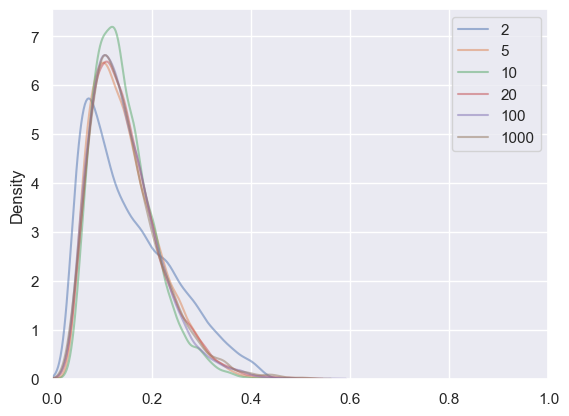

In [432]:
from scipy import stats

N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
plt.xlim(0,1)

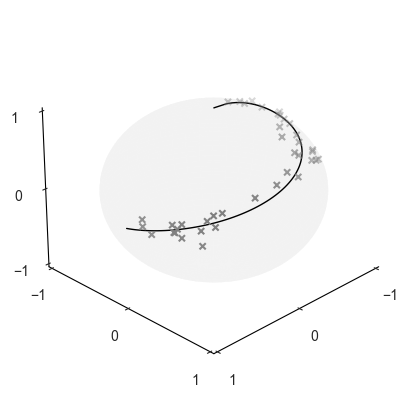

In [35]:
%matplotlib inline

import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyfrechet.metric_spaces import *

import seaborn as sns
# sns.set_style("whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def m(z):
    dz = np.sqrt(1 - z**2)
    pz = np.pi * z
    y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
    return y


def plot_some_data(N, ax):
    M = Sphere(2)
    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)
    mx = m(np.random.rand(N))
    y = 1.04*np.array([ add_noise(mx[i,:], 0.1) for i in range(N)])
    ax.scatter(y[:,0], y[:,1], y[:,2], depthshade=True, color='grey', marker='x')

# Make data for the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere
ax.plot_surface(x, y, z, edgecolor='none', color=(0.95,0.95,0.95), alpha=0.75, shade=False)

# make a dataset
P = 1.04*m(np.linspace(0,1,100))
# ax.scatter(P[:,0], P[:,1], P[:,2], depthshade=True, color='black', s=10)
ax.plot(P[:,0], P[:,1], P[:,2], color='black', linewidth=1)

plot_some_data(40, ax)

ax.view_init(27, 45)

ax.margins(x=0,y=0, tight=True)
ax.set_facecolor('white')

# Set color of pane edges to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# Set color of the grid lines
ax.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)); ax.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)); ax.w_zaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
ax.set_xticks([-1, 0, 1]); ax.set_yticks([-1, 0, 1]); ax.set_zticks([-1, 0, 1])
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)
ax.grid(False)

plt.savefig('./plots/sample_sphere.pdf')

In [37]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
from scipy import stats
from benchmark import bench
from pyfrechet.metric_spaces import *

OUT_FILE = 'results/result_sphere_cross_est_new_dgp_75.json'

def gen_data(N, p, alpha, beta, eps=0.1):
    M = Sphere(2)

    def m(x):
        eta = 2 * (x - 0.5).dot(beta) / np.sqrt(p) + alpha
        z = stats.logistic.cdf(eta)
        dz = np.sqrt(1 - z**2)
        pz = np.pi * z
        y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
        return y

    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)

    x = np.random.rand(N*p).reshape((N,p))
    mx = m(x)
    y = np.array([ add_noise(mx[i,:], eps) for i in range(N)])
    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[2, 5, 10, 20],
    Ns=[50,100,200,400],
    replicas=75
)

[2023-06-16 15:01:59.219360] Progress: N=50	p=2	i=0
[2023-06-16 15:01:59.229653] Distances for cart_2means
[2023-06-16 15:01:59.229674] dt = 0
[2023-06-16 15:01:59.229679] Fitting for cart_2means
[2023-06-16 15:01:59.267257] dt = 0.037603139877319336
[2023-06-16 15:01:59.267277] MSE for cart_2means
[2023-06-16 15:01:59.279251] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    2.6s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:01.832524] dt = 2.5532538890838623
[2023-06-16 15:02:01.832653] Fitting for medoid_greedy
[2023-06-16 15:02:01.840132] dt = 0.007600069046020508
[2023-06-16 15:02:01.840167] MSE for medoid_greedy
[2023-06-16 15:02:01.853380] Progress: N=50	p=2	i=1
[2023-06-16 15:02:01.859514] Distances for cart_2means
[2023-06-16 15:02:01.859535] dt = 0
[2023-06-16 15:02:01.859539] Fitting for cart_2means
[2023-06-16 15:02:01.973257] dt = 0.1137399673461914
[2023-06-16 15:02:01.973295] MSE for cart_2means
[2023-06-16 15:02:01.986269] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:02.128920] dt = 0.1426401138305664
[2023-06-16 15:02:02.128963] Fitting for medoid_greedy
[2023-06-16 15:02:02.134966] dt = 0.006057024002075195
[2023-06-16 15:02:02.134976] MSE for medoid_greedy
[2023-06-16 15:02:02.146999] Progress: N=50	p=2	i=2
[2023-06-16 15:02:02.152380] Distances for cart_2means
[2023-06-16 15:02:02.152389] dt = 0
[2023-06-16 15:02:02.152392] Fitting for cart_2means
[2023-06-16 15:02:02.176372] dt = 0.023992061614990234
[2023-06-16 15:02:02.176393] MSE for cart_2means
[2023-06-16 15:02:02.188271] Distances for medoid_greedy
[2023-06-16 15:02:02.254435] dt = 0.06615400314331055
[2023-06-16 15:02:02.254449] Fitting for medoid_greedy
[2023-06-16 15:02:02.260241] dt = 0.00581669807434082
[2023-06-16 15:02:02.260249] MSE for medoid_greedy
[2023-06-16 15:02:02.272349] Progress: N=50	p=2	i=3
[2023-06-16 15:02:02.277731] Distances for cart_2means
[2023-06-16 15:02:02.277737] dt = 0
[2023-06-16 15:02:02.277740] Fitting for cart_2means
[2023-06-16 15:02:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:02.379863] dt = 0.06692099571228027
[2023-06-16 15:02:02.379885] Fitting for medoid_greedy
[2023-06-16 15:02:02.385644] dt = 0.005789756774902344
[2023-06-16 15:02:02.385652] MSE for medoid_greedy
[2023-06-16 15:02:02.397463] Progress: N=50	p=2	i=4
[2023-06-16 15:02:02.402759] Distances for cart_2means
[2023-06-16 15:02:02.402765] dt = 0
[2023-06-16 15:02:02.402768] Fitting for cart_2means
[2023-06-16 15:02:02.425612] dt = 0.022852182388305664
[2023-06-16 15:02:02.425631] MSE for cart_2means
[2023-06-16 15:02:02.437249] Distances for medoid_greedy
[2023-06-16 15:02:02.503157] dt = 0.06589889526367188
[2023-06-16 15:02:02.503169] Fitting for medoid_greedy
[2023-06-16 15:02:02.508925] dt = 0.005777120590209961
[2023-06-16 15:02:02.508932] MSE for medoid_greedy
[2023-06-16 15:02:02.520589] Progress: N=50	p=2	i=5
[2023-06-16 15:02:02.526023] Distances for cart_2means
[2023-06-16 15:02:02.526031] dt = 0
[2023-06-16 15:02:02.526035] Fitting for cart_2means
[2023-06-16 15:02

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:02.629756] dt = 0.06751680374145508
[2023-06-16 15:02:02.629778] Fitting for medoid_greedy
[2023-06-16 15:02:02.635671] dt = 0.005925178527832031
[2023-06-16 15:02:02.635681] MSE for medoid_greedy
[2023-06-16 15:02:02.647727] Progress: N=50	p=2	i=6
[2023-06-16 15:02:02.653126] Distances for cart_2means
[2023-06-16 15:02:02.653134] dt = 0
[2023-06-16 15:02:02.653137] Fitting for cart_2means
[2023-06-16 15:02:02.675594] dt = 0.02246689796447754
[2023-06-16 15:02:02.675613] MSE for cart_2means
[2023-06-16 15:02:02.687188] Distances for medoid_greedy
[2023-06-16 15:02:02.751940] dt = 0.0647430419921875
[2023-06-16 15:02:02.751954] Fitting for medoid_greedy
[2023-06-16 15:02:02.758821] dt = 0.006890058517456055
[2023-06-16 15:02:02.758829] MSE for medoid_greedy
[2023-06-16 15:02:02.770689] Progress: N=50	p=2	i=7
[2023-06-16 15:02:02.775931] Distances for cart_2means
[2023-06-16 15:02:02.775937] dt = 0
[2023-06-16 15:02:02.775940] Fitting for cart_2means
[2023-06-16 15:02:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:02.879915] dt = 0.06759786605834961
[2023-06-16 15:02:02.879939] Fitting for medoid_greedy
[2023-06-16 15:02:02.885978] dt = 0.0060732364654541016
[2023-06-16 15:02:02.886003] MSE for medoid_greedy
[2023-06-16 15:02:02.898202] Progress: N=50	p=2	i=8
[2023-06-16 15:02:02.903628] Distances for cart_2means
[2023-06-16 15:02:02.903637] dt = 0
[2023-06-16 15:02:02.903641] Fitting for cart_2means
[2023-06-16 15:02:02.926833] dt = 0.023202896118164062
[2023-06-16 15:02:02.926852] MSE for cart_2means
[2023-06-16 15:02:02.938498] Distances for medoid_greedy
[2023-06-16 15:02:03.003199] dt = 0.06468510627746582
[2023-06-16 15:02:03.003212] Fitting for medoid_greedy
[2023-06-16 15:02:03.009199] dt = 0.006016969680786133
[2023-06-16 15:02:03.009207] MSE for medoid_greedy
[2023-06-16 15:02:03.021060] Progress: N=50	p=2	i=9
[2023-06-16 15:02:03.026312] Distances for cart_2means
[2023-06-16 15:02:03.026318] dt = 0
[2023-06-16 15:02:03.026321] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:03.128312] dt = 0.06773900985717773
[2023-06-16 15:02:03.128337] Fitting for medoid_greedy
[2023-06-16 15:02:03.134259] dt = 0.005958080291748047
[2023-06-16 15:02:03.134267] MSE for medoid_greedy
[2023-06-16 15:02:03.146450] Progress: N=50	p=2	i=10
[2023-06-16 15:02:03.151701] Distances for cart_2means
[2023-06-16 15:02:03.151707] dt = 0
[2023-06-16 15:02:03.151711] Fitting for cart_2means
[2023-06-16 15:02:03.174795] dt = 0.023092985153198242
[2023-06-16 15:02:03.174814] MSE for cart_2means
[2023-06-16 15:02:03.186121] Distances for medoid_greedy
[2023-06-16 15:02:03.250910] dt = 0.06477904319763184
[2023-06-16 15:02:03.250924] Fitting for medoid_greedy
[2023-06-16 15:02:03.256490] dt = 0.005589008331298828
[2023-06-16 15:02:03.256500] MSE for medoid_greedy
[2023-06-16 15:02:03.268731] Progress: N=50	p=2	i=11
[2023-06-16 15:02:03.273939] Distances for cart_2means
[2023-06-16 15:02:03.273945] dt = 0
[2023-06-16 15:02:03.273948] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:03.380036] dt = 0.06727790832519531
[2023-06-16 15:02:03.380062] Fitting for medoid_greedy
[2023-06-16 15:02:03.385733] dt = 0.005707263946533203
[2023-06-16 15:02:03.385743] MSE for medoid_greedy
[2023-06-16 15:02:03.398084] Progress: N=50	p=2	i=12
[2023-06-16 15:02:03.403538] Distances for cart_2means
[2023-06-16 15:02:03.403552] dt = 0
[2023-06-16 15:02:03.403555] Fitting for cart_2means
[2023-06-16 15:02:03.425798] dt = 0.022259235382080078
[2023-06-16 15:02:03.425817] MSE for cart_2means
[2023-06-16 15:02:03.437442] Distances for medoid_greedy
[2023-06-16 15:02:03.502354] dt = 0.06490302085876465
[2023-06-16 15:02:03.502367] Fitting for medoid_greedy
[2023-06-16 15:02:03.508242] dt = 0.005895853042602539
[2023-06-16 15:02:03.508249] MSE for medoid_greedy
[2023-06-16 15:02:03.520382] Progress: N=50	p=2	i=13
[2023-06-16 15:02:03.525738] Distances for cart_2means
[2023-06-16 15:02:03.525744] dt = 0
[2023-06-16 15:02:03.525747] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:03.629576] dt = 0.06700587272644043
[2023-06-16 15:02:03.629599] Fitting for medoid_greedy
[2023-06-16 15:02:03.635390] dt = 0.005825996398925781
[2023-06-16 15:02:03.635400] MSE for medoid_greedy
[2023-06-16 15:02:03.647345] Progress: N=50	p=2	i=14
[2023-06-16 15:02:03.652667] Distances for cart_2means
[2023-06-16 15:02:03.652673] dt = 0
[2023-06-16 15:02:03.652676] Fitting for cart_2means
[2023-06-16 15:02:03.671771] dt = 0.019103050231933594
[2023-06-16 15:02:03.671791] MSE for cart_2means
[2023-06-16 15:02:03.684008] Distances for medoid_greedy
[2023-06-16 15:02:03.749391] dt = 0.06537389755249023
[2023-06-16 15:02:03.749404] Fitting for medoid_greedy
[2023-06-16 15:02:03.757338] dt = 0.007956266403198242
[2023-06-16 15:02:03.757348] MSE for medoid_greedy
[2023-06-16 15:02:03.768991] Progress: N=50	p=2	i=15
[2023-06-16 15:02:03.774342] Distances for cart_2means
[2023-06-16 15:02:03.774348] dt = 0
[2023-06-16 15:02:03.774351] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:03.874094] dt = 0.06799626350402832
[2023-06-16 15:02:03.874118] Fitting for medoid_greedy
[2023-06-16 15:02:03.880814] dt = 0.006727933883666992
[2023-06-16 15:02:03.880823] MSE for medoid_greedy
[2023-06-16 15:02:03.893029] Progress: N=50	p=2	i=16
[2023-06-16 15:02:03.898399] Distances for cart_2means
[2023-06-16 15:02:03.898405] dt = 0
[2023-06-16 15:02:03.898409] Fitting for cart_2means
[2023-06-16 15:02:03.926244] dt = 0.02784419059753418
[2023-06-16 15:02:03.926263] MSE for cart_2means
[2023-06-16 15:02:03.937853] Distances for medoid_greedy
[2023-06-16 15:02:04.002599] dt = 0.06473779678344727
[2023-06-16 15:02:04.002612] Fitting for medoid_greedy
[2023-06-16 15:02:04.008461] dt = 0.005870342254638672
[2023-06-16 15:02:04.008468] MSE for medoid_greedy
[2023-06-16 15:02:04.020658] Progress: N=50	p=2	i=17
[2023-06-16 15:02:04.025957] Distances for cart_2means
[2023-06-16 15:02:04.025969] dt = 0
[2023-06-16 15:02:04.025973] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:04.143651] dt = 0.08382415771484375
[2023-06-16 15:02:04.143671] Fitting for medoid_greedy
[2023-06-16 15:02:04.149630] dt = 0.005997657775878906
[2023-06-16 15:02:04.149640] MSE for medoid_greedy
[2023-06-16 15:02:04.161791] Progress: N=50	p=2	i=18
[2023-06-16 15:02:04.167130] Distances for cart_2means
[2023-06-16 15:02:04.167137] dt = 0
[2023-06-16 15:02:04.167141] Fitting for cart_2means
[2023-06-16 15:02:04.186054] dt = 0.018922090530395508
[2023-06-16 15:02:04.186072] MSE for cart_2means
[2023-06-16 15:02:04.197694] Distances for medoid_greedy
[2023-06-16 15:02:04.262413] dt = 0.0647130012512207
[2023-06-16 15:02:04.262427] Fitting for medoid_greedy
[2023-06-16 15:02:04.268472] dt = 0.006066083908081055
[2023-06-16 15:02:04.268480] MSE for medoid_greedy
[2023-06-16 15:02:04.280397] Progress: N=50	p=2	i=19
[2023-06-16 15:02:04.285703] Distances for cart_2means
[2023-06-16 15:02:04.285709] dt = 0
[2023-06-16 15:02:04.285712] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:04.390683] dt = 0.06783938407897949
[2023-06-16 15:02:04.390711] Fitting for medoid_greedy
[2023-06-16 15:02:04.396337] dt = 0.005671501159667969
[2023-06-16 15:02:04.396348] MSE for medoid_greedy
[2023-06-16 15:02:04.408571] Progress: N=50	p=2	i=20
[2023-06-16 15:02:04.413833] Distances for cart_2means
[2023-06-16 15:02:04.413839] dt = 0
[2023-06-16 15:02:04.413842] Fitting for cart_2means
[2023-06-16 15:02:04.442273] dt = 0.028439044952392578
[2023-06-16 15:02:04.442292] MSE for cart_2means
[2023-06-16 15:02:04.453966] Distances for medoid_greedy
[2023-06-16 15:02:04.518845] dt = 0.06486988067626953
[2023-06-16 15:02:04.518859] Fitting for medoid_greedy
[2023-06-16 15:02:04.524759] dt = 0.005924224853515625
[2023-06-16 15:02:04.524767] MSE for medoid_greedy
[2023-06-16 15:02:04.536792] Progress: N=50	p=2	i=21
[2023-06-16 15:02:04.541970] Distances for cart_2means
[2023-06-16 15:02:04.541976] dt = 0
[2023-06-16 15:02:04.541978] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:04.647918] dt = 0.07908201217651367
[2023-06-16 15:02:04.648020] Fitting for medoid_greedy
[2023-06-16 15:02:04.656164] dt = 0.008253812789916992
[2023-06-16 15:02:04.656192] MSE for medoid_greedy
[2023-06-16 15:02:04.671972] Progress: N=50	p=2	i=22
[2023-06-16 15:02:04.677157] Distances for cart_2means
[2023-06-16 15:02:04.677163] dt = 0
[2023-06-16 15:02:04.677166] Fitting for cart_2means
[2023-06-16 15:02:04.699309] dt = 0.022151708602905273
[2023-06-16 15:02:04.699328] MSE for cart_2means
[2023-06-16 15:02:04.710824] Distances for medoid_greedy
[2023-06-16 15:02:04.777757] dt = 0.06692099571228027
[2023-06-16 15:02:04.777771] Fitting for medoid_greedy
[2023-06-16 15:02:04.783807] dt = 0.00606083869934082
[2023-06-16 15:02:04.783826] MSE for medoid_greedy
[2023-06-16 15:02:04.796343] Progress: N=50	p=2	i=23
[2023-06-16 15:02:04.804298] Distances for cart_2means
[2023-06-16 15:02:04.804337] dt = 0
[2023-06-16 15:02:04.804347] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:04.921839] dt = 0.0691828727722168
[2023-06-16 15:02:04.921913] Fitting for medoid_greedy
[2023-06-16 15:02:04.928002] dt = 0.00617218017578125
[2023-06-16 15:02:04.928012] MSE for medoid_greedy
[2023-06-16 15:02:04.940059] Progress: N=50	p=2	i=24
[2023-06-16 15:02:04.945405] Distances for cart_2means
[2023-06-16 15:02:04.945412] dt = 0
[2023-06-16 15:02:04.945415] Fitting for cart_2means
[2023-06-16 15:02:04.968642] dt = 0.023235082626342773
[2023-06-16 15:02:04.968672] MSE for cart_2means
[2023-06-16 15:02:04.980926] Distances for medoid_greedy
[2023-06-16 15:02:05.055971] dt = 0.07502508163452148
[2023-06-16 15:02:05.055991] Fitting for medoid_greedy
[2023-06-16 15:02:05.063074] dt = 0.007121086120605469
[2023-06-16 15:02:05.063100] MSE for medoid_greedy
[2023-06-16 15:02:05.075918] Progress: N=50	p=2	i=25
[2023-06-16 15:02:05.081722] Distances for cart_2means
[2023-06-16 15:02:05.081744] dt = 0
[2023-06-16 15:02:05.081748] Fitting for cart_2means
[2023-06-16 15:02

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:05.204195] dt = 0.08055305480957031
[2023-06-16 15:02:05.204279] Fitting for medoid_greedy
[2023-06-16 15:02:05.210561] dt = 0.006384849548339844
[2023-06-16 15:02:05.210591] MSE for medoid_greedy
[2023-06-16 15:02:05.224500] Progress: N=50	p=2	i=26
[2023-06-16 15:02:05.230171] Distances for cart_2means
[2023-06-16 15:02:05.230190] dt = 0
[2023-06-16 15:02:05.230193] Fitting for cart_2means
[2023-06-16 15:02:05.257936] dt = 0.02776503562927246
[2023-06-16 15:02:05.257956] MSE for cart_2means
[2023-06-16 15:02:05.270502] Distances for medoid_greedy
[2023-06-16 15:02:05.349030] dt = 0.07850790023803711
[2023-06-16 15:02:05.349046] Fitting for medoid_greedy
[2023-06-16 15:02:05.354915] dt = 0.005903005599975586
[2023-06-16 15:02:05.354949] MSE for medoid_greedy
[2023-06-16 15:02:05.367851] Progress: N=50	p=2	i=27
[2023-06-16 15:02:05.373523] Distances for cart_2means
[2023-06-16 15:02:05.373541] dt = 0
[2023-06-16 15:02:05.373544] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:05.523640] dt = 0.10805606842041016
[2023-06-16 15:02:05.523690] Fitting for medoid_greedy
[2023-06-16 15:02:05.533291] dt = 0.009676694869995117
[2023-06-16 15:02:05.533317] MSE for medoid_greedy
[2023-06-16 15:02:05.547186] Progress: N=50	p=2	i=28
[2023-06-16 15:02:05.552619] Distances for cart_2means
[2023-06-16 15:02:05.552640] dt = 0
[2023-06-16 15:02:05.552644] Fitting for cart_2means
[2023-06-16 15:02:05.579991] dt = 0.027370929718017578
[2023-06-16 15:02:05.580011] MSE for cart_2means
[2023-06-16 15:02:05.591761] Distances for medoid_greedy
[2023-06-16 15:02:05.658598] dt = 0.06682324409484863
[2023-06-16 15:02:05.658612] Fitting for medoid_greedy
[2023-06-16 15:02:05.665038] dt = 0.006453990936279297
[2023-06-16 15:02:05.665045] MSE for medoid_greedy
[2023-06-16 15:02:05.677253] Progress: N=50	p=2	i=29
[2023-06-16 15:02:05.682576] Distances for cart_2means
[2023-06-16 15:02:05.682583] dt = 0
[2023-06-16 15:02:05.682586] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:05.782727] dt = 0.066436767578125
[2023-06-16 15:02:05.782751] Fitting for medoid_greedy
[2023-06-16 15:02:05.788505] dt = 0.005789279937744141
[2023-06-16 15:02:05.788521] MSE for medoid_greedy
[2023-06-16 15:02:05.801393] Progress: N=50	p=2	i=30
[2023-06-16 15:02:05.806757] Distances for cart_2means
[2023-06-16 15:02:05.806776] dt = 0
[2023-06-16 15:02:05.806779] Fitting for cart_2means
[2023-06-16 15:02:05.831832] dt = 0.02507495880126953
[2023-06-16 15:02:05.831850] MSE for cart_2means
[2023-06-16 15:02:05.843246] Distances for medoid_greedy
[2023-06-16 15:02:05.908009] dt = 0.06475186347961426
[2023-06-16 15:02:05.908022] Fitting for medoid_greedy
[2023-06-16 15:02:05.913500] dt = 0.005501985549926758
[2023-06-16 15:02:05.913508] MSE for medoid_greedy
[2023-06-16 15:02:05.925718] Progress: N=50	p=2	i=31
[2023-06-16 15:02:05.931044] Distances for cart_2means
[2023-06-16 15:02:05.931050] dt = 0
[2023-06-16 15:02:05.931053] Fitting for cart_2means
[2023-06-16 15:02:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:06.030194] dt = 0.06778526306152344
[2023-06-16 15:02:06.030220] Fitting for medoid_greedy
[2023-06-16 15:02:06.036307] dt = 0.0061266422271728516
[2023-06-16 15:02:06.036317] MSE for medoid_greedy
[2023-06-16 15:02:06.048870] Progress: N=50	p=2	i=32
[2023-06-16 15:02:06.054339] Distances for cart_2means
[2023-06-16 15:02:06.054352] dt = 0
[2023-06-16 15:02:06.054356] Fitting for cart_2means
[2023-06-16 15:02:06.074266] dt = 0.019927024841308594
[2023-06-16 15:02:06.074285] MSE for cart_2means
[2023-06-16 15:02:06.085559] Distances for medoid_greedy
[2023-06-16 15:02:06.150265] dt = 0.06469917297363281
[2023-06-16 15:02:06.150278] Fitting for medoid_greedy
[2023-06-16 15:02:06.156104] dt = 0.005844593048095703
[2023-06-16 15:02:06.156114] MSE for medoid_greedy
[2023-06-16 15:02:06.168950] Progress: N=50	p=2	i=33
[2023-06-16 15:02:06.174328] Distances for cart_2means
[2023-06-16 15:02:06.174346] dt = 0
[2023-06-16 15:02:06.174350] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:06.289102] dt = 0.07711291313171387
[2023-06-16 15:02:06.289132] Fitting for medoid_greedy
[2023-06-16 15:02:06.295918] dt = 0.006835222244262695
[2023-06-16 15:02:06.295949] MSE for medoid_greedy
[2023-06-16 15:02:06.308979] Progress: N=50	p=2	i=34
[2023-06-16 15:02:06.314540] Distances for cart_2means
[2023-06-16 15:02:06.314558] dt = 0
[2023-06-16 15:02:06.314561] Fitting for cart_2means
[2023-06-16 15:02:06.339087] dt = 0.024548053741455078
[2023-06-16 15:02:06.339108] MSE for cart_2means
[2023-06-16 15:02:06.350598] Distances for medoid_greedy
[2023-06-16 15:02:06.417634] dt = 0.06702804565429688
[2023-06-16 15:02:06.417648] Fitting for medoid_greedy
[2023-06-16 15:02:06.423254] dt = 0.005627155303955078
[2023-06-16 15:02:06.423265] MSE for medoid_greedy
[2023-06-16 15:02:06.435809] Progress: N=50	p=2	i=35
[2023-06-16 15:02:06.441504] Distances for cart_2means
[2023-06-16 15:02:06.441522] dt = 0
[2023-06-16 15:02:06.441526] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:06.568729] dt = 0.08263182640075684
[2023-06-16 15:02:06.568759] Fitting for medoid_greedy
[2023-06-16 15:02:06.576417] dt = 0.007714271545410156
[2023-06-16 15:02:06.576444] MSE for medoid_greedy
[2023-06-16 15:02:06.589433] Progress: N=50	p=2	i=36
[2023-06-16 15:02:06.595106] Distances for cart_2means
[2023-06-16 15:02:06.595130] dt = 0
[2023-06-16 15:02:06.595133] Fitting for cart_2means
[2023-06-16 15:02:06.625699] dt = 0.0305941104888916
[2023-06-16 15:02:06.625720] MSE for cart_2means
[2023-06-16 15:02:06.637923] Distances for medoid_greedy
[2023-06-16 15:02:06.719332] dt = 0.08137702941894531
[2023-06-16 15:02:06.719347] Fitting for medoid_greedy
[2023-06-16 15:02:06.725327] dt = 0.0060269832611083984
[2023-06-16 15:02:06.725352] MSE for medoid_greedy
[2023-06-16 15:02:06.738467] Progress: N=50	p=2	i=37
[2023-06-16 15:02:06.744241] Distances for cart_2means
[2023-06-16 15:02:06.744267] dt = 0
[2023-06-16 15:02:06.744271] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:06.846401] dt = 0.06862592697143555
[2023-06-16 15:02:06.846468] Fitting for medoid_greedy
[2023-06-16 15:02:06.852468] dt = 0.006084918975830078
[2023-06-16 15:02:06.852495] MSE for medoid_greedy
[2023-06-16 15:02:06.865007] Progress: N=50	p=2	i=38
[2023-06-16 15:02:06.870685] Distances for cart_2means
[2023-06-16 15:02:06.870703] dt = 0
[2023-06-16 15:02:06.870707] Fitting for cart_2means
[2023-06-16 15:02:06.897288] dt = 0.026602983474731445
[2023-06-16 15:02:06.897307] MSE for cart_2means
[2023-06-16 15:02:06.909972] Distances for medoid_greedy
[2023-06-16 15:02:06.980493] dt = 0.07050108909606934
[2023-06-16 15:02:06.980508] Fitting for medoid_greedy
[2023-06-16 15:02:06.986456] dt = 0.005981922149658203
[2023-06-16 15:02:06.986480] MSE for medoid_greedy
[2023-06-16 15:02:06.999700] Progress: N=50	p=2	i=39
[2023-06-16 15:02:07.005588] Distances for cart_2means
[2023-06-16 15:02:07.005648] dt = 0
[2023-06-16 15:02:07.005653] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:07.052233] dt = 0.04664778709411621
[2023-06-16 15:02:07.052333] MSE for cart_2means
[2023-06-16 15:02:07.067249] Distances for medoid_greedy
[2023-06-16 15:02:07.187281] dt = 0.12000727653503418
[2023-06-16 15:02:07.187330] Fitting for medoid_greedy
[2023-06-16 15:02:07.196055] dt = 0.00879669189453125
[2023-06-16 15:02:07.196087] MSE for medoid_greedy
[2023-06-16 15:02:07.210449] Progress: N=50	p=2	i=40
[2023-06-16 15:02:07.216437] Distances for cart_2means
[2023-06-16 15:02:07.216464] dt = 0
[2023-06-16 15:02:07.216468] Fitting for cart_2means
[2023-06-16 15:02:07.244097] dt = 0.02765798568725586
[2023-06-16 15:02:07.244178] MSE for cart_2means
[2023-06-16 15:02:07.257715] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:07.351564] dt = 0.0938260555267334
[2023-06-16 15:02:07.351642] Fitting for medoid_greedy
[2023-06-16 15:02:07.358658] dt = 0.007115840911865234
[2023-06-16 15:02:07.358689] MSE for medoid_greedy
[2023-06-16 15:02:07.372659] Progress: N=50	p=2	i=41
[2023-06-16 15:02:07.378914] Distances for cart_2means
[2023-06-16 15:02:07.378937] dt = 0
[2023-06-16 15:02:07.378941] Fitting for cart_2means
[2023-06-16 15:02:07.413175] dt = 0.03426003456115723
[2023-06-16 15:02:07.413245] MSE for cart_2means
[2023-06-16 15:02:07.425664] Distances for medoid_greedy
[2023-06-16 15:02:07.493364] dt = 0.06767892837524414
[2023-06-16 15:02:07.493379] Fitting for medoid_greedy
[2023-06-16 15:02:07.499309] dt = 0.005964994430541992
[2023-06-16 15:02:07.499334] MSE for medoid_greedy
[2023-06-16 15:02:07.512172] Progress: N=50	p=2	i=42
[2023-06-16 15:02:07.517875] Distances for cart_2means
[2023-06-16 15:02:07.517896] dt = 0
[2023-06-16 15:02:07.517900] Fitting for cart_2means
[2023-06-16 15:02

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:07.627387] dt = 0.0701751708984375
[2023-06-16 15:02:07.627412] Fitting for medoid_greedy
[2023-06-16 15:02:07.633710] dt = 0.0063419342041015625
[2023-06-16 15:02:07.633721] MSE for medoid_greedy
[2023-06-16 15:02:07.646403] Progress: N=50	p=2	i=43
[2023-06-16 15:02:07.651831] Distances for cart_2means
[2023-06-16 15:02:07.651851] dt = 0
[2023-06-16 15:02:07.651854] Fitting for cart_2means
[2023-06-16 15:02:07.677870] dt = 0.02603912353515625
[2023-06-16 15:02:07.677892] MSE for cart_2means
[2023-06-16 15:02:07.689467] Distances for medoid_greedy
[2023-06-16 15:02:07.755818] dt = 0.06633591651916504
[2023-06-16 15:02:07.755831] Fitting for medoid_greedy
[2023-06-16 15:02:07.761558] dt = 0.005753993988037109
[2023-06-16 15:02:07.761585] MSE for medoid_greedy
[2023-06-16 15:02:07.774154] Progress: N=50	p=2	i=44
[2023-06-16 15:02:07.779849] Distances for cart_2means
[2023-06-16 15:02:07.779868] dt = 0
[2023-06-16 15:02:07.779871] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:07.917226] dt = 0.0959479808807373
[2023-06-16 15:02:07.917249] Fitting for medoid_greedy
[2023-06-16 15:02:07.923501] dt = 0.0063381195068359375
[2023-06-16 15:02:07.923513] MSE for medoid_greedy
[2023-06-16 15:02:07.936182] Progress: N=50	p=2	i=45
[2023-06-16 15:02:07.941861] Distances for cart_2means
[2023-06-16 15:02:07.941885] dt = 0
[2023-06-16 15:02:07.941889] Fitting for cart_2means
[2023-06-16 15:02:07.969192] dt = 0.027330875396728516
[2023-06-16 15:02:07.969217] MSE for cart_2means
[2023-06-16 15:02:07.981426] Distances for medoid_greedy
[2023-06-16 15:02:08.059287] dt = 0.07784032821655273
[2023-06-16 15:02:08.059302] Fitting for medoid_greedy
[2023-06-16 15:02:08.065319] dt = 0.006051063537597656
[2023-06-16 15:02:08.065347] MSE for medoid_greedy
[2023-06-16 15:02:08.078275] Progress: N=50	p=2	i=46
[2023-06-16 15:02:08.084155] Distances for cart_2means
[2023-06-16 15:02:08.084178] dt = 0
[2023-06-16 15:02:08.084182] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:08.198583] dt = 0.07002902030944824
[2023-06-16 15:02:08.198646] Fitting for medoid_greedy
[2023-06-16 15:02:08.204380] dt = 0.005821943283081055
[2023-06-16 15:02:08.204398] MSE for medoid_greedy
[2023-06-16 15:02:08.216906] Progress: N=50	p=2	i=47
[2023-06-16 15:02:08.222325] Distances for cart_2means
[2023-06-16 15:02:08.222333] dt = 0
[2023-06-16 15:02:08.222336] Fitting for cart_2means
[2023-06-16 15:02:08.244596] dt = 0.02226996421813965
[2023-06-16 15:02:08.244615] MSE for cart_2means
[2023-06-16 15:02:08.256388] Distances for medoid_greedy
[2023-06-16 15:02:08.321241] dt = 0.06483602523803711
[2023-06-16 15:02:08.321255] Fitting for medoid_greedy
[2023-06-16 15:02:08.327896] dt = 0.006672859191894531
[2023-06-16 15:02:08.327903] MSE for medoid_greedy
[2023-06-16 15:02:08.341732] Progress: N=50	p=2	i=48
[2023-06-16 15:02:08.347154] Distances for cart_2means
[2023-06-16 15:02:08.347161] dt = 0
[2023-06-16 15:02:08.347164] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:08.454961] dt = 0.07108020782470703
[2023-06-16 15:02:08.455033] Fitting for medoid_greedy
[2023-06-16 15:02:08.461432] dt = 0.006488800048828125
[2023-06-16 15:02:08.461461] MSE for medoid_greedy
[2023-06-16 15:02:08.473707] Progress: N=50	p=2	i=49
[2023-06-16 15:02:08.479315] Distances for cart_2means
[2023-06-16 15:02:08.479333] dt = 0
[2023-06-16 15:02:08.479336] Fitting for cart_2means
[2023-06-16 15:02:08.507593] dt = 0.028278112411499023
[2023-06-16 15:02:08.507615] MSE for cart_2means
[2023-06-16 15:02:08.521358] Distances for medoid_greedy
[2023-06-16 15:02:08.600219] dt = 0.07883095741271973
[2023-06-16 15:02:08.600234] Fitting for medoid_greedy
[2023-06-16 15:02:08.607309] dt = 0.007118940353393555
[2023-06-16 15:02:08.607340] MSE for medoid_greedy
[2023-06-16 15:02:08.622007] Progress: N=50	p=2	i=50
[2023-06-16 15:02:08.628781] Distances for cart_2means
[2023-06-16 15:02:08.628809] dt = 0
[2023-06-16 15:02:08.628813] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:08.668424] Distances for medoid_greedy
[2023-06-16 15:02:08.757571] dt = 0.0889890193939209
[2023-06-16 15:02:08.757589] Fitting for medoid_greedy
[2023-06-16 15:02:08.764429] dt = 0.0070149898529052734
[2023-06-16 15:02:08.764460] MSE for medoid_greedy
[2023-06-16 15:02:08.779167] Progress: N=50	p=2	i=51
[2023-06-16 15:02:08.784936] Distances for cart_2means
[2023-06-16 15:02:08.784956] dt = 0
[2023-06-16 15:02:08.784959] Fitting for cart_2means
[2023-06-16 15:02:08.811594] dt = 0.026655912399291992
[2023-06-16 15:02:08.811639] MSE for cart_2means
[2023-06-16 15:02:08.826346] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:08.905793] dt = 0.0794219970703125
[2023-06-16 15:02:08.905863] Fitting for medoid_greedy
[2023-06-16 15:02:08.913032] dt = 0.0072629451751708984
[2023-06-16 15:02:08.913061] MSE for medoid_greedy
[2023-06-16 15:02:08.926671] Progress: N=50	p=2	i=52
[2023-06-16 15:02:08.932384] Distances for cart_2means
[2023-06-16 15:02:08.932404] dt = 0
[2023-06-16 15:02:08.932408] Fitting for cart_2means
[2023-06-16 15:02:08.970705] dt = 0.038320064544677734
[2023-06-16 15:02:08.970724] MSE for cart_2means
[2023-06-16 15:02:08.982861] Distances for medoid_greedy
[2023-06-16 15:02:09.049722] dt = 0.06685423851013184
[2023-06-16 15:02:09.049738] Fitting for medoid_greedy
[2023-06-16 15:02:09.055804] dt = 0.006086826324462891
[2023-06-16 15:02:09.055833] MSE for medoid_greedy
[2023-06-16 15:02:09.068166] Progress: N=50	p=2	i=53
[2023-06-16 15:02:09.073701] Distances for cart_2means
[2023-06-16 15:02:09.073718] dt = 0
[2023-06-16 15:02:09.073722] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:09.174225] dt = 0.06731772422790527
[2023-06-16 15:02:09.174292] Fitting for medoid_greedy
[2023-06-16 15:02:09.180105] dt = 0.005890369415283203
[2023-06-16 15:02:09.180114] MSE for medoid_greedy
[2023-06-16 15:02:09.192400] Progress: N=50	p=2	i=54
[2023-06-16 15:02:09.197651] Distances for cart_2means
[2023-06-16 15:02:09.197657] dt = 0
[2023-06-16 15:02:09.197659] Fitting for cart_2means
[2023-06-16 15:02:09.218679] dt = 0.02102804183959961
[2023-06-16 15:02:09.218697] MSE for cart_2means
[2023-06-16 15:02:09.230369] Distances for medoid_greedy
[2023-06-16 15:02:09.296877] dt = 0.06649899482727051
[2023-06-16 15:02:09.296890] Fitting for medoid_greedy
[2023-06-16 15:02:09.303086] dt = 0.0062181949615478516
[2023-06-16 15:02:09.303094] MSE for medoid_greedy
[2023-06-16 15:02:09.315583] Progress: N=50	p=2	i=55
[2023-06-16 15:02:09.321030] Distances for cart_2means
[2023-06-16 15:02:09.321039] dt = 0
[2023-06-16 15:02:09.321042] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:09.421320] dt = 0.0668938159942627
[2023-06-16 15:02:09.421398] Fitting for medoid_greedy
[2023-06-16 15:02:09.427686] dt = 0.006374359130859375
[2023-06-16 15:02:09.427700] MSE for medoid_greedy
[2023-06-16 15:02:09.440077] Progress: N=50	p=2	i=56
[2023-06-16 15:02:09.445383] Distances for cart_2means
[2023-06-16 15:02:09.445389] dt = 0
[2023-06-16 15:02:09.445392] Fitting for cart_2means
[2023-06-16 15:02:09.468904] dt = 0.023520946502685547
[2023-06-16 15:02:09.468925] MSE for cart_2means
[2023-06-16 15:02:09.480470] Distances for medoid_greedy
[2023-06-16 15:02:09.547362] dt = 0.06688427925109863
[2023-06-16 15:02:09.547376] Fitting for medoid_greedy
[2023-06-16 15:02:09.553231] dt = 0.00587773323059082
[2023-06-16 15:02:09.553239] MSE for medoid_greedy
[2023-06-16 15:02:09.565718] Progress: N=50	p=2	i=57
[2023-06-16 15:02:09.571074] Distances for cart_2means
[2023-06-16 15:02:09.571081] dt = 0
[2023-06-16 15:02:09.571084] Fitting for cart_2means
[2023-06-16 15:02

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:09.672221] dt = 0.0674598217010498
[2023-06-16 15:02:09.672298] Fitting for medoid_greedy
[2023-06-16 15:02:09.678627] dt = 0.006415128707885742
[2023-06-16 15:02:09.678641] MSE for medoid_greedy
[2023-06-16 15:02:09.690859] Progress: N=50	p=2	i=58
[2023-06-16 15:02:09.696246] Distances for cart_2means
[2023-06-16 15:02:09.696252] dt = 0
[2023-06-16 15:02:09.696255] Fitting for cart_2means
[2023-06-16 15:02:09.719937] dt = 0.023689985275268555
[2023-06-16 15:02:09.719956] MSE for cart_2means
[2023-06-16 15:02:09.731460] Distances for medoid_greedy
[2023-06-16 15:02:09.798627] dt = 0.06715989112854004
[2023-06-16 15:02:09.798641] Fitting for medoid_greedy
[2023-06-16 15:02:09.804186] dt = 0.005563974380493164
[2023-06-16 15:02:09.804201] MSE for medoid_greedy
[2023-06-16 15:02:09.816804] Progress: N=50	p=2	i=59
[2023-06-16 15:02:09.822162] Distances for cart_2means
[2023-06-16 15:02:09.822170] dt = 0
[2023-06-16 15:02:09.822173] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:09.924225] dt = 0.06709074974060059
[2023-06-16 15:02:09.924292] Fitting for medoid_greedy
[2023-06-16 15:02:09.930286] dt = 0.0060710906982421875
[2023-06-16 15:02:09.930295] MSE for medoid_greedy
[2023-06-16 15:02:09.942651] Progress: N=50	p=2	i=60
[2023-06-16 15:02:09.947968] Distances for cart_2means
[2023-06-16 15:02:09.947975] dt = 0
[2023-06-16 15:02:09.947977] Fitting for cart_2means
[2023-06-16 15:02:09.969578] dt = 0.02160787582397461
[2023-06-16 15:02:09.969595] MSE for cart_2means
[2023-06-16 15:02:09.981056] Distances for medoid_greedy
[2023-06-16 15:02:10.047939] dt = 0.06687426567077637
[2023-06-16 15:02:10.047953] Fitting for medoid_greedy
[2023-06-16 15:02:10.053649] dt = 0.00571751594543457
[2023-06-16 15:02:10.053657] MSE for medoid_greedy
[2023-06-16 15:02:10.066266] Progress: N=50	p=2	i=61
[2023-06-16 15:02:10.071620] Distances for cart_2means
[2023-06-16 15:02:10.071630] dt = 0
[2023-06-16 15:02:10.071633] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:10.168835] dt = 0.06684994697570801
[2023-06-16 15:02:10.168909] Fitting for medoid_greedy
[2023-06-16 15:02:10.174769] dt = 0.005941152572631836
[2023-06-16 15:02:10.174791] MSE for medoid_greedy
[2023-06-16 15:02:10.187365] Progress: N=50	p=2	i=62
[2023-06-16 15:02:10.192722] Distances for cart_2means
[2023-06-16 15:02:10.192729] dt = 0
[2023-06-16 15:02:10.192732] Fitting for cart_2means
[2023-06-16 15:02:10.211693] dt = 0.018969058990478516
[2023-06-16 15:02:10.211711] MSE for cart_2means
[2023-06-16 15:02:10.223188] Distances for medoid_greedy
[2023-06-16 15:02:10.290102] dt = 0.06690406799316406
[2023-06-16 15:02:10.290116] Fitting for medoid_greedy
[2023-06-16 15:02:10.295892] dt = 0.005800962448120117
[2023-06-16 15:02:10.295900] MSE for medoid_greedy
[2023-06-16 15:02:10.308366] Progress: N=50	p=2	i=63
[2023-06-16 15:02:10.313705] Distances for cart_2means
[2023-06-16 15:02:10.313711] dt = 0
[2023-06-16 15:02:10.313714] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:10.415322] dt = 0.06748509407043457
[2023-06-16 15:02:10.415383] Fitting for medoid_greedy
[2023-06-16 15:02:10.421189] dt = 0.005872964859008789
[2023-06-16 15:02:10.421205] MSE for medoid_greedy
[2023-06-16 15:02:10.433586] Progress: N=50	p=2	i=64
[2023-06-16 15:02:10.439116] Distances for cart_2means
[2023-06-16 15:02:10.439127] dt = 0
[2023-06-16 15:02:10.439130] Fitting for cart_2means
[2023-06-16 15:02:10.460595] dt = 0.021478891372680664
[2023-06-16 15:02:10.460613] MSE for cart_2means
[2023-06-16 15:02:10.472387] Distances for medoid_greedy
[2023-06-16 15:02:10.539586] dt = 0.06718778610229492
[2023-06-16 15:02:10.539601] Fitting for medoid_greedy
[2023-06-16 15:02:10.545352] dt = 0.005778074264526367
[2023-06-16 15:02:10.545359] MSE for medoid_greedy
[2023-06-16 15:02:10.557869] Progress: N=50	p=2	i=65
[2023-06-16 15:02:10.563058] Distances for cart_2means
[2023-06-16 15:02:10.563064] dt = 0
[2023-06-16 15:02:10.563067] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:10.660109] dt = 0.06690001487731934
[2023-06-16 15:02:10.660175] Fitting for medoid_greedy
[2023-06-16 15:02:10.666853] dt = 0.0067539215087890625
[2023-06-16 15:02:10.666862] MSE for medoid_greedy
[2023-06-16 15:02:10.679526] Progress: N=50	p=2	i=66
[2023-06-16 15:02:10.684908] Distances for cart_2means
[2023-06-16 15:02:10.684914] dt = 0
[2023-06-16 15:02:10.684917] Fitting for cart_2means
[2023-06-16 15:02:10.707237] dt = 0.02232813835144043
[2023-06-16 15:02:10.707256] MSE for cart_2means
[2023-06-16 15:02:10.718474] Distances for medoid_greedy
[2023-06-16 15:02:10.785479] dt = 0.06699728965759277
[2023-06-16 15:02:10.785493] Fitting for medoid_greedy
[2023-06-16 15:02:10.791399] dt = 0.005926847457885742
[2023-06-16 15:02:10.791419] MSE for medoid_greedy
[2023-06-16 15:02:10.804490] Progress: N=50	p=2	i=67
[2023-06-16 15:02:10.809767] Distances for cart_2means
[2023-06-16 15:02:10.809773] dt = 0
[2023-06-16 15:02:10.809776] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:10.913222] dt = 0.06682014465332031
[2023-06-16 15:02:10.913290] Fitting for medoid_greedy
[2023-06-16 15:02:10.919547] dt = 0.006340980529785156
[2023-06-16 15:02:10.919556] MSE for medoid_greedy
[2023-06-16 15:02:10.932062] Progress: N=50	p=2	i=68
[2023-06-16 15:02:10.937517] Distances for cart_2means
[2023-06-16 15:02:10.937525] dt = 0
[2023-06-16 15:02:10.937528] Fitting for cart_2means
[2023-06-16 15:02:10.960056] dt = 0.022537946701049805
[2023-06-16 15:02:10.960075] MSE for cart_2means
[2023-06-16 15:02:10.971377] Distances for medoid_greedy
[2023-06-16 15:02:11.049508] dt = 0.07812094688415527
[2023-06-16 15:02:11.049527] Fitting for medoid_greedy
[2023-06-16 15:02:11.055901] dt = 0.006400346755981445
[2023-06-16 15:02:11.055934] MSE for medoid_greedy
[2023-06-16 15:02:11.068944] Progress: N=50	p=2	i=69
[2023-06-16 15:02:11.074519] Distances for cart_2means
[2023-06-16 15:02:11.074538] dt = 0
[2023-06-16 15:02:11.074541] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:11.168918] dt = 0.06666278839111328
[2023-06-16 15:02:11.168978] Fitting for medoid_greedy
[2023-06-16 15:02:11.175055] dt = 0.006144523620605469
[2023-06-16 15:02:11.175078] MSE for medoid_greedy
[2023-06-16 15:02:11.187583] Progress: N=50	p=2	i=70
[2023-06-16 15:02:11.192864] Distances for cart_2means
[2023-06-16 15:02:11.192870] dt = 0
[2023-06-16 15:02:11.192873] Fitting for cart_2means
[2023-06-16 15:02:11.217787] dt = 0.024923086166381836
[2023-06-16 15:02:11.217804] MSE for cart_2means
[2023-06-16 15:02:11.229465] Distances for medoid_greedy
[2023-06-16 15:02:11.296117] dt = 0.06664180755615234
[2023-06-16 15:02:11.296131] Fitting for medoid_greedy
[2023-06-16 15:02:11.303629] dt = 0.0075223445892333984
[2023-06-16 15:02:11.303638] MSE for medoid_greedy
[2023-06-16 15:02:11.316065] Progress: N=50	p=2	i=71
[2023-06-16 15:02:11.321396] Distances for cart_2means
[2023-06-16 15:02:11.321404] dt = 0
[2023-06-16 15:02:11.321407] Fitting for cart_2means
[2023-06-16 15

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:11.421879] dt = 0.06644392013549805
[2023-06-16 15:02:11.421983] Fitting for medoid_greedy
[2023-06-16 15:02:11.427971] dt = 0.006102085113525391
[2023-06-16 15:02:11.427984] MSE for medoid_greedy
[2023-06-16 15:02:11.440302] Progress: N=50	p=2	i=72
[2023-06-16 15:02:11.445634] Distances for cart_2means
[2023-06-16 15:02:11.445640] dt = 0
[2023-06-16 15:02:11.445643] Fitting for cart_2means
[2023-06-16 15:02:11.464132] dt = 0.018496990203857422
[2023-06-16 15:02:11.464148] MSE for cart_2means
[2023-06-16 15:02:11.475568] Distances for medoid_greedy
[2023-06-16 15:02:11.542554] dt = 0.06697821617126465
[2023-06-16 15:02:11.542570] Fitting for medoid_greedy
[2023-06-16 15:02:11.548921] dt = 0.006374835968017578
[2023-06-16 15:02:11.548929] MSE for medoid_greedy
[2023-06-16 15:02:11.561596] Progress: N=50	p=2	i=73
[2023-06-16 15:02:11.567003] Distances for cart_2means
[2023-06-16 15:02:11.567009] dt = 0
[2023-06-16 15:02:11.567012] Fitting for cart_2means
[2023-06-16 15:

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:11.667927] dt = 0.0666649341583252
[2023-06-16 15:02:11.667988] Fitting for medoid_greedy
[2023-06-16 15:02:11.673874] dt = 0.00595402717590332
[2023-06-16 15:02:11.673894] MSE for medoid_greedy
[2023-06-16 15:02:11.686483] Progress: N=50	p=2	i=74
[2023-06-16 15:02:11.691908] Distances for cart_2means
[2023-06-16 15:02:11.691917] dt = 0
[2023-06-16 15:02:11.691920] Fitting for cart_2means
[2023-06-16 15:02:11.710616] dt = 0.018707990646362305
[2023-06-16 15:02:11.710635] MSE for cart_2means
[2023-06-16 15:02:11.722215] Distances for medoid_greedy
[2023-06-16 15:02:11.789646] dt = 0.06742286682128906
[2023-06-16 15:02:11.789661] Fitting for medoid_greedy
[2023-06-16 15:02:11.796462] dt = 0.0068242549896240234
[2023-06-16 15:02:11.796470] MSE for medoid_greedy
[2023-06-16 15:02:11.809024] Progress: N=50	p=5	i=0
[2023-06-16 15:02:11.814341] Distances for cart_2means
[2023-06-16 15:02:11.814347] dt = 0
[2023-06-16 15:02:11.814350] Fitting for cart_2means
[2023-06-16 15:02

[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:11.940649] dt = 0.06637001037597656
[2023-06-16 15:02:11.940715] Fitting for medoid_greedy
[2023-06-16 15:02:11.955559] dt = 0.01492619514465332
[2023-06-16 15:02:11.955579] MSE for medoid_greedy
[2023-06-16 15:02:11.967785] Progress: N=50	p=5	i=1
[2023-06-16 15:02:11.973084] Distances for cart_2means
[2023-06-16 15:02:11.973091] dt = 0
[2023-06-16 15:02:11.973094] Fitting for cart_2means
[2023-06-16 15:02:12.028850] dt = 0.055764198303222656
[2023-06-16 15:02:12.028869] MSE for cart_2means
[2023-06-16 15:02:12.040893] Distances for medoid_greedy
[2023-06-16 15:02:12.105488] dt = 0.06457805633544922
[2023-06-16 15:02:12.105502] Fitting for medoid_greedy
[2023-06-16 15:02:12.119494] dt = 0.014024019241333008
[2023-06-16 15:02:12.119506] MSE for medoid_greedy
[2023-06-16 15:02:12.132005] Progress: N=50	p=5	i=2
[2023-06-16 15:02:12.137356] Distances for cart_2means
[2023-06-16 15:02:12.137363] dt = 0
[2023-06-16 15:02:12.137366] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:12.203565] dt = 0.0662078857421875
[2023-06-16 15:02:12.203652] MSE for cart_2means
[2023-06-16 15:02:12.215421] Distances for medoid_greedy
[2023-06-16 15:02:12.282470] dt = 0.06703901290893555
[2023-06-16 15:02:12.282484] Fitting for medoid_greedy
[2023-06-16 15:02:12.296921] dt = 0.014460086822509766
[2023-06-16 15:02:12.296944] MSE for medoid_greedy
[2023-06-16 15:02:12.309477] Progress: N=50	p=5	i=3
[2023-06-16 15:02:12.314790] Distances for cart_2means
[2023-06-16 15:02:12.314797] dt = 0
[2023-06-16 15:02:12.314800] Fitting for cart_2means
[2023-06-16 15:02:12.375167] dt = 0.060375213623046875
[2023-06-16 15:02:12.375186] MSE for cart_2means
[2023-06-16 15:02:12.386869] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:12.453796] dt = 0.06691598892211914
[2023-06-16 15:02:12.453860] Fitting for medoid_greedy
[2023-06-16 15:02:12.467631] dt = 0.013844013214111328
[2023-06-16 15:02:12.467649] MSE for medoid_greedy
[2023-06-16 15:02:12.481376] Progress: N=50	p=5	i=4
[2023-06-16 15:02:12.487246] Distances for cart_2means
[2023-06-16 15:02:12.487256] dt = 0
[2023-06-16 15:02:12.487259] Fitting for cart_2means
[2023-06-16 15:02:12.545484] dt = 0.05823683738708496
[2023-06-16 15:02:12.545504] MSE for cart_2means
[2023-06-16 15:02:12.557092] Distances for medoid_greedy
[2023-06-16 15:02:12.622118] dt = 0.06500911712646484
[2023-06-16 15:02:12.622132] Fitting for medoid_greedy
[2023-06-16 15:02:12.636084] dt = 0.013982772827148438
[2023-06-16 15:02:12.636094] MSE for medoid_greedy
[2023-06-16 15:02:12.648608] Progress: N=50	p=5	i=5
[2023-06-16 15:02:12.653918] Distances for cart_2means
[2023-06-16 15:02:12.653925] dt = 0
[2023-06-16 15:02:12.653928] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:12.717663] dt = 0.06374406814575195
[2023-06-16 15:02:12.717745] MSE for cart_2means
[2023-06-16 15:02:12.730611] Distances for medoid_greedy
[2023-06-16 15:02:12.797065] dt = 0.06644296646118164
[2023-06-16 15:02:12.797079] Fitting for medoid_greedy
[2023-06-16 15:02:12.810883] dt = 0.013829231262207031
[2023-06-16 15:02:12.810905] MSE for medoid_greedy
[2023-06-16 15:02:12.824272] Progress: N=50	p=5	i=6
[2023-06-16 15:02:12.829501] Distances for cart_2means
[2023-06-16 15:02:12.829507] dt = 0
[2023-06-16 15:02:12.829510] Fitting for cart_2means
[2023-06-16 15:02:12.887238] dt = 0.05773615837097168
[2023-06-16 15:02:12.887260] MSE for cart_2means
[2023-06-16 15:02:12.898753] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:12.965498] dt = 0.06672906875610352
[2023-06-16 15:02:12.965558] Fitting for medoid_greedy
[2023-06-16 15:02:12.980366] dt = 0.014882087707519531
[2023-06-16 15:02:12.980389] MSE for medoid_greedy
[2023-06-16 15:02:12.992854] Progress: N=50	p=5	i=7
[2023-06-16 15:02:12.998198] Distances for cart_2means
[2023-06-16 15:02:12.998204] dt = 0
[2023-06-16 15:02:12.998207] Fitting for cart_2means
[2023-06-16 15:02:13.058436] dt = 0.060237884521484375
[2023-06-16 15:02:13.058457] MSE for cart_2means
[2023-06-16 15:02:13.070100] Distances for medoid_greedy
[2023-06-16 15:02:13.135214] dt = 0.06510424613952637
[2023-06-16 15:02:13.135227] Fitting for medoid_greedy
[2023-06-16 15:02:13.151636] dt = 0.01643085479736328
[2023-06-16 15:02:13.151654] MSE for medoid_greedy
[2023-06-16 15:02:13.164248] Progress: N=50	p=5	i=8
[2023-06-16 15:02:13.169907] Distances for cart_2means
[2023-06-16 15:02:13.169915] dt = 0
[2023-06-16 15:02:13.169918] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:13.257910] dt = 0.08800315856933594
[2023-06-16 15:02:13.257983] MSE for cart_2means
[2023-06-16 15:02:13.270516] Distances for medoid_greedy
[2023-06-16 15:02:13.339251] dt = 0.06872701644897461
[2023-06-16 15:02:13.339266] Fitting for medoid_greedy
[2023-06-16 15:02:13.352946] dt = 0.013702869415283203
[2023-06-16 15:02:13.352954] MSE for medoid_greedy
[2023-06-16 15:02:13.365586] Progress: N=50	p=5	i=9
[2023-06-16 15:02:13.370859] Distances for cart_2means
[2023-06-16 15:02:13.370866] dt = 0
[2023-06-16 15:02:13.370869] Fitting for cart_2means
[2023-06-16 15:02:13.424071] dt = 0.05321192741394043
[2023-06-16 15:02:13.424090] MSE for cart_2means
[2023-06-16 15:02:13.435679] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:13.501690] dt = 0.06600403785705566
[2023-06-16 15:02:13.501761] Fitting for medoid_greedy
[2023-06-16 15:02:13.516221] dt = 0.014536857604980469
[2023-06-16 15:02:13.516247] MSE for medoid_greedy
[2023-06-16 15:02:13.528854] Progress: N=50	p=5	i=10
[2023-06-16 15:02:13.534176] Distances for cart_2means
[2023-06-16 15:02:13.534181] dt = 0
[2023-06-16 15:02:13.534184] Fitting for cart_2means
[2023-06-16 15:02:13.601210] dt = 0.06703305244445801
[2023-06-16 15:02:13.601231] MSE for cart_2means
[2023-06-16 15:02:13.613018] Distances for medoid_greedy
[2023-06-16 15:02:13.678301] dt = 0.06526994705200195
[2023-06-16 15:02:13.678315] Fitting for medoid_greedy
[2023-06-16 15:02:13.692334] dt = 0.014045000076293945
[2023-06-16 15:02:13.692345] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:13.705348] Progress: N=50	p=5	i=11
[2023-06-16 15:02:13.711329] Distances for cart_2means
[2023-06-16 15:02:13.711338] dt = 0
[2023-06-16 15:02:13.711341] Fitting for cart_2means
[2023-06-16 15:02:13.769036] dt = 0.057704925537109375
[2023-06-16 15:02:13.769058] MSE for cart_2means
[2023-06-16 15:02:13.780668] Distances for medoid_greedy
[2023-06-16 15:02:13.847075] dt = 0.06639623641967773
[2023-06-16 15:02:13.847089] Fitting for medoid_greedy
[2023-06-16 15:02:13.862338] dt = 0.0152740478515625
[2023-06-16 15:02:13.862355] MSE for medoid_greedy
[2023-06-16 15:02:13.875152] Progress: N=50	p=5	i=12
[2023-06-16 15:02:13.880395] Distances for cart_2means
[2023-06-16 15:02:13.880401] dt = 0
[2023-06-16 15:02:13.880404] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:13.936861] dt = 0.05646491050720215
[2023-06-16 15:02:13.936951] MSE for cart_2means
[2023-06-16 15:02:13.948786] Distances for medoid_greedy
[2023-06-16 15:02:14.014102] dt = 0.06529688835144043
[2023-06-16 15:02:14.014117] Fitting for medoid_greedy
[2023-06-16 15:02:14.027287] dt = 0.013204336166381836
[2023-06-16 15:02:14.027300] MSE for medoid_greedy
[2023-06-16 15:02:14.039931] Progress: N=50	p=5	i=13
[2023-06-16 15:02:14.045240] Distances for cart_2means
[2023-06-16 15:02:14.045246] dt = 0
[2023-06-16 15:02:14.045249] Fitting for cart_2means
[2023-06-16 15:02:14.113368] dt = 0.06812596321105957
[2023-06-16 15:02:14.113387] MSE for cart_2means
[2023-06-16 15:02:14.124949] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:14.192226] dt = 0.06726694107055664
[2023-06-16 15:02:14.192292] Fitting for medoid_greedy
[2023-06-16 15:02:14.207982] dt = 0.01576519012451172
[2023-06-16 15:02:14.207997] MSE for medoid_greedy
[2023-06-16 15:02:14.220806] Progress: N=50	p=5	i=14
[2023-06-16 15:02:14.226056] Distances for cart_2means
[2023-06-16 15:02:14.226062] dt = 0
[2023-06-16 15:02:14.226065] Fitting for cart_2means
[2023-06-16 15:02:14.282078] dt = 0.05602097511291504
[2023-06-16 15:02:14.282099] MSE for cart_2means
[2023-06-16 15:02:14.293540] Distances for medoid_greedy
[2023-06-16 15:02:14.359370] dt = 0.06581783294677734
[2023-06-16 15:02:14.359384] Fitting for medoid_greedy
[2023-06-16 15:02:14.372967] dt = 0.013607263565063477
[2023-06-16 15:02:14.372992] MSE for medoid_greedy
[2023-06-16 15:02:14.385405] Progress: N=50	p=5	i=15
[2023-06-16 15:02:14.390690] Distances for cart_2means
[2023-06-16 15:02:14.390698] dt = 0
[2023-06-16 15:02:14.390701] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:14.494064] dt = 0.10337400436401367
[2023-06-16 15:02:14.494145] MSE for cart_2means
[2023-06-16 15:02:14.506966] Distances for medoid_greedy
[2023-06-16 15:02:14.572335] dt = 0.06535911560058594
[2023-06-16 15:02:14.572349] Fitting for medoid_greedy
[2023-06-16 15:02:14.589986] dt = 0.017658710479736328
[2023-06-16 15:02:14.590015] MSE for medoid_greedy
[2023-06-16 15:02:14.602777] Progress: N=50	p=5	i=16
[2023-06-16 15:02:14.608303] Distances for cart_2means
[2023-06-16 15:02:14.608319] dt = 0
[2023-06-16 15:02:14.608322] Fitting for cart_2means
[2023-06-16 15:02:14.661554] dt = 0.053251028060913086
[2023-06-16 15:02:14.661573] MSE for cart_2means
[2023-06-16 15:02:14.673166] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:14.739571] dt = 0.06639504432678223
[2023-06-16 15:02:14.739651] Fitting for medoid_greedy
[2023-06-16 15:02:14.757166] dt = 0.017602920532226562
[2023-06-16 15:02:14.757191] MSE for medoid_greedy
[2023-06-16 15:02:14.769587] Progress: N=50	p=5	i=17
[2023-06-16 15:02:14.775062] Distances for cart_2means
[2023-06-16 15:02:14.775070] dt = 0
[2023-06-16 15:02:14.775073] Fitting for cart_2means
[2023-06-16 15:02:14.832850] dt = 0.05778694152832031
[2023-06-16 15:02:14.832870] MSE for cart_2means
[2023-06-16 15:02:14.844456] Distances for medoid_greedy
[2023-06-16 15:02:14.909770] dt = 0.06530213356018066
[2023-06-16 15:02:14.909783] Fitting for medoid_greedy
[2023-06-16 15:02:14.923840] dt = 0.014081954956054688
[2023-06-16 15:02:14.923858] MSE for medoid_greedy
[2023-06-16 15:02:14.936920] Progress: N=50	p=5	i=18


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:14.942508] Distances for cart_2means
[2023-06-16 15:02:14.942627] dt = 0
[2023-06-16 15:02:14.942632] Fitting for cart_2means
[2023-06-16 15:02:14.991420] dt = 0.04890799522399902
[2023-06-16 15:02:14.991464] MSE for cart_2means
[2023-06-16 15:02:15.003782] Distances for medoid_greedy
[2023-06-16 15:02:15.069462] dt = 0.06566405296325684
[2023-06-16 15:02:15.069480] Fitting for medoid_greedy
[2023-06-16 15:02:15.084597] dt = 0.01514887809753418
[2023-06-16 15:02:15.084621] MSE for medoid_greedy
[2023-06-16 15:02:15.097145] Progress: N=50	p=5	i=19
[2023-06-16 15:02:15.102415] Distances for cart_2means
[2023-06-16 15:02:15.102421] dt = 0
[2023-06-16 15:02:15.102424] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:15.175982] dt = 0.07356595993041992
[2023-06-16 15:02:15.176055] MSE for cart_2means
[2023-06-16 15:02:15.191129] Distances for medoid_greedy
[2023-06-16 15:02:15.257372] dt = 0.06622910499572754
[2023-06-16 15:02:15.257386] Fitting for medoid_greedy
[2023-06-16 15:02:15.274076] dt = 0.01671886444091797
[2023-06-16 15:02:15.274088] MSE for medoid_greedy
[2023-06-16 15:02:15.293183] Progress: N=50	p=5	i=20
[2023-06-16 15:02:15.298635] Distances for cart_2means
[2023-06-16 15:02:15.298642] dt = 0
[2023-06-16 15:02:15.298645] Fitting for cart_2means
[2023-06-16 15:02:15.353462] dt = 0.0548250675201416
[2023-06-16 15:02:15.353481] MSE for cart_2means
[2023-06-16 15:02:15.365339] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:15.431951] dt = 0.0666041374206543
[2023-06-16 15:02:15.432013] Fitting for medoid_greedy
[2023-06-16 15:02:15.445790] dt = 0.013845682144165039
[2023-06-16 15:02:15.445811] MSE for medoid_greedy
[2023-06-16 15:02:15.458454] Progress: N=50	p=5	i=21
[2023-06-16 15:02:15.463803] Distances for cart_2means
[2023-06-16 15:02:15.463811] dt = 0
[2023-06-16 15:02:15.463814] Fitting for cart_2means
[2023-06-16 15:02:15.528275] dt = 0.06447100639343262
[2023-06-16 15:02:15.528294] MSE for cart_2means
[2023-06-16 15:02:15.539864] Distances for medoid_greedy
[2023-06-16 15:02:15.606986] dt = 0.06710982322692871
[2023-06-16 15:02:15.607000] Fitting for medoid_greedy
[2023-06-16 15:02:15.622139] dt = 0.015163183212280273
[2023-06-16 15:02:15.622165] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:15.634667] Progress: N=50	p=5	i=22
[2023-06-16 15:02:15.640488] Distances for cart_2means
[2023-06-16 15:02:15.640505] dt = 0
[2023-06-16 15:02:15.640509] Fitting for cart_2means
[2023-06-16 15:02:15.703612] dt = 0.06312203407287598
[2023-06-16 15:02:15.703653] MSE for cart_2means
[2023-06-16 15:02:15.715944] Distances for medoid_greedy
[2023-06-16 15:02:15.780555] dt = 0.06459498405456543
[2023-06-16 15:02:15.780569] Fitting for medoid_greedy
[2023-06-16 15:02:15.794127] dt = 0.013588190078735352
[2023-06-16 15:02:15.794139] MSE for medoid_greedy
[2023-06-16 15:02:15.806850] Progress: N=50	p=5	i=23
[2023-06-16 15:02:15.812815] Distances for cart_2means
[2023-06-16 15:02:15.812825] dt = 0
[2023-06-16 15:02:15.812828] Fitting for cart_2means
[2023-06-16 15:02:15.870029] dt = 0.057210683822631836
[2023-06-16 15:02:15.870162] MSE for cart_2means
[2023-06-16 15:02:15.883701] Distances for medoid_greedy
[2023-06-16 15:02:15.949477] dt = 0.06575703620910645
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:16.126200] dt = 0.06862306594848633
[2023-06-16 15:02:16.126232] Fitting for medoid_greedy
[2023-06-16 15:02:16.140224] dt = 0.014032840728759766
[2023-06-16 15:02:16.140253] MSE for medoid_greedy
[2023-06-16 15:02:16.153152] Progress: N=50	p=5	i=25
[2023-06-16 15:02:16.158679] Distances for cart_2means
[2023-06-16 15:02:16.158695] dt = 0
[2023-06-16 15:02:16.158698] Fitting for cart_2means
[2023-06-16 15:02:16.206340] dt = 0.047660112380981445
[2023-06-16 15:02:16.206357] MSE for cart_2means
[2023-06-16 15:02:16.218017] Distances for medoid_greedy
[2023-06-16 15:02:16.283227] dt = 0.0652010440826416
[2023-06-16 15:02:16.283240] Fitting for medoid_greedy
[2023-06-16 15:02:16.297625] dt = 0.014405965805053711
[2023-06-16 15:02:16.297635] MSE for medoid_greedy
[2023-06-16 15:02:16.310252] Progress: N=50	p=5	i=26
[2023-06-16 15:02:16.315618] Distances for cart_2means
[2023-06-16 15:02:16.315624] dt = 0
[2023-06-16 15:02:16.315627] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:16.631259] dt = 0.08189606666564941
[2023-06-16 15:02:16.631358] Fitting for medoid_greedy
[2023-06-16 15:02:16.650419] dt = 0.019167184829711914
[2023-06-16 15:02:16.650452] MSE for medoid_greedy
[2023-06-16 15:02:16.663230] Progress: N=50	p=5	i=28
[2023-06-16 15:02:16.668610] Distances for cart_2means
[2023-06-16 15:02:16.668616] dt = 0
[2023-06-16 15:02:16.668619] Fitting for cart_2means
[2023-06-16 15:02:16.724045] dt = 0.05543375015258789
[2023-06-16 15:02:16.724065] MSE for cart_2means
[2023-06-16 15:02:16.735566] Distances for medoid_greedy
[2023-06-16 15:02:16.800092] dt = 0.06451773643493652
[2023-06-16 15:02:16.800105] Fitting for medoid_greedy
[2023-06-16 15:02:16.814248] dt = 0.014162063598632812
[2023-06-16 15:02:16.814271] MSE for medoid_greedy
[2023-06-16 15:02:16.826708] Progress: N=50	p=5	i=29
[2023-06-16 15:02:16.832169] Distances for cart_2means
[2023-06-16 15:02:16.832176] dt = 0
[2023-06-16 15:02:16.832179] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:17.144413] dt = 0.06717181205749512
[2023-06-16 15:02:17.144441] Fitting for medoid_greedy
[2023-06-16 15:02:17.158568] dt = 0.014173030853271484
[2023-06-16 15:02:17.158594] MSE for medoid_greedy
[2023-06-16 15:02:17.171326] Progress: N=50	p=5	i=31
[2023-06-16 15:02:17.176762] Distances for cart_2means
[2023-06-16 15:02:17.176771] dt = 0
[2023-06-16 15:02:17.176774] Fitting for cart_2means
[2023-06-16 15:02:17.240831] dt = 0.06406688690185547
[2023-06-16 15:02:17.240851] MSE for cart_2means
[2023-06-16 15:02:17.252180] Distances for medoid_greedy
[2023-06-16 15:02:17.316379] dt = 0.06419110298156738
[2023-06-16 15:02:17.316392] Fitting for medoid_greedy
[2023-06-16 15:02:17.330445] dt = 0.014074087142944336
[2023-06-16 15:02:17.330453] MSE for medoid_greedy
[2023-06-16 15:02:17.343156] Progress: N=50	p=5	i=32
[2023-06-16 15:02:17.348909] Distances for cart_2means
[2023-06-16 15:02:17.348917] dt = 0
[2023-06-16 15:02:17.348920] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:17.648886] dt = 0.0679769515991211
[2023-06-16 15:02:17.648910] Fitting for medoid_greedy
[2023-06-16 15:02:17.664811] dt = 0.015943050384521484
[2023-06-16 15:02:17.664836] MSE for medoid_greedy
[2023-06-16 15:02:17.677544] Progress: N=50	p=5	i=34
[2023-06-16 15:02:17.682851] Distances for cart_2means
[2023-06-16 15:02:17.682857] dt = 0
[2023-06-16 15:02:17.682860] Fitting for cart_2means
[2023-06-16 15:02:17.740569] dt = 0.057717084884643555
[2023-06-16 15:02:17.740589] MSE for cart_2means
[2023-06-16 15:02:17.752217] Distances for medoid_greedy
[2023-06-16 15:02:17.816683] dt = 0.06445789337158203
[2023-06-16 15:02:17.816697] Fitting for medoid_greedy
[2023-06-16 15:02:17.830585] dt = 0.013910055160522461
[2023-06-16 15:02:17.830596] MSE for medoid_greedy
[2023-06-16 15:02:17.843244] Progress: N=50	p=5	i=35
[2023-06-16 15:02:17.848593] Distances for cart_2means
[2023-06-16 15:02:17.848598] dt = 0
[2023-06-16 15:02:17.848601] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:18.170057] dt = 0.06643891334533691
[2023-06-16 15:02:18.170086] Fitting for medoid_greedy
[2023-06-16 15:02:18.184207] dt = 0.014159202575683594
[2023-06-16 15:02:18.184229] MSE for medoid_greedy
[2023-06-16 15:02:18.197529] Progress: N=50	p=5	i=37
[2023-06-16 15:02:18.202981] Distances for cart_2means
[2023-06-16 15:02:18.202989] dt = 0
[2023-06-16 15:02:18.202992] Fitting for cart_2means
[2023-06-16 15:02:18.284738] dt = 0.0817558765411377
[2023-06-16 15:02:18.284758] MSE for cart_2means
[2023-06-16 15:02:18.296398] Distances for medoid_greedy
[2023-06-16 15:02:18.361421] dt = 0.06500983238220215
[2023-06-16 15:02:18.361434] Fitting for medoid_greedy
[2023-06-16 15:02:18.378060] dt = 0.016650915145874023
[2023-06-16 15:02:18.378121] MSE for medoid_greedy
[2023-06-16 15:02:18.393319] Progress: N=50	p=5	i=38
[2023-06-16 15:02:18.398581] Distances for cart_2means
[2023-06-16 15:02:18.398587] dt = 0
[2023-06-16 15:02:18.398590] Fitting for cart_2means
[2023-06-16 15:02

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:18.650019] dt = 0.0744318962097168
[2023-06-16 15:02:18.650092] MSE for cart_2means
[2023-06-16 15:02:18.662397] Distances for medoid_greedy
[2023-06-16 15:02:18.729671] dt = 0.0672612190246582
[2023-06-16 15:02:18.729685] Fitting for medoid_greedy
[2023-06-16 15:02:18.744942] dt = 0.015282869338989258
[2023-06-16 15:02:18.744963] MSE for medoid_greedy
[2023-06-16 15:02:18.757614] Progress: N=50	p=5	i=40
[2023-06-16 15:02:18.762909] Distances for cart_2means
[2023-06-16 15:02:18.762915] dt = 0
[2023-06-16 15:02:18.762918] Fitting for cart_2means
[2023-06-16 15:02:18.816534] dt = 0.05362296104431152
[2023-06-16 15:02:18.816552] MSE for cart_2means
[2023-06-16 15:02:18.828166] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:18.895292] dt = 0.0671079158782959
[2023-06-16 15:02:18.895354] Fitting for medoid_greedy
[2023-06-16 15:02:18.910846] dt = 0.015569925308227539
[2023-06-16 15:02:18.910871] MSE for medoid_greedy
[2023-06-16 15:02:18.923765] Progress: N=50	p=5	i=41
[2023-06-16 15:02:18.928944] Distances for cart_2means
[2023-06-16 15:02:18.928950] dt = 0
[2023-06-16 15:02:18.928953] Fitting for cart_2means
[2023-06-16 15:02:18.982175] dt = 0.05323076248168945
[2023-06-16 15:02:18.982196] MSE for cart_2means
[2023-06-16 15:02:18.993785] Distances for medoid_greedy
[2023-06-16 15:02:19.058958] dt = 0.06516313552856445
[2023-06-16 15:02:19.058971] Fitting for medoid_greedy
[2023-06-16 15:02:19.072662] dt = 0.013712644577026367
[2023-06-16 15:02:19.072682] MSE for medoid_greedy
[2023-06-16 15:02:19.085291] Progress: N=50	p=5	i=42
[2023-06-16 15:02:19.090675] Distances for cart_2means
[2023-06-16 15:02:19.090682] dt = 0
[2023-06-16 15:02:19.090685] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:19.148427] dt = 0.057752132415771484
[2023-06-16 15:02:19.148507] MSE for cart_2means
[2023-06-16 15:02:19.160359] Distances for medoid_greedy
[2023-06-16 15:02:19.227305] dt = 0.06693100929260254
[2023-06-16 15:02:19.227319] Fitting for medoid_greedy
[2023-06-16 15:02:19.244274] dt = 0.016983985900878906
[2023-06-16 15:02:19.244298] MSE for medoid_greedy
[2023-06-16 15:02:19.257204] Progress: N=50	p=5	i=43
[2023-06-16 15:02:19.262455] Distances for cart_2means
[2023-06-16 15:02:19.262462] dt = 0
[2023-06-16 15:02:19.262465] Fitting for cart_2means
[2023-06-16 15:02:19.315432] dt = 0.05297589302062988
[2023-06-16 15:02:19.315450] MSE for cart_2means
[2023-06-16 15:02:19.327331] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:19.394191] dt = 0.06684017181396484
[2023-06-16 15:02:19.394260] Fitting for medoid_greedy
[2023-06-16 15:02:19.408813] dt = 0.01464080810546875
[2023-06-16 15:02:19.408846] MSE for medoid_greedy
[2023-06-16 15:02:19.422500] Progress: N=50	p=5	i=44
[2023-06-16 15:02:19.428119] Distances for cart_2means
[2023-06-16 15:02:19.428139] dt = 0
[2023-06-16 15:02:19.428142] Fitting for cart_2means
[2023-06-16 15:02:19.501653] dt = 0.07353401184082031
[2023-06-16 15:02:19.501674] MSE for cart_2means
[2023-06-16 15:02:19.513172] Distances for medoid_greedy
[2023-06-16 15:02:19.579615] dt = 0.06643199920654297
[2023-06-16 15:02:19.579628] Fitting for medoid_greedy
[2023-06-16 15:02:19.593240] dt = 0.013636112213134766
[2023-06-16 15:02:19.593252] MSE for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:19.608986] Progress: N=50	p=5	i=45
[2023-06-16 15:02:19.614976] Distances for cart_2means
[2023-06-16 15:02:19.614982] dt = 0
[2023-06-16 15:02:19.614985] Fitting for cart_2means
[2023-06-16 15:02:19.662172] dt = 0.0471951961517334
[2023-06-16 15:02:19.662192] MSE for cart_2means
[2023-06-16 15:02:19.673776] Distances for medoid_greedy
[2023-06-16 15:02:19.740561] dt = 0.0667729377746582
[2023-06-16 15:02:19.740576] Fitting for medoid_greedy
[2023-06-16 15:02:19.754897] dt = 0.014347076416015625
[2023-06-16 15:02:19.754917] MSE for medoid_greedy
[2023-06-16 15:02:19.767565] Progress: N=50	p=5	i=46
[2023-06-16 15:02:19.773105] Distances for cart_2means
[2023-06-16 15:02:19.773123] dt = 0
[2023-06-16 15:02:19.773126] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:19.836911] dt = 0.06380271911621094
[2023-06-16 15:02:19.837042] MSE for cart_2means
[2023-06-16 15:02:19.849840] Distances for medoid_greedy
[2023-06-16 15:02:19.915487] dt = 0.06562995910644531
[2023-06-16 15:02:19.915500] Fitting for medoid_greedy
[2023-06-16 15:02:19.930842] dt = 0.01537179946899414
[2023-06-16 15:02:19.930852] MSE for medoid_greedy
[2023-06-16 15:02:19.944235] Progress: N=50	p=5	i=47
[2023-06-16 15:02:19.949619] Distances for cart_2means
[2023-06-16 15:02:19.949626] dt = 0
[2023-06-16 15:02:19.949629] Fitting for cart_2means
[2023-06-16 15:02:19.999458] dt = 0.04983925819396973
[2023-06-16 15:02:19.999477] MSE for cart_2means
[2023-06-16 15:02:20.011063] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:20.078054] dt = 0.06697893142700195
[2023-06-16 15:02:20.078118] Fitting for medoid_greedy
[2023-06-16 15:02:20.092510] dt = 0.014467000961303711
[2023-06-16 15:02:20.092534] MSE for medoid_greedy
[2023-06-16 15:02:20.105312] Progress: N=50	p=5	i=48
[2023-06-16 15:02:20.110669] Distances for cart_2means
[2023-06-16 15:02:20.110675] dt = 0
[2023-06-16 15:02:20.110678] Fitting for cart_2means
[2023-06-16 15:02:20.168260] dt = 0.05759000778198242
[2023-06-16 15:02:20.168279] MSE for cart_2means
[2023-06-16 15:02:20.179782] Distances for medoid_greedy
[2023-06-16 15:02:20.246402] dt = 0.0666050910949707
[2023-06-16 15:02:20.246417] Fitting for medoid_greedy
[2023-06-16 15:02:20.259833] dt = 0.013444662094116211
[2023-06-16 15:02:20.259858] MSE for medoid_greedy
[2023-06-16 15:02:20.272457] Progress: N=50	p=5	i=49
[2023-06-16 15:02:20.277720] Distances for cart_2means
[2023-06-16 15:02:20.277726] dt = 0
[2023-06-16 15:02:20.277729] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:20.327544] dt = 0.04982304573059082
[2023-06-16 15:02:20.327617] MSE for cart_2means
[2023-06-16 15:02:20.341056] Distances for medoid_greedy
[2023-06-16 15:02:20.406629] dt = 0.06556010246276855
[2023-06-16 15:02:20.406642] Fitting for medoid_greedy
[2023-06-16 15:02:20.421339] dt = 0.014723062515258789
[2023-06-16 15:02:20.421353] MSE for medoid_greedy
[2023-06-16 15:02:20.433947] Progress: N=50	p=5	i=50
[2023-06-16 15:02:20.439310] Distances for cart_2means
[2023-06-16 15:02:20.439320] dt = 0
[2023-06-16 15:02:20.439323] Fitting for cart_2means
[2023-06-16 15:02:20.505231] dt = 0.0659189224243164
[2023-06-16 15:02:20.505250] MSE for cart_2means
[2023-06-16 15:02:20.516718] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:20.583563] dt = 0.06683802604675293
[2023-06-16 15:02:20.583629] Fitting for medoid_greedy
[2023-06-16 15:02:20.600213] dt = 0.016655921936035156
[2023-06-16 15:02:20.600237] MSE for medoid_greedy
[2023-06-16 15:02:20.613983] Progress: N=50	p=5	i=51
[2023-06-16 15:02:20.619366] Distances for cart_2means
[2023-06-16 15:02:20.619373] dt = 0
[2023-06-16 15:02:20.619375] Fitting for cart_2means
[2023-06-16 15:02:20.674523] dt = 0.05515623092651367
[2023-06-16 15:02:20.674543] MSE for cart_2means
[2023-06-16 15:02:20.686064] Distances for medoid_greedy
[2023-06-16 15:02:20.752850] dt = 0.06677675247192383
[2023-06-16 15:02:20.752865] Fitting for medoid_greedy
[2023-06-16 15:02:20.767088] dt = 0.014245033264160156
[2023-06-16 15:02:20.767114] MSE for medoid_greedy
[2023-06-16 15:02:20.780104] Progress: N=50	p=5	i=52
[2023-06-16 15:02:20.785381] Distances for cart_2means
[2023-06-16 15:02:20.785387] dt = 0
[2023-06-16 15:02:20.785390] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:20.848561] dt = 0.06317806243896484
[2023-06-16 15:02:20.848638] MSE for cart_2means
[2023-06-16 15:02:20.862083] Distances for medoid_greedy
[2023-06-16 15:02:20.927233] dt = 0.06513524055480957
[2023-06-16 15:02:20.927246] Fitting for medoid_greedy
[2023-06-16 15:02:20.941201] dt = 0.013982534408569336
[2023-06-16 15:02:20.941209] MSE for medoid_greedy
[2023-06-16 15:02:20.954056] Progress: N=50	p=5	i=53
[2023-06-16 15:02:20.959964] Distances for cart_2means
[2023-06-16 15:02:20.959970] dt = 0
[2023-06-16 15:02:20.959973] Fitting for cart_2means
[2023-06-16 15:02:21.015460] dt = 0.055495262145996094
[2023-06-16 15:02:21.015479] MSE for cart_2means
[2023-06-16 15:02:21.027227] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:21.094068] dt = 0.06682896614074707
[2023-06-16 15:02:21.094132] Fitting for medoid_greedy
[2023-06-16 15:02:21.107831] dt = 0.013773202896118164
[2023-06-16 15:02:21.107857] MSE for medoid_greedy
[2023-06-16 15:02:21.121642] Progress: N=50	p=5	i=54
[2023-06-16 15:02:21.127085] Distances for cart_2means
[2023-06-16 15:02:21.127092] dt = 0
[2023-06-16 15:02:21.127095] Fitting for cart_2means
[2023-06-16 15:02:21.179661] dt = 0.05257391929626465
[2023-06-16 15:02:21.179680] MSE for cart_2means
[2023-06-16 15:02:21.192072] Distances for medoid_greedy
[2023-06-16 15:02:21.259180] dt = 0.06708979606628418
[2023-06-16 15:02:21.259194] Fitting for medoid_greedy
[2023-06-16 15:02:21.273410] dt = 0.01424717903137207
[2023-06-16 15:02:21.273434] MSE for medoid_greedy
[2023-06-16 15:02:21.286212] Progress: N=50	p=5	i=55
[2023-06-16 15:02:21.291553] Distances for cart_2means
[2023-06-16 15:02:21.291560] dt = 0
[2023-06-16 15:02:21.291563] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:21.377627] dt = 0.0860741138458252
[2023-06-16 15:02:21.377701] MSE for cart_2means
[2023-06-16 15:02:21.389645] Distances for medoid_greedy
[2023-06-16 15:02:21.454775] dt = 0.06511878967285156
[2023-06-16 15:02:21.454788] Fitting for medoid_greedy
[2023-06-16 15:02:21.471655] dt = 0.016891002655029297
[2023-06-16 15:02:21.471673] MSE for medoid_greedy
[2023-06-16 15:02:21.484654] Progress: N=50	p=5	i=56
[2023-06-16 15:02:21.490279] Distances for cart_2means
[2023-06-16 15:02:21.490304] dt = 0
[2023-06-16 15:02:21.490307] Fitting for cart_2means
[2023-06-16 15:02:21.537580] dt = 0.0473020076751709
[2023-06-16 15:02:21.537600] MSE for cart_2means
[2023-06-16 15:02:21.548968] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:21.616050] dt = 0.06707501411437988
[2023-06-16 15:02:21.616118] Fitting for medoid_greedy
[2023-06-16 15:02:21.630122] dt = 0.014076948165893555
[2023-06-16 15:02:21.630147] MSE for medoid_greedy
[2023-06-16 15:02:21.643014] Progress: N=50	p=5	i=57
[2023-06-16 15:02:21.648352] Distances for cart_2means
[2023-06-16 15:02:21.648358] dt = 0
[2023-06-16 15:02:21.648361] Fitting for cart_2means
[2023-06-16 15:02:21.696915] dt = 0.048562049865722656
[2023-06-16 15:02:21.696934] MSE for cart_2means
[2023-06-16 15:02:21.708653] Distances for medoid_greedy
[2023-06-16 15:02:21.775110] dt = 0.06643915176391602
[2023-06-16 15:02:21.775128] Fitting for medoid_greedy
[2023-06-16 15:02:21.790457] dt = 0.015362739562988281
[2023-06-16 15:02:21.790489] MSE for medoid_greedy
[2023-06-16 15:02:21.803613] Progress: N=50	p=5	i=58
[2023-06-16 15:02:21.809137] Distances for cart_2means
[2023-06-16 15:02:21.809150] dt = 0
[2023-06-16 15:02:21.809154] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:21.868277] dt = 0.05913877487182617
[2023-06-16 15:02:21.868357] MSE for cart_2means
[2023-06-16 15:02:21.881425] Distances for medoid_greedy
[2023-06-16 15:02:21.945912] dt = 0.06446695327758789
[2023-06-16 15:02:21.945924] Fitting for medoid_greedy
[2023-06-16 15:02:21.964204] dt = 0.018311023712158203
[2023-06-16 15:02:21.964230] MSE for medoid_greedy
[2023-06-16 15:02:21.977454] Progress: N=50	p=5	i=59
[2023-06-16 15:02:21.982780] Distances for cart_2means
[2023-06-16 15:02:21.982790] dt = 0
[2023-06-16 15:02:21.982793] Fitting for cart_2means
[2023-06-16 15:02:22.045482] dt = 0.06270217895507812
[2023-06-16 15:02:22.045502] MSE for cart_2means
[2023-06-16 15:02:22.057231] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:22.124235] dt = 0.06699490547180176
[2023-06-16 15:02:22.124300] Fitting for medoid_greedy
[2023-06-16 15:02:22.138319] dt = 0.014091014862060547
[2023-06-16 15:02:22.138348] MSE for medoid_greedy
[2023-06-16 15:02:22.151149] Progress: N=50	p=5	i=60
[2023-06-16 15:02:22.156614] Distances for cart_2means
[2023-06-16 15:02:22.156634] dt = 0
[2023-06-16 15:02:22.156637] Fitting for cart_2means
[2023-06-16 15:02:22.214109] dt = 0.057495832443237305
[2023-06-16 15:02:22.214128] MSE for cart_2means
[2023-06-16 15:02:22.225923] Distances for medoid_greedy
[2023-06-16 15:02:22.292200] dt = 0.06625890731811523
[2023-06-16 15:02:22.292214] Fitting for medoid_greedy
[2023-06-16 15:02:22.306481] dt = 0.014298200607299805
[2023-06-16 15:02:22.306512] MSE for medoid_greedy
[2023-06-16 15:02:22.319238] Progress: N=50	p=5	i=61
[2023-06-16 15:02:22.324605] Distances for cart_2means
[2023-06-16 15:02:22.324611] dt = 0
[2023-06-16 15:02:22.324614] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:22.380761] dt = 0.05615520477294922
[2023-06-16 15:02:22.380839] MSE for cart_2means
[2023-06-16 15:02:22.394021] Distances for medoid_greedy
[2023-06-16 15:02:22.459766] dt = 0.06572794914245605
[2023-06-16 15:02:22.459780] Fitting for medoid_greedy
[2023-06-16 15:02:22.474747] dt = 0.014998912811279297
[2023-06-16 15:02:22.474757] MSE for medoid_greedy
[2023-06-16 15:02:22.487424] Progress: N=50	p=5	i=62
[2023-06-16 15:02:22.492713] Distances for cart_2means
[2023-06-16 15:02:22.492719] dt = 0
[2023-06-16 15:02:22.492722] Fitting for cart_2means
[2023-06-16 15:02:22.559596] dt = 0.06688213348388672
[2023-06-16 15:02:22.559616] MSE for cart_2means
[2023-06-16 15:02:22.571102] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:22.638262] dt = 0.06715011596679688
[2023-06-16 15:02:22.638335] Fitting for medoid_greedy
[2023-06-16 15:02:22.653005] dt = 0.014750957489013672
[2023-06-16 15:02:22.653025] MSE for medoid_greedy
[2023-06-16 15:02:22.665850] Progress: N=50	p=5	i=63
[2023-06-16 15:02:22.671222] Distances for cart_2means
[2023-06-16 15:02:22.671229] dt = 0
[2023-06-16 15:02:22.671231] Fitting for cart_2means
[2023-06-16 15:02:22.723356] dt = 0.05213284492492676
[2023-06-16 15:02:22.723375] MSE for cart_2means
[2023-06-16 15:02:22.735034] Distances for medoid_greedy
[2023-06-16 15:02:22.800571] dt = 0.06552791595458984
[2023-06-16 15:02:22.800585] Fitting for medoid_greedy
[2023-06-16 15:02:22.814319] dt = 0.013756036758422852
[2023-06-16 15:02:22.814341] MSE for medoid_greedy
[2023-06-16 15:02:22.827447] Progress: N=50	p=5	i=64
[2023-06-16 15:02:22.832753] Distances for cart_2means
[2023-06-16 15:02:22.832759] dt = 0
[2023-06-16 15:02:22.832762] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:22.888952] dt = 0.0561981201171875
[2023-06-16 15:02:22.889028] MSE for cart_2means
[2023-06-16 15:02:22.901966] Distances for medoid_greedy
[2023-06-16 15:02:22.966704] dt = 0.0647280216217041
[2023-06-16 15:02:22.966718] Fitting for medoid_greedy
[2023-06-16 15:02:22.982623] dt = 0.015926837921142578
[2023-06-16 15:02:22.982646] MSE for medoid_greedy
[2023-06-16 15:02:22.995432] Progress: N=50	p=5	i=65
[2023-06-16 15:02:23.000799] Distances for cart_2means
[2023-06-16 15:02:23.000805] dt = 0
[2023-06-16 15:02:23.000808] Fitting for cart_2means
[2023-06-16 15:02:23.081135] dt = 0.08033418655395508
[2023-06-16 15:02:23.081156] MSE for cart_2means
[2023-06-16 15:02:23.092891] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-16 15:02:23.160929] dt = 0.06802606582641602
[2023-06-16 15:02:23.160981] Fitting for medoid_greedy
[2023-06-16 15:02:23.175682] dt = 0.014764070510864258
[2023-06-16 15:02:23.175697] MSE for medoid_greedy
[2023-06-16 15:02:23.188412] Progress: N=50	p=5	i=66
[2023-06-16 15:02:23.193567] Distances for cart_2means
[2023-06-16 15:02:23.193573] dt = 0
[2023-06-16 15:02:23.193575] Fitting for cart_2means
[2023-06-16 15:02:23.255909] dt = 0.06234097480773926
[2023-06-16 15:02:23.255930] MSE for cart_2means
[2023-06-16 15:02:23.267865] Distances for medoid_greedy
[2023-06-16 15:02:23.350568] dt = 0.08269476890563965
[2023-06-16 15:02:23.350584] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:23.367088] dt = 0.01652836799621582
[2023-06-16 15:02:23.367153] MSE for medoid_greedy
[2023-06-16 15:02:23.381977] Progress: N=50	p=5	i=67
[2023-06-16 15:02:23.387533] Distances for cart_2means
[2023-06-16 15:02:23.387549] dt = 0
[2023-06-16 15:02:23.387553] Fitting for cart_2means
[2023-06-16 15:02:23.450286] dt = 0.06275296211242676
[2023-06-16 15:02:23.450304] MSE for cart_2means
[2023-06-16 15:02:23.461940] Distances for medoid_greedy
[2023-06-16 15:02:23.528561] dt = 0.06661128997802734
[2023-06-16 15:02:23.528575] Fitting for medoid_greedy
[2023-06-16 15:02:23.543930] dt = 0.01537775993347168
[2023-06-16 15:02:23.543939] MSE for medoid_greedy
[2023-06-16 15:02:23.557418] Progress: N=50	p=5	i=68
[2023-06-16 15:02:23.562792] Distances for cart_2means
[2023-06-16 15:02:23.562798] dt = 0
[2023-06-16 15:02:23.562801] Fitting for cart_2means
[2023-06-16 15:02:23.623348] dt = 0.06055331230163574
[2023-06-16 15:02:23.623490] MSE for cart_2means
[2023-06-16 15:02:23.635

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:23.872976] dt = 0.06807899475097656
[2023-06-16 15:02:23.873007] Fitting for medoid_greedy
[2023-06-16 15:02:23.887604] dt = 0.014645814895629883
[2023-06-16 15:02:23.887633] MSE for medoid_greedy
[2023-06-16 15:02:23.900386] Progress: N=50	p=5	i=70
[2023-06-16 15:02:23.905927] Distances for cart_2means
[2023-06-16 15:02:23.905937] dt = 0
[2023-06-16 15:02:23.905941] Fitting for cart_2means
[2023-06-16 15:02:23.963211] dt = 0.05728292465209961
[2023-06-16 15:02:23.963230] MSE for cart_2means
[2023-06-16 15:02:23.975554] Distances for medoid_greedy
[2023-06-16 15:02:24.039956] dt = 0.06438589096069336
[2023-06-16 15:02:24.039969] Fitting for medoid_greedy
[2023-06-16 15:02:24.054327] dt = 0.014386177062988281
[2023-06-16 15:02:24.054348] MSE for medoid_greedy
[2023-06-16 15:02:24.067598] Progress: N=50	p=5	i=71
[2023-06-16 15:02:24.072864] Distances for cart_2means
[2023-06-16 15:02:24.072872] dt = 0
[2023-06-16 15:02:24.072875] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:24.375501] dt = 0.06888699531555176
[2023-06-16 15:02:24.375525] Fitting for medoid_greedy
[2023-06-16 15:02:24.390838] dt = 0.015356063842773438
[2023-06-16 15:02:24.390868] MSE for medoid_greedy
[2023-06-16 15:02:24.403864] Progress: N=50	p=5	i=73
[2023-06-16 15:02:24.409334] Distances for cart_2means
[2023-06-16 15:02:24.409344] dt = 0
[2023-06-16 15:02:24.409347] Fitting for cart_2means
[2023-06-16 15:02:24.463661] dt = 0.05432605743408203
[2023-06-16 15:02:24.463680] MSE for cart_2means
[2023-06-16 15:02:24.475439] Distances for medoid_greedy
[2023-06-16 15:02:24.540328] dt = 0.06487083435058594
[2023-06-16 15:02:24.540341] Fitting for medoid_greedy
[2023-06-16 15:02:24.555753] dt = 0.015443086624145508
[2023-06-16 15:02:24.555766] MSE for medoid_greedy
[2023-06-16 15:02:24.568406] Progress: N=50	p=5	i=74
[2023-06-16 15:02:24.573970] Distances for cart_2means
[2023-06-16 15:02:24.573988] dt = 0
[2023-06-16 15:02:24.573991] Fitting for cart_2means
[2023-06-16 15:0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:24.842142] dt = 0.10160279273986816
[2023-06-16 15:02:24.842192] MSE for cart_2means
[2023-06-16 15:02:24.855372] Distances for medoid_greedy
[2023-06-16 15:02:24.923816] dt = 0.06842398643493652
[2023-06-16 15:02:24.923828] Fitting for medoid_greedy
[2023-06-16 15:02:24.953395] dt = 0.02959895133972168
[2023-06-16 15:02:24.953411] MSE for medoid_greedy
[2023-06-16 15:02:24.966146] Progress: N=50	p=10	i=1
[2023-06-16 15:02:24.971615] Distances for cart_2means
[2023-06-16 15:02:24.971623] dt = 0
[2023-06-16 15:02:24.971626] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:25.080814] dt = 0.10919809341430664
[2023-06-16 15:02:25.080884] MSE for cart_2means
[2023-06-16 15:02:25.094892] Distances for medoid_greedy
[2023-06-16 15:02:25.160883] dt = 0.06597113609313965
[2023-06-16 15:02:25.160896] Fitting for medoid_greedy
[2023-06-16 15:02:25.196276] dt = 0.03541159629821777
[2023-06-16 15:02:25.196300] MSE for medoid_greedy
[2023-06-16 15:02:25.210160] Progress: N=50	p=10	i=2
[2023-06-16 15:02:25.215352] Distances for cart_2means
[2023-06-16 15:02:25.215358] dt = 0
[2023-06-16 15:02:25.215361] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:25.323035] dt = 0.1076810359954834
[2023-06-16 15:02:25.323134] MSE for cart_2means
[2023-06-16 15:02:25.336895] Distances for medoid_greedy
[2023-06-16 15:02:25.403237] dt = 0.06632328033447266
[2023-06-16 15:02:25.403250] Fitting for medoid_greedy
[2023-06-16 15:02:25.431258] dt = 0.028038740158081055
[2023-06-16 15:02:25.431280] MSE for medoid_greedy
[2023-06-16 15:02:25.444094] Progress: N=50	p=10	i=3
[2023-06-16 15:02:25.449459] Distances for cart_2means
[2023-06-16 15:02:25.449466] dt = 0
[2023-06-16 15:02:25.449469] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:25.562039] dt = 0.1125791072845459
[2023-06-16 15:02:25.562112] MSE for cart_2means
[2023-06-16 15:02:25.576140] Distances for medoid_greedy
[2023-06-16 15:02:25.642290] dt = 0.0661308765411377
[2023-06-16 15:02:25.642304] Fitting for medoid_greedy
[2023-06-16 15:02:25.669993] dt = 0.027719974517822266
[2023-06-16 15:02:25.670015] MSE for medoid_greedy
[2023-06-16 15:02:25.683025] Progress: N=50	p=10	i=4
[2023-06-16 15:02:25.688347] Distances for cart_2means
[2023-06-16 15:02:25.688355] dt = 0
[2023-06-16 15:02:25.688358] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:25.850658] dt = 0.16231012344360352
[2023-06-16 15:02:25.850732] MSE for cart_2means
[2023-06-16 15:02:25.863269] Distances for medoid_greedy
[2023-06-16 15:02:25.929414] dt = 0.06613016128540039
[2023-06-16 15:02:25.929428] Fitting for medoid_greedy
[2023-06-16 15:02:25.956793] dt = 0.02739262580871582
[2023-06-16 15:02:25.956808] MSE for medoid_greedy
[2023-06-16 15:02:25.969921] Progress: N=50	p=10	i=5
[2023-06-16 15:02:25.975283] Distances for cart_2means
[2023-06-16 15:02:25.975290] dt = 0
[2023-06-16 15:02:25.975293] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:26.088089] dt = 0.11280417442321777
[2023-06-16 15:02:26.088170] MSE for cart_2means
[2023-06-16 15:02:26.102866] Distances for medoid_greedy
[2023-06-16 15:02:26.168720] dt = 0.06583213806152344
[2023-06-16 15:02:26.168733] Fitting for medoid_greedy
[2023-06-16 15:02:26.199325] dt = 0.03062582015991211
[2023-06-16 15:02:26.199348] MSE for medoid_greedy
[2023-06-16 15:02:26.212525] Progress: N=50	p=10	i=6
[2023-06-16 15:02:26.217907] Distances for cart_2means
[2023-06-16 15:02:26.217913] dt = 0
[2023-06-16 15:02:26.217916] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:26.343889] dt = 0.12598013877868652
[2023-06-16 15:02:26.344010] MSE for cart_2means
[2023-06-16 15:02:26.358187] Distances for medoid_greedy
[2023-06-16 15:02:26.423055] dt = 0.06484794616699219
[2023-06-16 15:02:26.423068] Fitting for medoid_greedy
[2023-06-16 15:02:26.449348] dt = 0.026313066482543945
[2023-06-16 15:02:26.449370] MSE for medoid_greedy
[2023-06-16 15:02:26.463318] Progress: N=50	p=10	i=7
[2023-06-16 15:02:26.468683] Distances for cart_2means
[2023-06-16 15:02:26.468689] dt = 0
[2023-06-16 15:02:26.468692] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:26.576315] dt = 0.10763096809387207
[2023-06-16 15:02:26.576407] MSE for cart_2means
[2023-06-16 15:02:26.590057] Distances for medoid_greedy
[2023-06-16 15:02:26.656315] dt = 0.06623506546020508
[2023-06-16 15:02:26.656328] Fitting for medoid_greedy
[2023-06-16 15:02:26.686346] dt = 0.030052900314331055
[2023-06-16 15:02:26.686361] MSE for medoid_greedy
[2023-06-16 15:02:26.699500] Progress: N=50	p=10	i=8
[2023-06-16 15:02:26.704712] Distances for cart_2means
[2023-06-16 15:02:26.704719] dt = 0
[2023-06-16 15:02:26.704722] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:26.826404] dt = 0.12169003486633301
[2023-06-16 15:02:26.826490] MSE for cart_2means
[2023-06-16 15:02:26.839911] Distances for medoid_greedy
[2023-06-16 15:02:26.905935] dt = 0.06600594520568848
[2023-06-16 15:02:26.905948] Fitting for medoid_greedy
[2023-06-16 15:02:26.934630] dt = 0.028712987899780273
[2023-06-16 15:02:26.934650] MSE for medoid_greedy
[2023-06-16 15:02:26.947571] Progress: N=50	p=10	i=9
[2023-06-16 15:02:26.952931] Distances for cart_2means
[2023-06-16 15:02:26.952937] dt = 0
[2023-06-16 15:02:26.952940] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:27.062593] dt = 0.10965991020202637
[2023-06-16 15:02:27.062709] MSE for cart_2means
[2023-06-16 15:02:27.076405] Distances for medoid_greedy
[2023-06-16 15:02:27.142667] dt = 0.06624412536621094
[2023-06-16 15:02:27.142681] Fitting for medoid_greedy
[2023-06-16 15:02:27.169148] dt = 0.026498794555664062
[2023-06-16 15:02:27.169160] MSE for medoid_greedy
[2023-06-16 15:02:27.182111] Progress: N=50	p=10	i=10
[2023-06-16 15:02:27.187447] Distances for cart_2means
[2023-06-16 15:02:27.187454] dt = 0
[2023-06-16 15:02:27.187457] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:27.311370] dt = 0.12392187118530273
[2023-06-16 15:02:27.311441] MSE for cart_2means
[2023-06-16 15:02:27.325157] Distances for medoid_greedy
[2023-06-16 15:02:27.391079] dt = 0.06590104103088379
[2023-06-16 15:02:27.391092] Fitting for medoid_greedy
[2023-06-16 15:02:27.423946] dt = 0.03288674354553223
[2023-06-16 15:02:27.423971] MSE for medoid_greedy
[2023-06-16 15:02:27.436735] Progress: N=50	p=10	i=11
[2023-06-16 15:02:27.441979] Distances for cart_2means
[2023-06-16 15:02:27.441986] dt = 0
[2023-06-16 15:02:27.441989] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:27.561961] dt = 0.11998105049133301
[2023-06-16 15:02:27.562041] MSE for cart_2means
[2023-06-16 15:02:27.575111] Distances for medoid_greedy
[2023-06-16 15:02:27.640398] dt = 0.06526684761047363
[2023-06-16 15:02:27.640411] Fitting for medoid_greedy
[2023-06-16 15:02:27.674902] dt = 0.03452324867248535
[2023-06-16 15:02:27.674925] MSE for medoid_greedy
[2023-06-16 15:02:27.687827] Progress: N=50	p=10	i=12
[2023-06-16 15:02:27.693151] Distances for cart_2means
[2023-06-16 15:02:27.693157] dt = 0
[2023-06-16 15:02:27.693160] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:27.814536] dt = 0.1213829517364502
[2023-06-16 15:02:27.814608] MSE for cart_2means
[2023-06-16 15:02:27.827923] Distances for medoid_greedy
[2023-06-16 15:02:27.893003] dt = 0.06506013870239258
[2023-06-16 15:02:27.893017] Fitting for medoid_greedy
[2023-06-16 15:02:27.926769] dt = 0.03378415107727051
[2023-06-16 15:02:27.926793] MSE for medoid_greedy
[2023-06-16 15:02:27.939667] Progress: N=50	p=10	i=13
[2023-06-16 15:02:27.944960] Distances for cart_2means
[2023-06-16 15:02:27.944966] dt = 0
[2023-06-16 15:02:27.944969] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:28.067684] dt = 0.12272191047668457
[2023-06-16 15:02:28.067763] MSE for cart_2means
[2023-06-16 15:02:28.081498] Distances for medoid_greedy
[2023-06-16 15:02:28.146377] dt = 0.06485986709594727
[2023-06-16 15:02:28.146391] Fitting for medoid_greedy
[2023-06-16 15:02:28.174037] dt = 0.027678966522216797
[2023-06-16 15:02:28.174056] MSE for medoid_greedy
[2023-06-16 15:02:28.187247] Progress: N=50	p=10	i=14
[2023-06-16 15:02:28.192532] Distances for cart_2means
[2023-06-16 15:02:28.192538] dt = 0
[2023-06-16 15:02:28.192541] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:28.336535] dt = 0.14400100708007812
[2023-06-16 15:02:28.336620] MSE for cart_2means
[2023-06-16 15:02:28.354563] Distances for medoid_greedy
[2023-06-16 15:02:28.420681] dt = 0.06609797477722168
[2023-06-16 15:02:28.420696] Fitting for medoid_greedy
[2023-06-16 15:02:28.450910] dt = 0.03024888038635254
[2023-06-16 15:02:28.450931] MSE for medoid_greedy
[2023-06-16 15:02:28.464185] Progress: N=50	p=10	i=15
[2023-06-16 15:02:28.469527] Distances for cart_2means
[2023-06-16 15:02:28.469533] dt = 0
[2023-06-16 15:02:28.469536] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:28.575880] dt = 0.10635185241699219
[2023-06-16 15:02:28.575961] MSE for cart_2means
[2023-06-16 15:02:28.589121] Distances for medoid_greedy
[2023-06-16 15:02:28.655984] dt = 0.06684112548828125
[2023-06-16 15:02:28.655997] Fitting for medoid_greedy
[2023-06-16 15:02:28.690430] dt = 0.03446698188781738
[2023-06-16 15:02:28.690452] MSE for medoid_greedy
[2023-06-16 15:02:28.703400] Progress: N=50	p=10	i=16
[2023-06-16 15:02:28.708706] Distances for cart_2means
[2023-06-16 15:02:28.708712] dt = 0
[2023-06-16 15:02:28.708715] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:28.835002] dt = 0.1262960433959961
[2023-06-16 15:02:28.835078] MSE for cart_2means
[2023-06-16 15:02:28.848586] Distances for medoid_greedy
[2023-06-16 15:02:28.914340] dt = 0.06573629379272461
[2023-06-16 15:02:28.914354] Fitting for medoid_greedy
[2023-06-16 15:02:28.940587] dt = 0.026263713836669922
[2023-06-16 15:02:28.940610] MSE for medoid_greedy
[2023-06-16 15:02:28.953393] Progress: N=50	p=10	i=17
[2023-06-16 15:02:28.958748] Distances for cart_2means
[2023-06-16 15:02:28.958756] dt = 0
[2023-06-16 15:02:28.958759] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:29.053777] dt = 0.09502720832824707
[2023-06-16 15:02:29.053881] MSE for cart_2means
[2023-06-16 15:02:29.069164] Distances for medoid_greedy
[2023-06-16 15:02:29.136042] dt = 0.06685686111450195
[2023-06-16 15:02:29.136055] Fitting for medoid_greedy
[2023-06-16 15:02:29.162262] dt = 0.026241064071655273
[2023-06-16 15:02:29.162277] MSE for medoid_greedy
[2023-06-16 15:02:29.175430] Progress: N=50	p=10	i=18
[2023-06-16 15:02:29.180782] Distances for cart_2means
[2023-06-16 15:02:29.180788] dt = 0
[2023-06-16 15:02:29.180791] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:29.293140] dt = 0.11235785484313965
[2023-06-16 15:02:29.293210] MSE for cart_2means
[2023-06-16 15:02:29.306548] Distances for medoid_greedy
[2023-06-16 15:02:29.372252] dt = 0.06568765640258789
[2023-06-16 15:02:29.372265] Fitting for medoid_greedy
[2023-06-16 15:02:29.401729] dt = 0.029493331909179688
[2023-06-16 15:02:29.401744] MSE for medoid_greedy
[2023-06-16 15:02:29.414879] Progress: N=50	p=10	i=19
[2023-06-16 15:02:29.420232] Distances for cart_2means
[2023-06-16 15:02:29.420240] dt = 0
[2023-06-16 15:02:29.420243] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:29.512164] dt = 0.09193229675292969
[2023-06-16 15:02:29.512214] MSE for cart_2means
[2023-06-16 15:02:29.525834] Distances for medoid_greedy
[2023-06-16 15:02:29.593534] dt = 0.06767702102661133
[2023-06-16 15:02:29.593548] Fitting for medoid_greedy
[2023-06-16 15:02:29.626491] dt = 0.032981157302856445
[2023-06-16 15:02:29.626505] MSE for medoid_greedy
[2023-06-16 15:02:29.639839] Progress: N=50	p=10	i=20
[2023-06-16 15:02:29.645146] Distances for cart_2means
[2023-06-16 15:02:29.645152] dt = 0
[2023-06-16 15:02:29.645155] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:29.751560] dt = 0.1064138412475586
[2023-06-16 15:02:29.751639] MSE for cart_2means
[2023-06-16 15:02:29.764661] Distances for medoid_greedy
[2023-06-16 15:02:29.830440] dt = 0.06575989723205566
[2023-06-16 15:02:29.830453] Fitting for medoid_greedy
[2023-06-16 15:02:29.862111] dt = 0.031690120697021484
[2023-06-16 15:02:29.862132] MSE for medoid_greedy
[2023-06-16 15:02:29.875096] Progress: N=50	p=10	i=21
[2023-06-16 15:02:29.880829] Distances for cart_2means
[2023-06-16 15:02:29.880835] dt = 0
[2023-06-16 15:02:29.880838] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:29.992298] dt = 0.11146712303161621
[2023-06-16 15:02:29.992396] MSE for cart_2means
[2023-06-16 15:02:30.005414] Distances for medoid_greedy
[2023-06-16 15:02:30.071023] dt = 0.06559300422668457
[2023-06-16 15:02:30.071036] Fitting for medoid_greedy
[2023-06-16 15:02:30.100710] dt = 0.02970099449157715
[2023-06-16 15:02:30.100736] MSE for medoid_greedy
[2023-06-16 15:02:30.113862] Progress: N=50	p=10	i=22
[2023-06-16 15:02:30.119170] Distances for cart_2means
[2023-06-16 15:02:30.119176] dt = 0
[2023-06-16 15:02:30.119179] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:30.226544] dt = 0.10737419128417969
[2023-06-16 15:02:30.226624] MSE for cart_2means
[2023-06-16 15:02:30.240051] Distances for medoid_greedy
[2023-06-16 15:02:30.306380] dt = 0.06630611419677734
[2023-06-16 15:02:30.306393] Fitting for medoid_greedy
[2023-06-16 15:02:30.333893] dt = 0.027537107467651367
[2023-06-16 15:02:30.333906] MSE for medoid_greedy
[2023-06-16 15:02:30.347192] Progress: N=50	p=10	i=23
[2023-06-16 15:02:30.352445] Distances for cart_2means
[2023-06-16 15:02:30.352451] dt = 0
[2023-06-16 15:02:30.352454] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:30.461961] dt = 0.10951495170593262
[2023-06-16 15:02:30.462310] MSE for cart_2means
[2023-06-16 15:02:30.474710] Distances for medoid_greedy
[2023-06-16 15:02:30.540531] dt = 0.06580090522766113
[2023-06-16 15:02:30.540544] Fitting for medoid_greedy
[2023-06-16 15:02:30.567842] dt = 0.027331113815307617
[2023-06-16 15:02:30.567858] MSE for medoid_greedy
[2023-06-16 15:02:30.581612] Progress: N=50	p=10	i=24
[2023-06-16 15:02:30.587113] Distances for cart_2means
[2023-06-16 15:02:30.587122] dt = 0
[2023-06-16 15:02:30.587125] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:30.753938] dt = 0.1668238639831543
[2023-06-16 15:02:30.754016] MSE for cart_2means
[2023-06-16 15:02:30.766813] Distances for medoid_greedy
[2023-06-16 15:02:30.832113] dt = 0.0652918815612793
[2023-06-16 15:02:30.832126] Fitting for medoid_greedy
[2023-06-16 15:02:30.862320] dt = 0.03021407127380371
[2023-06-16 15:02:30.862335] MSE for medoid_greedy
[2023-06-16 15:02:30.875600] Progress: N=50	p=10	i=25
[2023-06-16 15:02:30.880925] Distances for cart_2means
[2023-06-16 15:02:30.880931] dt = 0
[2023-06-16 15:02:30.880934] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:30.990408] dt = 0.1094808578491211
[2023-06-16 15:02:30.990495] MSE for cart_2means
[2023-06-16 15:02:31.003945] Distances for medoid_greedy
[2023-06-16 15:02:31.067824] dt = 0.06386113166809082
[2023-06-16 15:02:31.067837] Fitting for medoid_greedy
[2023-06-16 15:02:31.101082] dt = 0.03327512741088867
[2023-06-16 15:02:31.101105] MSE for medoid_greedy
[2023-06-16 15:02:31.114105] Progress: N=50	p=10	i=26
[2023-06-16 15:02:31.119527] Distances for cart_2means
[2023-06-16 15:02:31.119535] dt = 0
[2023-06-16 15:02:31.119538] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:31.247418] dt = 0.12789011001586914
[2023-06-16 15:02:31.247505] MSE for cart_2means
[2023-06-16 15:02:31.260130] Distances for medoid_greedy
[2023-06-16 15:02:31.325123] dt = 0.06497526168823242
[2023-06-16 15:02:31.325137] Fitting for medoid_greedy
[2023-06-16 15:02:31.355778] dt = 0.030672788619995117
[2023-06-16 15:02:31.355791] MSE for medoid_greedy
[2023-06-16 15:02:31.368728] Progress: N=50	p=10	i=27
[2023-06-16 15:02:31.374079] Distances for cart_2means
[2023-06-16 15:02:31.374086] dt = 0
[2023-06-16 15:02:31.374089] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:31.509319] dt = 0.1352381706237793
[2023-06-16 15:02:31.509403] MSE for cart_2means
[2023-06-16 15:02:31.526009] Distances for medoid_greedy
[2023-06-16 15:02:31.590879] dt = 0.06485199928283691
[2023-06-16 15:02:31.590891] Fitting for medoid_greedy
[2023-06-16 15:02:31.620984] dt = 0.030124187469482422
[2023-06-16 15:02:31.620999] MSE for medoid_greedy
[2023-06-16 15:02:31.634155] Progress: N=50	p=10	i=28
[2023-06-16 15:02:31.639442] Distances for cart_2means
[2023-06-16 15:02:31.639449] dt = 0
[2023-06-16 15:02:31.639453] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:31.759155] dt = 0.11971187591552734
[2023-06-16 15:02:31.759231] MSE for cart_2means
[2023-06-16 15:02:31.773000] Distances for medoid_greedy
[2023-06-16 15:02:31.838572] dt = 0.06555008888244629
[2023-06-16 15:02:31.838586] Fitting for medoid_greedy
[2023-06-16 15:02:31.866388] dt = 0.027837038040161133
[2023-06-16 15:02:31.866411] MSE for medoid_greedy
[2023-06-16 15:02:31.879802] Progress: N=50	p=10	i=29
[2023-06-16 15:02:31.885197] Distances for cart_2means
[2023-06-16 15:02:31.885203] dt = 0
[2023-06-16 15:02:31.885206] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:31.996923] dt = 0.111724853515625
[2023-06-16 15:02:31.996999] MSE for cart_2means
[2023-06-16 15:02:32.009675] Distances for medoid_greedy
[2023-06-16 15:02:32.075693] dt = 0.06599283218383789
[2023-06-16 15:02:32.075706] Fitting for medoid_greedy
[2023-06-16 15:02:32.105024] dt = 0.02935504913330078
[2023-06-16 15:02:32.105048] MSE for medoid_greedy
[2023-06-16 15:02:32.118233] Progress: N=50	p=10	i=30
[2023-06-16 15:02:32.123615] Distances for cart_2means
[2023-06-16 15:02:32.123623] dt = 0
[2023-06-16 15:02:32.123626] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:32.249376] dt = 0.12575793266296387
[2023-06-16 15:02:32.249491] MSE for cart_2means
[2023-06-16 15:02:32.263290] Distances for medoid_greedy
[2023-06-16 15:02:32.341635] dt = 0.07832503318786621
[2023-06-16 15:02:32.341650] Fitting for medoid_greedy
[2023-06-16 15:02:32.371273] dt = 0.02965688705444336
[2023-06-16 15:02:32.371291] MSE for medoid_greedy
[2023-06-16 15:02:32.384332] Progress: N=50	p=10	i=31
[2023-06-16 15:02:32.389791] Distances for cart_2means
[2023-06-16 15:02:32.389799] dt = 0
[2023-06-16 15:02:32.389802] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:32.516955] dt = 0.12716293334960938
[2023-06-16 15:02:32.517027] MSE for cart_2means
[2023-06-16 15:02:32.531488] Distances for medoid_greedy
[2023-06-16 15:02:32.596653] dt = 0.06514716148376465
[2023-06-16 15:02:32.596666] Fitting for medoid_greedy
[2023-06-16 15:02:32.626899] dt = 0.030264616012573242
[2023-06-16 15:02:32.626921] MSE for medoid_greedy
[2023-06-16 15:02:32.642500] Progress: N=50	p=10	i=32
[2023-06-16 15:02:32.647915] Distances for cart_2means
[2023-06-16 15:02:32.647922] dt = 0
[2023-06-16 15:02:32.647924] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:32.781348] dt = 0.13343191146850586
[2023-06-16 15:02:32.781464] MSE for cart_2means
[2023-06-16 15:02:32.794769] Distances for medoid_greedy
[2023-06-16 15:02:32.860292] dt = 0.06550383567810059
[2023-06-16 15:02:32.860306] Fitting for medoid_greedy
[2023-06-16 15:02:32.887755] dt = 0.0274813175201416
[2023-06-16 15:02:32.887770] MSE for medoid_greedy
[2023-06-16 15:02:32.900679] Progress: N=50	p=10	i=33
[2023-06-16 15:02:32.906163] Distances for cart_2means
[2023-06-16 15:02:32.906172] dt = 0
[2023-06-16 15:02:32.906175] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:33.027067] dt = 0.12090301513671875
[2023-06-16 15:02:33.027150] MSE for cart_2means
[2023-06-16 15:02:33.039692] Distances for medoid_greedy
[2023-06-16 15:02:33.105964] dt = 0.06625008583068848
[2023-06-16 15:02:33.105978] Fitting for medoid_greedy
[2023-06-16 15:02:33.134757] dt = 0.028815031051635742
[2023-06-16 15:02:33.134779] MSE for medoid_greedy
[2023-06-16 15:02:33.147973] Progress: N=50	p=10	i=34
[2023-06-16 15:02:33.153329] Distances for cart_2means
[2023-06-16 15:02:33.153336] dt = 0
[2023-06-16 15:02:33.153339] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:33.328143] dt = 0.17481207847595215
[2023-06-16 15:02:33.328215] MSE for cart_2means
[2023-06-16 15:02:33.340968] Distances for medoid_greedy
[2023-06-16 15:02:33.406870] dt = 0.06589102745056152
[2023-06-16 15:02:33.406884] Fitting for medoid_greedy
[2023-06-16 15:02:33.438407] dt = 0.03154706954956055
[2023-06-16 15:02:33.438420] MSE for medoid_greedy
[2023-06-16 15:02:33.451420] Progress: N=50	p=10	i=35
[2023-06-16 15:02:33.456789] Distances for cart_2means
[2023-06-16 15:02:33.456798] dt = 0
[2023-06-16 15:02:33.456802] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:33.582127] dt = 0.1253371238708496
[2023-06-16 15:02:33.582209] MSE for cart_2means
[2023-06-16 15:02:33.596136] Distances for medoid_greedy
[2023-06-16 15:02:33.661368] dt = 0.06521391868591309
[2023-06-16 15:02:33.661382] Fitting for medoid_greedy
[2023-06-16 15:02:33.692761] dt = 0.03141021728515625
[2023-06-16 15:02:33.692784] MSE for medoid_greedy
[2023-06-16 15:02:33.708256] Progress: N=50	p=10	i=36
[2023-06-16 15:02:33.713547] Distances for cart_2means
[2023-06-16 15:02:33.713553] dt = 0
[2023-06-16 15:02:33.713556] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:33.836032] dt = 0.1224830150604248
[2023-06-16 15:02:33.836117] MSE for cart_2means
[2023-06-16 15:02:33.850205] Distances for medoid_greedy
[2023-06-16 15:02:33.915392] dt = 0.06516790390014648
[2023-06-16 15:02:33.915406] Fitting for medoid_greedy
[2023-06-16 15:02:33.943109] dt = 0.027736425399780273
[2023-06-16 15:02:33.943133] MSE for medoid_greedy
[2023-06-16 15:02:33.956707] Progress: N=50	p=10	i=37
[2023-06-16 15:02:33.962368] Distances for cart_2means
[2023-06-16 15:02:33.962374] dt = 0
[2023-06-16 15:02:33.962377] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:34.065162] dt = 0.10279393196105957
[2023-06-16 15:02:34.065230] MSE for cart_2means
[2023-06-16 15:02:34.078255] Distances for medoid_greedy
[2023-06-16 15:02:34.145430] dt = 0.06715583801269531
[2023-06-16 15:02:34.145443] Fitting for medoid_greedy
[2023-06-16 15:02:34.185516] dt = 0.04010415077209473
[2023-06-16 15:02:34.185538] MSE for medoid_greedy
[2023-06-16 15:02:34.198926] Progress: N=50	p=10	i=38
[2023-06-16 15:02:34.204444] Distances for cart_2means
[2023-06-16 15:02:34.204456] dt = 0
[2023-06-16 15:02:34.204459] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:34.327298] dt = 0.12285304069519043
[2023-06-16 15:02:34.327373] MSE for cart_2means
[2023-06-16 15:02:34.341041] Distances for medoid_greedy
[2023-06-16 15:02:34.407371] dt = 0.0663139820098877
[2023-06-16 15:02:34.407385] Fitting for medoid_greedy
[2023-06-16 15:02:34.440997] dt = 0.03364205360412598
[2023-06-16 15:02:34.441015] MSE for medoid_greedy
[2023-06-16 15:02:34.454391] Progress: N=50	p=10	i=39
[2023-06-16 15:02:34.459657] Distances for cart_2means
[2023-06-16 15:02:34.459663] dt = 0
[2023-06-16 15:02:34.459666] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:34.582748] dt = 0.12309098243713379
[2023-06-16 15:02:34.582830] MSE for cart_2means
[2023-06-16 15:02:34.596496] Distances for medoid_greedy
[2023-06-16 15:02:34.661793] dt = 0.0652768611907959
[2023-06-16 15:02:34.661807] Fitting for medoid_greedy
[2023-06-16 15:02:34.693719] dt = 0.031944990158081055
[2023-06-16 15:02:34.693744] MSE for medoid_greedy
[2023-06-16 15:02:34.707191] Progress: N=50	p=10	i=40
[2023-06-16 15:02:34.712518] Distances for cart_2means
[2023-06-16 15:02:34.712524] dt = 0
[2023-06-16 15:02:34.712527] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:34.832316] dt = 0.1197969913482666
[2023-06-16 15:02:34.832388] MSE for cart_2means
[2023-06-16 15:02:34.845850] Distances for medoid_greedy
[2023-06-16 15:02:34.912699] dt = 0.06683206558227539
[2023-06-16 15:02:34.912712] Fitting for medoid_greedy
[2023-06-16 15:02:34.940575] dt = 0.027891874313354492
[2023-06-16 15:02:34.940600] MSE for medoid_greedy
[2023-06-16 15:02:34.953929] Progress: N=50	p=10	i=41
[2023-06-16 15:02:34.959303] Distances for cart_2means
[2023-06-16 15:02:34.959309] dt = 0
[2023-06-16 15:02:34.959312] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:35.066883] dt = 0.10757923126220703
[2023-06-16 15:02:35.066959] MSE for cart_2means
[2023-06-16 15:02:35.080753] Distances for medoid_greedy
[2023-06-16 15:02:35.147253] dt = 0.06647992134094238
[2023-06-16 15:02:35.147266] Fitting for medoid_greedy
[2023-06-16 15:02:35.173771] dt = 0.02653789520263672
[2023-06-16 15:02:35.173783] MSE for medoid_greedy
[2023-06-16 15:02:35.187200] Progress: N=50	p=10	i=42
[2023-06-16 15:02:35.192515] Distances for cart_2means
[2023-06-16 15:02:35.192522] dt = 0
[2023-06-16 15:02:35.192525] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:35.319917] dt = 0.12740087509155273
[2023-06-16 15:02:35.319993] MSE for cart_2means
[2023-06-16 15:02:35.333219] Distances for medoid_greedy
[2023-06-16 15:02:35.399915] dt = 0.0666801929473877
[2023-06-16 15:02:35.399928] Fitting for medoid_greedy
[2023-06-16 15:02:35.427325] dt = 0.02742457389831543
[2023-06-16 15:02:35.427350] MSE for medoid_greedy
[2023-06-16 15:02:35.440780] Progress: N=50	p=10	i=43
[2023-06-16 15:02:35.446097] Distances for cart_2means
[2023-06-16 15:02:35.446103] dt = 0
[2023-06-16 15:02:35.446106] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:35.608801] dt = 0.1627039909362793
[2023-06-16 15:02:35.608874] MSE for cart_2means
[2023-06-16 15:02:35.621411] Distances for medoid_greedy
[2023-06-16 15:02:35.688381] dt = 0.06695294380187988
[2023-06-16 15:02:35.688394] Fitting for medoid_greedy
[2023-06-16 15:02:35.721994] dt = 0.033631086349487305
[2023-06-16 15:02:35.722007] MSE for medoid_greedy
[2023-06-16 15:02:35.735138] Progress: N=50	p=10	i=44
[2023-06-16 15:02:35.740512] Distances for cart_2means
[2023-06-16 15:02:35.740518] dt = 0
[2023-06-16 15:02:35.740521] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:35.851176] dt = 0.11066389083862305
[2023-06-16 15:02:35.851244] MSE for cart_2means
[2023-06-16 15:02:35.864390] Distances for medoid_greedy
[2023-06-16 15:02:35.930332] dt = 0.06592488288879395
[2023-06-16 15:02:35.930345] Fitting for medoid_greedy
[2023-06-16 15:02:35.961573] dt = 0.031256914138793945
[2023-06-16 15:02:35.961597] MSE for medoid_greedy
[2023-06-16 15:02:35.974886] Progress: N=50	p=10	i=45
[2023-06-16 15:02:35.980154] Distances for cart_2means
[2023-06-16 15:02:35.980160] dt = 0
[2023-06-16 15:02:35.980163] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:36.091487] dt = 0.11132979393005371
[2023-06-16 15:02:36.091626] MSE for cart_2means
[2023-06-16 15:02:36.105122] Distances for medoid_greedy
[2023-06-16 15:02:36.171588] dt = 0.06644797325134277
[2023-06-16 15:02:36.171602] Fitting for medoid_greedy
[2023-06-16 15:02:36.198946] dt = 0.027374982833862305
[2023-06-16 15:02:36.198968] MSE for medoid_greedy
[2023-06-16 15:02:36.212898] Progress: N=50	p=10	i=46
[2023-06-16 15:02:36.218303] Distances for cart_2means
[2023-06-16 15:02:36.218309] dt = 0
[2023-06-16 15:02:36.218312] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:36.345571] dt = 0.12726712226867676
[2023-06-16 15:02:36.345648] MSE for cart_2means
[2023-06-16 15:02:36.358988] Distances for medoid_greedy
[2023-06-16 15:02:36.425114] dt = 0.0661020278930664
[2023-06-16 15:02:36.425126] Fitting for medoid_greedy
[2023-06-16 15:02:36.457748] dt = 0.03265810012817383
[2023-06-16 15:02:36.457767] MSE for medoid_greedy
[2023-06-16 15:02:36.470961] Progress: N=50	p=10	i=47
[2023-06-16 15:02:36.476344] Distances for cart_2means
[2023-06-16 15:02:36.476350] dt = 0
[2023-06-16 15:02:36.476353] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:36.594221] dt = 0.11787581443786621
[2023-06-16 15:02:36.594304] MSE for cart_2means
[2023-06-16 15:02:36.607441] Distances for medoid_greedy
[2023-06-16 15:02:36.673336] dt = 0.0658721923828125
[2023-06-16 15:02:36.673349] Fitting for medoid_greedy
[2023-06-16 15:02:36.703020] dt = 0.029706716537475586
[2023-06-16 15:02:36.703044] MSE for medoid_greedy
[2023-06-16 15:02:36.716465] Progress: N=50	p=10	i=48
[2023-06-16 15:02:36.721826] Distances for cart_2means
[2023-06-16 15:02:36.721833] dt = 0
[2023-06-16 15:02:36.721836] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:36.831852] dt = 0.11002492904663086
[2023-06-16 15:02:36.831921] MSE for cart_2means
[2023-06-16 15:02:36.845032] Distances for medoid_greedy
[2023-06-16 15:02:36.911317] dt = 0.06626582145690918
[2023-06-16 15:02:36.911331] Fitting for medoid_greedy
[2023-06-16 15:02:36.942708] dt = 0.03140902519226074
[2023-06-16 15:02:36.942734] MSE for medoid_greedy
[2023-06-16 15:02:36.956023] Progress: N=50	p=10	i=49
[2023-06-16 15:02:36.961235] Distances for cart_2means
[2023-06-16 15:02:36.961241] dt = 0
[2023-06-16 15:02:36.961244] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:37.085847] dt = 0.12461090087890625
[2023-06-16 15:02:37.085926] MSE for cart_2means
[2023-06-16 15:02:37.099608] Distances for medoid_greedy
[2023-06-16 15:02:37.165363] dt = 0.06573796272277832
[2023-06-16 15:02:37.165376] Fitting for medoid_greedy
[2023-06-16 15:02:37.192656] dt = 0.027309179306030273
[2023-06-16 15:02:37.192677] MSE for medoid_greedy
[2023-06-16 15:02:37.206258] Progress: N=50	p=10	i=50
[2023-06-16 15:02:37.211558] Distances for cart_2means
[2023-06-16 15:02:37.211564] dt = 0
[2023-06-16 15:02:37.211567] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:37.334051] dt = 0.12249183654785156
[2023-06-16 15:02:37.334124] MSE for cart_2means
[2023-06-16 15:02:37.347749] Distances for medoid_greedy
[2023-06-16 15:02:37.414329] dt = 0.06656098365783691
[2023-06-16 15:02:37.414342] Fitting for medoid_greedy
[2023-06-16 15:02:37.441185] dt = 0.026874065399169922
[2023-06-16 15:02:37.441211] MSE for medoid_greedy
[2023-06-16 15:02:37.454523] Progress: N=50	p=10	i=51
[2023-06-16 15:02:37.459953] Distances for cart_2means
[2023-06-16 15:02:37.459959] dt = 0
[2023-06-16 15:02:37.459962] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:37.582817] dt = 0.1228628158569336
[2023-06-16 15:02:37.582890] MSE for cart_2means
[2023-06-16 15:02:37.595124] Distances for medoid_greedy
[2023-06-16 15:02:37.661747] dt = 0.06660699844360352
[2023-06-16 15:02:37.661761] Fitting for medoid_greedy
[2023-06-16 15:02:37.687996] dt = 0.026264190673828125
[2023-06-16 15:02:37.688022] MSE for medoid_greedy
[2023-06-16 15:02:37.701355] Progress: N=50	p=10	i=52
[2023-06-16 15:02:37.706986] Distances for cart_2means
[2023-06-16 15:02:37.706994] dt = 0
[2023-06-16 15:02:37.706998] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:37.863085] dt = 0.1560981273651123
[2023-06-16 15:02:37.863164] MSE for cart_2means
[2023-06-16 15:02:37.876242] Distances for medoid_greedy
[2023-06-16 15:02:37.944802] dt = 0.0685420036315918
[2023-06-16 15:02:37.944816] Fitting for medoid_greedy
[2023-06-16 15:02:37.973010] dt = 0.028224945068359375
[2023-06-16 15:02:37.973028] MSE for medoid_greedy
[2023-06-16 15:02:37.986550] Progress: N=50	p=10	i=53
[2023-06-16 15:02:37.991940] Distances for cart_2means
[2023-06-16 15:02:37.991946] dt = 0
[2023-06-16 15:02:37.991949] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:38.119711] dt = 0.12776899337768555
[2023-06-16 15:02:38.119806] MSE for cart_2means
[2023-06-16 15:02:38.133404] Distances for medoid_greedy
[2023-06-16 15:02:38.199548] dt = 0.06612682342529297
[2023-06-16 15:02:38.199561] Fitting for medoid_greedy
[2023-06-16 15:02:38.226959] dt = 0.02742743492126465
[2023-06-16 15:02:38.226979] MSE for medoid_greedy
[2023-06-16 15:02:38.240342] Progress: N=50	p=10	i=54
[2023-06-16 15:02:38.245707] Distances for cart_2means
[2023-06-16 15:02:38.245714] dt = 0
[2023-06-16 15:02:38.245717] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:38.374813] dt = 0.1291038990020752
[2023-06-16 15:02:38.374897] MSE for cart_2means
[2023-06-16 15:02:38.388209] Distances for medoid_greedy
[2023-06-16 15:02:38.452701] dt = 0.06447172164916992
[2023-06-16 15:02:38.452715] Fitting for medoid_greedy
[2023-06-16 15:02:38.479798] dt = 0.027117013931274414
[2023-06-16 15:02:38.479820] MSE for medoid_greedy
[2023-06-16 15:02:38.493140] Progress: N=50	p=10	i=55
[2023-06-16 15:02:38.498496] Distances for cart_2means
[2023-06-16 15:02:38.498501] dt = 0
[2023-06-16 15:02:38.498504] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:38.645472] dt = 0.14697504043579102
[2023-06-16 15:02:38.645552] MSE for cart_2means
[2023-06-16 15:02:38.658708] Distances for medoid_greedy
[2023-06-16 15:02:38.724094] dt = 0.0653688907623291
[2023-06-16 15:02:38.724107] Fitting for medoid_greedy
[2023-06-16 15:02:38.760002] dt = 0.03592419624328613
[2023-06-16 15:02:38.760016] MSE for medoid_greedy
[2023-06-16 15:02:38.775390] Progress: N=50	p=10	i=56
[2023-06-16 15:02:38.780812] Distances for cart_2means
[2023-06-16 15:02:38.780819] dt = 0
[2023-06-16 15:02:38.780821] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:38.909809] dt = 0.12899303436279297
[2023-06-16 15:02:38.909940] MSE for cart_2means
[2023-06-16 15:02:38.925837] Distances for medoid_greedy
[2023-06-16 15:02:38.991132] dt = 0.0652761459350586
[2023-06-16 15:02:38.991145] Fitting for medoid_greedy
[2023-06-16 15:02:39.018266] dt = 0.027151823043823242
[2023-06-16 15:02:39.018283] MSE for medoid_greedy
[2023-06-16 15:02:39.033151] Progress: N=50	p=10	i=57
[2023-06-16 15:02:39.038884] Distances for cart_2means
[2023-06-16 15:02:39.038892] dt = 0
[2023-06-16 15:02:39.038895] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:39.159576] dt = 0.12069082260131836
[2023-06-16 15:02:39.159651] MSE for cart_2means
[2023-06-16 15:02:39.173005] Distances for medoid_greedy
[2023-06-16 15:02:39.238739] dt = 0.06571578979492188
[2023-06-16 15:02:39.238752] Fitting for medoid_greedy
[2023-06-16 15:02:39.267287] dt = 0.028565168380737305
[2023-06-16 15:02:39.267309] MSE for medoid_greedy
[2023-06-16 15:02:39.280649] Progress: N=50	p=10	i=58
[2023-06-16 15:02:39.286024] Distances for cart_2means
[2023-06-16 15:02:39.286030] dt = 0
[2023-06-16 15:02:39.286033] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:39.425973] dt = 0.13994812965393066
[2023-06-16 15:02:39.426070] MSE for cart_2means
[2023-06-16 15:02:39.439627] Distances for medoid_greedy
[2023-06-16 15:02:39.504967] dt = 0.06531906127929688
[2023-06-16 15:02:39.504979] Fitting for medoid_greedy
[2023-06-16 15:02:39.536408] dt = 0.03146195411682129
[2023-06-16 15:02:39.536422] MSE for medoid_greedy
[2023-06-16 15:02:39.549641] Progress: N=50	p=10	i=59
[2023-06-16 15:02:39.555372] Distances for cart_2means
[2023-06-16 15:02:39.555382] dt = 0
[2023-06-16 15:02:39.555386] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:39.983732] dt = 0.428358793258667
[2023-06-16 15:02:39.983817] MSE for cart_2means
[2023-06-16 15:02:39.996767] Distances for medoid_greedy
[2023-06-16 15:02:40.061796] dt = 0.06502008438110352
[2023-06-16 15:02:40.061809] Fitting for medoid_greedy
[2023-06-16 15:02:40.090150] dt = 0.028362035751342773
[2023-06-16 15:02:40.090170] MSE for medoid_greedy
[2023-06-16 15:02:40.103516] Progress: N=50	p=10	i=60
[2023-06-16 15:02:40.108951] Distances for cart_2means
[2023-06-16 15:02:40.108959] dt = 0
[2023-06-16 15:02:40.108962] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:40.218784] dt = 0.10983085632324219
[2023-06-16 15:02:40.218890] MSE for cart_2means
[2023-06-16 15:02:40.232519] Distances for medoid_greedy
[2023-06-16 15:02:40.301533] dt = 0.06899285316467285
[2023-06-16 15:02:40.301548] Fitting for medoid_greedy
[2023-06-16 15:02:40.328527] dt = 0.02701425552368164
[2023-06-16 15:02:40.328544] MSE for medoid_greedy
[2023-06-16 15:02:40.341898] Progress: N=50	p=10	i=61
[2023-06-16 15:02:40.347248] Distances for cart_2means
[2023-06-16 15:02:40.347254] dt = 0
[2023-06-16 15:02:40.347256] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:40.467745] dt = 0.12049698829650879
[2023-06-16 15:02:40.467822] MSE for cart_2means
[2023-06-16 15:02:40.480207] Distances for medoid_greedy
[2023-06-16 15:02:40.546279] dt = 0.06605291366577148
[2023-06-16 15:02:40.546292] Fitting for medoid_greedy
[2023-06-16 15:02:40.574351] dt = 0.0280911922454834
[2023-06-16 15:02:40.574373] MSE for medoid_greedy
[2023-06-16 15:02:40.588073] Progress: N=50	p=10	i=62
[2023-06-16 15:02:40.593744] Distances for cart_2means
[2023-06-16 15:02:40.593750] dt = 0
[2023-06-16 15:02:40.593753] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:40.899308] dt = 0.30556225776672363
[2023-06-16 15:02:40.899381] MSE for cart_2means
[2023-06-16 15:02:40.911852] Distances for medoid_greedy
[2023-06-16 15:02:40.977043] dt = 0.06517314910888672
[2023-06-16 15:02:40.977057] Fitting for medoid_greedy
[2023-06-16 15:02:41.007070] dt = 0.030043840408325195
[2023-06-16 15:02:41.007094] MSE for medoid_greedy
[2023-06-16 15:02:41.021129] Progress: N=50	p=10	i=63
[2023-06-16 15:02:41.026614] Distances for cart_2means
[2023-06-16 15:02:41.026621] dt = 0
[2023-06-16 15:02:41.026624] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:41.152971] dt = 0.12635588645935059
[2023-06-16 15:02:41.153049] MSE for cart_2means
[2023-06-16 15:02:41.166737] Distances for medoid_greedy
[2023-06-16 15:02:41.232568] dt = 0.0658109188079834
[2023-06-16 15:02:41.232582] Fitting for medoid_greedy
[2023-06-16 15:02:41.259422] dt = 0.026873111724853516
[2023-06-16 15:02:41.259445] MSE for medoid_greedy
[2023-06-16 15:02:41.273195] Progress: N=50	p=10	i=64
[2023-06-16 15:02:41.278559] Distances for cart_2means
[2023-06-16 15:02:41.278565] dt = 0
[2023-06-16 15:02:41.278568] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:41.399228] dt = 0.12066888809204102
[2023-06-16 15:02:41.399303] MSE for cart_2means
[2023-06-16 15:02:41.414444] Distances for medoid_greedy
[2023-06-16 15:02:41.480594] dt = 0.0661320686340332
[2023-06-16 15:02:41.480607] Fitting for medoid_greedy
[2023-06-16 15:02:41.512017] dt = 0.03143906593322754
[2023-06-16 15:02:41.512040] MSE for medoid_greedy
[2023-06-16 15:02:41.526154] Progress: N=50	p=10	i=65
[2023-06-16 15:02:41.531435] Distances for cart_2means
[2023-06-16 15:02:41.531441] dt = 0
[2023-06-16 15:02:41.531444] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:41.649249] dt = 0.1178138256072998
[2023-06-16 15:02:41.649322] MSE for cart_2means
[2023-06-16 15:02:41.662344] Distances for medoid_greedy
[2023-06-16 15:02:41.728510] dt = 0.06615090370178223
[2023-06-16 15:02:41.728523] Fitting for medoid_greedy
[2023-06-16 15:02:41.758614] dt = 0.03011918067932129
[2023-06-16 15:02:41.758636] MSE for medoid_greedy
[2023-06-16 15:02:41.772101] Progress: N=50	p=10	i=66
[2023-06-16 15:02:41.777425] Distances for cart_2means
[2023-06-16 15:02:41.777431] dt = 0
[2023-06-16 15:02:41.777434] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:41.902614] dt = 0.12518596649169922
[2023-06-16 15:02:41.902745] MSE for cart_2means
[2023-06-16 15:02:41.917023] Distances for medoid_greedy
[2023-06-16 15:02:41.981748] dt = 0.06470680236816406
[2023-06-16 15:02:41.981763] Fitting for medoid_greedy
[2023-06-16 15:02:42.011588] dt = 0.029857158660888672
[2023-06-16 15:02:42.011613] MSE for medoid_greedy
[2023-06-16 15:02:42.025109] Progress: N=50	p=10	i=67
[2023-06-16 15:02:42.030504] Distances for cart_2means
[2023-06-16 15:02:42.030510] dt = 0
[2023-06-16 15:02:42.030513] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:42.165398] dt = 0.13489103317260742
[2023-06-16 15:02:42.165523] MSE for cart_2means
[2023-06-16 15:02:42.178179] Distances for medoid_greedy
[2023-06-16 15:02:42.242884] dt = 0.06468605995178223
[2023-06-16 15:02:42.242897] Fitting for medoid_greedy
[2023-06-16 15:02:42.280422] dt = 0.03755688667297363
[2023-06-16 15:02:42.280445] MSE for medoid_greedy
[2023-06-16 15:02:42.294001] Progress: N=50	p=10	i=68
[2023-06-16 15:02:42.299398] Distances for cart_2means
[2023-06-16 15:02:42.299404] dt = 0
[2023-06-16 15:02:42.299407] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:42.409505] dt = 0.11010575294494629
[2023-06-16 15:02:42.409588] MSE for cart_2means
[2023-06-16 15:02:42.422307] Distances for medoid_greedy
[2023-06-16 15:02:42.489282] dt = 0.06695079803466797
[2023-06-16 15:02:42.489295] Fitting for medoid_greedy
[2023-06-16 15:02:42.517868] dt = 0.028609037399291992
[2023-06-16 15:02:42.517889] MSE for medoid_greedy
[2023-06-16 15:02:42.532506] Progress: N=50	p=10	i=69
[2023-06-16 15:02:42.538142] Distances for cart_2means
[2023-06-16 15:02:42.538150] dt = 0
[2023-06-16 15:02:42.538153] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:42.670413] dt = 0.13227009773254395
[2023-06-16 15:02:42.670494] MSE for cart_2means
[2023-06-16 15:02:42.683400] Distances for medoid_greedy
[2023-06-16 15:02:42.749581] dt = 0.06616520881652832
[2023-06-16 15:02:42.749594] Fitting for medoid_greedy
[2023-06-16 15:02:42.781164] dt = 0.03159785270690918
[2023-06-16 15:02:42.781188] MSE for medoid_greedy
[2023-06-16 15:02:42.795146] Progress: N=50	p=10	i=70
[2023-06-16 15:02:42.800413] Distances for cart_2means
[2023-06-16 15:02:42.800419] dt = 0
[2023-06-16 15:02:42.800422] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:42.931004] dt = 0.13059091567993164
[2023-06-16 15:02:42.931085] MSE for cart_2means
[2023-06-16 15:02:42.945060] Distances for medoid_greedy
[2023-06-16 15:02:43.011074] dt = 0.06599617004394531
[2023-06-16 15:02:43.011087] Fitting for medoid_greedy
[2023-06-16 15:02:43.037564] dt = 0.02650761604309082
[2023-06-16 15:02:43.037578] MSE for medoid_greedy
[2023-06-16 15:02:43.051478] Progress: N=50	p=10	i=71
[2023-06-16 15:02:43.056796] Distances for cart_2means
[2023-06-16 15:02:43.056802] dt = 0
[2023-06-16 15:02:43.056805] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:43.208172] dt = 0.15137505531311035
[2023-06-16 15:02:43.208295] MSE for cart_2means
[2023-06-16 15:02:43.225975] Distances for medoid_greedy
[2023-06-16 15:02:43.292920] dt = 0.06692624092102051
[2023-06-16 15:02:43.292934] Fitting for medoid_greedy
[2023-06-16 15:02:43.322090] dt = 0.029187679290771484
[2023-06-16 15:02:43.322107] MSE for medoid_greedy
[2023-06-16 15:02:43.335458] Progress: N=50	p=10	i=72
[2023-06-16 15:02:43.340753] Distances for cart_2means
[2023-06-16 15:02:43.340759] dt = 0
[2023-06-16 15:02:43.340762] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:43.462362] dt = 0.12160825729370117
[2023-06-16 15:02:43.462436] MSE for cart_2means
[2023-06-16 15:02:43.475889] Distances for medoid_greedy
[2023-06-16 15:02:43.541536] dt = 0.06562685966491699
[2023-06-16 15:02:43.541549] Fitting for medoid_greedy
[2023-06-16 15:02:43.569550] dt = 0.02803325653076172
[2023-06-16 15:02:43.569575] MSE for medoid_greedy
[2023-06-16 15:02:43.582867] Progress: N=50	p=10	i=73
[2023-06-16 15:02:43.588261] Distances for cart_2means
[2023-06-16 15:02:43.588271] dt = 0
[2023-06-16 15:02:43.588274] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:43.708413] dt = 0.12014985084533691
[2023-06-16 15:02:43.708507] MSE for cart_2means
[2023-06-16 15:02:43.723505] Distances for medoid_greedy
[2023-06-16 15:02:43.789770] dt = 0.06624197959899902
[2023-06-16 15:02:43.789783] Fitting for medoid_greedy
[2023-06-16 15:02:43.821615] dt = 0.031867027282714844
[2023-06-16 15:02:43.821637] MSE for medoid_greedy
[2023-06-16 15:02:43.835130] Progress: N=50	p=10	i=74
[2023-06-16 15:02:43.840935] Distances for cart_2means
[2023-06-16 15:02:43.840942] dt = 0
[2023-06-16 15:02:43.840945] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:43.965944] dt = 0.12500810623168945
[2023-06-16 15:02:43.966030] MSE for cart_2means
[2023-06-16 15:02:43.979591] Distances for medoid_greedy
[2023-06-16 15:02:44.047251] dt = 0.06764101982116699
[2023-06-16 15:02:44.047264] Fitting for medoid_greedy
[2023-06-16 15:02:44.081001] dt = 0.0337679386138916
[2023-06-16 15:02:44.081026] MSE for medoid_greedy
[2023-06-16 15:02:44.095259] Progress: N=50	p=20	i=0
[2023-06-16 15:02:44.100641] Distances for cart_2means
[2023-06-16 15:02:44.100647] dt = 0
[2023-06-16 15:02:44.100650] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:44.367917] dt = 0.2672750949859619
[2023-06-16 15:02:44.367999] MSE for cart_2means
[2023-06-16 15:02:44.381367] Distances for medoid_greedy
[2023-06-16 15:02:44.446572] dt = 0.06519603729248047
[2023-06-16 15:02:44.446586] Fitting for medoid_greedy
[2023-06-16 15:02:44.510337] dt = 0.06377291679382324
[2023-06-16 15:02:44.510362] MSE for medoid_greedy
[2023-06-16 15:02:44.523893] Progress: N=50	p=20	i=1
[2023-06-16 15:02:44.529214] Distances for cart_2means
[2023-06-16 15:02:44.529220] dt = 0
[2023-06-16 15:02:44.529223] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:44.772503] dt = 0.24328899383544922
[2023-06-16 15:02:44.772575] MSE for cart_2means
[2023-06-16 15:02:44.785906] Distances for medoid_greedy
[2023-06-16 15:02:44.851242] dt = 0.06532573699951172
[2023-06-16 15:02:44.851255] Fitting for medoid_greedy
[2023-06-16 15:02:44.923389] dt = 0.07215619087219238
[2023-06-16 15:02:44.923415] MSE for medoid_greedy
[2023-06-16 15:02:44.937035] Progress: N=50	p=20	i=2
[2023-06-16 15:02:44.942415] Distances for cart_2means
[2023-06-16 15:02:44.942421] dt = 0
[2023-06-16 15:02:44.942424] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:45.164529] dt = 0.22211313247680664
[2023-06-16 15:02:45.164606] MSE for cart_2means
[2023-06-16 15:02:45.178358] Distances for medoid_greedy
[2023-06-16 15:02:45.244026] dt = 0.0656590461730957
[2023-06-16 15:02:45.244040] Fitting for medoid_greedy
[2023-06-16 15:02:45.302165] dt = 0.05814695358276367
[2023-06-16 15:02:45.302180] MSE for medoid_greedy
[2023-06-16 15:02:45.315827] Progress: N=50	p=20	i=3
[2023-06-16 15:02:45.321243] Distances for cart_2means
[2023-06-16 15:02:45.321258] dt = 0
[2023-06-16 15:02:45.321262] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:45.570532] dt = 0.24928903579711914
[2023-06-16 15:02:45.570607] MSE for cart_2means
[2023-06-16 15:02:45.583963] Distances for medoid_greedy
[2023-06-16 15:02:45.649301] dt = 0.06532883644104004
[2023-06-16 15:02:45.649315] Fitting for medoid_greedy
[2023-06-16 15:02:45.712583] dt = 0.06329011917114258
[2023-06-16 15:02:45.712599] MSE for medoid_greedy
[2023-06-16 15:02:45.726322] Progress: N=50	p=20	i=4
[2023-06-16 15:02:45.731652] Distances for cart_2means
[2023-06-16 15:02:45.731658] dt = 0
[2023-06-16 15:02:45.731661] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:45.975102] dt = 0.24344992637634277
[2023-06-16 15:02:45.975176] MSE for cart_2means
[2023-06-16 15:02:45.989225] Distances for medoid_greedy
[2023-06-16 15:02:46.054879] dt = 0.0656442642211914
[2023-06-16 15:02:46.054892] Fitting for medoid_greedy
[2023-06-16 15:02:46.113377] dt = 0.058507680892944336
[2023-06-16 15:02:46.113393] MSE for medoid_greedy
[2023-06-16 15:02:46.127425] Progress: N=50	p=20	i=5
[2023-06-16 15:02:46.132831] Distances for cart_2means
[2023-06-16 15:02:46.132837] dt = 0
[2023-06-16 15:02:46.132840] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:46.403668] dt = 0.27083611488342285
[2023-06-16 15:02:46.403754] MSE for cart_2means
[2023-06-16 15:02:46.415978] Distances for medoid_greedy
[2023-06-16 15:02:46.483240] dt = 0.06725311279296875
[2023-06-16 15:02:46.483253] Fitting for medoid_greedy
[2023-06-16 15:02:46.563524] dt = 0.0802919864654541
[2023-06-16 15:02:46.563548] MSE for medoid_greedy
[2023-06-16 15:02:46.577621] Progress: N=50	p=20	i=6
[2023-06-16 15:02:46.583001] Distances for cart_2means
[2023-06-16 15:02:46.583008] dt = 0
[2023-06-16 15:02:46.583011] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:46.818782] dt = 0.2357778549194336
[2023-06-16 15:02:46.818907] MSE for cart_2means
[2023-06-16 15:02:46.831537] Distances for medoid_greedy
[2023-06-16 15:02:46.897839] dt = 0.06629300117492676
[2023-06-16 15:02:46.897853] Fitting for medoid_greedy
[2023-06-16 15:02:46.952796] dt = 0.05496406555175781
[2023-06-16 15:02:46.952824] MSE for medoid_greedy
[2023-06-16 15:02:46.966274] Progress: N=50	p=20	i=7
[2023-06-16 15:02:46.971618] Distances for cart_2means
[2023-06-16 15:02:46.971626] dt = 0
[2023-06-16 15:02:46.971629] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:47.218730] dt = 0.24711108207702637
[2023-06-16 15:02:47.218809] MSE for cart_2means
[2023-06-16 15:02:47.231968] Distances for medoid_greedy
[2023-06-16 15:02:47.298208] dt = 0.06623005867004395
[2023-06-16 15:02:47.298222] Fitting for medoid_greedy
[2023-06-16 15:02:47.357868] dt = 0.05966806411743164
[2023-06-16 15:02:47.357888] MSE for medoid_greedy
[2023-06-16 15:02:47.371723] Progress: N=50	p=20	i=8
[2023-06-16 15:02:47.377280] Distances for cart_2means
[2023-06-16 15:02:47.377287] dt = 0
[2023-06-16 15:02:47.377290] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:47.597888] dt = 0.22060799598693848
[2023-06-16 15:02:47.597961] MSE for cart_2means
[2023-06-16 15:02:47.611225] Distances for medoid_greedy
[2023-06-16 15:02:47.676311] dt = 0.06507706642150879
[2023-06-16 15:02:47.676325] Fitting for medoid_greedy
[2023-06-16 15:02:47.741997] dt = 0.06569385528564453
[2023-06-16 15:02:47.742016] MSE for medoid_greedy
[2023-06-16 15:02:47.755689] Progress: N=50	p=20	i=9
[2023-06-16 15:02:47.760966] Distances for cart_2means
[2023-06-16 15:02:47.760973] dt = 0
[2023-06-16 15:02:47.760976] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:48.006666] dt = 0.24569916725158691
[2023-06-16 15:02:48.006761] MSE for cart_2means
[2023-06-16 15:02:48.020383] Distances for medoid_greedy
[2023-06-16 15:02:48.085489] dt = 0.06509828567504883
[2023-06-16 15:02:48.085502] Fitting for medoid_greedy
[2023-06-16 15:02:48.147929] dt = 0.06244683265686035
[2023-06-16 15:02:48.147946] MSE for medoid_greedy
[2023-06-16 15:02:48.161834] Progress: N=50	p=20	i=10
[2023-06-16 15:02:48.167626] Distances for cart_2means
[2023-06-16 15:02:48.167633] dt = 0
[2023-06-16 15:02:48.167636] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:48.376899] dt = 0.20927119255065918
[2023-06-16 15:02:48.376977] MSE for cart_2means
[2023-06-16 15:02:48.388912] Distances for medoid_greedy
[2023-06-16 15:02:48.457702] dt = 0.06877994537353516
[2023-06-16 15:02:48.457715] Fitting for medoid_greedy
[2023-06-16 15:02:48.518355] dt = 0.060662031173706055
[2023-06-16 15:02:48.518375] MSE for medoid_greedy
[2023-06-16 15:02:48.532264] Progress: N=50	p=20	i=11
[2023-06-16 15:02:48.537637] Distances for cart_2means
[2023-06-16 15:02:48.537644] dt = 0
[2023-06-16 15:02:48.537646] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:48.773510] dt = 0.2358720302581787
[2023-06-16 15:02:48.773587] MSE for cart_2means
[2023-06-16 15:02:48.785749] Distances for medoid_greedy
[2023-06-16 15:02:48.851690] dt = 0.0659329891204834
[2023-06-16 15:02:48.851705] Fitting for medoid_greedy
[2023-06-16 15:02:48.907035] dt = 0.055352210998535156
[2023-06-16 15:02:48.907056] MSE for medoid_greedy
[2023-06-16 15:02:48.921764] Progress: N=50	p=20	i=12
[2023-06-16 15:02:48.927239] Distances for cart_2means
[2023-06-16 15:02:48.927245] dt = 0
[2023-06-16 15:02:48.927248] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:49.199180] dt = 0.2719399929046631
[2023-06-16 15:02:49.199261] MSE for cart_2means
[2023-06-16 15:02:49.212633] Distances for medoid_greedy
[2023-06-16 15:02:49.279021] dt = 0.06637692451477051
[2023-06-16 15:02:49.279035] Fitting for medoid_greedy
[2023-06-16 15:02:49.348324] dt = 0.06931185722351074
[2023-06-16 15:02:49.348349] MSE for medoid_greedy
[2023-06-16 15:02:49.362031] Progress: N=50	p=20	i=13
[2023-06-16 15:02:49.367433] Distances for cart_2means
[2023-06-16 15:02:49.367439] dt = 0
[2023-06-16 15:02:49.367442] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:49.613372] dt = 0.24593782424926758
[2023-06-16 15:02:49.613450] MSE for cart_2means
[2023-06-16 15:02:49.626145] Distances for medoid_greedy
[2023-06-16 15:02:49.692069] dt = 0.06591510772705078
[2023-06-16 15:02:49.692083] Fitting for medoid_greedy
[2023-06-16 15:02:49.748007] dt = 0.05594491958618164
[2023-06-16 15:02:49.748025] MSE for medoid_greedy
[2023-06-16 15:02:49.761878] Progress: N=50	p=20	i=14
[2023-06-16 15:02:49.767452] Distances for cart_2means
[2023-06-16 15:02:49.767461] dt = 0
[2023-06-16 15:02:49.767464] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:50.016961] dt = 0.24950695037841797
[2023-06-16 15:02:50.017038] MSE for cart_2means
[2023-06-16 15:02:50.029424] Distances for medoid_greedy
[2023-06-16 15:02:50.098300] dt = 0.06886768341064453
[2023-06-16 15:02:50.098313] Fitting for medoid_greedy
[2023-06-16 15:02:50.163546] dt = 0.06525349617004395
[2023-06-16 15:02:50.163571] MSE for medoid_greedy
[2023-06-16 15:02:50.178057] Progress: N=50	p=20	i=15
[2023-06-16 15:02:50.183806] Distances for cart_2means
[2023-06-16 15:02:50.183812] dt = 0
[2023-06-16 15:02:50.183815] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:50.438572] dt = 0.25476598739624023
[2023-06-16 15:02:50.438657] MSE for cart_2means
[2023-06-16 15:02:50.450686] Distances for medoid_greedy
[2023-06-16 15:02:50.515937] dt = 0.06524205207824707
[2023-06-16 15:02:50.515950] Fitting for medoid_greedy
[2023-06-16 15:02:50.576017] dt = 0.060086965560913086
[2023-06-16 15:02:50.576043] MSE for medoid_greedy
[2023-06-16 15:02:50.589812] Progress: N=50	p=20	i=16
[2023-06-16 15:02:50.595400] Distances for cart_2means
[2023-06-16 15:02:50.595406] dt = 0
[2023-06-16 15:02:50.595409] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:50.815823] dt = 0.22042226791381836
[2023-06-16 15:02:50.815899] MSE for cart_2means
[2023-06-16 15:02:50.827818] Distances for medoid_greedy
[2023-06-16 15:02:50.894139] dt = 0.06631016731262207
[2023-06-16 15:02:50.894153] Fitting for medoid_greedy
[2023-06-16 15:02:50.956490] dt = 0.06236076354980469
[2023-06-16 15:02:50.956511] MSE for medoid_greedy
[2023-06-16 15:02:50.970806] Progress: N=50	p=20	i=17
[2023-06-16 15:02:50.976506] Distances for cart_2means
[2023-06-16 15:02:50.976512] dt = 0
[2023-06-16 15:02:50.976515] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:51.220211] dt = 0.24370288848876953
[2023-06-16 15:02:51.220287] MSE for cart_2means
[2023-06-16 15:02:51.232895] Distances for medoid_greedy
[2023-06-16 15:02:51.298912] dt = 0.06600809097290039
[2023-06-16 15:02:51.298925] Fitting for medoid_greedy
[2023-06-16 15:02:51.356865] dt = 0.05795907974243164
[2023-06-16 15:02:51.356888] MSE for medoid_greedy
[2023-06-16 15:02:51.370431] Progress: N=50	p=20	i=18
[2023-06-16 15:02:51.375729] Distances for cart_2means
[2023-06-16 15:02:51.375735] dt = 0
[2023-06-16 15:02:51.375738] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:51.612937] dt = 0.23720598220825195
[2023-06-16 15:02:51.613022] MSE for cart_2means
[2023-06-16 15:02:51.626317] Distances for medoid_greedy
[2023-06-16 15:02:51.692676] dt = 0.06635117530822754
[2023-06-16 15:02:51.692690] Fitting for medoid_greedy
[2023-06-16 15:02:51.747693] dt = 0.05502486228942871
[2023-06-16 15:02:51.747711] MSE for medoid_greedy
[2023-06-16 15:02:51.762442] Progress: N=50	p=20	i=19
[2023-06-16 15:02:51.768218] Distances for cart_2means
[2023-06-16 15:02:51.768224] dt = 0
[2023-06-16 15:02:51.768227] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:52.012771] dt = 0.2445518970489502
[2023-06-16 15:02:52.012872] MSE for cart_2means
[2023-06-16 15:02:52.026688] Distances for medoid_greedy
[2023-06-16 15:02:52.095941] dt = 0.0692291259765625
[2023-06-16 15:02:52.095954] Fitting for medoid_greedy
[2023-06-16 15:02:52.148211] dt = 0.052292823791503906
[2023-06-16 15:02:52.148232] MSE for medoid_greedy
[2023-06-16 15:02:52.161893] Progress: N=50	p=20	i=20
[2023-06-16 15:02:52.167286] Distances for cart_2means
[2023-06-16 15:02:52.167293] dt = 0
[2023-06-16 15:02:52.167296] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:52.407212] dt = 0.23992490768432617
[2023-06-16 15:02:52.407283] MSE for cart_2means
[2023-06-16 15:02:52.420879] Distances for medoid_greedy
[2023-06-16 15:02:52.488483] dt = 0.06759500503540039
[2023-06-16 15:02:52.488496] Fitting for medoid_greedy
[2023-06-16 15:02:52.548644] dt = 0.06016993522644043
[2023-06-16 15:02:52.548663] MSE for medoid_greedy
[2023-06-16 15:02:52.563353] Progress: N=50	p=20	i=21
[2023-06-16 15:02:52.569122] Distances for cart_2means
[2023-06-16 15:02:52.569130] dt = 0
[2023-06-16 15:02:52.569133] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:52.818189] dt = 0.24906682968139648
[2023-06-16 15:02:52.818273] MSE for cart_2means
[2023-06-16 15:02:52.830153] Distances for medoid_greedy
[2023-06-16 15:02:52.896724] dt = 0.06656217575073242
[2023-06-16 15:02:52.896737] Fitting for medoid_greedy
[2023-06-16 15:02:52.953031] dt = 0.056314945220947266
[2023-06-16 15:02:52.953056] MSE for medoid_greedy
[2023-06-16 15:02:52.968977] Progress: N=50	p=20	i=22
[2023-06-16 15:02:52.974397] Distances for cart_2means
[2023-06-16 15:02:52.974403] dt = 0
[2023-06-16 15:02:52.974406] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:53.229716] dt = 0.25531888008117676
[2023-06-16 15:02:53.229795] MSE for cart_2means
[2023-06-16 15:02:53.242878] Distances for medoid_greedy
[2023-06-16 15:02:53.312657] dt = 0.06977009773254395
[2023-06-16 15:02:53.312671] Fitting for medoid_greedy
[2023-06-16 15:02:53.368771] dt = 0.056120872497558594
[2023-06-16 15:02:53.368791] MSE for medoid_greedy
[2023-06-16 15:02:53.382719] Progress: N=50	p=20	i=23
[2023-06-16 15:02:53.388068] Distances for cart_2means
[2023-06-16 15:02:53.388077] dt = 0
[2023-06-16 15:02:53.388080] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:53.629458] dt = 0.24138879776000977
[2023-06-16 15:02:53.629536] MSE for cart_2means
[2023-06-16 15:02:53.641288] Distances for medoid_greedy
[2023-06-16 15:02:53.708193] dt = 0.0668952465057373
[2023-06-16 15:02:53.708207] Fitting for medoid_greedy
[2023-06-16 15:02:53.766482] dt = 0.05829882621765137
[2023-06-16 15:02:53.766499] MSE for medoid_greedy
[2023-06-16 15:02:53.781187] Progress: N=50	p=20	i=24
[2023-06-16 15:02:53.786929] Distances for cart_2means
[2023-06-16 15:02:53.786937] dt = 0
[2023-06-16 15:02:53.786941] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:54.026754] dt = 0.23982477188110352
[2023-06-16 15:02:54.026869] MSE for cart_2means
[2023-06-16 15:02:54.038477] Distances for medoid_greedy
[2023-06-16 15:02:54.104228] dt = 0.06574010848999023
[2023-06-16 15:02:54.104241] Fitting for medoid_greedy
[2023-06-16 15:02:54.166472] dt = 0.062254905700683594
[2023-06-16 15:02:54.166492] MSE for medoid_greedy
[2023-06-16 15:02:54.180958] Progress: N=50	p=20	i=25
[2023-06-16 15:02:54.186747] Distances for cart_2means
[2023-06-16 15:02:54.186755] dt = 0
[2023-06-16 15:02:54.186758] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:54.439101] dt = 0.2523527145385742
[2023-06-16 15:02:54.439182] MSE for cart_2means
[2023-06-16 15:02:54.452704] Distances for medoid_greedy
[2023-06-16 15:02:54.520240] dt = 0.06752610206604004
[2023-06-16 15:02:54.520254] Fitting for medoid_greedy
[2023-06-16 15:02:54.576681] dt = 0.05644989013671875
[2023-06-16 15:02:54.576708] MSE for medoid_greedy
[2023-06-16 15:02:54.591382] Progress: N=50	p=20	i=26
[2023-06-16 15:02:54.596810] Distances for cart_2means
[2023-06-16 15:02:54.596816] dt = 0
[2023-06-16 15:02:54.596819] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:54.834871] dt = 0.23805999755859375
[2023-06-16 15:02:54.834945] MSE for cart_2means
[2023-06-16 15:02:54.847704] Distances for medoid_greedy
[2023-06-16 15:02:54.913728] dt = 0.06601500511169434
[2023-06-16 15:02:54.913742] Fitting for medoid_greedy
[2023-06-16 15:02:54.982607] dt = 0.06888580322265625
[2023-06-16 15:02:54.982626] MSE for medoid_greedy
[2023-06-16 15:02:54.997337] Progress: N=50	p=20	i=27
[2023-06-16 15:02:55.003202] Distances for cart_2means
[2023-06-16 15:02:55.003211] dt = 0
[2023-06-16 15:02:55.003215] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:55.249945] dt = 0.24674201011657715
[2023-06-16 15:02:55.250024] MSE for cart_2means
[2023-06-16 15:02:55.262733] Distances for medoid_greedy
[2023-06-16 15:02:55.331287] dt = 0.06854391098022461
[2023-06-16 15:02:55.331301] Fitting for medoid_greedy
[2023-06-16 15:02:55.390128] dt = 0.05884909629821777
[2023-06-16 15:02:55.390152] MSE for medoid_greedy
[2023-06-16 15:02:55.404700] Progress: N=50	p=20	i=28
[2023-06-16 15:02:55.410297] Distances for cart_2means
[2023-06-16 15:02:55.410303] dt = 0
[2023-06-16 15:02:55.410306] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:55.664414] dt = 0.2541170120239258
[2023-06-16 15:02:55.664487] MSE for cart_2means
[2023-06-16 15:02:55.677610] Distances for medoid_greedy
[2023-06-16 15:02:55.744141] dt = 0.06652116775512695
[2023-06-16 15:02:55.744154] Fitting for medoid_greedy
[2023-06-16 15:02:55.799685] dt = 0.05555105209350586
[2023-06-16 15:02:55.799711] MSE for medoid_greedy
[2023-06-16 15:02:55.814261] Progress: N=50	p=20	i=29
[2023-06-16 15:02:55.820168] Distances for cart_2means
[2023-06-16 15:02:55.820178] dt = 0
[2023-06-16 15:02:55.820181] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:56.044606] dt = 0.22443699836730957
[2023-06-16 15:02:56.044685] MSE for cart_2means
[2023-06-16 15:02:56.056318] Distances for medoid_greedy
[2023-06-16 15:02:56.123311] dt = 0.06698417663574219
[2023-06-16 15:02:56.123324] Fitting for medoid_greedy
[2023-06-16 15:02:56.183312] dt = 0.060009002685546875
[2023-06-16 15:02:56.183330] MSE for medoid_greedy
[2023-06-16 15:02:56.197450] Progress: N=50	p=20	i=30
[2023-06-16 15:02:56.203070] Distances for cart_2means
[2023-06-16 15:02:56.203086] dt = 0
[2023-06-16 15:02:56.203090] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:56.485544] dt = 0.2824721336364746
[2023-06-16 15:02:56.485706] MSE for cart_2means
[2023-06-16 15:02:56.498728] Distances for medoid_greedy
[2023-06-16 15:02:56.566670] dt = 0.06792902946472168
[2023-06-16 15:02:56.566684] Fitting for medoid_greedy
[2023-06-16 15:02:56.624047] dt = 0.05738687515258789
[2023-06-16 15:02:56.624074] MSE for medoid_greedy
[2023-06-16 15:02:56.638578] Progress: N=50	p=20	i=31
[2023-06-16 15:02:56.644263] Distances for cart_2means
[2023-06-16 15:02:56.644270] dt = 0
[2023-06-16 15:02:56.644273] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:56.903532] dt = 0.25926804542541504
[2023-06-16 15:02:56.903605] MSE for cart_2means
[2023-06-16 15:02:56.916395] Distances for medoid_greedy
[2023-06-16 15:02:56.984493] dt = 0.06809020042419434
[2023-06-16 15:02:56.984506] Fitting for medoid_greedy
[2023-06-16 15:02:57.042400] dt = 0.05791187286376953
[2023-06-16 15:02:57.042427] MSE for medoid_greedy
[2023-06-16 15:02:57.057253] Progress: N=50	p=20	i=32
[2023-06-16 15:02:57.062627] Distances for cart_2means
[2023-06-16 15:02:57.062633] dt = 0
[2023-06-16 15:02:57.062636] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:57.286916] dt = 0.2242870330810547
[2023-06-16 15:02:57.286996] MSE for cart_2means
[2023-06-16 15:02:57.299753] Distances for medoid_greedy
[2023-06-16 15:02:57.370580] dt = 0.07081770896911621
[2023-06-16 15:02:57.370594] Fitting for medoid_greedy
[2023-06-16 15:02:57.434295] dt = 0.06372332572937012
[2023-06-16 15:02:57.434318] MSE for medoid_greedy
[2023-06-16 15:02:57.449416] Progress: N=50	p=20	i=33
[2023-06-16 15:02:57.455057] Distances for cart_2means
[2023-06-16 15:02:57.455075] dt = 0
[2023-06-16 15:02:57.455079] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:57.699885] dt = 0.2448289394378662
[2023-06-16 15:02:57.699964] MSE for cart_2means
[2023-06-16 15:02:57.712293] Distances for medoid_greedy
[2023-06-16 15:02:57.778732] dt = 0.06642889976501465
[2023-06-16 15:02:57.778744] Fitting for medoid_greedy
[2023-06-16 15:02:57.840314] dt = 0.061589956283569336
[2023-06-16 15:02:57.840347] MSE for medoid_greedy
[2023-06-16 15:02:57.855633] Progress: N=50	p=20	i=34
[2023-06-16 15:02:57.863646] Distances for cart_2means
[2023-06-16 15:02:57.863691] dt = 0
[2023-06-16 15:02:57.863696] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:58.156539] dt = 0.2928931713104248
[2023-06-16 15:02:58.156616] MSE for cart_2means
[2023-06-16 15:02:58.168960] Distances for medoid_greedy
[2023-06-16 15:02:58.236081] dt = 0.06711030006408691
[2023-06-16 15:02:58.236094] Fitting for medoid_greedy
[2023-06-16 15:02:58.306584] dt = 0.07051277160644531
[2023-06-16 15:02:58.306608] MSE for medoid_greedy
[2023-06-16 15:02:58.321360] Progress: N=50	p=20	i=35
[2023-06-16 15:02:58.327134] Distances for cart_2means
[2023-06-16 15:02:58.327140] dt = 0
[2023-06-16 15:02:58.327143] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:58.571701] dt = 0.24456501007080078
[2023-06-16 15:02:58.571773] MSE for cart_2means
[2023-06-16 15:02:58.584543] Distances for medoid_greedy
[2023-06-16 15:02:58.652545] dt = 0.0679941177368164
[2023-06-16 15:02:58.652559] Fitting for medoid_greedy
[2023-06-16 15:02:58.719603] dt = 0.0670630931854248
[2023-06-16 15:02:58.719629] MSE for medoid_greedy
[2023-06-16 15:02:58.734203] Progress: N=50	p=20	i=36
[2023-06-16 15:02:58.740038] Distances for cart_2means
[2023-06-16 15:02:58.740046] dt = 0
[2023-06-16 15:02:58.740049] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:58.997746] dt = 0.257706880569458
[2023-06-16 15:02:58.997822] MSE for cart_2means
[2023-06-16 15:02:59.011629] Distances for medoid_greedy
[2023-06-16 15:02:59.080245] dt = 0.06860589981079102
[2023-06-16 15:02:59.080258] Fitting for medoid_greedy
[2023-06-16 15:02:59.139781] dt = 0.05954313278198242
[2023-06-16 15:02:59.139806] MSE for medoid_greedy
[2023-06-16 15:02:59.154378] Progress: N=50	p=20	i=37
[2023-06-16 15:02:59.160152] Distances for cart_2means
[2023-06-16 15:02:59.160158] dt = 0
[2023-06-16 15:02:59.160161] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:59.389343] dt = 0.22919106483459473
[2023-06-16 15:02:59.389424] MSE for cart_2means
[2023-06-16 15:02:59.401925] Distances for medoid_greedy
[2023-06-16 15:02:59.469116] dt = 0.06718111038208008
[2023-06-16 15:02:59.469130] Fitting for medoid_greedy
[2023-06-16 15:02:59.527476] dt = 0.05836772918701172
[2023-06-16 15:02:59.527496] MSE for medoid_greedy
[2023-06-16 15:02:59.542849] Progress: N=50	p=20	i=38
[2023-06-16 15:02:59.548697] Distances for cart_2means
[2023-06-16 15:02:59.548704] dt = 0
[2023-06-16 15:02:59.548708] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:02:59.853384] dt = 0.3046848773956299
[2023-06-16 15:02:59.853472] MSE for cart_2means
[2023-06-16 15:02:59.866642] Distances for medoid_greedy
[2023-06-16 15:02:59.936332] dt = 0.06968092918395996
[2023-06-16 15:02:59.936348] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:00.134645] dt = 0.198317289352417
[2023-06-16 15:03:00.134764] MSE for medoid_greedy
[2023-06-16 15:03:00.153922] Progress: N=50	p=20	i=39
[2023-06-16 15:03:00.159977] Distances for cart_2means
[2023-06-16 15:03:00.159995] dt = 0
[2023-06-16 15:03:00.159999] Fitting for cart_2means
[2023-06-16 15:03:00.426717] dt = 0.266740083694458
[2023-06-16 15:03:00.426796] MSE for cart_2means
[2023-06-16 15:03:00.440136] Distances for medoid_greedy
[2023-06-16 15:03:00.510734] dt = 0.07058835029602051
[2023-06-16 15:03:00.510748] Fitting for medoid_greedy
[2023-06-16 15:03:00.579776] dt = 0.06904864311218262
[2023-06-16 15:03:00.579803] MSE for medoid_greedy
[2023-06-16 15:03:00.595266] Progress: N=50	p=20	i=40
[2023-06-16 15:03:00.601008] Distances for cart_2means
[2023-06-16 15:03:00.601015] dt = 0
[2023-06-16 15:03:00.601018] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:00.847890] dt = 0.24687957763671875
[2023-06-16 15:03:00.847969] MSE for cart_2means
[2023-06-16 15:03:00.861523] Distances for medoid_greedy
[2023-06-16 15:03:00.930708] dt = 0.06917500495910645
[2023-06-16 15:03:00.930723] Fitting for medoid_greedy
[2023-06-16 15:03:00.987381] dt = 0.056680917739868164
[2023-06-16 15:03:00.987402] MSE for medoid_greedy
[2023-06-16 15:03:01.002375] Progress: N=50	p=20	i=41
[2023-06-16 15:03:01.008291] Distances for cart_2means
[2023-06-16 15:03:01.008302] dt = 0
[2023-06-16 15:03:01.008305] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:01.257532] dt = 0.24924015998840332
[2023-06-16 15:03:01.257611] MSE for cart_2means
[2023-06-16 15:03:01.271099] Distances for medoid_greedy
[2023-06-16 15:03:01.337619] dt = 0.06650972366333008
[2023-06-16 15:03:01.337633] Fitting for medoid_greedy
[2023-06-16 15:03:01.399838] dt = 0.06222724914550781
[2023-06-16 15:03:01.399857] MSE for medoid_greedy
[2023-06-16 15:03:01.414170] Progress: N=50	p=20	i=42
[2023-06-16 15:03:01.419961] Distances for cart_2means
[2023-06-16 15:03:01.419969] dt = 0
[2023-06-16 15:03:01.419972] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:01.666088] dt = 0.24612689018249512
[2023-06-16 15:03:01.666171] MSE for cart_2means
[2023-06-16 15:03:01.679650] Distances for medoid_greedy
[2023-06-16 15:03:01.748764] dt = 0.06910395622253418
[2023-06-16 15:03:01.748778] Fitting for medoid_greedy
[2023-06-16 15:03:01.807572] dt = 0.058815717697143555
[2023-06-16 15:03:01.807597] MSE for medoid_greedy
[2023-06-16 15:03:01.823070] Progress: N=50	p=20	i=43
[2023-06-16 15:03:01.828889] Distances for cart_2means
[2023-06-16 15:03:01.828896] dt = 0
[2023-06-16 15:03:01.828899] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:02.124399] dt = 0.2955057621002197
[2023-06-16 15:03:02.124518] MSE for cart_2means
[2023-06-16 15:03:02.137163] Distances for medoid_greedy
[2023-06-16 15:03:02.205279] dt = 0.06810283660888672
[2023-06-16 15:03:02.205291] Fitting for medoid_greedy
[2023-06-16 15:03:02.270415] dt = 0.06514716148376465
[2023-06-16 15:03:02.270437] MSE for medoid_greedy
[2023-06-16 15:03:02.285710] Progress: N=50	p=20	i=44
[2023-06-16 15:03:02.291615] Distances for cart_2means
[2023-06-16 15:03:02.291623] dt = 0
[2023-06-16 15:03:02.291626] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:02.627266] dt = 0.33564305305480957
[2023-06-16 15:03:02.627362] MSE for cart_2means
[2023-06-16 15:03:02.640807] Distances for medoid_greedy
[2023-06-16 15:03:02.710347] dt = 0.06952905654907227
[2023-06-16 15:03:02.710361] Fitting for medoid_greedy
[2023-06-16 15:03:02.769209] dt = 0.05887103080749512
[2023-06-16 15:03:02.769228] MSE for medoid_greedy
[2023-06-16 15:03:02.783814] Progress: N=50	p=20	i=45
[2023-06-16 15:03:02.789500] Distances for cart_2means
[2023-06-16 15:03:02.789515] dt = 0
[2023-06-16 15:03:02.789518] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:03.042786] dt = 0.25328588485717773
[2023-06-16 15:03:03.042863] MSE for cart_2means
[2023-06-16 15:03:03.056321] Distances for medoid_greedy
[2023-06-16 15:03:03.126558] dt = 0.07022690773010254
[2023-06-16 15:03:03.126572] Fitting for medoid_greedy
[2023-06-16 15:03:03.199926] dt = 0.07337617874145508
[2023-06-16 15:03:03.199953] MSE for medoid_greedy
[2023-06-16 15:03:03.214123] Progress: N=50	p=20	i=46
[2023-06-16 15:03:03.220022] Distances for cart_2means
[2023-06-16 15:03:03.220031] dt = 0
[2023-06-16 15:03:03.220034] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:03.503983] dt = 0.28396105766296387
[2023-06-16 15:03:03.504060] MSE for cart_2means
[2023-06-16 15:03:03.519141] Distances for medoid_greedy
[2023-06-16 15:03:03.588356] dt = 0.06920218467712402
[2023-06-16 15:03:03.588370] Fitting for medoid_greedy
[2023-06-16 15:03:03.665047] dt = 0.07670164108276367
[2023-06-16 15:03:03.665072] MSE for medoid_greedy
[2023-06-16 15:03:03.680507] Progress: N=50	p=20	i=47
[2023-06-16 15:03:03.686647] Distances for cart_2means
[2023-06-16 15:03:03.686658] dt = 0
[2023-06-16 15:03:03.686661] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:03.912321] dt = 0.22567296028137207
[2023-06-16 15:03:03.912392] MSE for cart_2means
[2023-06-16 15:03:03.926007] Distances for medoid_greedy
[2023-06-16 15:03:03.994783] dt = 0.06876611709594727
[2023-06-16 15:03:03.994797] Fitting for medoid_greedy
[2023-06-16 15:03:04.053587] dt = 0.05881071090698242
[2023-06-16 15:03:04.053615] MSE for medoid_greedy
[2023-06-16 15:03:04.068016] Progress: N=50	p=20	i=48
[2023-06-16 15:03:04.073494] Distances for cart_2means
[2023-06-16 15:03:04.073502] dt = 0
[2023-06-16 15:03:04.073505] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:04.331745] dt = 0.25824904441833496
[2023-06-16 15:03:04.331820] MSE for cart_2means
[2023-06-16 15:03:04.345272] Distances for medoid_greedy
[2023-06-16 15:03:04.414802] dt = 0.0695188045501709
[2023-06-16 15:03:04.414816] Fitting for medoid_greedy
[2023-06-16 15:03:04.504468] dt = 0.0896749496459961
[2023-06-16 15:03:04.504494] MSE for medoid_greedy
[2023-06-16 15:03:04.519636] Progress: N=50	p=20	i=49
[2023-06-16 15:03:04.525396] Distances for cart_2means
[2023-06-16 15:03:04.525402] dt = 0
[2023-06-16 15:03:04.525405] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:04.757692] dt = 0.23229527473449707
[2023-06-16 15:03:04.757770] MSE for cart_2means
[2023-06-16 15:03:04.771662] Distances for medoid_greedy
[2023-06-16 15:03:04.841787] dt = 0.07010626792907715
[2023-06-16 15:03:04.841800] Fitting for medoid_greedy
[2023-06-16 15:03:04.899119] dt = 0.05734968185424805
[2023-06-16 15:03:04.899143] MSE for medoid_greedy
[2023-06-16 15:03:04.914360] Progress: N=50	p=20	i=50
[2023-06-16 15:03:04.919822] Distances for cart_2means
[2023-06-16 15:03:04.919834] dt = 0
[2023-06-16 15:03:04.919837] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:05.187864] dt = 0.26804208755493164
[2023-06-16 15:03:05.187937] MSE for cart_2means
[2023-06-16 15:03:05.200586] Distances for medoid_greedy
[2023-06-16 15:03:05.272889] dt = 0.07229304313659668
[2023-06-16 15:03:05.272903] Fitting for medoid_greedy
[2023-06-16 15:03:05.335705] dt = 0.06282401084899902
[2023-06-16 15:03:05.335730] MSE for medoid_greedy
[2023-06-16 15:03:05.350231] Progress: N=50	p=20	i=51
[2023-06-16 15:03:05.355951] Distances for cart_2means
[2023-06-16 15:03:05.355959] dt = 0
[2023-06-16 15:03:05.355962] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:05.592359] dt = 0.2364060878753662
[2023-06-16 15:03:05.592435] MSE for cart_2means
[2023-06-16 15:03:05.605422] Distances for medoid_greedy
[2023-06-16 15:03:05.675731] dt = 0.07029867172241211
[2023-06-16 15:03:05.675744] Fitting for medoid_greedy
[2023-06-16 15:03:05.734448] dt = 0.05872535705566406
[2023-06-16 15:03:05.734478] MSE for medoid_greedy
[2023-06-16 15:03:05.750394] Progress: N=50	p=20	i=52
[2023-06-16 15:03:05.756241] Distances for cart_2means
[2023-06-16 15:03:05.756249] dt = 0
[2023-06-16 15:03:05.756252] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:06.016210] dt = 0.25996899604797363
[2023-06-16 15:03:06.016292] MSE for cart_2means
[2023-06-16 15:03:06.029036] Distances for medoid_greedy
[2023-06-16 15:03:06.098703] dt = 0.0696570873260498
[2023-06-16 15:03:06.098717] Fitting for medoid_greedy
[2023-06-16 15:03:06.156643] dt = 0.05794882774353027
[2023-06-16 15:03:06.156670] MSE for medoid_greedy
[2023-06-16 15:03:06.172107] Progress: N=50	p=20	i=53
[2023-06-16 15:03:06.177909] Distances for cart_2means
[2023-06-16 15:03:06.177916] dt = 0
[2023-06-16 15:03:06.177919] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:06.380892] dt = 0.20298123359680176
[2023-06-16 15:03:06.380966] MSE for cart_2means
[2023-06-16 15:03:06.394478] Distances for medoid_greedy
[2023-06-16 15:03:06.466650] dt = 0.07216310501098633
[2023-06-16 15:03:06.466665] Fitting for medoid_greedy
[2023-06-16 15:03:06.548867] dt = 0.08222484588623047
[2023-06-16 15:03:06.548893] MSE for medoid_greedy
[2023-06-16 15:03:06.564116] Progress: N=50	p=20	i=54
[2023-06-16 15:03:06.569850] Distances for cart_2means
[2023-06-16 15:03:06.569866] dt = 0
[2023-06-16 15:03:06.569869] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:06.831646] dt = 0.2617969512939453
[2023-06-16 15:03:06.831725] MSE for cart_2means
[2023-06-16 15:03:06.845573] Distances for medoid_greedy
[2023-06-16 15:03:06.917677] dt = 0.07209205627441406
[2023-06-16 15:03:06.917691] Fitting for medoid_greedy
[2023-06-16 15:03:06.975919] dt = 0.05825185775756836
[2023-06-16 15:03:06.975946] MSE for medoid_greedy
[2023-06-16 15:03:06.991895] Progress: N=50	p=20	i=55
[2023-06-16 15:03:06.997754] Distances for cart_2means
[2023-06-16 15:03:06.997761] dt = 0
[2023-06-16 15:03:06.997764] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:07.251727] dt = 0.25397205352783203
[2023-06-16 15:03:07.251813] MSE for cart_2means
[2023-06-16 15:03:07.264158] Distances for medoid_greedy
[2023-06-16 15:03:07.333983] dt = 0.06981611251831055
[2023-06-16 15:03:07.333997] Fitting for medoid_greedy
[2023-06-16 15:03:07.400909] dt = 0.06693196296691895
[2023-06-16 15:03:07.400934] MSE for medoid_greedy
[2023-06-16 15:03:07.415783] Progress: N=50	p=20	i=56
[2023-06-16 15:03:07.421546] Distances for cart_2means
[2023-06-16 15:03:07.421554] dt = 0
[2023-06-16 15:03:07.421557] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:07.667796] dt = 0.24624991416931152
[2023-06-16 15:03:07.667868] MSE for cart_2means
[2023-06-16 15:03:07.680303] Distances for medoid_greedy
[2023-06-16 15:03:07.749554] dt = 0.06924200057983398
[2023-06-16 15:03:07.749569] Fitting for medoid_greedy
[2023-06-16 15:03:07.821123] dt = 0.07157588005065918
[2023-06-16 15:03:07.821149] MSE for medoid_greedy
[2023-06-16 15:03:07.836206] Progress: N=50	p=20	i=57
[2023-06-16 15:03:07.841730] Distances for cart_2means
[2023-06-16 15:03:07.841737] dt = 0
[2023-06-16 15:03:07.841740] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:08.078928] dt = 0.2371959686279297
[2023-06-16 15:03:08.079002] MSE for cart_2means
[2023-06-16 15:03:08.091850] Distances for medoid_greedy
[2023-06-16 15:03:08.161103] dt = 0.06924319267272949
[2023-06-16 15:03:08.161117] Fitting for medoid_greedy
[2023-06-16 15:03:08.218402] dt = 0.05730795860290527
[2023-06-16 15:03:08.218428] MSE for medoid_greedy
[2023-06-16 15:03:08.233197] Progress: N=50	p=20	i=58
[2023-06-16 15:03:08.239304] Distances for cart_2means
[2023-06-16 15:03:08.239315] dt = 0
[2023-06-16 15:03:08.239318] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:08.522228] dt = 0.28292322158813477
[2023-06-16 15:03:08.522304] MSE for cart_2means
[2023-06-16 15:03:08.536190] Distances for medoid_greedy
[2023-06-16 15:03:08.606192] dt = 0.0699911117553711
[2023-06-16 15:03:08.606206] Fitting for medoid_greedy
[2023-06-16 15:03:08.672829] dt = 0.06664562225341797
[2023-06-16 15:03:08.672855] MSE for medoid_greedy
[2023-06-16 15:03:08.689931] Progress: N=50	p=20	i=59
[2023-06-16 15:03:08.695892] Distances for cart_2means
[2023-06-16 15:03:08.695898] dt = 0
[2023-06-16 15:03:08.695902] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:08.964140] dt = 0.268247127532959
[2023-06-16 15:03:08.964224] MSE for cart_2means
[2023-06-16 15:03:08.977685] Distances for medoid_greedy
[2023-06-16 15:03:09.047186] dt = 0.06948590278625488
[2023-06-16 15:03:09.047200] Fitting for medoid_greedy
[2023-06-16 15:03:09.109524] dt = 0.06235194206237793
[2023-06-16 15:03:09.109551] MSE for medoid_greedy
[2023-06-16 15:03:09.125239] Progress: N=50	p=20	i=60
[2023-06-16 15:03:09.131196] Distances for cart_2means
[2023-06-16 15:03:09.131203] dt = 0
[2023-06-16 15:03:09.131206] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:09.366394] dt = 0.23519611358642578
[2023-06-16 15:03:09.366534] MSE for cart_2means
[2023-06-16 15:03:09.380017] Distances for medoid_greedy
[2023-06-16 15:03:09.450524] dt = 0.0704960823059082
[2023-06-16 15:03:09.450538] Fitting for medoid_greedy
[2023-06-16 15:03:09.515008] dt = 0.06449389457702637
[2023-06-16 15:03:09.515026] MSE for medoid_greedy
[2023-06-16 15:03:09.532085] Progress: N=50	p=20	i=61
[2023-06-16 15:03:09.537905] Distances for cart_2means
[2023-06-16 15:03:09.537913] dt = 0
[2023-06-16 15:03:09.537917] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:09.775295] dt = 0.23739004135131836
[2023-06-16 15:03:09.775378] MSE for cart_2means
[2023-06-16 15:03:09.790182] Distances for medoid_greedy
[2023-06-16 15:03:09.860757] dt = 0.07056474685668945
[2023-06-16 15:03:09.860771] Fitting for medoid_greedy
[2023-06-16 15:03:09.919399] dt = 0.05865049362182617
[2023-06-16 15:03:09.919425] MSE for medoid_greedy
[2023-06-16 15:03:09.935087] Progress: N=50	p=20	i=62
[2023-06-16 15:03:09.940711] Distances for cart_2means
[2023-06-16 15:03:09.940717] dt = 0
[2023-06-16 15:03:09.940720] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:10.250172] dt = 0.3094604015350342
[2023-06-16 15:03:10.250252] MSE for cart_2means
[2023-06-16 15:03:10.264415] Distances for medoid_greedy
[2023-06-16 15:03:10.333231] dt = 0.06880307197570801
[2023-06-16 15:03:10.333247] Fitting for medoid_greedy
[2023-06-16 15:03:10.397286] dt = 0.06406497955322266
[2023-06-16 15:03:10.397311] MSE for medoid_greedy
[2023-06-16 15:03:10.413604] Progress: N=50	p=20	i=63
[2023-06-16 15:03:10.419415] Distances for cart_2means
[2023-06-16 15:03:10.419422] dt = 0
[2023-06-16 15:03:10.419425] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:10.638687] dt = 0.21927094459533691
[2023-06-16 15:03:10.638770] MSE for cart_2means
[2023-06-16 15:03:10.652688] Distances for medoid_greedy
[2023-06-16 15:03:10.725155] dt = 0.07245707511901855
[2023-06-16 15:03:10.725169] Fitting for medoid_greedy
[2023-06-16 15:03:10.784886] dt = 0.05973982810974121
[2023-06-16 15:03:10.784906] MSE for medoid_greedy
[2023-06-16 15:03:10.801081] Progress: N=50	p=20	i=64
[2023-06-16 15:03:10.807012] Distances for cart_2means
[2023-06-16 15:03:10.807025] dt = 0
[2023-06-16 15:03:10.807029] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:11.060711] dt = 0.25369882583618164
[2023-06-16 15:03:11.060784] MSE for cart_2means
[2023-06-16 15:03:11.075708] Distances for medoid_greedy
[2023-06-16 15:03:11.145342] dt = 0.06962275505065918
[2023-06-16 15:03:11.145355] Fitting for medoid_greedy
[2023-06-16 15:03:11.200934] dt = 0.05560135841369629
[2023-06-16 15:03:11.200957] MSE for medoid_greedy
[2023-06-16 15:03:11.217475] Progress: N=50	p=20	i=65
[2023-06-16 15:03:11.223288] Distances for cart_2means
[2023-06-16 15:03:11.223295] dt = 0
[2023-06-16 15:03:11.223298] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:11.422440] dt = 0.19914984703063965
[2023-06-16 15:03:11.422515] MSE for cart_2means
[2023-06-16 15:03:11.435520] Distances for medoid_greedy
[2023-06-16 15:03:11.505066] dt = 0.0695340633392334
[2023-06-16 15:03:11.505080] Fitting for medoid_greedy
[2023-06-16 15:03:11.573510] dt = 0.06845498085021973
[2023-06-16 15:03:11.573536] MSE for medoid_greedy
[2023-06-16 15:03:11.590937] Progress: N=50	p=20	i=66
[2023-06-16 15:03:11.596866] Distances for cart_2means
[2023-06-16 15:03:11.596872] dt = 0
[2023-06-16 15:03:11.596876] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:11.826603] dt = 0.2297370433807373
[2023-06-16 15:03:11.826676] MSE for cart_2means
[2023-06-16 15:03:11.838855] Distances for medoid_greedy
[2023-06-16 15:03:11.908601] dt = 0.06973528861999512
[2023-06-16 15:03:11.908614] Fitting for medoid_greedy
[2023-06-16 15:03:11.968780] dt = 0.060187578201293945
[2023-06-16 15:03:11.968808] MSE for medoid_greedy
[2023-06-16 15:03:11.983561] Progress: N=50	p=20	i=67
[2023-06-16 15:03:11.989398] Distances for cart_2means
[2023-06-16 15:03:11.989408] dt = 0
[2023-06-16 15:03:11.989412] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:12.246217] dt = 0.2568168640136719
[2023-06-16 15:03:12.246302] MSE for cart_2means
[2023-06-16 15:03:12.259618] Distances for medoid_greedy
[2023-06-16 15:03:12.330040] dt = 0.07041192054748535
[2023-06-16 15:03:12.330054] Fitting for medoid_greedy
[2023-06-16 15:03:12.395848] dt = 0.06581592559814453
[2023-06-16 15:03:12.395876] MSE for medoid_greedy
[2023-06-16 15:03:12.410998] Progress: N=50	p=20	i=68
[2023-06-16 15:03:12.416599] Distances for cart_2means
[2023-06-16 15:03:12.416606] dt = 0
[2023-06-16 15:03:12.416609] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:12.673202] dt = 0.25660109519958496
[2023-06-16 15:03:12.673282] MSE for cart_2means
[2023-06-16 15:03:12.686918] Distances for medoid_greedy
[2023-06-16 15:03:12.756743] dt = 0.06980586051940918
[2023-06-16 15:03:12.756758] Fitting for medoid_greedy
[2023-06-16 15:03:12.823196] dt = 0.06647014617919922
[2023-06-16 15:03:12.823225] MSE for medoid_greedy
[2023-06-16 15:03:12.838461] Progress: N=50	p=20	i=69
[2023-06-16 15:03:12.844222] Distances for cart_2means
[2023-06-16 15:03:12.844228] dt = 0
[2023-06-16 15:03:12.844231] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:13.076608] dt = 0.23238515853881836
[2023-06-16 15:03:13.076684] MSE for cart_2means
[2023-06-16 15:03:13.090586] Distances for medoid_greedy
[2023-06-16 15:03:13.161456] dt = 0.0708611011505127
[2023-06-16 15:03:13.161471] Fitting for medoid_greedy
[2023-06-16 15:03:13.226919] dt = 0.06546974182128906
[2023-06-16 15:03:13.226944] MSE for medoid_greedy
[2023-06-16 15:03:13.242119] Progress: N=50	p=20	i=70
[2023-06-16 15:03:13.247910] Distances for cart_2means
[2023-06-16 15:03:13.247916] dt = 0
[2023-06-16 15:03:13.247919] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:13.511190] dt = 0.26327991485595703
[2023-06-16 15:03:13.511264] MSE for cart_2means
[2023-06-16 15:03:13.524386] Distances for medoid_greedy
[2023-06-16 15:03:13.596062] dt = 0.07166600227355957
[2023-06-16 15:03:13.596076] Fitting for medoid_greedy
[2023-06-16 15:03:13.654487] dt = 0.05843400955200195
[2023-06-16 15:03:13.654515] MSE for medoid_greedy
[2023-06-16 15:03:13.670470] Progress: N=50	p=20	i=71
[2023-06-16 15:03:13.676014] Distances for cart_2means
[2023-06-16 15:03:13.676020] dt = 0
[2023-06-16 15:03:13.676023] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:13.962238] dt = 0.2862226963043213
[2023-06-16 15:03:13.962323] MSE for cart_2means
[2023-06-16 15:03:13.974671] Distances for medoid_greedy
[2023-06-16 15:03:14.046307] dt = 0.07162618637084961
[2023-06-16 15:03:14.046321] Fitting for medoid_greedy
[2023-06-16 15:03:14.104394] dt = 0.058095693588256836
[2023-06-16 15:03:14.104419] MSE for medoid_greedy
[2023-06-16 15:03:14.119614] Progress: N=50	p=20	i=72
[2023-06-16 15:03:14.125423] Distances for cart_2means
[2023-06-16 15:03:14.125430] dt = 0
[2023-06-16 15:03:14.125433] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:14.386093] dt = 0.2606687545776367
[2023-06-16 15:03:14.386172] MSE for cart_2means
[2023-06-16 15:03:14.400204] Distances for medoid_greedy
[2023-06-16 15:03:14.472883] dt = 0.07266807556152344
[2023-06-16 15:03:14.472897] Fitting for medoid_greedy
[2023-06-16 15:03:14.533574] dt = 0.06070113182067871
[2023-06-16 15:03:14.533600] MSE for medoid_greedy
[2023-06-16 15:03:14.549266] Progress: N=50	p=20	i=73
[2023-06-16 15:03:14.555092] Distances for cart_2means
[2023-06-16 15:03:14.555100] dt = 0
[2023-06-16 15:03:14.555104] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:14.785650] dt = 0.23055720329284668
[2023-06-16 15:03:14.785731] MSE for cart_2means
[2023-06-16 15:03:14.799779] Distances for medoid_greedy
[2023-06-16 15:03:14.870645] dt = 0.07085680961608887
[2023-06-16 15:03:14.870659] Fitting for medoid_greedy
[2023-06-16 15:03:14.927266] dt = 0.05662798881530762
[2023-06-16 15:03:14.927284] MSE for medoid_greedy
[2023-06-16 15:03:14.942336] Progress: N=50	p=20	i=74
[2023-06-16 15:03:14.948188] Distances for cart_2means
[2023-06-16 15:03:14.948196] dt = 0
[2023-06-16 15:03:14.948199] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:15.207729] dt = 0.259540319442749
[2023-06-16 15:03:15.207802] MSE for cart_2means
[2023-06-16 15:03:15.221246] Distances for medoid_greedy
[2023-06-16 15:03:15.292891] dt = 0.07163405418395996
[2023-06-16 15:03:15.292905] Fitting for medoid_greedy
[2023-06-16 15:03:15.362920] dt = 0.0700383186340332
[2023-06-16 15:03:15.362945] MSE for medoid_greedy
[2023-06-16 15:03:15.378001] Progress: N=100	p=2	i=0
[2023-06-16 15:03:15.386764] Distances for cart_2means
[2023-06-16 15:03:15.386783] dt = 0
[2023-06-16 15:03:15.386790] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 out of  50 | elapsed:    0.1s finished


[2023-06-16 15:03:15.459050] dt = 0.07228708267211914
[2023-06-16 15:03:15.459127] MSE for cart_2means
[2023-06-16 15:03:15.474617] Distances for medoid_greedy
[2023-06-16 15:03:15.576601] dt = 0.10196399688720703
[2023-06-16 15:03:15.576617] Fitting for medoid_greedy
[2023-06-16 15:03:15.599024] dt = 0.022443056106567383
[2023-06-16 15:03:15.599038] MSE for medoid_greedy
[2023-06-16 15:03:15.615855] Progress: N=100	p=2	i=1
[2023-06-16 15:03:15.624658] Distances for cart_2means
[2023-06-16 15:03:15.624666] dt = 0
[2023-06-16 15:03:15.624670] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:15.676779] dt = 0.05211997032165527
[2023-06-16 15:03:15.677063] MSE for cart_2means
[2023-06-16 15:03:15.692340] Distances for medoid_greedy
[2023-06-16 15:03:15.788823] dt = 0.09646201133728027
[2023-06-16 15:03:15.788839] Fitting for medoid_greedy
[2023-06-16 15:03:15.813143] dt = 0.024340152740478516
[2023-06-16 15:03:15.813168] MSE for medoid_greedy
[2023-06-16 15:03:15.830636] Progress: N=100	p=2	i=2
[2023-06-16 15:03:15.839881] Distances for cart_2means
[2023-06-16 15:03:15.839892] dt = 0
[2023-06-16 15:03:15.839896] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:15.901089] dt = 0.06120800971984863
[2023-06-16 15:03:15.901169] MSE for cart_2means
[2023-06-16 15:03:15.916128] Distances for medoid_greedy
[2023-06-16 15:03:16.013835] dt = 0.09768080711364746
[2023-06-16 15:03:16.013850] Fitting for medoid_greedy
[2023-06-16 15:03:16.037779] dt = 0.023968935012817383
[2023-06-16 15:03:16.037805] MSE for medoid_greedy
[2023-06-16 15:03:16.055934] Progress: N=100	p=2	i=3
[2023-06-16 15:03:16.065806] Distances for cart_2means
[2023-06-16 15:03:16.065813] dt = 0
[2023-06-16 15:03:16.065817] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:16.122883] dt = 0.05707597732543945
[2023-06-16 15:03:16.123288] MSE for cart_2means
[2023-06-16 15:03:16.137588] Distances for medoid_greedy
[2023-06-16 15:03:16.254573] dt = 0.11696290969848633
[2023-06-16 15:03:16.254588] Fitting for medoid_greedy
[2023-06-16 15:03:16.277535] dt = 0.022984027862548828
[2023-06-16 15:03:16.277561] MSE for medoid_greedy
[2023-06-16 15:03:16.295027] Progress: N=100	p=2	i=4
[2023-06-16 15:03:16.304113] Distances for cart_2means
[2023-06-16 15:03:16.304122] dt = 0
[2023-06-16 15:03:16.304126] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:16.361324] dt = 0.05720877647399902
[2023-06-16 15:03:16.361453] MSE for cart_2means
[2023-06-16 15:03:16.377100] Distances for medoid_greedy
[2023-06-16 15:03:16.471816] dt = 0.09469079971313477
[2023-06-16 15:03:16.471830] Fitting for medoid_greedy
[2023-06-16 15:03:16.496001] dt = 0.02421116828918457
[2023-06-16 15:03:16.496015] MSE for medoid_greedy
[2023-06-16 15:03:16.514968] Progress: N=100	p=2	i=5
[2023-06-16 15:03:16.524146] Distances for cart_2means
[2023-06-16 15:03:16.524154] dt = 0
[2023-06-16 15:03:16.524158] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:16.589851] dt = 0.0657052993774414
[2023-06-16 15:03:16.589951] MSE for cart_2means
[2023-06-16 15:03:16.605763] Distances for medoid_greedy
[2023-06-16 15:03:16.700788] dt = 0.0950016975402832
[2023-06-16 15:03:16.700802] Fitting for medoid_greedy
[2023-06-16 15:03:16.723633] dt = 0.022867441177368164
[2023-06-16 15:03:16.723658] MSE for medoid_greedy
[2023-06-16 15:03:16.740672] Progress: N=100	p=2	i=6
[2023-06-16 15:03:16.749697] Distances for cart_2means
[2023-06-16 15:03:16.749704] dt = 0
[2023-06-16 15:03:16.749707] Fitting for cart_2means
[2023-06-16 15:03:16.799837] dt = 0.05013895034790039
[2023-06-16 15:03:16.799855] MSE for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:16.814986] Distances for medoid_greedy
[2023-06-16 15:03:16.914527] dt = 0.09949278831481934
[2023-06-16 15:03:16.914542] Fitting for medoid_greedy
[2023-06-16 15:03:16.937032] dt = 0.02255105972290039
[2023-06-16 15:03:16.937058] MSE for medoid_greedy
[2023-06-16 15:03:16.954403] Progress: N=100	p=2	i=7
[2023-06-16 15:03:16.963656] Distances for cart_2means
[2023-06-16 15:03:16.963664] dt = 0
[2023-06-16 15:03:16.963668] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:17.025875] dt = 0.06221795082092285
[2023-06-16 15:03:17.025946] MSE for cart_2means
[2023-06-16 15:03:17.041011] Distances for medoid_greedy
[2023-06-16 15:03:17.138054] dt = 0.09701704978942871
[2023-06-16 15:03:17.138069] Fitting for medoid_greedy
[2023-06-16 15:03:17.167436] dt = 0.029407978057861328
[2023-06-16 15:03:17.167464] MSE for medoid_greedy
[2023-06-16 15:03:17.184696] Progress: N=100	p=2	i=8
[2023-06-16 15:03:17.193849] Distances for cart_2means
[2023-06-16 15:03:17.193857] dt = 0
[2023-06-16 15:03:17.193860] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:17.240756] dt = 0.046904802322387695
[2023-06-16 15:03:17.240835] MSE for cart_2means
[2023-06-16 15:03:17.257122] Distances for medoid_greedy
[2023-06-16 15:03:17.356329] dt = 0.09918022155761719
[2023-06-16 15:03:17.356345] Fitting for medoid_greedy
[2023-06-16 15:03:17.381718] dt = 0.025415897369384766
[2023-06-16 15:03:17.381738] MSE for medoid_greedy
[2023-06-16 15:03:17.399447] Progress: N=100	p=2	i=9
[2023-06-16 15:03:17.409452] Distances for cart_2means
[2023-06-16 15:03:17.409469] dt = 0
[2023-06-16 15:03:17.409473] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:17.464081] dt = 0.054628849029541016
[2023-06-16 15:03:17.464137] MSE for cart_2means
[2023-06-16 15:03:17.480157] Distances for medoid_greedy
[2023-06-16 15:03:17.577653] dt = 0.0974740982055664
[2023-06-16 15:03:17.577669] Fitting for medoid_greedy
[2023-06-16 15:03:17.602302] dt = 0.024670839309692383
[2023-06-16 15:03:17.602326] MSE for medoid_greedy
[2023-06-16 15:03:17.619156] Progress: N=100	p=2	i=10
[2023-06-16 15:03:17.628223] Distances for cart_2means
[2023-06-16 15:03:17.628230] dt = 0
[2023-06-16 15:03:17.628234] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:17.687089] dt = 0.05886507034301758
[2023-06-16 15:03:17.687161] MSE for cart_2means
[2023-06-16 15:03:17.702160] Distances for medoid_greedy
[2023-06-16 15:03:17.824683] dt = 0.12250089645385742
[2023-06-16 15:03:17.824699] Fitting for medoid_greedy
[2023-06-16 15:03:17.848410] dt = 0.023749113082885742
[2023-06-16 15:03:17.848425] MSE for medoid_greedy
[2023-06-16 15:03:17.865295] Progress: N=100	p=2	i=11
[2023-06-16 15:03:17.874359] Distances for cart_2means
[2023-06-16 15:03:17.874367] dt = 0
[2023-06-16 15:03:17.874371] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:17.928860] dt = 0.054499149322509766
[2023-06-16 15:03:17.928968] MSE for cart_2means
[2023-06-16 15:03:17.944837] Distances for medoid_greedy
[2023-06-16 15:03:18.041549] dt = 0.09669089317321777
[2023-06-16 15:03:18.041563] Fitting for medoid_greedy
[2023-06-16 15:03:18.065849] dt = 0.02432107925415039
[2023-06-16 15:03:18.065862] MSE for medoid_greedy
[2023-06-16 15:03:18.082754] Progress: N=100	p=2	i=12
[2023-06-16 15:03:18.091914] Distances for cart_2means
[2023-06-16 15:03:18.091923] dt = 0
[2023-06-16 15:03:18.091926] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:18.154309] dt = 0.062394142150878906
[2023-06-16 15:03:18.154387] MSE for cart_2means
[2023-06-16 15:03:18.170563] Distances for medoid_greedy
[2023-06-16 15:03:18.280578] dt = 0.10998797416687012
[2023-06-16 15:03:18.280595] Fitting for medoid_greedy
[2023-06-16 15:03:18.305367] dt = 0.024814844131469727
[2023-06-16 15:03:18.305394] MSE for medoid_greedy
[2023-06-16 15:03:18.323585] Progress: N=100	p=2	i=13
[2023-06-16 15:03:18.332655] Distances for cart_2means
[2023-06-16 15:03:18.332663] dt = 0
[2023-06-16 15:03:18.332666] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:18.381311] dt = 0.04865598678588867
[2023-06-16 15:03:18.381372] MSE for cart_2means
[2023-06-16 15:03:18.395331] Distances for medoid_greedy
[2023-06-16 15:03:18.492644] dt = 0.09729218482971191
[2023-06-16 15:03:18.492658] Fitting for medoid_greedy
[2023-06-16 15:03:18.514810] dt = 0.022186994552612305
[2023-06-16 15:03:18.514835] MSE for medoid_greedy
[2023-06-16 15:03:18.532316] Progress: N=100	p=2	i=14
[2023-06-16 15:03:18.541540] Distances for cart_2means
[2023-06-16 15:03:18.541550] dt = 0
[2023-06-16 15:03:18.541553] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:18.599384] dt = 0.05784416198730469
[2023-06-16 15:03:18.599436] MSE for cart_2means
[2023-06-16 15:03:18.615365] Distances for medoid_greedy
[2023-06-16 15:03:18.713375] dt = 0.09799075126647949
[2023-06-16 15:03:18.713390] Fitting for medoid_greedy
[2023-06-16 15:03:18.737281] dt = 0.023925065994262695
[2023-06-16 15:03:18.737306] MSE for medoid_greedy
[2023-06-16 15:03:18.755252] Progress: N=100	p=2	i=15
[2023-06-16 15:03:18.764381] Distances for cart_2means
[2023-06-16 15:03:18.764391] dt = 0
[2023-06-16 15:03:18.764395] Fitting for cart_2means
[2023-06-16 15:03:18.811777] dt = 0.047395944595336914
[2023-06-16 15:03:18.811797] MSE for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:18.827752] Distances for medoid_greedy
[2023-06-16 15:03:18.927046] dt = 0.09924817085266113
[2023-06-16 15:03:18.927062] Fitting for medoid_greedy
[2023-06-16 15:03:18.950329] dt = 0.023328065872192383
[2023-06-16 15:03:18.950347] MSE for medoid_greedy
[2023-06-16 15:03:18.967991] Progress: N=100	p=2	i=16
[2023-06-16 15:03:18.977245] Distances for cart_2means
[2023-06-16 15:03:18.977255] dt = 0
[2023-06-16 15:03:18.977259] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:19.035699] dt = 0.058454036712646484
[2023-06-16 15:03:19.035769] MSE for cart_2means
[2023-06-16 15:03:19.051203] Distances for medoid_greedy
[2023-06-16 15:03:19.148442] dt = 0.09721589088439941
[2023-06-16 15:03:19.148457] Fitting for medoid_greedy
[2023-06-16 15:03:19.173010] dt = 0.024590015411376953
[2023-06-16 15:03:19.173036] MSE for medoid_greedy
[2023-06-16 15:03:19.190246] Progress: N=100	p=2	i=17
[2023-06-16 15:03:19.199437] Distances for cart_2means
[2023-06-16 15:03:19.199445] dt = 0
[2023-06-16 15:03:19.199449] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:19.255516] dt = 0.05607771873474121
[2023-06-16 15:03:19.255573] MSE for cart_2means
[2023-06-16 15:03:19.271630] Distances for medoid_greedy
[2023-06-16 15:03:19.369343] dt = 0.09769082069396973
[2023-06-16 15:03:19.369359] Fitting for medoid_greedy
[2023-06-16 15:03:19.394681] dt = 0.025360107421875
[2023-06-16 15:03:19.394708] MSE for medoid_greedy
[2023-06-16 15:03:19.411925] Progress: N=100	p=2	i=18
[2023-06-16 15:03:19.421561] Distances for cart_2means
[2023-06-16 15:03:19.421571] dt = 0
[2023-06-16 15:03:19.421575] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:19.475014] dt = 0.05345296859741211
[2023-06-16 15:03:19.475069] MSE for cart_2means
[2023-06-16 15:03:19.490171] Distances for medoid_greedy
[2023-06-16 15:03:19.601941] dt = 0.1117410659790039
[2023-06-16 15:03:19.601955] Fitting for medoid_greedy
[2023-06-16 15:03:19.624706] dt = 0.02279496192932129
[2023-06-16 15:03:19.624722] MSE for medoid_greedy
[2023-06-16 15:03:19.642881] Progress: N=100	p=2	i=19
[2023-06-16 15:03:19.652337] Distances for cart_2means
[2023-06-16 15:03:19.652346] dt = 0
[2023-06-16 15:03:19.652350] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:19.708683] dt = 0.05634593963623047
[2023-06-16 15:03:19.708771] MSE for cart_2means
[2023-06-16 15:03:19.724522] Distances for medoid_greedy
[2023-06-16 15:03:19.818097] dt = 0.09355401992797852
[2023-06-16 15:03:19.818116] Fitting for medoid_greedy
[2023-06-16 15:03:19.841156] dt = 0.023080110549926758
[2023-06-16 15:03:19.841170] MSE for medoid_greedy
[2023-06-16 15:03:19.857993] Progress: N=100	p=2	i=20
[2023-06-16 15:03:19.867026] Distances for cart_2means
[2023-06-16 15:03:19.867033] dt = 0
[2023-06-16 15:03:19.867037] Fitting for cart_2means
[2023-06-16 15:03:19.922345] dt = 0.05531907081604004
[2023-06-16 15:03:19.922366] MSE for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:19.938373] Distances for medoid_greedy
[2023-06-16 15:03:20.031833] dt = 0.09338903427124023
[2023-06-16 15:03:20.031848] Fitting for medoid_greedy
[2023-06-16 15:03:20.055600] dt = 0.023836851119995117
[2023-06-16 15:03:20.055620] MSE for medoid_greedy
[2023-06-16 15:03:20.072910] Progress: N=100	p=2	i=21
[2023-06-16 15:03:20.082039] Distances for cart_2means
[2023-06-16 15:03:20.082047] dt = 0
[2023-06-16 15:03:20.082050] Fitting for cart_2means
[2023-06-16 15:03:20.138902] dt = 0.05686306953430176
[2023-06-16 15:03:20.138922] MSE for cart_2means
[2023-06-16 15:03:20.154543] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:20.247772] dt = 0.0932168960571289
[2023-06-16 15:03:20.247841] Fitting for medoid_greedy
[2023-06-16 15:03:20.274406] dt = 0.026645183563232422
[2023-06-16 15:03:20.274429] MSE for medoid_greedy
[2023-06-16 15:03:20.291417] Progress: N=100	p=2	i=22
[2023-06-16 15:03:20.300519] Distances for cart_2means
[2023-06-16 15:03:20.300533] dt = 0
[2023-06-16 15:03:20.300537] Fitting for cart_2means
[2023-06-16 15:03:20.356989] dt = 0.05646824836730957
[2023-06-16 15:03:20.357009] MSE for cart_2means
[2023-06-16 15:03:20.371974] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:20.465360] dt = 0.09337496757507324
[2023-06-16 15:03:20.465429] Fitting for medoid_greedy
[2023-06-16 15:03:20.489931] dt = 0.024580955505371094
[2023-06-16 15:03:20.489957] MSE for medoid_greedy
[2023-06-16 15:03:20.508330] Progress: N=100	p=2	i=23
[2023-06-16 15:03:20.517360] Distances for cart_2means
[2023-06-16 15:03:20.517368] dt = 0
[2023-06-16 15:03:20.517372] Fitting for cart_2means
[2023-06-16 15:03:20.569659] dt = 0.05229806900024414
[2023-06-16 15:03:20.569678] MSE for cart_2means
[2023-06-16 15:03:20.584779] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:20.679428] dt = 0.09463810920715332
[2023-06-16 15:03:20.679487] Fitting for medoid_greedy
[2023-06-16 15:03:20.705462] dt = 0.026041746139526367
[2023-06-16 15:03:20.705489] MSE for medoid_greedy
[2023-06-16 15:03:20.724246] Progress: N=100	p=2	i=24
[2023-06-16 15:03:20.733362] Distances for cart_2means
[2023-06-16 15:03:20.733369] dt = 0
[2023-06-16 15:03:20.733373] Fitting for cart_2means
[2023-06-16 15:03:20.789112] dt = 0.055750131607055664
[2023-06-16 15:03:20.789131] MSE for cart_2means
[2023-06-16 15:03:20.803509] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:20.899078] dt = 0.09554719924926758
[2023-06-16 15:03:20.899141] Fitting for medoid_greedy
[2023-06-16 15:03:20.923550] dt = 0.024493932723999023
[2023-06-16 15:03:20.923576] MSE for medoid_greedy
[2023-06-16 15:03:20.941416] Progress: N=100	p=2	i=25
[2023-06-16 15:03:20.950812] Distances for cart_2means
[2023-06-16 15:03:20.950820] dt = 0
[2023-06-16 15:03:20.950824] Fitting for cart_2means
[2023-06-16 15:03:21.007333] dt = 0.05652022361755371
[2023-06-16 15:03:21.007352] MSE for cart_2means
[2023-06-16 15:03:21.021485] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:21.118446] dt = 0.09694194793701172
[2023-06-16 15:03:21.118549] Fitting for medoid_greedy
[2023-06-16 15:03:21.141697] dt = 0.023268938064575195
[2023-06-16 15:03:21.141724] MSE for medoid_greedy
[2023-06-16 15:03:21.159724] Progress: N=100	p=2	i=26
[2023-06-16 15:03:21.169562] Distances for cart_2means
[2023-06-16 15:03:21.169571] dt = 0
[2023-06-16 15:03:21.169575] Fitting for cart_2means
[2023-06-16 15:03:21.226606] dt = 0.057042837142944336
[2023-06-16 15:03:21.226623] MSE for cart_2means
[2023-06-16 15:03:21.240306] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:21.353333] dt = 0.11300778388977051
[2023-06-16 15:03:21.353394] Fitting for medoid_greedy
[2023-06-16 15:03:21.377725] dt = 0.024410247802734375
[2023-06-16 15:03:21.377742] MSE for medoid_greedy
[2023-06-16 15:03:21.395312] Progress: N=100	p=2	i=27
[2023-06-16 15:03:21.404478] Distances for cart_2means
[2023-06-16 15:03:21.404494] dt = 0
[2023-06-16 15:03:21.404498] Fitting for cart_2means
[2023-06-16 15:03:21.461469] dt = 0.0569920539855957
[2023-06-16 15:03:21.461491] MSE for cart_2means
[2023-06-16 15:03:21.475420] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:21.572331] dt = 0.09689497947692871
[2023-06-16 15:03:21.572405] Fitting for medoid_greedy
[2023-06-16 15:03:21.595689] dt = 0.023374080657958984
[2023-06-16 15:03:21.595705] MSE for medoid_greedy
[2023-06-16 15:03:21.613137] Progress: N=100	p=2	i=28
[2023-06-16 15:03:21.622594] Distances for cart_2means
[2023-06-16 15:03:21.622602] dt = 0
[2023-06-16 15:03:21.622606] Fitting for cart_2means
[2023-06-16 15:03:21.684472] dt = 0.06187701225280762
[2023-06-16 15:03:21.684510] MSE for cart_2means
[2023-06-16 15:03:21.698445] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:21.792794] dt = 0.0943291187286377
[2023-06-16 15:03:21.792869] Fitting for medoid_greedy
[2023-06-16 15:03:21.818182] dt = 0.0254058837890625
[2023-06-16 15:03:21.818211] MSE for medoid_greedy
[2023-06-16 15:03:21.836202] Progress: N=100	p=2	i=29
[2023-06-16 15:03:21.845514] Distances for cart_2means
[2023-06-16 15:03:21.845522] dt = 0
[2023-06-16 15:03:21.845526] Fitting for cart_2means
[2023-06-16 15:03:21.906953] dt = 0.06143784523010254
[2023-06-16 15:03:21.906973] MSE for cart_2means
[2023-06-16 15:03:21.921161] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:22.018303] dt = 0.09711980819702148
[2023-06-16 15:03:22.018376] Fitting for medoid_greedy
[2023-06-16 15:03:22.041133] dt = 0.02285027503967285
[2023-06-16 15:03:22.041158] MSE for medoid_greedy
[2023-06-16 15:03:22.059600] Progress: N=100	p=2	i=30
[2023-06-16 15:03:22.068710] Distances for cart_2means
[2023-06-16 15:03:22.068718] dt = 0
[2023-06-16 15:03:22.068721] Fitting for cart_2means
[2023-06-16 15:03:22.124414] dt = 0.05570387840270996
[2023-06-16 15:03:22.124430] MSE for cart_2means
[2023-06-16 15:03:22.140169] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:22.233896] dt = 0.09371495246887207
[2023-06-16 15:03:22.233972] Fitting for medoid_greedy
[2023-06-16 15:03:22.257597] dt = 0.0237119197845459
[2023-06-16 15:03:22.257624] MSE for medoid_greedy
[2023-06-16 15:03:22.274995] Progress: N=100	p=2	i=31
[2023-06-16 15:03:22.284265] Distances for cart_2means
[2023-06-16 15:03:22.284276] dt = 0
[2023-06-16 15:03:22.284280] Fitting for cart_2means
[2023-06-16 15:03:22.342743] dt = 0.05847811698913574
[2023-06-16 15:03:22.342759] MSE for cart_2means
[2023-06-16 15:03:22.358502] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:22.455089] dt = 0.09657001495361328
[2023-06-16 15:03:22.455154] Fitting for medoid_greedy
[2023-06-16 15:03:22.477831] dt = 0.022758007049560547
[2023-06-16 15:03:22.477859] MSE for medoid_greedy
[2023-06-16 15:03:22.495978] Progress: N=100	p=2	i=32
[2023-06-16 15:03:22.505055] Distances for cart_2means
[2023-06-16 15:03:22.505063] dt = 0
[2023-06-16 15:03:22.505066] Fitting for cart_2means
[2023-06-16 15:03:22.559773] dt = 0.05471682548522949
[2023-06-16 15:03:22.559794] MSE for cart_2means
[2023-06-16 15:03:22.575802] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:22.671483] dt = 0.09566998481750488
[2023-06-16 15:03:22.671545] Fitting for medoid_greedy
[2023-06-16 15:03:22.695153] dt = 0.02367997169494629
[2023-06-16 15:03:22.695176] MSE for medoid_greedy
[2023-06-16 15:03:22.713084] Progress: N=100	p=2	i=33
[2023-06-16 15:03:22.722767] Distances for cart_2means
[2023-06-16 15:03:22.722786] dt = 0
[2023-06-16 15:03:22.722791] Fitting for cart_2means
[2023-06-16 15:03:22.779159] dt = 0.05639314651489258
[2023-06-16 15:03:22.779177] MSE for cart_2means
[2023-06-16 15:03:22.794582] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:22.909012] dt = 0.11441206932067871
[2023-06-16 15:03:22.909088] Fitting for medoid_greedy
[2023-06-16 15:03:22.935715] dt = 0.026719093322753906
[2023-06-16 15:03:22.935739] MSE for medoid_greedy
[2023-06-16 15:03:22.953747] Progress: N=100	p=2	i=34
[2023-06-16 15:03:22.962827] Distances for cart_2means
[2023-06-16 15:03:22.962835] dt = 0
[2023-06-16 15:03:22.962839] Fitting for cart_2means
[2023-06-16 15:03:23.013498] dt = 0.05067110061645508
[2023-06-16 15:03:23.013522] MSE for cart_2means
[2023-06-16 15:03:23.027826] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:23.125963] dt = 0.09811520576477051
[2023-06-16 15:03:23.126027] Fitting for medoid_greedy
[2023-06-16 15:03:23.151446] dt = 0.025502920150756836
[2023-06-16 15:03:23.151472] MSE for medoid_greedy
[2023-06-16 15:03:23.169035] Progress: N=100	p=2	i=35
[2023-06-16 15:03:23.178825] Distances for cart_2means
[2023-06-16 15:03:23.178831] dt = 0
[2023-06-16 15:03:23.178835] Fitting for cart_2means
[2023-06-16 15:03:23.233528] dt = 0.0547029972076416
[2023-06-16 15:03:23.233549] MSE for cart_2means
[2023-06-16 15:03:23.247189] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:23.344111] dt = 0.09691095352172852
[2023-06-16 15:03:23.344180] Fitting for medoid_greedy
[2023-06-16 15:03:23.367027] dt = 0.02292609214782715
[2023-06-16 15:03:23.367051] MSE for medoid_greedy
[2023-06-16 15:03:23.384303] Progress: N=100	p=2	i=36
[2023-06-16 15:03:23.393397] Distances for cart_2means
[2023-06-16 15:03:23.393404] dt = 0
[2023-06-16 15:03:23.393408] Fitting for cart_2means
[2023-06-16 15:03:23.445759] dt = 0.05236101150512695
[2023-06-16 15:03:23.445779] MSE for cart_2means
[2023-06-16 15:03:23.462307] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:23.557215] dt = 0.09489703178405762
[2023-06-16 15:03:23.557286] Fitting for medoid_greedy
[2023-06-16 15:03:23.580439] dt = 0.02323293685913086
[2023-06-16 15:03:23.580463] MSE for medoid_greedy
[2023-06-16 15:03:23.597745] Progress: N=100	p=2	i=37
[2023-06-16 15:03:23.606963] Distances for cart_2means
[2023-06-16 15:03:23.606972] dt = 0
[2023-06-16 15:03:23.606976] Fitting for cart_2means
[2023-06-16 15:03:23.661058] dt = 0.05409407615661621
[2023-06-16 15:03:23.661078] MSE for cart_2means
[2023-06-16 15:03:23.676861] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:23.771807] dt = 0.09493398666381836
[2023-06-16 15:03:23.771864] Fitting for medoid_greedy
[2023-06-16 15:03:23.794890] dt = 0.023093223571777344
[2023-06-16 15:03:23.794917] MSE for medoid_greedy
[2023-06-16 15:03:23.812299] Progress: N=100	p=2	i=38
[2023-06-16 15:03:23.821449] Distances for cart_2means
[2023-06-16 15:03:23.821460] dt = 0
[2023-06-16 15:03:23.821464] Fitting for cart_2means
[2023-06-16 15:03:23.878498] dt = 0.05704927444458008
[2023-06-16 15:03:23.878520] MSE for cart_2means
[2023-06-16 15:03:23.896310] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:23.991854] dt = 0.09553408622741699
[2023-06-16 15:03:23.991924] Fitting for medoid_greedy
[2023-06-16 15:03:24.016822] dt = 0.02497696876525879
[2023-06-16 15:03:24.016846] MSE for medoid_greedy
[2023-06-16 15:03:24.035835] Progress: N=100	p=2	i=39
[2023-06-16 15:03:24.045035] Distances for cart_2means
[2023-06-16 15:03:24.045043] dt = 0
[2023-06-16 15:03:24.045046] Fitting for cart_2means
[2023-06-16 15:03:24.099808] dt = 0.05477190017700195
[2023-06-16 15:03:24.099825] MSE for cart_2means
[2023-06-16 15:03:24.113806] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:24.211347] dt = 0.09752392768859863
[2023-06-16 15:03:24.211417] Fitting for medoid_greedy
[2023-06-16 15:03:24.236538] dt = 0.025207042694091797
[2023-06-16 15:03:24.236571] MSE for medoid_greedy
[2023-06-16 15:03:24.254419] Progress: N=100	p=2	i=40
[2023-06-16 15:03:24.263914] Distances for cart_2means
[2023-06-16 15:03:24.263935] dt = 0
[2023-06-16 15:03:24.263939] Fitting for cart_2means
[2023-06-16 15:03:24.327615] dt = 0.06369996070861816
[2023-06-16 15:03:24.327655] MSE for cart_2means
[2023-06-16 15:03:24.343085] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:24.442175] dt = 0.09906911849975586
[2023-06-16 15:03:24.442245] Fitting for medoid_greedy
[2023-06-16 15:03:24.467012] dt = 0.0248568058013916
[2023-06-16 15:03:24.467028] MSE for medoid_greedy
[2023-06-16 15:03:24.485554] Progress: N=100	p=2	i=41
[2023-06-16 15:03:24.494999] Distances for cart_2means
[2023-06-16 15:03:24.495007] dt = 0
[2023-06-16 15:03:24.495010] Fitting for cart_2means
[2023-06-16 15:03:24.549480] dt = 0.05448007583618164
[2023-06-16 15:03:24.549499] MSE for cart_2means
[2023-06-16 15:03:24.563681] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:24.666012] dt = 0.10231184959411621
[2023-06-16 15:03:24.666083] Fitting for medoid_greedy
[2023-06-16 15:03:24.689228] dt = 0.023234128952026367
[2023-06-16 15:03:24.689253] MSE for medoid_greedy
[2023-06-16 15:03:24.708393] Progress: N=100	p=2	i=42
[2023-06-16 15:03:24.717477] Distances for cart_2means
[2023-06-16 15:03:24.717484] dt = 0
[2023-06-16 15:03:24.717488] Fitting for cart_2means
[2023-06-16 15:03:24.771638] dt = 0.05416083335876465
[2023-06-16 15:03:24.771660] MSE for cart_2means
[2023-06-16 15:03:24.785909] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:24.881327] dt = 0.09539937973022461
[2023-06-16 15:03:24.881379] Fitting for medoid_greedy
[2023-06-16 15:03:24.912326] dt = 0.031017780303955078
[2023-06-16 15:03:24.912353] MSE for medoid_greedy
[2023-06-16 15:03:24.930192] Progress: N=100	p=2	i=43
[2023-06-16 15:03:24.939417] Distances for cart_2means
[2023-06-16 15:03:24.939433] dt = 0
[2023-06-16 15:03:24.939438] Fitting for cart_2means
[2023-06-16 15:03:24.988333] dt = 0.048915863037109375
[2023-06-16 15:03:24.988348] MSE for cart_2means
[2023-06-16 15:03:25.003944] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:25.100287] dt = 0.09633207321166992
[2023-06-16 15:03:25.100355] Fitting for medoid_greedy
[2023-06-16 15:03:25.123420] dt = 0.023142099380493164
[2023-06-16 15:03:25.123447] MSE for medoid_greedy
[2023-06-16 15:03:25.141357] Progress: N=100	p=2	i=44
[2023-06-16 15:03:25.150560] Distances for cart_2means
[2023-06-16 15:03:25.150576] dt = 0
[2023-06-16 15:03:25.150580] Fitting for cart_2means
[2023-06-16 15:03:25.213706] dt = 0.06314706802368164
[2023-06-16 15:03:25.213723] MSE for cart_2means
[2023-06-16 15:03:25.227955] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:25.324627] dt = 0.09665274620056152
[2023-06-16 15:03:25.324700] Fitting for medoid_greedy
[2023-06-16 15:03:25.351017] dt = 0.02640819549560547
[2023-06-16 15:03:25.351045] MSE for medoid_greedy
[2023-06-16 15:03:25.368797] Progress: N=100	p=2	i=45
[2023-06-16 15:03:25.377911] Distances for cart_2means
[2023-06-16 15:03:25.377918] dt = 0
[2023-06-16 15:03:25.377922] Fitting for cart_2means
[2023-06-16 15:03:25.436675] dt = 0.05876421928405762
[2023-06-16 15:03:25.436696] MSE for cart_2means
[2023-06-16 15:03:25.451016] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:25.547590] dt = 0.09655308723449707
[2023-06-16 15:03:25.547648] Fitting for medoid_greedy
[2023-06-16 15:03:25.570604] dt = 0.02303290367126465
[2023-06-16 15:03:25.570629] MSE for medoid_greedy
[2023-06-16 15:03:25.588243] Progress: N=100	p=2	i=46
[2023-06-16 15:03:25.597675] Distances for cart_2means
[2023-06-16 15:03:25.597683] dt = 0
[2023-06-16 15:03:25.597686] Fitting for cart_2means
[2023-06-16 15:03:25.655669] dt = 0.05799412727355957
[2023-06-16 15:03:25.655686] MSE for cart_2means
[2023-06-16 15:03:25.669755] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:25.786309] dt = 0.11653494834899902
[2023-06-16 15:03:25.786848] Fitting for medoid_greedy
[2023-06-16 15:03:25.816825] dt = 0.0305330753326416
[2023-06-16 15:03:25.816855] MSE for medoid_greedy
[2023-06-16 15:03:25.835122] Progress: N=100	p=2	i=47
[2023-06-16 15:03:25.844612] Distances for cart_2means
[2023-06-16 15:03:25.844620] dt = 0
[2023-06-16 15:03:25.844623] Fitting for cart_2means
[2023-06-16 15:03:25.903540] dt = 0.05892586708068848
[2023-06-16 15:03:25.903561] MSE for cart_2means
[2023-06-16 15:03:25.917562] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:26.013823] dt = 0.09625077247619629
[2023-06-16 15:03:26.013888] Fitting for medoid_greedy
[2023-06-16 15:03:26.038860] dt = 0.025045156478881836
[2023-06-16 15:03:26.038883] MSE for medoid_greedy
[2023-06-16 15:03:26.056411] Progress: N=100	p=2	i=48
[2023-06-16 15:03:26.065469] Distances for cart_2means
[2023-06-16 15:03:26.065477] dt = 0
[2023-06-16 15:03:26.065480] Fitting for cart_2means
[2023-06-16 15:03:26.126488] dt = 0.06101822853088379
[2023-06-16 15:03:26.126506] MSE for cart_2means
[2023-06-16 15:03:26.140836] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:26.235149] dt = 0.09429287910461426
[2023-06-16 15:03:26.235222] Fitting for medoid_greedy
[2023-06-16 15:03:26.258367] dt = 0.023236989974975586
[2023-06-16 15:03:26.258392] MSE for medoid_greedy
[2023-06-16 15:03:26.277072] Progress: N=100	p=2	i=49
[2023-06-16 15:03:26.286593] Distances for cart_2means
[2023-06-16 15:03:26.286602] dt = 0
[2023-06-16 15:03:26.286605] Fitting for cart_2means
[2023-06-16 15:03:26.346987] dt = 0.0603940486907959
[2023-06-16 15:03:26.347005] MSE for cart_2means
[2023-06-16 15:03:26.360918] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:26.455837] dt = 0.09489583969116211
[2023-06-16 15:03:26.455904] Fitting for medoid_greedy
[2023-06-16 15:03:26.481933] dt = 0.02612018585205078
[2023-06-16 15:03:26.481950] MSE for medoid_greedy
[2023-06-16 15:03:26.500021] Progress: N=100	p=2	i=50
[2023-06-16 15:03:26.509912] Distances for cart_2means
[2023-06-16 15:03:26.509920] dt = 0
[2023-06-16 15:03:26.509923] Fitting for cart_2means
[2023-06-16 15:03:26.558922] dt = 0.04900693893432617
[2023-06-16 15:03:26.558962] MSE for cart_2means
[2023-06-16 15:03:26.576060] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:26.674239] dt = 0.09816503524780273
[2023-06-16 15:03:26.674306] Fitting for medoid_greedy
[2023-06-16 15:03:26.699192] dt = 0.024966001510620117
[2023-06-16 15:03:26.699217] MSE for medoid_greedy
[2023-06-16 15:03:26.716409] Progress: N=100	p=2	i=51
[2023-06-16 15:03:26.725561] Distances for cart_2means
[2023-06-16 15:03:26.725571] dt = 0
[2023-06-16 15:03:26.725575] Fitting for cart_2means
[2023-06-16 15:03:26.774318] dt = 0.04875612258911133
[2023-06-16 15:03:26.774340] MSE for cart_2means
[2023-06-16 15:03:26.790458] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:26.889631] dt = 0.09915995597839355
[2023-06-16 15:03:26.889703] Fitting for medoid_greedy
[2023-06-16 15:03:26.913048] dt = 0.023429155349731445
[2023-06-16 15:03:26.913075] MSE for medoid_greedy
[2023-06-16 15:03:26.931982] Progress: N=100	p=2	i=52
[2023-06-16 15:03:26.941271] Distances for cart_2means
[2023-06-16 15:03:26.941279] dt = 0
[2023-06-16 15:03:26.941283] Fitting for cart_2means
[2023-06-16 15:03:27.003462] dt = 0.06219005584716797
[2023-06-16 15:03:27.003482] MSE for cart_2means
[2023-06-16 15:03:27.017725] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:27.113705] dt = 0.09595704078674316
[2023-06-16 15:03:27.113777] Fitting for medoid_greedy
[2023-06-16 15:03:27.137575] dt = 0.023893117904663086
[2023-06-16 15:03:27.137598] MSE for medoid_greedy
[2023-06-16 15:03:27.155450] Progress: N=100	p=2	i=53
[2023-06-16 15:03:27.164950] Distances for cart_2means
[2023-06-16 15:03:27.164958] dt = 0
[2023-06-16 15:03:27.164961] Fitting for cart_2means
[2023-06-16 15:03:27.235624] dt = 0.07067227363586426
[2023-06-16 15:03:27.235669] MSE for cart_2means
[2023-06-16 15:03:27.252602] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:27.360224] dt = 0.10760068893432617
[2023-06-16 15:03:27.360408] Fitting for medoid_greedy
[2023-06-16 15:03:27.385496] dt = 0.025292396545410156
[2023-06-16 15:03:27.385529] MSE for medoid_greedy
[2023-06-16 15:03:27.403660] Progress: N=100	p=2	i=54
[2023-06-16 15:03:27.412990] Distances for cart_2means
[2023-06-16 15:03:27.412997] dt = 0
[2023-06-16 15:03:27.413000] Fitting for cart_2means
[2023-06-16 15:03:27.471624] dt = 0.05863308906555176
[2023-06-16 15:03:27.471646] MSE for cart_2means
[2023-06-16 15:03:27.485784] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:27.584449] dt = 0.09864521026611328
[2023-06-16 15:03:27.584528] Fitting for medoid_greedy
[2023-06-16 15:03:27.610181] dt = 0.02575087547302246
[2023-06-16 15:03:27.610204] MSE for medoid_greedy
[2023-06-16 15:03:27.627786] Progress: N=100	p=2	i=55
[2023-06-16 15:03:27.636806] Distances for cart_2means
[2023-06-16 15:03:27.636815] dt = 0
[2023-06-16 15:03:27.636819] Fitting for cart_2means
[2023-06-16 15:03:27.697239] dt = 0.06043219566345215
[2023-06-16 15:03:27.697259] MSE for cart_2means
[2023-06-16 15:03:27.711408] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:27.809286] dt = 0.09786009788513184
[2023-06-16 15:03:27.809356] Fitting for medoid_greedy
[2023-06-16 15:03:27.834263] dt = 0.0249936580657959
[2023-06-16 15:03:27.834285] MSE for medoid_greedy
[2023-06-16 15:03:27.851776] Progress: N=100	p=2	i=56
[2023-06-16 15:03:27.861322] Distances for cart_2means
[2023-06-16 15:03:27.861331] dt = 0
[2023-06-16 15:03:27.861334] Fitting for cart_2means
[2023-06-16 15:03:27.917672] dt = 0.05634903907775879
[2023-06-16 15:03:27.917692] MSE for cart_2means
[2023-06-16 15:03:27.931936] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:28.028874] dt = 0.0969228744506836
[2023-06-16 15:03:28.028946] Fitting for medoid_greedy
[2023-06-16 15:03:28.054503] dt = 0.025643110275268555
[2023-06-16 15:03:28.054527] MSE for medoid_greedy
[2023-06-16 15:03:28.073885] Progress: N=100	p=2	i=57
[2023-06-16 15:03:28.083370] Distances for cart_2means
[2023-06-16 15:03:28.083381] dt = 0
[2023-06-16 15:03:28.083385] Fitting for cart_2means
[2023-06-16 15:03:28.139144] dt = 0.05577397346496582
[2023-06-16 15:03:28.139162] MSE for cart_2means
[2023-06-16 15:03:28.153410] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:28.251612] dt = 0.09817790985107422
[2023-06-16 15:03:28.251746] Fitting for medoid_greedy
[2023-06-16 15:03:28.277368] dt = 0.025779008865356445
[2023-06-16 15:03:28.277387] MSE for medoid_greedy
[2023-06-16 15:03:28.296398] Progress: N=100	p=2	i=58
[2023-06-16 15:03:28.305521] Distances for cart_2means
[2023-06-16 15:03:28.305530] dt = 0
[2023-06-16 15:03:28.305533] Fitting for cart_2means
[2023-06-16 15:03:28.366696] dt = 0.0611720085144043
[2023-06-16 15:03:28.366736] MSE for cart_2means
[2023-06-16 15:03:28.381027] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:28.478991] dt = 0.0979461669921875
[2023-06-16 15:03:28.479061] Fitting for medoid_greedy
[2023-06-16 15:03:28.502113] dt = 0.023138761520385742
[2023-06-16 15:03:28.502138] MSE for medoid_greedy
[2023-06-16 15:03:28.520580] Progress: N=100	p=2	i=59
[2023-06-16 15:03:28.529828] Distances for cart_2means
[2023-06-16 15:03:28.529836] dt = 0
[2023-06-16 15:03:28.529839] Fitting for cart_2means
[2023-06-16 15:03:28.578594] dt = 0.048764944076538086
[2023-06-16 15:03:28.578615] MSE for cart_2means
[2023-06-16 15:03:28.594144] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:28.691258] dt = 0.09709501266479492
[2023-06-16 15:03:28.691325] Fitting for medoid_greedy
[2023-06-16 15:03:28.714488] dt = 0.02324819564819336
[2023-06-16 15:03:28.714516] MSE for medoid_greedy
[2023-06-16 15:03:28.733080] Progress: N=100	p=2	i=60
[2023-06-16 15:03:28.742247] Distances for cart_2means
[2023-06-16 15:03:28.742255] dt = 0
[2023-06-16 15:03:28.742259] Fitting for cart_2means
[2023-06-16 15:03:28.803403] dt = 0.06115603446960449
[2023-06-16 15:03:28.803424] MSE for cart_2means
[2023-06-16 15:03:28.817094] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:28.939427] dt = 0.12231087684631348
[2023-06-16 15:03:28.939501] Fitting for medoid_greedy
[2023-06-16 15:03:28.963706] dt = 0.02430105209350586
[2023-06-16 15:03:28.963719] MSE for medoid_greedy
[2023-06-16 15:03:28.982535] Progress: N=100	p=2	i=61
[2023-06-16 15:03:28.991655] Distances for cart_2means
[2023-06-16 15:03:28.991670] dt = 0
[2023-06-16 15:03:28.991674] Fitting for cart_2means
[2023-06-16 15:03:29.046100] dt = 0.054445743560791016
[2023-06-16 15:03:29.046122] MSE for cart_2means
[2023-06-16 15:03:29.060333] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:29.158923] dt = 0.09857320785522461
[2023-06-16 15:03:29.158993] Fitting for medoid_greedy
[2023-06-16 15:03:29.182364] dt = 0.02345585823059082
[2023-06-16 15:03:29.182389] MSE for medoid_greedy
[2023-06-16 15:03:29.200754] Progress: N=100	p=2	i=62
[2023-06-16 15:03:29.210292] Distances for cart_2means
[2023-06-16 15:03:29.210301] dt = 0
[2023-06-16 15:03:29.210305] Fitting for cart_2means
[2023-06-16 15:03:29.257756] dt = 0.04746389389038086
[2023-06-16 15:03:29.257775] MSE for cart_2means
[2023-06-16 15:03:29.273453] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:29.370187] dt = 0.09672307968139648
[2023-06-16 15:03:29.370240] Fitting for medoid_greedy
[2023-06-16 15:03:29.393602] dt = 0.023424863815307617
[2023-06-16 15:03:29.393629] MSE for medoid_greedy
[2023-06-16 15:03:29.412185] Progress: N=100	p=2	i=63
[2023-06-16 15:03:29.421684] Distances for cart_2means
[2023-06-16 15:03:29.421692] dt = 0
[2023-06-16 15:03:29.421696] Fitting for cart_2means
[2023-06-16 15:03:29.475045] dt = 0.05336117744445801
[2023-06-16 15:03:29.475065] MSE for cart_2means
[2023-06-16 15:03:29.491099] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:29.586934] dt = 0.09581589698791504
[2023-06-16 15:03:29.587005] Fitting for medoid_greedy
[2023-06-16 15:03:29.612368] dt = 0.02545309066772461
[2023-06-16 15:03:29.612392] MSE for medoid_greedy
[2023-06-16 15:03:29.630560] Progress: N=100	p=2	i=64
[2023-06-16 15:03:29.639999] Distances for cart_2means
[2023-06-16 15:03:29.640007] dt = 0
[2023-06-16 15:03:29.640011] Fitting for cart_2means
[2023-06-16 15:03:29.693662] dt = 0.05366206169128418
[2023-06-16 15:03:29.693679] MSE for cart_2means
[2023-06-16 15:03:29.709505] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:29.805096] dt = 0.09557890892028809
[2023-06-16 15:03:29.805168] Fitting for medoid_greedy
[2023-06-16 15:03:29.829023] dt = 0.023935794830322266
[2023-06-16 15:03:29.829050] MSE for medoid_greedy
[2023-06-16 15:03:29.847268] Progress: N=100	p=2	i=65
[2023-06-16 15:03:29.856400] Distances for cart_2means
[2023-06-16 15:03:29.856408] dt = 0
[2023-06-16 15:03:29.856412] Fitting for cart_2means
[2023-06-16 15:03:29.913123] dt = 0.05672287940979004
[2023-06-16 15:03:29.913138] MSE for cart_2means
[2023-06-16 15:03:29.929816] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:30.028336] dt = 0.09850907325744629
[2023-06-16 15:03:30.028442] Fitting for medoid_greedy
[2023-06-16 15:03:30.053936] dt = 0.025609970092773438
[2023-06-16 15:03:30.053965] MSE for medoid_greedy
[2023-06-16 15:03:30.073711] Progress: N=100	p=2	i=66
[2023-06-16 15:03:30.083166] Distances for cart_2means
[2023-06-16 15:03:30.083175] dt = 0
[2023-06-16 15:03:30.083179] Fitting for cart_2means
[2023-06-16 15:03:30.177701] dt = 0.09453415870666504
[2023-06-16 15:03:30.177756] MSE for cart_2means
[2023-06-16 15:03:30.194035] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:30.296847] dt = 0.10278820991516113
[2023-06-16 15:03:30.296921] Fitting for medoid_greedy
[2023-06-16 15:03:30.322895] dt = 0.02606987953186035
[2023-06-16 15:03:30.322923] MSE for medoid_greedy
[2023-06-16 15:03:30.341109] Progress: N=100	p=2	i=67
[2023-06-16 15:03:30.350403] Distances for cart_2means
[2023-06-16 15:03:30.350426] dt = 0
[2023-06-16 15:03:30.350430] Fitting for cart_2means
[2023-06-16 15:03:30.407799] dt = 0.05739617347717285
[2023-06-16 15:03:30.407820] MSE for cart_2means
[2023-06-16 15:03:30.423203] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:30.538703] dt = 0.11547708511352539
[2023-06-16 15:03:30.538838] Fitting for medoid_greedy
[2023-06-16 15:03:30.576278] dt = 0.037596940994262695
[2023-06-16 15:03:30.576310] MSE for medoid_greedy
[2023-06-16 15:03:30.594641] Progress: N=100	p=2	i=68
[2023-06-16 15:03:30.603967] Distances for cart_2means
[2023-06-16 15:03:30.603986] dt = 0
[2023-06-16 15:03:30.603990] Fitting for cart_2means
[2023-06-16 15:03:30.667989] dt = 0.06402206420898438
[2023-06-16 15:03:30.668014] MSE for cart_2means
[2023-06-16 15:03:30.682147] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:30.781838] dt = 0.09968090057373047
[2023-06-16 15:03:30.781902] Fitting for medoid_greedy
[2023-06-16 15:03:30.804855] dt = 0.023025989532470703
[2023-06-16 15:03:30.804880] MSE for medoid_greedy
[2023-06-16 15:03:30.823063] Progress: N=100	p=2	i=69
[2023-06-16 15:03:30.832142] Distances for cart_2means
[2023-06-16 15:03:30.832149] dt = 0
[2023-06-16 15:03:30.832152] Fitting for cart_2means
[2023-06-16 15:03:30.891178] dt = 0.0590357780456543
[2023-06-16 15:03:30.891197] MSE for cart_2means
[2023-06-16 15:03:30.905492] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:31.001379] dt = 0.09586524963378906
[2023-06-16 15:03:31.001457] Fitting for medoid_greedy
[2023-06-16 15:03:31.027145] dt = 0.025787830352783203
[2023-06-16 15:03:31.027172] MSE for medoid_greedy
[2023-06-16 15:03:31.046127] Progress: N=100	p=2	i=70
[2023-06-16 15:03:31.055541] Distances for cart_2means
[2023-06-16 15:03:31.055551] dt = 0
[2023-06-16 15:03:31.055554] Fitting for cart_2means
[2023-06-16 15:03:31.113358] dt = 0.0578160285949707
[2023-06-16 15:03:31.113376] MSE for cart_2means
[2023-06-16 15:03:31.127488] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:31.227698] dt = 0.100189208984375
[2023-06-16 15:03:31.227762] Fitting for medoid_greedy
[2023-06-16 15:03:31.252750] dt = 0.02507185935974121
[2023-06-16 15:03:31.252774] MSE for medoid_greedy
[2023-06-16 15:03:31.271518] Progress: N=100	p=2	i=71
[2023-06-16 15:03:31.280665] Distances for cart_2means
[2023-06-16 15:03:31.280674] dt = 0
[2023-06-16 15:03:31.280678] Fitting for cart_2means
[2023-06-16 15:03:31.337582] dt = 0.056915998458862305
[2023-06-16 15:03:31.337604] MSE for cart_2means
[2023-06-16 15:03:31.352176] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:31.456196] dt = 0.10399532318115234
[2023-06-16 15:03:31.456289] Fitting for medoid_greedy
[2023-06-16 15:03:31.480697] dt = 0.02452564239501953
[2023-06-16 15:03:31.480722] MSE for medoid_greedy
[2023-06-16 15:03:31.498892] Progress: N=100	p=2	i=72
[2023-06-16 15:03:31.508844] Distances for cart_2means
[2023-06-16 15:03:31.508867] dt = 0
[2023-06-16 15:03:31.508871] Fitting for cart_2means
[2023-06-16 15:03:31.571534] dt = 0.06269216537475586
[2023-06-16 15:03:31.571567] MSE for cart_2means
[2023-06-16 15:03:31.586532] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:31.684078] dt = 0.09752130508422852
[2023-06-16 15:03:31.684191] Fitting for medoid_greedy
[2023-06-16 15:03:31.709379] dt = 0.02532362937927246
[2023-06-16 15:03:31.709406] MSE for medoid_greedy
[2023-06-16 15:03:31.728777] Progress: N=100	p=2	i=73
[2023-06-16 15:03:31.738648] Distances for cart_2means
[2023-06-16 15:03:31.738657] dt = 0
[2023-06-16 15:03:31.738661] Fitting for cart_2means
[2023-06-16 15:03:31.798469] dt = 0.05982017517089844
[2023-06-16 15:03:31.798489] MSE for cart_2means
[2023-06-16 15:03:31.812803] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:31.911776] dt = 0.09895086288452148
[2023-06-16 15:03:31.911841] Fitting for medoid_greedy
[2023-06-16 15:03:31.936604] dt = 0.02484917640686035
[2023-06-16 15:03:31.936630] MSE for medoid_greedy
[2023-06-16 15:03:31.955811] Progress: N=100	p=2	i=74
[2023-06-16 15:03:31.965182] Distances for cart_2means
[2023-06-16 15:03:31.965191] dt = 0
[2023-06-16 15:03:31.965195] Fitting for cart_2means
[2023-06-16 15:03:32.024359] dt = 0.05917692184448242
[2023-06-16 15:03:32.024379] MSE for cart_2means
[2023-06-16 15:03:32.038647] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:32.137073] dt = 0.09840202331542969
[2023-06-16 15:03:32.137142] Fitting for medoid_greedy
[2023-06-16 15:03:32.161429] dt = 0.024379968643188477
[2023-06-16 15:03:32.161449] MSE for medoid_greedy
[2023-06-16 15:03:32.180027] Progress: N=100	p=5	i=0
[2023-06-16 15:03:32.189836] Distances for cart_2means
[2023-06-16 15:03:32.189846] dt = 0
[2023-06-16 15:03:32.189850] Fitting for cart_2means
[2023-06-16 15:03:32.524791] dt = 0.33495402336120605
[2023-06-16 15:03:32.524885] MSE for cart_2means
[2023-06-16 15:03:32.543117] Distances for medoid_greedy
[2023-06-16 15:03:32.642491] dt = 0.0993490219116211
[2023-06-16 15:03:32.642512] Fitting for medoid_greedy
[2023-06-16 15:03:32.707820] dt = 0.06535196304321289
[2023-06-16 15:03:32.707854] MSE for medoid_greedy
[2023-06-16 15:03:32.727729] Progress: N=100	p=5	i=1
[2023-06-16 15:03:32.737688] Distances for cart_2means
[2023-06-16 15:03:32.737709] dt = 0
[2023-06-16 15:03:32.737713] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:32.885430] dt = 0.14774179458618164
[2023-06-16 15:03:32.885510] MSE for cart_2means
[2023-06-16 15:03:32.901133] Distances for medoid_greedy
[2023-06-16 15:03:32.997735] dt = 0.0965890884399414
[2023-06-16 15:03:32.997750] Fitting for medoid_greedy
[2023-06-16 15:03:33.053333] dt = 0.05560779571533203
[2023-06-16 15:03:33.053362] MSE for medoid_greedy
[2023-06-16 15:03:33.071923] Progress: N=100	p=5	i=2
[2023-06-16 15:03:33.081799] Distances for cart_2means
[2023-06-16 15:03:33.081809] dt = 0
[2023-06-16 15:03:33.081813] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:33.236746] dt = 0.15494585037231445
[2023-06-16 15:03:33.236833] MSE for cart_2means
[2023-06-16 15:03:33.251337] Distances for medoid_greedy
[2023-06-16 15:03:33.347167] dt = 0.09581184387207031
[2023-06-16 15:03:33.347181] Fitting for medoid_greedy
[2023-06-16 15:03:33.413666] dt = 0.06651639938354492
[2023-06-16 15:03:33.413693] MSE for medoid_greedy
[2023-06-16 15:03:33.432314] Progress: N=100	p=5	i=3
[2023-06-16 15:03:33.441386] Distances for cart_2means
[2023-06-16 15:03:33.441397] dt = 0
[2023-06-16 15:03:33.441401] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:33.587545] dt = 0.14615702629089355
[2023-06-16 15:03:33.587628] MSE for cart_2means
[2023-06-16 15:03:33.602782] Distances for medoid_greedy
[2023-06-16 15:03:33.702205] dt = 0.09940981864929199
[2023-06-16 15:03:33.702219] Fitting for medoid_greedy
[2023-06-16 15:03:33.768484] dt = 0.06629037857055664
[2023-06-16 15:03:33.768509] MSE for medoid_greedy
[2023-06-16 15:03:33.786645] Progress: N=100	p=5	i=4
[2023-06-16 15:03:33.796181] Distances for cart_2means
[2023-06-16 15:03:33.796188] dt = 0
[2023-06-16 15:03:33.796191] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:33.940388] dt = 0.14420604705810547
[2023-06-16 15:03:33.940519] MSE for cart_2means
[2023-06-16 15:03:33.955043] Distances for medoid_greedy
[2023-06-16 15:03:34.051722] dt = 0.09666085243225098
[2023-06-16 15:03:34.051743] Fitting for medoid_greedy
[2023-06-16 15:03:34.109438] dt = 0.05773282051086426
[2023-06-16 15:03:34.109462] MSE for medoid_greedy
[2023-06-16 15:03:34.126831] Progress: N=100	p=5	i=5
[2023-06-16 15:03:34.136410] Distances for cart_2means
[2023-06-16 15:03:34.136420] dt = 0
[2023-06-16 15:03:34.136425] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:34.283760] dt = 0.14734911918640137
[2023-06-16 15:03:34.283844] MSE for cart_2means
[2023-06-16 15:03:34.298833] Distances for medoid_greedy
[2023-06-16 15:03:34.397361] dt = 0.09851694107055664
[2023-06-16 15:03:34.397376] Fitting for medoid_greedy
[2023-06-16 15:03:34.462428] dt = 0.06507730484008789
[2023-06-16 15:03:34.462451] MSE for medoid_greedy
[2023-06-16 15:03:34.480452] Progress: N=100	p=5	i=6
[2023-06-16 15:03:34.489675] Distances for cart_2means
[2023-06-16 15:03:34.489684] dt = 0
[2023-06-16 15:03:34.489688] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:34.642372] dt = 0.1526949405670166
[2023-06-16 15:03:34.642452] MSE for cart_2means
[2023-06-16 15:03:34.658454] Distances for medoid_greedy
[2023-06-16 15:03:34.757375] dt = 0.09890890121459961
[2023-06-16 15:03:34.757390] Fitting for medoid_greedy
[2023-06-16 15:03:34.817054] dt = 0.05968904495239258
[2023-06-16 15:03:34.817082] MSE for medoid_greedy
[2023-06-16 15:03:34.835351] Progress: N=100	p=5	i=7
[2023-06-16 15:03:34.844736] Distances for cart_2means
[2023-06-16 15:03:34.844746] dt = 0
[2023-06-16 15:03:34.844749] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:34.995985] dt = 0.15124821662902832
[2023-06-16 15:03:34.996106] MSE for cart_2means
[2023-06-16 15:03:35.010294] Distances for medoid_greedy
[2023-06-16 15:03:35.107383] dt = 0.09707808494567871
[2023-06-16 15:03:35.107398] Fitting for medoid_greedy
[2023-06-16 15:03:35.166783] dt = 0.05940890312194824
[2023-06-16 15:03:35.166815] MSE for medoid_greedy
[2023-06-16 15:03:35.184965] Progress: N=100	p=5	i=8
[2023-06-16 15:03:35.194003] Distances for cart_2means
[2023-06-16 15:03:35.194010] dt = 0
[2023-06-16 15:03:35.194013] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:35.333717] dt = 0.13971304893493652
[2023-06-16 15:03:35.333804] MSE for cart_2means
[2023-06-16 15:03:35.348539] Distances for medoid_greedy
[2023-06-16 15:03:35.445358] dt = 0.09681010246276855
[2023-06-16 15:03:35.445373] Fitting for medoid_greedy
[2023-06-16 15:03:35.504894] dt = 0.05954265594482422
[2023-06-16 15:03:35.504920] MSE for medoid_greedy
[2023-06-16 15:03:35.525080] Progress: N=100	p=5	i=9
[2023-06-16 15:03:35.534587] Distances for cart_2means
[2023-06-16 15:03:35.534597] dt = 0
[2023-06-16 15:03:35.534601] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:35.704490] dt = 0.16990280151367188
[2023-06-16 15:03:35.704571] MSE for cart_2means
[2023-06-16 15:03:35.720627] Distances for medoid_greedy
[2023-06-16 15:03:35.818809] dt = 0.09816598892211914
[2023-06-16 15:03:35.818824] Fitting for medoid_greedy
[2023-06-16 15:03:35.886225] dt = 0.06743025779724121
[2023-06-16 15:03:35.886254] MSE for medoid_greedy
[2023-06-16 15:03:35.904362] Progress: N=100	p=5	i=10
[2023-06-16 15:03:35.913840] Distances for cart_2means
[2023-06-16 15:03:35.913847] dt = 0
[2023-06-16 15:03:35.913850] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:36.063424] dt = 0.1495828628540039
[2023-06-16 15:03:36.063502] MSE for cart_2means
[2023-06-16 15:03:36.079430] Distances for medoid_greedy
[2023-06-16 15:03:36.174589] dt = 0.09514594078063965
[2023-06-16 15:03:36.174604] Fitting for medoid_greedy
[2023-06-16 15:03:36.232272] dt = 0.0576939582824707
[2023-06-16 15:03:36.232299] MSE for medoid_greedy
[2023-06-16 15:03:36.250210] Progress: N=100	p=5	i=11
[2023-06-16 15:03:36.259383] Distances for cart_2means
[2023-06-16 15:03:36.259391] dt = 0
[2023-06-16 15:03:36.259394] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:36.415809] dt = 0.15642404556274414
[2023-06-16 15:03:36.415893] MSE for cart_2means
[2023-06-16 15:03:36.431367] Distances for medoid_greedy
[2023-06-16 15:03:36.526060] dt = 0.09468197822570801
[2023-06-16 15:03:36.526074] Fitting for medoid_greedy
[2023-06-16 15:03:36.588492] dt = 0.062441110610961914
[2023-06-16 15:03:36.588518] MSE for medoid_greedy
[2023-06-16 15:03:36.608353] Progress: N=100	p=5	i=12
[2023-06-16 15:03:36.617514] Distances for cart_2means
[2023-06-16 15:03:36.617531] dt = 0
[2023-06-16 15:03:36.617535] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:36.758090] dt = 0.14057517051696777
[2023-06-16 15:03:36.758180] MSE for cart_2means
[2023-06-16 15:03:36.774110] Distances for medoid_greedy
[2023-06-16 15:03:36.868208] dt = 0.09408736228942871
[2023-06-16 15:03:36.868224] Fitting for medoid_greedy
[2023-06-16 15:03:36.926880] dt = 0.05868172645568848
[2023-06-16 15:03:36.926904] MSE for medoid_greedy
[2023-06-16 15:03:36.944974] Progress: N=100	p=5	i=13
[2023-06-16 15:03:36.954181] Distances for cart_2means
[2023-06-16 15:03:36.954190] dt = 0
[2023-06-16 15:03:36.954194] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:37.093981] dt = 0.13979864120483398
[2023-06-16 15:03:37.094067] MSE for cart_2means
[2023-06-16 15:03:37.109974] Distances for medoid_greedy
[2023-06-16 15:03:37.209174] dt = 0.09918689727783203
[2023-06-16 15:03:37.209189] Fitting for medoid_greedy
[2023-06-16 15:03:37.267697] dt = 0.05853414535522461
[2023-06-16 15:03:37.267724] MSE for medoid_greedy
[2023-06-16 15:03:37.286177] Progress: N=100	p=5	i=14
[2023-06-16 15:03:37.295520] Distances for cart_2means
[2023-06-16 15:03:37.295528] dt = 0
[2023-06-16 15:03:37.295532] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:37.435518] dt = 0.13999676704406738
[2023-06-16 15:03:37.435594] MSE for cart_2means
[2023-06-16 15:03:37.451687] Distances for medoid_greedy
[2023-06-16 15:03:37.548403] dt = 0.09670567512512207
[2023-06-16 15:03:37.548418] Fitting for medoid_greedy
[2023-06-16 15:03:37.606566] dt = 0.05817151069641113
[2023-06-16 15:03:37.606591] MSE for medoid_greedy
[2023-06-16 15:03:37.624665] Progress: N=100	p=5	i=15
[2023-06-16 15:03:37.634546] Distances for cart_2means
[2023-06-16 15:03:37.634555] dt = 0
[2023-06-16 15:03:37.634559] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:37.784898] dt = 0.15035009384155273
[2023-06-16 15:03:37.784978] MSE for cart_2means
[2023-06-16 15:03:37.800347] Distances for medoid_greedy
[2023-06-16 15:03:37.898463] dt = 0.0980980396270752
[2023-06-16 15:03:37.898478] Fitting for medoid_greedy
[2023-06-16 15:03:37.959676] dt = 0.06122994422912598
[2023-06-16 15:03:37.959702] MSE for medoid_greedy
[2023-06-16 15:03:37.977765] Progress: N=100	p=5	i=16
[2023-06-16 15:03:37.986846] Distances for cart_2means
[2023-06-16 15:03:37.986854] dt = 0
[2023-06-16 15:03:37.986857] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:38.135439] dt = 0.1485919952392578
[2023-06-16 15:03:38.135522] MSE for cart_2means
[2023-06-16 15:03:38.149834] Distances for medoid_greedy
[2023-06-16 15:03:38.245314] dt = 0.09546804428100586
[2023-06-16 15:03:38.245328] Fitting for medoid_greedy
[2023-06-16 15:03:38.307679] dt = 0.06237602233886719
[2023-06-16 15:03:38.307706] MSE for medoid_greedy
[2023-06-16 15:03:38.326832] Progress: N=100	p=5	i=17
[2023-06-16 15:03:38.336378] Distances for cart_2means
[2023-06-16 15:03:38.336388] dt = 0
[2023-06-16 15:03:38.336391] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:38.457879] dt = 0.12149882316589355
[2023-06-16 15:03:38.457952] MSE for cart_2means
[2023-06-16 15:03:38.473353] Distances for medoid_greedy
[2023-06-16 15:03:38.568847] dt = 0.09547996520996094
[2023-06-16 15:03:38.568863] Fitting for medoid_greedy
[2023-06-16 15:03:38.629071] dt = 0.06023716926574707
[2023-06-16 15:03:38.629098] MSE for medoid_greedy
[2023-06-16 15:03:38.647071] Progress: N=100	p=5	i=18
[2023-06-16 15:03:38.656675] Distances for cart_2means
[2023-06-16 15:03:38.656685] dt = 0
[2023-06-16 15:03:38.656688] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:38.805199] dt = 0.14852309226989746
[2023-06-16 15:03:38.805283] MSE for cart_2means
[2023-06-16 15:03:38.819989] Distances for medoid_greedy
[2023-06-16 15:03:38.916997] dt = 0.09699606895446777
[2023-06-16 15:03:38.917013] Fitting for medoid_greedy
[2023-06-16 15:03:38.975543] dt = 0.05855584144592285
[2023-06-16 15:03:38.975563] MSE for medoid_greedy
[2023-06-16 15:03:38.994120] Progress: N=100	p=5	i=19
[2023-06-16 15:03:39.004092] Distances for cart_2means
[2023-06-16 15:03:39.004112] dt = 0
[2023-06-16 15:03:39.004116] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:39.159754] dt = 0.15566182136535645
[2023-06-16 15:03:39.159826] MSE for cart_2means
[2023-06-16 15:03:39.174280] Distances for medoid_greedy
[2023-06-16 15:03:39.268030] dt = 0.09373998641967773
[2023-06-16 15:03:39.268045] Fitting for medoid_greedy
[2023-06-16 15:03:39.327205] dt = 0.05918312072753906
[2023-06-16 15:03:39.327230] MSE for medoid_greedy
[2023-06-16 15:03:39.345766] Progress: N=100	p=5	i=20
[2023-06-16 15:03:39.355636] Distances for cart_2means
[2023-06-16 15:03:39.355647] dt = 0
[2023-06-16 15:03:39.355651] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:39.534027] dt = 0.1783900260925293
[2023-06-16 15:03:39.534119] MSE for cart_2means
[2023-06-16 15:03:39.549151] Distances for medoid_greedy
[2023-06-16 15:03:39.647899] dt = 0.09873723983764648
[2023-06-16 15:03:39.647914] Fitting for medoid_greedy
[2023-06-16 15:03:39.703225] dt = 0.055336952209472656
[2023-06-16 15:03:39.703247] MSE for medoid_greedy
[2023-06-16 15:03:39.723241] Progress: N=100	p=5	i=21
[2023-06-16 15:03:39.732466] Distances for cart_2means
[2023-06-16 15:03:39.732474] dt = 0
[2023-06-16 15:03:39.732478] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:39.874065] dt = 0.14159822463989258
[2023-06-16 15:03:39.874146] MSE for cart_2means
[2023-06-16 15:03:39.890177] Distances for medoid_greedy
[2023-06-16 15:03:39.986017] dt = 0.09582901000976562
[2023-06-16 15:03:39.986032] Fitting for medoid_greedy
[2023-06-16 15:03:40.045377] dt = 0.05936884880065918
[2023-06-16 15:03:40.045403] MSE for medoid_greedy
[2023-06-16 15:03:40.067511] Progress: N=100	p=5	i=22
[2023-06-16 15:03:40.076581] Distances for cart_2means
[2023-06-16 15:03:40.076588] dt = 0
[2023-06-16 15:03:40.076591] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:40.220807] dt = 0.1442251205444336
[2023-06-16 15:03:40.220889] MSE for cart_2means
[2023-06-16 15:03:40.235197] Distances for medoid_greedy
[2023-06-16 15:03:40.328909] dt = 0.09369277954101562
[2023-06-16 15:03:40.328925] Fitting for medoid_greedy
[2023-06-16 15:03:40.392607] dt = 0.06371617317199707
[2023-06-16 15:03:40.392625] MSE for medoid_greedy
[2023-06-16 15:03:40.411536] Progress: N=100	p=5	i=23
[2023-06-16 15:03:40.420786] Distances for cart_2means
[2023-06-16 15:03:40.420808] dt = 0
[2023-06-16 15:03:40.420812] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:40.566499] dt = 0.14571380615234375
[2023-06-16 15:03:40.566574] MSE for cart_2means
[2023-06-16 15:03:40.581601] Distances for medoid_greedy
[2023-06-16 15:03:40.676062] dt = 0.09444999694824219
[2023-06-16 15:03:40.676077] Fitting for medoid_greedy
[2023-06-16 15:03:40.733318] dt = 0.05726504325866699
[2023-06-16 15:03:40.733349] MSE for medoid_greedy
[2023-06-16 15:03:40.751816] Progress: N=100	p=5	i=24
[2023-06-16 15:03:40.760943] Distances for cart_2means
[2023-06-16 15:03:40.760950] dt = 0
[2023-06-16 15:03:40.760953] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:40.921827] dt = 0.16088294982910156
[2023-06-16 15:03:40.921908] MSE for cart_2means
[2023-06-16 15:03:40.936970] Distances for medoid_greedy
[2023-06-16 15:03:41.031462] dt = 0.09447216987609863
[2023-06-16 15:03:41.031482] Fitting for medoid_greedy
[2023-06-16 15:03:41.093089] dt = 0.06164693832397461
[2023-06-16 15:03:41.093116] MSE for medoid_greedy
[2023-06-16 15:03:41.111492] Progress: N=100	p=5	i=25
[2023-06-16 15:03:41.120694] Distances for cart_2means
[2023-06-16 15:03:41.120705] dt = 0
[2023-06-16 15:03:41.120709] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:41.258719] dt = 0.13802385330200195
[2023-06-16 15:03:41.258799] MSE for cart_2means
[2023-06-16 15:03:41.274007] Distances for medoid_greedy
[2023-06-16 15:03:41.369408] dt = 0.09538793563842773
[2023-06-16 15:03:41.369424] Fitting for medoid_greedy
[2023-06-16 15:03:41.432328] dt = 0.06293010711669922
[2023-06-16 15:03:41.432353] MSE for medoid_greedy
[2023-06-16 15:03:41.451242] Progress: N=100	p=5	i=26
[2023-06-16 15:03:41.460617] Distances for cart_2means
[2023-06-16 15:03:41.460625] dt = 0
[2023-06-16 15:03:41.460629] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:41.609165] dt = 0.14854717254638672
[2023-06-16 15:03:41.609246] MSE for cart_2means
[2023-06-16 15:03:41.624918] Distances for medoid_greedy
[2023-06-16 15:03:41.719988] dt = 0.09505891799926758
[2023-06-16 15:03:41.720005] Fitting for medoid_greedy
[2023-06-16 15:03:41.775456] dt = 0.05547809600830078
[2023-06-16 15:03:41.775482] MSE for medoid_greedy
[2023-06-16 15:03:41.794934] Progress: N=100	p=5	i=27
[2023-06-16 15:03:41.804124] Distances for cart_2means
[2023-06-16 15:03:41.804132] dt = 0
[2023-06-16 15:03:41.804136] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:41.940721] dt = 0.1365962028503418
[2023-06-16 15:03:41.940792] MSE for cart_2means
[2023-06-16 15:03:41.955805] Distances for medoid_greedy
[2023-06-16 15:03:42.051105] dt = 0.09528803825378418
[2023-06-16 15:03:42.051121] Fitting for medoid_greedy
[2023-06-16 15:03:42.108088] dt = 0.05699324607849121
[2023-06-16 15:03:42.108108] MSE for medoid_greedy
[2023-06-16 15:03:42.126504] Progress: N=100	p=5	i=28
[2023-06-16 15:03:42.136046] Distances for cart_2means
[2023-06-16 15:03:42.136065] dt = 0
[2023-06-16 15:03:42.136069] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:42.287168] dt = 0.15112090110778809
[2023-06-16 15:03:42.287241] MSE for cart_2means
[2023-06-16 15:03:42.302181] Distances for medoid_greedy
[2023-06-16 15:03:42.396479] dt = 0.09428572654724121
[2023-06-16 15:03:42.396494] Fitting for medoid_greedy
[2023-06-16 15:03:42.452770] dt = 0.05630016326904297
[2023-06-16 15:03:42.452798] MSE for medoid_greedy
[2023-06-16 15:03:42.470459] Progress: N=100	p=5	i=29
[2023-06-16 15:03:42.479554] Distances for cart_2means
[2023-06-16 15:03:42.479561] dt = 0
[2023-06-16 15:03:42.479564] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:42.621210] dt = 0.14165496826171875
[2023-06-16 15:03:42.621286] MSE for cart_2means
[2023-06-16 15:03:42.637449] Distances for medoid_greedy
[2023-06-16 15:03:42.735589] dt = 0.0981290340423584
[2023-06-16 15:03:42.735604] Fitting for medoid_greedy
[2023-06-16 15:03:42.794709] dt = 0.059130191802978516
[2023-06-16 15:03:42.794735] MSE for medoid_greedy
[2023-06-16 15:03:42.812640] Progress: N=100	p=5	i=30
[2023-06-16 15:03:42.821728] Distances for cart_2means
[2023-06-16 15:03:42.821736] dt = 0
[2023-06-16 15:03:42.821739] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:42.992393] dt = 0.17066383361816406
[2023-06-16 15:03:42.992478] MSE for cart_2means
[2023-06-16 15:03:43.007142] Distances for medoid_greedy
[2023-06-16 15:03:43.104711] dt = 0.09755778312683105
[2023-06-16 15:03:43.104727] Fitting for medoid_greedy
[2023-06-16 15:03:43.167494] dt = 0.06279325485229492
[2023-06-16 15:03:43.167521] MSE for medoid_greedy
[2023-06-16 15:03:43.186748] Progress: N=100	p=5	i=31
[2023-06-16 15:03:43.195944] Distances for cart_2means
[2023-06-16 15:03:43.195952] dt = 0
[2023-06-16 15:03:43.195955] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:43.327796] dt = 0.1318511962890625
[2023-06-16 15:03:43.327877] MSE for cart_2means
[2023-06-16 15:03:43.342964] Distances for medoid_greedy
[2023-06-16 15:03:43.437962] dt = 0.09498381614685059
[2023-06-16 15:03:43.437977] Fitting for medoid_greedy
[2023-06-16 15:03:43.495455] dt = 0.05750417709350586
[2023-06-16 15:03:43.495484] MSE for medoid_greedy
[2023-06-16 15:03:43.513752] Progress: N=100	p=5	i=32
[2023-06-16 15:03:43.522890] Distances for cart_2means
[2023-06-16 15:03:43.522899] dt = 0
[2023-06-16 15:03:43.522903] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:43.691131] dt = 0.16824007034301758
[2023-06-16 15:03:43.691216] MSE for cart_2means
[2023-06-16 15:03:43.706881] Distances for medoid_greedy
[2023-06-16 15:03:43.804448] dt = 0.09755587577819824
[2023-06-16 15:03:43.804463] Fitting for medoid_greedy
[2023-06-16 15:03:43.866717] dt = 0.06227898597717285
[2023-06-16 15:03:43.866744] MSE for medoid_greedy
[2023-06-16 15:03:43.889311] Progress: N=100	p=5	i=33
[2023-06-16 15:03:43.899573] Distances for cart_2means
[2023-06-16 15:03:43.899595] dt = 0
[2023-06-16 15:03:43.899600] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:44.038629] dt = 0.13905715942382812
[2023-06-16 15:03:44.038719] MSE for cart_2means
[2023-06-16 15:03:44.054639] Distances for medoid_greedy
[2023-06-16 15:03:44.151480] dt = 0.09682893753051758
[2023-06-16 15:03:44.151496] Fitting for medoid_greedy
[2023-06-16 15:03:44.215360] dt = 0.0638887882232666
[2023-06-16 15:03:44.215388] MSE for medoid_greedy
[2023-06-16 15:03:44.234191] Progress: N=100	p=5	i=34
[2023-06-16 15:03:44.243399] Distances for cart_2means
[2023-06-16 15:03:44.243412] dt = 0
[2023-06-16 15:03:44.243416] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:44.385310] dt = 0.14191102981567383
[2023-06-16 15:03:44.385397] MSE for cart_2means
[2023-06-16 15:03:44.400341] Distances for medoid_greedy
[2023-06-16 15:03:44.498005] dt = 0.09764885902404785
[2023-06-16 15:03:44.498020] Fitting for medoid_greedy
[2023-06-16 15:03:44.560140] dt = 0.0621490478515625
[2023-06-16 15:03:44.560161] MSE for medoid_greedy
[2023-06-16 15:03:44.579070] Progress: N=100	p=5	i=35
[2023-06-16 15:03:44.588911] Distances for cart_2means
[2023-06-16 15:03:44.588921] dt = 0
[2023-06-16 15:03:44.588925] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:44.744953] dt = 0.15604186058044434
[2023-06-16 15:03:44.745036] MSE for cart_2means
[2023-06-16 15:03:44.759512] Distances for medoid_greedy
[2023-06-16 15:03:44.858015] dt = 0.09848809242248535
[2023-06-16 15:03:44.858031] Fitting for medoid_greedy
[2023-06-16 15:03:44.918169] dt = 0.06016802787780762
[2023-06-16 15:03:44.918195] MSE for medoid_greedy
[2023-06-16 15:03:44.937240] Progress: N=100	p=5	i=36
[2023-06-16 15:03:44.947041] Distances for cart_2means
[2023-06-16 15:03:44.947049] dt = 0
[2023-06-16 15:03:44.947052] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:45.105853] dt = 0.15881085395812988
[2023-06-16 15:03:45.105928] MSE for cart_2means
[2023-06-16 15:03:45.122014] Distances for medoid_greedy
[2023-06-16 15:03:45.217783] dt = 0.09575724601745605
[2023-06-16 15:03:45.217797] Fitting for medoid_greedy
[2023-06-16 15:03:45.274526] dt = 0.05675387382507324
[2023-06-16 15:03:45.274549] MSE for medoid_greedy
[2023-06-16 15:03:45.292515] Progress: N=100	p=5	i=37
[2023-06-16 15:03:45.301585] Distances for cart_2means
[2023-06-16 15:03:45.301593] dt = 0
[2023-06-16 15:03:45.301597] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:45.455778] dt = 0.1541919708251953
[2023-06-16 15:03:45.455863] MSE for cart_2means
[2023-06-16 15:03:45.470862] Distances for medoid_greedy
[2023-06-16 15:03:45.568687] dt = 0.09780502319335938
[2023-06-16 15:03:45.568703] Fitting for medoid_greedy
[2023-06-16 15:03:45.629479] dt = 0.06081104278564453
[2023-06-16 15:03:45.629498] MSE for medoid_greedy
[2023-06-16 15:03:45.647590] Progress: N=100	p=5	i=38
[2023-06-16 15:03:45.658002] Distances for cart_2means
[2023-06-16 15:03:45.658012] dt = 0
[2023-06-16 15:03:45.658016] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:45.823442] dt = 0.16543889045715332
[2023-06-16 15:03:45.823522] MSE for cart_2means
[2023-06-16 15:03:45.840691] Distances for medoid_greedy
[2023-06-16 15:03:45.939361] dt = 0.09865903854370117
[2023-06-16 15:03:45.939376] Fitting for medoid_greedy
[2023-06-16 15:03:45.999303] dt = 0.05995011329650879
[2023-06-16 15:03:45.999327] MSE for medoid_greedy
[2023-06-16 15:03:46.017630] Progress: N=100	p=5	i=39
[2023-06-16 15:03:46.027466] Distances for cart_2means
[2023-06-16 15:03:46.027473] dt = 0
[2023-06-16 15:03:46.027476] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:46.159132] dt = 0.13166594505310059
[2023-06-16 15:03:46.159212] MSE for cart_2means
[2023-06-16 15:03:46.175172] Distances for medoid_greedy
[2023-06-16 15:03:46.273420] dt = 0.09823393821716309
[2023-06-16 15:03:46.273435] Fitting for medoid_greedy
[2023-06-16 15:03:46.333011] dt = 0.05960392951965332
[2023-06-16 15:03:46.333037] MSE for medoid_greedy
[2023-06-16 15:03:46.352500] Progress: N=100	p=5	i=40
[2023-06-16 15:03:46.362333] Distances for cart_2means
[2023-06-16 15:03:46.362341] dt = 0
[2023-06-16 15:03:46.362344] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:46.505805] dt = 0.14347124099731445
[2023-06-16 15:03:46.505883] MSE for cart_2means
[2023-06-16 15:03:46.521155] Distances for medoid_greedy
[2023-06-16 15:03:46.618335] dt = 0.0971689224243164
[2023-06-16 15:03:46.618350] Fitting for medoid_greedy
[2023-06-16 15:03:46.677643] dt = 0.05931687355041504
[2023-06-16 15:03:46.677663] MSE for medoid_greedy
[2023-06-16 15:03:46.696770] Progress: N=100	p=5	i=41
[2023-06-16 15:03:46.706351] Distances for cart_2means
[2023-06-16 15:03:46.706363] dt = 0
[2023-06-16 15:03:46.706367] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:46.861518] dt = 0.1551659107208252
[2023-06-16 15:03:46.861605] MSE for cart_2means
[2023-06-16 15:03:46.877692] Distances for medoid_greedy
[2023-06-16 15:03:46.976330] dt = 0.09862685203552246
[2023-06-16 15:03:46.976345] Fitting for medoid_greedy
[2023-06-16 15:03:47.041146] dt = 0.06482529640197754
[2023-06-16 15:03:47.041172] MSE for medoid_greedy
[2023-06-16 15:03:47.060382] Progress: N=100	p=5	i=42
[2023-06-16 15:03:47.070058] Distances for cart_2means
[2023-06-16 15:03:47.070067] dt = 0
[2023-06-16 15:03:47.070071] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:47.224121] dt = 0.15406012535095215
[2023-06-16 15:03:47.224261] MSE for cart_2means
[2023-06-16 15:03:47.239207] Distances for medoid_greedy
[2023-06-16 15:03:47.337227] dt = 0.09799695014953613
[2023-06-16 15:03:47.337243] Fitting for medoid_greedy
[2023-06-16 15:03:47.409394] dt = 0.0721890926361084
[2023-06-16 15:03:47.409420] MSE for medoid_greedy
[2023-06-16 15:03:47.428577] Progress: N=100	p=5	i=43
[2023-06-16 15:03:47.438438] Distances for cart_2means
[2023-06-16 15:03:47.438448] dt = 0
[2023-06-16 15:03:47.438452] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:47.576227] dt = 0.1377878189086914
[2023-06-16 15:03:47.576307] MSE for cart_2means
[2023-06-16 15:03:47.590972] Distances for medoid_greedy
[2023-06-16 15:03:47.687482] dt = 0.0964970588684082
[2023-06-16 15:03:47.687498] Fitting for medoid_greedy
[2023-06-16 15:03:47.743534] dt = 0.05606389045715332
[2023-06-16 15:03:47.743559] MSE for medoid_greedy
[2023-06-16 15:03:47.761367] Progress: N=100	p=5	i=44
[2023-06-16 15:03:47.770987] Distances for cart_2means
[2023-06-16 15:03:47.770997] dt = 0
[2023-06-16 15:03:47.771001] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:47.916432] dt = 0.14544415473937988
[2023-06-16 15:03:47.916516] MSE for cart_2means
[2023-06-16 15:03:47.930957] Distances for medoid_greedy
[2023-06-16 15:03:48.029419] dt = 0.09845113754272461
[2023-06-16 15:03:48.029435] Fitting for medoid_greedy
[2023-06-16 15:03:48.095349] dt = 0.06593871116638184
[2023-06-16 15:03:48.095372] MSE for medoid_greedy
[2023-06-16 15:03:48.114406] Progress: N=100	p=5	i=45
[2023-06-16 15:03:48.124393] Distances for cart_2means
[2023-06-16 15:03:48.124402] dt = 0
[2023-06-16 15:03:48.124406] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:48.276176] dt = 0.15178203582763672
[2023-06-16 15:03:48.276249] MSE for cart_2means
[2023-06-16 15:03:48.292230] Distances for medoid_greedy
[2023-06-16 15:03:48.387878] dt = 0.09563732147216797
[2023-06-16 15:03:48.387893] Fitting for medoid_greedy
[2023-06-16 15:03:48.449871] dt = 0.06200265884399414
[2023-06-16 15:03:48.449899] MSE for medoid_greedy
[2023-06-16 15:03:48.469156] Progress: N=100	p=5	i=46
[2023-06-16 15:03:48.478936] Distances for cart_2means
[2023-06-16 15:03:48.478943] dt = 0
[2023-06-16 15:03:48.478947] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:48.622797] dt = 0.1438591480255127
[2023-06-16 15:03:48.622874] MSE for cart_2means
[2023-06-16 15:03:48.638966] Distances for medoid_greedy
[2023-06-16 15:03:48.759051] dt = 0.1200709342956543
[2023-06-16 15:03:48.759066] Fitting for medoid_greedy
[2023-06-16 15:03:48.817837] dt = 0.05879926681518555
[2023-06-16 15:03:48.817861] MSE for medoid_greedy
[2023-06-16 15:03:48.836702] Progress: N=100	p=5	i=47
[2023-06-16 15:03:48.845916] Distances for cart_2means
[2023-06-16 15:03:48.845925] dt = 0
[2023-06-16 15:03:48.845929] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:48.991918] dt = 0.14600229263305664
[2023-06-16 15:03:48.991999] MSE for cart_2means
[2023-06-16 15:03:49.006812] Distances for medoid_greedy
[2023-06-16 15:03:49.099832] dt = 0.0930020809173584
[2023-06-16 15:03:49.099849] Fitting for medoid_greedy
[2023-06-16 15:03:49.162982] dt = 0.06316709518432617
[2023-06-16 15:03:49.163010] MSE for medoid_greedy
[2023-06-16 15:03:49.181600] Progress: N=100	p=5	i=48
[2023-06-16 15:03:49.191120] Distances for cart_2means
[2023-06-16 15:03:49.191128] dt = 0
[2023-06-16 15:03:49.191131] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:49.340780] dt = 0.1496579647064209
[2023-06-16 15:03:49.340856] MSE for cart_2means
[2023-06-16 15:03:49.359393] Distances for medoid_greedy
[2023-06-16 15:03:49.455481] dt = 0.09607911109924316
[2023-06-16 15:03:49.455497] Fitting for medoid_greedy
[2023-06-16 15:03:49.513639] dt = 0.05816507339477539
[2023-06-16 15:03:49.513665] MSE for medoid_greedy
[2023-06-16 15:03:49.532335] Progress: N=100	p=5	i=49
[2023-06-16 15:03:49.541871] Distances for cart_2means
[2023-06-16 15:03:49.541878] dt = 0
[2023-06-16 15:03:49.541882] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:49.692610] dt = 0.15073895454406738
[2023-06-16 15:03:49.692684] MSE for cart_2means
[2023-06-16 15:03:49.707636] Distances for medoid_greedy
[2023-06-16 15:03:49.805681] dt = 0.09803414344787598
[2023-06-16 15:03:49.805697] Fitting for medoid_greedy
[2023-06-16 15:03:49.862676] dt = 0.05700397491455078
[2023-06-16 15:03:49.862701] MSE for medoid_greedy
[2023-06-16 15:03:49.882044] Progress: N=100	p=5	i=50
[2023-06-16 15:03:49.891898] Distances for cart_2means
[2023-06-16 15:03:49.891906] dt = 0
[2023-06-16 15:03:49.891910] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:50.051452] dt = 0.15955090522766113
[2023-06-16 15:03:50.051574] MSE for cart_2means
[2023-06-16 15:03:50.067277] Distances for medoid_greedy
[2023-06-16 15:03:50.167344] dt = 0.10005521774291992
[2023-06-16 15:03:50.167359] Fitting for medoid_greedy
[2023-06-16 15:03:50.230549] dt = 0.06321477890014648
[2023-06-16 15:03:50.230582] MSE for medoid_greedy
[2023-06-16 15:03:50.248566] Progress: N=100	p=5	i=51
[2023-06-16 15:03:50.257776] Distances for cart_2means
[2023-06-16 15:03:50.257785] dt = 0
[2023-06-16 15:03:50.257789] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:50.401885] dt = 0.14410686492919922
[2023-06-16 15:03:50.401969] MSE for cart_2means
[2023-06-16 15:03:50.417738] Distances for medoid_greedy
[2023-06-16 15:03:50.514385] dt = 0.09662723541259766
[2023-06-16 15:03:50.514402] Fitting for medoid_greedy
[2023-06-16 15:03:50.574741] dt = 0.06037473678588867
[2023-06-16 15:03:50.574768] MSE for medoid_greedy
[2023-06-16 15:03:50.594307] Progress: N=100	p=5	i=52
[2023-06-16 15:03:50.603804] Distances for cart_2means
[2023-06-16 15:03:50.603813] dt = 0
[2023-06-16 15:03:50.603816] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:50.743017] dt = 0.13921308517456055
[2023-06-16 15:03:50.743101] MSE for cart_2means
[2023-06-16 15:03:50.758105] Distances for medoid_greedy
[2023-06-16 15:03:50.857066] dt = 0.09894800186157227
[2023-06-16 15:03:50.857081] Fitting for medoid_greedy
[2023-06-16 15:03:50.915005] dt = 0.057950735092163086
[2023-06-16 15:03:50.915036] MSE for medoid_greedy
[2023-06-16 15:03:50.933580] Progress: N=100	p=5	i=53
[2023-06-16 15:03:50.943000] Distances for cart_2means
[2023-06-16 15:03:50.943008] dt = 0
[2023-06-16 15:03:50.943012] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:51.095920] dt = 0.15291905403137207
[2023-06-16 15:03:51.095999] MSE for cart_2means
[2023-06-16 15:03:51.110918] Distances for medoid_greedy
[2023-06-16 15:03:51.208136] dt = 0.09720778465270996
[2023-06-16 15:03:51.208152] Fitting for medoid_greedy
[2023-06-16 15:03:51.267151] dt = 0.05902409553527832
[2023-06-16 15:03:51.267177] MSE for medoid_greedy
[2023-06-16 15:03:51.285973] Progress: N=100	p=5	i=54
[2023-06-16 15:03:51.295541] Distances for cart_2means
[2023-06-16 15:03:51.295548] dt = 0
[2023-06-16 15:03:51.295552] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:51.432513] dt = 0.13697099685668945
[2023-06-16 15:03:51.432603] MSE for cart_2means
[2023-06-16 15:03:51.448858] Distances for medoid_greedy
[2023-06-16 15:03:51.547115] dt = 0.09823799133300781
[2023-06-16 15:03:51.547132] Fitting for medoid_greedy
[2023-06-16 15:03:51.609438] dt = 0.06234288215637207
[2023-06-16 15:03:51.609458] MSE for medoid_greedy
[2023-06-16 15:03:51.628992] Progress: N=100	p=5	i=55
[2023-06-16 15:03:51.638877] Distances for cart_2means
[2023-06-16 15:03:51.638898] dt = 0
[2023-06-16 15:03:51.638902] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:51.796625] dt = 0.15774798393249512
[2023-06-16 15:03:51.796710] MSE for cart_2means
[2023-06-16 15:03:51.814084] Distances for medoid_greedy
[2023-06-16 15:03:51.910783] dt = 0.09668779373168945
[2023-06-16 15:03:51.910798] Fitting for medoid_greedy
[2023-06-16 15:03:51.971711] dt = 0.06093907356262207
[2023-06-16 15:03:51.971737] MSE for medoid_greedy
[2023-06-16 15:03:51.990276] Progress: N=100	p=5	i=56
[2023-06-16 15:03:52.000028] Distances for cart_2means
[2023-06-16 15:03:52.000039] dt = 0
[2023-06-16 15:03:52.000043] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:52.145820] dt = 0.14579105377197266
[2023-06-16 15:03:52.145906] MSE for cart_2means
[2023-06-16 15:03:52.161449] Distances for medoid_greedy
[2023-06-16 15:03:52.259003] dt = 0.09754204750061035
[2023-06-16 15:03:52.259017] Fitting for medoid_greedy
[2023-06-16 15:03:52.319315] dt = 0.060321807861328125
[2023-06-16 15:03:52.319337] MSE for medoid_greedy
[2023-06-16 15:03:52.339279] Progress: N=100	p=5	i=57
[2023-06-16 15:03:52.348907] Distances for cart_2means
[2023-06-16 15:03:52.348916] dt = 0
[2023-06-16 15:03:52.348920] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:52.505741] dt = 0.15683388710021973
[2023-06-16 15:03:52.505816] MSE for cart_2means
[2023-06-16 15:03:52.521877] Distances for medoid_greedy
[2023-06-16 15:03:52.618303] dt = 0.09641385078430176
[2023-06-16 15:03:52.618319] Fitting for medoid_greedy
[2023-06-16 15:03:52.680518] dt = 0.062226295471191406
[2023-06-16 15:03:52.680544] MSE for medoid_greedy
[2023-06-16 15:03:52.699374] Progress: N=100	p=5	i=58
[2023-06-16 15:03:52.709280] Distances for cart_2means
[2023-06-16 15:03:52.709288] dt = 0
[2023-06-16 15:03:52.709292] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:52.845489] dt = 0.13620805740356445
[2023-06-16 15:03:52.845569] MSE for cart_2means
[2023-06-16 15:03:52.861247] Distances for medoid_greedy
[2023-06-16 15:03:52.958120] dt = 0.09685683250427246
[2023-06-16 15:03:52.958136] Fitting for medoid_greedy
[2023-06-16 15:03:53.021954] dt = 0.06384921073913574
[2023-06-16 15:03:53.021977] MSE for medoid_greedy
[2023-06-16 15:03:53.041674] Progress: N=100	p=5	i=59
[2023-06-16 15:03:53.050879] Distances for cart_2means
[2023-06-16 15:03:53.050893] dt = 0
[2023-06-16 15:03:53.050897] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:53.185003] dt = 0.1341240406036377
[2023-06-16 15:03:53.185082] MSE for cart_2means
[2023-06-16 15:03:53.201037] Distances for medoid_greedy
[2023-06-16 15:03:53.298220] dt = 0.09717297554016113
[2023-06-16 15:03:53.298235] Fitting for medoid_greedy
[2023-06-16 15:03:53.358507] dt = 0.060296058654785156
[2023-06-16 15:03:53.358530] MSE for medoid_greedy
[2023-06-16 15:03:53.377234] Progress: N=100	p=5	i=60
[2023-06-16 15:03:53.387105] Distances for cart_2means
[2023-06-16 15:03:53.387114] dt = 0
[2023-06-16 15:03:53.387118] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:53.547233] dt = 0.16012787818908691
[2023-06-16 15:03:53.547321] MSE for cart_2means
[2023-06-16 15:03:53.563472] Distances for medoid_greedy
[2023-06-16 15:03:53.660880] dt = 0.09739327430725098
[2023-06-16 15:03:53.660896] Fitting for medoid_greedy
[2023-06-16 15:03:53.720566] dt = 0.05969953536987305
[2023-06-16 15:03:53.720594] MSE for medoid_greedy
[2023-06-16 15:03:53.739252] Progress: N=100	p=5	i=61
[2023-06-16 15:03:53.749240] Distances for cart_2means
[2023-06-16 15:03:53.749258] dt = 0
[2023-06-16 15:03:53.749262] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:53.891733] dt = 0.14249396324157715
[2023-06-16 15:03:53.891810] MSE for cart_2means
[2023-06-16 15:03:53.908416] Distances for medoid_greedy
[2023-06-16 15:03:54.006915] dt = 0.09848618507385254
[2023-06-16 15:03:54.006930] Fitting for medoid_greedy
[2023-06-16 15:03:54.064774] dt = 0.05786895751953125
[2023-06-16 15:03:54.064800] MSE for medoid_greedy
[2023-06-16 15:03:54.085180] Progress: N=100	p=5	i=62
[2023-06-16 15:03:54.095015] Distances for cart_2means
[2023-06-16 15:03:54.095022] dt = 0
[2023-06-16 15:03:54.095026] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:54.251135] dt = 0.15611696243286133
[2023-06-16 15:03:54.251260] MSE for cart_2means
[2023-06-16 15:03:54.267142] Distances for medoid_greedy
[2023-06-16 15:03:54.367329] dt = 0.1001729965209961
[2023-06-16 15:03:54.367344] Fitting for medoid_greedy
[2023-06-16 15:03:54.438827] dt = 0.07150983810424805
[2023-06-16 15:03:54.438851] MSE for medoid_greedy
[2023-06-16 15:03:54.458343] Progress: N=100	p=5	i=63
[2023-06-16 15:03:54.467790] Distances for cart_2means
[2023-06-16 15:03:54.467806] dt = 0
[2023-06-16 15:03:54.467810] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:54.623773] dt = 0.15598177909851074
[2023-06-16 15:03:54.623853] MSE for cart_2means
[2023-06-16 15:03:54.638977] Distances for medoid_greedy
[2023-06-16 15:03:54.737766] dt = 0.09877610206604004
[2023-06-16 15:03:54.737789] Fitting for medoid_greedy
[2023-06-16 15:03:54.796771] dt = 0.05901694297790527
[2023-06-16 15:03:54.796797] MSE for medoid_greedy
[2023-06-16 15:03:54.816268] Progress: N=100	p=5	i=64
[2023-06-16 15:03:54.825701] Distances for cart_2means
[2023-06-16 15:03:54.825709] dt = 0
[2023-06-16 15:03:54.825713] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:54.982973] dt = 0.1572718620300293
[2023-06-16 15:03:54.983056] MSE for cart_2means
[2023-06-16 15:03:54.999139] Distances for medoid_greedy
[2023-06-16 15:03:55.098093] dt = 0.09894204139709473
[2023-06-16 15:03:55.098109] Fitting for medoid_greedy
[2023-06-16 15:03:55.159113] dt = 0.06103086471557617
[2023-06-16 15:03:55.159132] MSE for medoid_greedy
[2023-06-16 15:03:55.179028] Progress: N=100	p=5	i=65
[2023-06-16 15:03:55.188354] Distances for cart_2means
[2023-06-16 15:03:55.188362] dt = 0
[2023-06-16 15:03:55.188366] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:55.368560] dt = 0.18020391464233398
[2023-06-16 15:03:55.368690] MSE for cart_2means
[2023-06-16 15:03:55.386940] Distances for medoid_greedy
[2023-06-16 15:03:55.486804] dt = 0.0998539924621582
[2023-06-16 15:03:55.486819] Fitting for medoid_greedy
[2023-06-16 15:03:55.545327] dt = 0.0585322380065918
[2023-06-16 15:03:55.545345] MSE for medoid_greedy
[2023-06-16 15:03:55.563948] Progress: N=100	p=5	i=66
[2023-06-16 15:03:55.573368] Distances for cart_2means
[2023-06-16 15:03:55.573383] dt = 0
[2023-06-16 15:03:55.573386] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:55.712315] dt = 0.1389460563659668
[2023-06-16 15:03:55.712406] MSE for cart_2means
[2023-06-16 15:03:55.728729] Distances for medoid_greedy
[2023-06-16 15:03:55.828056] dt = 0.09930825233459473
[2023-06-16 15:03:55.828072] Fitting for medoid_greedy
[2023-06-16 15:03:55.887689] dt = 0.05965065956115723
[2023-06-16 15:03:55.887715] MSE for medoid_greedy
[2023-06-16 15:03:55.906747] Progress: N=100	p=5	i=67
[2023-06-16 15:03:55.916563] Distances for cart_2means
[2023-06-16 15:03:55.916572] dt = 0
[2023-06-16 15:03:55.916575] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:56.048339] dt = 0.13177204132080078
[2023-06-16 15:03:56.048470] MSE for cart_2means
[2023-06-16 15:03:56.063659] Distances for medoid_greedy
[2023-06-16 15:03:56.162462] dt = 0.09878993034362793
[2023-06-16 15:03:56.162477] Fitting for medoid_greedy
[2023-06-16 15:03:56.229877] dt = 0.06742596626281738
[2023-06-16 15:03:56.229903] MSE for medoid_greedy
[2023-06-16 15:03:56.249585] Progress: N=100	p=5	i=68


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:56.259198] Distances for cart_2means
[2023-06-16 15:03:56.259305] dt = 0
[2023-06-16 15:03:56.259310] Fitting for cart_2means
[2023-06-16 15:03:56.412581] dt = 0.1533799171447754
[2023-06-16 15:03:56.412624] MSE for cart_2means
[2023-06-16 15:03:56.428012] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:56.527513] dt = 0.09948205947875977
[2023-06-16 15:03:56.527591] Fitting for medoid_greedy
[2023-06-16 15:03:56.595769] dt = 0.06827306747436523
[2023-06-16 15:03:56.595798] MSE for medoid_greedy
[2023-06-16 15:03:56.615043] Progress: N=100	p=5	i=69
[2023-06-16 15:03:56.624483] Distances for cart_2means
[2023-06-16 15:03:56.624491] dt = 0
[2023-06-16 15:03:56.624494] Fitting for cart_2means
[2023-06-16 15:03:56.775008] dt = 0.15052390098571777
[2023-06-16 15:03:56.775087] MSE for cart_2means
[2023-06-16 15:03:56.791297] Distances for medoid_greedy
[2023-06-16 15:03:56.890458] dt = 0.09914422035217285
[2023-06-16 15:03:56.890473] Fitting for medoid_greedy
[2023-06-16 15:03:56.962222] dt = 0.07178092002868652
[2023-06-16 15:03:56.962244] MSE for medoid_greedy
[2023-06-16 15:03:56.980859] Progress: N=100	p=5	i=70
[2023-06-16 15:03:56.990473] Distances for cart_2means
[2023-06-16 15:03:56.990489] dt = 0
[2023-06-16 15:03:56.990493] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:57.139430] dt = 0.1489572525024414
[2023-06-16 15:03:57.139512] MSE for cart_2means
[2023-06-16 15:03:57.155302] Distances for medoid_greedy
[2023-06-16 15:03:57.252909] dt = 0.09759688377380371
[2023-06-16 15:03:57.252925] Fitting for medoid_greedy
[2023-06-16 15:03:57.315952] dt = 0.06305217742919922
[2023-06-16 15:03:57.315978] MSE for medoid_greedy
[2023-06-16 15:03:57.335759] Progress: N=100	p=5	i=71
[2023-06-16 15:03:57.344923] Distances for cart_2means
[2023-06-16 15:03:57.344930] dt = 0
[2023-06-16 15:03:57.344933] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:57.491998] dt = 0.14707207679748535
[2023-06-16 15:03:57.492127] MSE for cart_2means
[2023-06-16 15:03:57.507942] Distances for medoid_greedy
[2023-06-16 15:03:57.605675] dt = 0.09772181510925293
[2023-06-16 15:03:57.605690] Fitting for medoid_greedy
[2023-06-16 15:03:57.665087] dt = 0.059423208236694336
[2023-06-16 15:03:57.665108] MSE for medoid_greedy
[2023-06-16 15:03:57.683368] Progress: N=100	p=5	i=72
[2023-06-16 15:03:57.692554] Distances for cart_2means
[2023-06-16 15:03:57.692561] dt = 0
[2023-06-16 15:03:57.692565] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:57.833035] dt = 0.14048099517822266
[2023-06-16 15:03:57.833118] MSE for cart_2means
[2023-06-16 15:03:57.849028] Distances for medoid_greedy
[2023-06-16 15:03:57.946236] dt = 0.09719705581665039
[2023-06-16 15:03:57.946251] Fitting for medoid_greedy
[2023-06-16 15:03:58.003075] dt = 0.05684685707092285
[2023-06-16 15:03:58.003100] MSE for medoid_greedy
[2023-06-16 15:03:58.021897] Progress: N=100	p=5	i=73
[2023-06-16 15:03:58.031407] Distances for cart_2means
[2023-06-16 15:03:58.031415] dt = 0
[2023-06-16 15:03:58.031418] Fitting for cart_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:58.189344] dt = 0.15793466567993164
[2023-06-16 15:03:58.189480] MSE for cart_2means
[2023-06-16 15:03:58.205443] Distances for medoid_greedy
[2023-06-16 15:03:58.313990] dt = 0.10852313041687012
[2023-06-16 15:03:58.314006] Fitting for medoid_greedy
[2023-06-16 15:03:58.376294] dt = 0.062326908111572266
[2023-06-16 15:03:58.376314] MSE for medoid_greedy
[2023-06-16 15:03:58.395402] Progress: N=100	p=5	i=74


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:58.405704] Distances for cart_2means
[2023-06-16 15:03:58.405754] dt = 0
[2023-06-16 15:03:58.405759] Fitting for cart_2means
[2023-06-16 15:03:58.546662] dt = 0.14095735549926758
[2023-06-16 15:03:58.546683] MSE for cart_2means
[2023-06-16 15:03:58.560959] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:58.662857] dt = 0.10188889503479004
[2023-06-16 15:03:58.662929] Fitting for medoid_greedy
[2023-06-16 15:03:58.720538] dt = 0.057688236236572266
[2023-06-16 15:03:58.720570] MSE for medoid_greedy
[2023-06-16 15:03:58.739851] Progress: N=100	p=10	i=0
[2023-06-16 15:03:58.749730] Distances for cart_2means
[2023-06-16 15:03:58.749739] dt = 0
[2023-06-16 15:03:58.749742] Fitting for cart_2means
[2023-06-16 15:03:59.067298] dt = 0.3175671100616455
[2023-06-16 15:03:59.067381] MSE for cart_2means
[2023-06-16 15:03:59.083383] Distances for medoid_greedy
[2023-06-16 15:03:59.179767] dt = 0.09637308120727539
[2023-06-16 15:03:59.179782] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:59.294382] dt = 0.11462593078613281
[2023-06-16 15:03:59.294432] MSE for medoid_greedy
[2023-06-16 15:03:59.313228] Progress: N=100	p=10	i=1
[2023-06-16 15:03:59.322437] Distances for cart_2means
[2023-06-16 15:03:59.322446] dt = 0
[2023-06-16 15:03:59.322449] Fitting for cart_2means
[2023-06-16 15:03:59.610040] dt = 0.28760194778442383
[2023-06-16 15:03:59.610140] MSE for cart_2means
[2023-06-16 15:03:59.626022] Distances for medoid_greedy
[2023-06-16 15:03:59.723117] dt = 0.09708189964294434
[2023-06-16 15:03:59.723139] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:03:59.850462] dt = 0.12735605239868164
[2023-06-16 15:03:59.850543] MSE for medoid_greedy
[2023-06-16 15:03:59.869971] Progress: N=100	p=10	i=2
[2023-06-16 15:03:59.879102] Distances for cart_2means
[2023-06-16 15:03:59.879110] dt = 0
[2023-06-16 15:03:59.879113] Fitting for cart_2means
[2023-06-16 15:04:00.170830] dt = 0.29172611236572266
[2023-06-16 15:04:00.170911] MSE for cart_2means
[2023-06-16 15:04:00.186113] Distances for medoid_greedy
[2023-06-16 15:04:00.286104] dt = 0.09998011589050293
[2023-06-16 15:04:00.286119] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:00.425757] dt = 0.1396639347076416
[2023-06-16 15:04:00.425833] MSE for medoid_greedy
[2023-06-16 15:04:00.445789] Progress: N=100	p=10	i=3
[2023-06-16 15:04:00.454839] Distances for cart_2means
[2023-06-16 15:04:00.454847] dt = 0
[2023-06-16 15:04:00.454850] Fitting for cart_2means
[2023-06-16 15:04:00.765418] dt = 0.3105778694152832
[2023-06-16 15:04:00.765493] MSE for cart_2means
[2023-06-16 15:04:00.780347] Distances for medoid_greedy
[2023-06-16 15:04:00.873849] dt = 0.09349179267883301
[2023-06-16 15:04:00.873865] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:00.993189] dt = 0.11935019493103027
[2023-06-16 15:04:00.993238] MSE for medoid_greedy
[2023-06-16 15:04:01.012218] Progress: N=100	p=10	i=4
[2023-06-16 15:04:01.021645] Distances for cart_2means
[2023-06-16 15:04:01.021668] dt = 0
[2023-06-16 15:04:01.021671] Fitting for cart_2means
[2023-06-16 15:04:01.351068] dt = 0.3294239044189453
[2023-06-16 15:04:01.351141] MSE for cart_2means
[2023-06-16 15:04:01.365514] Distances for medoid_greedy
[2023-06-16 15:04:01.463510] dt = 0.09798192977905273
[2023-06-16 15:04:01.463524] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:01.577212] dt = 0.11371612548828125
[2023-06-16 15:04:01.577270] MSE for medoid_greedy
[2023-06-16 15:04:01.596947] Progress: N=100	p=10	i=5
[2023-06-16 15:04:01.606123] Distances for cart_2means
[2023-06-16 15:04:01.606137] dt = 0
[2023-06-16 15:04:01.606141] Fitting for cart_2means
[2023-06-16 15:04:01.885036] dt = 0.27890992164611816
[2023-06-16 15:04:01.885161] MSE for cart_2means
[2023-06-16 15:04:01.899511] Distances for medoid_greedy
[2023-06-16 15:04:01.996438] dt = 0.09691381454467773
[2023-06-16 15:04:01.996456] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:02.116440] dt = 0.12001323699951172
[2023-06-16 15:04:02.116521] MSE for medoid_greedy
[2023-06-16 15:04:02.135269] Progress: N=100	p=10	i=6
[2023-06-16 15:04:02.143930] Distances for cart_2means
[2023-06-16 15:04:02.143939] dt = 0
[2023-06-16 15:04:02.143943] Fitting for cart_2means
[2023-06-16 15:04:02.447663] dt = 0.30373215675354004
[2023-06-16 15:04:02.447758] MSE for cart_2means
[2023-06-16 15:04:02.462890] Distances for medoid_greedy
[2023-06-16 15:04:02.559793] dt = 0.09689116477966309
[2023-06-16 15:04:02.559808] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:02.701108] dt = 0.14132380485534668
[2023-06-16 15:04:02.701179] MSE for medoid_greedy
[2023-06-16 15:04:02.720644] Progress: N=100	p=10	i=7
[2023-06-16 15:04:02.729609] Distances for cart_2means
[2023-06-16 15:04:02.729626] dt = 0
[2023-06-16 15:04:02.729630] Fitting for cart_2means
[2023-06-16 15:04:03.022552] dt = 0.2929422855377197
[2023-06-16 15:04:03.022631] MSE for cart_2means
[2023-06-16 15:04:03.036951] Distances for medoid_greedy
[2023-06-16 15:04:03.134590] dt = 0.09761905670166016
[2023-06-16 15:04:03.134605] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:03.269709] dt = 0.13513779640197754
[2023-06-16 15:04:03.269796] MSE for medoid_greedy
[2023-06-16 15:04:03.287516] Progress: N=100	p=10	i=8
[2023-06-16 15:04:03.295704] Distances for cart_2means
[2023-06-16 15:04:03.295710] dt = 0
[2023-06-16 15:04:03.295714] Fitting for cart_2means
[2023-06-16 15:04:03.559245] dt = 0.26354098320007324
[2023-06-16 15:04:03.559337] MSE for cart_2means
[2023-06-16 15:04:03.575393] Distances for medoid_greedy
[2023-06-16 15:04:03.671684] dt = 0.09628009796142578
[2023-06-16 15:04:03.671700] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:03.797292] dt = 0.12561583518981934
[2023-06-16 15:04:03.797399] MSE for medoid_greedy
[2023-06-16 15:04:03.819205] Progress: N=100	p=10	i=9
[2023-06-16 15:04:03.830449] Distances for cart_2means
[2023-06-16 15:04:03.830475] dt = 0
[2023-06-16 15:04:03.830479] Fitting for cart_2means
[2023-06-16 15:04:04.125541] dt = 0.2950918674468994
[2023-06-16 15:04:04.125620] MSE for cart_2means
[2023-06-16 15:04:04.141998] Distances for medoid_greedy
[2023-06-16 15:04:04.240902] dt = 0.0988919734954834
[2023-06-16 15:04:04.240917] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:04.363242] dt = 0.12234973907470703
[2023-06-16 15:04:04.363328] MSE for medoid_greedy
[2023-06-16 15:04:04.384025] Progress: N=100	p=10	i=10
[2023-06-16 15:04:04.393143] Distances for cart_2means
[2023-06-16 15:04:04.393150] dt = 0
[2023-06-16 15:04:04.393153] Fitting for cart_2means
[2023-06-16 15:04:04.671854] dt = 0.27871108055114746
[2023-06-16 15:04:04.671934] MSE for cart_2means
[2023-06-16 15:04:04.687479] Distances for medoid_greedy
[2023-06-16 15:04:04.786327] dt = 0.09883594512939453
[2023-06-16 15:04:04.786342] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:04.927842] dt = 0.1415259838104248
[2023-06-16 15:04:04.927915] MSE for medoid_greedy
[2023-06-16 15:04:04.946724] Progress: N=100	p=10	i=11
[2023-06-16 15:04:04.955874] Distances for cart_2means
[2023-06-16 15:04:04.955881] dt = 0
[2023-06-16 15:04:04.955884] Fitting for cart_2means
[2023-06-16 15:04:05.242336] dt = 0.28646206855773926
[2023-06-16 15:04:05.242411] MSE for cart_2means
[2023-06-16 15:04:05.257419] Distances for medoid_greedy
[2023-06-16 15:04:05.356373] dt = 0.09894084930419922
[2023-06-16 15:04:05.356389] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:05.483062] dt = 0.12670111656188965
[2023-06-16 15:04:05.483146] MSE for medoid_greedy
[2023-06-16 15:04:05.501821] Progress: N=100	p=10	i=12
[2023-06-16 15:04:05.510923] Distances for cart_2means
[2023-06-16 15:04:05.510930] dt = 0
[2023-06-16 15:04:05.510933] Fitting for cart_2means
[2023-06-16 15:04:05.790011] dt = 0.27908825874328613
[2023-06-16 15:04:05.790093] MSE for cart_2means
[2023-06-16 15:04:05.805765] Distances for medoid_greedy
[2023-06-16 15:04:05.903169] dt = 0.09739184379577637
[2023-06-16 15:04:05.903184] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:06.033508] dt = 0.13035011291503906
[2023-06-16 15:04:06.033595] MSE for medoid_greedy
[2023-06-16 15:04:06.052365] Progress: N=100	p=10	i=13
[2023-06-16 15:04:06.061360] Distances for cart_2means
[2023-06-16 15:04:06.061367] dt = 0
[2023-06-16 15:04:06.061370] Fitting for cart_2means
[2023-06-16 15:04:06.359487] dt = 0.2981257438659668
[2023-06-16 15:04:06.359569] MSE for cart_2means
[2023-06-16 15:04:06.375340] Distances for medoid_greedy
[2023-06-16 15:04:06.472863] dt = 0.09751105308532715
[2023-06-16 15:04:06.472879] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:06.596799] dt = 0.12394475936889648
[2023-06-16 15:04:06.596929] MSE for medoid_greedy
[2023-06-16 15:04:06.615730] Progress: N=100	p=10	i=14
[2023-06-16 15:04:06.624302] Distances for cart_2means
[2023-06-16 15:04:06.624309] dt = 0
[2023-06-16 15:04:06.624312] Fitting for cart_2means
[2023-06-16 15:04:06.940963] dt = 0.31665897369384766
[2023-06-16 15:04:06.941038] MSE for cart_2means
[2023-06-16 15:04:06.957173] Distances for medoid_greedy
[2023-06-16 15:04:07.054826] dt = 0.09763669967651367
[2023-06-16 15:04:07.054841] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:07.192099] dt = 0.13728833198547363
[2023-06-16 15:04:07.192178] MSE for medoid_greedy
[2023-06-16 15:04:07.213760] Progress: N=100	p=10	i=15
[2023-06-16 15:04:07.223031] Distances for cart_2means
[2023-06-16 15:04:07.223056] dt = 0
[2023-06-16 15:04:07.223060] Fitting for cart_2means
[2023-06-16 15:04:07.506649] dt = 0.2836179733276367
[2023-06-16 15:04:07.506727] MSE for cart_2means
[2023-06-16 15:04:07.522859] Distances for medoid_greedy
[2023-06-16 15:04:07.620996] dt = 0.09812498092651367
[2023-06-16 15:04:07.621011] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:07.739463] dt = 0.11847829818725586
[2023-06-16 15:04:07.739534] MSE for medoid_greedy
[2023-06-16 15:04:07.760104] Progress: N=100	p=10	i=16
[2023-06-16 15:04:07.768692] Distances for cart_2means
[2023-06-16 15:04:07.768699] dt = 0
[2023-06-16 15:04:07.768703] Fitting for cart_2means
[2023-06-16 15:04:08.065609] dt = 0.29691576957702637
[2023-06-16 15:04:08.065690] MSE for cart_2means
[2023-06-16 15:04:08.081345] Distances for medoid_greedy
[2023-06-16 15:04:08.177786] dt = 0.09642195701599121
[2023-06-16 15:04:08.177801] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:08.293360] dt = 0.11559319496154785
[2023-06-16 15:04:08.293413] MSE for medoid_greedy
[2023-06-16 15:04:08.313681] Progress: N=100	p=10	i=17
[2023-06-16 15:04:08.322460] Distances for cart_2means
[2023-06-16 15:04:08.322467] dt = 0
[2023-06-16 15:04:08.322470] Fitting for cart_2means
[2023-06-16 15:04:08.614701] dt = 0.2922391891479492
[2023-06-16 15:04:08.614780] MSE for cart_2means
[2023-06-16 15:04:08.629431] Distances for medoid_greedy
[2023-06-16 15:04:08.727861] dt = 0.0984199047088623
[2023-06-16 15:04:08.727876] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:08.843396] dt = 0.11554408073425293
[2023-06-16 15:04:08.843446] MSE for medoid_greedy
[2023-06-16 15:04:08.863002] Progress: N=100	p=10	i=18
[2023-06-16 15:04:08.871891] Distances for cart_2means
[2023-06-16 15:04:08.871899] dt = 0
[2023-06-16 15:04:08.871902] Fitting for cart_2means
[2023-06-16 15:04:09.148773] dt = 0.27688002586364746
[2023-06-16 15:04:09.148851] MSE for cart_2means
[2023-06-16 15:04:09.166048] Distances for medoid_greedy
[2023-06-16 15:04:09.263993] dt = 0.09793424606323242
[2023-06-16 15:04:09.264008] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:09.385541] dt = 0.12155580520629883
[2023-06-16 15:04:09.386237] MSE for medoid_greedy
[2023-06-16 15:04:09.406765] Progress: N=100	p=10	i=19
[2023-06-16 15:04:09.416441] Distances for cart_2means
[2023-06-16 15:04:09.416464] dt = 0
[2023-06-16 15:04:09.416468] Fitting for cart_2means
[2023-06-16 15:04:09.705969] dt = 0.28952813148498535
[2023-06-16 15:04:09.706048] MSE for cart_2means
[2023-06-16 15:04:09.720858] Distances for medoid_greedy
[2023-06-16 15:04:09.820760] dt = 0.099884033203125
[2023-06-16 15:04:09.820776] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:09.946249] dt = 0.12550687789916992
[2023-06-16 15:04:09.946336] MSE for medoid_greedy
[2023-06-16 15:04:09.966069] Progress: N=100	p=10	i=20
[2023-06-16 15:04:09.974673] Distances for cart_2means
[2023-06-16 15:04:09.974680] dt = 0
[2023-06-16 15:04:09.974683] Fitting for cart_2means
[2023-06-16 15:04:10.257480] dt = 0.2828061580657959
[2023-06-16 15:04:10.257560] MSE for cart_2means
[2023-06-16 15:04:10.272352] Distances for medoid_greedy
[2023-06-16 15:04:10.368856] dt = 0.09649300575256348
[2023-06-16 15:04:10.368872] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:10.488553] dt = 0.11970686912536621
[2023-06-16 15:04:10.488631] MSE for medoid_greedy
[2023-06-16 15:04:10.508339] Progress: N=100	p=10	i=21
[2023-06-16 15:04:10.517140] Distances for cart_2means
[2023-06-16 15:04:10.517156] dt = 0
[2023-06-16 15:04:10.517160] Fitting for cart_2means
[2023-06-16 15:04:10.787763] dt = 0.27062201499938965
[2023-06-16 15:04:10.787838] MSE for cart_2means
[2023-06-16 15:04:10.802823] Distances for medoid_greedy
[2023-06-16 15:04:10.899957] dt = 0.09712100028991699
[2023-06-16 15:04:10.899976] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:11.021026] dt = 0.12108111381530762
[2023-06-16 15:04:11.021098] MSE for medoid_greedy
[2023-06-16 15:04:11.040867] Progress: N=100	p=10	i=22
[2023-06-16 15:04:11.049548] Distances for cart_2means
[2023-06-16 15:04:11.049557] dt = 0
[2023-06-16 15:04:11.049561] Fitting for cart_2means
[2023-06-16 15:04:11.360851] dt = 0.31130003929138184
[2023-06-16 15:04:11.360927] MSE for cart_2means
[2023-06-16 15:04:11.376122] Distances for medoid_greedy
[2023-06-16 15:04:11.476121] dt = 0.09998798370361328
[2023-06-16 15:04:11.476137] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:11.590550] dt = 0.11443805694580078
[2023-06-16 15:04:11.590636] MSE for medoid_greedy
[2023-06-16 15:04:11.610231] Progress: N=100	p=10	i=23
[2023-06-16 15:04:11.619398] Distances for cart_2means
[2023-06-16 15:04:11.619414] dt = 0
[2023-06-16 15:04:11.619418] Fitting for cart_2means
[2023-06-16 15:04:11.893938] dt = 0.27454066276550293
[2023-06-16 15:04:11.894021] MSE for cart_2means
[2023-06-16 15:04:11.909800] Distances for medoid_greedy
[2023-06-16 15:04:12.009142] dt = 0.09933209419250488
[2023-06-16 15:04:12.009158] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:12.146144] dt = 0.137009859085083
[2023-06-16 15:04:12.147584] MSE for medoid_greedy
[2023-06-16 15:04:12.166691] Progress: N=100	p=10	i=24
[2023-06-16 15:04:12.176434] Distances for cart_2means
[2023-06-16 15:04:12.176456] dt = 0
[2023-06-16 15:04:12.176460] Fitting for cart_2means
[2023-06-16 15:04:12.455373] dt = 0.27893996238708496
[2023-06-16 15:04:12.455450] MSE for cart_2means
[2023-06-16 15:04:12.470612] Distances for medoid_greedy
[2023-06-16 15:04:12.570773] dt = 0.10014700889587402
[2023-06-16 15:04:12.570789] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:12.688452] dt = 0.1176910400390625
[2023-06-16 15:04:12.688528] MSE for medoid_greedy
[2023-06-16 15:04:12.708112] Progress: N=100	p=10	i=25
[2023-06-16 15:04:12.716807] Distances for cart_2means
[2023-06-16 15:04:12.716817] dt = 0
[2023-06-16 15:04:12.716821] Fitting for cart_2means
[2023-06-16 15:04:12.988865] dt = 0.27205610275268555
[2023-06-16 15:04:12.988950] MSE for cart_2means
[2023-06-16 15:04:13.004710] Distances for medoid_greedy
[2023-06-16 15:04:13.104688] dt = 0.09996819496154785
[2023-06-16 15:04:13.104705] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:13.243043] dt = 0.13836383819580078
[2023-06-16 15:04:13.243125] MSE for medoid_greedy
[2023-06-16 15:04:13.262384] Progress: N=100	p=10	i=26
[2023-06-16 15:04:13.271892] Distances for cart_2means
[2023-06-16 15:04:13.271900] dt = 0
[2023-06-16 15:04:13.271904] Fitting for cart_2means
[2023-06-16 15:04:13.543088] dt = 0.2711951732635498
[2023-06-16 15:04:13.543165] MSE for cart_2means
[2023-06-16 15:04:13.557716] Distances for medoid_greedy
[2023-06-16 15:04:13.655860] dt = 0.09813308715820312
[2023-06-16 15:04:13.655876] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:13.798732] dt = 0.1428818702697754
[2023-06-16 15:04:13.798818] MSE for medoid_greedy
[2023-06-16 15:04:13.816791] Progress: N=100	p=10	i=27
[2023-06-16 15:04:13.824937] Distances for cart_2means
[2023-06-16 15:04:13.824944] dt = 0
[2023-06-16 15:04:13.824947] Fitting for cart_2means
[2023-06-16 15:04:14.104877] dt = 0.2799391746520996
[2023-06-16 15:04:14.104961] MSE for cart_2means
[2023-06-16 15:04:14.121066] Distances for medoid_greedy
[2023-06-16 15:04:14.222137] dt = 0.1010591983795166
[2023-06-16 15:04:14.222161] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:14.366867] dt = 0.14473962783813477
[2023-06-16 15:04:14.366946] MSE for medoid_greedy
[2023-06-16 15:04:14.386283] Progress: N=100	p=10	i=28
[2023-06-16 15:04:14.395170] Distances for cart_2means
[2023-06-16 15:04:14.395177] dt = 0
[2023-06-16 15:04:14.395180] Fitting for cart_2means
[2023-06-16 15:04:14.685928] dt = 0.2907578945159912
[2023-06-16 15:04:14.686003] MSE for cart_2means
[2023-06-16 15:04:14.700695] Distances for medoid_greedy
[2023-06-16 15:04:14.800826] dt = 0.10012102127075195
[2023-06-16 15:04:14.800842] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:14.940083] dt = 0.139265775680542
[2023-06-16 15:04:14.940165] MSE for medoid_greedy
[2023-06-16 15:04:14.959176] Progress: N=100	p=10	i=29
[2023-06-16 15:04:14.968325] Distances for cart_2means
[2023-06-16 15:04:14.968335] dt = 0
[2023-06-16 15:04:14.968339] Fitting for cart_2means
[2023-06-16 15:04:15.282402] dt = 0.31407690048217773
[2023-06-16 15:04:15.282490] MSE for cart_2means
[2023-06-16 15:04:15.298758] Distances for medoid_greedy
[2023-06-16 15:04:15.398957] dt = 0.10018610954284668
[2023-06-16 15:04:15.398973] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:15.518054] dt = 0.11910796165466309
[2023-06-16 15:04:15.518143] MSE for medoid_greedy
[2023-06-16 15:04:15.538177] Progress: N=100	p=10	i=30
[2023-06-16 15:04:15.547233] Distances for cart_2means
[2023-06-16 15:04:15.547242] dt = 0
[2023-06-16 15:04:15.547246] Fitting for cart_2means
[2023-06-16 15:04:15.851348] dt = 0.30411410331726074
[2023-06-16 15:04:15.851421] MSE for cart_2means
[2023-06-16 15:04:15.867100] Distances for medoid_greedy
[2023-06-16 15:04:15.963585] dt = 0.0964658260345459
[2023-06-16 15:04:15.963602] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:16.080876] dt = 0.11730837821960449
[2023-06-16 15:04:16.080957] MSE for medoid_greedy
[2023-06-16 15:04:16.099758] Progress: N=100	p=10	i=31
[2023-06-16 15:04:16.108732] Distances for cart_2means
[2023-06-16 15:04:16.108738] dt = 0
[2023-06-16 15:04:16.108742] Fitting for cart_2means
[2023-06-16 15:04:16.391933] dt = 0.2832012176513672
[2023-06-16 15:04:16.392018] MSE for cart_2means
[2023-06-16 15:04:16.407944] Distances for medoid_greedy
[2023-06-16 15:04:16.510520] dt = 0.10256505012512207
[2023-06-16 15:04:16.510537] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:16.628056] dt = 0.11754393577575684
[2023-06-16 15:04:16.628136] MSE for medoid_greedy
[2023-06-16 15:04:16.647155] Progress: N=100	p=10	i=32
[2023-06-16 15:04:16.656221] Distances for cart_2means
[2023-06-16 15:04:16.656231] dt = 0
[2023-06-16 15:04:16.656235] Fitting for cart_2means
[2023-06-16 15:04:16.933310] dt = 0.2770869731903076
[2023-06-16 15:04:16.933388] MSE for cart_2means
[2023-06-16 15:04:16.950921] Distances for medoid_greedy
[2023-06-16 15:04:17.049013] dt = 0.09808015823364258
[2023-06-16 15:04:17.049029] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:17.170840] dt = 0.12183809280395508
[2023-06-16 15:04:17.170929] MSE for medoid_greedy
[2023-06-16 15:04:17.189977] Progress: N=100	p=10	i=33
[2023-06-16 15:04:17.198702] Distances for cart_2means
[2023-06-16 15:04:17.198712] dt = 0
[2023-06-16 15:04:17.198715] Fitting for cart_2means
[2023-06-16 15:04:17.490485] dt = 0.2917819023132324
[2023-06-16 15:04:17.490571] MSE for cart_2means
[2023-06-16 15:04:17.505881] Distances for medoid_greedy
[2023-06-16 15:04:17.604919] dt = 0.09902691841125488
[2023-06-16 15:04:17.604934] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:17.737046] dt = 0.13213586807250977
[2023-06-16 15:04:17.737123] MSE for medoid_greedy
[2023-06-16 15:04:17.756223] Progress: N=100	p=10	i=34
[2023-06-16 15:04:17.765354] Distances for cart_2means
[2023-06-16 15:04:17.765362] dt = 0
[2023-06-16 15:04:17.765366] Fitting for cart_2means
[2023-06-16 15:04:18.062896] dt = 0.29753804206848145
[2023-06-16 15:04:18.063022] MSE for cart_2means
[2023-06-16 15:04:18.079166] Distances for medoid_greedy
[2023-06-16 15:04:18.176107] dt = 0.09693002700805664
[2023-06-16 15:04:18.176123] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:18.301643] dt = 0.12554502487182617
[2023-06-16 15:04:18.301720] MSE for medoid_greedy
[2023-06-16 15:04:18.322173] Progress: N=100	p=10	i=35
[2023-06-16 15:04:18.331268] Distances for cart_2means
[2023-06-16 15:04:18.331277] dt = 0
[2023-06-16 15:04:18.331281] Fitting for cart_2means
[2023-06-16 15:04:18.590704] dt = 0.25943493843078613
[2023-06-16 15:04:18.590789] MSE for cart_2means
[2023-06-16 15:04:18.605714] Distances for medoid_greedy
[2023-06-16 15:04:18.704397] dt = 0.09866595268249512
[2023-06-16 15:04:18.704412] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:18.827597] dt = 0.12321710586547852
[2023-06-16 15:04:18.827674] MSE for medoid_greedy
[2023-06-16 15:04:18.847030] Progress: N=100	p=10	i=36
[2023-06-16 15:04:18.856163] Distances for cart_2means
[2023-06-16 15:04:18.856171] dt = 0
[2023-06-16 15:04:18.856174] Fitting for cart_2means
[2023-06-16 15:04:19.154790] dt = 0.2986259460449219
[2023-06-16 15:04:19.154868] MSE for cart_2means
[2023-06-16 15:04:19.169625] Distances for medoid_greedy
[2023-06-16 15:04:19.267923] dt = 0.09828591346740723
[2023-06-16 15:04:19.267938] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:19.393105] dt = 0.12519216537475586
[2023-06-16 15:04:19.393181] MSE for medoid_greedy
[2023-06-16 15:04:19.413091] Progress: N=100	p=10	i=37
[2023-06-16 15:04:19.422711] Distances for cart_2means
[2023-06-16 15:04:19.422719] dt = 0
[2023-06-16 15:04:19.422722] Fitting for cart_2means
[2023-06-16 15:04:19.711411] dt = 0.288698673248291
[2023-06-16 15:04:19.711487] MSE for cart_2means
[2023-06-16 15:04:19.726399] Distances for medoid_greedy
[2023-06-16 15:04:19.826033] dt = 0.09961318969726562
[2023-06-16 15:04:19.826048] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:19.958337] dt = 0.1323237419128418
[2023-06-16 15:04:19.958419] MSE for medoid_greedy
[2023-06-16 15:04:19.977348] Progress: N=100	p=10	i=38
[2023-06-16 15:04:19.986553] Distances for cart_2means
[2023-06-16 15:04:19.986561] dt = 0
[2023-06-16 15:04:19.986564] Fitting for cart_2means
[2023-06-16 15:04:20.300164] dt = 0.3136100769042969
[2023-06-16 15:04:20.300247] MSE for cart_2means
[2023-06-16 15:04:20.314752] Distances for medoid_greedy
[2023-06-16 15:04:20.408330] dt = 0.0935659408569336
[2023-06-16 15:04:20.408345] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:20.536992] dt = 0.12867212295532227
[2023-06-16 15:04:20.537137] MSE for medoid_greedy
[2023-06-16 15:04:20.563734] Progress: N=100	p=10	i=39
[2023-06-16 15:04:20.573479] Distances for cart_2means
[2023-06-16 15:04:20.573502] dt = 0
[2023-06-16 15:04:20.573506] Fitting for cart_2means
[2023-06-16 15:04:20.895474] dt = 0.3219950199127197
[2023-06-16 15:04:20.895564] MSE for cart_2means
[2023-06-16 15:04:20.913906] Distances for medoid_greedy
[2023-06-16 15:04:21.011423] dt = 0.09750199317932129
[2023-06-16 15:04:21.011441] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:21.137814] dt = 0.1264050006866455
[2023-06-16 15:04:21.137891] MSE for medoid_greedy
[2023-06-16 15:04:21.157715] Progress: N=100	p=10	i=40
[2023-06-16 15:04:21.166189] Distances for cart_2means
[2023-06-16 15:04:21.166198] dt = 0
[2023-06-16 15:04:21.166201] Fitting for cart_2means
[2023-06-16 15:04:21.453121] dt = 0.2869300842285156
[2023-06-16 15:04:21.453193] MSE for cart_2means
[2023-06-16 15:04:21.468574] Distances for medoid_greedy
[2023-06-16 15:04:21.565161] dt = 0.09657502174377441
[2023-06-16 15:04:21.565176] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:21.700869] dt = 0.13571810722351074
[2023-06-16 15:04:21.700958] MSE for medoid_greedy
[2023-06-16 15:04:21.720676] Progress: N=100	p=10	i=41
[2023-06-16 15:04:21.729763] Distances for cart_2means
[2023-06-16 15:04:21.729777] dt = 0
[2023-06-16 15:04:21.729781] Fitting for cart_2means
[2023-06-16 15:04:22.013440] dt = 0.2836768627166748
[2023-06-16 15:04:22.013521] MSE for cart_2means
[2023-06-16 15:04:22.028131] Distances for medoid_greedy
[2023-06-16 15:04:22.120461] dt = 0.09231996536254883
[2023-06-16 15:04:22.120476] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:22.253125] dt = 0.13267207145690918
[2023-06-16 15:04:22.253206] MSE for medoid_greedy
[2023-06-16 15:04:22.273061] Progress: N=100	p=10	i=42
[2023-06-16 15:04:22.281894] Distances for cart_2means
[2023-06-16 15:04:22.281903] dt = 0
[2023-06-16 15:04:22.281907] Fitting for cart_2means
[2023-06-16 15:04:22.573969] dt = 0.29207420349121094
[2023-06-16 15:04:22.574045] MSE for cart_2means
[2023-06-16 15:04:22.589261] Distances for medoid_greedy
[2023-06-16 15:04:22.687364] dt = 0.09809303283691406
[2023-06-16 15:04:22.687379] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:22.801184] dt = 0.11382770538330078
[2023-06-16 15:04:22.801260] MSE for medoid_greedy
[2023-06-16 15:04:22.821903] Progress: N=100	p=10	i=43
[2023-06-16 15:04:22.831070] Distances for cart_2means
[2023-06-16 15:04:22.831079] dt = 0
[2023-06-16 15:04:22.831082] Fitting for cart_2means
[2023-06-16 15:04:23.123750] dt = 0.292680025100708
[2023-06-16 15:04:23.123830] MSE for cart_2means
[2023-06-16 15:04:23.139169] Distances for medoid_greedy
[2023-06-16 15:04:23.235507] dt = 0.09632492065429688
[2023-06-16 15:04:23.235521] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:23.353423] dt = 0.11792707443237305
[2023-06-16 15:04:23.353493] MSE for medoid_greedy
[2023-06-16 15:04:23.372852] Progress: N=100	p=10	i=44
[2023-06-16 15:04:23.382368] Distances for cart_2means
[2023-06-16 15:04:23.382396] dt = 0
[2023-06-16 15:04:23.382400] Fitting for cart_2means
[2023-06-16 15:04:23.671484] dt = 0.28911709785461426
[2023-06-16 15:04:23.671562] MSE for cart_2means
[2023-06-16 15:04:23.687752] Distances for medoid_greedy
[2023-06-16 15:04:23.786385] dt = 0.09862089157104492
[2023-06-16 15:04:23.786401] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:23.908966] dt = 0.12259125709533691
[2023-06-16 15:04:23.909047] MSE for medoid_greedy
[2023-06-16 15:04:23.929031] Progress: N=100	p=10	i=45
[2023-06-16 15:04:23.938242] Distances for cart_2means
[2023-06-16 15:04:23.938249] dt = 0
[2023-06-16 15:04:23.938253] Fitting for cart_2means
[2023-06-16 15:04:24.234649] dt = 0.2964060306549072
[2023-06-16 15:04:24.234728] MSE for cart_2means
[2023-06-16 15:04:24.250063] Distances for medoid_greedy
[2023-06-16 15:04:24.350151] dt = 0.10006976127624512
[2023-06-16 15:04:24.350166] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:24.488732] dt = 0.13859915733337402
[2023-06-16 15:04:24.488812] MSE for medoid_greedy
[2023-06-16 15:04:24.508724] Progress: N=100	p=10	i=46
[2023-06-16 15:04:24.517322] Distances for cart_2means
[2023-06-16 15:04:24.517330] dt = 0
[2023-06-16 15:04:24.517333] Fitting for cart_2means
[2023-06-16 15:04:24.797667] dt = 0.28034305572509766
[2023-06-16 15:04:24.797748] MSE for cart_2means
[2023-06-16 15:04:24.812205] Distances for medoid_greedy
[2023-06-16 15:04:24.908982] dt = 0.09676599502563477
[2023-06-16 15:04:24.908997] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:25.033994] dt = 0.12502098083496094
[2023-06-16 15:04:25.034077] MSE for medoid_greedy
[2023-06-16 15:04:25.053120] Progress: N=100	p=10	i=47
[2023-06-16 15:04:25.062248] Distances for cart_2means
[2023-06-16 15:04:25.062263] dt = 0
[2023-06-16 15:04:25.062267] Fitting for cart_2means
[2023-06-16 15:04:25.350793] dt = 0.2885441780090332
[2023-06-16 15:04:25.350872] MSE for cart_2means
[2023-06-16 15:04:25.366282] Distances for medoid_greedy
[2023-06-16 15:04:25.464016] dt = 0.0977170467376709
[2023-06-16 15:04:25.464034] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:25.590970] dt = 0.1269690990447998
[2023-06-16 15:04:25.591053] MSE for medoid_greedy
[2023-06-16 15:04:25.612361] Progress: N=100	p=10	i=48
[2023-06-16 15:04:25.621469] Distances for cart_2means
[2023-06-16 15:04:25.621476] dt = 0
[2023-06-16 15:04:25.621480] Fitting for cart_2means
[2023-06-16 15:04:25.933247] dt = 0.31177711486816406
[2023-06-16 15:04:25.933331] MSE for cart_2means
[2023-06-16 15:04:25.947576] Distances for medoid_greedy
[2023-06-16 15:04:26.044129] dt = 0.09654092788696289
[2023-06-16 15:04:26.044145] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:26.161640] dt = 0.11752176284790039
[2023-06-16 15:04:26.161696] MSE for medoid_greedy
[2023-06-16 15:04:26.181566] Progress: N=100	p=10	i=49
[2023-06-16 15:04:26.191566] Distances for cart_2means
[2023-06-16 15:04:26.191590] dt = 0
[2023-06-16 15:04:26.191595] Fitting for cart_2means
[2023-06-16 15:04:26.491717] dt = 0.30015087127685547
[2023-06-16 15:04:26.491801] MSE for cart_2means
[2023-06-16 15:04:26.507710] Distances for medoid_greedy
[2023-06-16 15:04:26.607457] dt = 0.09973502159118652
[2023-06-16 15:04:26.607472] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:26.737212] dt = 0.12976408004760742
[2023-06-16 15:04:26.737340] MSE for medoid_greedy
[2023-06-16 15:04:26.757608] Progress: N=100	p=10	i=50
[2023-06-16 15:04:26.766369] Distances for cart_2means
[2023-06-16 15:04:26.766380] dt = 0
[2023-06-16 15:04:26.766384] Fitting for cart_2means
[2023-06-16 15:04:27.037330] dt = 0.27095985412597656
[2023-06-16 15:04:27.037410] MSE for cart_2means
[2023-06-16 15:04:27.052619] Distances for medoid_greedy
[2023-06-16 15:04:27.151518] dt = 0.09888792037963867
[2023-06-16 15:04:27.151533] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:27.266381] dt = 0.11487197875976562
[2023-06-16 15:04:27.266464] MSE for medoid_greedy
[2023-06-16 15:04:27.285667] Progress: N=100	p=10	i=51
[2023-06-16 15:04:27.294663] Distances for cart_2means
[2023-06-16 15:04:27.294670] dt = 0
[2023-06-16 15:04:27.294674] Fitting for cart_2means
[2023-06-16 15:04:27.563219] dt = 0.2685558795928955
[2023-06-16 15:04:27.563307] MSE for cart_2means
[2023-06-16 15:04:27.578066] Distances for medoid_greedy
[2023-06-16 15:04:27.676551] dt = 0.09847402572631836
[2023-06-16 15:04:27.676567] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:27.806841] dt = 0.13029909133911133
[2023-06-16 15:04:27.806917] MSE for medoid_greedy
[2023-06-16 15:04:27.827037] Progress: N=100	p=10	i=52
[2023-06-16 15:04:27.835585] Distances for cart_2means
[2023-06-16 15:04:27.835593] dt = 0
[2023-06-16 15:04:27.835597] Fitting for cart_2means
[2023-06-16 15:04:28.139694] dt = 0.3041069507598877
[2023-06-16 15:04:28.139775] MSE for cart_2means
[2023-06-16 15:04:28.155724] Distances for medoid_greedy
[2023-06-16 15:04:28.254662] dt = 0.09892797470092773
[2023-06-16 15:04:28.254680] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:28.379275] dt = 0.12462091445922852
[2023-06-16 15:04:28.379368] MSE for medoid_greedy
[2023-06-16 15:04:28.399349] Progress: N=100	p=10	i=53
[2023-06-16 15:04:28.408169] Distances for cart_2means
[2023-06-16 15:04:28.408176] dt = 0
[2023-06-16 15:04:28.408180] Fitting for cart_2means
[2023-06-16 15:04:28.716449] dt = 0.30827903747558594
[2023-06-16 15:04:28.716527] MSE for cart_2means
[2023-06-16 15:04:28.732561] Distances for medoid_greedy
[2023-06-16 15:04:28.832767] dt = 0.1001889705657959
[2023-06-16 15:04:28.832783] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:28.969273] dt = 0.1365211009979248
[2023-06-16 15:04:28.969773] MSE for medoid_greedy
[2023-06-16 15:04:28.989832] Progress: N=100	p=10	i=54
[2023-06-16 15:04:28.999989] Distances for cart_2means
[2023-06-16 15:04:29.000011] dt = 0
[2023-06-16 15:04:29.000016] Fitting for cart_2means
[2023-06-16 15:04:29.315404] dt = 0.3154151439666748
[2023-06-16 15:04:29.315486] MSE for cart_2means
[2023-06-16 15:04:29.331487] Distances for medoid_greedy
[2023-06-16 15:04:29.428838] dt = 0.09733295440673828
[2023-06-16 15:04:29.428856] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:29.549415] dt = 0.12059426307678223
[2023-06-16 15:04:29.549485] MSE for medoid_greedy
[2023-06-16 15:04:29.568401] Progress: N=100	p=10	i=55
[2023-06-16 15:04:29.577357] Distances for cart_2means
[2023-06-16 15:04:29.577366] dt = 0
[2023-06-16 15:04:29.577369] Fitting for cart_2means
[2023-06-16 15:04:29.883392] dt = 0.3060338497161865
[2023-06-16 15:04:29.883472] MSE for cart_2means
[2023-06-16 15:04:29.899385] Distances for medoid_greedy
[2023-06-16 15:04:29.999043] dt = 0.09964489936828613
[2023-06-16 15:04:29.999059] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:30.121037] dt = 0.12200617790222168
[2023-06-16 15:04:30.121119] MSE for medoid_greedy
[2023-06-16 15:04:30.140900] Progress: N=100	p=10	i=56
[2023-06-16 15:04:30.150417] Distances for cart_2means
[2023-06-16 15:04:30.150427] dt = 0
[2023-06-16 15:04:30.150431] Fitting for cart_2means
[2023-06-16 15:04:30.437662] dt = 0.2872440814971924
[2023-06-16 15:04:30.437737] MSE for cart_2means
[2023-06-16 15:04:30.454859] Distances for medoid_greedy
[2023-06-16 15:04:30.553103] dt = 0.09823107719421387
[2023-06-16 15:04:30.553119] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:30.675484] dt = 0.1223909854888916
[2023-06-16 15:04:30.675566] MSE for medoid_greedy
[2023-06-16 15:04:30.694749] Progress: N=100	p=10	i=57
[2023-06-16 15:04:30.703939] Distances for cart_2means
[2023-06-16 15:04:30.703947] dt = 0
[2023-06-16 15:04:30.703951] Fitting for cart_2means
[2023-06-16 15:04:31.015337] dt = 0.31139683723449707
[2023-06-16 15:04:31.015421] MSE for cart_2means
[2023-06-16 15:04:31.031152] Distances for medoid_greedy
[2023-06-16 15:04:31.129701] dt = 0.09853529930114746
[2023-06-16 15:04:31.129719] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:31.270528] dt = 0.140838623046875
[2023-06-16 15:04:31.270604] MSE for medoid_greedy
[2023-06-16 15:04:31.291278] Progress: N=100	p=10	i=58
[2023-06-16 15:04:31.300414] Distances for cart_2means
[2023-06-16 15:04:31.300423] dt = 0
[2023-06-16 15:04:31.300426] Fitting for cart_2means
[2023-06-16 15:04:31.585327] dt = 0.2849123477935791
[2023-06-16 15:04:31.585407] MSE for cart_2means
[2023-06-16 15:04:31.599763] Distances for medoid_greedy
[2023-06-16 15:04:31.698069] dt = 0.09829592704772949
[2023-06-16 15:04:31.698084] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:31.829100] dt = 0.13103914260864258
[2023-06-16 15:04:31.829185] MSE for medoid_greedy
[2023-06-16 15:04:31.849510] Progress: N=100	p=10	i=59
[2023-06-16 15:04:31.858133] Distances for cart_2means
[2023-06-16 15:04:31.858140] dt = 0
[2023-06-16 15:04:31.858143] Fitting for cart_2means
[2023-06-16 15:04:32.177700] dt = 0.3195650577545166
[2023-06-16 15:04:32.177786] MSE for cart_2means
[2023-06-16 15:04:32.193745] Distances for medoid_greedy
[2023-06-16 15:04:32.290378] dt = 0.09662294387817383
[2023-06-16 15:04:32.290393] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:32.415676] dt = 0.1253061294555664
[2023-06-16 15:04:32.415770] MSE for medoid_greedy
[2023-06-16 15:04:32.435599] Progress: N=100	p=10	i=60
[2023-06-16 15:04:32.444872] Distances for cart_2means
[2023-06-16 15:04:32.444883] dt = 0
[2023-06-16 15:04:32.444887] Fitting for cart_2means
[2023-06-16 15:04:32.769093] dt = 0.3242192268371582
[2023-06-16 15:04:32.769167] MSE for cart_2means
[2023-06-16 15:04:32.784662] Distances for medoid_greedy
[2023-06-16 15:04:32.881498] dt = 0.09682202339172363
[2023-06-16 15:04:32.881514] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:33.014480] dt = 0.1329948902130127
[2023-06-16 15:04:33.014558] MSE for medoid_greedy
[2023-06-16 15:04:33.033684] Progress: N=100	p=10	i=61
[2023-06-16 15:04:33.042748] Distances for cart_2means
[2023-06-16 15:04:33.042755] dt = 0
[2023-06-16 15:04:33.042758] Fitting for cart_2means
[2023-06-16 15:04:33.337017] dt = 0.294269323348999
[2023-06-16 15:04:33.337098] MSE for cart_2means
[2023-06-16 15:04:33.352459] Distances for medoid_greedy
[2023-06-16 15:04:33.452616] dt = 0.10013818740844727
[2023-06-16 15:04:33.452632] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:33.588381] dt = 0.13578176498413086
[2023-06-16 15:04:33.588464] MSE for medoid_greedy
[2023-06-16 15:04:33.607508] Progress: N=100	p=10	i=62
[2023-06-16 15:04:33.616358] Distances for cart_2means
[2023-06-16 15:04:33.616366] dt = 0
[2023-06-16 15:04:33.616369] Fitting for cart_2means
[2023-06-16 15:04:33.907525] dt = 0.2911663055419922
[2023-06-16 15:04:33.907612] MSE for cart_2means
[2023-06-16 15:04:33.923194] Distances for medoid_greedy
[2023-06-16 15:04:34.019400] dt = 0.09619474411010742
[2023-06-16 15:04:34.019414] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:34.140804] dt = 0.12141537666320801
[2023-06-16 15:04:34.140894] MSE for medoid_greedy
[2023-06-16 15:04:34.160609] Progress: N=100	p=10	i=63
[2023-06-16 15:04:34.169706] Distances for cart_2means
[2023-06-16 15:04:34.169714] dt = 0
[2023-06-16 15:04:34.169717] Fitting for cart_2means
[2023-06-16 15:04:34.476688] dt = 0.3069760799407959
[2023-06-16 15:04:34.476812] MSE for cart_2means
[2023-06-16 15:04:34.491175] Distances for medoid_greedy
[2023-06-16 15:04:34.589817] dt = 0.09863018989562988
[2023-06-16 15:04:34.589833] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:34.713416] dt = 0.12360882759094238
[2023-06-16 15:04:34.713501] MSE for medoid_greedy
[2023-06-16 15:04:34.733495] Progress: N=100	p=10	i=64
[2023-06-16 15:04:34.742720] Distances for cart_2means
[2023-06-16 15:04:34.742736] dt = 0
[2023-06-16 15:04:34.742739] Fitting for cart_2means
[2023-06-16 15:04:35.044828] dt = 0.3021061420440674
[2023-06-16 15:04:35.044912] MSE for cart_2means
[2023-06-16 15:04:35.060473] Distances for medoid_greedy
[2023-06-16 15:04:35.158903] dt = 0.09842085838317871
[2023-06-16 15:04:35.158919] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:35.280020] dt = 0.1211249828338623
[2023-06-16 15:04:35.280113] MSE for medoid_greedy
[2023-06-16 15:04:35.300218] Progress: N=100	p=10	i=65
[2023-06-16 15:04:35.309202] Distances for cart_2means
[2023-06-16 15:04:35.309210] dt = 0
[2023-06-16 15:04:35.309214] Fitting for cart_2means
[2023-06-16 15:04:35.619824] dt = 0.3106212615966797
[2023-06-16 15:04:35.619907] MSE for cart_2means
[2023-06-16 15:04:35.635421] Distances for medoid_greedy
[2023-06-16 15:04:35.732452] dt = 0.09702110290527344
[2023-06-16 15:04:35.732468] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:35.850963] dt = 0.11852097511291504
[2023-06-16 15:04:35.851023] MSE for medoid_greedy
[2023-06-16 15:04:35.870585] Progress: N=100	p=10	i=66
[2023-06-16 15:04:35.879666] Distances for cart_2means
[2023-06-16 15:04:35.879675] dt = 0
[2023-06-16 15:04:35.879679] Fitting for cart_2means
[2023-06-16 15:04:36.167159] dt = 0.2874922752380371
[2023-06-16 15:04:36.167237] MSE for cart_2means
[2023-06-16 15:04:36.183335] Distances for medoid_greedy
[2023-06-16 15:04:36.283332] dt = 0.09998512268066406
[2023-06-16 15:04:36.283348] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:36.408559] dt = 0.12523412704467773
[2023-06-16 15:04:36.408640] MSE for medoid_greedy
[2023-06-16 15:04:36.428058] Progress: N=100	p=10	i=67
[2023-06-16 15:04:36.437212] Distances for cart_2means
[2023-06-16 15:04:36.437219] dt = 0
[2023-06-16 15:04:36.437223] Fitting for cart_2means
[2023-06-16 15:04:36.737367] dt = 0.3001530170440674
[2023-06-16 15:04:36.737474] MSE for cart_2means
[2023-06-16 15:04:36.751947] Distances for medoid_greedy
[2023-06-16 15:04:36.851342] dt = 0.09938406944274902
[2023-06-16 15:04:36.851358] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:36.970163] dt = 0.11883091926574707
[2023-06-16 15:04:36.970254] MSE for medoid_greedy
[2023-06-16 15:04:36.989496] Progress: N=100	p=10	i=68
[2023-06-16 15:04:36.998430] Distances for cart_2means
[2023-06-16 15:04:36.998439] dt = 0
[2023-06-16 15:04:36.998442] Fitting for cart_2means
[2023-06-16 15:04:37.358504] dt = 0.36007189750671387
[2023-06-16 15:04:37.358581] MSE for cart_2means
[2023-06-16 15:04:37.373814] Distances for medoid_greedy
[2023-06-16 15:04:37.469926] dt = 0.0961000919342041
[2023-06-16 15:04:37.469941] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:37.603105] dt = 0.13318991661071777
[2023-06-16 15:04:37.603186] MSE for medoid_greedy
[2023-06-16 15:04:37.622340] Progress: N=100	p=10	i=69
[2023-06-16 15:04:37.631309] Distances for cart_2means
[2023-06-16 15:04:37.631317] dt = 0
[2023-06-16 15:04:37.631321] Fitting for cart_2means
[2023-06-16 15:04:37.913680] dt = 0.28237009048461914
[2023-06-16 15:04:37.913765] MSE for cart_2means
[2023-06-16 15:04:37.929350] Distances for medoid_greedy
[2023-06-16 15:04:38.027360] dt = 0.09799909591674805
[2023-06-16 15:04:38.027375] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:38.162800] dt = 0.13544917106628418
[2023-06-16 15:04:38.162882] MSE for medoid_greedy
[2023-06-16 15:04:38.182106] Progress: N=100	p=10	i=70
[2023-06-16 15:04:38.191247] Distances for cart_2means
[2023-06-16 15:04:38.191254] dt = 0
[2023-06-16 15:04:38.191258] Fitting for cart_2means
[2023-06-16 15:04:38.542455] dt = 0.35120701789855957
[2023-06-16 15:04:38.542536] MSE for cart_2means
[2023-06-16 15:04:38.558248] Distances for medoid_greedy
[2023-06-16 15:04:38.660487] dt = 0.10222911834716797
[2023-06-16 15:04:38.660503] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:38.782990] dt = 0.1225121021270752
[2023-06-16 15:04:38.783090] MSE for medoid_greedy
[2023-06-16 15:04:38.803766] Progress: N=100	p=10	i=71
[2023-06-16 15:04:38.812715] Distances for cart_2means
[2023-06-16 15:04:38.812726] dt = 0
[2023-06-16 15:04:38.812729] Fitting for cart_2means
[2023-06-16 15:04:39.100759] dt = 0.2880439758300781
[2023-06-16 15:04:39.100839] MSE for cart_2means
[2023-06-16 15:04:39.116421] Distances for medoid_greedy
[2023-06-16 15:04:39.214256] dt = 0.09782218933105469
[2023-06-16 15:04:39.214271] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:39.347167] dt = 0.13292264938354492
[2023-06-16 15:04:39.347264] MSE for medoid_greedy
[2023-06-16 15:04:39.368056] Progress: N=100	p=10	i=72
[2023-06-16 15:04:39.377052] Distances for cart_2means
[2023-06-16 15:04:39.377059] dt = 0
[2023-06-16 15:04:39.377063] Fitting for cart_2means
[2023-06-16 15:04:39.744914] dt = 0.3678603172302246
[2023-06-16 15:04:39.745047] MSE for cart_2means
[2023-06-16 15:04:39.758848] Distances for medoid_greedy
[2023-06-16 15:04:39.853473] dt = 0.09461402893066406
[2023-06-16 15:04:39.853488] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:39.965760] dt = 0.11229801177978516
[2023-06-16 15:04:39.965822] MSE for medoid_greedy
[2023-06-16 15:04:39.985489] Progress: N=100	p=10	i=73
[2023-06-16 15:04:39.994435] Distances for cart_2means
[2023-06-16 15:04:39.994454] dt = 0
[2023-06-16 15:04:39.994457] Fitting for cart_2means
[2023-06-16 15:04:40.326506] dt = 0.33206987380981445
[2023-06-16 15:04:40.326593] MSE for cart_2means
[2023-06-16 15:04:40.341971] Distances for medoid_greedy
[2023-06-16 15:04:40.441241] dt = 0.09925603866577148
[2023-06-16 15:04:40.441256] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:40.555347] dt = 0.11411786079406738
[2023-06-16 15:04:40.555425] MSE for medoid_greedy
[2023-06-16 15:04:40.575852] Progress: N=100	p=10	i=74
[2023-06-16 15:04:40.585397] Distances for cart_2means
[2023-06-16 15:04:40.585406] dt = 0
[2023-06-16 15:04:40.585409] Fitting for cart_2means
[2023-06-16 15:04:40.872086] dt = 0.28668808937072754
[2023-06-16 15:04:40.872161] MSE for cart_2means
[2023-06-16 15:04:40.888579] Distances for medoid_greedy
[2023-06-16 15:04:40.987733] dt = 0.09914302825927734
[2023-06-16 15:04:40.987749] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:41.115829] dt = 0.12810587882995605
[2023-06-16 15:04:41.115919] MSE for medoid_greedy
[2023-06-16 15:04:41.136607] Progress: N=100	p=20	i=0
[2023-06-16 15:04:41.145773] Distances for cart_2means
[2023-06-16 15:04:41.145782] dt = 0
[2023-06-16 15:04:41.145786] Fitting for cart_2means
[2023-06-16 15:04:41.735536] dt = 0.5897631645202637
[2023-06-16 15:04:41.735627] MSE for cart_2means
[2023-06-16 15:04:41.751584] Distances for medoid_greedy
[2023-06-16 15:04:41.848921] dt = 0.09732413291931152
[2023-06-16 15:04:41.848936] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:42.091953] dt = 0.2430429458618164
[2023-06-16 15:04:42.092034] MSE for medoid_greedy
[2023-06-16 15:04:42.111342] Progress: N=100	p=20	i=1
[2023-06-16 15:04:42.119974] Distances for cart_2means
[2023-06-16 15:04:42.119983] dt = 0
[2023-06-16 15:04:42.119986] Fitting for cart_2means
[2023-06-16 15:04:42.723141] dt = 0.6031661033630371
[2023-06-16 15:04:42.723224] MSE for cart_2means
[2023-06-16 15:04:42.738444] Distances for medoid_greedy
[2023-06-16 15:04:42.838405] dt = 0.09993505477905273
[2023-06-16 15:04:42.838420] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:43.120684] dt = 0.282304048538208
[2023-06-16 15:04:43.120782] MSE for medoid_greedy
[2023-06-16 15:04:43.140149] Progress: N=100	p=20	i=2
[2023-06-16 15:04:43.148987] Distances for cart_2means
[2023-06-16 15:04:43.149004] dt = 0
[2023-06-16 15:04:43.149008] Fitting for cart_2means
[2023-06-16 15:04:43.753249] dt = 0.6042609214782715
[2023-06-16 15:04:43.753348] MSE for cart_2means
[2023-06-16 15:04:43.768307] Distances for medoid_greedy
[2023-06-16 15:04:43.862679] dt = 0.0943601131439209
[2023-06-16 15:04:43.862695] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:44.108502] dt = 0.2458329200744629
[2023-06-16 15:04:44.108587] MSE for medoid_greedy
[2023-06-16 15:04:44.127921] Progress: N=100	p=20	i=3
[2023-06-16 15:04:44.136692] Distances for cart_2means
[2023-06-16 15:04:44.136699] dt = 0
[2023-06-16 15:04:44.136702] Fitting for cart_2means
[2023-06-16 15:04:44.786966] dt = 0.6502740383148193
[2023-06-16 15:04:44.787053] MSE for cart_2means
[2023-06-16 15:04:44.801426] Distances for medoid_greedy
[2023-06-16 15:04:44.898706] dt = 0.09726905822753906
[2023-06-16 15:04:44.898720] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:45.143625] dt = 0.24492883682250977
[2023-06-16 15:04:45.143699] MSE for medoid_greedy
[2023-06-16 15:04:45.162964] Progress: N=100	p=20	i=4
[2023-06-16 15:04:45.171186] Distances for cart_2means
[2023-06-16 15:04:45.171193] dt = 0
[2023-06-16 15:04:45.171196] Fitting for cart_2means
[2023-06-16 15:04:45.767731] dt = 0.5965440273284912
[2023-06-16 15:04:45.767819] MSE for cart_2means
[2023-06-16 15:04:45.782103] Distances for medoid_greedy
[2023-06-16 15:04:45.878207] dt = 0.09609174728393555
[2023-06-16 15:04:45.878223] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:46.131741] dt = 0.25354504585266113
[2023-06-16 15:04:46.131822] MSE for medoid_greedy
[2023-06-16 15:04:46.151145] Progress: N=100	p=20	i=5
[2023-06-16 15:04:46.159157] Distances for cart_2means
[2023-06-16 15:04:46.159163] dt = 0
[2023-06-16 15:04:46.159166] Fitting for cart_2means
[2023-06-16 15:04:46.744085] dt = 0.5849258899688721
[2023-06-16 15:04:46.744165] MSE for cart_2means
[2023-06-16 15:04:46.760307] Distances for medoid_greedy
[2023-06-16 15:04:46.857929] dt = 0.0976111888885498
[2023-06-16 15:04:46.857944] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:47.098268] dt = 0.24034905433654785
[2023-06-16 15:04:47.098345] MSE for medoid_greedy
[2023-06-16 15:04:47.117466] Progress: N=100	p=20	i=6
[2023-06-16 15:04:47.126508] Distances for cart_2means
[2023-06-16 15:04:47.126515] dt = 0
[2023-06-16 15:04:47.126518] Fitting for cart_2means
[2023-06-16 15:04:47.764546] dt = 0.6380350589752197
[2023-06-16 15:04:47.764663] MSE for cart_2means
[2023-06-16 15:04:47.780191] Distances for medoid_greedy
[2023-06-16 15:04:47.876624] dt = 0.09641313552856445
[2023-06-16 15:04:47.876640] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:48.110570] dt = 0.2339649200439453
[2023-06-16 15:04:48.110652] MSE for medoid_greedy
[2023-06-16 15:04:48.129903] Progress: N=100	p=20	i=7
[2023-06-16 15:04:48.137882] Distances for cart_2means
[2023-06-16 15:04:48.137890] dt = 0
[2023-06-16 15:04:48.137893] Fitting for cart_2means
[2023-06-16 15:04:49.075339] dt = 0.9374549388885498
[2023-06-16 15:04:49.075464] MSE for cart_2means
[2023-06-16 15:04:49.090140] Distances for medoid_greedy
[2023-06-16 15:04:49.183513] dt = 0.09336280822753906
[2023-06-16 15:04:49.183528] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:49.428069] dt = 0.24456524848937988
[2023-06-16 15:04:49.428152] MSE for medoid_greedy
[2023-06-16 15:04:49.446357] Progress: N=100	p=20	i=8
[2023-06-16 15:04:49.454838] Distances for cart_2means
[2023-06-16 15:04:49.454845] dt = 0
[2023-06-16 15:04:49.454848] Fitting for cart_2means
[2023-06-16 15:04:50.287040] dt = 0.8321998119354248
[2023-06-16 15:04:50.287125] MSE for cart_2means
[2023-06-16 15:04:50.302193] Distances for medoid_greedy
[2023-06-16 15:04:50.396945] dt = 0.0947408676147461
[2023-06-16 15:04:50.396960] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:50.625879] dt = 0.2289438247680664
[2023-06-16 15:04:50.625964] MSE for medoid_greedy
[2023-06-16 15:04:50.645370] Progress: N=100	p=20	i=9
[2023-06-16 15:04:50.654202] Distances for cart_2means
[2023-06-16 15:04:50.654211] dt = 0
[2023-06-16 15:04:50.654215] Fitting for cart_2means
[2023-06-16 15:04:51.289138] dt = 0.634934663772583
[2023-06-16 15:04:51.289221] MSE for cart_2means
[2023-06-16 15:04:51.303678] Distances for medoid_greedy
[2023-06-16 15:04:51.397409] dt = 0.09372115135192871
[2023-06-16 15:04:51.397425] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:51.634941] dt = 0.23754072189331055
[2023-06-16 15:04:51.635014] MSE for medoid_greedy
[2023-06-16 15:04:51.652923] Progress: N=100	p=20	i=10
[2023-06-16 15:04:51.661384] Distances for cart_2means
[2023-06-16 15:04:51.661392] dt = 0
[2023-06-16 15:04:51.661395] Fitting for cart_2means
[2023-06-16 15:04:52.217199] dt = 0.555814266204834
[2023-06-16 15:04:52.217288] MSE for cart_2means
[2023-06-16 15:04:52.233082] Distances for medoid_greedy
[2023-06-16 15:04:52.327702] dt = 0.09459996223449707
[2023-06-16 15:04:52.327720] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:52.586785] dt = 0.25910282135009766
[2023-06-16 15:04:52.586871] MSE for medoid_greedy
[2023-06-16 15:04:52.604770] Progress: N=100	p=20	i=11
[2023-06-16 15:04:52.613144] Distances for cart_2means
[2023-06-16 15:04:52.613152] dt = 0
[2023-06-16 15:04:52.613155] Fitting for cart_2means
[2023-06-16 15:04:53.195867] dt = 0.5827209949493408
[2023-06-16 15:04:53.195943] MSE for cart_2means
[2023-06-16 15:04:53.209982] Distances for medoid_greedy
[2023-06-16 15:04:53.306808] dt = 0.0968172550201416
[2023-06-16 15:04:53.306824] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:53.535597] dt = 0.22879576683044434
[2023-06-16 15:04:53.535681] MSE for medoid_greedy
[2023-06-16 15:04:53.555738] Progress: N=100	p=20	i=12
[2023-06-16 15:04:53.563632] Distances for cart_2means
[2023-06-16 15:04:53.563640] dt = 0
[2023-06-16 15:04:53.563643] Fitting for cart_2means
[2023-06-16 15:04:54.138153] dt = 0.5745189189910889
[2023-06-16 15:04:54.138251] MSE for cart_2means
[2023-06-16 15:04:54.154097] Distances for medoid_greedy
[2023-06-16 15:04:54.252222] dt = 0.09810686111450195
[2023-06-16 15:04:54.252238] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:54.479638] dt = 0.2274329662322998
[2023-06-16 15:04:54.479726] MSE for medoid_greedy
[2023-06-16 15:04:54.498942] Progress: N=100	p=20	i=13
[2023-06-16 15:04:54.506762] Distances for cart_2means
[2023-06-16 15:04:54.506769] dt = 0
[2023-06-16 15:04:54.506772] Fitting for cart_2means
[2023-06-16 15:04:55.076299] dt = 0.5695359706878662
[2023-06-16 15:04:55.076384] MSE for cart_2means
[2023-06-16 15:04:55.092042] Distances for medoid_greedy
[2023-06-16 15:04:55.190194] dt = 0.09814310073852539
[2023-06-16 15:04:55.190209] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:55.434649] dt = 0.2444620132446289
[2023-06-16 15:04:55.434734] MSE for medoid_greedy
[2023-06-16 15:04:55.453833] Progress: N=100	p=20	i=14
[2023-06-16 15:04:55.462415] Distances for cart_2means
[2023-06-16 15:04:55.462423] dt = 0
[2023-06-16 15:04:55.462427] Fitting for cart_2means
[2023-06-16 15:04:56.015547] dt = 0.5531301498413086
[2023-06-16 15:04:56.015672] MSE for cart_2means
[2023-06-16 15:04:56.030658] Distances for medoid_greedy
[2023-06-16 15:04:56.126779] dt = 0.09611010551452637
[2023-06-16 15:04:56.126794] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:56.375909] dt = 0.24914002418518066
[2023-06-16 15:04:56.376009] MSE for medoid_greedy
[2023-06-16 15:04:56.395529] Progress: N=100	p=20	i=15
[2023-06-16 15:04:56.404291] Distances for cart_2means
[2023-06-16 15:04:56.404299] dt = 0
[2023-06-16 15:04:56.404303] Fitting for cart_2means
[2023-06-16 15:04:56.966359] dt = 0.562067985534668
[2023-06-16 15:04:56.966446] MSE for cart_2means
[2023-06-16 15:04:56.982441] Distances for medoid_greedy
[2023-06-16 15:04:57.080013] dt = 0.09756112098693848
[2023-06-16 15:04:57.080028] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:57.345435] dt = 0.26543211936950684
[2023-06-16 15:04:57.345509] MSE for medoid_greedy
[2023-06-16 15:04:57.365001] Progress: N=100	p=20	i=16
[2023-06-16 15:04:57.373917] Distances for cart_2means
[2023-06-16 15:04:57.373925] dt = 0
[2023-06-16 15:04:57.373929] Fitting for cart_2means
[2023-06-16 15:04:57.959337] dt = 0.5854179859161377
[2023-06-16 15:04:57.959414] MSE for cart_2means
[2023-06-16 15:04:57.975522] Distances for medoid_greedy
[2023-06-16 15:04:58.073576] dt = 0.09804081916809082
[2023-06-16 15:04:58.073592] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:58.317982] dt = 0.2444169521331787
[2023-06-16 15:04:58.318064] MSE for medoid_greedy
[2023-06-16 15:04:58.337484] Progress: N=100	p=20	i=17
[2023-06-16 15:04:58.345738] Distances for cart_2means
[2023-06-16 15:04:58.345752] dt = 0
[2023-06-16 15:04:58.345755] Fitting for cart_2means
[2023-06-16 15:04:58.914113] dt = 0.5683751106262207
[2023-06-16 15:04:58.914190] MSE for cart_2means
[2023-06-16 15:04:58.929675] Distances for medoid_greedy
[2023-06-16 15:04:59.029520] dt = 0.09983420372009277
[2023-06-16 15:04:59.029536] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:04:59.287438] dt = 0.25792884826660156
[2023-06-16 15:04:59.287524] MSE for medoid_greedy
[2023-06-16 15:04:59.307115] Progress: N=100	p=20	i=18
[2023-06-16 15:04:59.315781] Distances for cart_2means
[2023-06-16 15:04:59.315791] dt = 0
[2023-06-16 15:04:59.315794] Fitting for cart_2means
[2023-06-16 15:04:59.936170] dt = 0.6203877925872803
[2023-06-16 15:04:59.936248] MSE for cart_2means
[2023-06-16 15:04:59.951804] Distances for medoid_greedy
[2023-06-16 15:05:00.049637] dt = 0.0978240966796875
[2023-06-16 15:05:00.049652] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:00.327148] dt = 0.27751898765563965
[2023-06-16 15:05:00.327240] MSE for medoid_greedy
[2023-06-16 15:05:00.347444] Progress: N=100	p=20	i=19
[2023-06-16 15:05:00.356215] Distances for cart_2means
[2023-06-16 15:05:00.356222] dt = 0
[2023-06-16 15:05:00.356226] Fitting for cart_2means
[2023-06-16 15:05:00.938124] dt = 0.5819070339202881
[2023-06-16 15:05:00.938202] MSE for cart_2means
[2023-06-16 15:05:00.952647] Distances for medoid_greedy
[2023-06-16 15:05:01.049777] dt = 0.09711909294128418
[2023-06-16 15:05:01.049793] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:01.315308] dt = 0.26553893089294434
[2023-06-16 15:05:01.315394] MSE for medoid_greedy
[2023-06-16 15:05:01.335878] Progress: N=100	p=20	i=20
[2023-06-16 15:05:01.344512] Distances for cart_2means
[2023-06-16 15:05:01.344522] dt = 0
[2023-06-16 15:05:01.344526] Fitting for cart_2means
[2023-06-16 15:05:01.918196] dt = 0.5736830234527588
[2023-06-16 15:05:01.918277] MSE for cart_2means
[2023-06-16 15:05:01.933464] Distances for medoid_greedy
[2023-06-16 15:05:02.031624] dt = 0.09814786911010742
[2023-06-16 15:05:02.031640] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:02.285868] dt = 0.254256010055542
[2023-06-16 15:05:02.285951] MSE for medoid_greedy
[2023-06-16 15:05:02.303664] Progress: N=100	p=20	i=21
[2023-06-16 15:05:02.312453] Distances for cart_2means
[2023-06-16 15:05:02.312474] dt = 0
[2023-06-16 15:05:02.312478] Fitting for cart_2means
[2023-06-16 15:05:02.849842] dt = 0.5373880863189697
[2023-06-16 15:05:02.849951] MSE for cart_2means
[2023-06-16 15:05:02.864926] Distances for medoid_greedy
[2023-06-16 15:05:02.961191] dt = 0.09625506401062012
[2023-06-16 15:05:02.961205] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:03.204289] dt = 0.24310612678527832
[2023-06-16 15:05:03.204371] MSE for medoid_greedy
[2023-06-16 15:05:03.223964] Progress: N=100	p=20	i=22
[2023-06-16 15:05:03.233359] Distances for cart_2means
[2023-06-16 15:05:03.233380] dt = 0
[2023-06-16 15:05:03.233384] Fitting for cart_2means
[2023-06-16 15:05:03.822184] dt = 0.5888247489929199
[2023-06-16 15:05:03.822263] MSE for cart_2means
[2023-06-16 15:05:03.836668] Distances for medoid_greedy
[2023-06-16 15:05:03.931193] dt = 0.09450697898864746
[2023-06-16 15:05:03.931208] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:04.174778] dt = 0.24360108375549316
[2023-06-16 15:05:04.174862] MSE for medoid_greedy
[2023-06-16 15:05:04.193534] Progress: N=100	p=20	i=23
[2023-06-16 15:05:04.201454] Distances for cart_2means
[2023-06-16 15:05:04.201461] dt = 0
[2023-06-16 15:05:04.201464] Fitting for cart_2means
[2023-06-16 15:05:04.766886] dt = 0.5654308795928955
[2023-06-16 15:05:04.766976] MSE for cart_2means
[2023-06-16 15:05:04.783014] Distances for medoid_greedy
[2023-06-16 15:05:04.883646] dt = 0.10062170028686523
[2023-06-16 15:05:04.883660] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:05.119608] dt = 0.23597121238708496
[2023-06-16 15:05:05.119693] MSE for medoid_greedy
[2023-06-16 15:05:05.139589] Progress: N=100	p=20	i=24
[2023-06-16 15:05:05.148363] Distances for cart_2means
[2023-06-16 15:05:05.148378] dt = 0
[2023-06-16 15:05:05.148382] Fitting for cart_2means
[2023-06-16 15:05:05.718897] dt = 0.570533275604248
[2023-06-16 15:05:05.719002] MSE for cart_2means
[2023-06-16 15:05:05.736100] Distances for medoid_greedy
[2023-06-16 15:05:05.835568] dt = 0.09944319725036621
[2023-06-16 15:05:05.835584] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:06.085828] dt = 0.25028276443481445
[2023-06-16 15:05:06.085913] MSE for medoid_greedy
[2023-06-16 15:05:06.106232] Progress: N=100	p=20	i=25
[2023-06-16 15:05:06.114374] Distances for cart_2means
[2023-06-16 15:05:06.114382] dt = 0
[2023-06-16 15:05:06.114385] Fitting for cart_2means
[2023-06-16 15:05:06.686589] dt = 0.5722136497497559
[2023-06-16 15:05:06.686675] MSE for cart_2means
[2023-06-16 15:05:06.703142] Distances for medoid_greedy
[2023-06-16 15:05:06.803400] dt = 0.10024571418762207
[2023-06-16 15:05:06.803415] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:07.046378] dt = 0.24298906326293945
[2023-06-16 15:05:07.046462] MSE for medoid_greedy
[2023-06-16 15:05:07.066416] Progress: N=100	p=20	i=26
[2023-06-16 15:05:07.075365] Distances for cart_2means
[2023-06-16 15:05:07.075375] dt = 0
[2023-06-16 15:05:07.075378] Fitting for cart_2means
[2023-06-16 15:05:07.688376] dt = 0.6130099296569824
[2023-06-16 15:05:07.688462] MSE for cart_2means
[2023-06-16 15:05:07.704363] Distances for medoid_greedy
[2023-06-16 15:05:07.805639] dt = 0.10126590728759766
[2023-06-16 15:05:07.805655] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:08.046318] dt = 0.24068832397460938
[2023-06-16 15:05:08.046397] MSE for medoid_greedy
[2023-06-16 15:05:08.065651] Progress: N=100	p=20	i=27
[2023-06-16 15:05:08.073254] Distances for cart_2means
[2023-06-16 15:05:08.073259] dt = 0
[2023-06-16 15:05:08.073262] Fitting for cart_2means
[2023-06-16 15:05:08.579323] dt = 0.5060679912567139
[2023-06-16 15:05:08.579413] MSE for cart_2means
[2023-06-16 15:05:08.593948] Distances for medoid_greedy
[2023-06-16 15:05:08.690044] dt = 0.0960841178894043
[2023-06-16 15:05:08.690060] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:08.932972] dt = 0.24293804168701172
[2023-06-16 15:05:08.933049] MSE for medoid_greedy
[2023-06-16 15:05:08.952491] Progress: N=100	p=20	i=28
[2023-06-16 15:05:08.960693] Distances for cart_2means
[2023-06-16 15:05:08.960702] dt = 0
[2023-06-16 15:05:08.960705] Fitting for cart_2means
[2023-06-16 15:05:09.463012] dt = 0.5023190975189209
[2023-06-16 15:05:09.463094] MSE for cart_2means
[2023-06-16 15:05:09.477944] Distances for medoid_greedy
[2023-06-16 15:05:09.576278] dt = 0.09831500053405762
[2023-06-16 15:05:09.576296] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:09.830919] dt = 0.25465989112854004
[2023-06-16 15:05:09.830998] MSE for medoid_greedy
[2023-06-16 15:05:09.849194] Progress: N=100	p=20	i=29
[2023-06-16 15:05:09.856945] Distances for cart_2means
[2023-06-16 15:05:09.856952] dt = 0
[2023-06-16 15:05:09.856955] Fitting for cart_2means
[2023-06-16 15:05:10.391424] dt = 0.5344760417938232
[2023-06-16 15:05:10.391527] MSE for cart_2means
[2023-06-16 15:05:10.406775] Distances for medoid_greedy
[2023-06-16 15:05:10.505574] dt = 0.09878396987915039
[2023-06-16 15:05:10.505589] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:10.749146] dt = 0.24358701705932617
[2023-06-16 15:05:10.749229] MSE for medoid_greedy
[2023-06-16 15:05:10.767790] Progress: N=100	p=20	i=30
[2023-06-16 15:05:10.776235] Distances for cart_2means
[2023-06-16 15:05:10.776242] dt = 0
[2023-06-16 15:05:10.776245] Fitting for cart_2means
[2023-06-16 15:05:11.355883] dt = 0.5796470642089844
[2023-06-16 15:05:11.355957] MSE for cart_2means
[2023-06-16 15:05:11.371906] Distances for medoid_greedy
[2023-06-16 15:05:11.470056] dt = 0.09813880920410156
[2023-06-16 15:05:11.470072] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:11.759332] dt = 0.28928518295288086
[2023-06-16 15:05:11.759411] MSE for medoid_greedy
[2023-06-16 15:05:11.779696] Progress: N=100	p=20	i=31
[2023-06-16 15:05:11.787248] Distances for cart_2means
[2023-06-16 15:05:11.787254] dt = 0
[2023-06-16 15:05:11.787257] Fitting for cart_2means
[2023-06-16 15:05:12.345300] dt = 0.5580508708953857
[2023-06-16 15:05:12.345386] MSE for cart_2means
[2023-06-16 15:05:12.360420] Distances for medoid_greedy
[2023-06-16 15:05:12.459267] dt = 0.09883594512939453
[2023-06-16 15:05:12.459282] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:12.715911] dt = 0.2566530704498291
[2023-06-16 15:05:12.716017] MSE for medoid_greedy
[2023-06-16 15:05:12.733922] Progress: N=100	p=20	i=32
[2023-06-16 15:05:12.742437] Distances for cart_2means
[2023-06-16 15:05:12.742452] dt = 0
[2023-06-16 15:05:12.742456] Fitting for cart_2means
[2023-06-16 15:05:13.339773] dt = 0.597334623336792
[2023-06-16 15:05:13.339850] MSE for cart_2means
[2023-06-16 15:05:13.356173] Distances for medoid_greedy
[2023-06-16 15:05:13.457033] dt = 0.10084986686706543
[2023-06-16 15:05:13.457050] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:13.696877] dt = 0.2398531436920166
[2023-06-16 15:05:13.696958] MSE for medoid_greedy
[2023-06-16 15:05:13.718012] Progress: N=100	p=20	i=33
[2023-06-16 15:05:13.727341] Distances for cart_2means
[2023-06-16 15:05:13.727357] dt = 0
[2023-06-16 15:05:13.727361] Fitting for cart_2means
[2023-06-16 15:05:14.294941] dt = 0.5676000118255615
[2023-06-16 15:05:14.295025] MSE for cart_2means
[2023-06-16 15:05:14.309922] Distances for medoid_greedy
[2023-06-16 15:05:14.408107] dt = 0.09817314147949219
[2023-06-16 15:05:14.408122] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:14.644314] dt = 0.23621797561645508
[2023-06-16 15:05:14.644387] MSE for medoid_greedy
[2023-06-16 15:05:14.663517] Progress: N=100	p=20	i=34
[2023-06-16 15:05:14.672624] Distances for cart_2means
[2023-06-16 15:05:14.672632] dt = 0
[2023-06-16 15:05:14.672635] Fitting for cart_2means
[2023-06-16 15:05:15.200801] dt = 0.5281758308410645
[2023-06-16 15:05:15.200879] MSE for cart_2means
[2023-06-16 15:05:15.217456] Distances for medoid_greedy
[2023-06-16 15:05:15.316227] dt = 0.0987539291381836
[2023-06-16 15:05:15.316242] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:15.553207] dt = 0.23699688911437988
[2023-06-16 15:05:15.553288] MSE for medoid_greedy
[2023-06-16 15:05:15.571662] Progress: N=100	p=20	i=35
[2023-06-16 15:05:15.580490] Distances for cart_2means
[2023-06-16 15:05:15.580499] dt = 0
[2023-06-16 15:05:15.580503] Fitting for cart_2means
[2023-06-16 15:05:16.206619] dt = 0.6261281967163086
[2023-06-16 15:05:16.206698] MSE for cart_2means
[2023-06-16 15:05:16.221617] Distances for medoid_greedy
[2023-06-16 15:05:16.321576] dt = 0.09993886947631836
[2023-06-16 15:05:16.321590] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:16.566918] dt = 0.2453622817993164
[2023-06-16 15:05:16.566999] MSE for medoid_greedy
[2023-06-16 15:05:16.586295] Progress: N=100	p=20	i=36
[2023-06-16 15:05:16.594848] Distances for cart_2means
[2023-06-16 15:05:16.594857] dt = 0
[2023-06-16 15:05:16.594860] Fitting for cart_2means
[2023-06-16 15:05:17.163026] dt = 0.5681769847869873
[2023-06-16 15:05:17.163142] MSE for cart_2means
[2023-06-16 15:05:17.177583] Distances for medoid_greedy
[2023-06-16 15:05:17.276547] dt = 0.09894490242004395
[2023-06-16 15:05:17.276564] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:17.503017] dt = 0.22648906707763672
[2023-06-16 15:05:17.503103] MSE for medoid_greedy
[2023-06-16 15:05:17.522579] Progress: N=100	p=20	i=37
[2023-06-16 15:05:17.530788] Distances for cart_2means
[2023-06-16 15:05:17.530796] dt = 0
[2023-06-16 15:05:17.530799] Fitting for cart_2means
[2023-06-16 15:05:18.097579] dt = 0.5667886734008789
[2023-06-16 15:05:18.097658] MSE for cart_2means
[2023-06-16 15:05:18.113676] Distances for medoid_greedy
[2023-06-16 15:05:18.211853] dt = 0.09816408157348633
[2023-06-16 15:05:18.211869] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:18.444909] dt = 0.23306798934936523
[2023-06-16 15:05:18.444991] MSE for medoid_greedy
[2023-06-16 15:05:18.463412] Progress: N=100	p=20	i=38
[2023-06-16 15:05:18.471975] Distances for cart_2means
[2023-06-16 15:05:18.471982] dt = 0
[2023-06-16 15:05:18.471985] Fitting for cart_2means
[2023-06-16 15:05:19.018676] dt = 0.5467009544372559
[2023-06-16 15:05:19.018761] MSE for cart_2means
[2023-06-16 15:05:19.034577] Distances for medoid_greedy
[2023-06-16 15:05:19.134765] dt = 0.10017704963684082
[2023-06-16 15:05:19.134780] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:19.369826] dt = 0.23507213592529297
[2023-06-16 15:05:19.369905] MSE for medoid_greedy
[2023-06-16 15:05:19.388776] Progress: N=100	p=20	i=39
[2023-06-16 15:05:19.397362] Distances for cart_2means
[2023-06-16 15:05:19.397372] dt = 0
[2023-06-16 15:05:19.397375] Fitting for cart_2means
[2023-06-16 15:05:19.912227] dt = 0.5148639678955078
[2023-06-16 15:05:19.912315] MSE for cart_2means
[2023-06-16 15:05:19.926748] Distances for medoid_greedy
[2023-06-16 15:05:20.026066] dt = 0.09930586814880371
[2023-06-16 15:05:20.026082] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:20.268702] dt = 0.2426462173461914
[2023-06-16 15:05:20.268787] MSE for medoid_greedy
[2023-06-16 15:05:20.289033] Progress: N=100	p=20	i=40
[2023-06-16 15:05:20.298056] Distances for cart_2means
[2023-06-16 15:05:20.298066] dt = 0
[2023-06-16 15:05:20.298069] Fitting for cart_2means
[2023-06-16 15:05:20.898748] dt = 0.6006901264190674
[2023-06-16 15:05:20.898830] MSE for cart_2means
[2023-06-16 15:05:20.913821] Distances for medoid_greedy
[2023-06-16 15:05:21.013500] dt = 0.09966826438903809
[2023-06-16 15:05:21.013515] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:21.311077] dt = 0.2975881099700928
[2023-06-16 15:05:21.311169] MSE for medoid_greedy
[2023-06-16 15:05:21.331609] Progress: N=100	p=20	i=41
[2023-06-16 15:05:21.340591] Distances for cart_2means
[2023-06-16 15:05:21.340601] dt = 0
[2023-06-16 15:05:21.340605] Fitting for cart_2means
[2023-06-16 15:05:21.933061] dt = 0.5924701690673828
[2023-06-16 15:05:21.933145] MSE for cart_2means
[2023-06-16 15:05:21.948514] Distances for medoid_greedy
[2023-06-16 15:05:22.046000] dt = 0.0974740982055664
[2023-06-16 15:05:22.046015] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:22.300239] dt = 0.25425100326538086
[2023-06-16 15:05:22.300317] MSE for medoid_greedy
[2023-06-16 15:05:22.320262] Progress: N=100	p=20	i=42
[2023-06-16 15:05:22.328100] Distances for cart_2means
[2023-06-16 15:05:22.328116] dt = 0
[2023-06-16 15:05:22.328119] Fitting for cart_2means
[2023-06-16 15:05:22.890450] dt = 0.5623488426208496
[2023-06-16 15:05:22.890575] MSE for cart_2means
[2023-06-16 15:05:22.905901] Distances for medoid_greedy
[2023-06-16 15:05:23.005242] dt = 0.09933209419250488
[2023-06-16 15:05:23.005258] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:23.249446] dt = 0.24421191215515137
[2023-06-16 15:05:23.249527] MSE for medoid_greedy
[2023-06-16 15:05:23.267772] Progress: N=100	p=20	i=43
[2023-06-16 15:05:23.276560] Distances for cart_2means
[2023-06-16 15:05:23.276569] dt = 0
[2023-06-16 15:05:23.276573] Fitting for cart_2means
[2023-06-16 15:05:23.820582] dt = 0.5440220832824707
[2023-06-16 15:05:23.820658] MSE for cart_2means
[2023-06-16 15:05:23.837448] Distances for medoid_greedy
[2023-06-16 15:05:23.938580] dt = 0.1011199951171875
[2023-06-16 15:05:23.938596] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:24.195558] dt = 0.2569882869720459
[2023-06-16 15:05:24.195646] MSE for medoid_greedy
[2023-06-16 15:05:24.215916] Progress: N=100	p=20	i=44
[2023-06-16 15:05:24.224850] Distances for cart_2means
[2023-06-16 15:05:24.224866] dt = 0
[2023-06-16 15:05:24.224870] Fitting for cart_2means
[2023-06-16 15:05:24.828782] dt = 0.6039321422576904
[2023-06-16 15:05:24.828865] MSE for cart_2means
[2023-06-16 15:05:24.844038] Distances for medoid_greedy
[2023-06-16 15:05:24.940897] dt = 0.0968482494354248
[2023-06-16 15:05:24.940912] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:25.166722] dt = 0.22583580017089844
[2023-06-16 15:05:25.166793] MSE for medoid_greedy
[2023-06-16 15:05:25.185362] Progress: N=100	p=20	i=45
[2023-06-16 15:05:25.193848] Distances for cart_2means
[2023-06-16 15:05:25.193856] dt = 0
[2023-06-16 15:05:25.193859] Fitting for cart_2means
[2023-06-16 15:05:25.760639] dt = 0.5667898654937744
[2023-06-16 15:05:25.760727] MSE for cart_2means
[2023-06-16 15:05:25.775891] Distances for medoid_greedy
[2023-06-16 15:05:25.875832] dt = 0.09992313385009766
[2023-06-16 15:05:25.875848] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:26.109215] dt = 0.2333998680114746
[2023-06-16 15:05:26.109297] MSE for medoid_greedy
[2023-06-16 15:05:26.129840] Progress: N=100	p=20	i=46
[2023-06-16 15:05:26.138427] Distances for cart_2means
[2023-06-16 15:05:26.138436] dt = 0
[2023-06-16 15:05:26.138439] Fitting for cart_2means
[2023-06-16 15:05:26.714095] dt = 0.5756673812866211
[2023-06-16 15:05:26.714180] MSE for cart_2means
[2023-06-16 15:05:26.729726] Distances for medoid_greedy
[2023-06-16 15:05:26.831913] dt = 0.10216784477233887
[2023-06-16 15:05:26.831929] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:27.079459] dt = 0.24756526947021484
[2023-06-16 15:05:27.079537] MSE for medoid_greedy
[2023-06-16 15:05:27.098051] Progress: N=100	p=20	i=47
[2023-06-16 15:05:27.106556] Distances for cart_2means
[2023-06-16 15:05:27.106567] dt = 0
[2023-06-16 15:05:27.106570] Fitting for cart_2means
[2023-06-16 15:05:27.707233] dt = 0.6006760597229004
[2023-06-16 15:05:27.707312] MSE for cart_2means
[2023-06-16 15:05:27.721406] Distances for medoid_greedy
[2023-06-16 15:05:27.818187] dt = 0.09676289558410645
[2023-06-16 15:05:27.818202] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:28.060419] dt = 0.2422502040863037
[2023-06-16 15:05:28.060492] MSE for medoid_greedy
[2023-06-16 15:05:28.080199] Progress: N=100	p=20	i=48
[2023-06-16 15:05:28.088646] Distances for cart_2means
[2023-06-16 15:05:28.088652] dt = 0
[2023-06-16 15:05:28.088656] Fitting for cart_2means
[2023-06-16 15:05:28.633051] dt = 0.5444042682647705
[2023-06-16 15:05:28.633137] MSE for cart_2means
[2023-06-16 15:05:28.649139] Distances for medoid_greedy
[2023-06-16 15:05:28.749019] dt = 0.09987020492553711
[2023-06-16 15:05:28.749035] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:28.989754] dt = 0.24074292182922363
[2023-06-16 15:05:28.989836] MSE for medoid_greedy
[2023-06-16 15:05:29.010061] Progress: N=100	p=20	i=49
[2023-06-16 15:05:29.019025] Distances for cart_2means
[2023-06-16 15:05:29.019033] dt = 0
[2023-06-16 15:05:29.019036] Fitting for cart_2means
[2023-06-16 15:05:29.682810] dt = 0.6637833118438721
[2023-06-16 15:05:29.682891] MSE for cart_2means
[2023-06-16 15:05:29.699104] Distances for medoid_greedy
[2023-06-16 15:05:29.798129] dt = 0.0990140438079834
[2023-06-16 15:05:29.798146] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:30.055011] dt = 0.25689220428466797
[2023-06-16 15:05:30.055089] MSE for medoid_greedy
[2023-06-16 15:05:30.078156] Progress: N=100	p=20	i=50
[2023-06-16 15:05:30.086854] Distances for cart_2means
[2023-06-16 15:05:30.086861] dt = 0
[2023-06-16 15:05:30.086864] Fitting for cart_2means
[2023-06-16 15:05:30.658556] dt = 0.5717008113861084
[2023-06-16 15:05:30.658636] MSE for cart_2means
[2023-06-16 15:05:30.674429] Distances for medoid_greedy
[2023-06-16 15:05:30.772446] dt = 0.09800601005554199
[2023-06-16 15:05:30.772465] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:31.001956] dt = 0.2295210361480713
[2023-06-16 15:05:31.002031] MSE for medoid_greedy
[2023-06-16 15:05:31.023273] Progress: N=100	p=20	i=51
[2023-06-16 15:05:31.031738] Distances for cart_2means
[2023-06-16 15:05:31.031748] dt = 0
[2023-06-16 15:05:31.031751] Fitting for cart_2means
[2023-06-16 15:05:31.614736] dt = 0.5829970836639404
[2023-06-16 15:05:31.614826] MSE for cart_2means
[2023-06-16 15:05:31.630728] Distances for medoid_greedy
[2023-06-16 15:05:31.728342] dt = 0.09759712219238281
[2023-06-16 15:05:31.728358] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:31.979012] dt = 0.2506871223449707
[2023-06-16 15:05:31.979099] MSE for medoid_greedy
[2023-06-16 15:05:31.999971] Progress: N=100	p=20	i=52
[2023-06-16 15:05:32.008747] Distances for cart_2means
[2023-06-16 15:05:32.008757] dt = 0
[2023-06-16 15:05:32.008760] Fitting for cart_2means
[2023-06-16 15:05:32.615506] dt = 0.6067578792572021
[2023-06-16 15:05:32.615584] MSE for cart_2means
[2023-06-16 15:05:32.631444] Distances for medoid_greedy
[2023-06-16 15:05:32.731141] dt = 0.09968423843383789
[2023-06-16 15:05:32.731156] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:33.019052] dt = 0.28792381286621094
[2023-06-16 15:05:33.019133] MSE for medoid_greedy
[2023-06-16 15:05:33.038625] Progress: N=100	p=20	i=53
[2023-06-16 15:05:33.047182] Distances for cart_2means
[2023-06-16 15:05:33.047196] dt = 0
[2023-06-16 15:05:33.047199] Fitting for cart_2means
[2023-06-16 15:05:33.612171] dt = 0.5649878978729248
[2023-06-16 15:05:33.612294] MSE for cart_2means
[2023-06-16 15:05:33.627820] Distances for medoid_greedy
[2023-06-16 15:05:33.725775] dt = 0.09794402122497559
[2023-06-16 15:05:33.725790] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:34.012797] dt = 0.2870309352874756
[2023-06-16 15:05:34.012875] MSE for medoid_greedy
[2023-06-16 15:05:34.032946] Progress: N=100	p=20	i=54
[2023-06-16 15:05:34.042051] Distances for cart_2means
[2023-06-16 15:05:34.042061] dt = 0
[2023-06-16 15:05:34.042064] Fitting for cart_2means
[2023-06-16 15:05:34.641216] dt = 0.5991628170013428
[2023-06-16 15:05:34.641336] MSE for cart_2means
[2023-06-16 15:05:34.656903] Distances for medoid_greedy
[2023-06-16 15:05:34.757389] dt = 0.10046815872192383
[2023-06-16 15:05:34.757404] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:35.042810] dt = 0.28543901443481445
[2023-06-16 15:05:35.042890] MSE for medoid_greedy
[2023-06-16 15:05:35.062376] Progress: N=100	p=20	i=55
[2023-06-16 15:05:35.070999] Distances for cart_2means
[2023-06-16 15:05:35.071006] dt = 0
[2023-06-16 15:05:35.071010] Fitting for cart_2means
[2023-06-16 15:05:35.700785] dt = 0.6297862529754639
[2023-06-16 15:05:35.700869] MSE for cart_2means
[2023-06-16 15:05:35.716361] Distances for medoid_greedy
[2023-06-16 15:05:35.816978] dt = 0.1006007194519043
[2023-06-16 15:05:35.816993] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:36.051337] dt = 0.2343754768371582
[2023-06-16 15:05:36.051415] MSE for medoid_greedy
[2023-06-16 15:05:36.069761] Progress: N=100	p=20	i=56
[2023-06-16 15:05:36.078208] Distances for cart_2means
[2023-06-16 15:05:36.078216] dt = 0
[2023-06-16 15:05:36.078219] Fitting for cart_2means
[2023-06-16 15:05:36.648758] dt = 0.5705490112304688
[2023-06-16 15:05:36.648840] MSE for cart_2means
[2023-06-16 15:05:36.663952] Distances for medoid_greedy
[2023-06-16 15:05:36.761807] dt = 0.09784221649169922
[2023-06-16 15:05:36.761823] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:37] dt = 0.238203763961792
[2023-06-16 15:05:37.000074] MSE for medoid_greedy
[2023-06-16 15:05:37.019778] Progress: N=100	p=20	i=57
[2023-06-16 15:05:37.027906] Distances for cart_2means
[2023-06-16 15:05:37.027914] dt = 0
[2023-06-16 15:05:37.027917] Fitting for cart_2means
[2023-06-16 15:05:37.630012] dt = 0.602104902267456
[2023-06-16 15:05:37.630096] MSE for cart_2means
[2023-06-16 15:05:37.645384] Distances for medoid_greedy
[2023-06-16 15:05:37.742804] dt = 0.09740781784057617
[2023-06-16 15:05:37.742819] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:37.987960] dt = 0.24516630172729492
[2023-06-16 15:05:37.988030] MSE for medoid_greedy
[2023-06-16 15:05:38.006710] Progress: N=100	p=20	i=58
[2023-06-16 15:05:38.015740] Distances for cart_2means
[2023-06-16 15:05:38.015747] dt = 0
[2023-06-16 15:05:38.015751] Fitting for cart_2means
[2023-06-16 15:05:38.624000] dt = 0.6082589626312256
[2023-06-16 15:05:38.624087] MSE for cart_2means
[2023-06-16 15:05:38.640189] Distances for medoid_greedy
[2023-06-16 15:05:38.739092] dt = 0.09889006614685059
[2023-06-16 15:05:38.739108] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:38.969549] dt = 0.2304680347442627
[2023-06-16 15:05:38.969630] MSE for medoid_greedy
[2023-06-16 15:05:38.989411] Progress: N=100	p=20	i=59
[2023-06-16 15:05:38.997994] Distances for cart_2means
[2023-06-16 15:05:38.998002] dt = 0
[2023-06-16 15:05:38.998005] Fitting for cart_2means
[2023-06-16 15:05:39.550585] dt = 0.5525891780853271
[2023-06-16 15:05:39.550665] MSE for cart_2means
[2023-06-16 15:05:39.566358] Distances for medoid_greedy
[2023-06-16 15:05:39.666481] dt = 0.1001119613647461
[2023-06-16 15:05:39.666496] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:39.924254] dt = 0.2577829360961914
[2023-06-16 15:05:39.924338] MSE for medoid_greedy
[2023-06-16 15:05:39.942799] Progress: N=100	p=20	i=60
[2023-06-16 15:05:39.950370] Distances for cart_2means
[2023-06-16 15:05:39.950377] dt = 0
[2023-06-16 15:05:39.950380] Fitting for cart_2means
[2023-06-16 15:05:40.549247] dt = 0.5988748073577881
[2023-06-16 15:05:40.549332] MSE for cart_2means
[2023-06-16 15:05:40.565430] Distances for medoid_greedy
[2023-06-16 15:05:40.667523] dt = 0.1020810604095459
[2023-06-16 15:05:40.667538] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:40.902357] dt = 0.23484492301940918
[2023-06-16 15:05:40.902436] MSE for medoid_greedy
[2023-06-16 15:05:40.921977] Progress: N=100	p=20	i=61
[2023-06-16 15:05:40.930638] Distances for cart_2means
[2023-06-16 15:05:40.930654] dt = 0
[2023-06-16 15:05:40.930658] Fitting for cart_2means
[2023-06-16 15:05:41.500454] dt = 0.569814920425415
[2023-06-16 15:05:41.500574] MSE for cart_2means
[2023-06-16 15:05:41.514949] Distances for medoid_greedy
[2023-06-16 15:05:41.611561] dt = 0.09659886360168457
[2023-06-16 15:05:41.611577] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:41.894617] dt = 0.2830691337585449
[2023-06-16 15:05:41.894700] MSE for medoid_greedy
[2023-06-16 15:05:41.914456] Progress: N=100	p=20	i=62
[2023-06-16 15:05:41.923122] Distances for cart_2means
[2023-06-16 15:05:41.923131] dt = 0
[2023-06-16 15:05:41.923135] Fitting for cart_2means
[2023-06-16 15:05:42.542377] dt = 0.6192538738250732
[2023-06-16 15:05:42.542458] MSE for cart_2means
[2023-06-16 15:05:42.557478] Distances for medoid_greedy
[2023-06-16 15:05:42.658470] dt = 0.10098028182983398
[2023-06-16 15:05:42.658486] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:42.922648] dt = 0.2641894817352295
[2023-06-16 15:05:42.922730] MSE for medoid_greedy
[2023-06-16 15:05:42.944032] Progress: N=100	p=20	i=63
[2023-06-16 15:05:42.952991] Distances for cart_2means
[2023-06-16 15:05:42.952998] dt = 0
[2023-06-16 15:05:42.953002] Fitting for cart_2means
[2023-06-16 15:05:43.550557] dt = 0.5975639820098877
[2023-06-16 15:05:43.550634] MSE for cart_2means
[2023-06-16 15:05:43.566684] Distances for medoid_greedy
[2023-06-16 15:05:43.666404] dt = 0.0996999740600586
[2023-06-16 15:05:43.666420] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:43.927122] dt = 0.26073622703552246
[2023-06-16 15:05:43.927252] MSE for medoid_greedy
[2023-06-16 15:05:43.948490] Progress: N=100	p=20	i=64
[2023-06-16 15:05:43.957923] Distances for cart_2means
[2023-06-16 15:05:43.958296] dt = 0
[2023-06-16 15:05:43.958321] Fitting for cart_2means
[2023-06-16 15:05:44.566277] dt = 0.6083540916442871
[2023-06-16 15:05:44.566362] MSE for cart_2means
[2023-06-16 15:05:44.581424] Distances for medoid_greedy
[2023-06-16 15:05:44.681740] dt = 0.10030603408813477
[2023-06-16 15:05:44.681756] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:44.935768] dt = 0.25403785705566406
[2023-06-16 15:05:44.935846] MSE for medoid_greedy
[2023-06-16 15:05:44.955634] Progress: N=100	p=20	i=65
[2023-06-16 15:05:44.963963] Distances for cart_2means
[2023-06-16 15:05:44.963971] dt = 0
[2023-06-16 15:05:44.963974] Fitting for cart_2means
[2023-06-16 15:05:45.516108] dt = 0.5521442890167236
[2023-06-16 15:05:45.516195] MSE for cart_2means
[2023-06-16 15:05:45.532450] Distances for medoid_greedy
[2023-06-16 15:05:45.632675] dt = 0.10021495819091797
[2023-06-16 15:05:45.632690] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:45.879979] dt = 0.2473130226135254
[2023-06-16 15:05:45.880073] MSE for medoid_greedy
[2023-06-16 15:05:45.899289] Progress: N=100	p=20	i=66
[2023-06-16 15:05:45.907892] Distances for cart_2means
[2023-06-16 15:05:45.907901] dt = 0
[2023-06-16 15:05:45.907904] Fitting for cart_2means
[2023-06-16 15:05:46.492863] dt = 0.5849699974060059
[2023-06-16 15:05:46.492941] MSE for cart_2means
[2023-06-16 15:05:46.509659] Distances for medoid_greedy
[2023-06-16 15:05:46.610880] dt = 0.10120987892150879
[2023-06-16 15:05:46.610896] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:46.868392] dt = 0.2575211524963379
[2023-06-16 15:05:46.868466] MSE for medoid_greedy
[2023-06-16 15:05:46.887675] Progress: N=100	p=20	i=67
[2023-06-16 15:05:46.895693] Distances for cart_2means
[2023-06-16 15:05:46.895710] dt = 0
[2023-06-16 15:05:46.895714] Fitting for cart_2means
[2023-06-16 15:05:47.535882] dt = 0.6401889324188232
[2023-06-16 15:05:47.535960] MSE for cart_2means
[2023-06-16 15:05:47.552260] Distances for medoid_greedy
[2023-06-16 15:05:47.652677] dt = 0.10040593147277832
[2023-06-16 15:05:47.652692] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:47.920781] dt = 0.2681150436401367
[2023-06-16 15:05:47.920860] MSE for medoid_greedy
[2023-06-16 15:05:47.940266] Progress: N=100	p=20	i=68
[2023-06-16 15:05:47.948516] Distances for cart_2means
[2023-06-16 15:05:47.948524] dt = 0
[2023-06-16 15:05:47.948527] Fitting for cart_2means
[2023-06-16 15:05:48.515450] dt = 0.5669338703155518
[2023-06-16 15:05:48.515538] MSE for cart_2means
[2023-06-16 15:05:48.531491] Distances for medoid_greedy
[2023-06-16 15:05:48.630937] dt = 0.09943509101867676
[2023-06-16 15:05:48.630953] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:48.887083] dt = 0.25615477561950684
[2023-06-16 15:05:48.887256] MSE for medoid_greedy
[2023-06-16 15:05:48.907507] Progress: N=100	p=20	i=69
[2023-06-16 15:05:48.915729] Distances for cart_2means
[2023-06-16 15:05:48.915736] dt = 0
[2023-06-16 15:05:48.915739] Fitting for cart_2means
[2023-06-16 15:05:49.488129] dt = 0.5723991394042969
[2023-06-16 15:05:49.488216] MSE for cart_2means
[2023-06-16 15:05:49.503762] Distances for medoid_greedy
[2023-06-16 15:05:49.607427] dt = 0.10364699363708496
[2023-06-16 15:05:49.607444] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:49.902816] dt = 0.2954070568084717
[2023-06-16 15:05:49.902893] MSE for medoid_greedy
[2023-06-16 15:05:49.924137] Progress: N=100	p=20	i=70
[2023-06-16 15:05:49.932607] Distances for cart_2means
[2023-06-16 15:05:49.932614] dt = 0
[2023-06-16 15:05:49.932617] Fitting for cart_2means
[2023-06-16 15:05:50.541161] dt = 0.6085529327392578
[2023-06-16 15:05:50.541245] MSE for cart_2means
[2023-06-16 15:05:50.556440] Distances for medoid_greedy
[2023-06-16 15:05:50.657727] dt = 0.10127806663513184
[2023-06-16 15:05:50.657743] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:50.897430] dt = 0.23970985412597656
[2023-06-16 15:05:50.897508] MSE for medoid_greedy
[2023-06-16 15:05:50.918852] Progress: N=100	p=20	i=71
[2023-06-16 15:05:50.927209] Distances for cart_2means
[2023-06-16 15:05:50.927224] dt = 0
[2023-06-16 15:05:50.927227] Fitting for cart_2means
[2023-06-16 15:05:51.560489] dt = 0.6332778930664062
[2023-06-16 15:05:51.560616] MSE for cart_2means
[2023-06-16 15:05:51.576099] Distances for medoid_greedy
[2023-06-16 15:05:51.673979] dt = 0.09786796569824219
[2023-06-16 15:05:51.673994] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:51.948716] dt = 0.2747468948364258
[2023-06-16 15:05:51.948801] MSE for medoid_greedy
[2023-06-16 15:05:51.970248] Progress: N=100	p=20	i=72
[2023-06-16 15:05:51.979254] Distances for cart_2means
[2023-06-16 15:05:51.979263] dt = 0
[2023-06-16 15:05:51.979266] Fitting for cart_2means
[2023-06-16 15:05:52.584907] dt = 0.60565185546875
[2023-06-16 15:05:52.585008] MSE for cart_2means
[2023-06-16 15:05:52.600164] Distances for medoid_greedy
[2023-06-16 15:05:52.702030] dt = 0.10185718536376953
[2023-06-16 15:05:52.702046] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:52.938966] dt = 0.2369394302368164
[2023-06-16 15:05:52.939063] MSE for medoid_greedy
[2023-06-16 15:05:52.959893] Progress: N=100	p=20	i=73
[2023-06-16 15:05:52.968405] Distances for cart_2means
[2023-06-16 15:05:52.968412] dt = 0
[2023-06-16 15:05:52.968416] Fitting for cart_2means
[2023-06-16 15:05:53.524369] dt = 0.555962085723877
[2023-06-16 15:05:53.524451] MSE for cart_2means
[2023-06-16 15:05:53.540442] Distances for medoid_greedy
[2023-06-16 15:05:53.638695] dt = 0.09823203086853027
[2023-06-16 15:05:53.638712] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:53.890814] dt = 0.2521388530731201
[2023-06-16 15:05:53.890899] MSE for medoid_greedy
[2023-06-16 15:05:53.911106] Progress: N=100	p=20	i=74
[2023-06-16 15:05:53.919698] Distances for cart_2means
[2023-06-16 15:05:53.919707] dt = 0
[2023-06-16 15:05:53.919710] Fitting for cart_2means
[2023-06-16 15:05:54.438920] dt = 0.5192208290100098
[2023-06-16 15:05:54.438998] MSE for cart_2means
[2023-06-16 15:05:54.454920] Distances for medoid_greedy
[2023-06-16 15:05:54.552183] dt = 0.09724783897399902
[2023-06-16 15:05:54.552199] Fitting for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished


[2023-06-16 15:05:54.787500] dt = 0.23533034324645996
[2023-06-16 15:05:54.787580] MSE for medoid_greedy
[2023-06-16 15:05:54.807180] Progress: N=200	p=2	i=0
[2023-06-16 15:05:54.822129] Distances for cart_2means
[2023-06-16 15:05:54.822138] dt = 0
[2023-06-16 15:05:54.822141] Fitting for cart_2means
[2023-06-16 15:05:54.940882] dt = 0.11875200271606445
[2023-06-16 15:05:54.940904] MSE for cart_2means
[2023-06-16 15:05:54.959519] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:05:55.229907] dt = 0.2703680992126465
[2023-06-16 15:05:55.229934] Fitting for medoid_greedy
[2023-06-16 15:05:55.387216] dt = 0.15732812881469727
[2023-06-16 15:05:55.387241] MSE for medoid_greedy
[2023-06-16 15:05:55.422565] Progress: N=200	p=2	i=1
[2023-06-16 15:05:55.452220] Distances for cart_2means
[2023-06-16 15:05:55.452308] dt = 0
[2023-06-16 15:05:55.452322] Fitting for cart_2means
[2023-06-16 15:05:55.680288] dt = 0.22806978225708008
[2023-06-16 15:05:55.680366] MSE for cart_2means
[2023-06-16 15:05:55.695633] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:05:55.944872] dt = 0.24922704696655273
[2023-06-16 15:05:55.944898] Fitting for medoid_greedy
[2023-06-16 15:05:56.133195] dt = 0.18833398818969727
[2023-06-16 15:05:56.133218] MSE for medoid_greedy
[2023-06-16 15:05:56.174781] Progress: N=200	p=2	i=2
[2023-06-16 15:05:56.203022] Distances for cart_2means
[2023-06-16 15:05:56.203031] dt = 0
[2023-06-16 15:05:56.203035] Fitting for cart_2means
[2023-06-16 15:05:56.400523] dt = 0.19749999046325684
[2023-06-16 15:05:56.400599] MSE for cart_2means
[2023-06-16 15:05:56.416420] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:05:56.664653] dt = 0.24821996688842773
[2023-06-16 15:05:56.664679] Fitting for medoid_greedy
[2023-06-16 15:05:56.850833] dt = 0.18619203567504883
[2023-06-16 15:05:56.850856] MSE for medoid_greedy
[2023-06-16 15:05:56.898974] Progress: N=200	p=2	i=3
[2023-06-16 15:05:56.939273] Distances for cart_2means
[2023-06-16 15:05:56.939308] dt = 0
[2023-06-16 15:05:56.939318] Fitting for cart_2means
[2023-06-16 15:05:57.135253] dt = 0.19598007202148438
[2023-06-16 15:05:57.135334] MSE for cart_2means
[2023-06-16 15:05:57.150804] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:05:57.400288] dt = 0.24947190284729004
[2023-06-16 15:05:57.400317] Fitting for medoid_greedy
[2023-06-16 15:05:57.557286] dt = 0.15700912475585938
[2023-06-16 15:05:57.557308] MSE for medoid_greedy
[2023-06-16 15:05:57.586589] Progress: N=200	p=2	i=4
[2023-06-16 15:05:57.616766] Distances for cart_2means
[2023-06-16 15:05:57.616869] dt = 0
[2023-06-16 15:05:57.616942] Fitting for cart_2means
[2023-06-16 15:05:57.839035] dt = 0.22226810455322266
[2023-06-16 15:05:57.839111] MSE for cart_2means
[2023-06-16 15:05:57.855109] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:05:58.109250] dt = 0.2541310787200928
[2023-06-16 15:05:58.109276] Fitting for medoid_greedy
[2023-06-16 15:05:58.294894] dt = 0.1856539249420166
[2023-06-16 15:05:58.294916] MSE for medoid_greedy
[2023-06-16 15:05:58.329274] Progress: N=200	p=2	i=5
[2023-06-16 15:05:58.357909] Distances for cart_2means
[2023-06-16 15:05:58.357938] dt = 0
[2023-06-16 15:05:58.357947] Fitting for cart_2means
[2023-06-16 15:05:58.605558] dt = 0.2476499080657959
[2023-06-16 15:05:58.605695] MSE for cart_2means
[2023-06-16 15:05:58.621690] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:05:58.873954] dt = 0.25224995613098145
[2023-06-16 15:05:58.873979] Fitting for medoid_greedy
[2023-06-16 15:05:59.038011] dt = 0.16407012939453125
[2023-06-16 15:05:59.038031] MSE for medoid_greedy
[2023-06-16 15:05:59.090533] Progress: N=200	p=2	i=6
[2023-06-16 15:05:59.123008] Distances for cart_2means
[2023-06-16 15:05:59.123018] dt = 0
[2023-06-16 15:05:59.123021] Fitting for cart_2means
[2023-06-16 15:05:59.315735] dt = 0.19272685050964355
[2023-06-16 15:05:59.315813] MSE for cart_2means
[2023-06-16 15:05:59.331611] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:05:59.585978] dt = 0.2543470859527588
[2023-06-16 15:05:59.586005] Fitting for medoid_greedy
[2023-06-16 15:05:59.738098] dt = 0.15213966369628906
[2023-06-16 15:05:59.738117] MSE for medoid_greedy
[2023-06-16 15:05:59.766585] Progress: N=200	p=2	i=7
[2023-06-16 15:05:59.791495] Distances for cart_2means
[2023-06-16 15:05:59.791507] dt = 0
[2023-06-16 15:05:59.791511] Fitting for cart_2means
[2023-06-16 15:06:00.030695] dt = 0.23919987678527832
[2023-06-16 15:06:00.030771] MSE for cart_2means
[2023-06-16 15:06:00.045907] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:00.297826] dt = 0.2519080638885498
[2023-06-16 15:06:00.297851] Fitting for medoid_greedy
[2023-06-16 15:06:00.487058] dt = 0.18924188613891602
[2023-06-16 15:06:00.487077] MSE for medoid_greedy
[2023-06-16 15:06:00.526697] Progress: N=200	p=2	i=8
[2023-06-16 15:06:00.552403] Distances for cart_2means
[2023-06-16 15:06:00.552413] dt = 0
[2023-06-16 15:06:00.552419] Fitting for cart_2means
[2023-06-16 15:06:00.757466] dt = 0.2050631046295166
[2023-06-16 15:06:00.757549] MSE for cart_2means
[2023-06-16 15:06:00.773668] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:01.026265] dt = 0.2525820732116699
[2023-06-16 15:06:01.026292] Fitting for medoid_greedy
[2023-06-16 15:06:01.252869] dt = 0.22661805152893066
[2023-06-16 15:06:01.257579] MSE for medoid_greedy
[2023-06-16 15:06:01.291366] Progress: N=200	p=2	i=9
[2023-06-16 15:06:01.321193] Distances for cart_2means
[2023-06-16 15:06:01.321223] dt = 0
[2023-06-16 15:06:01.321232] Fitting for cart_2means
[2023-06-16 15:06:01.499632] dt = 0.1784379482269287
[2023-06-16 15:06:01.499715] MSE for cart_2means
[2023-06-16 15:06:01.516296] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:01.795958] dt = 0.279649019241333
[2023-06-16 15:06:01.795984] Fitting for medoid_greedy
[2023-06-16 15:06:01.963576] dt = 0.16762995719909668
[2023-06-16 15:06:01.963618] MSE for medoid_greedy
[2023-06-16 15:06:02.009533] Progress: N=200	p=2	i=10
[2023-06-16 15:06:02.034252] Distances for cart_2means
[2023-06-16 15:06:02.034264] dt = 0
[2023-06-16 15:06:02.034268] Fitting for cart_2means
[2023-06-16 15:06:02.243376] dt = 0.2091231346130371
[2023-06-16 15:06:02.243455] MSE for cart_2means
[2023-06-16 15:06:02.258882] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:06:02.505318] dt = 0.24642395973205566
[2023-06-16 15:06:02.505342] Fitting for medoid_greedy
[2023-06-16 15:06:02.663131] dt = 0.1578230857849121
[2023-06-16 15:06:02.663152] MSE for medoid_greedy
[2023-06-16 15:06:02.691597] Progress: N=200	p=2	i=11
[2023-06-16 15:06:02.714250] Distances for cart_2means
[2023-06-16 15:06:02.714256] dt = 0
[2023-06-16 15:06:02.714260] Fitting for cart_2means
[2023-06-16 15:06:02.945877] dt = 0.2316269874572754
[2023-06-16 15:06:02.945952] MSE for cart_2means
[2023-06-16 15:06:02.962319] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:03.215158] dt = 0.25282812118530273
[2023-06-16 15:06:03.215186] Fitting for medoid_greedy
[2023-06-16 15:06:03.391697] dt = 0.17654871940612793
[2023-06-16 15:06:03.391723] MSE for medoid_greedy
[2023-06-16 15:06:03.438964] Progress: N=200	p=2	i=12
[2023-06-16 15:06:03.466826] Distances for cart_2means
[2023-06-16 15:06:03.466839] dt = 0
[2023-06-16 15:06:03.466844] Fitting for cart_2means
[2023-06-16 15:06:03.668841] dt = 0.20201706886291504
[2023-06-16 15:06:03.668929] MSE for cart_2means
[2023-06-16 15:06:03.684180] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:06:03.933505] dt = 0.2493152618408203
[2023-06-16 15:06:03.933531] Fitting for medoid_greedy
[2023-06-16 15:06:04.176556] dt = 0.24305963516235352
[2023-06-16 15:06:04.176582] MSE for medoid_greedy
[2023-06-16 15:06:04.209152] Progress: N=200	p=2	i=13
[2023-06-16 15:06:04.244408] Distances for cart_2means
[2023-06-16 15:06:04.246170] dt = 0
[2023-06-16 15:06:04.246190] Fitting for cart_2means
[2023-06-16 15:06:04.463101] dt = 0.21869492530822754
[2023-06-16 15:06:04.463164] MSE for cart_2means
[2023-06-16 15:06:04.478491] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:04.731480] dt = 0.2529740333557129
[2023-06-16 15:06:04.731506] Fitting for medoid_greedy
[2023-06-16 15:06:04.926416] dt = 0.19495105743408203
[2023-06-16 15:06:04.926441] MSE for medoid_greedy
[2023-06-16 15:06:04.956040] Progress: N=200	p=2	i=14
[2023-06-16 15:06:04.979448] Distances for cart_2means
[2023-06-16 15:06:04.979455] dt = 0
[2023-06-16 15:06:04.979459] Fitting for cart_2means
[2023-06-16 15:06:05.207406] dt = 0.22795796394348145
[2023-06-16 15:06:05.207489] MSE for cart_2means
[2023-06-16 15:06:05.224112] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:06:05.474067] dt = 0.24993586540222168
[2023-06-16 15:06:05.474093] Fitting for medoid_greedy
[2023-06-16 15:06:05.616349] dt = 0.14229989051818848
[2023-06-16 15:06:05.616389] MSE for medoid_greedy
[2023-06-16 15:06:05.658610] Progress: N=200	p=2	i=15
[2023-06-16 15:06:05.692295] Distances for cart_2means
[2023-06-16 15:06:05.692467] dt = 0
[2023-06-16 15:06:05.692478] Fitting for cart_2means
[2023-06-16 15:06:05.925278] dt = 0.2329847812652588
[2023-06-16 15:06:05.925354] MSE for cart_2means
[2023-06-16 15:06:05.940952] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:06.198691] dt = 0.25772595405578613
[2023-06-16 15:06:06.198720] Fitting for medoid_greedy
[2023-06-16 15:06:06.395769] dt = 0.19709110260009766
[2023-06-16 15:06:06.395796] MSE for medoid_greedy
[2023-06-16 15:06:06.444307] Progress: N=200	p=2	i=16
[2023-06-16 15:06:06.469595] Distances for cart_2means
[2023-06-16 15:06:06.469623] dt = 0
[2023-06-16 15:06:06.469632] Fitting for cart_2means
[2023-06-16 15:06:06.677562] dt = 0.20796799659729004
[2023-06-16 15:06:06.677644] MSE for cart_2means
[2023-06-16 15:06:06.692894] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:06.959686] dt = 0.26678013801574707
[2023-06-16 15:06:06.959735] Fitting for medoid_greedy
[2023-06-16 15:06:07.201514] dt = 0.2418360710144043
[2023-06-16 15:06:07.201563] MSE for medoid_greedy
[2023-06-16 15:06:07.237546] Progress: N=200	p=2	i=17
[2023-06-16 15:06:07.262697] Distances for cart_2means
[2023-06-16 15:06:07.262954] dt = 0
[2023-06-16 15:06:07.262966] Fitting for cart_2means
[2023-06-16 15:06:07.469504] dt = 0.20680689811706543
[2023-06-16 15:06:07.469582] MSE for cart_2means
[2023-06-16 15:06:07.486571] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:07.743389] dt = 0.25679802894592285
[2023-06-16 15:06:07.743420] Fitting for medoid_greedy
[2023-06-16 15:06:08.060236] dt = 0.3168649673461914
[2023-06-16 15:06:08.060369] MSE for medoid_greedy
[2023-06-16 15:06:08.096653] Progress: N=200	p=2	i=18
[2023-06-16 15:06:08.111435] Distances for cart_2means
[2023-06-16 15:06:08.111445] dt = 0
[2023-06-16 15:06:08.111450] Fitting for cart_2means
[2023-06-16 15:06:08.340793] dt = 0.22935724258422852
[2023-06-16 15:06:08.340892] MSE for cart_2means
[2023-06-16 15:06:08.357199] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:08.611338] dt = 0.25412774085998535
[2023-06-16 15:06:08.611365] Fitting for medoid_greedy
[2023-06-16 15:06:08.781032] dt = 0.16970229148864746
[2023-06-16 15:06:08.781071] MSE for medoid_greedy
[2023-06-16 15:06:08.812408] Progress: N=200	p=2	i=19
[2023-06-16 15:06:08.845611] Distances for cart_2means
[2023-06-16 15:06:08.845619] dt = 0
[2023-06-16 15:06:08.845622] Fitting for cart_2means
[2023-06-16 15:06:09.059767] dt = 0.2141571044921875
[2023-06-16 15:06:09.059886] MSE for cart_2means
[2023-06-16 15:06:09.076705] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:09.328575] dt = 0.25185489654541016
[2023-06-16 15:06:09.328613] Fitting for medoid_greedy
[2023-06-16 15:06:09.504053] dt = 0.1754920482635498
[2023-06-16 15:06:09.504068] MSE for medoid_greedy
[2023-06-16 15:06:09.546479] Progress: N=200	p=2	i=20
[2023-06-16 15:06:09.568869] Distances for cart_2means
[2023-06-16 15:06:09.568879] dt = 0
[2023-06-16 15:06:09.568883] Fitting for cart_2means
[2023-06-16 15:06:09.771051] dt = 0.20218181610107422
[2023-06-16 15:06:09.771135] MSE for cart_2means
[2023-06-16 15:06:09.787660] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:10.122469] dt = 0.3347959518432617
[2023-06-16 15:06:10.122519] Fitting for medoid_greedy
[2023-06-16 15:06:10.508042] dt = 0.38558220863342285
[2023-06-16 15:06:10.508161] MSE for medoid_greedy
[2023-06-16 15:06:10.546831] Progress: N=200	p=2	i=21
[2023-06-16 15:06:10.570227] Distances for cart_2means
[2023-06-16 15:06:10.570234] dt = 0
[2023-06-16 15:06:10.570237] Fitting for cart_2means
[2023-06-16 15:06:10.776237] dt = 0.2060081958770752
[2023-06-16 15:06:10.776314] MSE for cart_2means
[2023-06-16 15:06:10.791833] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:11.053932] dt = 0.2620878219604492
[2023-06-16 15:06:11.053964] Fitting for medoid_greedy
[2023-06-16 15:06:11.194650] dt = 0.14072728157043457
[2023-06-16 15:06:11.194693] MSE for medoid_greedy
[2023-06-16 15:06:11.248185] Progress: N=200	p=2	i=22
[2023-06-16 15:06:11.279518] Distances for cart_2means
[2023-06-16 15:06:11.282020] dt = 0
[2023-06-16 15:06:11.282043] Fitting for cart_2means
[2023-06-16 15:06:11.507728] dt = 0.2282092571258545
[2023-06-16 15:06:11.507802] MSE for cart_2means
[2023-06-16 15:06:11.523236] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:11.777018] dt = 0.253770112991333
[2023-06-16 15:06:11.777044] Fitting for medoid_greedy
[2023-06-16 15:06:11.956050] dt = 0.17904090881347656
[2023-06-16 15:06:11.956074] MSE for medoid_greedy
[2023-06-16 15:06:12.002590] Progress: N=200	p=2	i=23
[2023-06-16 15:06:12.040866] Distances for cart_2means
[2023-06-16 15:06:12.040876] dt = 0
[2023-06-16 15:06:12.040881] Fitting for cart_2means
[2023-06-16 15:06:12.222848] dt = 0.18198204040527344
[2023-06-16 15:06:12.222929] MSE for cart_2means
[2023-06-16 15:06:12.239351] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:12.521848] dt = 0.28247809410095215
[2023-06-16 15:06:12.521877] Fitting for medoid_greedy
[2023-06-16 15:06:12.687568] dt = 0.16573691368103027
[2023-06-16 15:06:12.687611] MSE for medoid_greedy
[2023-06-16 15:06:12.721029] Progress: N=200	p=2	i=24
[2023-06-16 15:06:12.753170] Distances for cart_2means
[2023-06-16 15:06:12.754312] dt = 0
[2023-06-16 15:06:12.754334] Fitting for cart_2means
[2023-06-16 15:06:12.967919] dt = 0.21474933624267578
[2023-06-16 15:06:12.967995] MSE for cart_2means
[2023-06-16 15:06:12.984250] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:06:13.234916] dt = 0.25064611434936523
[2023-06-16 15:06:13.234948] Fitting for medoid_greedy
[2023-06-16 15:06:13.364926] dt = 0.13002872467041016
[2023-06-16 15:06:13.364945] MSE for medoid_greedy
[2023-06-16 15:06:13.397204] Progress: N=200	p=2	i=25
[2023-06-16 15:06:13.419445] Distances for cart_2means
[2023-06-16 15:06:13.419472] dt = 0
[2023-06-16 15:06:13.419481] Fitting for cart_2means
[2023-06-16 15:06:13.673234] dt = 0.25378990173339844
[2023-06-16 15:06:13.673324] MSE for cart_2means
[2023-06-16 15:06:13.689312] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:13.945591] dt = 0.25626111030578613
[2023-06-16 15:06:13.945617] Fitting for medoid_greedy
[2023-06-16 15:06:14.115638] dt = 0.17006373405456543
[2023-06-16 15:06:14.115680] MSE for medoid_greedy
[2023-06-16 15:06:14.159689] Progress: N=200	p=2	i=26
[2023-06-16 15:06:14.182720] Distances for cart_2means
[2023-06-16 15:06:14.182728] dt = 0
[2023-06-16 15:06:14.182731] Fitting for cart_2means
[2023-06-16 15:06:14.407987] dt = 0.2252659797668457
[2023-06-16 15:06:14.408064] MSE for cart_2means
[2023-06-16 15:06:14.424060] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:14.680117] dt = 0.2560451030731201
[2023-06-16 15:06:14.680142] Fitting for medoid_greedy
[2023-06-16 15:06:14.849804] dt = 0.16969799995422363
[2023-06-16 15:06:14.849830] MSE for medoid_greedy
[2023-06-16 15:06:14.873337] Progress: N=200	p=2	i=27
[2023-06-16 15:06:14.896213] Distances for cart_2means
[2023-06-16 15:06:14.896236] dt = 0
[2023-06-16 15:06:14.896247] Fitting for cart_2means
[2023-06-16 15:06:15.176331] dt = 0.2801170349121094
[2023-06-16 15:06:15.176413] MSE for cart_2means
[2023-06-16 15:06:15.192097] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:15.458101] dt = 0.2659919261932373
[2023-06-16 15:06:15.458135] Fitting for medoid_greedy
[2023-06-16 15:06:15.613305] dt = 0.15521621704101562
[2023-06-16 15:06:15.613332] MSE for medoid_greedy
[2023-06-16 15:06:15.636201] Progress: N=200	p=2	i=28
[2023-06-16 15:06:15.665995] Distances for cart_2means
[2023-06-16 15:06:15.670990] dt = 0
[2023-06-16 15:06:15.671013] Fitting for cart_2means
[2023-06-16 15:06:15.908872] dt = 0.24287796020507812
[2023-06-16 15:06:15.908949] MSE for cart_2means
[2023-06-16 15:06:15.925613] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:16.180243] dt = 0.2546107769012451
[2023-06-16 15:06:16.180269] Fitting for medoid_greedy
[2023-06-16 15:06:16.325849] dt = 0.14562535285949707
[2023-06-16 15:06:16.325871] MSE for medoid_greedy
[2023-06-16 15:06:16.350022] Progress: N=200	p=2	i=29
[2023-06-16 15:06:16.373896] Distances for cart_2means
[2023-06-16 15:06:16.373904] dt = 0
[2023-06-16 15:06:16.373908] Fitting for cart_2means
[2023-06-16 15:06:16.608521] dt = 0.23462295532226562
[2023-06-16 15:06:16.608606] MSE for cart_2means
[2023-06-16 15:06:16.624775] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:16.883512] dt = 0.2587251663208008
[2023-06-16 15:06:16.883539] Fitting for medoid_greedy
[2023-06-16 15:06:17.019189] dt = 0.13568782806396484
[2023-06-16 15:06:17.019213] MSE for medoid_greedy
[2023-06-16 15:06:17.049414] Progress: N=200	p=2	i=30
[2023-06-16 15:06:17.066032] Distances for cart_2means
[2023-06-16 15:06:17.066040] dt = 0
[2023-06-16 15:06:17.066044] Fitting for cart_2means
[2023-06-16 15:06:17.307205] dt = 0.24117279052734375
[2023-06-16 15:06:17.307289] MSE for cart_2means
[2023-06-16 15:06:17.323483] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:17.582373] dt = 0.2588791847229004
[2023-06-16 15:06:17.582403] Fitting for medoid_greedy
[2023-06-16 15:06:17.765565] dt = 0.18320178985595703
[2023-06-16 15:06:17.765588] MSE for medoid_greedy
[2023-06-16 15:06:17.798735] Progress: N=200	p=2	i=31
[2023-06-16 15:06:17.831465] Distances for cart_2means
[2023-06-16 15:06:17.831478] dt = 0
[2023-06-16 15:06:17.831485] Fitting for cart_2means
[2023-06-16 15:06:18.058075] dt = 0.2266099452972412
[2023-06-16 15:06:18.058152] MSE for cart_2means
[2023-06-16 15:06:18.073872] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:18.327631] dt = 0.25374603271484375
[2023-06-16 15:06:18.327659] Fitting for medoid_greedy
[2023-06-16 15:06:18.606105] dt = 0.2784841060638428
[2023-06-16 15:06:18.613199] MSE for medoid_greedy
[2023-06-16 15:06:18.684632] Progress: N=200	p=2	i=32
[2023-06-16 15:06:18.719844] Distances for cart_2means
[2023-06-16 15:06:18.719908] dt = 0
[2023-06-16 15:06:18.719920] Fitting for cart_2means
[2023-06-16 15:06:18.911182] dt = 0.19133996963500977
[2023-06-16 15:06:18.911259] MSE for cart_2means
[2023-06-16 15:06:18.926487] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:19.180772] dt = 0.254270076751709
[2023-06-16 15:06:19.180797] Fitting for medoid_greedy
[2023-06-16 15:06:19.380101] dt = 0.1993420124053955
[2023-06-16 15:06:19.380126] MSE for medoid_greedy
[2023-06-16 15:06:19.412862] Progress: N=200	p=2	i=33
[2023-06-16 15:06:19.447427] Distances for cart_2means
[2023-06-16 15:06:19.447439] dt = 0
[2023-06-16 15:06:19.447442] Fitting for cart_2means
[2023-06-16 15:06:19.636360] dt = 0.1889350414276123
[2023-06-16 15:06:19.636434] MSE for cart_2means
[2023-06-16 15:06:19.652644] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:19.907360] dt = 0.2547037601470947
[2023-06-16 15:06:19.907387] Fitting for medoid_greedy
[2023-06-16 15:06:20.096250] dt = 0.18890118598937988
[2023-06-16 15:06:20.096270] MSE for medoid_greedy
[2023-06-16 15:06:20.128453] Progress: N=200	p=2	i=34
[2023-06-16 15:06:20.152610] Distances for cart_2means
[2023-06-16 15:06:20.152620] dt = 0
[2023-06-16 15:06:20.152623] Fitting for cart_2means
[2023-06-16 15:06:20.380185] dt = 0.22755789756774902
[2023-06-16 15:06:20.380263] MSE for cart_2means
[2023-06-16 15:06:20.396331] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:20.655301] dt = 0.2589602470397949
[2023-06-16 15:06:20.655326] Fitting for medoid_greedy
[2023-06-16 15:06:20.803385] dt = 0.14809393882751465
[2023-06-16 15:06:20.803408] MSE for medoid_greedy
[2023-06-16 15:06:20.826120] Progress: N=200	p=2	i=35
[2023-06-16 15:06:20.848392] Distances for cart_2means
[2023-06-16 15:06:20.848418] dt = 0
[2023-06-16 15:06:20.848427] Fitting for cart_2means
[2023-06-16 15:06:21.128989] dt = 0.2805979251861572
[2023-06-16 15:06:21.129067] MSE for cart_2means
[2023-06-16 15:06:21.144739] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:21.405373] dt = 0.26061582565307617
[2023-06-16 15:06:21.405397] Fitting for medoid_greedy
[2023-06-16 15:06:21.734038] dt = 0.32868123054504395
[2023-06-16 15:06:21.738639] MSE for medoid_greedy
[2023-06-16 15:06:21.767222] Progress: N=200	p=2	i=36
[2023-06-16 15:06:21.783303] Distances for cart_2means
[2023-06-16 15:06:21.783310] dt = 0
[2023-06-16 15:06:21.783314] Fitting for cart_2means
[2023-06-16 15:06:21.975750] dt = 0.1924450397491455
[2023-06-16 15:06:21.975839] MSE for cart_2means
[2023-06-16 15:06:21.991677] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:22.250275] dt = 0.25858211517333984
[2023-06-16 15:06:22.250311] Fitting for medoid_greedy
[2023-06-16 15:06:22.400336] dt = 0.15007281303405762
[2023-06-16 15:06:22.400478] MSE for medoid_greedy
[2023-06-16 15:06:22.434634] Progress: N=200	p=2	i=37
[2023-06-16 15:06:22.460924] Distances for cart_2means
[2023-06-16 15:06:22.460950] dt = 0
[2023-06-16 15:06:22.460959] Fitting for cart_2means
[2023-06-16 15:06:22.675103] dt = 0.21417999267578125
[2023-06-16 15:06:22.675180] MSE for cart_2means
[2023-06-16 15:06:22.691295] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:22.947683] dt = 0.2563750743865967
[2023-06-16 15:06:22.947709] Fitting for medoid_greedy
[2023-06-16 15:06:23.096309] dt = 0.14863801002502441
[2023-06-16 15:06:23.096326] MSE for medoid_greedy
[2023-06-16 15:06:23.118468] Progress: N=200	p=2	i=38
[2023-06-16 15:06:23.134370] Distances for cart_2means
[2023-06-16 15:06:23.134377] dt = 0
[2023-06-16 15:06:23.134380] Fitting for cart_2means
[2023-06-16 15:06:23.383646] dt = 0.24927473068237305
[2023-06-16 15:06:23.383730] MSE for cart_2means
[2023-06-16 15:06:23.400145] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished


[2023-06-16 15:06:23.751377] dt = 0.35121989250183105
[2023-06-16 15:06:23.751440] Fitting for medoid_greedy
[2023-06-16 15:06:23.885161] dt = 0.13379526138305664
[2023-06-16 15:06:23.885181] MSE for medoid_greedy
[2023-06-16 15:06:23.910068] Progress: N=200	p=2	i=39
[2023-06-16 15:06:23.936657] Distances for cart_2means
[2023-06-16 15:06:23.936685] dt = 0
[2023-06-16 15:06:23.936694] Fitting for cart_2means
[2023-06-16 15:06:24.187791] dt = 0.25113511085510254
[2023-06-16 15:06:24.187870] MSE for cart_2means
[2023-06-16 15:06:24.204149] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:24.461976] dt = 0.2578129768371582
[2023-06-16 15:06:24.462006] Fitting for medoid_greedy
[2023-06-16 15:06:24.608171] dt = 0.1462080478668213
[2023-06-16 15:06:24.608190] MSE for medoid_greedy
[2023-06-16 15:06:24.641393] Progress: N=200	p=2	i=40
[2023-06-16 15:06:24.657369] Distances for cart_2means
[2023-06-16 15:06:24.657376] dt = 0
[2023-06-16 15:06:24.657379] Fitting for cart_2means
[2023-06-16 15:06:24.949629] dt = 0.29225873947143555
[2023-06-16 15:06:24.949754] MSE for cart_2means
[2023-06-16 15:06:24.965868] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:25.227926] dt = 0.26204490661621094
[2023-06-16 15:06:25.227952] Fitting for medoid_greedy
[2023-06-16 15:06:25.465825] dt = 0.23791003227233887
[2023-06-16 15:06:25.466324] MSE for medoid_greedy
[2023-06-16 15:06:25.499621] Progress: N=200	p=2	i=41
[2023-06-16 15:06:25.526630] Distances for cart_2means
[2023-06-16 15:06:25.526654] dt = 0
[2023-06-16 15:06:25.526663] Fitting for cart_2means
[2023-06-16 15:06:25.769070] dt = 0.24244093894958496
[2023-06-16 15:06:25.769148] MSE for cart_2means
[2023-06-16 15:06:25.784825] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:26.041767] dt = 0.2569308280944824
[2023-06-16 15:06:26.041796] Fitting for medoid_greedy
[2023-06-16 15:06:26.194165] dt = 0.15240693092346191
[2023-06-16 15:06:26.194185] MSE for medoid_greedy
[2023-06-16 15:06:26.227405] Progress: N=200	p=2	i=42
[2023-06-16 15:06:26.258411] Distances for cart_2means
[2023-06-16 15:06:26.258882] dt = 0
[2023-06-16 15:06:26.258905] Fitting for cart_2means
[2023-06-16 15:06:26.479911] dt = 0.22149991989135742
[2023-06-16 15:06:26.479990] MSE for cart_2means
[2023-06-16 15:06:26.495523] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:26.754980] dt = 0.2594449520111084
[2023-06-16 15:06:26.755010] Fitting for medoid_greedy
[2023-06-16 15:06:26.927207] dt = 0.17223715782165527
[2023-06-16 15:06:26.927249] MSE for medoid_greedy
[2023-06-16 15:06:26.966993] Progress: N=200	p=2	i=43
[2023-06-16 15:06:27.004102] Distances for cart_2means
[2023-06-16 15:06:27.004112] dt = 0
[2023-06-16 15:06:27.004116] Fitting for cart_2means
[2023-06-16 15:06:27.191994] dt = 0.18789100646972656
[2023-06-16 15:06:27.192072] MSE for cart_2means
[2023-06-16 15:06:27.208218] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:27.536295] dt = 0.3280658721923828
[2023-06-16 15:06:27.536323] Fitting for medoid_greedy
[2023-06-16 15:06:27.853774] dt = 0.3174879550933838
[2023-06-16 15:06:27.853973] MSE for medoid_greedy
[2023-06-16 15:06:27.896927] Progress: N=200	p=2	i=44
[2023-06-16 15:06:27.917198] Distances for cart_2means
[2023-06-16 15:06:27.917207] dt = 0
[2023-06-16 15:06:27.917211] Fitting for cart_2means
[2023-06-16 15:06:28.212760] dt = 0.2955608367919922
[2023-06-16 15:06:28.212845] MSE for cart_2means
[2023-06-16 15:06:28.228748] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:28.486594] dt = 0.2578270435333252
[2023-06-16 15:06:28.486623] Fitting for medoid_greedy
[2023-06-16 15:06:28.803682] dt = 0.31710290908813477
[2023-06-16 15:06:28.803824] MSE for medoid_greedy
[2023-06-16 15:06:28.843811] Progress: N=200	p=2	i=45
[2023-06-16 15:06:28.866414] Distances for cart_2means
[2023-06-16 15:06:28.866422] dt = 0
[2023-06-16 15:06:28.866426] Fitting for cart_2means
[2023-06-16 15:06:29.287486] dt = 0.42107081413269043
[2023-06-16 15:06:29.287574] MSE for cart_2means
[2023-06-16 15:06:29.302090] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished


[2023-06-16 15:06:29.552385] dt = 0.25027990341186523
[2023-06-16 15:06:29.552411] Fitting for medoid_greedy
[2023-06-16 15:06:29.696520] dt = 0.1441500186920166
[2023-06-16 15:06:29.696542] MSE for medoid_greedy
[2023-06-16 15:06:29.719328] Progress: N=200	p=2	i=46
[2023-06-16 15:06:29.750882] Distances for cart_2means
[2023-06-16 15:06:29.750890] dt = 0
[2023-06-16 15:06:29.750894] Fitting for cart_2means
[2023-06-16 15:06:29.972089] dt = 0.2212059497833252
[2023-06-16 15:06:29.972174] MSE for cart_2means
[2023-06-16 15:06:29.988821] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:30.252822] dt = 0.263991117477417
[2023-06-16 15:06:30.252848] Fitting for medoid_greedy
[2023-06-16 15:06:30.400849] dt = 0.14803576469421387
[2023-06-16 15:06:30.400869] MSE for medoid_greedy
[2023-06-16 15:06:30.430905] Progress: N=200	p=2	i=47
[2023-06-16 15:06:30.456328] Distances for cart_2means
[2023-06-16 15:06:30.456338] dt = 0
[2023-06-16 15:06:30.456342] Fitting for cart_2means
[2023-06-16 15:06:30.718359] dt = 0.26203203201293945
[2023-06-16 15:06:30.718475] MSE for cart_2means
[2023-06-16 15:06:30.735794] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:31.031842] dt = 0.2960231304168701
[2023-06-16 15:06:31.031869] Fitting for medoid_greedy
[2023-06-16 15:06:31.207654] dt = 0.17583680152893066
[2023-06-16 15:06:31.207680] MSE for medoid_greedy
[2023-06-16 15:06:31.240404] Progress: N=200	p=2	i=48
[2023-06-16 15:06:31.270098] Distances for cart_2means
[2023-06-16 15:06:31.270576] dt = 0
[2023-06-16 15:06:31.270590] Fitting for cart_2means
[2023-06-16 15:06:31.506213] dt = 0.2361152172088623
[2023-06-16 15:06:31.506297] MSE for cart_2means
[2023-06-16 15:06:31.522619] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:31.785472] dt = 0.2628438472747803
[2023-06-16 15:06:31.785501] Fitting for medoid_greedy
[2023-06-16 15:06:31.933677] dt = 0.14821243286132812
[2023-06-16 15:06:31.933697] MSE for medoid_greedy
[2023-06-16 15:06:31.967839] Progress: N=200	p=2	i=49
[2023-06-16 15:06:31.983826] Distances for cart_2means
[2023-06-16 15:06:31.983833] dt = 0
[2023-06-16 15:06:31.983836] Fitting for cart_2means
[2023-06-16 15:06:32.236945] dt = 0.25311803817749023
[2023-06-16 15:06:32.237021] MSE for cart_2means
[2023-06-16 15:06:32.252779] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:32.509150] dt = 0.25635194778442383
[2023-06-16 15:06:32.509176] Fitting for medoid_greedy
[2023-06-16 15:06:32.744337] dt = 0.23520517349243164
[2023-06-16 15:06:32.745170] MSE for medoid_greedy
[2023-06-16 15:06:32.789677] Progress: N=200	p=2	i=50
[2023-06-16 15:06:32.813127] Distances for cart_2means
[2023-06-16 15:06:32.813154] dt = 0
[2023-06-16 15:06:32.813162] Fitting for cart_2means
[2023-06-16 15:06:33.058915] dt = 0.2457878589630127
[2023-06-16 15:06:33.058995] MSE for cart_2means
[2023-06-16 15:06:33.075967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:33.333202] dt = 0.2572150230407715
[2023-06-16 15:06:33.333236] Fitting for medoid_greedy
[2023-06-16 15:06:33.476151] dt = 0.14296817779541016
[2023-06-16 15:06:33.476170] MSE for medoid_greedy
[2023-06-16 15:06:33.520296] Progress: N=200	p=2	i=51
[2023-06-16 15:06:33.535788] Distances for cart_2means
[2023-06-16 15:06:33.535796] dt = 0
[2023-06-16 15:06:33.535800] Fitting for cart_2means
[2023-06-16 15:06:33.771735] dt = 0.2359459400177002
[2023-06-16 15:06:33.771809] MSE for cart_2means
[2023-06-16 15:06:33.787878] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:34.055045] dt = 0.2671530246734619
[2023-06-16 15:06:34.055087] Fitting for medoid_greedy
[2023-06-16 15:06:34.334784] dt = 0.27975010871887207
[2023-06-16 15:06:34.334974] MSE for medoid_greedy
[2023-06-16 15:06:34.372915] Progress: N=200	p=2	i=52
[2023-06-16 15:06:34.396231] Distances for cart_2means
[2023-06-16 15:06:34.396238] dt = 0
[2023-06-16 15:06:34.396242] Fitting for cart_2means
[2023-06-16 15:06:34.599041] dt = 0.20280909538269043
[2023-06-16 15:06:34.599124] MSE for cart_2means
[2023-06-16 15:06:34.615166] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:34.872572] dt = 0.2573862075805664
[2023-06-16 15:06:34.872599] Fitting for medoid_greedy
[2023-06-16 15:06:35.064166] dt = 0.19161295890808105
[2023-06-16 15:06:35.064207] MSE for medoid_greedy
[2023-06-16 15:06:35.113804] Progress: N=200	p=2	i=53
[2023-06-16 15:06:35.139819] Distances for cart_2means
[2023-06-16 15:06:35.139847] dt = 0
[2023-06-16 15:06:35.139857] Fitting for cart_2means
[2023-06-16 15:06:35.358642] dt = 0.21882319450378418
[2023-06-16 15:06:35.358727] MSE for cart_2means
[2023-06-16 15:06:35.375290] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:35.637214] dt = 0.2619140148162842
[2023-06-16 15:06:35.637241] Fitting for medoid_greedy
[2023-06-16 15:06:35.858589] dt = 0.22138357162475586
[2023-06-16 15:06:35.861604] MSE for medoid_greedy
[2023-06-16 15:06:35.908569] Progress: N=200	p=2	i=54
[2023-06-16 15:06:35.930425] Distances for cart_2means
[2023-06-16 15:06:35.930432] dt = 0
[2023-06-16 15:06:35.930436] Fitting for cart_2means
[2023-06-16 15:06:36.126662] dt = 0.19623613357543945
[2023-06-16 15:06:36.126754] MSE for cart_2means
[2023-06-16 15:06:36.143734] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:36.397418] dt = 0.2536661624908447
[2023-06-16 15:06:36.397444] Fitting for medoid_greedy
[2023-06-16 15:06:36.533694] dt = 0.13629460334777832
[2023-06-16 15:06:36.533713] MSE for medoid_greedy
[2023-06-16 15:06:36.562907] Progress: N=200	p=2	i=55
[2023-06-16 15:06:36.588070] Distances for cart_2means
[2023-06-16 15:06:36.588080] dt = 0
[2023-06-16 15:06:36.588086] Fitting for cart_2means
[2023-06-16 15:06:36.861262] dt = 0.2731907367706299
[2023-06-16 15:06:36.861342] MSE for cart_2means
[2023-06-16 15:06:36.878089] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:37.133525] dt = 0.25542187690734863
[2023-06-16 15:06:37.133550] Fitting for medoid_greedy
[2023-06-16 15:06:37.297603] dt = 0.16409015655517578
[2023-06-16 15:06:37.297626] MSE for medoid_greedy
[2023-06-16 15:06:37.327323] Progress: N=200	p=2	i=56
[2023-06-16 15:06:37.352426] Distances for cart_2means
[2023-06-16 15:06:37.352456] dt = 0
[2023-06-16 15:06:37.352465] Fitting for cart_2means
[2023-06-16 15:06:37.578998] dt = 0.22657299041748047
[2023-06-16 15:06:37.579083] MSE for cart_2means
[2023-06-16 15:06:37.595085] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:37.857408] dt = 0.2623119354248047
[2023-06-16 15:06:37.857437] Fitting for medoid_greedy
[2023-06-16 15:06:38.017815] dt = 0.1604170799255371
[2023-06-16 15:06:38.017861] MSE for medoid_greedy
[2023-06-16 15:06:38.042345] Progress: N=200	p=2	i=57
[2023-06-16 15:06:38.069806] Distances for cart_2means
[2023-06-16 15:06:38.069832] dt = 0
[2023-06-16 15:06:38.069841] Fitting for cart_2means
[2023-06-16 15:06:38.300071] dt = 0.23026514053344727
[2023-06-16 15:06:38.300168] MSE for cart_2means
[2023-06-16 15:06:38.315463] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:38.573085] dt = 0.2576110363006592
[2023-06-16 15:06:38.573112] Fitting for medoid_greedy
[2023-06-16 15:06:38.792641] dt = 0.21956610679626465
[2023-06-16 15:06:38.793273] MSE for medoid_greedy
[2023-06-16 15:06:38.861417] Progress: N=200	p=2	i=58
[2023-06-16 15:06:38.877393] Distances for cart_2means
[2023-06-16 15:06:38.877401] dt = 0
[2023-06-16 15:06:38.877404] Fitting for cart_2means
[2023-06-16 15:06:39.041309] dt = 0.16391515731811523
[2023-06-16 15:06:39.041388] MSE for cart_2means
[2023-06-16 15:06:39.056900] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:39.312787] dt = 0.2558767795562744
[2023-06-16 15:06:39.312813] Fitting for medoid_greedy
[2023-06-16 15:06:39.476272] dt = 0.16349315643310547
[2023-06-16 15:06:39.476317] MSE for medoid_greedy
[2023-06-16 15:06:39.511984] Progress: N=200	p=2	i=59
[2023-06-16 15:06:39.545061] Distances for cart_2means
[2023-06-16 15:06:39.545086] dt = 0
[2023-06-16 15:06:39.545091] Fitting for cart_2means
[2023-06-16 15:06:39.772241] dt = 0.22718381881713867
[2023-06-16 15:06:39.772317] MSE for cart_2means
[2023-06-16 15:06:39.788587] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:40.047924] dt = 0.2593247890472412
[2023-06-16 15:06:40.047952] Fitting for medoid_greedy
[2023-06-16 15:06:40.206226] dt = 0.15831303596496582
[2023-06-16 15:06:40.206247] MSE for medoid_greedy
[2023-06-16 15:06:40.230864] Progress: N=200	p=2	i=60
[2023-06-16 15:06:40.248447] Distances for cart_2means
[2023-06-16 15:06:40.248465] dt = 0
[2023-06-16 15:06:40.248469] Fitting for cart_2means
[2023-06-16 15:06:40.489366] dt = 0.24091815948486328
[2023-06-16 15:06:40.489446] MSE for cart_2means
[2023-06-16 15:06:40.505173] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:40.768142] dt = 0.26296019554138184
[2023-06-16 15:06:40.768169] Fitting for medoid_greedy
[2023-06-16 15:06:40.934665] dt = 0.16653180122375488
[2023-06-16 15:06:40.934685] MSE for medoid_greedy
[2023-06-16 15:06:40.974573] Progress: N=200	p=2	i=61
[2023-06-16 15:06:41.003602] Distances for cart_2means
[2023-06-16 15:06:41.003647] dt = 0
[2023-06-16 15:06:41.003657] Fitting for cart_2means
[2023-06-16 15:06:41.237278] dt = 0.2370750904083252
[2023-06-16 15:06:41.237363] MSE for cart_2means
[2023-06-16 15:06:41.253667] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:41.516776] dt = 0.2630939483642578
[2023-06-16 15:06:41.516804] Fitting for medoid_greedy
[2023-06-16 15:06:41.661094] dt = 0.1443331241607666
[2023-06-16 15:06:41.661113] MSE for medoid_greedy
[2023-06-16 15:06:41.690273] Progress: N=200	p=2	i=62
[2023-06-16 15:06:41.705748] Distances for cart_2means
[2023-06-16 15:06:41.705755] dt = 0
[2023-06-16 15:06:41.705758] Fitting for cart_2means
[2023-06-16 15:06:41.950810] dt = 0.24505901336669922
[2023-06-16 15:06:41.950932] MSE for cart_2means
[2023-06-16 15:06:41.966239] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:42.228234] dt = 0.26198387145996094
[2023-06-16 15:06:42.228261] Fitting for medoid_greedy
[2023-06-16 15:06:42.510144] dt = 0.28191709518432617
[2023-06-16 15:06:42.511208] MSE for medoid_greedy
[2023-06-16 15:06:42.551657] Progress: N=200	p=2	i=63
[2023-06-16 15:06:42.582362] Distances for cart_2means
[2023-06-16 15:06:42.582381] dt = 0
[2023-06-16 15:06:42.582385] Fitting for cart_2means
[2023-06-16 15:06:42.784005] dt = 0.20164203643798828
[2023-06-16 15:06:42.784086] MSE for cart_2means
[2023-06-16 15:06:42.800748] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:43.062845] dt = 0.2620856761932373
[2023-06-16 15:06:43.062871] Fitting for medoid_greedy
[2023-06-16 15:06:43.390828] dt = 0.327991247177124
[2023-06-16 15:06:43.390961] MSE for medoid_greedy
[2023-06-16 15:06:43.431061] Progress: N=200	p=2	i=64
[2023-06-16 15:06:43.455570] Distances for cart_2means
[2023-06-16 15:06:43.455580] dt = 0
[2023-06-16 15:06:43.455584] Fitting for cart_2means
[2023-06-16 15:06:43.674334] dt = 0.218764066696167
[2023-06-16 15:06:43.674429] MSE for cart_2means
[2023-06-16 15:06:43.690980] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:43.953011] dt = 0.26201891899108887
[2023-06-16 15:06:43.953038] Fitting for medoid_greedy
[2023-06-16 15:06:44.108884] dt = 0.1558840274810791
[2023-06-16 15:06:44.108909] MSE for medoid_greedy
[2023-06-16 15:06:44.138189] Progress: N=200	p=2	i=65
[2023-06-16 15:06:44.166848] Distances for cart_2means
[2023-06-16 15:06:44.167042] dt = 0
[2023-06-16 15:06:44.167053] Fitting for cart_2means
[2023-06-16 15:06:44.396007] dt = 0.22915983200073242
[2023-06-16 15:06:44.396091] MSE for cart_2means
[2023-06-16 15:06:44.413405] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:44.677881] dt = 0.2644631862640381
[2023-06-16 15:06:44.677908] Fitting for medoid_greedy
[2023-06-16 15:06:44.935433] dt = 0.25756287574768066
[2023-06-16 15:06:44.935680] MSE for medoid_greedy
[2023-06-16 15:06:44.972468] Progress: N=200	p=2	i=66
[2023-06-16 15:06:44.994525] Distances for cart_2means
[2023-06-16 15:06:44.994550] dt = 0
[2023-06-16 15:06:44.994559] Fitting for cart_2means
[2023-06-16 15:06:45.189921] dt = 0.19539713859558105
[2023-06-16 15:06:45.189996] MSE for cart_2means
[2023-06-16 15:06:45.207215] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:45.473074] dt = 0.26584696769714355
[2023-06-16 15:06:45.473103] Fitting for medoid_greedy
[2023-06-16 15:06:45.652490] dt = 0.17942476272583008
[2023-06-16 15:06:45.652535] MSE for medoid_greedy
[2023-06-16 15:06:45.698150] Progress: N=200	p=2	i=67
[2023-06-16 15:06:45.724954] Distances for cart_2means
[2023-06-16 15:06:45.724966] dt = 0
[2023-06-16 15:06:45.724969] Fitting for cart_2means
[2023-06-16 15:06:45.930639] dt = 0.20568490028381348
[2023-06-16 15:06:45.930691] MSE for cart_2means
[2023-06-16 15:06:45.947089] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:46.207994] dt = 0.26088595390319824
[2023-06-16 15:06:46.208023] Fitting for medoid_greedy
[2023-06-16 15:06:46.353640] dt = 0.14566421508789062
[2023-06-16 15:06:46.353664] MSE for medoid_greedy
[2023-06-16 15:06:46.377500] Progress: N=200	p=2	i=68
[2023-06-16 15:06:46.400943] Distances for cart_2means
[2023-06-16 15:06:46.400950] dt = 0
[2023-06-16 15:06:46.400953] Fitting for cart_2means
[2023-06-16 15:06:46.622792] dt = 0.221848726272583
[2023-06-16 15:06:46.622876] MSE for cart_2means
[2023-06-16 15:06:46.639497] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:46.905563] dt = 0.2660551071166992
[2023-06-16 15:06:46.905588] Fitting for medoid_greedy
[2023-06-16 15:06:47.082170] dt = 0.17661809921264648
[2023-06-16 15:06:47.082190] MSE for medoid_greedy
[2023-06-16 15:06:47.122780] Progress: N=200	p=2	i=69
[2023-06-16 15:06:47.153124] Distances for cart_2means
[2023-06-16 15:06:47.153134] dt = 0
[2023-06-16 15:06:47.153138] Fitting for cart_2means
[2023-06-16 15:06:47.390939] dt = 0.23781394958496094
[2023-06-16 15:06:47.391037] MSE for cart_2means
[2023-06-16 15:06:47.407411] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:47.666746] dt = 0.259324312210083
[2023-06-16 15:06:47.666779] Fitting for medoid_greedy
[2023-06-16 15:06:47.869109] dt = 0.20236968994140625
[2023-06-16 15:06:47.869153] MSE for medoid_greedy
[2023-06-16 15:06:47.908510] Progress: N=200	p=2	i=70
[2023-06-16 15:06:47.990058] Distances for cart_2means
[2023-06-16 15:06:47.990078] dt = 0
[2023-06-16 15:06:47.990082] Fitting for cart_2means
[2023-06-16 15:06:48.155018] dt = 0.16495990753173828
[2023-06-16 15:06:48.155072] MSE for cart_2means
[2023-06-16 15:06:48.171488] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:48.433267] dt = 0.2617638111114502
[2023-06-16 15:06:48.433295] Fitting for medoid_greedy
[2023-06-16 15:06:48.589052] dt = 0.15579891204833984
[2023-06-16 15:06:48.589074] MSE for medoid_greedy
[2023-06-16 15:06:48.628274] Progress: N=200	p=2	i=71
[2023-06-16 15:06:48.654174] Distances for cart_2means
[2023-06-16 15:06:48.656505] dt = 0
[2023-06-16 15:06:48.656525] Fitting for cart_2means
[2023-06-16 15:06:48.883262] dt = 0.22908997535705566
[2023-06-16 15:06:48.883362] MSE for cart_2means
[2023-06-16 15:06:48.901125] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:49.166929] dt = 0.26578283309936523
[2023-06-16 15:06:49.166956] Fitting for medoid_greedy
[2023-06-16 15:06:49.323800] dt = 0.15689325332641602
[2023-06-16 15:06:49.323846] MSE for medoid_greedy
[2023-06-16 15:06:49.355351] Progress: N=200	p=2	i=72
[2023-06-16 15:06:49.378907] Distances for cart_2means
[2023-06-16 15:06:49.378931] dt = 0
[2023-06-16 15:06:49.378941] Fitting for cart_2means
[2023-06-16 15:06:49.599006] dt = 0.22009778022766113
[2023-06-16 15:06:49.599130] MSE for cart_2means
[2023-06-16 15:06:49.614836] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:49.871250] dt = 0.25640273094177246
[2023-06-16 15:06:49.871277] Fitting for medoid_greedy
[2023-06-16 15:06:50.023897] dt = 0.15265822410583496
[2023-06-16 15:06:50.023915] MSE for medoid_greedy
[2023-06-16 15:06:50.047534] Progress: N=200	p=2	i=73
[2023-06-16 15:06:50.080003] Distances for cart_2means
[2023-06-16 15:06:50.080033] dt = 0
[2023-06-16 15:06:50.080045] Fitting for cart_2means
[2023-06-16 15:06:50.336615] dt = 0.25661587715148926
[2023-06-16 15:06:50.336702] MSE for cart_2means
[2023-06-16 15:06:50.352685] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:50.616509] dt = 0.2638099193572998
[2023-06-16 15:06:50.616534] Fitting for medoid_greedy
[2023-06-16 15:06:50.777689] dt = 0.1611931324005127
[2023-06-16 15:06:50.777706] MSE for medoid_greedy
[2023-06-16 15:06:50.800419] Progress: N=200	p=2	i=74
[2023-06-16 15:06:50.835058] Distances for cart_2means
[2023-06-16 15:06:50.835149] dt = 0
[2023-06-16 15:06:50.835160] Fitting for cart_2means
[2023-06-16 15:06:51.033499] dt = 0.1984419822692871
[2023-06-16 15:06:51.033522] MSE for cart_2means
[2023-06-16 15:06:51.051168] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:51.311574] dt = 0.2603299617767334
[2023-06-16 15:06:51.311602] Fitting for medoid_greedy
[2023-06-16 15:06:51.457036] dt = 0.1455380916595459
[2023-06-16 15:06:51.457054] MSE for medoid_greedy
[2023-06-16 15:06:51.481244] Progress: N=200	p=5	i=0
[2023-06-16 15:06:51.504753] Distances for cart_2means
[2023-06-16 15:06:51.504761] dt = 0
[2023-06-16 15:06:51.504764] Fitting for cart_2means
[2023-06-16 15:06:51.956112] dt = 0.4513583183288574
[2023-06-16 15:06:51.956189] MSE for cart_2means
[2023-06-16 15:06:51.972190] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:52.227251] dt = 0.25504088401794434
[2023-06-16 15:06:52.227278] Fitting for medoid_greedy
[2023-06-16 15:06:52.713686] dt = 0.48645520210266113
[2023-06-16 15:06:52.717935] MSE for medoid_greedy
[2023-06-16 15:06:52.755875] Progress: N=200	p=5	i=1
[2023-06-16 15:06:52.775085] Distances for cart_2means
[2023-06-16 15:06:52.775112] dt = 0
[2023-06-16 15:06:52.775120] Fitting for cart_2means
[2023-06-16 15:06:53.148946] dt = 0.37385988235473633
[2023-06-16 15:06:53.149071] MSE for cart_2means
[2023-06-16 15:06:53.165286] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:53.424283] dt = 0.2589852809906006
[2023-06-16 15:06:53.424310] Fitting for medoid_greedy
[2023-06-16 15:06:53.896233] dt = 0.47196054458618164
[2023-06-16 15:06:53.896365] MSE for medoid_greedy
[2023-06-16 15:06:53.941119] Progress: N=200	p=5	i=2
[2023-06-16 15:06:53.964729] Distances for cart_2means
[2023-06-16 15:06:53.964739] dt = 0
[2023-06-16 15:06:53.964743] Fitting for cart_2means
[2023-06-16 15:06:54.328665] dt = 0.3639371395111084
[2023-06-16 15:06:54.328753] MSE for cart_2means
[2023-06-16 15:06:54.345675] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:54.606986] dt = 0.26129889488220215
[2023-06-16 15:06:54.607014] Fitting for medoid_greedy
[2023-06-16 15:06:55.097918] dt = 0.49094200134277344
[2023-06-16 15:06:55.098395] MSE for medoid_greedy
[2023-06-16 15:06:55.136722] Progress: N=200	p=5	i=3
[2023-06-16 15:06:55.152320] Distances for cart_2means
[2023-06-16 15:06:55.152329] dt = 0
[2023-06-16 15:06:55.152332] Fitting for cart_2means
[2023-06-16 15:06:55.551665] dt = 0.39934325218200684
[2023-06-16 15:06:55.551791] MSE for cart_2means
[2023-06-16 15:06:55.568348] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:55.830407] dt = 0.26204490661621094
[2023-06-16 15:06:55.830434] Fitting for medoid_greedy
[2023-06-16 15:06:56.293786] dt = 0.4633901119232178
[2023-06-16 15:06:56.294188] MSE for medoid_greedy
[2023-06-16 15:06:56.357324] Progress: N=200	p=5	i=4
[2023-06-16 15:06:56.381253] Distances for cart_2means
[2023-06-16 15:06:56.381271] dt = 0
[2023-06-16 15:06:56.381275] Fitting for cart_2means
[2023-06-16 15:06:56.730831] dt = 0.3495790958404541
[2023-06-16 15:06:56.730918] MSE for cart_2means
[2023-06-16 15:06:56.746873] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:57.006396] dt = 0.2595078945159912
[2023-06-16 15:06:57.006423] Fitting for medoid_greedy
[2023-06-16 15:06:57.557164] dt = 0.5507822036743164
[2023-06-16 15:06:57.557276] MSE for medoid_greedy
[2023-06-16 15:06:57.594748] Progress: N=200	p=5	i=5
[2023-06-16 15:06:57.617473] Distances for cart_2means
[2023-06-16 15:06:57.617481] dt = 0
[2023-06-16 15:06:57.617484] Fitting for cart_2means
[2023-06-16 15:06:57.973002] dt = 0.3555281162261963
[2023-06-16 15:06:57.973085] MSE for cart_2means
[2023-06-16 15:06:57.989695] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:58.251316] dt = 0.26160192489624023
[2023-06-16 15:06:58.251345] Fitting for medoid_greedy
[2023-06-16 15:06:58.835845] dt = 0.5845472812652588
[2023-06-16 15:06:58.835985] MSE for medoid_greedy
[2023-06-16 15:06:58.878968] Progress: N=200	p=5	i=6
[2023-06-16 15:06:58.903478] Distances for cart_2means
[2023-06-16 15:06:58.903487] dt = 0
[2023-06-16 15:06:58.903490] Fitting for cart_2means
[2023-06-16 15:06:59.246492] dt = 0.3430140018463135
[2023-06-16 15:06:59.246574] MSE for cart_2means
[2023-06-16 15:06:59.262900] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:06:59.526729] dt = 0.26381397247314453
[2023-06-16 15:06:59.526755] Fitting for medoid_greedy
[2023-06-16 15:06:59.950316] dt = 0.4236011505126953
[2023-06-16 15:06:59.950444] MSE for medoid_greedy
[2023-06-16 15:06:59.992781] Progress: N=200	p=5	i=7
[2023-06-16 15:07:00.018651] Distances for cart_2means
[2023-06-16 15:07:00.018679] dt = 0
[2023-06-16 15:07:00.018690] Fitting for cart_2means
[2023-06-16 15:07:00.401819] dt = 0.38316988945007324
[2023-06-16 15:07:00.401905] MSE for cart_2means
[2023-06-16 15:07:00.418683] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:00.683868] dt = 0.26517319679260254
[2023-06-16 15:07:00.683896] Fitting for medoid_greedy
[2023-06-16 15:07:01.117212] dt = 0.43335413932800293
[2023-06-16 15:07:01.117332] MSE for medoid_greedy
[2023-06-16 15:07:01.151861] Progress: N=200	p=5	i=8
[2023-06-16 15:07:01.175556] Distances for cart_2means
[2023-06-16 15:07:01.175564] dt = 0
[2023-06-16 15:07:01.175568] Fitting for cart_2means
[2023-06-16 15:07:01.559100] dt = 0.3835418224334717
[2023-06-16 15:07:01.559182] MSE for cart_2means
[2023-06-16 15:07:01.575503] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:01.840080] dt = 0.26456427574157715
[2023-06-16 15:07:01.840110] Fitting for medoid_greedy
[2023-06-16 15:07:02.315595] dt = 0.4755256175994873
[2023-06-16 15:07:02.315804] MSE for medoid_greedy
[2023-06-16 15:07:02.374654] Progress: N=200	p=5	i=9
[2023-06-16 15:07:02.401696] Distances for cart_2means
[2023-06-16 15:07:02.401724] dt = 0
[2023-06-16 15:07:02.401732] Fitting for cart_2means
[2023-06-16 15:07:02.736586] dt = 0.33489298820495605
[2023-06-16 15:07:02.736675] MSE for cart_2means
[2023-06-16 15:07:02.752976] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:03.033131] dt = 0.2801370620727539
[2023-06-16 15:07:03.033172] Fitting for medoid_greedy
[2023-06-16 15:07:03.516114] dt = 0.4829990863800049
[2023-06-16 15:07:03.516238] MSE for medoid_greedy
[2023-06-16 15:07:03.559040] Progress: N=200	p=5	i=10
[2023-06-16 15:07:03.578609] Distances for cart_2means
[2023-06-16 15:07:03.578636] dt = 0
[2023-06-16 15:07:03.578645] Fitting for cart_2means
[2023-06-16 15:07:03.938220] dt = 0.35961079597473145
[2023-06-16 15:07:03.938307] MSE for cart_2means
[2023-06-16 15:07:03.955130] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:04.217352] dt = 0.2622108459472656
[2023-06-16 15:07:04.217379] Fitting for medoid_greedy
[2023-06-16 15:07:04.622568] dt = 0.4052259922027588
[2023-06-16 15:07:04.622739] MSE for medoid_greedy
[2023-06-16 15:07:04.655113] Progress: N=200	p=5	i=11
[2023-06-16 15:07:04.672256] Distances for cart_2means
[2023-06-16 15:07:04.672265] dt = 0
[2023-06-16 15:07:04.672272] Fitting for cart_2means
[2023-06-16 15:07:05.023114] dt = 0.3508570194244385
[2023-06-16 15:07:05.023193] MSE for cart_2means
[2023-06-16 15:07:05.039975] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:05.307830] dt = 0.2678408622741699
[2023-06-16 15:07:05.307858] Fitting for medoid_greedy
[2023-06-16 15:07:05.748118] dt = 0.44030117988586426
[2023-06-16 15:07:05.749051] MSE for medoid_greedy
[2023-06-16 15:07:05.791534] Progress: N=200	p=5	i=12
[2023-06-16 15:07:05.807608] Distances for cart_2means
[2023-06-16 15:07:05.807616] dt = 0
[2023-06-16 15:07:05.807619] Fitting for cart_2means
[2023-06-16 15:07:06.178726] dt = 0.37111687660217285
[2023-06-16 15:07:06.178815] MSE for cart_2means
[2023-06-16 15:07:06.195258] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:06.458089] dt = 0.262819766998291
[2023-06-16 15:07:06.458119] Fitting for medoid_greedy
[2023-06-16 15:07:06.922696] dt = 0.4646170139312744
[2023-06-16 15:07:06.922875] MSE for medoid_greedy
[2023-06-16 15:07:06.971672] Progress: N=200	p=5	i=13
[2023-06-16 15:07:06.987235] Distances for cart_2means
[2023-06-16 15:07:06.987242] dt = 0
[2023-06-16 15:07:06.987245] Fitting for cart_2means
[2023-06-16 15:07:07.385515] dt = 0.39827990531921387
[2023-06-16 15:07:07.385599] MSE for cart_2means
[2023-06-16 15:07:07.402339] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:07.669810] dt = 0.2674598693847656
[2023-06-16 15:07:07.669839] Fitting for medoid_greedy
[2023-06-16 15:07:08.159552] dt = 0.4897501468658447
[2023-06-16 15:07:08.159806] MSE for medoid_greedy
[2023-06-16 15:07:08.197402] Progress: N=200	p=5	i=14
[2023-06-16 15:07:08.223278] Distances for cart_2means
[2023-06-16 15:07:08.223305] dt = 0
[2023-06-16 15:07:08.223314] Fitting for cart_2means
[2023-06-16 15:07:08.584238] dt = 0.3609600067138672
[2023-06-16 15:07:08.584328] MSE for cart_2means
[2023-06-16 15:07:08.601237] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:08.867335] dt = 0.2660858631134033
[2023-06-16 15:07:08.867359] Fitting for medoid_greedy
[2023-06-16 15:07:09.431499] dt = 0.5641739368438721
[2023-06-16 15:07:09.431919] MSE for medoid_greedy
[2023-06-16 15:07:09.478365] Progress: N=200	p=5	i=15
[2023-06-16 15:07:09.519094] Distances for cart_2means
[2023-06-16 15:07:09.519105] dt = 0
[2023-06-16 15:07:09.519109] Fitting for cart_2means
[2023-06-16 15:07:09.863090] dt = 0.3439958095550537
[2023-06-16 15:07:09.863176] MSE for cart_2means
[2023-06-16 15:07:09.879629] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:10.142540] dt = 0.26289987564086914
[2023-06-16 15:07:10.142565] Fitting for medoid_greedy
[2023-06-16 15:07:10.743246] dt = 0.6007161140441895
[2023-06-16 15:07:10.743353] MSE for medoid_greedy
[2023-06-16 15:07:10.778747] Progress: N=200	p=5	i=16
[2023-06-16 15:07:10.794481] Distances for cart_2means
[2023-06-16 15:07:10.794489] dt = 0
[2023-06-16 15:07:10.794493] Fitting for cart_2means
[2023-06-16 15:07:11.132710] dt = 0.3382279872894287
[2023-06-16 15:07:11.132796] MSE for cart_2means
[2023-06-16 15:07:11.149225] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:11.413951] dt = 0.2647109031677246
[2023-06-16 15:07:11.413976] Fitting for medoid_greedy
[2023-06-16 15:07:11.965993] dt = 0.552056074142456
[2023-06-16 15:07:11.966112] MSE for medoid_greedy
[2023-06-16 15:07:11.995956] Progress: N=200	p=5	i=17
[2023-06-16 15:07:12.018645] Distances for cart_2means
[2023-06-16 15:07:12.018655] dt = 0
[2023-06-16 15:07:12.018658] Fitting for cart_2means
[2023-06-16 15:07:12.370052] dt = 0.3514060974121094
[2023-06-16 15:07:12.370133] MSE for cart_2means
[2023-06-16 15:07:12.386537] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:12.649822] dt = 0.2632718086242676
[2023-06-16 15:07:12.649847] Fitting for medoid_greedy
[2023-06-16 15:07:13.176826] dt = 0.527015209197998
[2023-06-16 15:07:13.176942] MSE for medoid_greedy
[2023-06-16 15:07:13.223078] Progress: N=200	p=5	i=18
[2023-06-16 15:07:13.245508] Distances for cart_2means
[2023-06-16 15:07:13.245515] dt = 0
[2023-06-16 15:07:13.245519] Fitting for cart_2means
[2023-06-16 15:07:13.585346] dt = 0.33983588218688965
[2023-06-16 15:07:13.585429] MSE for cart_2means
[2023-06-16 15:07:13.602100] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:13.871322] dt = 0.2692091464996338
[2023-06-16 15:07:13.871350] Fitting for medoid_greedy
[2023-06-16 15:07:14.291996] dt = 0.4206850528717041
[2023-06-16 15:07:14.292245] MSE for medoid_greedy
[2023-06-16 15:07:14.335745] Progress: N=200	p=5	i=19
[2023-06-16 15:07:14.369411] Distances for cart_2means
[2023-06-16 15:07:14.369438] dt = 0
[2023-06-16 15:07:14.369446] Fitting for cart_2means
[2023-06-16 15:07:14.722015] dt = 0.35260486602783203
[2023-06-16 15:07:14.722096] MSE for cart_2means
[2023-06-16 15:07:14.738569] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:15.001442] dt = 0.26285314559936523
[2023-06-16 15:07:15.001467] Fitting for medoid_greedy
[2023-06-16 15:07:15.403693] dt = 0.4022700786590576
[2023-06-16 15:07:15.404219] MSE for medoid_greedy
[2023-06-16 15:07:15.447034] Progress: N=200	p=5	i=20
[2023-06-16 15:07:15.462288] Distances for cart_2means
[2023-06-16 15:07:15.462295] dt = 0
[2023-06-16 15:07:15.462299] Fitting for cart_2means
[2023-06-16 15:07:15.874284] dt = 0.41199398040771484
[2023-06-16 15:07:15.874362] MSE for cart_2means
[2023-06-16 15:07:15.890562] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:16.151610] dt = 0.2610361576080322
[2023-06-16 15:07:16.151636] Fitting for medoid_greedy
[2023-06-16 15:07:16.639612] dt = 0.48801279067993164
[2023-06-16 15:07:16.639702] MSE for medoid_greedy
[2023-06-16 15:07:16.676830] Progress: N=200	p=5	i=21
[2023-06-16 15:07:16.697921] Distances for cart_2means
[2023-06-16 15:07:16.697932] dt = 0
[2023-06-16 15:07:16.697935] Fitting for cart_2means
[2023-06-16 15:07:16.996587] dt = 0.29866504669189453
[2023-06-16 15:07:16.996669] MSE for cart_2means
[2023-06-16 15:07:17.013268] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:17.281557] dt = 0.26827287673950195
[2023-06-16 15:07:17.281587] Fitting for medoid_greedy
[2023-06-16 15:07:17.660633] dt = 0.3790881633758545
[2023-06-16 15:07:17.660748] MSE for medoid_greedy
[2023-06-16 15:07:17.708015] Progress: N=200	p=5	i=22
[2023-06-16 15:07:17.727761] Distances for cart_2means
[2023-06-16 15:07:17.727771] dt = 0
[2023-06-16 15:07:17.727774] Fitting for cart_2means
[2023-06-16 15:07:18.097387] dt = 0.3696260452270508
[2023-06-16 15:07:18.097469] MSE for cart_2means
[2023-06-16 15:07:18.114357] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:18.379588] dt = 0.26522016525268555
[2023-06-16 15:07:18.379617] Fitting for medoid_greedy
[2023-06-16 15:07:18.873161] dt = 0.49358177185058594
[2023-06-16 15:07:18.874179] MSE for medoid_greedy
[2023-06-16 15:07:18.918496] Progress: N=200	p=5	i=23
[2023-06-16 15:07:18.934220] Distances for cart_2means
[2023-06-16 15:07:18.934227] dt = 0
[2023-06-16 15:07:18.934231] Fitting for cart_2means
[2023-06-16 15:07:19.275608] dt = 0.3413879871368408
[2023-06-16 15:07:19.275691] MSE for cart_2means
[2023-06-16 15:07:19.292174] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:19.556652] dt = 0.26445984840393066
[2023-06-16 15:07:19.556678] Fitting for medoid_greedy
[2023-06-16 15:07:20.063127] dt = 0.5064921379089355
[2023-06-16 15:07:20.063296] MSE for medoid_greedy
[2023-06-16 15:07:20.096493] Progress: N=200	p=5	i=24
[2023-06-16 15:07:20.120953] Distances for cart_2means
[2023-06-16 15:07:20.120961] dt = 0
[2023-06-16 15:07:20.120964] Fitting for cart_2means
[2023-06-16 15:07:20.535425] dt = 0.4144718647003174
[2023-06-16 15:07:20.535511] MSE for cart_2means
[2023-06-16 15:07:20.552086] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:20.823937] dt = 0.27184104919433594
[2023-06-16 15:07:20.823962] Fitting for medoid_greedy
[2023-06-16 15:07:21.261761] dt = 0.4378318786621094
[2023-06-16 15:07:21.261920] MSE for medoid_greedy
[2023-06-16 15:07:21.300471] Progress: N=200	p=5	i=25
[2023-06-16 15:07:21.335348] Distances for cart_2means
[2023-06-16 15:07:21.335375] dt = 0
[2023-06-16 15:07:21.335384] Fitting for cart_2means
[2023-06-16 15:07:21.732410] dt = 0.39705801010131836
[2023-06-16 15:07:21.732522] MSE for cart_2means
[2023-06-16 15:07:21.749756] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:22.016508] dt = 0.2667369842529297
[2023-06-16 15:07:22.016563] Fitting for medoid_greedy
[2023-06-16 15:07:22.408637] dt = 0.39214301109313965
[2023-06-16 15:07:22.408797] MSE for medoid_greedy
[2023-06-16 15:07:22.445486] Progress: N=200	p=5	i=26
[2023-06-16 15:07:22.479794] Distances for cart_2means
[2023-06-16 15:07:22.479823] dt = 0
[2023-06-16 15:07:22.479833] Fitting for cart_2means
[2023-06-16 15:07:22.817623] dt = 0.3378298282623291
[2023-06-16 15:07:22.817707] MSE for cart_2means
[2023-06-16 15:07:22.834186] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:23.099072] dt = 0.2648751735687256
[2023-06-16 15:07:23.099098] Fitting for medoid_greedy
[2023-06-16 15:07:23.577760] dt = 0.4786965847015381
[2023-06-16 15:07:23.578072] MSE for medoid_greedy
[2023-06-16 15:07:23.631765] Progress: N=200	p=5	i=27
[2023-06-16 15:07:23.656203] Distances for cart_2means
[2023-06-16 15:07:23.656211] dt = 0
[2023-06-16 15:07:23.656215] Fitting for cart_2means
[2023-06-16 15:07:23.994451] dt = 0.33824777603149414
[2023-06-16 15:07:23.994536] MSE for cart_2means
[2023-06-16 15:07:24.011921] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:24.303487] dt = 0.2915530204772949
[2023-06-16 15:07:24.303521] Fitting for medoid_greedy
[2023-06-16 15:07:24.735775] dt = 0.432297945022583
[2023-06-16 15:07:24.737424] MSE for medoid_greedy
[2023-06-16 15:07:24.794796] Progress: N=200	p=5	i=28
[2023-06-16 15:07:24.817726] Distances for cart_2means
[2023-06-16 15:07:24.817733] dt = 0
[2023-06-16 15:07:24.817740] Fitting for cart_2means
[2023-06-16 15:07:25.140463] dt = 0.3227372169494629
[2023-06-16 15:07:25.140545] MSE for cart_2means
[2023-06-16 15:07:25.156879] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:25.416015] dt = 0.25911521911621094
[2023-06-16 15:07:25.416043] Fitting for medoid_greedy
[2023-06-16 15:07:25.882274] dt = 0.4662778377532959
[2023-06-16 15:07:25.882413] MSE for medoid_greedy
[2023-06-16 15:07:25.920577] Progress: N=200	p=5	i=29
[2023-06-16 15:07:25.943925] Distances for cart_2means
[2023-06-16 15:07:25.943933] dt = 0
[2023-06-16 15:07:25.943936] Fitting for cart_2means
[2023-06-16 15:07:26.315953] dt = 0.372028112411499
[2023-06-16 15:07:26.316032] MSE for cart_2means
[2023-06-16 15:07:26.332807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:26.596303] dt = 0.26348400115966797
[2023-06-16 15:07:26.596329] Fitting for medoid_greedy
[2023-06-16 15:07:27.024174] dt = 0.42788004875183105
[2023-06-16 15:07:27.024573] MSE for medoid_greedy
[2023-06-16 15:07:27.067980] Progress: N=200	p=5	i=30
[2023-06-16 15:07:27.094799] Distances for cart_2means
[2023-06-16 15:07:27.094836] dt = 0
[2023-06-16 15:07:27.094846] Fitting for cart_2means
[2023-06-16 15:07:27.446240] dt = 0.3514430522918701
[2023-06-16 15:07:27.446316] MSE for cart_2means
[2023-06-16 15:07:27.462869] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:27.732576] dt = 0.2696950435638428
[2023-06-16 15:07:27.732602] Fitting for medoid_greedy
[2023-06-16 15:07:28.175260] dt = 0.44269418716430664
[2023-06-16 15:07:28.175378] MSE for medoid_greedy
[2023-06-16 15:07:28.220684] Progress: N=200	p=5	i=31
[2023-06-16 15:07:28.236371] Distances for cart_2means
[2023-06-16 15:07:28.236387] dt = 0
[2023-06-16 15:07:28.236391] Fitting for cart_2means
[2023-06-16 15:07:28.575272] dt = 0.3389010429382324
[2023-06-16 15:07:28.575347] MSE for cart_2means
[2023-06-16 15:07:28.591814] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:28.864326] dt = 0.27250027656555176
[2023-06-16 15:07:28.864354] Fitting for medoid_greedy
[2023-06-16 15:07:29.343529] dt = 0.4792139530181885
[2023-06-16 15:07:29.345428] MSE for medoid_greedy
[2023-06-16 15:07:29.396630] Progress: N=200	p=5	i=32
[2023-06-16 15:07:29.427861] Distances for cart_2means
[2023-06-16 15:07:29.427871] dt = 0
[2023-06-16 15:07:29.427874] Fitting for cart_2means
[2023-06-16 15:07:29.778451] dt = 0.3505868911743164
[2023-06-16 15:07:29.778593] MSE for cart_2means
[2023-06-16 15:07:29.794878] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:30.063203] dt = 0.2683131694793701
[2023-06-16 15:07:30.063230] Fitting for medoid_greedy
[2023-06-16 15:07:30.579124] dt = 0.5159318447113037
[2023-06-16 15:07:30.579405] MSE for medoid_greedy
[2023-06-16 15:07:30.631616] Progress: N=200	p=5	i=33
[2023-06-16 15:07:30.665597] Distances for cart_2means
[2023-06-16 15:07:30.665609] dt = 0
[2023-06-16 15:07:30.665613] Fitting for cart_2means
[2023-06-16 15:07:30.995513] dt = 0.32991600036621094
[2023-06-16 15:07:30.995600] MSE for cart_2means
[2023-06-16 15:07:31.012126] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:31.278018] dt = 0.26588010787963867
[2023-06-16 15:07:31.278046] Fitting for medoid_greedy
[2023-06-16 15:07:31.713909] dt = 0.4358997344970703
[2023-06-16 15:07:31.714421] MSE for medoid_greedy
[2023-06-16 15:07:31.757833] Progress: N=200	p=5	i=34
[2023-06-16 15:07:31.790789] Distances for cart_2means
[2023-06-16 15:07:31.790807] dt = 0
[2023-06-16 15:07:31.790811] Fitting for cart_2means
[2023-06-16 15:07:32.163316] dt = 0.3725268840789795
[2023-06-16 15:07:32.163406] MSE for cart_2means
[2023-06-16 15:07:32.180888] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:32.455110] dt = 0.2742021083831787
[2023-06-16 15:07:32.455138] Fitting for medoid_greedy
[2023-06-16 15:07:32.870860] dt = 0.4157688617706299
[2023-06-16 15:07:32.870987] MSE for medoid_greedy
[2023-06-16 15:07:32.916789] Progress: N=200	p=5	i=35
[2023-06-16 15:07:32.941842] Distances for cart_2means
[2023-06-16 15:07:32.941850] dt = 0
[2023-06-16 15:07:32.941854] Fitting for cart_2means
[2023-06-16 15:07:33.307645] dt = 0.3658030033111572
[2023-06-16 15:07:33.307731] MSE for cart_2means
[2023-06-16 15:07:33.324351] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:33.595364] dt = 0.27100110054016113
[2023-06-16 15:07:33.595397] Fitting for medoid_greedy
[2023-06-16 15:07:34.071161] dt = 0.47580575942993164
[2023-06-16 15:07:34.071298] MSE for medoid_greedy
[2023-06-16 15:07:34.115155] Progress: N=200	p=5	i=36
[2023-06-16 15:07:34.137924] Distances for cart_2means
[2023-06-16 15:07:34.137936] dt = 0
[2023-06-16 15:07:34.137940] Fitting for cart_2means
[2023-06-16 15:07:34.507995] dt = 0.3700711727142334
[2023-06-16 15:07:34.508074] MSE for cart_2means
[2023-06-16 15:07:34.524711] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:34.791561] dt = 0.26683592796325684
[2023-06-16 15:07:34.791587] Fitting for medoid_greedy
[2023-06-16 15:07:35.160963] dt = 0.3694140911102295
[2023-06-16 15:07:35.161784] MSE for medoid_greedy
[2023-06-16 15:07:35.199030] Progress: N=200	p=5	i=37
[2023-06-16 15:07:35.227953] Distances for cart_2means
[2023-06-16 15:07:35.227962] dt = 0
[2023-06-16 15:07:35.227966] Fitting for cart_2means
[2023-06-16 15:07:35.583872] dt = 0.35591697692871094
[2023-06-16 15:07:35.583957] MSE for cart_2means
[2023-06-16 15:07:35.600595] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:35.864633] dt = 0.2640261650085449
[2023-06-16 15:07:35.864658] Fitting for medoid_greedy
[2023-06-16 15:07:36.277672] dt = 0.41304922103881836
[2023-06-16 15:07:36.278194] MSE for medoid_greedy
[2023-06-16 15:07:36.314897] Progress: N=200	p=5	i=38
[2023-06-16 15:07:36.330839] Distances for cart_2means
[2023-06-16 15:07:36.330846] dt = 0
[2023-06-16 15:07:36.330850] Fitting for cart_2means
[2023-06-16 15:07:36.689811] dt = 0.35897088050842285
[2023-06-16 15:07:36.689889] MSE for cart_2means
[2023-06-16 15:07:36.706952] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:36.996108] dt = 0.28914403915405273
[2023-06-16 15:07:36.996195] Fitting for medoid_greedy
[2023-06-16 15:07:37.488047] dt = 0.49194812774658203
[2023-06-16 15:07:37.488173] MSE for medoid_greedy
[2023-06-16 15:07:37.516850] Progress: N=200	p=5	i=39
[2023-06-16 15:07:37.533552] Distances for cart_2means
[2023-06-16 15:07:37.533561] dt = 0
[2023-06-16 15:07:37.533565] Fitting for cart_2means
[2023-06-16 15:07:37.883426] dt = 0.34987378120422363
[2023-06-16 15:07:37.883507] MSE for cart_2means
[2023-06-16 15:07:37.901368] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:38.177547] dt = 0.2761669158935547
[2023-06-16 15:07:38.177576] Fitting for medoid_greedy
[2023-06-16 15:07:38.667671] dt = 0.49013519287109375
[2023-06-16 15:07:38.667795] MSE for medoid_greedy
[2023-06-16 15:07:38.706937] Progress: N=200	p=5	i=40
[2023-06-16 15:07:38.723636] Distances for cart_2means
[2023-06-16 15:07:38.723645] dt = 0
[2023-06-16 15:07:38.723649] Fitting for cart_2means
[2023-06-16 15:07:39.097735] dt = 0.3740990161895752
[2023-06-16 15:07:39.097821] MSE for cart_2means
[2023-06-16 15:07:39.114225] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:39.381023] dt = 0.266787052154541
[2023-06-16 15:07:39.381051] Fitting for medoid_greedy
[2023-06-16 15:07:39.798347] dt = 0.41733360290527344
[2023-06-16 15:07:39.798831] MSE for medoid_greedy
[2023-06-16 15:07:39.842481] Progress: N=200	p=5	i=41
[2023-06-16 15:07:39.858553] Distances for cart_2means
[2023-06-16 15:07:39.858561] dt = 0
[2023-06-16 15:07:39.858567] Fitting for cart_2means
[2023-06-16 15:07:40.231315] dt = 0.37276172637939453
[2023-06-16 15:07:40.231437] MSE for cart_2means
[2023-06-16 15:07:40.248885] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:40.506971] dt = 0.2580711841583252
[2023-06-16 15:07:40.506998] Fitting for medoid_greedy
[2023-06-16 15:07:40.996112] dt = 0.4891538619995117
[2023-06-16 15:07:40.996244] MSE for medoid_greedy
[2023-06-16 15:07:41.039467] Progress: N=200	p=5	i=42
[2023-06-16 15:07:41.062639] Distances for cart_2means
[2023-06-16 15:07:41.062647] dt = 0
[2023-06-16 15:07:41.062650] Fitting for cart_2means
[2023-06-16 15:07:41.405956] dt = 0.34331607818603516
[2023-06-16 15:07:41.406049] MSE for cart_2means
[2023-06-16 15:07:41.423701] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:41.693073] dt = 0.26935291290283203
[2023-06-16 15:07:41.693100] Fitting for medoid_greedy
[2023-06-16 15:07:42.184497] dt = 0.4914393424987793
[2023-06-16 15:07:42.184614] MSE for medoid_greedy
[2023-06-16 15:07:42.225968] Progress: N=200	p=5	i=43
[2023-06-16 15:07:42.254257] Distances for cart_2means
[2023-06-16 15:07:42.254265] dt = 0
[2023-06-16 15:07:42.254269] Fitting for cart_2means
[2023-06-16 15:07:42.668327] dt = 0.41407179832458496
[2023-06-16 15:07:42.668418] MSE for cart_2means
[2023-06-16 15:07:42.684803] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:42.952482] dt = 0.26766514778137207
[2023-06-16 15:07:42.952511] Fitting for medoid_greedy
[2023-06-16 15:07:43.385997] dt = 0.43352675437927246
[2023-06-16 15:07:43.386138] MSE for medoid_greedy
[2023-06-16 15:07:43.427475] Progress: N=200	p=5	i=44
[2023-06-16 15:07:43.450916] Distances for cart_2means
[2023-06-16 15:07:43.450924] dt = 0
[2023-06-16 15:07:43.450928] Fitting for cart_2means
[2023-06-16 15:07:43.839715] dt = 0.3887979984283447
[2023-06-16 15:07:43.839795] MSE for cart_2means
[2023-06-16 15:07:43.856074] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:44.118301] dt = 0.26221179962158203
[2023-06-16 15:07:44.118328] Fitting for medoid_greedy
[2023-06-16 15:07:44.614905] dt = 0.49661827087402344
[2023-06-16 15:07:44.615019] MSE for medoid_greedy
[2023-06-16 15:07:44.653359] Progress: N=200	p=5	i=45
[2023-06-16 15:07:44.673114] Distances for cart_2means
[2023-06-16 15:07:44.673120] dt = 0
[2023-06-16 15:07:44.673124] Fitting for cart_2means
[2023-06-16 15:07:45.011513] dt = 0.33839893341064453
[2023-06-16 15:07:45.011586] MSE for cart_2means
[2023-06-16 15:07:45.028142] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:45.293543] dt = 0.26539111137390137
[2023-06-16 15:07:45.293571] Fitting for medoid_greedy
[2023-06-16 15:07:45.759409] dt = 0.46587491035461426
[2023-06-16 15:07:45.759533] MSE for medoid_greedy
[2023-06-16 15:07:45.801443] Progress: N=200	p=5	i=46
[2023-06-16 15:07:45.817171] Distances for cart_2means
[2023-06-16 15:07:45.817182] dt = 0
[2023-06-16 15:07:45.817187] Fitting for cart_2means
[2023-06-16 15:07:46.206945] dt = 0.38977622985839844
[2023-06-16 15:07:46.207022] MSE for cart_2means
[2023-06-16 15:07:46.223877] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:46.487240] dt = 0.26334381103515625
[2023-06-16 15:07:46.487266] Fitting for medoid_greedy
[2023-06-16 15:07:46.897542] dt = 0.4103212356567383
[2023-06-16 15:07:46.899551] MSE for medoid_greedy
[2023-06-16 15:07:46.931191] Progress: N=200	p=5	i=47
[2023-06-16 15:07:46.958788] Distances for cart_2means
[2023-06-16 15:07:46.958815] dt = 0
[2023-06-16 15:07:46.958824] Fitting for cart_2means
[2023-06-16 15:07:47.294805] dt = 0.3360168933868408
[2023-06-16 15:07:47.294894] MSE for cart_2means
[2023-06-16 15:07:47.312332] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:47.580262] dt = 0.2679142951965332
[2023-06-16 15:07:47.580288] Fitting for medoid_greedy
[2023-06-16 15:07:47.996476] dt = 0.4162278175354004
[2023-06-16 15:07:47.996590] MSE for medoid_greedy
[2023-06-16 15:07:48.027591] Progress: N=200	p=5	i=48
[2023-06-16 15:07:48.043627] Distances for cart_2means
[2023-06-16 15:07:48.043634] dt = 0
[2023-06-16 15:07:48.043638] Fitting for cart_2means
[2023-06-16 15:07:48.395221] dt = 0.3515939712524414
[2023-06-16 15:07:48.395301] MSE for cart_2means
[2023-06-16 15:07:48.412136] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:48.674894] dt = 0.2627377510070801
[2023-06-16 15:07:48.674918] Fitting for medoid_greedy
[2023-06-16 15:07:49.135532] dt = 0.46065330505371094
[2023-06-16 15:07:49.135992] MSE for medoid_greedy
[2023-06-16 15:07:49.174745] Progress: N=200	p=5	i=49
[2023-06-16 15:07:49.203843] Distances for cart_2means
[2023-06-16 15:07:49.203870] dt = 0
[2023-06-16 15:07:49.203879] Fitting for cart_2means
[2023-06-16 15:07:49.564296] dt = 0.36045384407043457
[2023-06-16 15:07:49.564387] MSE for cart_2means
[2023-06-16 15:07:49.581129] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:49.853982] dt = 0.272838830947876
[2023-06-16 15:07:49.854023] Fitting for medoid_greedy
[2023-06-16 15:07:50.413858] dt = 0.5598881244659424
[2023-06-16 15:07:50.414101] MSE for medoid_greedy
[2023-06-16 15:07:50.464822] Progress: N=200	p=5	i=50
[2023-06-16 15:07:50.489000] Distances for cart_2means
[2023-06-16 15:07:50.489011] dt = 0
[2023-06-16 15:07:50.489015] Fitting for cart_2means
[2023-06-16 15:07:50.834875] dt = 0.34587526321411133
[2023-06-16 15:07:50.834955] MSE for cart_2means
[2023-06-16 15:07:50.852269] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:51.114959] dt = 0.2626769542694092
[2023-06-16 15:07:51.114986] Fitting for medoid_greedy
[2023-06-16 15:07:51.578128] dt = 0.4631800651550293
[2023-06-16 15:07:51.579314] MSE for medoid_greedy
[2023-06-16 15:07:51.616615] Progress: N=200	p=5	i=51
[2023-06-16 15:07:51.632701] Distances for cart_2means
[2023-06-16 15:07:51.632709] dt = 0
[2023-06-16 15:07:51.632715] Fitting for cart_2means
[2023-06-16 15:07:51.999308] dt = 0.3666059970855713
[2023-06-16 15:07:51.999392] MSE for cart_2means
[2023-06-16 15:07:52.014988] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:52.279697] dt = 0.2646968364715576
[2023-06-16 15:07:52.279725] Fitting for medoid_greedy
[2023-06-16 15:07:52.740720] dt = 0.46103334426879883
[2023-06-16 15:07:52.745317] MSE for medoid_greedy
[2023-06-16 15:07:52.789238] Progress: N=200	p=5	i=52
[2023-06-16 15:07:52.812387] Distances for cart_2means
[2023-06-16 15:07:52.812413] dt = 0
[2023-06-16 15:07:52.812422] Fitting for cart_2means
[2023-06-16 15:07:53.174191] dt = 0.3618049621582031
[2023-06-16 15:07:53.174269] MSE for cart_2means
[2023-06-16 15:07:53.191265] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:53.461877] dt = 0.2705998420715332
[2023-06-16 15:07:53.461903] Fitting for medoid_greedy
[2023-06-16 15:07:53.970721] dt = 0.5088531970977783
[2023-06-16 15:07:53.970861] MSE for medoid_greedy
[2023-06-16 15:07:54.019137] Progress: N=200	p=5	i=53
[2023-06-16 15:07:54.041707] Distances for cart_2means
[2023-06-16 15:07:54.041716] dt = 0
[2023-06-16 15:07:54.041719] Fitting for cart_2means
[2023-06-16 15:07:54.396385] dt = 0.3546769618988037
[2023-06-16 15:07:54.396465] MSE for cart_2means
[2023-06-16 15:07:54.412659] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:54.682930] dt = 0.2702500820159912
[2023-06-16 15:07:54.682955] Fitting for medoid_greedy
[2023-06-16 15:07:55.210318] dt = 0.5274069309234619
[2023-06-16 15:07:55.210633] MSE for medoid_greedy
[2023-06-16 15:07:55.258894] Progress: N=200	p=5	i=54
[2023-06-16 15:07:55.275475] Distances for cart_2means
[2023-06-16 15:07:55.275485] dt = 0
[2023-06-16 15:07:55.275488] Fitting for cart_2means
[2023-06-16 15:07:55.595230] dt = 0.31975293159484863
[2023-06-16 15:07:55.595353] MSE for cart_2means
[2023-06-16 15:07:55.612093] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:55.874392] dt = 0.262282133102417
[2023-06-16 15:07:55.874417] Fitting for medoid_greedy
[2023-06-16 15:07:56.353067] dt = 0.47869086265563965
[2023-06-16 15:07:56.353774] MSE for medoid_greedy
[2023-06-16 15:07:56.400999] Progress: N=200	p=5	i=55
[2023-06-16 15:07:56.429305] Distances for cart_2means
[2023-06-16 15:07:56.429334] dt = 0
[2023-06-16 15:07:56.430300] Fitting for cart_2means
[2023-06-16 15:07:56.810424] dt = 0.3811190128326416
[2023-06-16 15:07:56.810504] MSE for cart_2means
[2023-06-16 15:07:56.827450] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:57.090824] dt = 0.26336193084716797
[2023-06-16 15:07:57.090850] Fitting for medoid_greedy
[2023-06-16 15:07:57.563762] dt = 0.4729490280151367
[2023-06-16 15:07:57.563893] MSE for medoid_greedy
[2023-06-16 15:07:57.600977] Progress: N=200	p=5	i=56
[2023-06-16 15:07:57.619125] Distances for cart_2means
[2023-06-16 15:07:57.619133] dt = 0
[2023-06-16 15:07:57.619137] Fitting for cart_2means
[2023-06-16 15:07:58.072554] dt = 0.4534289836883545
[2023-06-16 15:07:58.072648] MSE for cart_2means
[2023-06-16 15:07:58.088875] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:58.356565] dt = 0.26767587661743164
[2023-06-16 15:07:58.356593] Fitting for medoid_greedy
[2023-06-16 15:07:58.922293] dt = 0.5657370090484619
[2023-06-16 15:07:58.922433] MSE for medoid_greedy
[2023-06-16 15:07:58.962740] Progress: N=200	p=5	i=57
[2023-06-16 15:07:58.988572] Distances for cart_2means
[2023-06-16 15:07:58.988581] dt = 0
[2023-06-16 15:07:58.988585] Fitting for cart_2means
[2023-06-16 15:07:59.330063] dt = 0.3414912223815918
[2023-06-16 15:07:59.330150] MSE for cart_2means
[2023-06-16 15:07:59.347125] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:07:59.614105] dt = 0.2669661045074463
[2023-06-16 15:07:59.614131] Fitting for medoid_greedy
[2023-06-16 15:08:00.067636] dt = 0.45354390144348145
[2023-06-16 15:08:00.067754] MSE for medoid_greedy
[2023-06-16 15:08:00.105640] Progress: N=200	p=5	i=58
[2023-06-16 15:08:00.130183] Distances for cart_2means
[2023-06-16 15:08:00.130191] dt = 0
[2023-06-16 15:08:00.130195] Fitting for cart_2means
[2023-06-16 15:08:00.485533] dt = 0.3553497791290283
[2023-06-16 15:08:00.485615] MSE for cart_2means
[2023-06-16 15:08:00.503075] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:00.768558] dt = 0.2654719352722168
[2023-06-16 15:08:00.768587] Fitting for medoid_greedy
[2023-06-16 15:08:01.234487] dt = 0.46593689918518066
[2023-06-16 15:08:01.234850] MSE for medoid_greedy
[2023-06-16 15:08:01.279791] Progress: N=200	p=5	i=59
[2023-06-16 15:08:01.304277] Distances for cart_2means
[2023-06-16 15:08:01.304286] dt = 0
[2023-06-16 15:08:01.304289] Fitting for cart_2means
[2023-06-16 15:08:01.658918] dt = 0.3546411991119385
[2023-06-16 15:08:01.658995] MSE for cart_2means
[2023-06-16 15:08:01.676373] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:01.946357] dt = 0.2699720859527588
[2023-06-16 15:08:01.946385] Fitting for medoid_greedy
[2023-06-16 15:08:02.382205] dt = 0.43585872650146484
[2023-06-16 15:08:02.382474] MSE for medoid_greedy
[2023-06-16 15:08:02.437761] Progress: N=200	p=5	i=60
[2023-06-16 15:08:02.453508] Distances for cart_2means
[2023-06-16 15:08:02.453518] dt = 0
[2023-06-16 15:08:02.453523] Fitting for cart_2means
[2023-06-16 15:08:02.856796] dt = 0.4032876491546631
[2023-06-16 15:08:02.856883] MSE for cart_2means
[2023-06-16 15:08:02.873750] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:03.147780] dt = 0.274014949798584
[2023-06-16 15:08:03.147811] Fitting for medoid_greedy
[2023-06-16 15:08:03.648993] dt = 0.5012269020080566
[2023-06-16 15:08:03.649205] MSE for medoid_greedy
[2023-06-16 15:08:03.690109] Progress: N=200	p=5	i=61
[2023-06-16 15:08:03.717175] Distances for cart_2means
[2023-06-16 15:08:03.717188] dt = 0
[2023-06-16 15:08:03.717191] Fitting for cart_2means
[2023-06-16 15:08:04.087620] dt = 0.37044405937194824
[2023-06-16 15:08:04.087710] MSE for cart_2means
[2023-06-16 15:08:04.104320] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:04.375172] dt = 0.2708399295806885
[2023-06-16 15:08:04.375198] Fitting for medoid_greedy
[2023-06-16 15:08:04.798830] dt = 0.42366814613342285
[2023-06-16 15:08:04.799002] MSE for medoid_greedy
[2023-06-16 15:08:04.838881] Progress: N=200	p=5	i=62
[2023-06-16 15:08:04.869470] Distances for cart_2means
[2023-06-16 15:08:04.869482] dt = 0
[2023-06-16 15:08:04.869489] Fitting for cart_2means
[2023-06-16 15:08:05.221879] dt = 0.35240817070007324
[2023-06-16 15:08:05.221961] MSE for cart_2means
[2023-06-16 15:08:05.238989] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:05.508102] dt = 0.26909303665161133
[2023-06-16 15:08:05.508145] Fitting for medoid_greedy
[2023-06-16 15:08:05.966603] dt = 0.45851802825927734
[2023-06-16 15:08:05.966825] MSE for medoid_greedy
[2023-06-16 15:08:06.015747] Progress: N=200	p=5	i=63
[2023-06-16 15:08:06.031405] Distances for cart_2means
[2023-06-16 15:08:06.031412] dt = 0
[2023-06-16 15:08:06.031416] Fitting for cart_2means
[2023-06-16 15:08:06.382473] dt = 0.35106801986694336
[2023-06-16 15:08:06.382550] MSE for cart_2means
[2023-06-16 15:08:06.399292] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:06.666954] dt = 0.267650842666626
[2023-06-16 15:08:06.666981] Fitting for medoid_greedy
[2023-06-16 15:08:07.302747] dt = 0.6358034610748291
[2023-06-16 15:08:07.302871] MSE for medoid_greedy
[2023-06-16 15:08:07.337183] Progress: N=200	p=5	i=64
[2023-06-16 15:08:07.389181] Distances for cart_2means
[2023-06-16 15:08:07.389214] dt = 0
[2023-06-16 15:08:07.389224] Fitting for cart_2means
[2023-06-16 15:08:07.725753] dt = 0.33657097816467285
[2023-06-16 15:08:07.725841] MSE for cart_2means
[2023-06-16 15:08:07.742795] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:08.012362] dt = 0.2695469856262207
[2023-06-16 15:08:08.012390] Fitting for medoid_greedy
[2023-06-16 15:08:08.469919] dt = 0.45757293701171875
[2023-06-16 15:08:08.470036] MSE for medoid_greedy
[2023-06-16 15:08:08.519022] Progress: N=200	p=5	i=65
[2023-06-16 15:08:08.541762] Distances for cart_2means
[2023-06-16 15:08:08.541769] dt = 0
[2023-06-16 15:08:08.541772] Fitting for cart_2means
[2023-06-16 15:08:08.893332] dt = 0.35157012939453125
[2023-06-16 15:08:08.893421] MSE for cart_2means
[2023-06-16 15:08:08.910442] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:09.171977] dt = 0.2615208625793457
[2023-06-16 15:08:09.172007] Fitting for medoid_greedy
[2023-06-16 15:08:09.577263] dt = 0.40529727935791016
[2023-06-16 15:08:09.577536] MSE for medoid_greedy
[2023-06-16 15:08:09.621565] Progress: N=200	p=5	i=66
[2023-06-16 15:08:09.644765] Distances for cart_2means
[2023-06-16 15:08:09.644775] dt = 0
[2023-06-16 15:08:09.644782] Fitting for cart_2means
[2023-06-16 15:08:10.026224] dt = 0.3814582824707031
[2023-06-16 15:08:10.026310] MSE for cart_2means
[2023-06-16 15:08:10.042959] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:10.313393] dt = 0.27042198181152344
[2023-06-16 15:08:10.313422] Fitting for medoid_greedy
[2023-06-16 15:08:10.807167] dt = 0.49378490447998047
[2023-06-16 15:08:10.807920] MSE for medoid_greedy
[2023-06-16 15:08:10.854034] Progress: N=200	p=5	i=67
[2023-06-16 15:08:10.876684] Distances for cart_2means
[2023-06-16 15:08:10.876691] dt = 0
[2023-06-16 15:08:10.876694] Fitting for cart_2means
[2023-06-16 15:08:11.213550] dt = 0.3368651866912842
[2023-06-16 15:08:11.213644] MSE for cart_2means
[2023-06-16 15:08:11.230672] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:11.495518] dt = 0.26480579376220703
[2023-06-16 15:08:11.495546] Fitting for medoid_greedy
[2023-06-16 15:08:12.017088] dt = 0.5216090679168701
[2023-06-16 15:08:12.020624] MSE for medoid_greedy
[2023-06-16 15:08:12.070473] Progress: N=200	p=5	i=68
[2023-06-16 15:08:12.098301] Distances for cart_2means
[2023-06-16 15:08:12.098330] dt = 0
[2023-06-16 15:08:12.098338] Fitting for cart_2means
[2023-06-16 15:08:12.449027] dt = 0.3507273197174072
[2023-06-16 15:08:12.449110] MSE for cart_2means
[2023-06-16 15:08:12.466675] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:12.736256] dt = 0.2695658206939697
[2023-06-16 15:08:12.736283] Fitting for medoid_greedy
[2023-06-16 15:08:13.218093] dt = 0.48185014724731445
[2023-06-16 15:08:13.218229] MSE for medoid_greedy
[2023-06-16 15:08:13.257939] Progress: N=200	p=5	i=69
[2023-06-16 15:08:13.281159] Distances for cart_2means
[2023-06-16 15:08:13.281166] dt = 0
[2023-06-16 15:08:13.281170] Fitting for cart_2means
[2023-06-16 15:08:13.637367] dt = 0.35620808601379395
[2023-06-16 15:08:13.637458] MSE for cart_2means
[2023-06-16 15:08:13.654249] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:13.926276] dt = 0.27201414108276367
[2023-06-16 15:08:13.926305] Fitting for medoid_greedy
[2023-06-16 15:08:14.391755] dt = 0.46548986434936523
[2023-06-16 15:08:14.391987] MSE for medoid_greedy
[2023-06-16 15:08:14.430538] Progress: N=200	p=5	i=70
[2023-06-16 15:08:14.455738] Distances for cart_2means
[2023-06-16 15:08:14.455746] dt = 0
[2023-06-16 15:08:14.455750] Fitting for cart_2means
[2023-06-16 15:08:14.811517] dt = 0.35577869415283203
[2023-06-16 15:08:14.811595] MSE for cart_2means
[2023-06-16 15:08:14.828162] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:15.098279] dt = 0.27010679244995117
[2023-06-16 15:08:15.098306] Fitting for medoid_greedy
[2023-06-16 15:08:15.537449] dt = 0.4391791820526123
[2023-06-16 15:08:15.537567] MSE for medoid_greedy
[2023-06-16 15:08:15.585426] Progress: N=200	p=5	i=71
[2023-06-16 15:08:15.608331] Distances for cart_2means
[2023-06-16 15:08:15.608338] dt = 0
[2023-06-16 15:08:15.608341] Fitting for cart_2means
[2023-06-16 15:08:15.966713] dt = 0.3583800792694092
[2023-06-16 15:08:15.966800] MSE for cart_2means
[2023-06-16 15:08:15.983929] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:16.257764] dt = 0.27381420135498047
[2023-06-16 15:08:16.257792] Fitting for medoid_greedy
[2023-06-16 15:08:16.808863] dt = 0.5511188507080078
[2023-06-16 15:08:16.808991] MSE for medoid_greedy
[2023-06-16 15:08:16.865574] Progress: N=200	p=5	i=72
[2023-06-16 15:08:16.888646] Distances for cart_2means
[2023-06-16 15:08:16.888674] dt = 0
[2023-06-16 15:08:16.888685] Fitting for cart_2means
[2023-06-16 15:08:17.246495] dt = 0.3578510284423828
[2023-06-16 15:08:17.246574] MSE for cart_2means
[2023-06-16 15:08:17.263856] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:17.529238] dt = 0.26537013053894043
[2023-06-16 15:08:17.529268] Fitting for medoid_greedy
[2023-06-16 15:08:17.996933] dt = 0.46770262718200684
[2023-06-16 15:08:17.997350] MSE for medoid_greedy
[2023-06-16 15:08:18.046600] Progress: N=200	p=5	i=73
[2023-06-16 15:08:18.070329] Distances for cart_2means
[2023-06-16 15:08:18.070340] dt = 0
[2023-06-16 15:08:18.070344] Fitting for cart_2means
[2023-06-16 15:08:18.419294] dt = 0.3489649295806885
[2023-06-16 15:08:18.419383] MSE for cart_2means
[2023-06-16 15:08:18.435934] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:18.696310] dt = 0.2603640556335449
[2023-06-16 15:08:18.696339] Fitting for medoid_greedy
[2023-06-16 15:08:19.145911] dt = 0.44961094856262207
[2023-06-16 15:08:19.146104] MSE for medoid_greedy
[2023-06-16 15:08:19.184309] Progress: N=200	p=5	i=74
[2023-06-16 15:08:19.207848] Distances for cart_2means
[2023-06-16 15:08:19.207857] dt = 0
[2023-06-16 15:08:19.207861] Fitting for cart_2means
[2023-06-16 15:08:19.592643] dt = 0.3847942352294922
[2023-06-16 15:08:19.592724] MSE for cart_2means
[2023-06-16 15:08:19.608472] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:19.874882] dt = 0.26639699935913086
[2023-06-16 15:08:19.874910] Fitting for medoid_greedy
[2023-06-16 15:08:20.414245] dt = 0.5393719673156738
[2023-06-16 15:08:20.415375] MSE for medoid_greedy
[2023-06-16 15:08:20.457314] Progress: N=200	p=10	i=0
[2023-06-16 15:08:20.482312] Distances for cart_2means
[2023-06-16 15:08:20.482322] dt = 0
[2023-06-16 15:08:20.482327] Fitting for cart_2means
[2023-06-16 15:08:21.204256] dt = 0.7219429016113281
[2023-06-16 15:08:21.204335] MSE for cart_2means
[2023-06-16 15:08:21.221389] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:21.486500] dt = 0.2650911808013916
[2023-06-16 15:08:21.486528] Fitting for medoid_greedy
[2023-06-16 15:08:22.427002] dt = 0.9405207633972168
[2023-06-16 15:08:22.427367] MSE for medoid_greedy
[2023-06-16 15:08:22.465647] Progress: N=200	p=10	i=1
[2023-06-16 15:08:22.481655] Distances for cart_2means
[2023-06-16 15:08:22.481670] dt = 0
[2023-06-16 15:08:22.481674] Fitting for cart_2means
[2023-06-16 15:08:23.132757] dt = 0.6511020660400391
[2023-06-16 15:08:23.132835] MSE for cart_2means
[2023-06-16 15:08:23.149386] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:23.414056] dt = 0.26465892791748047
[2023-06-16 15:08:23.414083] Fitting for medoid_greedy
[2023-06-16 15:08:24.305649] dt = 0.8916032314300537
[2023-06-16 15:08:24.306136] MSE for medoid_greedy
[2023-06-16 15:08:24.336959] Progress: N=200	p=10	i=2
[2023-06-16 15:08:24.352789] Distances for cart_2means
[2023-06-16 15:08:24.352800] dt = 0
[2023-06-16 15:08:24.352804] Fitting for cart_2means
[2023-06-16 15:08:24.997090] dt = 0.6443009376525879
[2023-06-16 15:08:24.997182] MSE for cart_2means
[2023-06-16 15:08:25.014283] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:25.286622] dt = 0.272324800491333
[2023-06-16 15:08:25.286652] Fitting for medoid_greedy
[2023-06-16 15:08:26.303121] dt = 1.0165131092071533
[2023-06-16 15:08:26.303207] MSE for medoid_greedy
[2023-06-16 15:08:26.327319] Progress: N=200	p=10	i=3
[2023-06-16 15:08:26.343069] Distances for cart_2means
[2023-06-16 15:08:26.343079] dt = 0
[2023-06-16 15:08:26.343083] Fitting for cart_2means
[2023-06-16 15:08:27.054942] dt = 0.7118730545043945
[2023-06-16 15:08:27.055041] MSE for cart_2means
[2023-06-16 15:08:27.072355] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:27.344658] dt = 0.2722897529602051
[2023-06-16 15:08:27.344686] Fitting for medoid_greedy
[2023-06-16 15:08:28.285402] dt = 0.9407563209533691
[2023-06-16 15:08:28.285534] MSE for medoid_greedy
[2023-06-16 15:08:28.310567] Progress: N=200	p=10	i=4
[2023-06-16 15:08:28.326235] Distances for cart_2means
[2023-06-16 15:08:28.326245] dt = 0
[2023-06-16 15:08:28.326249] Fitting for cart_2means
[2023-06-16 15:08:28.969240] dt = 0.6430041790008545
[2023-06-16 15:08:28.969341] MSE for cart_2means
[2023-06-16 15:08:28.985945] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:29.250832] dt = 0.2648739814758301
[2023-06-16 15:08:29.250858] Fitting for medoid_greedy
[2023-06-16 15:08:30.147936] dt = 0.8971149921417236
[2023-06-16 15:08:30.148069] MSE for medoid_greedy
[2023-06-16 15:08:30.185601] Progress: N=200	p=10	i=5
[2023-06-16 15:08:30.200882] Distances for cart_2means
[2023-06-16 15:08:30.200892] dt = 0
[2023-06-16 15:08:30.200896] Fitting for cart_2means
[2023-06-16 15:08:30.865595] dt = 0.6647121906280518
[2023-06-16 15:08:30.865691] MSE for cart_2means
[2023-06-16 15:08:30.883479] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:31.147176] dt = 0.26367688179016113
[2023-06-16 15:08:31.147203] Fitting for medoid_greedy
[2023-06-16 15:08:32.097597] dt = 0.9504411220550537
[2023-06-16 15:08:32.097677] MSE for medoid_greedy
[2023-06-16 15:08:32.118880] Progress: N=200	p=10	i=6
[2023-06-16 15:08:32.132835] Distances for cart_2means
[2023-06-16 15:08:32.132844] dt = 0
[2023-06-16 15:08:32.132848] Fitting for cart_2means
[2023-06-16 15:08:32.804026] dt = 0.6711900234222412
[2023-06-16 15:08:32.804112] MSE for cart_2means
[2023-06-16 15:08:32.820848] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:33.088644] dt = 0.26778411865234375
[2023-06-16 15:08:33.088671] Fitting for medoid_greedy
[2023-06-16 15:08:34.291035] dt = 1.202401876449585
[2023-06-16 15:08:34.291120] MSE for medoid_greedy
[2023-06-16 15:08:34.315245] Progress: N=200	p=10	i=7
[2023-06-16 15:08:34.332060] Distances for cart_2means
[2023-06-16 15:08:34.332082] dt = 0
[2023-06-16 15:08:34.332087] Fitting for cart_2means
[2023-06-16 15:08:35.019225] dt = 0.6871647834777832
[2023-06-16 15:08:35.019309] MSE for cart_2means
[2023-06-16 15:08:35.036806] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:35.303643] dt = 0.26682519912719727
[2023-06-16 15:08:35.303668] Fitting for medoid_greedy
[2023-06-16 15:08:36.380970] dt = 1.077338695526123
[2023-06-16 15:08:36.381053] MSE for medoid_greedy
[2023-06-16 15:08:36.404603] Progress: N=200	p=10	i=8
[2023-06-16 15:08:36.420833] Distances for cart_2means
[2023-06-16 15:08:36.420849] dt = 0
[2023-06-16 15:08:36.420853] Fitting for cart_2means
[2023-06-16 15:08:37.105356] dt = 0.6845231056213379
[2023-06-16 15:08:37.105460] MSE for cart_2means
[2023-06-16 15:08:37.123161] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:37.390656] dt = 0.26747608184814453
[2023-06-16 15:08:37.390683] Fitting for medoid_greedy
[2023-06-16 15:08:38.332381] dt = 0.9417426586151123
[2023-06-16 15:08:38.332462] MSE for medoid_greedy
[2023-06-16 15:08:38.356195] Progress: N=200	p=10	i=9
[2023-06-16 15:08:38.371257] Distances for cart_2means
[2023-06-16 15:08:38.371269] dt = 0
[2023-06-16 15:08:38.371272] Fitting for cart_2means
[2023-06-16 15:08:39.043244] dt = 0.6719858646392822
[2023-06-16 15:08:39.043322] MSE for cart_2means
[2023-06-16 15:08:39.060509] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:39.326325] dt = 0.26579785346984863
[2023-06-16 15:08:39.326351] Fitting for medoid_greedy
[2023-06-16 15:08:40.314224] dt = 0.9879183769226074
[2023-06-16 15:08:40.314346] MSE for medoid_greedy
[2023-06-16 15:08:40.351959] Progress: N=200	p=10	i=10
[2023-06-16 15:08:40.368060] Distances for cart_2means
[2023-06-16 15:08:40.368068] dt = 0
[2023-06-16 15:08:40.368072] Fitting for cart_2means
[2023-06-16 15:08:40.995955] dt = 0.6278941631317139
[2023-06-16 15:08:40.996041] MSE for cart_2means
[2023-06-16 15:08:41.012930] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:41.284107] dt = 0.27115702629089355
[2023-06-16 15:08:41.284134] Fitting for medoid_greedy
[2023-06-16 15:08:42.077563] dt = 0.7934751510620117
[2023-06-16 15:08:42.077644] MSE for medoid_greedy
[2023-06-16 15:08:42.099702] Progress: N=200	p=10	i=11
[2023-06-16 15:08:42.114471] Distances for cart_2means
[2023-06-16 15:08:42.114479] dt = 0
[2023-06-16 15:08:42.114483] Fitting for cart_2means
[2023-06-16 15:08:42.780703] dt = 0.6662309169769287
[2023-06-16 15:08:42.780780] MSE for cart_2means
[2023-06-16 15:08:42.797188] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:43.088545] dt = 0.29134488105773926
[2023-06-16 15:08:43.088577] Fitting for medoid_greedy
[2023-06-16 15:08:43.952052] dt = 0.8635179996490479
[2023-06-16 15:08:43.952128] MSE for medoid_greedy
[2023-06-16 15:08:43.976258] Progress: N=200	p=10	i=12
[2023-06-16 15:08:43.991897] Distances for cart_2means
[2023-06-16 15:08:43.991906] dt = 0
[2023-06-16 15:08:43.991910] Fitting for cart_2means
[2023-06-16 15:08:44.617971] dt = 0.6260738372802734
[2023-06-16 15:08:44.618052] MSE for cart_2means
[2023-06-16 15:08:44.633230] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:44.901948] dt = 0.2687067985534668
[2023-06-16 15:08:44.901975] Fitting for medoid_greedy
[2023-06-16 15:08:45.837136] dt = 0.9351973533630371
[2023-06-16 15:08:45.837220] MSE for medoid_greedy
[2023-06-16 15:08:45.860949] Progress: N=200	p=10	i=13
[2023-06-16 15:08:45.877082] Distances for cart_2means
[2023-06-16 15:08:45.877092] dt = 0
[2023-06-16 15:08:45.877095] Fitting for cart_2means
[2023-06-16 15:08:46.528839] dt = 0.6517558097839355
[2023-06-16 15:08:46.528925] MSE for cart_2means
[2023-06-16 15:08:46.545413] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:46.810296] dt = 0.26487016677856445
[2023-06-16 15:08:46.810327] Fitting for medoid_greedy
[2023-06-16 15:08:48.051757] dt = 1.2414727210998535
[2023-06-16 15:08:48.053345] MSE for medoid_greedy
[2023-06-16 15:08:48.088144] Progress: N=200	p=10	i=14
[2023-06-16 15:08:48.103878] Distances for cart_2means
[2023-06-16 15:08:48.103897] dt = 0
[2023-06-16 15:08:48.103901] Fitting for cart_2means
[2023-06-16 15:08:48.772096] dt = 0.6682178974151611
[2023-06-16 15:08:48.772184] MSE for cart_2means
[2023-06-16 15:08:48.789133] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:49.059453] dt = 0.2703068256378174
[2023-06-16 15:08:49.059481] Fitting for medoid_greedy
[2023-06-16 15:08:49.951193] dt = 0.8917510509490967
[2023-06-16 15:08:49.951363] MSE for medoid_greedy
[2023-06-16 15:08:49.983039] Progress: N=200	p=10	i=15
[2023-06-16 15:08:49.999672] Distances for cart_2means
[2023-06-16 15:08:49.999683] dt = 0
[2023-06-16 15:08:49.999687] Fitting for cart_2means
[2023-06-16 15:08:50.656863] dt = 0.6571886539459229
[2023-06-16 15:08:50.656945] MSE for cart_2means
[2023-06-16 15:08:50.674134] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:50.940557] dt = 0.26641201972961426
[2023-06-16 15:08:50.940583] Fitting for medoid_greedy
[2023-06-16 15:08:51.902949] dt = 0.9624011516571045
[2023-06-16 15:08:51.903028] MSE for medoid_greedy
[2023-06-16 15:08:51.925790] Progress: N=200	p=10	i=16
[2023-06-16 15:08:51.941205] Distances for cart_2means
[2023-06-16 15:08:51.941223] dt = 0
[2023-06-16 15:08:51.941228] Fitting for cart_2means
[2023-06-16 15:08:52.595392] dt = 0.6541869640350342
[2023-06-16 15:08:52.595484] MSE for cart_2means
[2023-06-16 15:08:52.615906] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:52.885402] dt = 0.2694849967956543
[2023-06-16 15:08:52.885430] Fitting for medoid_greedy
[2023-06-16 15:08:53.894986] dt = 1.0095939636230469
[2023-06-16 15:08:53.895064] MSE for medoid_greedy
[2023-06-16 15:08:53.918122] Progress: N=200	p=10	i=17
[2023-06-16 15:08:53.933437] Distances for cart_2means
[2023-06-16 15:08:53.933445] dt = 0
[2023-06-16 15:08:53.933449] Fitting for cart_2means
[2023-06-16 15:08:54.560390] dt = 0.6269521713256836
[2023-06-16 15:08:54.560478] MSE for cart_2means
[2023-06-16 15:08:54.576359] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:54.843511] dt = 0.2671389579772949
[2023-06-16 15:08:54.843537] Fitting for medoid_greedy
[2023-06-16 15:08:55.567956] dt = 0.7244560718536377
[2023-06-16 15:08:55.568237] MSE for medoid_greedy
[2023-06-16 15:08:55.596576] Progress: N=200	p=10	i=18
[2023-06-16 15:08:55.612848] Distances for cart_2means
[2023-06-16 15:08:55.612864] dt = 0
[2023-06-16 15:08:55.612868] Fitting for cart_2means
[2023-06-16 15:08:56.278891] dt = 0.6660418510437012
[2023-06-16 15:08:56.278979] MSE for cart_2means
[2023-06-16 15:08:56.296113] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:56.567118] dt = 0.2709941864013672
[2023-06-16 15:08:56.567147] Fitting for medoid_greedy
[2023-06-16 15:08:57.768392] dt = 1.2012829780578613
[2023-06-16 15:08:57.768524] MSE for medoid_greedy
[2023-06-16 15:08:57.810103] Progress: N=200	p=10	i=19
[2023-06-16 15:08:57.828215] Distances for cart_2means
[2023-06-16 15:08:57.828241] dt = 0
[2023-06-16 15:08:57.828246] Fitting for cart_2means
[2023-06-16 15:08:58.511854] dt = 0.6836400032043457
[2023-06-16 15:08:58.511941] MSE for cart_2means
[2023-06-16 15:08:58.528839] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:08:58.803062] dt = 0.27420997619628906
[2023-06-16 15:08:58.803089] Fitting for medoid_greedy
[2023-06-16 15:08:59.691284] dt = 0.8882350921630859
[2023-06-16 15:08:59.691368] MSE for medoid_greedy
[2023-06-16 15:08:59.714904] Progress: N=200	p=10	i=20
[2023-06-16 15:08:59.731153] Distances for cart_2means
[2023-06-16 15:08:59.731169] dt = 0
[2023-06-16 15:08:59.731173] Fitting for cart_2means
[2023-06-16 15:09:00.377871] dt = 0.6467182636260986
[2023-06-16 15:09:00.377950] MSE for cart_2means
[2023-06-16 15:09:00.394301] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:00.661948] dt = 0.26763272285461426
[2023-06-16 15:09:00.661977] Fitting for medoid_greedy
[2023-06-16 15:09:01.512981] dt = 0.8510453701019287
[2023-06-16 15:09:01.513066] MSE for medoid_greedy
[2023-06-16 15:09:01.538320] Progress: N=200	p=10	i=21
[2023-06-16 15:09:01.553571] Distances for cart_2means
[2023-06-16 15:09:01.553580] dt = 0
[2023-06-16 15:09:01.553584] Fitting for cart_2means
[2023-06-16 15:09:02.204832] dt = 0.6512608528137207
[2023-06-16 15:09:02.204909] MSE for cart_2means
[2023-06-16 15:09:02.221557] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:02.490875] dt = 0.26929712295532227
[2023-06-16 15:09:02.490903] Fitting for medoid_greedy
[2023-06-16 15:09:03.406037] dt = 0.9151818752288818
[2023-06-16 15:09:03.406827] MSE for medoid_greedy
[2023-06-16 15:09:03.451168] Progress: N=200	p=10	i=22
[2023-06-16 15:09:03.467388] Distances for cart_2means
[2023-06-16 15:09:03.467399] dt = 0
[2023-06-16 15:09:03.467403] Fitting for cart_2means
[2023-06-16 15:09:04.143530] dt = 0.6761419773101807
[2023-06-16 15:09:04.143621] MSE for cart_2means
[2023-06-16 15:09:04.160179] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:04.430954] dt = 0.2707641124725342
[2023-06-16 15:09:04.430982] Fitting for medoid_greedy
[2023-06-16 15:09:05.323479] dt = 0.8925328254699707
[2023-06-16 15:09:05.323627] MSE for medoid_greedy
[2023-06-16 15:09:05.359273] Progress: N=200	p=10	i=23
[2023-06-16 15:09:05.382998] Distances for cart_2means
[2023-06-16 15:09:05.383006] dt = 0
[2023-06-16 15:09:05.383010] Fitting for cart_2means
[2023-06-16 15:09:06.085073] dt = 0.7020740509033203
[2023-06-16 15:09:06.085160] MSE for cart_2means
[2023-06-16 15:09:06.101383] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:06.367635] dt = 0.26624083518981934
[2023-06-16 15:09:06.367661] Fitting for medoid_greedy
[2023-06-16 15:09:07.350140] dt = 0.9825150966644287
[2023-06-16 15:09:07.351596] MSE for medoid_greedy
[2023-06-16 15:09:07.394234] Progress: N=200	p=10	i=24
[2023-06-16 15:09:07.410054] Distances for cart_2means
[2023-06-16 15:09:07.410064] dt = 0
[2023-06-16 15:09:07.410068] Fitting for cart_2means
[2023-06-16 15:09:08.129494] dt = 0.7194399833679199
[2023-06-16 15:09:08.129595] MSE for cart_2means
[2023-06-16 15:09:08.146505] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:08.424492] dt = 0.27797484397888184
[2023-06-16 15:09:08.424520] Fitting for medoid_greedy
[2023-06-16 15:09:09.242542] dt = 0.8180603981018066
[2023-06-16 15:09:09.242647] MSE for medoid_greedy
[2023-06-16 15:09:09.267332] Progress: N=200	p=10	i=25
[2023-06-16 15:09:09.282280] Distances for cart_2means
[2023-06-16 15:09:09.282288] dt = 0
[2023-06-16 15:09:09.282291] Fitting for cart_2means
[2023-06-16 15:09:09.942406] dt = 0.6601240634918213
[2023-06-16 15:09:09.942495] MSE for cart_2means
[2023-06-16 15:09:09.959493] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:10.228840] dt = 0.2693288326263428
[2023-06-16 15:09:10.228867] Fitting for medoid_greedy
[2023-06-16 15:09:11.145096] dt = 0.9162728786468506
[2023-06-16 15:09:11.145231] MSE for medoid_greedy
[2023-06-16 15:09:11.178695] Progress: N=200	p=10	i=26
[2023-06-16 15:09:11.201926] Distances for cart_2means
[2023-06-16 15:09:11.201936] dt = 0
[2023-06-16 15:09:11.201940] Fitting for cart_2means
[2023-06-16 15:09:11.851938] dt = 0.6500101089477539
[2023-06-16 15:09:11.852021] MSE for cart_2means
[2023-06-16 15:09:11.869255] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:12.146017] dt = 0.2767479419708252
[2023-06-16 15:09:12.146045] Fitting for medoid_greedy
[2023-06-16 15:09:13.077019] dt = 0.9310152530670166
[2023-06-16 15:09:13.077099] MSE for medoid_greedy
[2023-06-16 15:09:13.102400] Progress: N=200	p=10	i=27
[2023-06-16 15:09:13.118163] Distances for cart_2means
[2023-06-16 15:09:13.118172] dt = 0
[2023-06-16 15:09:13.118176] Fitting for cart_2means
[2023-06-16 15:09:13.844376] dt = 0.7262122631072998
[2023-06-16 15:09:13.844460] MSE for cart_2means
[2023-06-16 15:09:13.861117] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:14.147619] dt = 0.2864830493927002
[2023-06-16 15:09:14.147660] Fitting for medoid_greedy
[2023-06-16 15:09:15.038534] dt = 0.8909330368041992
[2023-06-16 15:09:15.038787] MSE for medoid_greedy
[2023-06-16 15:09:15.086716] Progress: N=200	p=10	i=28
[2023-06-16 15:09:15.102741] Distances for cart_2means
[2023-06-16 15:09:15.102751] dt = 0
[2023-06-16 15:09:15.102755] Fitting for cart_2means
[2023-06-16 15:09:15.808923] dt = 0.7061810493469238
[2023-06-16 15:09:15.809015] MSE for cart_2means
[2023-06-16 15:09:15.825440] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:16.096232] dt = 0.2707788944244385
[2023-06-16 15:09:16.096261] Fitting for medoid_greedy
[2023-06-16 15:09:16.974698] dt = 0.8784780502319336
[2023-06-16 15:09:16.974781] MSE for medoid_greedy
[2023-06-16 15:09:16.998950] Progress: N=200	p=10	i=29
[2023-06-16 15:09:17.015133] Distances for cart_2means
[2023-06-16 15:09:17.015151] dt = 0
[2023-06-16 15:09:17.015155] Fitting for cart_2means
[2023-06-16 15:09:17.703308] dt = 0.6881749629974365
[2023-06-16 15:09:17.703389] MSE for cart_2means
[2023-06-16 15:09:17.720378] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:17.990592] dt = 0.270183801651001
[2023-06-16 15:09:17.990617] Fitting for medoid_greedy
[2023-06-16 15:09:18.888333] dt = 0.8977723121643066
[2023-06-16 15:09:18.888419] MSE for medoid_greedy
[2023-06-16 15:09:18.913052] Progress: N=200	p=10	i=30
[2023-06-16 15:09:18.928735] Distances for cart_2means
[2023-06-16 15:09:18.928744] dt = 0
[2023-06-16 15:09:18.928747] Fitting for cart_2means
[2023-06-16 15:09:19.575932] dt = 0.6471967697143555
[2023-06-16 15:09:19.576010] MSE for cart_2means
[2023-06-16 15:09:19.592539] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:19.859467] dt = 0.26691389083862305
[2023-06-16 15:09:19.859495] Fitting for medoid_greedy
[2023-06-16 15:09:20.914062] dt = 1.0546081066131592
[2023-06-16 15:09:20.914149] MSE for medoid_greedy
[2023-06-16 15:09:20.938094] Progress: N=200	p=10	i=31
[2023-06-16 15:09:20.953413] Distances for cart_2means
[2023-06-16 15:09:20.953423] dt = 0
[2023-06-16 15:09:20.953427] Fitting for cart_2means
[2023-06-16 15:09:21.666388] dt = 0.7129738330841064
[2023-06-16 15:09:21.666475] MSE for cart_2means
[2023-06-16 15:09:21.683612] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:21.952655] dt = 0.26903223991394043
[2023-06-16 15:09:21.952681] Fitting for medoid_greedy
[2023-06-16 15:09:22.893528] dt = 0.9408819675445557
[2023-06-16 15:09:22.893622] MSE for medoid_greedy
[2023-06-16 15:09:22.918755] Progress: N=200	p=10	i=32
[2023-06-16 15:09:22.934432] Distances for cart_2means
[2023-06-16 15:09:22.934441] dt = 0
[2023-06-16 15:09:22.934445] Fitting for cart_2means
[2023-06-16 15:09:23.633688] dt = 0.699254035949707
[2023-06-16 15:09:23.633765] MSE for cart_2means
[2023-06-16 15:09:23.650952] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:23.919155] dt = 0.2681889533996582
[2023-06-16 15:09:23.919201] Fitting for medoid_greedy
[2023-06-16 15:09:24.923456] dt = 1.0043141841888428
[2023-06-16 15:09:24.923539] MSE for medoid_greedy
[2023-06-16 15:09:24.946471] Progress: N=200	p=10	i=33
[2023-06-16 15:09:24.961890] Distances for cart_2means
[2023-06-16 15:09:24.961901] dt = 0
[2023-06-16 15:09:24.961905] Fitting for cart_2means
[2023-06-16 15:09:25.679112] dt = 0.7172210216522217
[2023-06-16 15:09:25.679209] MSE for cart_2means
[2023-06-16 15:09:25.696157] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:25.962594] dt = 0.2664189338684082
[2023-06-16 15:09:25.962622] Fitting for medoid_greedy
[2023-06-16 15:09:26.887516] dt = 0.9249393939971924
[2023-06-16 15:09:26.887902] MSE for medoid_greedy
[2023-06-16 15:09:26.928045] Progress: N=200	p=10	i=34
[2023-06-16 15:09:26.945043] Distances for cart_2means
[2023-06-16 15:09:26.945051] dt = 0
[2023-06-16 15:09:26.945054] Fitting for cart_2means
[2023-06-16 15:09:27.573125] dt = 0.6280801296234131
[2023-06-16 15:09:27.573252] MSE for cart_2means
[2023-06-16 15:09:27.590362] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:27.860245] dt = 0.2698688507080078
[2023-06-16 15:09:27.860271] Fitting for medoid_greedy
[2023-06-16 15:09:28.681678] dt = 0.8214449882507324
[2023-06-16 15:09:28.681760] MSE for medoid_greedy
[2023-06-16 15:09:28.704313] Progress: N=200	p=10	i=35
[2023-06-16 15:09:28.719392] Distances for cart_2means
[2023-06-16 15:09:28.719409] dt = 0
[2023-06-16 15:09:28.719413] Fitting for cart_2means
[2023-06-16 15:09:29.400555] dt = 0.6811630725860596
[2023-06-16 15:09:29.400638] MSE for cart_2means
[2023-06-16 15:09:29.418271] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:29.717586] dt = 0.2993049621582031
[2023-06-16 15:09:29.717625] Fitting for medoid_greedy
[2023-06-16 15:09:30.689423] dt = 0.9718461036682129
[2023-06-16 15:09:30.689499] MSE for medoid_greedy
[2023-06-16 15:09:30.713000] Progress: N=200	p=10	i=36
[2023-06-16 15:09:30.728306] Distances for cart_2means
[2023-06-16 15:09:30.728323] dt = 0
[2023-06-16 15:09:30.728328] Fitting for cart_2means
[2023-06-16 15:09:31.368514] dt = 0.6402082443237305
[2023-06-16 15:09:31.368595] MSE for cart_2means
[2023-06-16 15:09:31.385786] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:31.660977] dt = 0.2751781940460205
[2023-06-16 15:09:31.661003] Fitting for medoid_greedy
[2023-06-16 15:09:32.487404] dt = 0.8264367580413818
[2023-06-16 15:09:32.487489] MSE for medoid_greedy
[2023-06-16 15:09:32.511464] Progress: N=200	p=10	i=37
[2023-06-16 15:09:32.526267] Distances for cart_2means
[2023-06-16 15:09:32.526278] dt = 0
[2023-06-16 15:09:32.526282] Fitting for cart_2means
[2023-06-16 15:09:33.168825] dt = 0.6425561904907227
[2023-06-16 15:09:33.168903] MSE for cart_2means
[2023-06-16 15:09:33.185525] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:33.452250] dt = 0.26671409606933594
[2023-06-16 15:09:33.452279] Fitting for medoid_greedy
[2023-06-16 15:09:34.504074] dt = 1.0518338680267334
[2023-06-16 15:09:34.504197] MSE for medoid_greedy
[2023-06-16 15:09:34.540432] Progress: N=200	p=10	i=38
[2023-06-16 15:09:34.557446] Distances for cart_2means
[2023-06-16 15:09:34.557462] dt = 0
[2023-06-16 15:09:34.557467] Fitting for cart_2means
[2023-06-16 15:09:35.249170] dt = 0.6917228698730469
[2023-06-16 15:09:35.249255] MSE for cart_2means
[2023-06-16 15:09:35.266292] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:35.534748] dt = 0.2684018611907959
[2023-06-16 15:09:35.534776] Fitting for medoid_greedy
[2023-06-16 15:09:36.408354] dt = 0.8736600875854492
[2023-06-16 15:09:36.408440] MSE for medoid_greedy
[2023-06-16 15:09:36.431883] Progress: N=200	p=10	i=39
[2023-06-16 15:09:36.447395] Distances for cart_2means
[2023-06-16 15:09:36.447405] dt = 0
[2023-06-16 15:09:36.447409] Fitting for cart_2means
[2023-06-16 15:09:37.114187] dt = 0.6667909622192383
[2023-06-16 15:09:37.114267] MSE for cart_2means
[2023-06-16 15:09:37.130784] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:37.399356] dt = 0.26855921745300293
[2023-06-16 15:09:37.399382] Fitting for medoid_greedy
[2023-06-16 15:09:38.409871] dt = 1.0105268955230713
[2023-06-16 15:09:38.409955] MSE for medoid_greedy
[2023-06-16 15:09:38.432778] Progress: N=200	p=10	i=40
[2023-06-16 15:09:38.447631] Distances for cart_2means
[2023-06-16 15:09:38.447639] dt = 0
[2023-06-16 15:09:38.447642] Fitting for cart_2means
[2023-06-16 15:09:39.149400] dt = 0.7017688751220703
[2023-06-16 15:09:39.149492] MSE for cart_2means
[2023-06-16 15:09:39.166083] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:39.441488] dt = 0.2753939628601074
[2023-06-16 15:09:39.441516] Fitting for medoid_greedy
[2023-06-16 15:09:40.447728] dt = 1.0062479972839355
[2023-06-16 15:09:40.447811] MSE for medoid_greedy
[2023-06-16 15:09:40.471761] Progress: N=200	p=10	i=41
[2023-06-16 15:09:40.486753] Distances for cart_2means
[2023-06-16 15:09:40.486762] dt = 0
[2023-06-16 15:09:40.486766] Fitting for cart_2means
[2023-06-16 15:09:41.115564] dt = 0.6288089752197266
[2023-06-16 15:09:41.115644] MSE for cart_2means
[2023-06-16 15:09:41.132566] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:41.399765] dt = 0.26718592643737793
[2023-06-16 15:09:41.399794] Fitting for medoid_greedy
[2023-06-16 15:09:42.342130] dt = 0.9423770904541016
[2023-06-16 15:09:42.342200] MSE for medoid_greedy
[2023-06-16 15:09:42.366258] Progress: N=200	p=10	i=42
[2023-06-16 15:09:42.381519] Distances for cart_2means
[2023-06-16 15:09:42.381527] dt = 0
[2023-06-16 15:09:42.381531] Fitting for cart_2means
[2023-06-16 15:09:43.011738] dt = 0.6302180290222168
[2023-06-16 15:09:43.011815] MSE for cart_2means
[2023-06-16 15:09:43.028394] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:43.300886] dt = 0.2724800109863281
[2023-06-16 15:09:43.300918] Fitting for medoid_greedy
[2023-06-16 15:09:44.216593] dt = 0.9157171249389648
[2023-06-16 15:09:44.216691] MSE for medoid_greedy
[2023-06-16 15:09:44.241615] Progress: N=200	p=10	i=43
[2023-06-16 15:09:44.257640] Distances for cart_2means
[2023-06-16 15:09:44.257652] dt = 0
[2023-06-16 15:09:44.257656] Fitting for cart_2means
[2023-06-16 15:09:44.979585] dt = 0.7219440937042236
[2023-06-16 15:09:44.979672] MSE for cart_2means
[2023-06-16 15:09:44.995388] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:45.259556] dt = 0.2641572952270508
[2023-06-16 15:09:45.259584] Fitting for medoid_greedy
[2023-06-16 15:09:46.190741] dt = 0.9311947822570801
[2023-06-16 15:09:46.190817] MSE for medoid_greedy
[2023-06-16 15:09:46.215465] Progress: N=200	p=10	i=44
[2023-06-16 15:09:46.231301] Distances for cart_2means
[2023-06-16 15:09:46.231312] dt = 0
[2023-06-16 15:09:46.231316] Fitting for cart_2means
[2023-06-16 15:09:46.899014] dt = 0.6677119731903076
[2023-06-16 15:09:46.899110] MSE for cart_2means
[2023-06-16 15:09:46.916190] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:47.193049] dt = 0.27684593200683594
[2023-06-16 15:09:47.193077] Fitting for medoid_greedy
[2023-06-16 15:09:48.158708] dt = 0.9656710624694824
[2023-06-16 15:09:48.158791] MSE for medoid_greedy
[2023-06-16 15:09:48.182918] Progress: N=200	p=10	i=45
[2023-06-16 15:09:48.199380] Distances for cart_2means
[2023-06-16 15:09:48.199388] dt = 0
[2023-06-16 15:09:48.199392] Fitting for cart_2means
[2023-06-16 15:09:48.866243] dt = 0.666862964630127
[2023-06-16 15:09:48.866321] MSE for cart_2means
[2023-06-16 15:09:48.882970] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:49.153165] dt = 0.2701840400695801
[2023-06-16 15:09:49.153193] Fitting for medoid_greedy
[2023-06-16 15:09:50.036662] dt = 0.8835067749023438
[2023-06-16 15:09:50.041259] MSE for medoid_greedy
[2023-06-16 15:09:50.076301] Progress: N=200	p=10	i=46
[2023-06-16 15:09:50.094382] Distances for cart_2means
[2023-06-16 15:09:50.094394] dt = 0
[2023-06-16 15:09:50.094398] Fitting for cart_2means
[2023-06-16 15:09:50.795580] dt = 0.7011969089508057
[2023-06-16 15:09:50.795664] MSE for cart_2means
[2023-06-16 15:09:50.812358] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:51.082780] dt = 0.27040934562683105
[2023-06-16 15:09:51.082808] Fitting for medoid_greedy
[2023-06-16 15:09:51.955026] dt = 0.8722565174102783
[2023-06-16 15:09:51.955544] MSE for medoid_greedy
[2023-06-16 15:09:51.998226] Progress: N=200	p=10	i=47
[2023-06-16 15:09:52.014299] Distances for cart_2means
[2023-06-16 15:09:52.014310] dt = 0
[2023-06-16 15:09:52.014314] Fitting for cart_2means
[2023-06-16 15:09:52.659030] dt = 0.6447291374206543
[2023-06-16 15:09:52.659115] MSE for cart_2means
[2023-06-16 15:09:52.675860] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:52.942399] dt = 0.2665269374847412
[2023-06-16 15:09:52.942423] Fitting for medoid_greedy
[2023-06-16 15:09:53.852080] dt = 0.9096922874450684
[2023-06-16 15:09:53.852160] MSE for medoid_greedy
[2023-06-16 15:09:53.877711] Progress: N=200	p=10	i=48
[2023-06-16 15:09:53.893950] Distances for cart_2means
[2023-06-16 15:09:53.893960] dt = 0
[2023-06-16 15:09:53.893964] Fitting for cart_2means
[2023-06-16 15:09:54.552000] dt = 0.6580488681793213
[2023-06-16 15:09:54.552081] MSE for cart_2means
[2023-06-16 15:09:54.568807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:54.842093] dt = 0.2732729911804199
[2023-06-16 15:09:54.842121] Fitting for medoid_greedy
[2023-06-16 15:09:55.825910] dt = 0.983828067779541
[2023-06-16 15:09:55.825995] MSE for medoid_greedy
[2023-06-16 15:09:55.850800] Progress: N=200	p=10	i=49
[2023-06-16 15:09:55.865848] Distances for cart_2means
[2023-06-16 15:09:55.865857] dt = 0
[2023-06-16 15:09:55.865861] Fitting for cart_2means
[2023-06-16 15:09:56.526262] dt = 0.6604118347167969
[2023-06-16 15:09:56.526342] MSE for cart_2means
[2023-06-16 15:09:56.543010] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:56.813161] dt = 0.270129919052124
[2023-06-16 15:09:56.813192] Fitting for medoid_greedy
[2023-06-16 15:09:57.653305] dt = 0.8401641845703125
[2023-06-16 15:09:57.653420] MSE for medoid_greedy
[2023-06-16 15:09:57.688229] Progress: N=200	p=10	i=50
[2023-06-16 15:09:57.704987] Distances for cart_2means
[2023-06-16 15:09:57.704998] dt = 0
[2023-06-16 15:09:57.705002] Fitting for cart_2means
[2023-06-16 15:09:58.410433] dt = 0.7054460048675537
[2023-06-16 15:09:58.410524] MSE for cart_2means
[2023-06-16 15:09:58.427567] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:09:58.703080] dt = 0.2755007743835449
[2023-06-16 15:09:58.703109] Fitting for medoid_greedy
[2023-06-16 15:09:59.727983] dt = 1.024914264678955
[2023-06-16 15:09:59.729851] MSE for medoid_greedy
[2023-06-16 15:09:59.772107] Progress: N=200	p=10	i=51
[2023-06-16 15:09:59.806205] Distances for cart_2means
[2023-06-16 15:09:59.806216] dt = 0
[2023-06-16 15:09:59.806220] Fitting for cart_2means
[2023-06-16 15:10:00.522416] dt = 0.716210126876831
[2023-06-16 15:10:00.522503] MSE for cart_2means
[2023-06-16 15:10:00.539614] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:00.809655] dt = 0.27002692222595215
[2023-06-16 15:10:00.809684] Fitting for medoid_greedy
[2023-06-16 15:10:01.668608] dt = 0.8589661121368408
[2023-06-16 15:10:01.668694] MSE for medoid_greedy
[2023-06-16 15:10:01.693123] Progress: N=200	p=10	i=52
[2023-06-16 15:10:01.708442] Distances for cart_2means
[2023-06-16 15:10:01.708459] dt = 0
[2023-06-16 15:10:01.708463] Fitting for cart_2means
[2023-06-16 15:10:02.353281] dt = 0.6448378562927246
[2023-06-16 15:10:02.353362] MSE for cart_2means
[2023-06-16 15:10:02.370012] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:02.643493] dt = 0.27346301078796387
[2023-06-16 15:10:02.643521] Fitting for medoid_greedy
[2023-06-16 15:10:03.508642] dt = 0.865166187286377
[2023-06-16 15:10:03.508781] MSE for medoid_greedy
[2023-06-16 15:10:03.543706] Progress: N=200	p=10	i=53
[2023-06-16 15:10:03.559832] Distances for cart_2means
[2023-06-16 15:10:03.559843] dt = 0
[2023-06-16 15:10:03.559846] Fitting for cart_2means
[2023-06-16 15:10:04.240853] dt = 0.6810197830200195
[2023-06-16 15:10:04.240931] MSE for cart_2means
[2023-06-16 15:10:04.257570] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:04.526667] dt = 0.2690858840942383
[2023-06-16 15:10:04.526692] Fitting for medoid_greedy
[2023-06-16 15:10:05.496508] dt = 0.9698512554168701
[2023-06-16 15:10:05.496578] MSE for medoid_greedy
[2023-06-16 15:10:05.520280] Progress: N=200	p=10	i=54
[2023-06-16 15:10:05.534863] Distances for cart_2means
[2023-06-16 15:10:05.534879] dt = 0
[2023-06-16 15:10:05.534883] Fitting for cart_2means
[2023-06-16 15:10:06.282238] dt = 0.7473747730255127
[2023-06-16 15:10:06.282323] MSE for cart_2means
[2023-06-16 15:10:06.298295] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:06.561378] dt = 0.26307106018066406
[2023-06-16 15:10:06.561405] Fitting for medoid_greedy
[2023-06-16 15:10:07.509528] dt = 0.9481587409973145
[2023-06-16 15:10:07.510030] MSE for medoid_greedy
[2023-06-16 15:10:07.540768] Progress: N=200	p=10	i=55
[2023-06-16 15:10:07.556441] Distances for cart_2means
[2023-06-16 15:10:07.556450] dt = 0
[2023-06-16 15:10:07.556454] Fitting for cart_2means
[2023-06-16 15:10:08.257262] dt = 0.7008209228515625
[2023-06-16 15:10:08.257341] MSE for cart_2means
[2023-06-16 15:10:08.273155] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:08.537025] dt = 0.2638561725616455
[2023-06-16 15:10:08.537051] Fitting for medoid_greedy
[2023-06-16 15:10:09.561065] dt = 1.0240516662597656
[2023-06-16 15:10:09.561144] MSE for medoid_greedy
[2023-06-16 15:10:09.584404] Progress: N=200	p=10	i=56
[2023-06-16 15:10:09.600703] Distances for cart_2means
[2023-06-16 15:10:09.600720] dt = 0
[2023-06-16 15:10:09.600725] Fitting for cart_2means
[2023-06-16 15:10:10.358600] dt = 0.757896900177002
[2023-06-16 15:10:10.358680] MSE for cart_2means
[2023-06-16 15:10:10.375198] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:10.644706] dt = 0.26949620246887207
[2023-06-16 15:10:10.644733] Fitting for medoid_greedy
[2023-06-16 15:10:11.707611] dt = 1.0629160404205322
[2023-06-16 15:10:11.707698] MSE for medoid_greedy
[2023-06-16 15:10:11.732966] Progress: N=200	p=10	i=57
[2023-06-16 15:10:11.750103] Distances for cart_2means
[2023-06-16 15:10:11.750124] dt = 0
[2023-06-16 15:10:11.750128] Fitting for cart_2means
[2023-06-16 15:10:12.500399] dt = 0.7502970695495605
[2023-06-16 15:10:12.500487] MSE for cart_2means
[2023-06-16 15:10:12.515811] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:12.788281] dt = 0.2724599838256836
[2023-06-16 15:10:12.788309] Fitting for medoid_greedy
[2023-06-16 15:10:13.667863] dt = 0.8795890808105469
[2023-06-16 15:10:13.667990] MSE for medoid_greedy
[2023-06-16 15:10:13.711562] Progress: N=200	p=10	i=58
[2023-06-16 15:10:13.728412] Distances for cart_2means
[2023-06-16 15:10:13.728427] dt = 0
[2023-06-16 15:10:13.728431] Fitting for cart_2means
[2023-06-16 15:10:14.378551] dt = 0.6501390933990479
[2023-06-16 15:10:14.378639] MSE for cart_2means
[2023-06-16 15:10:14.395373] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:14.676196] dt = 0.2808101177215576
[2023-06-16 15:10:14.676224] Fitting for medoid_greedy
[2023-06-16 15:10:15.497049] dt = 0.8208649158477783
[2023-06-16 15:10:15.497134] MSE for medoid_greedy
[2023-06-16 15:10:15.522182] Progress: N=200	p=10	i=59
[2023-06-16 15:10:15.538870] Distances for cart_2means
[2023-06-16 15:10:15.538881] dt = 0
[2023-06-16 15:10:15.538885] Fitting for cart_2means
[2023-06-16 15:10:16.239413] dt = 0.7005407810211182
[2023-06-16 15:10:16.239500] MSE for cart_2means
[2023-06-16 15:10:16.256257] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:16.529467] dt = 0.2731971740722656
[2023-06-16 15:10:16.529501] Fitting for medoid_greedy
[2023-06-16 15:10:17.433875] dt = 0.9044196605682373
[2023-06-16 15:10:17.433993] MSE for medoid_greedy
[2023-06-16 15:10:17.462490] Progress: N=200	p=10	i=60
[2023-06-16 15:10:17.478351] Distances for cart_2means
[2023-06-16 15:10:17.478368] dt = 0
[2023-06-16 15:10:17.478372] Fitting for cart_2means
[2023-06-16 15:10:18.168480] dt = 0.6901278495788574
[2023-06-16 15:10:18.168562] MSE for cart_2means
[2023-06-16 15:10:18.185173] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:18.454915] dt = 0.26972222328186035
[2023-06-16 15:10:18.454941] Fitting for medoid_greedy
[2023-06-16 15:10:19.339108] dt = 0.8842117786407471
[2023-06-16 15:10:19.339194] MSE for medoid_greedy
[2023-06-16 15:10:19.363522] Progress: N=200	p=10	i=61
[2023-06-16 15:10:19.378737] Distances for cart_2means
[2023-06-16 15:10:19.378745] dt = 0
[2023-06-16 15:10:19.378748] Fitting for cart_2means
[2023-06-16 15:10:20.054956] dt = 0.6762180328369141
[2023-06-16 15:10:20.055043] MSE for cart_2means
[2023-06-16 15:10:20.071828] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:20.337933] dt = 0.26609301567077637
[2023-06-16 15:10:20.337960] Fitting for medoid_greedy
[2023-06-16 15:10:21.369272] dt = 1.0313501358032227
[2023-06-16 15:10:21.369351] MSE for medoid_greedy
[2023-06-16 15:10:21.396435] Progress: N=200	p=10	i=62
[2023-06-16 15:10:21.412145] Distances for cart_2means
[2023-06-16 15:10:21.412156] dt = 0
[2023-06-16 15:10:21.412160] Fitting for cart_2means
[2023-06-16 15:10:22.152256] dt = 0.7401089668273926
[2023-06-16 15:10:22.152357] MSE for cart_2means
[2023-06-16 15:10:22.168927] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:22.433535] dt = 0.2645878791809082
[2023-06-16 15:10:22.433561] Fitting for medoid_greedy
[2023-06-16 15:10:23.328838] dt = 0.8953211307525635
[2023-06-16 15:10:23.328931] MSE for medoid_greedy
[2023-06-16 15:10:23.351637] Progress: N=200	p=10	i=63
[2023-06-16 15:10:23.366472] Distances for cart_2means
[2023-06-16 15:10:23.366480] dt = 0
[2023-06-16 15:10:23.366484] Fitting for cart_2means
[2023-06-16 15:10:23.985393] dt = 0.618920087814331
[2023-06-16 15:10:23.985481] MSE for cart_2means
[2023-06-16 15:10:24.002858] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:24.273186] dt = 0.27031707763671875
[2023-06-16 15:10:24.273212] Fitting for medoid_greedy
[2023-06-16 15:10:25.226876] dt = 0.953700065612793
[2023-06-16 15:10:25.226965] MSE for medoid_greedy
[2023-06-16 15:10:25.252051] Progress: N=200	p=10	i=64
[2023-06-16 15:10:25.267461] Distances for cart_2means
[2023-06-16 15:10:25.267471] dt = 0
[2023-06-16 15:10:25.267475] Fitting for cart_2means
[2023-06-16 15:10:25.921834] dt = 0.6543729305267334
[2023-06-16 15:10:25.921922] MSE for cart_2means
[2023-06-16 15:10:25.938736] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:26.208146] dt = 0.26939868927001953
[2023-06-16 15:10:26.208174] Fitting for medoid_greedy
[2023-06-16 15:10:27.107336] dt = 0.8991999626159668
[2023-06-16 15:10:27.107424] MSE for medoid_greedy
[2023-06-16 15:10:27.134109] Progress: N=200	p=10	i=65
[2023-06-16 15:10:27.149886] Distances for cart_2means
[2023-06-16 15:10:27.149895] dt = 0
[2023-06-16 15:10:27.149899] Fitting for cart_2means
[2023-06-16 15:10:27.783395] dt = 0.6335091590881348
[2023-06-16 15:10:27.783478] MSE for cart_2means
[2023-06-16 15:10:27.800251] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:28.071552] dt = 0.2712879180908203
[2023-06-16 15:10:28.071579] Fitting for medoid_greedy
[2023-06-16 15:10:28.851096] dt = 0.7795562744140625
[2023-06-16 15:10:28.851178] MSE for medoid_greedy
[2023-06-16 15:10:28.875266] Progress: N=200	p=10	i=66
[2023-06-16 15:10:28.890229] Distances for cart_2means
[2023-06-16 15:10:28.890238] dt = 0
[2023-06-16 15:10:28.890241] Fitting for cart_2means
[2023-06-16 15:10:29.564859] dt = 0.6746292114257812
[2023-06-16 15:10:29.564942] MSE for cart_2means
[2023-06-16 15:10:29.581614] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:29.852489] dt = 0.27086305618286133
[2023-06-16 15:10:29.852517] Fitting for medoid_greedy
[2023-06-16 15:10:30.826748] dt = 0.9742708206176758
[2023-06-16 15:10:30.826826] MSE for medoid_greedy
[2023-06-16 15:10:30.852051] Progress: N=200	p=10	i=67
[2023-06-16 15:10:30.867360] Distances for cart_2means
[2023-06-16 15:10:30.867368] dt = 0
[2023-06-16 15:10:30.867372] Fitting for cart_2means
[2023-06-16 15:10:31.583762] dt = 0.7163996696472168
[2023-06-16 15:10:31.583853] MSE for cart_2means
[2023-06-16 15:10:31.600807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:31.892751] dt = 0.29192399978637695
[2023-06-16 15:10:31.892782] Fitting for medoid_greedy
[2023-06-16 15:10:32.888285] dt = 0.9955539703369141
[2023-06-16 15:10:32.888376] MSE for medoid_greedy
[2023-06-16 15:10:32.914305] Progress: N=200	p=10	i=68
[2023-06-16 15:10:32.929769] Distances for cart_2means
[2023-06-16 15:10:32.929788] dt = 0
[2023-06-16 15:10:32.929792] Fitting for cart_2means
[2023-06-16 15:10:33.617599] dt = 0.6878290176391602
[2023-06-16 15:10:33.617684] MSE for cart_2means
[2023-06-16 15:10:33.636415] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:33.911595] dt = 0.2751600742340088
[2023-06-16 15:10:33.911622] Fitting for medoid_greedy
[2023-06-16 15:10:34.780799] dt = 0.86922287940979
[2023-06-16 15:10:34.780923] MSE for medoid_greedy
[2023-06-16 15:10:34.808186] Progress: N=200	p=10	i=69
[2023-06-16 15:10:34.823773] Distances for cart_2means
[2023-06-16 15:10:34.823781] dt = 0
[2023-06-16 15:10:34.823785] Fitting for cart_2means
[2023-06-16 15:10:35.475041] dt = 0.6512670516967773
[2023-06-16 15:10:35.475125] MSE for cart_2means
[2023-06-16 15:10:35.491718] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:35.756612] dt = 0.264876127243042
[2023-06-16 15:10:35.756637] Fitting for medoid_greedy
[2023-06-16 15:10:36.636822] dt = 0.88022780418396
[2023-06-16 15:10:36.636909] MSE for medoid_greedy
[2023-06-16 15:10:36.662114] Progress: N=200	p=10	i=70
[2023-06-16 15:10:36.678697] Distances for cart_2means
[2023-06-16 15:10:36.678707] dt = 0
[2023-06-16 15:10:36.678710] Fitting for cart_2means
[2023-06-16 15:10:37.351392] dt = 0.6726951599121094
[2023-06-16 15:10:37.351476] MSE for cart_2means
[2023-06-16 15:10:37.368049] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:37.659585] dt = 0.29152512550354004
[2023-06-16 15:10:37.659627] Fitting for medoid_greedy
[2023-06-16 15:10:38.609094] dt = 0.9495179653167725
[2023-06-16 15:10:38.609170] MSE for medoid_greedy
[2023-06-16 15:10:38.634989] Progress: N=200	p=10	i=71
[2023-06-16 15:10:38.650243] Distances for cart_2means
[2023-06-16 15:10:38.650252] dt = 0
[2023-06-16 15:10:38.650255] Fitting for cart_2means
[2023-06-16 15:10:39.344191] dt = 0.6939477920532227
[2023-06-16 15:10:39.344276] MSE for cart_2means
[2023-06-16 15:10:39.360527] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:39.629704] dt = 0.2691648006439209
[2023-06-16 15:10:39.629730] Fitting for medoid_greedy
[2023-06-16 15:10:40.547591] dt = 0.9178972244262695
[2023-06-16 15:10:40.547721] MSE for medoid_greedy
[2023-06-16 15:10:40.592777] Progress: N=200	p=10	i=72
[2023-06-16 15:10:40.608408] Distances for cart_2means
[2023-06-16 15:10:40.608417] dt = 0
[2023-06-16 15:10:40.608420] Fitting for cart_2means
[2023-06-16 15:10:41.275462] dt = 0.66705322265625
[2023-06-16 15:10:41.275555] MSE for cart_2means
[2023-06-16 15:10:41.292333] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:41.559815] dt = 0.2674689292907715
[2023-06-16 15:10:41.559842] Fitting for medoid_greedy
[2023-06-16 15:10:42.615088] dt = 1.055284023284912
[2023-06-16 15:10:42.615173] MSE for medoid_greedy
[2023-06-16 15:10:42.640130] Progress: N=200	p=10	i=73
[2023-06-16 15:10:42.656556] Distances for cart_2means
[2023-06-16 15:10:42.656566] dt = 0
[2023-06-16 15:10:42.656569] Fitting for cart_2means
[2023-06-16 15:10:43.354292] dt = 0.6977360248565674
[2023-06-16 15:10:43.354371] MSE for cart_2means
[2023-06-16 15:10:43.370689] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:43.640636] dt = 0.26993775367736816
[2023-06-16 15:10:43.640664] Fitting for medoid_greedy
[2023-06-16 15:10:44.523282] dt = 0.8826532363891602
[2023-06-16 15:10:44.523366] MSE for medoid_greedy
[2023-06-16 15:10:44.546502] Progress: N=200	p=10	i=74
[2023-06-16 15:10:44.562068] Distances for cart_2means
[2023-06-16 15:10:44.562080] dt = 0
[2023-06-16 15:10:44.562085] Fitting for cart_2means
[2023-06-16 15:10:45.285383] dt = 0.7233140468597412
[2023-06-16 15:10:45.285492] MSE for cart_2means
[2023-06-16 15:10:45.302308] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:45.648416] dt = 0.3460969924926758
[2023-06-16 15:10:45.648485] Fitting for medoid_greedy
[2023-06-16 15:10:46.667772] dt = 1.0193650722503662
[2023-06-16 15:10:46.668561] MSE for medoid_greedy
[2023-06-16 15:10:46.707182] Progress: N=200	p=20	i=0
[2023-06-16 15:10:46.723895] Distances for cart_2means
[2023-06-16 15:10:46.723908] dt = 0
[2023-06-16 15:10:46.723912] Fitting for cart_2means
[2023-06-16 15:10:48.153854] dt = 1.4299578666687012
[2023-06-16 15:10:48.153945] MSE for cart_2means
[2023-06-16 15:10:48.170766] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:48.447722] dt = 0.2769448757171631
[2023-06-16 15:10:48.447751] Fitting for medoid_greedy
[2023-06-16 15:10:50.209494] dt = 1.761781930923462
[2023-06-16 15:10:50.209584] MSE for medoid_greedy
[2023-06-16 15:10:50.234594] Progress: N=200	p=20	i=1
[2023-06-16 15:10:50.250693] Distances for cart_2means
[2023-06-16 15:10:50.250711] dt = 0
[2023-06-16 15:10:50.250716] Fitting for cart_2means
[2023-06-16 15:10:51.617461] dt = 1.3667669296264648
[2023-06-16 15:10:51.617545] MSE for cart_2means
[2023-06-16 15:10:51.634381] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:51.910066] dt = 0.27567481994628906
[2023-06-16 15:10:51.910093] Fitting for medoid_greedy
[2023-06-16 15:10:54.135728] dt = 2.225670099258423
[2023-06-16 15:10:54.135822] MSE for medoid_greedy
[2023-06-16 15:10:54.158797] Progress: N=200	p=20	i=2
[2023-06-16 15:10:54.173389] Distances for cart_2means
[2023-06-16 15:10:54.173397] dt = 0
[2023-06-16 15:10:54.173400] Fitting for cart_2means
[2023-06-16 15:10:55.455578] dt = 1.2821869850158691
[2023-06-16 15:10:55.455733] MSE for cart_2means
[2023-06-16 15:10:55.473698] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:55.763779] dt = 0.2900669574737549
[2023-06-16 15:10:55.763813] Fitting for medoid_greedy
[2023-06-16 15:10:57.913876] dt = 2.150108814239502
[2023-06-16 15:10:57.913961] MSE for medoid_greedy
[2023-06-16 15:10:57.936420] Progress: N=200	p=20	i=3
[2023-06-16 15:10:57.951331] Distances for cart_2means
[2023-06-16 15:10:57.951340] dt = 0
[2023-06-16 15:10:57.951343] Fitting for cart_2means
[2023-06-16 15:10:59.325185] dt = 1.373854160308838
[2023-06-16 15:10:59.325266] MSE for cart_2means
[2023-06-16 15:10:59.342270] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:10:59.645363] dt = 0.3030819892883301
[2023-06-16 15:10:59.645394] Fitting for medoid_greedy
[2023-06-16 15:11:01.543676] dt = 1.898322343826294
[2023-06-16 15:11:01.543764] MSE for medoid_greedy
[2023-06-16 15:11:01.567579] Progress: N=200	p=20	i=4
[2023-06-16 15:11:01.583741] Distances for cart_2means
[2023-06-16 15:11:01.583751] dt = 0
[2023-06-16 15:11:01.583755] Fitting for cart_2means
[2023-06-16 15:11:02.945701] dt = 1.3619592189788818
[2023-06-16 15:11:02.945790] MSE for cart_2means
[2023-06-16 15:11:02.962956] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:03.231511] dt = 0.2685360908508301
[2023-06-16 15:11:03.231539] Fitting for medoid_greedy
[2023-06-16 15:11:04.882399] dt = 1.6509058475494385
[2023-06-16 15:11:04.882483] MSE for medoid_greedy
[2023-06-16 15:11:04.904446] Progress: N=200	p=20	i=5
[2023-06-16 15:11:04.919228] Distances for cart_2means
[2023-06-16 15:11:04.919238] dt = 0
[2023-06-16 15:11:04.919242] Fitting for cart_2means
[2023-06-16 15:11:06.361498] dt = 1.442270278930664
[2023-06-16 15:11:06.361580] MSE for cart_2means
[2023-06-16 15:11:06.378164] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:06.680954] dt = 0.3027780055999756
[2023-06-16 15:11:06.680981] Fitting for medoid_greedy
[2023-06-16 15:11:08.462871] dt = 1.7819271087646484
[2023-06-16 15:11:08.462956] MSE for medoid_greedy
[2023-06-16 15:11:08.485749] Progress: N=200	p=20	i=6
[2023-06-16 15:11:08.500302] Distances for cart_2means
[2023-06-16 15:11:08.500310] dt = 0
[2023-06-16 15:11:08.500314] Fitting for cart_2means
[2023-06-16 15:11:09.802976] dt = 1.3026738166809082
[2023-06-16 15:11:09.803062] MSE for cart_2means
[2023-06-16 15:11:09.820990] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:10.122025] dt = 0.3010227680206299
[2023-06-16 15:11:10.122052] Fitting for medoid_greedy
[2023-06-16 15:11:12.566481] dt = 2.444467544555664
[2023-06-16 15:11:12.566571] MSE for medoid_greedy
[2023-06-16 15:11:12.589838] Progress: N=200	p=20	i=7
[2023-06-16 15:11:12.604703] Distances for cart_2means
[2023-06-16 15:11:12.604711] dt = 0
[2023-06-16 15:11:12.604715] Fitting for cart_2means
[2023-06-16 15:11:13.976271] dt = 1.3715672492980957
[2023-06-16 15:11:13.976359] MSE for cart_2means
[2023-06-16 15:11:13.993249] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:14.284447] dt = 0.291187047958374
[2023-06-16 15:11:14.284485] Fitting for medoid_greedy
[2023-06-16 15:11:15.953878] dt = 1.6694400310516357
[2023-06-16 15:11:15.953954] MSE for medoid_greedy
[2023-06-16 15:11:15.975454] Progress: N=200	p=20	i=8
[2023-06-16 15:11:15.989387] Distances for cart_2means
[2023-06-16 15:11:15.989401] dt = 0
[2023-06-16 15:11:15.989405] Fitting for cart_2means
[2023-06-16 15:11:17.324665] dt = 1.335278034210205
[2023-06-16 15:11:17.324748] MSE for cart_2means
[2023-06-16 15:11:17.342395] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:17.645393] dt = 0.30298495292663574
[2023-06-16 15:11:17.645421] Fitting for medoid_greedy
[2023-06-16 15:11:19.310128] dt = 1.6647462844848633
[2023-06-16 15:11:19.310219] MSE for medoid_greedy
[2023-06-16 15:11:19.332790] Progress: N=200	p=20	i=9
[2023-06-16 15:11:19.347804] Distances for cart_2means
[2023-06-16 15:11:19.347813] dt = 0
[2023-06-16 15:11:19.347817] Fitting for cart_2means
[2023-06-16 15:11:20.807956] dt = 1.460151195526123
[2023-06-16 15:11:20.808047] MSE for cart_2means
[2023-06-16 15:11:20.825178] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:21.097270] dt = 0.2720780372619629
[2023-06-16 15:11:21.097298] Fitting for medoid_greedy
[2023-06-16 15:11:23.035720] dt = 1.938462734222412
[2023-06-16 15:11:23.035816] MSE for medoid_greedy
[2023-06-16 15:11:23.060458] Progress: N=200	p=20	i=10
[2023-06-16 15:11:23.075906] Distances for cart_2means
[2023-06-16 15:11:23.075917] dt = 0
[2023-06-16 15:11:23.075920] Fitting for cart_2means
[2023-06-16 15:11:24.382151] dt = 1.306243896484375
[2023-06-16 15:11:24.382232] MSE for cart_2means
[2023-06-16 15:11:24.398199] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:24.686155] dt = 0.28794384002685547
[2023-06-16 15:11:24.686182] Fitting for medoid_greedy
[2023-06-16 15:11:26.897196] dt = 2.2110531330108643
[2023-06-16 15:11:26.897280] MSE for medoid_greedy
[2023-06-16 15:11:26.920119] Progress: N=200	p=20	i=11
[2023-06-16 15:11:26.934682] Distances for cart_2means
[2023-06-16 15:11:26.934691] dt = 0
[2023-06-16 15:11:26.934695] Fitting for cart_2means
[2023-06-16 15:11:28.191316] dt = 1.256631851196289
[2023-06-16 15:11:28.191395] MSE for cart_2means
[2023-06-16 15:11:28.208090] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:28.509015] dt = 0.30091285705566406
[2023-06-16 15:11:28.509045] Fitting for medoid_greedy
[2023-06-16 15:11:30.069123] dt = 1.5601191520690918
[2023-06-16 15:11:30.069200] MSE for medoid_greedy
[2023-06-16 15:11:30.092160] Progress: N=200	p=20	i=12
[2023-06-16 15:11:30.107056] Distances for cart_2means
[2023-06-16 15:11:30.107065] dt = 0
[2023-06-16 15:11:30.107068] Fitting for cart_2means
[2023-06-16 15:11:31.466819] dt = 1.3597609996795654
[2023-06-16 15:11:31.466903] MSE for cart_2means
[2023-06-16 15:11:31.484978] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:31.758167] dt = 0.27316808700561523
[2023-06-16 15:11:31.758195] Fitting for medoid_greedy
[2023-06-16 15:11:33.778159] dt = 2.0200119018554688
[2023-06-16 15:11:33.778241] MSE for medoid_greedy
[2023-06-16 15:11:33.802181] Progress: N=200	p=20	i=13
[2023-06-16 15:11:33.817086] Distances for cart_2means
[2023-06-16 15:11:33.817102] dt = 0
[2023-06-16 15:11:33.817107] Fitting for cart_2means
[2023-06-16 15:11:35.134946] dt = 1.3178598880767822
[2023-06-16 15:11:35.135042] MSE for cart_2means
[2023-06-16 15:11:35.151683] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:35.424656] dt = 0.2729611396789551
[2023-06-16 15:11:35.424684] Fitting for medoid_greedy
[2023-06-16 15:11:37.330790] dt = 1.9061458110809326
[2023-06-16 15:11:37.330873] MSE for medoid_greedy
[2023-06-16 15:11:37.353545] Progress: N=200	p=20	i=14
[2023-06-16 15:11:37.367901] Distances for cart_2means
[2023-06-16 15:11:37.367909] dt = 0
[2023-06-16 15:11:37.367912] Fitting for cart_2means
[2023-06-16 15:11:38.757012] dt = 1.3891100883483887
[2023-06-16 15:11:38.757096] MSE for cart_2means
[2023-06-16 15:11:38.774276] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:39.063098] dt = 0.2888009548187256
[2023-06-16 15:11:39.063138] Fitting for medoid_greedy
[2023-06-16 15:11:40.828866] dt = 1.76578688621521
[2023-06-16 15:11:40.828953] MSE for medoid_greedy
[2023-06-16 15:11:40.853938] Progress: N=200	p=20	i=15
[2023-06-16 15:11:40.868999] Distances for cart_2means
[2023-06-16 15:11:40.869006] dt = 0
[2023-06-16 15:11:40.869010] Fitting for cart_2means
[2023-06-16 15:11:42.284126] dt = 1.4151270389556885
[2023-06-16 15:11:42.284209] MSE for cart_2means
[2023-06-16 15:11:42.300771] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:42.570787] dt = 0.2700040340423584
[2023-06-16 15:11:42.570817] Fitting for medoid_greedy
[2023-06-16 15:11:44.704734] dt = 2.1339569091796875
[2023-06-16 15:11:44.704821] MSE for medoid_greedy
[2023-06-16 15:11:44.729160] Progress: N=200	p=20	i=16
[2023-06-16 15:11:44.743899] Distances for cart_2means
[2023-06-16 15:11:44.743909] dt = 0
[2023-06-16 15:11:44.743913] Fitting for cart_2means
[2023-06-16 15:11:46.125220] dt = 1.3813202381134033
[2023-06-16 15:11:46.125303] MSE for cart_2means
[2023-06-16 15:11:46.142247] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:46.414057] dt = 0.27179574966430664
[2023-06-16 15:11:46.414084] Fitting for medoid_greedy
[2023-06-16 15:11:48.080628] dt = 1.6665842533111572
[2023-06-16 15:11:48.080709] MSE for medoid_greedy
[2023-06-16 15:11:48.104684] Progress: N=200	p=20	i=17
[2023-06-16 15:11:48.119231] Distances for cart_2means
[2023-06-16 15:11:48.119240] dt = 0
[2023-06-16 15:11:48.119243] Fitting for cart_2means
[2023-06-16 15:11:49.435442] dt = 1.316209077835083
[2023-06-16 15:11:49.435533] MSE for cart_2means
[2023-06-16 15:11:49.453407] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:49.750370] dt = 0.29694318771362305
[2023-06-16 15:11:49.750398] Fitting for medoid_greedy
[2023-06-16 15:11:51.430658] dt = 1.6803066730499268
[2023-06-16 15:11:51.430748] MSE for medoid_greedy
[2023-06-16 15:11:51.455305] Progress: N=200	p=20	i=18
[2023-06-16 15:11:51.470432] Distances for cart_2means
[2023-06-16 15:11:51.470440] dt = 0
[2023-06-16 15:11:51.470443] Fitting for cart_2means
[2023-06-16 15:11:52.799808] dt = 1.329373836517334
[2023-06-16 15:11:52.799930] MSE for cart_2means
[2023-06-16 15:11:52.816526] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:53.116292] dt = 0.299746036529541
[2023-06-16 15:11:53.116322] Fitting for medoid_greedy
[2023-06-16 15:11:54.909472] dt = 1.793198823928833
[2023-06-16 15:11:54.909565] MSE for medoid_greedy
[2023-06-16 15:11:54.934107] Progress: N=200	p=20	i=19
[2023-06-16 15:11:54.949852] Distances for cart_2means
[2023-06-16 15:11:54.949868] dt = 0
[2023-06-16 15:11:54.949871] Fitting for cart_2means
[2023-06-16 15:11:56.308994] dt = 1.3591423034667969
[2023-06-16 15:11:56.309072] MSE for cart_2means
[2023-06-16 15:11:56.325662] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:11:56.623101] dt = 0.2974278926849365
[2023-06-16 15:11:56.623156] Fitting for medoid_greedy
[2023-06-16 15:11:58.382955] dt = 1.7598631381988525
[2023-06-16 15:11:58.383033] MSE for medoid_greedy
[2023-06-16 15:11:58.406431] Progress: N=200	p=20	i=20
[2023-06-16 15:11:58.421412] Distances for cart_2means
[2023-06-16 15:11:58.421422] dt = 0
[2023-06-16 15:11:58.421426] Fitting for cart_2means
[2023-06-16 15:11:59.774600] dt = 1.3531858921051025
[2023-06-16 15:11:59.774684] MSE for cart_2means
[2023-06-16 15:11:59.791850] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:00.088280] dt = 0.2964181900024414
[2023-06-16 15:12:00.088306] Fitting for medoid_greedy
[2023-06-16 15:12:01.797942] dt = 1.7096729278564453
[2023-06-16 15:12:01.798028] MSE for medoid_greedy
[2023-06-16 15:12:01.821621] Progress: N=200	p=20	i=21
[2023-06-16 15:12:01.836505] Distances for cart_2means
[2023-06-16 15:12:01.836515] dt = 0
[2023-06-16 15:12:01.836518] Fitting for cart_2means
[2023-06-16 15:12:03.241266] dt = 1.4047596454620361
[2023-06-16 15:12:03.241350] MSE for cart_2means
[2023-06-16 15:12:03.258951] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:03.530417] dt = 0.2714509963989258
[2023-06-16 15:12:03.530444] Fitting for medoid_greedy
[2023-06-16 15:12:05.156017] dt = 1.6256132125854492
[2023-06-16 15:12:05.156098] MSE for medoid_greedy
[2023-06-16 15:12:05.179454] Progress: N=200	p=20	i=22
[2023-06-16 15:12:05.194190] Distances for cart_2means
[2023-06-16 15:12:05.194198] dt = 0
[2023-06-16 15:12:05.194201] Fitting for cart_2means
[2023-06-16 15:12:06.498405] dt = 1.304213047027588
[2023-06-16 15:12:06.498546] MSE for cart_2means
[2023-06-16 15:12:06.515639] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:06.817712] dt = 0.3020589351654053
[2023-06-16 15:12:06.817739] Fitting for medoid_greedy
[2023-06-16 15:12:08.568576] dt = 1.7508759498596191
[2023-06-16 15:12:08.568687] MSE for medoid_greedy
[2023-06-16 15:12:08.592865] Progress: N=200	p=20	i=23
[2023-06-16 15:12:08.607502] Distances for cart_2means
[2023-06-16 15:12:08.607512] dt = 0
[2023-06-16 15:12:08.607515] Fitting for cart_2means
[2023-06-16 15:12:10.071463] dt = 1.4639592170715332
[2023-06-16 15:12:10.071586] MSE for cart_2means
[2023-06-16 15:12:10.088536] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:10.358333] dt = 0.26978373527526855
[2023-06-16 15:12:10.358361] Fitting for medoid_greedy
[2023-06-16 15:12:11.962415] dt = 1.6040942668914795
[2023-06-16 15:12:11.962501] MSE for medoid_greedy
[2023-06-16 15:12:11.986769] Progress: N=200	p=20	i=24
[2023-06-16 15:12:12.001719] Distances for cart_2means
[2023-06-16 15:12:12.001736] dt = 0
[2023-06-16 15:12:12.001740] Fitting for cart_2means
[2023-06-16 15:12:13.348117] dt = 1.3463959693908691
[2023-06-16 15:12:13.348251] MSE for cart_2means
[2023-06-16 15:12:13.365508] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:13.666518] dt = 0.3009979724884033
[2023-06-16 15:12:13.666548] Fitting for medoid_greedy
[2023-06-16 15:12:15.372883] dt = 1.7063748836517334
[2023-06-16 15:12:15.372984] MSE for medoid_greedy
[2023-06-16 15:12:15.396550] Progress: N=200	p=20	i=25
[2023-06-16 15:12:15.411511] Distances for cart_2means
[2023-06-16 15:12:15.411520] dt = 0
[2023-06-16 15:12:15.411523] Fitting for cart_2means
[2023-06-16 15:12:16.815179] dt = 1.4036669731140137
[2023-06-16 15:12:16.815261] MSE for cart_2means
[2023-06-16 15:12:16.831526] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:17.120024] dt = 0.2884860038757324
[2023-06-16 15:12:17.120060] Fitting for medoid_greedy
[2023-06-16 15:12:19.000419] dt = 1.8804059028625488
[2023-06-16 15:12:19.000521] MSE for medoid_greedy
[2023-06-16 15:12:19.023765] Progress: N=200	p=20	i=26
[2023-06-16 15:12:19.038728] Distances for cart_2means
[2023-06-16 15:12:19.038741] dt = 0
[2023-06-16 15:12:19.038745] Fitting for cart_2means
[2023-06-16 15:12:20.445770] dt = 1.4070422649383545
[2023-06-16 15:12:20.445853] MSE for cart_2means
[2023-06-16 15:12:20.463387] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:20.739469] dt = 0.27606701850891113
[2023-06-16 15:12:20.739496] Fitting for medoid_greedy
[2023-06-16 15:12:22.499971] dt = 1.7605159282684326
[2023-06-16 15:12:22.500069] MSE for medoid_greedy
[2023-06-16 15:12:22.523039] Progress: N=200	p=20	i=27
[2023-06-16 15:12:22.537887] Distances for cart_2means
[2023-06-16 15:12:22.537896] dt = 0
[2023-06-16 15:12:22.537899] Fitting for cart_2means
[2023-06-16 15:12:23.904480] dt = 1.3665931224822998
[2023-06-16 15:12:23.904570] MSE for cart_2means
[2023-06-16 15:12:23.921849] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:24.187079] dt = 0.2652168273925781
[2023-06-16 15:12:24.187107] Fitting for medoid_greedy
[2023-06-16 15:12:25.912137] dt = 1.7250709533691406
[2023-06-16 15:12:25.912218] MSE for medoid_greedy
[2023-06-16 15:12:25.934683] Progress: N=200	p=20	i=28
[2023-06-16 15:12:25.948993] Distances for cart_2means
[2023-06-16 15:12:25.949001] dt = 0
[2023-06-16 15:12:25.949004] Fitting for cart_2means
[2023-06-16 15:12:27.330982] dt = 1.3819880485534668
[2023-06-16 15:12:27.331070] MSE for cart_2means
[2023-06-16 15:12:27.348801] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:27.624092] dt = 0.2752687931060791
[2023-06-16 15:12:27.624121] Fitting for medoid_greedy
[2023-06-16 15:12:29.374346] dt = 1.7502751350402832
[2023-06-16 15:12:29.374433] MSE for medoid_greedy
[2023-06-16 15:12:29.399874] Progress: N=200	p=20	i=29
[2023-06-16 15:12:29.415266] Distances for cart_2means
[2023-06-16 15:12:29.415278] dt = 0
[2023-06-16 15:12:29.415281] Fitting for cart_2means
[2023-06-16 15:12:30.769988] dt = 1.3547210693359375
[2023-06-16 15:12:30.770080] MSE for cart_2means
[2023-06-16 15:12:30.787030] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:31.083238] dt = 0.2961859703063965
[2023-06-16 15:12:31.083296] Fitting for medoid_greedy
[2023-06-16 15:12:33.244606] dt = 2.161388874053955
[2023-06-16 15:12:33.244691] MSE for medoid_greedy
[2023-06-16 15:12:33.268069] Progress: N=200	p=20	i=30
[2023-06-16 15:12:33.283147] Distances for cart_2means
[2023-06-16 15:12:33.283157] dt = 0
[2023-06-16 15:12:33.283160] Fitting for cart_2means
[2023-06-16 15:12:34.596694] dt = 1.3135437965393066
[2023-06-16 15:12:34.596823] MSE for cart_2means
[2023-06-16 15:12:34.613550] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:34.883132] dt = 0.26957178115844727
[2023-06-16 15:12:34.883161] Fitting for medoid_greedy
[2023-06-16 15:12:36.514443] dt = 1.6313202381134033
[2023-06-16 15:12:36.514534] MSE for medoid_greedy
[2023-06-16 15:12:36.537705] Progress: N=200	p=20	i=31
[2023-06-16 15:12:36.551782] Distances for cart_2means
[2023-06-16 15:12:36.551791] dt = 0
[2023-06-16 15:12:36.551794] Fitting for cart_2means
[2023-06-16 15:12:37.915630] dt = 1.3638460636138916
[2023-06-16 15:12:37.915716] MSE for cart_2means
[2023-06-16 15:12:37.933410] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:38.221833] dt = 0.28840088844299316
[2023-06-16 15:12:38.221861] Fitting for medoid_greedy
[2023-06-16 15:12:40.081414] dt = 1.8596031665802002
[2023-06-16 15:12:40.081525] MSE for medoid_greedy
[2023-06-16 15:12:40.105215] Progress: N=200	p=20	i=32
[2023-06-16 15:12:40.119934] Distances for cart_2means
[2023-06-16 15:12:40.119946] dt = 0
[2023-06-16 15:12:40.119950] Fitting for cart_2means
[2023-06-16 15:12:41.525836] dt = 1.4059011936187744
[2023-06-16 15:12:41.525922] MSE for cart_2means
[2023-06-16 15:12:41.543553] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:41.822195] dt = 0.2786288261413574
[2023-06-16 15:12:41.822221] Fitting for medoid_greedy
[2023-06-16 15:12:43.612522] dt = 1.7903380393981934
[2023-06-16 15:12:43.612600] MSE for medoid_greedy
[2023-06-16 15:12:43.635988] Progress: N=200	p=20	i=33
[2023-06-16 15:12:43.650886] Distances for cart_2means
[2023-06-16 15:12:43.650896] dt = 0
[2023-06-16 15:12:43.650899] Fitting for cart_2means
[2023-06-16 15:12:45.160004] dt = 1.5091180801391602
[2023-06-16 15:12:45.160109] MSE for cart_2means
[2023-06-16 15:12:45.177234] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:45.447054] dt = 0.2698061466217041
[2023-06-16 15:12:45.447087] Fitting for medoid_greedy
[2023-06-16 15:12:47.095595] dt = 1.6485538482666016
[2023-06-16 15:12:47.095688] MSE for medoid_greedy
[2023-06-16 15:12:47.119464] Progress: N=200	p=20	i=34
[2023-06-16 15:12:47.134291] Distances for cart_2means
[2023-06-16 15:12:47.134300] dt = 0
[2023-06-16 15:12:47.134304] Fitting for cart_2means
[2023-06-16 15:12:48.496509] dt = 1.362217903137207
[2023-06-16 15:12:48.496605] MSE for cart_2means
[2023-06-16 15:12:48.514279] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:48.799323] dt = 0.28502917289733887
[2023-06-16 15:12:48.799353] Fitting for medoid_greedy
[2023-06-16 15:12:50.417367] dt = 1.6180579662322998
[2023-06-16 15:12:50.417452] MSE for medoid_greedy
[2023-06-16 15:12:50.441784] Progress: N=200	p=20	i=35
[2023-06-16 15:12:50.456706] Distances for cart_2means
[2023-06-16 15:12:50.456715] dt = 0
[2023-06-16 15:12:50.456718] Fitting for cart_2means
[2023-06-16 15:12:51.841141] dt = 1.3844349384307861
[2023-06-16 15:12:51.841236] MSE for cart_2means
[2023-06-16 15:12:51.857973] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:52.139725] dt = 0.2817399501800537
[2023-06-16 15:12:52.139755] Fitting for medoid_greedy
[2023-06-16 15:12:53.650527] dt = 1.5108129978179932
[2023-06-16 15:12:53.650613] MSE for medoid_greedy
[2023-06-16 15:12:53.673661] Progress: N=200	p=20	i=36
[2023-06-16 15:12:53.688580] Distances for cart_2means
[2023-06-16 15:12:53.688590] dt = 0
[2023-06-16 15:12:53.688594] Fitting for cart_2means
[2023-06-16 15:12:55.144299] dt = 1.4557180404663086
[2023-06-16 15:12:55.144386] MSE for cart_2means
[2023-06-16 15:12:55.161117] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:55.436536] dt = 0.2754061222076416
[2023-06-16 15:12:55.436564] Fitting for medoid_greedy
[2023-06-16 15:12:57.132780] dt = 1.696254014968872
[2023-06-16 15:12:57.133026] MSE for medoid_greedy
[2023-06-16 15:12:57.164312] Progress: N=200	p=20	i=37
[2023-06-16 15:12:57.181576] Distances for cart_2means
[2023-06-16 15:12:57.181595] dt = 0
[2023-06-16 15:12:57.181599] Fitting for cart_2means
[2023-06-16 15:12:58.583344] dt = 1.4017672538757324
[2023-06-16 15:12:58.583433] MSE for cart_2means
[2023-06-16 15:12:58.599710] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:12:58.901537] dt = 0.3018159866333008
[2023-06-16 15:12:58.901567] Fitting for medoid_greedy
[2023-06-16 15:13:00.446596] dt = 1.5450689792633057
[2023-06-16 15:13:00.446681] MSE for medoid_greedy
[2023-06-16 15:13:00.469231] Progress: N=200	p=20	i=38
[2023-06-16 15:13:00.484257] Distances for cart_2means
[2023-06-16 15:13:00.484283] dt = 0
[2023-06-16 15:13:00.484287] Fitting for cart_2means
[2023-06-16 15:13:01.844818] dt = 1.3605618476867676
[2023-06-16 15:13:01.844921] MSE for cart_2means
[2023-06-16 15:13:01.862012] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:02.162306] dt = 0.3002810478210449
[2023-06-16 15:13:02.162336] Fitting for medoid_greedy
[2023-06-16 15:13:04.103067] dt = 1.9407730102539062
[2023-06-16 15:13:04.103152] MSE for medoid_greedy
[2023-06-16 15:13:04.127645] Progress: N=200	p=20	i=39
[2023-06-16 15:13:04.143999] Distances for cart_2means
[2023-06-16 15:13:04.144015] dt = 0
[2023-06-16 15:13:04.144019] Fitting for cart_2means
[2023-06-16 15:13:05.518142] dt = 1.3741419315338135
[2023-06-16 15:13:05.518230] MSE for cart_2means
[2023-06-16 15:13:05.535175] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:05.842237] dt = 0.3070499897003174
[2023-06-16 15:13:05.842265] Fitting for medoid_greedy
[2023-06-16 15:13:07.833115] dt = 1.9908881187438965
[2023-06-16 15:13:07.833208] MSE for medoid_greedy
[2023-06-16 15:13:07.857717] Progress: N=200	p=20	i=40
[2023-06-16 15:13:07.874132] Distances for cart_2means
[2023-06-16 15:13:07.874151] dt = 0
[2023-06-16 15:13:07.874156] Fitting for cart_2means
[2023-06-16 15:13:09.231340] dt = 1.3572070598602295
[2023-06-16 15:13:09.231426] MSE for cart_2means
[2023-06-16 15:13:09.248826] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:09.556003] dt = 0.30716609954833984
[2023-06-16 15:13:09.556034] Fitting for medoid_greedy
[2023-06-16 15:13:11.098672] dt = 1.542677879333496
[2023-06-16 15:13:11.098757] MSE for medoid_greedy
[2023-06-16 15:13:11.122057] Progress: N=200	p=20	i=41
[2023-06-16 15:13:11.137091] Distances for cart_2means
[2023-06-16 15:13:11.137101] dt = 0
[2023-06-16 15:13:11.137105] Fitting for cart_2means
[2023-06-16 15:13:12.574044] dt = 1.4369516372680664
[2023-06-16 15:13:12.574130] MSE for cart_2means
[2023-06-16 15:13:12.591432] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:12.860664] dt = 0.26921892166137695
[2023-06-16 15:13:12.860691] Fitting for medoid_greedy
[2023-06-16 15:13:14.479866] dt = 1.6192142963409424
[2023-06-16 15:13:14.479954] MSE for medoid_greedy
[2023-06-16 15:13:14.503381] Progress: N=200	p=20	i=42
[2023-06-16 15:13:14.518351] Distances for cart_2means
[2023-06-16 15:13:14.518362] dt = 0
[2023-06-16 15:13:14.518365] Fitting for cart_2means
[2023-06-16 15:13:15.864026] dt = 1.3456740379333496
[2023-06-16 15:13:15.864119] MSE for cart_2means
[2023-06-16 15:13:15.880917] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:16.157287] dt = 0.2763559818267822
[2023-06-16 15:13:16.157316] Fitting for medoid_greedy
[2023-06-16 15:13:17.781362] dt = 1.6240870952606201
[2023-06-16 15:13:17.781447] MSE for medoid_greedy
[2023-06-16 15:13:17.805967] Progress: N=200	p=20	i=43
[2023-06-16 15:13:17.820942] Distances for cart_2means
[2023-06-16 15:13:17.820951] dt = 0
[2023-06-16 15:13:17.820955] Fitting for cart_2means
[2023-06-16 15:13:19.205948] dt = 1.3850047588348389
[2023-06-16 15:13:19.206033] MSE for cart_2means
[2023-06-16 15:13:19.223595] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:19.502233] dt = 0.27861809730529785
[2023-06-16 15:13:19.502262] Fitting for medoid_greedy
[2023-06-16 15:13:21.116543] dt = 1.6143288612365723
[2023-06-16 15:13:21.116626] MSE for medoid_greedy
[2023-06-16 15:13:21.139364] Progress: N=200	p=20	i=44
[2023-06-16 15:13:21.154281] Distances for cart_2means
[2023-06-16 15:13:21.154290] dt = 0
[2023-06-16 15:13:21.154294] Fitting for cart_2means
[2023-06-16 15:13:22.511291] dt = 1.3570101261138916
[2023-06-16 15:13:22.511371] MSE for cart_2means
[2023-06-16 15:13:22.529550] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:22.805527] dt = 0.27596306800842285
[2023-06-16 15:13:22.805553] Fitting for medoid_greedy
[2023-06-16 15:13:24.474475] dt = 1.6689608097076416
[2023-06-16 15:13:24.474554] MSE for medoid_greedy
[2023-06-16 15:13:24.498231] Progress: N=200	p=20	i=45
[2023-06-16 15:13:24.512288] Distances for cart_2means
[2023-06-16 15:13:24.512298] dt = 0
[2023-06-16 15:13:24.512302] Fitting for cart_2means
[2023-06-16 15:13:25.860666] dt = 1.348376989364624
[2023-06-16 15:13:25.860757] MSE for cart_2means
[2023-06-16 15:13:25.878948] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:26.210787] dt = 0.33182692527770996
[2023-06-16 15:13:26.210813] Fitting for medoid_greedy
[2023-06-16 15:13:28.167898] dt = 1.9571208953857422
[2023-06-16 15:13:28.167987] MSE for medoid_greedy
[2023-06-16 15:13:28.192342] Progress: N=200	p=20	i=46
[2023-06-16 15:13:28.207114] Distances for cart_2means
[2023-06-16 15:13:28.207122] dt = 0
[2023-06-16 15:13:28.207125] Fitting for cart_2means
[2023-06-16 15:13:29.498775] dt = 1.2916600704193115
[2023-06-16 15:13:29.498865] MSE for cart_2means
[2023-06-16 15:13:29.515947] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:29.788517] dt = 0.27255916595458984
[2023-06-16 15:13:29.788545] Fitting for medoid_greedy
[2023-06-16 15:13:31.772753] dt = 1.9842448234558105
[2023-06-16 15:13:31.772834] MSE for medoid_greedy
[2023-06-16 15:13:31.795185] Progress: N=200	p=20	i=47
[2023-06-16 15:13:31.809647] Distances for cart_2means
[2023-06-16 15:13:31.809654] dt = 0
[2023-06-16 15:13:31.809658] Fitting for cart_2means
[2023-06-16 15:13:33.185136] dt = 1.3754889965057373
[2023-06-16 15:13:33.185218] MSE for cart_2means
[2023-06-16 15:13:33.204033] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:33.481010] dt = 0.27695608139038086
[2023-06-16 15:13:33.481042] Fitting for medoid_greedy
[2023-06-16 15:13:35.443772] dt = 1.9627819061279297
[2023-06-16 15:13:35.443872] MSE for medoid_greedy
[2023-06-16 15:13:35.467921] Progress: N=200	p=20	i=48
[2023-06-16 15:13:35.482739] Distances for cart_2means
[2023-06-16 15:13:35.482747] dt = 0
[2023-06-16 15:13:35.482751] Fitting for cart_2means
[2023-06-16 15:13:36.808748] dt = 1.3260080814361572
[2023-06-16 15:13:36.808829] MSE for cart_2means
[2023-06-16 15:13:36.825956] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:37.131460] dt = 0.30549192428588867
[2023-06-16 15:13:37.131488] Fitting for medoid_greedy
[2023-06-16 15:13:38.941737] dt = 1.8102879524230957
[2023-06-16 15:13:38.941820] MSE for medoid_greedy
[2023-06-16 15:13:38.965282] Progress: N=200	p=20	i=49
[2023-06-16 15:13:38.980092] Distances for cart_2means
[2023-06-16 15:13:38.980101] dt = 0
[2023-06-16 15:13:38.980104] Fitting for cart_2means
[2023-06-16 15:13:40.448550] dt = 1.4684572219848633
[2023-06-16 15:13:40.448631] MSE for cart_2means
[2023-06-16 15:13:40.465526] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:40.742101] dt = 0.2765629291534424
[2023-06-16 15:13:40.742130] Fitting for medoid_greedy
[2023-06-16 15:13:42.461948] dt = 1.719858169555664
[2023-06-16 15:13:42.462035] MSE for medoid_greedy
[2023-06-16 15:13:42.485520] Progress: N=200	p=20	i=50
[2023-06-16 15:13:42.500384] Distances for cart_2means
[2023-06-16 15:13:42.500393] dt = 0
[2023-06-16 15:13:42.500397] Fitting for cart_2means
[2023-06-16 15:13:43.847055] dt = 1.3466689586639404
[2023-06-16 15:13:43.847144] MSE for cart_2means
[2023-06-16 15:13:43.864411] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:44.147634] dt = 0.2832026481628418
[2023-06-16 15:13:44.147661] Fitting for medoid_greedy
[2023-06-16 15:13:45.854254] dt = 1.706639289855957
[2023-06-16 15:13:45.854339] MSE for medoid_greedy
[2023-06-16 15:13:45.876303] Progress: N=200	p=20	i=51
[2023-06-16 15:13:45.890760] Distances for cart_2means
[2023-06-16 15:13:45.890768] dt = 0
[2023-06-16 15:13:45.890771] Fitting for cart_2means
[2023-06-16 15:13:47.304217] dt = 1.4134562015533447
[2023-06-16 15:13:47.304295] MSE for cart_2means
[2023-06-16 15:13:47.320742] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:47.598471] dt = 0.27771782875061035
[2023-06-16 15:13:47.598499] Fitting for medoid_greedy
[2023-06-16 15:13:49.409796] dt = 1.8113343715667725
[2023-06-16 15:13:49.409876] MSE for medoid_greedy
[2023-06-16 15:13:49.432986] Progress: N=200	p=20	i=52
[2023-06-16 15:13:49.448691] Distances for cart_2means
[2023-06-16 15:13:49.448700] dt = 0
[2023-06-16 15:13:49.448704] Fitting for cart_2means
[2023-06-16 15:13:50.790941] dt = 1.3422479629516602
[2023-06-16 15:13:50.791024] MSE for cart_2means
[2023-06-16 15:13:50.809139] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:51.113048] dt = 0.3038952350616455
[2023-06-16 15:13:51.113075] Fitting for medoid_greedy
[2023-06-16 15:13:53.088880] dt = 1.9758450984954834
[2023-06-16 15:13:53.088957] MSE for medoid_greedy
[2023-06-16 15:13:53.112007] Progress: N=200	p=20	i=53
[2023-06-16 15:13:53.126873] Distances for cart_2means
[2023-06-16 15:13:53.126889] dt = 0
[2023-06-16 15:13:53.126893] Fitting for cart_2means
[2023-06-16 15:13:54.526672] dt = 1.399799108505249
[2023-06-16 15:13:54.526795] MSE for cart_2means
[2023-06-16 15:13:54.544601] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:54.823562] dt = 0.2789449691772461
[2023-06-16 15:13:54.823591] Fitting for medoid_greedy
[2023-06-16 15:13:56.479013] dt = 1.6554648876190186
[2023-06-16 15:13:56.479105] MSE for medoid_greedy
[2023-06-16 15:13:56.502355] Progress: N=200	p=20	i=54
[2023-06-16 15:13:56.517142] Distances for cart_2means
[2023-06-16 15:13:56.517150] dt = 0
[2023-06-16 15:13:56.517153] Fitting for cart_2means
[2023-06-16 15:13:57.906158] dt = 1.3890159130096436
[2023-06-16 15:13:57.906240] MSE for cart_2means
[2023-06-16 15:13:57.923038] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:13:58.190331] dt = 0.26728105545043945
[2023-06-16 15:13:58.190363] Fitting for medoid_greedy
[2023-06-16 15:14:00.137237] dt = 1.9469170570373535
[2023-06-16 15:14:00.137327] MSE for medoid_greedy
[2023-06-16 15:14:00.161550] Progress: N=200	p=20	i=55
[2023-06-16 15:14:00.176167] Distances for cart_2means
[2023-06-16 15:14:00.176176] dt = 0
[2023-06-16 15:14:00.176179] Fitting for cart_2means
[2023-06-16 15:14:01.641225] dt = 1.465057134628296
[2023-06-16 15:14:01.641313] MSE for cart_2means
[2023-06-16 15:14:01.657951] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:01.930395] dt = 0.2724311351776123
[2023-06-16 15:14:01.930423] Fitting for medoid_greedy
[2023-06-16 15:14:03.630984] dt = 1.7005999088287354
[2023-06-16 15:14:03.631077] MSE for medoid_greedy
[2023-06-16 15:14:03.656018] Progress: N=200	p=20	i=56
[2023-06-16 15:14:03.671241] Distances for cart_2means
[2023-06-16 15:14:03.671249] dt = 0
[2023-06-16 15:14:03.671253] Fitting for cart_2means
[2023-06-16 15:14:05.104153] dt = 1.4329111576080322
[2023-06-16 15:14:05.104244] MSE for cart_2means
[2023-06-16 15:14:05.121108] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:05.404574] dt = 0.28345203399658203
[2023-06-16 15:14:05.404652] Fitting for medoid_greedy
[2023-06-16 15:14:07.312366] dt = 1.9078052043914795
[2023-06-16 15:14:07.312452] MSE for medoid_greedy
[2023-06-16 15:14:07.337523] Progress: N=200	p=20	i=57
[2023-06-16 15:14:07.352813] Distances for cart_2means
[2023-06-16 15:14:07.352823] dt = 0
[2023-06-16 15:14:07.352827] Fitting for cart_2means
[2023-06-16 15:14:08.755925] dt = 1.4031109809875488
[2023-06-16 15:14:08.756017] MSE for cart_2means
[2023-06-16 15:14:08.773384] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:09.052022] dt = 0.2786271572113037
[2023-06-16 15:14:09.052053] Fitting for medoid_greedy
[2023-06-16 15:14:10.610368] dt = 1.5583558082580566
[2023-06-16 15:14:10.610447] MSE for medoid_greedy
[2023-06-16 15:14:10.634379] Progress: N=200	p=20	i=58
[2023-06-16 15:14:10.649150] Distances for cart_2means
[2023-06-16 15:14:10.649158] dt = 0
[2023-06-16 15:14:10.649162] Fitting for cart_2means
[2023-06-16 15:14:11.980324] dt = 1.331172227859497
[2023-06-16 15:14:11.980446] MSE for cart_2means
[2023-06-16 15:14:11.998255] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:12.294979] dt = 0.2967040538787842
[2023-06-16 15:14:12.295007] Fitting for medoid_greedy
[2023-06-16 15:14:14.199358] dt = 1.9043989181518555
[2023-06-16 15:14:14.199446] MSE for medoid_greedy
[2023-06-16 15:14:14.222934] Progress: N=200	p=20	i=59
[2023-06-16 15:14:14.237669] Distances for cart_2means
[2023-06-16 15:14:14.237677] dt = 0
[2023-06-16 15:14:14.237681] Fitting for cart_2means
[2023-06-16 15:14:15.587038] dt = 1.3493688106536865
[2023-06-16 15:14:15.587119] MSE for cart_2means
[2023-06-16 15:14:15.603899] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:15.884087] dt = 0.28015899658203125
[2023-06-16 15:14:15.884116] Fitting for medoid_greedy
[2023-06-16 15:14:17.379408] dt = 1.4953482151031494
[2023-06-16 15:14:17.379493] MSE for medoid_greedy
[2023-06-16 15:14:17.402977] Progress: N=200	p=20	i=60
[2023-06-16 15:14:17.417878] Distances for cart_2means
[2023-06-16 15:14:17.417886] dt = 0
[2023-06-16 15:14:17.417890] Fitting for cart_2means
[2023-06-16 15:14:18.804214] dt = 1.38633394241333
[2023-06-16 15:14:18.804305] MSE for cart_2means
[2023-06-16 15:14:18.822000] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:19.095808] dt = 0.27379512786865234
[2023-06-16 15:14:19.095837] Fitting for medoid_greedy
[2023-06-16 15:14:20.811692] dt = 1.7158958911895752
[2023-06-16 15:14:20.811780] MSE for medoid_greedy
[2023-06-16 15:14:20.836319] Progress: N=200	p=20	i=61
[2023-06-16 15:14:20.852035] Distances for cart_2means
[2023-06-16 15:14:20.852043] dt = 0
[2023-06-16 15:14:20.852047] Fitting for cart_2means
[2023-06-16 15:14:22.148926] dt = 1.2968907356262207
[2023-06-16 15:14:22.149034] MSE for cart_2means
[2023-06-16 15:14:22.165687] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:22.468788] dt = 0.303088903427124
[2023-06-16 15:14:22.468816] Fitting for medoid_greedy
[2023-06-16 15:14:24.092276] dt = 1.6234989166259766
[2023-06-16 15:14:24.092360] MSE for medoid_greedy
[2023-06-16 15:14:24.114951] Progress: N=200	p=20	i=62
[2023-06-16 15:14:24.129099] Distances for cart_2means
[2023-06-16 15:14:24.129108] dt = 0
[2023-06-16 15:14:24.129111] Fitting for cart_2means
[2023-06-16 15:14:25.482245] dt = 1.3531460762023926
[2023-06-16 15:14:25.482336] MSE for cart_2means
[2023-06-16 15:14:25.500953] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:25.781025] dt = 0.28005099296569824
[2023-06-16 15:14:25.781053] Fitting for medoid_greedy
[2023-06-16 15:14:27.406306] dt = 1.6253008842468262
[2023-06-16 15:14:27.406388] MSE for medoid_greedy
[2023-06-16 15:14:27.430150] Progress: N=200	p=20	i=63
[2023-06-16 15:14:27.445002] Distances for cart_2means
[2023-06-16 15:14:27.445012] dt = 0
[2023-06-16 15:14:27.445015] Fitting for cart_2means
[2023-06-16 15:14:28.759314] dt = 1.3143110275268555
[2023-06-16 15:14:28.759397] MSE for cart_2means
[2023-06-16 15:14:28.776792] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:29.075057] dt = 0.29825305938720703
[2023-06-16 15:14:29.075085] Fitting for medoid_greedy
[2023-06-16 15:14:31.213918] dt = 2.138871669769287
[2023-06-16 15:14:31.214005] MSE for medoid_greedy
[2023-06-16 15:14:31.237615] Progress: N=200	p=20	i=64
[2023-06-16 15:14:31.252439] Distances for cart_2means
[2023-06-16 15:14:31.252448] dt = 0
[2023-06-16 15:14:31.252451] Fitting for cart_2means
[2023-06-16 15:14:32.633502] dt = 1.3810617923736572
[2023-06-16 15:14:32.633597] MSE for cart_2means
[2023-06-16 15:14:32.651042] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:32.929347] dt = 0.2782900333404541
[2023-06-16 15:14:32.929375] Fitting for medoid_greedy
[2023-06-16 15:14:35.018750] dt = 2.0894157886505127
[2023-06-16 15:14:35.018834] MSE for medoid_greedy
[2023-06-16 15:14:35.041268] Progress: N=200	p=20	i=65
[2023-06-16 15:14:35.055513] Distances for cart_2means
[2023-06-16 15:14:35.055523] dt = 0
[2023-06-16 15:14:35.055527] Fitting for cart_2means
[2023-06-16 15:14:36.389421] dt = 1.333906888961792
[2023-06-16 15:14:36.389510] MSE for cart_2means
[2023-06-16 15:14:36.407031] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:36.681021] dt = 0.27397799491882324
[2023-06-16 15:14:36.681050] Fitting for medoid_greedy
[2023-06-16 15:14:38.685024] dt = 2.0040128231048584
[2023-06-16 15:14:38.685107] MSE for medoid_greedy
[2023-06-16 15:14:38.708553] Progress: N=200	p=20	i=66
[2023-06-16 15:14:38.723447] Distances for cart_2means
[2023-06-16 15:14:38.723463] dt = 0
[2023-06-16 15:14:38.723467] Fitting for cart_2means
[2023-06-16 15:14:40.112511] dt = 1.389063835144043
[2023-06-16 15:14:40.112595] MSE for cart_2means
[2023-06-16 15:14:40.130545] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:40.408063] dt = 0.2774977684020996
[2023-06-16 15:14:40.408092] Fitting for medoid_greedy
[2023-06-16 15:14:42.260679] dt = 1.852635145187378
[2023-06-16 15:14:42.260763] MSE for medoid_greedy
[2023-06-16 15:14:42.283612] Progress: N=200	p=20	i=67
[2023-06-16 15:14:42.298517] Distances for cart_2means
[2023-06-16 15:14:42.298525] dt = 0
[2023-06-16 15:14:42.298529] Fitting for cart_2means
[2023-06-16 15:14:43.667075] dt = 1.3685579299926758
[2023-06-16 15:14:43.667157] MSE for cart_2means
[2023-06-16 15:14:43.684967] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:43.975753] dt = 0.2907719612121582
[2023-06-16 15:14:43.975799] Fitting for medoid_greedy
[2023-06-16 15:14:45.812699] dt = 1.8369593620300293
[2023-06-16 15:14:45.812784] MSE for medoid_greedy
[2023-06-16 15:14:45.835558] Progress: N=200	p=20	i=68
[2023-06-16 15:14:45.850591] Distances for cart_2means
[2023-06-16 15:14:45.850600] dt = 0
[2023-06-16 15:14:45.850604] Fitting for cart_2means
[2023-06-16 15:14:47.231418] dt = 1.3808271884918213
[2023-06-16 15:14:47.231511] MSE for cart_2means
[2023-06-16 15:14:47.248574] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:47.517010] dt = 0.26842379570007324
[2023-06-16 15:14:47.517038] Fitting for medoid_greedy
[2023-06-16 15:14:49.204505] dt = 1.6875064373016357
[2023-06-16 15:14:49.204589] MSE for medoid_greedy
[2023-06-16 15:14:49.227602] Progress: N=200	p=20	i=69
[2023-06-16 15:14:49.242103] Distances for cart_2means
[2023-06-16 15:14:49.242114] dt = 0
[2023-06-16 15:14:49.242118] Fitting for cart_2means
[2023-06-16 15:14:50.652637] dt = 1.4105327129364014
[2023-06-16 15:14:50.652717] MSE for cart_2means
[2023-06-16 15:14:50.672945] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:50.977924] dt = 0.3049662113189697
[2023-06-16 15:14:50.977956] Fitting for medoid_greedy
[2023-06-16 15:14:52.867494] dt = 1.8895819187164307
[2023-06-16 15:14:52.867587] MSE for medoid_greedy
[2023-06-16 15:14:52.892616] Progress: N=200	p=20	i=70
[2023-06-16 15:14:52.908646] Distances for cart_2means
[2023-06-16 15:14:52.908656] dt = 0
[2023-06-16 15:14:52.908660] Fitting for cart_2means
[2023-06-16 15:14:54.346292] dt = 1.4376449584960938
[2023-06-16 15:14:54.346394] MSE for cart_2means
[2023-06-16 15:14:54.363997] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:54.641523] dt = 0.27750396728515625
[2023-06-16 15:14:54.641551] Fitting for medoid_greedy
[2023-06-16 15:14:56.109547] dt = 1.4680461883544922
[2023-06-16 15:14:56.109628] MSE for medoid_greedy
[2023-06-16 15:14:56.133191] Progress: N=200	p=20	i=71
[2023-06-16 15:14:56.148074] Distances for cart_2means
[2023-06-16 15:14:56.148082] dt = 0
[2023-06-16 15:14:56.148085] Fitting for cart_2means
[2023-06-16 15:14:57.481586] dt = 1.3335118293762207
[2023-06-16 15:14:57.481665] MSE for cart_2means
[2023-06-16 15:14:57.499199] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:14:57.772047] dt = 0.27283525466918945
[2023-06-16 15:14:57.772074] Fitting for medoid_greedy
[2023-06-16 15:14:59.500619] dt = 1.728583812713623
[2023-06-16 15:14:59.500707] MSE for medoid_greedy
[2023-06-16 15:14:59.523873] Progress: N=200	p=20	i=72
[2023-06-16 15:14:59.538719] Distances for cart_2means
[2023-06-16 15:14:59.538731] dt = 0
[2023-06-16 15:14:59.538735] Fitting for cart_2means
[2023-06-16 15:15:01.007299] dt = 1.4685800075531006
[2023-06-16 15:15:01.007388] MSE for cart_2means
[2023-06-16 15:15:01.025483] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:15:01.313460] dt = 0.28795504570007324
[2023-06-16 15:15:01.313498] Fitting for medoid_greedy
[2023-06-16 15:15:03.251122] dt = 1.9376838207244873
[2023-06-16 15:15:03.251207] MSE for medoid_greedy
[2023-06-16 15:15:03.273855] Progress: N=200	p=20	i=73
[2023-06-16 15:15:03.288804] Distances for cart_2means
[2023-06-16 15:15:03.288822] dt = 0
[2023-06-16 15:15:03.288826] Fitting for cart_2means
[2023-06-16 15:15:04.631365] dt = 1.342560052871704
[2023-06-16 15:15:04.631474] MSE for cart_2means
[2023-06-16 15:15:04.649968] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:15:04.931654] dt = 0.28166699409484863
[2023-06-16 15:15:04.931680] Fitting for medoid_greedy
[2023-06-16 15:15:06.777562] dt = 1.8459270000457764
[2023-06-16 15:15:06.777634] MSE for medoid_greedy
[2023-06-16 15:15:06.801335] Progress: N=200	p=20	i=74
[2023-06-16 15:15:06.815811] Distances for cart_2means
[2023-06-16 15:15:06.815819] dt = 0
[2023-06-16 15:15:06.815823] Fitting for cart_2means
[2023-06-16 15:15:08.202883] dt = 1.3870720863342285
[2023-06-16 15:15:08.202976] MSE for cart_2means
[2023-06-16 15:15:08.220616] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished


[2023-06-16 15:15:08.497763] dt = 0.27713608741760254
[2023-06-16 15:15:08.497792] Fitting for medoid_greedy
[2023-06-16 15:15:10.497274] dt = 1.9995200634002686
[2023-06-16 15:15:10.497352] MSE for medoid_greedy
[2023-06-16 15:15:10.520714] Progress: N=400	p=2	i=0
[2023-06-16 15:15:10.547512] Distances for cart_2means
[2023-06-16 15:15:10.547524] dt = 0
[2023-06-16 15:15:10.547528] Fitting for cart_2means
[2023-06-16 15:15:10.801803] dt = 0.2542908191680908
[2023-06-16 15:15:10.801887] MSE for cart_2means
[2023-06-16 15:15:10.820381] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:11.428612] dt = 0.6082181930541992
[2023-06-16 15:15:11.428642] Fitting for medoid_greedy
[2023-06-16 15:15:12.343990] dt = 0.915388822555542
[2023-06-16 15:15:12.344519] MSE for medoid_greedy
[2023-06-16 15:15:12.385572] Progress: N=400	p=2	i=1
[2023-06-16 15:15:12.416362] Distances for cart_2means
[2023-06-16 15:15:12.416371] dt = 0
[2023-06-16 15:15:12.416375] Fitting for cart_2means
[2023-06-16 15:15:12.727622] dt = 0.31125807762145996
[2023-06-16 15:15:12.727696] MSE for cart_2means
[2023-06-16 15:15:12.746554] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:13.365787] dt = 0.6192121505737305
[2023-06-16 15:15:13.365822] Fitting for medoid_greedy
[2023-06-16 15:15:14.215207] dt = 0.8494405746459961
[2023-06-16 15:15:14.215332] MSE for medoid_greedy
[2023-06-16 15:15:14.270191] Progress: N=400	p=2	i=2
[2023-06-16 15:15:14.299520] Distances for cart_2means
[2023-06-16 15:15:14.299528] dt = 0
[2023-06-16 15:15:14.299532] Fitting for cart_2means
[2023-06-16 15:15:14.629379] dt = 0.32985806465148926
[2023-06-16 15:15:14.629456] MSE for cart_2means
[2023-06-16 15:15:14.648343] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:15.263336] dt = 0.6149775981903076
[2023-06-16 15:15:15.263363] Fitting for medoid_greedy
[2023-06-16 15:15:16.467977] dt = 1.2046542167663574
[2023-06-16 15:15:16.468654] MSE for medoid_greedy
[2023-06-16 15:15:16.515915] Progress: N=400	p=2	i=3
[2023-06-16 15:15:16.565406] Distances for cart_2means
[2023-06-16 15:15:16.565425] dt = 0
[2023-06-16 15:15:16.565429] Fitting for cart_2means
[2023-06-16 15:15:16.916746] dt = 0.35134005546569824
[2023-06-16 15:15:16.916827] MSE for cart_2means
[2023-06-16 15:15:16.936093] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:17.550064] dt = 0.6139602661132812
[2023-06-16 15:15:17.550093] Fitting for medoid_greedy
[2023-06-16 15:15:18.509150] dt = 0.959094762802124
[2023-06-16 15:15:18.509293] MSE for medoid_greedy
[2023-06-16 15:15:18.552936] Progress: N=400	p=2	i=4
[2023-06-16 15:15:18.609732] Distances for cart_2means
[2023-06-16 15:15:18.609741] dt = 0
[2023-06-16 15:15:18.609745] Fitting for cart_2means
[2023-06-16 15:15:18.914508] dt = 0.30477476119995117
[2023-06-16 15:15:18.914600] MSE for cart_2means
[2023-06-16 15:15:18.934656] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:19.549496] dt = 0.6148200035095215
[2023-06-16 15:15:19.549528] Fitting for medoid_greedy
[2023-06-16 15:15:20.451343] dt = 0.9018661975860596
[2023-06-16 15:15:20.453041] MSE for medoid_greedy
[2023-06-16 15:15:20.501490] Progress: N=400	p=2	i=5
[2023-06-16 15:15:20.558409] Distances for cart_2means
[2023-06-16 15:15:20.558418] dt = 0
[2023-06-16 15:15:20.558422] Fitting for cart_2means
[2023-06-16 15:15:20.856600] dt = 0.2981901168823242
[2023-06-16 15:15:20.856685] MSE for cart_2means
[2023-06-16 15:15:20.876479] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:21.499025] dt = 0.6225273609161377
[2023-06-16 15:15:21.499053] Fitting for medoid_greedy
[2023-06-16 15:15:22.666283] dt = 1.1672747135162354
[2023-06-16 15:15:22.666422] MSE for medoid_greedy
[2023-06-16 15:15:22.712752] Progress: N=400	p=2	i=6
[2023-06-16 15:15:22.757534] Distances for cart_2means
[2023-06-16 15:15:22.757561] dt = 0
[2023-06-16 15:15:22.757570] Fitting for cart_2means
[2023-06-16 15:15:23.129078] dt = 0.37154507637023926
[2023-06-16 15:15:23.129165] MSE for cart_2means
[2023-06-16 15:15:23.148858] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:23.769869] dt = 0.6209959983825684
[2023-06-16 15:15:23.769898] Fitting for medoid_greedy
[2023-06-16 15:15:24.731223] dt = 0.9613668918609619
[2023-06-16 15:15:24.731386] MSE for medoid_greedy
[2023-06-16 15:15:24.779075] Progress: N=400	p=2	i=7
[2023-06-16 15:15:24.822024] Distances for cart_2means
[2023-06-16 15:15:24.822036] dt = 0
[2023-06-16 15:15:24.822041] Fitting for cart_2means
[2023-06-16 15:15:25.155800] dt = 0.33377814292907715
[2023-06-16 15:15:25.155878] MSE for cart_2means
[2023-06-16 15:15:25.174304] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:25.778764] dt = 0.6044459342956543
[2023-06-16 15:15:25.778793] Fitting for medoid_greedy
[2023-06-16 15:15:26.718512] dt = 0.9397621154785156
[2023-06-16 15:15:26.718644] MSE for medoid_greedy
[2023-06-16 15:15:26.779047] Progress: N=400	p=2	i=8
[2023-06-16 15:15:26.824896] Distances for cart_2means
[2023-06-16 15:15:26.824906] dt = 0
[2023-06-16 15:15:26.824913] Fitting for cart_2means
[2023-06-16 15:15:27.128885] dt = 0.303987979888916
[2023-06-16 15:15:27.128969] MSE for cart_2means
[2023-06-16 15:15:27.147853] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:27.763347] dt = 0.615480899810791
[2023-06-16 15:15:27.763383] Fitting for medoid_greedy
[2023-06-16 15:15:28.878925] dt = 1.115588903427124
[2023-06-16 15:15:28.880249] MSE for medoid_greedy
[2023-06-16 15:15:28.916207] Progress: N=400	p=2	i=9
[2023-06-16 15:15:28.949617] Distances for cart_2means
[2023-06-16 15:15:28.949629] dt = 0
[2023-06-16 15:15:28.949633] Fitting for cart_2means
[2023-06-16 15:15:29.307139] dt = 0.35752081871032715
[2023-06-16 15:15:29.307258] MSE for cart_2means
[2023-06-16 15:15:29.325860] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:29.933089] dt = 0.6072170734405518
[2023-06-16 15:15:29.933120] Fitting for medoid_greedy
[2023-06-16 15:15:30.826091] dt = 0.8930108547210693
[2023-06-16 15:15:30.826312] MSE for medoid_greedy
[2023-06-16 15:15:30.870992] Progress: N=400	p=2	i=10
[2023-06-16 15:15:30.899727] Distances for cart_2means
[2023-06-16 15:15:30.899734] dt = 0
[2023-06-16 15:15:30.899738] Fitting for cart_2means
[2023-06-16 15:15:31.215420] dt = 0.3156919479370117
[2023-06-16 15:15:31.215500] MSE for cart_2means
[2023-06-16 15:15:31.235575] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:31.850594] dt = 0.6150059700012207
[2023-06-16 15:15:31.850622] Fitting for medoid_greedy
[2023-06-16 15:15:32.688900] dt = 0.8383181095123291
[2023-06-16 15:15:32.689029] MSE for medoid_greedy
[2023-06-16 15:15:32.732178] Progress: N=400	p=2	i=11
[2023-06-16 15:15:32.768527] Distances for cart_2means
[2023-06-16 15:15:32.768536] dt = 0
[2023-06-16 15:15:32.768540] Fitting for cart_2means
[2023-06-16 15:15:33.087287] dt = 0.3187589645385742
[2023-06-16 15:15:33.087369] MSE for cart_2means
[2023-06-16 15:15:33.106567] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:33.732380] dt = 0.6257920265197754
[2023-06-16 15:15:33.732412] Fitting for medoid_greedy
[2023-06-16 15:15:34.757177] dt = 1.0248169898986816
[2023-06-16 15:15:34.757306] MSE for medoid_greedy
[2023-06-16 15:15:34.801820] Progress: N=400	p=2	i=12
[2023-06-16 15:15:34.840258] Distances for cart_2means
[2023-06-16 15:15:34.840267] dt = 0
[2023-06-16 15:15:34.840271] Fitting for cart_2means
[2023-06-16 15:15:35.175499] dt = 0.33523988723754883
[2023-06-16 15:15:35.175579] MSE for cart_2means
[2023-06-16 15:15:35.194724] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:35.821114] dt = 0.6263742446899414
[2023-06-16 15:15:35.821142] Fitting for medoid_greedy
[2023-06-16 15:15:36.812073] dt = 0.9909725189208984
[2023-06-16 15:15:36.812322] MSE for medoid_greedy
[2023-06-16 15:15:36.859290] Progress: N=400	p=2	i=13
[2023-06-16 15:15:36.903891] Distances for cart_2means
[2023-06-16 15:15:36.903899] dt = 0
[2023-06-16 15:15:36.903903] Fitting for cart_2means
[2023-06-16 15:15:37.213772] dt = 0.30988025665283203
[2023-06-16 15:15:37.213859] MSE for cart_2means
[2023-06-16 15:15:37.233087] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:37.852637] dt = 0.6195368766784668
[2023-06-16 15:15:37.852667] Fitting for medoid_greedy
[2023-06-16 15:15:38.807387] dt = 0.954761266708374
[2023-06-16 15:15:38.807509] MSE for medoid_greedy
[2023-06-16 15:15:38.869516] Progress: N=400	p=2	i=14
[2023-06-16 15:15:38.905572] Distances for cart_2means
[2023-06-16 15:15:38.905584] dt = 0
[2023-06-16 15:15:38.905589] Fitting for cart_2means
[2023-06-16 15:15:39.192564] dt = 0.28699207305908203
[2023-06-16 15:15:39.192642] MSE for cart_2means
[2023-06-16 15:15:39.212578] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:39.815164] dt = 0.602564811706543
[2023-06-16 15:15:39.815192] Fitting for medoid_greedy
[2023-06-16 15:15:40.851628] dt = 1.0364820957183838
[2023-06-16 15:15:40.851760] MSE for medoid_greedy
[2023-06-16 15:15:40.900980] Progress: N=400	p=2	i=15
[2023-06-16 15:15:40.949765] Distances for cart_2means
[2023-06-16 15:15:40.949793] dt = 0
[2023-06-16 15:15:40.949801] Fitting for cart_2means
[2023-06-16 15:15:41.313448] dt = 0.36368393898010254
[2023-06-16 15:15:41.313538] MSE for cart_2means
[2023-06-16 15:15:41.333181] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:41.938619] dt = 0.6054260730743408
[2023-06-16 15:15:41.938647] Fitting for medoid_greedy
[2023-06-16 15:15:43.065967] dt = 1.1273579597473145
[2023-06-16 15:15:43.066365] MSE for medoid_greedy
[2023-06-16 15:15:43.123592] Progress: N=400	p=2	i=16
[2023-06-16 15:15:43.177514] Distances for cart_2means
[2023-06-16 15:15:43.177525] dt = 0
[2023-06-16 15:15:43.177529] Fitting for cart_2means
[2023-06-16 15:15:43.548597] dt = 0.371082067489624
[2023-06-16 15:15:43.548682] MSE for cart_2means
[2023-06-16 15:15:43.568211] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:44.177729] dt = 0.6095049381256104
[2023-06-16 15:15:44.177758] Fitting for medoid_greedy
[2023-06-16 15:15:45.003185] dt = 0.8254683017730713
[2023-06-16 15:15:45.003440] MSE for medoid_greedy
[2023-06-16 15:15:45.040336] Progress: N=400	p=2	i=17
[2023-06-16 15:15:45.077981] Distances for cart_2means
[2023-06-16 15:15:45.077991] dt = 0
[2023-06-16 15:15:45.077997] Fitting for cart_2means
[2023-06-16 15:15:45.434868] dt = 0.3568871021270752
[2023-06-16 15:15:45.434960] MSE for cart_2means
[2023-06-16 15:15:45.454891] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:46.058540] dt = 0.6036379337310791
[2023-06-16 15:15:46.058568] Fitting for medoid_greedy
[2023-06-16 15:15:47.015363] dt = 0.9568321704864502
[2023-06-16 15:15:47.015630] MSE for medoid_greedy
[2023-06-16 15:15:47.056142] Progress: N=400	p=2	i=18
[2023-06-16 15:15:47.109071] Distances for cart_2means
[2023-06-16 15:15:47.109078] dt = 0
[2023-06-16 15:15:47.109084] Fitting for cart_2means
[2023-06-16 15:15:47.385287] dt = 0.2762150764465332
[2023-06-16 15:15:47.385368] MSE for cart_2means
[2023-06-16 15:15:47.404976] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:48.053949] dt = 0.6489589214324951
[2023-06-16 15:15:48.053978] Fitting for medoid_greedy
[2023-06-16 15:15:48.993875] dt = 0.9399387836456299
[2023-06-16 15:15:48.994442] MSE for medoid_greedy
[2023-06-16 15:15:49.042114] Progress: N=400	p=2	i=19
[2023-06-16 15:15:49.098937] Distances for cart_2means
[2023-06-16 15:15:49.098945] dt = 0
[2023-06-16 15:15:49.098950] Fitting for cart_2means
[2023-06-16 15:15:49.394531] dt = 0.2955930233001709
[2023-06-16 15:15:49.394606] MSE for cart_2means
[2023-06-16 15:15:49.413104] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:50.017671] dt = 0.60455322265625
[2023-06-16 15:15:50.017701] Fitting for medoid_greedy
[2023-06-16 15:15:51.390678] dt = 1.373018741607666
[2023-06-16 15:15:51.390807] MSE for medoid_greedy
[2023-06-16 15:15:51.434681] Progress: N=400	p=2	i=20
[2023-06-16 15:15:51.475027] Distances for cart_2means
[2023-06-16 15:15:51.475037] dt = 0
[2023-06-16 15:15:51.475042] Fitting for cart_2means
[2023-06-16 15:15:51.777072] dt = 0.3020451068878174
[2023-06-16 15:15:51.777160] MSE for cart_2means
[2023-06-16 15:15:51.797868] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:52.423515] dt = 0.6256260871887207
[2023-06-16 15:15:52.423547] Fitting for medoid_greedy
[2023-06-16 15:15:53.953361] dt = 1.5298659801483154
[2023-06-16 15:15:53.953707] MSE for medoid_greedy
[2023-06-16 15:15:54.000607] Progress: N=400	p=2	i=21
[2023-06-16 15:15:54.036500] Distances for cart_2means
[2023-06-16 15:15:54.036508] dt = 0
[2023-06-16 15:15:54.036512] Fitting for cart_2means
[2023-06-16 15:15:54.332459] dt = 0.2959580421447754
[2023-06-16 15:15:54.332540] MSE for cart_2means
[2023-06-16 15:15:54.351182] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:54.961520] dt = 0.6103200912475586
[2023-06-16 15:15:54.961566] Fitting for medoid_greedy
[2023-06-16 15:15:56.087926] dt = 1.1264219284057617
[2023-06-16 15:15:56.088069] MSE for medoid_greedy
[2023-06-16 15:15:56.141289] Progress: N=400	p=2	i=22
[2023-06-16 15:15:56.176486] Distances for cart_2means
[2023-06-16 15:15:56.176495] dt = 0
[2023-06-16 15:15:56.176500] Fitting for cart_2means
[2023-06-16 15:15:56.506960] dt = 0.3304750919342041
[2023-06-16 15:15:56.507042] MSE for cart_2means
[2023-06-16 15:15:56.525680] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:57.136454] dt = 0.6107592582702637
[2023-06-16 15:15:57.136484] Fitting for medoid_greedy
[2023-06-16 15:15:58.023275] dt = 0.8868346214294434
[2023-06-16 15:15:58.023503] MSE for medoid_greedy
[2023-06-16 15:15:58.067983] Progress: N=400	p=2	i=23
[2023-06-16 15:15:58.112235] Distances for cart_2means
[2023-06-16 15:15:58.112243] dt = 0
[2023-06-16 15:15:58.112247] Fitting for cart_2means
[2023-06-16 15:15:58.423842] dt = 0.31160616874694824
[2023-06-16 15:15:58.423918] MSE for cart_2means
[2023-06-16 15:15:58.442470] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:15:59.046611] dt = 0.6041281223297119
[2023-06-16 15:15:59.046639] Fitting for medoid_greedy
[2023-06-16 15:15:59.920474] dt = 0.8738718032836914
[2023-06-16 15:15:59.920599] MSE for medoid_greedy
[2023-06-16 15:15:59.972929] Progress: N=400	p=2	i=24
[2023-06-16 15:16:00.022674] Distances for cart_2means
[2023-06-16 15:16:00.022684] dt = 0
[2023-06-16 15:16:00.022689] Fitting for cart_2means
[2023-06-16 15:16:00.328366] dt = 0.3056912422180176
[2023-06-16 15:16:00.328448] MSE for cart_2means
[2023-06-16 15:16:00.347356] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:00.947883] dt = 0.6005160808563232
[2023-06-16 15:16:00.947911] Fitting for medoid_greedy
[2023-06-16 15:16:01.946072] dt = 0.9981989860534668
[2023-06-16 15:16:01.946197] MSE for medoid_greedy
[2023-06-16 15:16:01.993144] Progress: N=400	p=2	i=25
[2023-06-16 15:16:02.029234] Distances for cart_2means
[2023-06-16 15:16:02.029242] dt = 0
[2023-06-16 15:16:02.029246] Fitting for cart_2means
[2023-06-16 15:16:02.324156] dt = 0.2949202060699463
[2023-06-16 15:16:02.324292] MSE for cart_2means
[2023-06-16 15:16:02.344557] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:02.951696] dt = 0.6071209907531738
[2023-06-16 15:16:02.951723] Fitting for medoid_greedy
[2023-06-16 15:16:03.982017] dt = 1.0303378105163574
[2023-06-16 15:16:03.982142] MSE for medoid_greedy
[2023-06-16 15:16:04.032449] Progress: N=400	p=2	i=26
[2023-06-16 15:16:04.069202] Distances for cart_2means
[2023-06-16 15:16:04.069210] dt = 0
[2023-06-16 15:16:04.069214] Fitting for cart_2means
[2023-06-16 15:16:04.386206] dt = 0.3170020580291748
[2023-06-16 15:16:04.386296] MSE for cart_2means
[2023-06-16 15:16:04.406646] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:05.053919] dt = 0.6472609043121338
[2023-06-16 15:16:05.053949] Fitting for medoid_greedy
[2023-06-16 15:16:05.924017] dt = 0.8701081275939941
[2023-06-16 15:16:05.924159] MSE for medoid_greedy
[2023-06-16 15:16:05.967233] Progress: N=400	p=2	i=27
[2023-06-16 15:16:06.006102] Distances for cart_2means
[2023-06-16 15:16:06.006115] dt = 0
[2023-06-16 15:16:06.006121] Fitting for cart_2means
[2023-06-16 15:16:06.349401] dt = 0.34329915046691895
[2023-06-16 15:16:06.349484] MSE for cart_2means
[2023-06-16 15:16:06.369079] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:06.988712] dt = 0.6196119785308838
[2023-06-16 15:16:06.988742] Fitting for medoid_greedy
[2023-06-16 15:16:07.853437] dt = 0.8647458553314209
[2023-06-16 15:16:07.853870] MSE for medoid_greedy
[2023-06-16 15:16:07.923708] Progress: N=400	p=2	i=28
[2023-06-16 15:16:07.966727] Distances for cart_2means
[2023-06-16 15:16:07.966735] dt = 0
[2023-06-16 15:16:07.966739] Fitting for cart_2means
[2023-06-16 15:16:08.250474] dt = 0.2837488651275635
[2023-06-16 15:16:08.250562] MSE for cart_2means
[2023-06-16 15:16:08.272707] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:08.892974] dt = 0.6202399730682373
[2023-06-16 15:16:08.893005] Fitting for medoid_greedy
[2023-06-16 15:16:09.876431] dt = 0.9834818840026855
[2023-06-16 15:16:09.876816] MSE for medoid_greedy
[2023-06-16 15:16:09.936048] Progress: N=400	p=2	i=29
[2023-06-16 15:16:09.983968] Distances for cart_2means
[2023-06-16 15:16:09.983996] dt = 0
[2023-06-16 15:16:09.984004] Fitting for cart_2means
[2023-06-16 15:16:10.289234] dt = 0.3052668571472168
[2023-06-16 15:16:10.289322] MSE for cart_2means
[2023-06-16 15:16:10.309335] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:16:10.965635] dt = 0.6562838554382324
[2023-06-16 15:16:10.965667] Fitting for medoid_greedy
[2023-06-16 15:16:12.018927] dt = 1.0533041954040527
[2023-06-16 15:16:12.019047] MSE for medoid_greedy
[2023-06-16 15:16:12.061908] Progress: N=400	p=2	i=30
[2023-06-16 15:16:12.106506] Distances for cart_2means
[2023-06-16 15:16:12.106514] dt = 0
[2023-06-16 15:16:12.106517] Fitting for cart_2means
[2023-06-16 15:16:12.479889] dt = 0.3733811378479004
[2023-06-16 15:16:12.479975] MSE for cart_2means
[2023-06-16 15:16:12.499285] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:13.113043] dt = 0.6137359142303467
[2023-06-16 15:16:13.113070] Fitting for medoid_greedy
[2023-06-16 15:16:14.052527] dt = 0.9395051002502441
[2023-06-16 15:16:14.052937] MSE for medoid_greedy
[2023-06-16 15:16:14.099201] Progress: N=400	p=2	i=31
[2023-06-16 15:16:14.160472] Distances for cart_2means
[2023-06-16 15:16:14.160485] dt = 0
[2023-06-16 15:16:14.160489] Fitting for cart_2means
[2023-06-16 15:16:14.454508] dt = 0.2940361499786377
[2023-06-16 15:16:14.454586] MSE for cart_2means
[2023-06-16 15:16:14.473020] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:15.082089] dt = 0.6090488433837891
[2023-06-16 15:16:15.082118] Fitting for medoid_greedy
[2023-06-16 15:16:16.268159] dt = 1.1860899925231934
[2023-06-16 15:16:16.268392] MSE for medoid_greedy
[2023-06-16 15:16:16.337723] Progress: N=400	p=2	i=32
[2023-06-16 15:16:16.382046] Distances for cart_2means
[2023-06-16 15:16:16.382063] dt = 0
[2023-06-16 15:16:16.382068] Fitting for cart_2means
[2023-06-16 15:16:16.662106] dt = 0.2800590991973877
[2023-06-16 15:16:16.662186] MSE for cart_2means
[2023-06-16 15:16:16.681100] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:16:17.333274] dt = 0.6521570682525635
[2023-06-16 15:16:17.333301] Fitting for medoid_greedy
[2023-06-16 15:16:18.248989] dt = 0.9157297611236572
[2023-06-16 15:16:18.249129] MSE for medoid_greedy
[2023-06-16 15:16:18.296416] Progress: N=400	p=2	i=33
[2023-06-16 15:16:18.333035] Distances for cart_2means
[2023-06-16 15:16:18.333052] dt = 0
[2023-06-16 15:16:18.333055] Fitting for cart_2means
[2023-06-16 15:16:18.613181] dt = 0.28014492988586426
[2023-06-16 15:16:18.613264] MSE for cart_2means
[2023-06-16 15:16:18.631743] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:19.250507] dt = 0.618750810623169
[2023-06-16 15:16:19.250537] Fitting for medoid_greedy
[2023-06-16 15:16:20.316257] dt = 1.0657622814178467
[2023-06-16 15:16:20.316851] MSE for medoid_greedy
[2023-06-16 15:16:20.373957] Progress: N=400	p=2	i=34
[2023-06-16 15:16:20.418298] Distances for cart_2means
[2023-06-16 15:16:20.418306] dt = 0
[2023-06-16 15:16:20.418310] Fitting for cart_2means
[2023-06-16 15:16:20.722239] dt = 0.3039379119873047
[2023-06-16 15:16:20.722364] MSE for cart_2means
[2023-06-16 15:16:20.740894] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:16:21.397883] dt = 0.6569740772247314
[2023-06-16 15:16:21.397914] Fitting for medoid_greedy
[2023-06-16 15:16:22.446074] dt = 1.0482051372528076
[2023-06-16 15:16:22.446203] MSE for medoid_greedy
[2023-06-16 15:16:22.492159] Progress: N=400	p=2	i=35
[2023-06-16 15:16:22.535181] Distances for cart_2means
[2023-06-16 15:16:22.535189] dt = 0
[2023-06-16 15:16:22.535193] Fitting for cart_2means
[2023-06-16 15:16:22.847617] dt = 0.3124380111694336
[2023-06-16 15:16:22.847706] MSE for cart_2means
[2023-06-16 15:16:22.866461] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:23.484175] dt = 0.6177022457122803
[2023-06-16 15:16:23.484204] Fitting for medoid_greedy
[2023-06-16 15:16:24.340418] dt = 0.8562526702880859
[2023-06-16 15:16:24.341312] MSE for medoid_greedy
[2023-06-16 15:16:24.377441] Progress: N=400	p=2	i=36
[2023-06-16 15:16:24.415794] Distances for cart_2means
[2023-06-16 15:16:24.415804] dt = 0
[2023-06-16 15:16:24.415809] Fitting for cart_2means
[2023-06-16 15:16:24.729805] dt = 0.3140101432800293
[2023-06-16 15:16:24.729892] MSE for cart_2means
[2023-06-16 15:16:24.749574] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:25.362636] dt = 0.6130328178405762
[2023-06-16 15:16:25.362666] Fitting for medoid_greedy
[2023-06-16 15:16:26.311984] dt = 0.9493749141693115
[2023-06-16 15:16:26.312265] MSE for medoid_greedy
[2023-06-16 15:16:26.364172] Progress: N=400	p=2	i=37
[2023-06-16 15:16:26.415183] Distances for cart_2means
[2023-06-16 15:16:26.415192] dt = 0
[2023-06-16 15:16:26.415199] Fitting for cart_2means
[2023-06-16 15:16:26.733683] dt = 0.3184988498687744
[2023-06-16 15:16:26.733769] MSE for cart_2means
[2023-06-16 15:16:26.752807] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:27.361226] dt = 0.6084058284759521
[2023-06-16 15:16:27.361254] Fitting for medoid_greedy
[2023-06-16 15:16:28.327236] dt = 0.9660203456878662
[2023-06-16 15:16:28.327367] MSE for medoid_greedy
[2023-06-16 15:16:28.374533] Progress: N=400	p=2	i=38
[2023-06-16 15:16:28.423940] Distances for cart_2means
[2023-06-16 15:16:28.423949] dt = 0
[2023-06-16 15:16:28.423953] Fitting for cart_2means
[2023-06-16 15:16:28.746900] dt = 0.32295870780944824
[2023-06-16 15:16:28.746982] MSE for cart_2means
[2023-06-16 15:16:28.765820] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:29.376891] dt = 0.611060380935669
[2023-06-16 15:16:29.376918] Fitting for medoid_greedy
[2023-06-16 15:16:30.271693] dt = 0.8948097229003906
[2023-06-16 15:16:30.273804] MSE for medoid_greedy
[2023-06-16 15:16:30.326072] Progress: N=400	p=2	i=39
[2023-06-16 15:16:30.362154] Distances for cart_2means
[2023-06-16 15:16:30.362163] dt = 0
[2023-06-16 15:16:30.362167] Fitting for cart_2means
[2023-06-16 15:16:30.667392] dt = 0.30523681640625
[2023-06-16 15:16:30.667473] MSE for cart_2means
[2023-06-16 15:16:30.686379] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:31.295341] dt = 0.6089489459991455
[2023-06-16 15:16:31.295370] Fitting for medoid_greedy
[2023-06-16 15:16:32.268638] dt = 0.9733068943023682
[2023-06-16 15:16:32.269041] MSE for medoid_greedy
[2023-06-16 15:16:32.315856] Progress: N=400	p=2	i=40
[2023-06-16 15:16:32.365953] Distances for cart_2means
[2023-06-16 15:16:32.365964] dt = 0
[2023-06-16 15:16:32.365968] Fitting for cart_2means
[2023-06-16 15:16:32.668955] dt = 0.30300116539001465
[2023-06-16 15:16:32.669033] MSE for cart_2means
[2023-06-16 15:16:32.688087] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:33.309002] dt = 0.6209018230438232
[2023-06-16 15:16:33.309031] Fitting for medoid_greedy
[2023-06-16 15:16:34.438854] dt = 1.1298632621765137
[2023-06-16 15:16:34.439158] MSE for medoid_greedy
[2023-06-16 15:16:34.484226] Progress: N=400	p=2	i=41
[2023-06-16 15:16:34.526420] Distances for cart_2means
[2023-06-16 15:16:34.526452] dt = 0
[2023-06-16 15:16:34.526461] Fitting for cart_2means
[2023-06-16 15:16:34.897336] dt = 0.37091994285583496
[2023-06-16 15:16:34.897427] MSE for cart_2means
[2023-06-16 15:16:34.916345] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:35.529647] dt = 0.6132810115814209
[2023-06-16 15:16:35.529674] Fitting for medoid_greedy
[2023-06-16 15:16:36.638350] dt = 1.1087217330932617
[2023-06-16 15:16:36.639215] MSE for medoid_greedy
[2023-06-16 15:16:36.683480] Progress: N=400	p=2	i=42
[2023-06-16 15:16:36.723881] Distances for cart_2means
[2023-06-16 15:16:36.723891] dt = 0
[2023-06-16 15:16:36.723894] Fitting for cart_2means
[2023-06-16 15:16:37.099803] dt = 0.37592005729675293
[2023-06-16 15:16:37.099888] MSE for cart_2means
[2023-06-16 15:16:37.118644] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:37.730333] dt = 0.611677885055542
[2023-06-16 15:16:37.730361] Fitting for medoid_greedy
[2023-06-16 15:16:38.667259] dt = 0.9369311332702637
[2023-06-16 15:16:38.667403] MSE for medoid_greedy
[2023-06-16 15:16:38.713692] Progress: N=400	p=2	i=43
[2023-06-16 15:16:38.754139] Distances for cart_2means
[2023-06-16 15:16:38.754167] dt = 0
[2023-06-16 15:16:38.754178] Fitting for cart_2means
[2023-06-16 15:16:39.078988] dt = 0.32485198974609375
[2023-06-16 15:16:39.079069] MSE for cart_2means
[2023-06-16 15:16:39.097597] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:39.700984] dt = 0.6033761501312256
[2023-06-16 15:16:39.701012] Fitting for medoid_greedy
[2023-06-16 15:16:40.603735] dt = 0.9027588367462158
[2023-06-16 15:16:40.604390] MSE for medoid_greedy
[2023-06-16 15:16:40.656255] Progress: N=400	p=2	i=44
[2023-06-16 15:16:40.695804] Distances for cart_2means
[2023-06-16 15:16:40.695814] dt = 0
[2023-06-16 15:16:40.695818] Fitting for cart_2means
[2023-06-16 15:16:41.001668] dt = 0.3058621883392334
[2023-06-16 15:16:41.001757] MSE for cart_2means
[2023-06-16 15:16:41.020657] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:41.622819] dt = 0.602147102355957
[2023-06-16 15:16:41.622845] Fitting for medoid_greedy
[2023-06-16 15:16:42.634938] dt = 1.0121338367462158
[2023-06-16 15:16:42.635182] MSE for medoid_greedy
[2023-06-16 15:16:42.689139] Progress: N=400	p=2	i=45
[2023-06-16 15:16:42.729332] Distances for cart_2means
[2023-06-16 15:16:42.729345] dt = 0
[2023-06-16 15:16:42.729349] Fitting for cart_2means
[2023-06-16 15:16:43.075934] dt = 0.3466019630432129
[2023-06-16 15:16:43.076027] MSE for cart_2means
[2023-06-16 15:16:43.096409] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:43.731191] dt = 0.6347689628601074
[2023-06-16 15:16:43.731218] Fitting for medoid_greedy
[2023-06-16 15:16:44.719244] dt = 0.9880619049072266
[2023-06-16 15:16:44.719413] MSE for medoid_greedy
[2023-06-16 15:16:44.769979] Progress: N=400	p=2	i=46
[2023-06-16 15:16:44.812916] Distances for cart_2means
[2023-06-16 15:16:44.812943] dt = 0
[2023-06-16 15:16:44.812952] Fitting for cart_2means
[2023-06-16 15:16:45.093879] dt = 0.2809641361236572
[2023-06-16 15:16:45.093961] MSE for cart_2means
[2023-06-16 15:16:45.112672] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:45.719123] dt = 0.6064388751983643
[2023-06-16 15:16:45.719151] Fitting for medoid_greedy
[2023-06-16 15:16:46.692268] dt = 0.9731550216674805
[2023-06-16 15:16:46.692394] MSE for medoid_greedy
[2023-06-16 15:16:46.746298] Progress: N=400	p=2	i=47
[2023-06-16 15:16:46.788980] Distances for cart_2means
[2023-06-16 15:16:46.788988] dt = 0
[2023-06-16 15:16:46.788991] Fitting for cart_2means
[2023-06-16 15:16:47.102373] dt = 0.31339192390441895
[2023-06-16 15:16:47.102448] MSE for cart_2means
[2023-06-16 15:16:47.121072] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:47.723225] dt = 0.60213303565979
[2023-06-16 15:16:47.723262] Fitting for medoid_greedy
[2023-06-16 15:16:48.719908] dt = 0.9967019557952881
[2023-06-16 15:16:48.720698] MSE for medoid_greedy
[2023-06-16 15:16:48.783640] Progress: N=400	p=2	i=48
[2023-06-16 15:16:48.818757] Distances for cart_2means
[2023-06-16 15:16:48.818765] dt = 0
[2023-06-16 15:16:48.818768] Fitting for cart_2means
[2023-06-16 15:16:49.103860] dt = 0.28510189056396484
[2023-06-16 15:16:49.103945] MSE for cart_2means
[2023-06-16 15:16:49.123467] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:49.721692] dt = 0.5982129573822021
[2023-06-16 15:16:49.721721] Fitting for medoid_greedy
[2023-06-16 15:16:50.677724] dt = 0.9560432434082031
[2023-06-16 15:16:50.678584] MSE for medoid_greedy
[2023-06-16 15:16:50.717229] Progress: N=400	p=2	i=49
[2023-06-16 15:16:50.765014] Distances for cart_2means
[2023-06-16 15:16:50.765023] dt = 0
[2023-06-16 15:16:50.765027] Fitting for cart_2means
[2023-06-16 15:16:51.090795] dt = 0.32578110694885254
[2023-06-16 15:16:51.090870] MSE for cart_2means
[2023-06-16 15:16:51.109510] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:51.716062] dt = 0.6065309047698975
[2023-06-16 15:16:51.716089] Fitting for medoid_greedy
[2023-06-16 15:16:52.923619] dt = 1.207575798034668
[2023-06-16 15:16:52.923744] MSE for medoid_greedy
[2023-06-16 15:16:52.960290] Progress: N=400	p=2	i=50
[2023-06-16 15:16:53.005866] Distances for cart_2means
[2023-06-16 15:16:53.005887] dt = 0
[2023-06-16 15:16:53.005892] Fitting for cart_2means
[2023-06-16 15:16:53.336208] dt = 0.33034229278564453
[2023-06-16 15:16:53.336295] MSE for cart_2means
[2023-06-16 15:16:53.354838] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:53.984244] dt = 0.6293907165527344
[2023-06-16 15:16:53.984272] Fitting for medoid_greedy
[2023-06-16 15:16:54.883572] dt = 0.8993422985076904
[2023-06-16 15:16:54.884059] MSE for medoid_greedy
[2023-06-16 15:16:54.929972] Progress: N=400	p=2	i=51
[2023-06-16 15:16:54.995529] Distances for cart_2means
[2023-06-16 15:16:54.995545] dt = 0
[2023-06-16 15:16:54.995553] Fitting for cart_2means
[2023-06-16 15:16:55.304718] dt = 0.3091890811920166
[2023-06-16 15:16:55.304804] MSE for cart_2means
[2023-06-16 15:16:55.324192] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:55.932786] dt = 0.6085727214813232
[2023-06-16 15:16:55.932814] Fitting for medoid_greedy
[2023-06-16 15:16:56.995319] dt = 1.0625531673431396
[2023-06-16 15:16:56.995574] MSE for medoid_greedy
[2023-06-16 15:16:57.061965] Progress: N=400	p=2	i=52
[2023-06-16 15:16:57.112868] Distances for cart_2means
[2023-06-16 15:16:57.112879] dt = 0
[2023-06-16 15:16:57.112883] Fitting for cart_2means
[2023-06-16 15:16:57.428986] dt = 0.3161160945892334
[2023-06-16 15:16:57.429075] MSE for cart_2means
[2023-06-16 15:16:57.448299] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:16:58.051299] dt = 0.6029882431030273
[2023-06-16 15:16:58.051330] Fitting for medoid_greedy
[2023-06-16 15:16:58.979070] dt = 0.9277815818786621
[2023-06-16 15:16:58.979217] MSE for medoid_greedy
[2023-06-16 15:16:59.025609] Progress: N=400	p=2	i=53
[2023-06-16 15:16:59.066829] Distances for cart_2means
[2023-06-16 15:16:59.066841] dt = 0
[2023-06-16 15:16:59.066848] Fitting for cart_2means
[2023-06-16 15:16:59.374149] dt = 0.30731916427612305
[2023-06-16 15:16:59.374226] MSE for cart_2means
[2023-06-16 15:16:59.394380] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:00.003767] dt = 0.6093728542327881
[2023-06-16 15:17:00.003795] Fitting for medoid_greedy
[2023-06-16 15:17:01.081866] dt = 1.0781121253967285
[2023-06-16 15:17:01.082005] MSE for medoid_greedy
[2023-06-16 15:17:01.130136] Progress: N=400	p=2	i=54
[2023-06-16 15:17:01.180250] Distances for cart_2means
[2023-06-16 15:17:01.180261] dt = 0
[2023-06-16 15:17:01.180265] Fitting for cart_2means
[2023-06-16 15:17:01.485468] dt = 0.3052189350128174
[2023-06-16 15:17:01.485554] MSE for cart_2means
[2023-06-16 15:17:01.504230] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:02.162721] dt = 0.6584789752960205
[2023-06-16 15:17:02.162749] Fitting for medoid_greedy
[2023-06-16 15:17:03.132424] dt = 0.9697120189666748
[2023-06-16 15:17:03.132569] MSE for medoid_greedy
[2023-06-16 15:17:03.183704] Progress: N=400	p=2	i=55
[2023-06-16 15:17:03.238008] Distances for cart_2means
[2023-06-16 15:17:03.238057] dt = 0
[2023-06-16 15:17:03.238067] Fitting for cart_2means
[2023-06-16 15:17:03.516818] dt = 0.278810977935791
[2023-06-16 15:17:03.516893] MSE for cart_2means
[2023-06-16 15:17:03.535895] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:04.144826] dt = 0.6089169979095459
[2023-06-16 15:17:04.144857] Fitting for medoid_greedy
[2023-06-16 15:17:05.043478] dt = 0.8986620903015137
[2023-06-16 15:17:05.044885] MSE for medoid_greedy
[2023-06-16 15:17:05.101445] Progress: N=400	p=2	i=56
[2023-06-16 15:17:05.146079] Distances for cart_2means
[2023-06-16 15:17:05.146090] dt = 0
[2023-06-16 15:17:05.146097] Fitting for cart_2means
[2023-06-16 15:17:05.451385] dt = 0.30530500411987305
[2023-06-16 15:17:05.451475] MSE for cart_2means
[2023-06-16 15:17:05.472005] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:06.085171] dt = 0.6131470203399658
[2023-06-16 15:17:06.085201] Fitting for medoid_greedy
[2023-06-16 15:17:07.047231] dt = 0.9620776176452637
[2023-06-16 15:17:07.047764] MSE for medoid_greedy
[2023-06-16 15:17:07.087878] Progress: N=400	p=2	i=57
[2023-06-16 15:17:07.134292] Distances for cart_2means
[2023-06-16 15:17:07.134302] dt = 0
[2023-06-16 15:17:07.134306] Fitting for cart_2means
[2023-06-16 15:17:07.460977] dt = 0.32668519020080566
[2023-06-16 15:17:07.461058] MSE for cart_2means
[2023-06-16 15:17:07.479769] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:08.128813] dt = 0.6490318775177002
[2023-06-16 15:17:08.128841] Fitting for medoid_greedy
[2023-06-16 15:17:09.072544] dt = 0.943742036819458
[2023-06-16 15:17:09.072946] MSE for medoid_greedy
[2023-06-16 15:17:09.123926] Progress: N=400	p=2	i=58
[2023-06-16 15:17:09.168298] Distances for cart_2means
[2023-06-16 15:17:09.168307] dt = 0
[2023-06-16 15:17:09.168311] Fitting for cart_2means
[2023-06-16 15:17:09.491460] dt = 0.3231620788574219
[2023-06-16 15:17:09.491542] MSE for cart_2means
[2023-06-16 15:17:09.511911] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:10.129021] dt = 0.617095947265625
[2023-06-16 15:17:10.129051] Fitting for medoid_greedy
[2023-06-16 15:17:11.103274] dt = 0.9742650985717773
[2023-06-16 15:17:11.103968] MSE for medoid_greedy
[2023-06-16 15:17:11.153870] Progress: N=400	p=2	i=59
[2023-06-16 15:17:11.207666] Distances for cart_2means
[2023-06-16 15:17:11.207685] dt = 0
[2023-06-16 15:17:11.207689] Fitting for cart_2means
[2023-06-16 15:17:11.522904] dt = 0.31523704528808594
[2023-06-16 15:17:11.522993] MSE for cart_2means
[2023-06-16 15:17:11.541799] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:12.192915] dt = 0.6511039733886719
[2023-06-16 15:17:12.192945] Fitting for medoid_greedy
[2023-06-16 15:17:13.122007] dt = 0.9291012287139893
[2023-06-16 15:17:13.122142] MSE for medoid_greedy
[2023-06-16 15:17:13.159522] Progress: N=400	p=2	i=60
[2023-06-16 15:17:13.199364] Distances for cart_2means
[2023-06-16 15:17:13.199392] dt = 0
[2023-06-16 15:17:13.199400] Fitting for cart_2means
[2023-06-16 15:17:13.550132] dt = 0.3507678508758545
[2023-06-16 15:17:13.550208] MSE for cart_2means
[2023-06-16 15:17:13.569157] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:14.188824] dt = 0.6196510791778564
[2023-06-16 15:17:14.188864] Fitting for medoid_greedy
[2023-06-16 15:17:15.216269] dt = 1.027458906173706
[2023-06-16 15:17:15.216441] MSE for medoid_greedy
[2023-06-16 15:17:15.259375] Progress: N=400	p=2	i=61
[2023-06-16 15:17:15.309577] Distances for cart_2means
[2023-06-16 15:17:15.309603] dt = 0
[2023-06-16 15:17:15.309611] Fitting for cart_2means
[2023-06-16 15:17:15.647068] dt = 0.3374919891357422
[2023-06-16 15:17:15.647149] MSE for cart_2means
[2023-06-16 15:17:15.667360] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:16.314244] dt = 0.6468701362609863
[2023-06-16 15:17:16.314273] Fitting for medoid_greedy
[2023-06-16 15:17:17.267332] dt = 0.9530997276306152
[2023-06-16 15:17:17.267984] MSE for medoid_greedy
[2023-06-16 15:17:17.307265] Progress: N=400	p=2	i=62
[2023-06-16 15:17:17.342745] Distances for cart_2means
[2023-06-16 15:17:17.342753] dt = 0
[2023-06-16 15:17:17.342756] Fitting for cart_2means
[2023-06-16 15:17:17.645359] dt = 0.3026130199432373
[2023-06-16 15:17:17.645445] MSE for cart_2means
[2023-06-16 15:17:17.664401] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:18.289961] dt = 0.6255450248718262
[2023-06-16 15:17:18.289991] Fitting for medoid_greedy
[2023-06-16 15:17:19.368584] dt = 1.078636884689331
[2023-06-16 15:17:19.368792] MSE for medoid_greedy
[2023-06-16 15:17:19.413621] Progress: N=400	p=2	i=63
[2023-06-16 15:17:19.457030] Distances for cart_2means
[2023-06-16 15:17:19.457043] dt = 0
[2023-06-16 15:17:19.457047] Fitting for cart_2means
[2023-06-16 15:17:19.808031] dt = 0.3510007858276367
[2023-06-16 15:17:19.808121] MSE for cart_2means
[2023-06-16 15:17:19.828298] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:20.455867] dt = 0.6275551319122314
[2023-06-16 15:17:20.455896] Fitting for medoid_greedy
[2023-06-16 15:17:21.427918] dt = 0.9720618724822998
[2023-06-16 15:17:21.428063] MSE for medoid_greedy
[2023-06-16 15:17:21.477594] Progress: N=400	p=2	i=64
[2023-06-16 15:17:21.537084] Distances for cart_2means
[2023-06-16 15:17:21.537109] dt = 0
[2023-06-16 15:17:21.537114] Fitting for cart_2means
[2023-06-16 15:17:21.930869] dt = 0.393784761428833
[2023-06-16 15:17:21.930959] MSE for cart_2means
[2023-06-16 15:17:21.952106] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:22.581561] dt = 0.6294362545013428
[2023-06-16 15:17:22.581596] Fitting for medoid_greedy
[2023-06-16 15:17:24.748973] dt = 2.1674256324768066
[2023-06-16 15:17:24.754697] MSE for medoid_greedy
[2023-06-16 15:17:24.838215] Progress: N=400	p=2	i=65
[2023-06-16 15:17:24.886252] Distances for cart_2means
[2023-06-16 15:17:24.886274] dt = 0
[2023-06-16 15:17:24.886279] Fitting for cart_2means
[2023-06-16 15:17:25.381210] dt = 0.49495816230773926
[2023-06-16 15:17:25.381308] MSE for cart_2means
[2023-06-16 15:17:25.404534] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:17:26.167421] dt = 0.7628660202026367
[2023-06-16 15:17:26.167454] Fitting for medoid_greedy
[2023-06-16 15:17:27.288713] dt = 1.121311902999878
[2023-06-16 15:17:27.290549] MSE for medoid_greedy
[2023-06-16 15:17:27.355674] Progress: N=400	p=2	i=66
[2023-06-16 15:17:27.404113] Distances for cart_2means
[2023-06-16 15:17:27.404123] dt = 0
[2023-06-16 15:17:27.404127] Fitting for cart_2means
[2023-06-16 15:17:27.788667] dt = 0.3845531940460205
[2023-06-16 15:17:27.788758] MSE for cart_2means
[2023-06-16 15:17:27.809273] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:28.499976] dt = 0.6906898021697998
[2023-06-16 15:17:28.500009] Fitting for medoid_greedy
[2023-06-16 15:17:29.791712] dt = 1.2917492389678955
[2023-06-16 15:17:29.792080] MSE for medoid_greedy
[2023-06-16 15:17:29.893446] Progress: N=400	p=2	i=67
[2023-06-16 15:17:29.928367] Distances for cart_2means
[2023-06-16 15:17:29.928381] dt = 0
[2023-06-16 15:17:29.928386] Fitting for cart_2means
[2023-06-16 15:17:30.293672] dt = 0.36530375480651855
[2023-06-16 15:17:30.293764] MSE for cart_2means
[2023-06-16 15:17:30.315479] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:30.967460] dt = 0.6519680023193359
[2023-06-16 15:17:30.967493] Fitting for medoid_greedy
[2023-06-16 15:17:32.122489] dt = 1.1550378799438477
[2023-06-16 15:17:32.122625] MSE for medoid_greedy
[2023-06-16 15:17:32.173472] Progress: N=400	p=2	i=68
[2023-06-16 15:17:32.224880] Distances for cart_2means
[2023-06-16 15:17:32.224893] dt = 0
[2023-06-16 15:17:32.224900] Fitting for cart_2means
[2023-06-16 15:17:32.606873] dt = 0.3819921016693115
[2023-06-16 15:17:32.606958] MSE for cart_2means
[2023-06-16 15:17:32.627244] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:33.268497] dt = 0.6412389278411865
[2023-06-16 15:17:33.268529] Fitting for medoid_greedy
[2023-06-16 15:17:34.260408] dt = 0.9919230937957764
[2023-06-16 15:17:34.260530] MSE for medoid_greedy
[2023-06-16 15:17:34.309361] Progress: N=400	p=2	i=69
[2023-06-16 15:17:34.355410] Distances for cart_2means
[2023-06-16 15:17:34.355419] dt = 0
[2023-06-16 15:17:34.355424] Fitting for cart_2means
[2023-06-16 15:17:34.663288] dt = 0.3078770637512207
[2023-06-16 15:17:34.663380] MSE for cart_2means
[2023-06-16 15:17:34.684796] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:35.339065] dt = 0.6542572975158691
[2023-06-16 15:17:35.339099] Fitting for medoid_greedy
[2023-06-16 15:17:36.394873] dt = 1.055816888809204
[2023-06-16 15:17:36.395538] MSE for medoid_greedy
[2023-06-16 15:17:36.446269] Progress: N=400	p=2	i=70
[2023-06-16 15:17:36.515143] Distances for cart_2means
[2023-06-16 15:17:36.515156] dt = 0
[2023-06-16 15:17:36.515164] Fitting for cart_2means
[2023-06-16 15:17:36.842035] dt = 0.3268918991088867
[2023-06-16 15:17:36.842123] MSE for cart_2means
[2023-06-16 15:17:36.862274] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:37.519754] dt = 0.6574668884277344
[2023-06-16 15:17:37.519786] Fitting for medoid_greedy
[2023-06-16 15:17:38.450174] dt = 0.9304320812225342
[2023-06-16 15:17:38.450851] MSE for medoid_greedy
[2023-06-16 15:17:38.501914] Progress: N=400	p=2	i=71
[2023-06-16 15:17:38.548138] Distances for cart_2means
[2023-06-16 15:17:38.548152] dt = 0
[2023-06-16 15:17:38.548157] Fitting for cart_2means
[2023-06-16 15:17:38.849883] dt = 0.30174732208251953
[2023-06-16 15:17:38.849971] MSE for cart_2means
[2023-06-16 15:17:38.870537] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:39.510227] dt = 0.6396758556365967
[2023-06-16 15:17:39.510261] Fitting for medoid_greedy
[2023-06-16 15:17:40.421862] dt = 0.9116470813751221
[2023-06-16 15:17:40.422199] MSE for medoid_greedy
[2023-06-16 15:17:40.486137] Progress: N=400	p=2	i=72
[2023-06-16 15:17:40.555363] Distances for cart_2means
[2023-06-16 15:17:40.555391] dt = 0
[2023-06-16 15:17:40.555400] Fitting for cart_2means
[2023-06-16 15:17:40.863558] dt = 0.3081960678100586
[2023-06-16 15:17:40.863652] MSE for cart_2means
[2023-06-16 15:17:40.884022] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:41.512994] dt = 0.6289570331573486
[2023-06-16 15:17:41.513025] Fitting for medoid_greedy
[2023-06-16 15:17:42.859616] dt = 1.3466358184814453
[2023-06-16 15:17:42.859803] MSE for medoid_greedy
[2023-06-16 15:17:42.909675] Progress: N=400	p=2	i=73
[2023-06-16 15:17:42.948440] Distances for cart_2means
[2023-06-16 15:17:42.948450] dt = 0
[2023-06-16 15:17:42.948455] Fitting for cart_2means
[2023-06-16 15:17:43.260654] dt = 0.3122129440307617
[2023-06-16 15:17:43.260731] MSE for cart_2means
[2023-06-16 15:17:43.281368] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:43.956789] dt = 0.6754090785980225
[2023-06-16 15:17:43.956819] Fitting for medoid_greedy
[2023-06-16 15:17:45.127105] dt = 1.1703248023986816
[2023-06-16 15:17:45.127591] MSE for medoid_greedy
[2023-06-16 15:17:45.177492] Progress: N=400	p=2	i=74
[2023-06-16 15:17:45.227060] Distances for cart_2means
[2023-06-16 15:17:45.227083] dt = 0
[2023-06-16 15:17:45.227088] Fitting for cart_2means
[2023-06-16 15:17:45.596735] dt = 0.3696761131286621
[2023-06-16 15:17:45.596827] MSE for cart_2means
[2023-06-16 15:17:45.617281] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:46.255720] dt = 0.6384210586547852
[2023-06-16 15:17:46.255754] Fitting for medoid_greedy
[2023-06-16 15:17:47.208696] dt = 0.9529938697814941
[2023-06-16 15:17:47.208847] MSE for medoid_greedy
[2023-06-16 15:17:47.259586] Progress: N=400	p=5	i=0
[2023-06-16 15:17:47.304919] Distances for cart_2means
[2023-06-16 15:17:47.304927] dt = 0
[2023-06-16 15:17:47.304931] Fitting for cart_2means
[2023-06-16 15:17:48.140931] dt = 0.8360109329223633
[2023-06-16 15:17:48.141020] MSE for cart_2means
[2023-06-16 15:17:48.162468] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:48.801649] dt = 0.6391661167144775
[2023-06-16 15:17:48.801687] Fitting for medoid_greedy
[2023-06-16 15:17:51.441624] dt = 2.639988899230957
[2023-06-16 15:17:51.441713] MSE for medoid_greedy
[2023-06-16 15:17:51.471881] Progress: N=400	p=5	i=1
[2023-06-16 15:17:51.501000] Distances for cart_2means
[2023-06-16 15:17:51.501012] dt = 0
[2023-06-16 15:17:51.501017] Fitting for cart_2means
[2023-06-16 15:17:52.277726] dt = 0.7767248153686523
[2023-06-16 15:17:52.277811] MSE for cart_2means
[2023-06-16 15:17:52.297855] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.6s finished


[2023-06-16 15:17:52.949161] dt = 0.6512918472290039
[2023-06-16 15:17:52.949205] Fitting for medoid_greedy
[2023-06-16 15:17:55.236632] dt = 2.2874832153320312
[2023-06-16 15:17:55.236718] MSE for medoid_greedy
[2023-06-16 15:17:55.266780] Progress: N=400	p=5	i=2
[2023-06-16 15:17:55.295433] Distances for cart_2means
[2023-06-16 15:17:55.295444] dt = 0
[2023-06-16 15:17:55.295448] Fitting for cart_2means
[2023-06-16 15:17:56.019903] dt = 0.7244701385498047
[2023-06-16 15:17:56.019992] MSE for cart_2means
[2023-06-16 15:17:56.041759] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:17:56.695032] dt = 0.653256893157959
[2023-06-16 15:17:56.695065] Fitting for medoid_greedy
[2023-06-16 15:17:59.332547] dt = 2.6375279426574707
[2023-06-16 15:17:59.332655] MSE for medoid_greedy
[2023-06-16 15:17:59.359927] Progress: N=400	p=5	i=3
[2023-06-16 15:17:59.385872] Distances for cart_2means
[2023-06-16 15:17:59.385888] dt = 0
[2023-06-16 15:17:59.385891] Fitting for cart_2means
[2023-06-16 15:18:00.126905] dt = 0.7410318851470947
[2023-06-16 15:18:00.127003] MSE for cart_2means
[2023-06-16 15:18:00.150453] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:00.868953] dt = 0.7184860706329346
[2023-06-16 15:18:00.868988] Fitting for medoid_greedy
[2023-06-16 15:18:03.361791] dt = 2.4928510189056396
[2023-06-16 15:18:03.361880] MSE for medoid_greedy
[2023-06-16 15:18:03.393190] Progress: N=400	p=5	i=4
[2023-06-16 15:18:03.422042] Distances for cart_2means
[2023-06-16 15:18:03.422057] dt = 0
[2023-06-16 15:18:03.422061] Fitting for cart_2means
[2023-06-16 15:18:04.167226] dt = 0.745182991027832
[2023-06-16 15:18:04.167313] MSE for cart_2means
[2023-06-16 15:18:04.189900] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:04.849744] dt = 0.6598279476165771
[2023-06-16 15:18:04.849778] Fitting for medoid_greedy
[2023-06-16 15:18:07.445561] dt = 2.595832109451294
[2023-06-16 15:18:07.445643] MSE for medoid_greedy
[2023-06-16 15:18:07.471331] Progress: N=400	p=5	i=5
[2023-06-16 15:18:07.497163] Distances for cart_2means
[2023-06-16 15:18:07.497182] dt = 0
[2023-06-16 15:18:07.497186] Fitting for cart_2means
[2023-06-16 15:18:08.260861] dt = 0.7636969089508057
[2023-06-16 15:18:08.260948] MSE for cart_2means
[2023-06-16 15:18:08.283854] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:08.945368] dt = 0.6614880561828613
[2023-06-16 15:18:08.945404] Fitting for medoid_greedy
[2023-06-16 15:18:11.505954] dt = 2.560610771179199
[2023-06-16 15:18:11.506046] MSE for medoid_greedy
[2023-06-16 15:18:11.536356] Progress: N=400	p=5	i=6
[2023-06-16 15:18:11.566318] Distances for cart_2means
[2023-06-16 15:18:11.566333] dt = 0
[2023-06-16 15:18:11.566337] Fitting for cart_2means
[2023-06-16 15:18:12.367811] dt = 0.8014929294586182
[2023-06-16 15:18:12.367899] MSE for cart_2means
[2023-06-16 15:18:12.388245] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:13.043687] dt = 0.6554288864135742
[2023-06-16 15:18:13.043721] Fitting for medoid_greedy
[2023-06-16 15:18:15.605104] dt = 2.561429023742676
[2023-06-16 15:18:15.605192] MSE for medoid_greedy
[2023-06-16 15:18:15.635351] Progress: N=400	p=5	i=7
[2023-06-16 15:18:15.664712] Distances for cart_2means
[2023-06-16 15:18:15.664725] dt = 0
[2023-06-16 15:18:15.664729] Fitting for cart_2means
[2023-06-16 15:18:16.422372] dt = 0.7576589584350586
[2023-06-16 15:18:16.422463] MSE for cart_2means
[2023-06-16 15:18:16.445784] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:17.110031] dt = 0.664229154586792
[2023-06-16 15:18:17.110063] Fitting for medoid_greedy
[2023-06-16 15:18:19.572519] dt = 2.462505578994751
[2023-06-16 15:18:19.572598] MSE for medoid_greedy
[2023-06-16 15:18:19.600461] Progress: N=400	p=5	i=8
[2023-06-16 15:18:19.627530] Distances for cart_2means
[2023-06-16 15:18:19.627542] dt = 0
[2023-06-16 15:18:19.627546] Fitting for cart_2means
[2023-06-16 15:18:20.376126] dt = 0.7485947608947754
[2023-06-16 15:18:20.376210] MSE for cart_2means
[2023-06-16 15:18:20.399766] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:21.070844] dt = 0.6710619926452637
[2023-06-16 15:18:21.070879] Fitting for medoid_greedy
[2023-06-16 15:18:23.882147] dt = 2.811316967010498
[2023-06-16 15:18:23.882238] MSE for medoid_greedy
[2023-06-16 15:18:23.916391] Progress: N=400	p=5	i=9
[2023-06-16 15:18:23.948504] Distances for cart_2means
[2023-06-16 15:18:23.948514] dt = 0
[2023-06-16 15:18:23.948519] Fitting for cart_2means
[2023-06-16 15:18:24.755939] dt = 0.8074350357055664
[2023-06-16 15:18:24.756039] MSE for cart_2means
[2023-06-16 15:18:24.778682] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:25.456824] dt = 0.6781172752380371
[2023-06-16 15:18:25.456860] Fitting for medoid_greedy
[2023-06-16 15:18:28.024980] dt = 2.568178653717041
[2023-06-16 15:18:28.025065] MSE for medoid_greedy
[2023-06-16 15:18:28.053819] Progress: N=400	p=5	i=10
[2023-06-16 15:18:28.082489] Distances for cart_2means
[2023-06-16 15:18:28.082506] dt = 0
[2023-06-16 15:18:28.082510] Fitting for cart_2means
[2023-06-16 15:18:28.859205] dt = 0.7767159938812256
[2023-06-16 15:18:28.859296] MSE for cart_2means
[2023-06-16 15:18:28.882160] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:29.556423] dt = 0.6742417812347412
[2023-06-16 15:18:29.556463] Fitting for medoid_greedy
[2023-06-16 15:18:32.237135] dt = 2.680732250213623
[2023-06-16 15:18:32.237221] MSE for medoid_greedy
[2023-06-16 15:18:32.265202] Progress: N=400	p=5	i=11
[2023-06-16 15:18:32.292788] Distances for cart_2means
[2023-06-16 15:18:32.292798] dt = 0
[2023-06-16 15:18:32.292801] Fitting for cart_2means
[2023-06-16 15:18:33.080787] dt = 0.7879979610443115
[2023-06-16 15:18:33.080877] MSE for cart_2means
[2023-06-16 15:18:33.103468] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:33.769970] dt = 0.666489839553833
[2023-06-16 15:18:33.770013] Fitting for medoid_greedy
[2023-06-16 15:18:36.395062] dt = 2.6251041889190674
[2023-06-16 15:18:36.395187] MSE for medoid_greedy
[2023-06-16 15:18:36.430626] Progress: N=400	p=5	i=12
[2023-06-16 15:18:36.459181] Distances for cart_2means
[2023-06-16 15:18:36.459193] dt = 0
[2023-06-16 15:18:36.459197] Fitting for cart_2means
[2023-06-16 15:18:37.225736] dt = 0.7665538787841797
[2023-06-16 15:18:37.225835] MSE for cart_2means
[2023-06-16 15:18:37.248813] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:37.918961] dt = 0.6701271533966064
[2023-06-16 15:18:37.919005] Fitting for medoid_greedy
[2023-06-16 15:18:40.532026] dt = 2.6130850315093994
[2023-06-16 15:18:40.532167] MSE for medoid_greedy
[2023-06-16 15:18:40.572588] Progress: N=400	p=5	i=13
[2023-06-16 15:18:40.607766] Distances for cart_2means
[2023-06-16 15:18:40.607784] dt = 0
[2023-06-16 15:18:40.607788] Fitting for cart_2means
[2023-06-16 15:18:41.422014] dt = 0.8142468929290771
[2023-06-16 15:18:41.422103] MSE for cart_2means
[2023-06-16 15:18:41.445146] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:42.122085] dt = 0.6769242286682129
[2023-06-16 15:18:42.122120] Fitting for medoid_greedy
[2023-06-16 15:18:44.702521] dt = 2.5804507732391357
[2023-06-16 15:18:44.702609] MSE for medoid_greedy
[2023-06-16 15:18:44.731575] Progress: N=400	p=5	i=14
[2023-06-16 15:18:44.757725] Distances for cart_2means
[2023-06-16 15:18:44.757735] dt = 0
[2023-06-16 15:18:44.757739] Fitting for cart_2means
[2023-06-16 15:18:45.551499] dt = 0.7937731742858887
[2023-06-16 15:18:45.551599] MSE for cart_2means
[2023-06-16 15:18:45.574443] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:46.258431] dt = 0.683971643447876
[2023-06-16 15:18:46.258470] Fitting for medoid_greedy
[2023-06-16 15:18:48.851038] dt = 2.592621088027954
[2023-06-16 15:18:48.851127] MSE for medoid_greedy
[2023-06-16 15:18:48.881072] Progress: N=400	p=5	i=15
[2023-06-16 15:18:48.909556] Distances for cart_2means
[2023-06-16 15:18:48.909566] dt = 0
[2023-06-16 15:18:48.909570] Fitting for cart_2means
[2023-06-16 15:18:49.743826] dt = 0.8342690467834473
[2023-06-16 15:18:49.743916] MSE for cart_2means
[2023-06-16 15:18:49.766939] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:50.446245] dt = 0.6792829036712646
[2023-06-16 15:18:50.446286] Fitting for medoid_greedy
[2023-06-16 15:18:53.182539] dt = 2.736315965652466
[2023-06-16 15:18:53.182621] MSE for medoid_greedy
[2023-06-16 15:18:53.210617] Progress: N=400	p=5	i=16
[2023-06-16 15:18:53.238746] Distances for cart_2means
[2023-06-16 15:18:53.238763] dt = 0
[2023-06-16 15:18:53.238767] Fitting for cart_2means
[2023-06-16 15:18:54.021066] dt = 0.7823178768157959
[2023-06-16 15:18:54.021205] MSE for cart_2means
[2023-06-16 15:18:54.045758] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:18:54.831254] dt = 0.7854709625244141
[2023-06-16 15:18:54.831286] Fitting for medoid_greedy
[2023-06-16 15:18:57.601982] dt = 2.7707502841949463
[2023-06-16 15:18:57.604799] MSE for medoid_greedy
[2023-06-16 15:18:57.633853] Progress: N=400	p=5	i=17
[2023-06-16 15:18:57.662260] Distances for cart_2means
[2023-06-16 15:18:57.662274] dt = 0
[2023-06-16 15:18:57.662279] Fitting for cart_2means
[2023-06-16 15:18:58.472460] dt = 0.8101990222930908
[2023-06-16 15:18:58.472549] MSE for cart_2means
[2023-06-16 15:18:58.495407] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:18:59.174719] dt = 0.6792969703674316
[2023-06-16 15:18:59.174758] Fitting for medoid_greedy
[2023-06-16 15:19:01.939681] dt = 2.7649757862091064
[2023-06-16 15:19:01.939772] MSE for medoid_greedy
[2023-06-16 15:19:01.974417] Progress: N=400	p=5	i=18
[2023-06-16 15:19:02.006264] Distances for cart_2means
[2023-06-16 15:19:02.006285] dt = 0
[2023-06-16 15:19:02.006289] Fitting for cart_2means
[2023-06-16 15:19:02.822724] dt = 0.8164589405059814
[2023-06-16 15:19:02.822817] MSE for cart_2means
[2023-06-16 15:19:02.846217] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:03.538466] dt = 0.6922292709350586
[2023-06-16 15:19:03.538504] Fitting for medoid_greedy
[2023-06-16 15:19:06.416920] dt = 2.8784728050231934
[2023-06-16 15:19:06.417003] MSE for medoid_greedy
[2023-06-16 15:19:06.447406] Progress: N=400	p=5	i=19
[2023-06-16 15:19:06.476483] Distances for cart_2means
[2023-06-16 15:19:06.476495] dt = 0
[2023-06-16 15:19:06.476499] Fitting for cart_2means
[2023-06-16 15:19:07.336366] dt = 0.8598818778991699
[2023-06-16 15:19:07.336450] MSE for cart_2means
[2023-06-16 15:19:07.355317] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:08.020599] dt = 0.6652688980102539
[2023-06-16 15:19:08.020637] Fitting for medoid_greedy
[2023-06-16 15:19:10.945754] dt = 2.9251651763916016
[2023-06-16 15:19:10.945842] MSE for medoid_greedy
[2023-06-16 15:19:10.974191] Progress: N=400	p=5	i=20
[2023-06-16 15:19:11.003037] Distances for cart_2means
[2023-06-16 15:19:11.003056] dt = 0
[2023-06-16 15:19:11.003060] Fitting for cart_2means
[2023-06-16 15:19:12.010654] dt = 1.0076169967651367
[2023-06-16 15:19:12.010732] MSE for cart_2means
[2023-06-16 15:19:12.029688] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:19:12.805527] dt = 0.775824785232544
[2023-06-16 15:19:12.805565] Fitting for medoid_greedy
[2023-06-16 15:19:15.504958] dt = 2.6994431018829346
[2023-06-16 15:19:15.505050] MSE for medoid_greedy
[2023-06-16 15:19:15.535177] Progress: N=400	p=5	i=21
[2023-06-16 15:19:15.563691] Distances for cart_2means
[2023-06-16 15:19:15.563702] dt = 0
[2023-06-16 15:19:15.563706] Fitting for cart_2means
[2023-06-16 15:19:16.394020] dt = 0.830329179763794
[2023-06-16 15:19:16.394121] MSE for cart_2means
[2023-06-16 15:19:16.420576] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:17.114060] dt = 0.6934590339660645
[2023-06-16 15:19:17.114100] Fitting for medoid_greedy
[2023-06-16 15:19:22.224117] dt = 5.110076189041138
[2023-06-16 15:19:22.225035] MSE for medoid_greedy
[2023-06-16 15:19:22.274465] Progress: N=400	p=5	i=22
[2023-06-16 15:19:22.311247] Distances for cart_2means
[2023-06-16 15:19:22.311262] dt = 0
[2023-06-16 15:19:22.311267] Fitting for cart_2means
[2023-06-16 15:19:23.103944] dt = 0.7926948070526123
[2023-06-16 15:19:23.104033] MSE for cart_2means
[2023-06-16 15:19:23.124483] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:23.806522] dt = 0.6820251941680908
[2023-06-16 15:19:23.806562] Fitting for medoid_greedy
[2023-06-16 15:19:27.362776] dt = 3.5562667846679688
[2023-06-16 15:19:27.362872] MSE for medoid_greedy
[2023-06-16 15:19:27.398555] Progress: N=400	p=5	i=23
[2023-06-16 15:19:27.431528] Distances for cart_2means
[2023-06-16 15:19:27.431546] dt = 0
[2023-06-16 15:19:27.431551] Fitting for cart_2means
[2023-06-16 15:19:28.245828] dt = 0.8143010139465332
[2023-06-16 15:19:28.245924] MSE for cart_2means
[2023-06-16 15:19:28.266392] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:28.943188] dt = 0.6767737865447998
[2023-06-16 15:19:28.943228] Fitting for medoid_greedy
[2023-06-16 15:19:31.634035] dt = 2.6908681392669678
[2023-06-16 15:19:31.634121] MSE for medoid_greedy
[2023-06-16 15:19:31.665836] Progress: N=400	p=5	i=24
[2023-06-16 15:19:31.694636] Distances for cart_2means
[2023-06-16 15:19:31.694646] dt = 0
[2023-06-16 15:19:31.694650] Fitting for cart_2means
[2023-06-16 15:19:32.517398] dt = 0.8227598667144775
[2023-06-16 15:19:32.517507] MSE for cart_2means
[2023-06-16 15:19:32.543503] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:33.240835] dt = 0.6973090171813965
[2023-06-16 15:19:33.240874] Fitting for medoid_greedy
[2023-06-16 15:19:35.979951] dt = 2.739137887954712
[2023-06-16 15:19:35.980050] MSE for medoid_greedy
[2023-06-16 15:19:36.016839] Progress: N=400	p=5	i=25
[2023-06-16 15:19:36.051041] Distances for cart_2means
[2023-06-16 15:19:36.051053] dt = 0
[2023-06-16 15:19:36.051058] Fitting for cart_2means
[2023-06-16 15:19:36.890790] dt = 0.8397490978240967
[2023-06-16 15:19:36.890895] MSE for cart_2means
[2023-06-16 15:19:36.914047] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:37.603896] dt = 0.6898269653320312
[2023-06-16 15:19:37.603935] Fitting for medoid_greedy
[2023-06-16 15:19:40.542773] dt = 2.9388978481292725
[2023-06-16 15:19:40.542854] MSE for medoid_greedy
[2023-06-16 15:19:40.573557] Progress: N=400	p=5	i=26
[2023-06-16 15:19:40.603227] Distances for cart_2means
[2023-06-16 15:19:40.603237] dt = 0
[2023-06-16 15:19:40.603240] Fitting for cart_2means
[2023-06-16 15:19:41.399790] dt = 0.796562910079956
[2023-06-16 15:19:41.399881] MSE for cart_2means
[2023-06-16 15:19:41.423587] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:42.122837] dt = 0.6992290019989014
[2023-06-16 15:19:42.122887] Fitting for medoid_greedy
[2023-06-16 15:19:44.871208] dt = 2.7483880519866943
[2023-06-16 15:19:44.871287] MSE for medoid_greedy
[2023-06-16 15:19:44.899218] Progress: N=400	p=5	i=27
[2023-06-16 15:19:44.927231] Distances for cart_2means
[2023-06-16 15:19:44.927242] dt = 0
[2023-06-16 15:19:44.927246] Fitting for cart_2means
[2023-06-16 15:19:45.736192] dt = 0.8089611530303955
[2023-06-16 15:19:45.736295] MSE for cart_2means
[2023-06-16 15:19:45.762195] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:46.456141] dt = 0.6939289569854736
[2023-06-16 15:19:46.456179] Fitting for medoid_greedy
[2023-06-16 15:19:49.117594] dt = 2.6614701747894287
[2023-06-16 15:19:49.117696] MSE for medoid_greedy
[2023-06-16 15:19:49.154749] Progress: N=400	p=5	i=28
[2023-06-16 15:19:49.189618] Distances for cart_2means
[2023-06-16 15:19:49.189630] dt = 0
[2023-06-16 15:19:49.189634] Fitting for cart_2means
[2023-06-16 15:19:50.028271] dt = 0.8386530876159668
[2023-06-16 15:19:50.028369] MSE for cart_2means
[2023-06-16 15:19:50.051527] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:50.752114] dt = 0.700570821762085
[2023-06-16 15:19:50.752152] Fitting for medoid_greedy
[2023-06-16 15:19:53.678874] dt = 2.9267754554748535
[2023-06-16 15:19:53.678967] MSE for medoid_greedy
[2023-06-16 15:19:53.706960] Progress: N=400	p=5	i=29
[2023-06-16 15:19:53.735635] Distances for cart_2means
[2023-06-16 15:19:53.735646] dt = 0
[2023-06-16 15:19:53.735650] Fitting for cart_2means
[2023-06-16 15:19:54.543876] dt = 0.8082411289215088
[2023-06-16 15:19:54.543985] MSE for cart_2means
[2023-06-16 15:19:54.569029] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:55.269199] dt = 0.7001550197601318
[2023-06-16 15:19:55.269237] Fitting for medoid_greedy
[2023-06-16 15:19:57.811902] dt = 2.5427157878875732
[2023-06-16 15:19:57.811993] MSE for medoid_greedy
[2023-06-16 15:19:57.846082] Progress: N=400	p=5	i=30
[2023-06-16 15:19:57.877166] Distances for cart_2means
[2023-06-16 15:19:57.877182] dt = 0
[2023-06-16 15:19:57.877187] Fitting for cart_2means
[2023-06-16 15:19:58.680325] dt = 0.8031589984893799
[2023-06-16 15:19:58.680425] MSE for cart_2means
[2023-06-16 15:19:58.704673] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:19:59.399431] dt = 0.694735050201416
[2023-06-16 15:19:59.399468] Fitting for medoid_greedy
[2023-06-16 15:20:02.245227] dt = 2.8458168506622314
[2023-06-16 15:20:02.245314] MSE for medoid_greedy
[2023-06-16 15:20:02.273877] Progress: N=400	p=5	i=31
[2023-06-16 15:20:02.302420] Distances for cart_2means
[2023-06-16 15:20:02.302432] dt = 0
[2023-06-16 15:20:02.302436] Fitting for cart_2means
[2023-06-16 15:20:03.141383] dt = 0.8389620780944824
[2023-06-16 15:20:03.141504] MSE for cart_2means
[2023-06-16 15:20:03.165951] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:03.861568] dt = 0.6956028938293457
[2023-06-16 15:20:03.861607] Fitting for medoid_greedy
[2023-06-16 15:20:06.782292] dt = 2.9207370281219482
[2023-06-16 15:20:06.782663] MSE for medoid_greedy
[2023-06-16 15:20:06.842302] Progress: N=400	p=5	i=32
[2023-06-16 15:20:06.882264] Distances for cart_2means
[2023-06-16 15:20:06.882286] dt = 0
[2023-06-16 15:20:06.882292] Fitting for cart_2means
[2023-06-16 15:20:07.774668] dt = 0.8924040794372559
[2023-06-16 15:20:07.774750] MSE for cart_2means
[2023-06-16 15:20:07.795235] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:08.515945] dt = 0.720693826675415
[2023-06-16 15:20:08.515982] Fitting for medoid_greedy
[2023-06-16 15:20:12.177179] dt = 3.6612493991851807
[2023-06-16 15:20:12.177276] MSE for medoid_greedy
[2023-06-16 15:20:12.211421] Progress: N=400	p=5	i=33
[2023-06-16 15:20:12.242761] Distances for cart_2means
[2023-06-16 15:20:12.242781] dt = 0
[2023-06-16 15:20:12.242785] Fitting for cart_2means
[2023-06-16 15:20:13.013886] dt = 0.7711260318756104
[2023-06-16 15:20:13.013976] MSE for cart_2means
[2023-06-16 15:20:13.037845] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:13.722198] dt = 0.6843369007110596
[2023-06-16 15:20:13.722236] Fitting for medoid_greedy
[2023-06-16 15:20:16.379451] dt = 2.6572673320770264
[2023-06-16 15:20:16.379539] MSE for medoid_greedy
[2023-06-16 15:20:16.408874] Progress: N=400	p=5	i=34
[2023-06-16 15:20:16.437511] Distances for cart_2means
[2023-06-16 15:20:16.437529] dt = 0
[2023-06-16 15:20:16.437533] Fitting for cart_2means
[2023-06-16 15:20:17.256175] dt = 0.8186633586883545
[2023-06-16 15:20:17.256276] MSE for cart_2means
[2023-06-16 15:20:17.278824] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:17.978600] dt = 0.6997649669647217
[2023-06-16 15:20:17.978636] Fitting for medoid_greedy
[2023-06-16 15:20:20.808672] dt = 2.830083131790161
[2023-06-16 15:20:20.808764] MSE for medoid_greedy
[2023-06-16 15:20:20.840633] Progress: N=400	p=5	i=35
[2023-06-16 15:20:20.869827] Distances for cart_2means
[2023-06-16 15:20:20.869844] dt = 0
[2023-06-16 15:20:20.869849] Fitting for cart_2means
[2023-06-16 15:20:21.678234] dt = 0.8084049224853516
[2023-06-16 15:20:21.678330] MSE for cart_2means
[2023-06-16 15:20:21.700948] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:22.414404] dt = 0.7134408950805664
[2023-06-16 15:20:22.414442] Fitting for medoid_greedy
[2023-06-16 15:20:25.085342] dt = 2.670949935913086
[2023-06-16 15:20:25.085463] MSE for medoid_greedy
[2023-06-16 15:20:25.124701] Progress: N=400	p=5	i=36
[2023-06-16 15:20:25.164855] Distances for cart_2means
[2023-06-16 15:20:25.164868] dt = 0
[2023-06-16 15:20:25.164873] Fitting for cart_2means
[2023-06-16 15:20:25.998165] dt = 0.8333089351654053
[2023-06-16 15:20:25.998267] MSE for cart_2means
[2023-06-16 15:20:26.024548] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:26.719725] dt = 0.6951589584350586
[2023-06-16 15:20:26.719767] Fitting for medoid_greedy
[2023-06-16 15:20:29.371884] dt = 2.6521739959716797
[2023-06-16 15:20:29.371992] MSE for medoid_greedy
[2023-06-16 15:20:29.409893] Progress: N=400	p=5	i=37
[2023-06-16 15:20:29.443100] Distances for cart_2means
[2023-06-16 15:20:29.443112] dt = 0
[2023-06-16 15:20:29.443117] Fitting for cart_2means
[2023-06-16 15:20:30.264272] dt = 0.8211712837219238
[2023-06-16 15:20:30.264394] MSE for cart_2means
[2023-06-16 15:20:30.287129] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:30.976064] dt = 0.6889190673828125
[2023-06-16 15:20:30.976106] Fitting for medoid_greedy
[2023-06-16 15:20:33.579605] dt = 2.603555679321289
[2023-06-16 15:20:33.579706] MSE for medoid_greedy
[2023-06-16 15:20:33.618909] Progress: N=400	p=5	i=38
[2023-06-16 15:20:33.657699] Distances for cart_2means
[2023-06-16 15:20:33.657721] dt = 0
[2023-06-16 15:20:33.657726] Fitting for cart_2means
[2023-06-16 15:20:34.470781] dt = 0.8130807876586914
[2023-06-16 15:20:34.470880] MSE for cart_2means
[2023-06-16 15:20:34.493874] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:35.187928] dt = 0.6940410137176514
[2023-06-16 15:20:35.187966] Fitting for medoid_greedy
[2023-06-16 15:20:38.071527] dt = 2.883610248565674
[2023-06-16 15:20:38.071625] MSE for medoid_greedy
[2023-06-16 15:20:38.106267] Progress: N=400	p=5	i=39
[2023-06-16 15:20:38.138019] Distances for cart_2means
[2023-06-16 15:20:38.138037] dt = 0
[2023-06-16 15:20:38.138041] Fitting for cart_2means
[2023-06-16 15:20:39.054986] dt = 0.9169657230377197
[2023-06-16 15:20:39.055137] MSE for cart_2means
[2023-06-16 15:20:39.082603] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:20:39.857565] dt = 0.7749290466308594
[2023-06-16 15:20:39.857605] Fitting for medoid_greedy
[2023-06-16 15:20:42.525506] dt = 2.6679739952087402
[2023-06-16 15:20:42.525626] MSE for medoid_greedy
[2023-06-16 15:20:42.560781] Progress: N=400	p=5	i=40
[2023-06-16 15:20:42.593844] Distances for cart_2means
[2023-06-16 15:20:42.593856] dt = 0
[2023-06-16 15:20:42.593860] Fitting for cart_2means
[2023-06-16 15:20:43.405811] dt = 0.8119668960571289
[2023-06-16 15:20:43.405905] MSE for cart_2means
[2023-06-16 15:20:43.428662] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:44.127586] dt = 0.6989078521728516
[2023-06-16 15:20:44.127628] Fitting for medoid_greedy
[2023-06-16 15:20:46.933242] dt = 2.805671215057373
[2023-06-16 15:20:46.933327] MSE for medoid_greedy
[2023-06-16 15:20:46.962514] Progress: N=400	p=5	i=41
[2023-06-16 15:20:46.990309] Distances for cart_2means
[2023-06-16 15:20:46.990322] dt = 0
[2023-06-16 15:20:46.990326] Fitting for cart_2means
[2023-06-16 15:20:47.773466] dt = 0.7831559181213379
[2023-06-16 15:20:47.773570] MSE for cart_2means
[2023-06-16 15:20:47.799371] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:48.497190] dt = 0.6978011131286621
[2023-06-16 15:20:48.497228] Fitting for medoid_greedy
[2023-06-16 15:20:51.277279] dt = 2.7801058292388916
[2023-06-16 15:20:51.277377] MSE for medoid_greedy
[2023-06-16 15:20:51.313904] Progress: N=400	p=5	i=42
[2023-06-16 15:20:51.348787] Distances for cart_2means
[2023-06-16 15:20:51.348799] dt = 0
[2023-06-16 15:20:51.348804] Fitting for cart_2means
[2023-06-16 15:20:52.275550] dt = 0.9267630577087402
[2023-06-16 15:20:52.275673] MSE for cart_2means
[2023-06-16 15:20:52.298625] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:53.013306] dt = 0.7146680355072021
[2023-06-16 15:20:53.013346] Fitting for medoid_greedy
[2023-06-16 15:20:55.999016] dt = 2.985722780227661
[2023-06-16 15:20:55.999104] MSE for medoid_greedy
[2023-06-16 15:20:56.029445] Progress: N=400	p=5	i=43
[2023-06-16 15:20:56.057934] Distances for cart_2means
[2023-06-16 15:20:56.057950] dt = 0
[2023-06-16 15:20:56.057955] Fitting for cart_2means
[2023-06-16 15:20:56.878807] dt = 0.8208727836608887
[2023-06-16 15:20:56.878901] MSE for cart_2means
[2023-06-16 15:20:56.901773] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:20:57.604976] dt = 0.703190803527832
[2023-06-16 15:20:57.605015] Fitting for medoid_greedy
[2023-06-16 15:21:00.345661] dt = 2.7406959533691406
[2023-06-16 15:21:00.345763] MSE for medoid_greedy
[2023-06-16 15:21:00.381852] Progress: N=400	p=5	i=44
[2023-06-16 15:21:00.414795] Distances for cart_2means
[2023-06-16 15:21:00.414805] dt = 0
[2023-06-16 15:21:00.414809] Fitting for cart_2means
[2023-06-16 15:21:01.253308] dt = 0.8385121822357178
[2023-06-16 15:21:01.253406] MSE for cart_2means
[2023-06-16 15:21:01.277033] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:01.981716] dt = 0.704664945602417
[2023-06-16 15:21:01.981758] Fitting for medoid_greedy
[2023-06-16 15:21:04.694028] dt = 2.712329149246216
[2023-06-16 15:21:04.694119] MSE for medoid_greedy
[2023-06-16 15:21:04.728909] Progress: N=400	p=5	i=45
[2023-06-16 15:21:04.760182] Distances for cart_2means
[2023-06-16 15:21:04.760194] dt = 0
[2023-06-16 15:21:04.760199] Fitting for cart_2means
[2023-06-16 15:21:05.599522] dt = 0.839339017868042
[2023-06-16 15:21:05.599654] MSE for cart_2means
[2023-06-16 15:21:05.622639] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:06.318944] dt = 0.6962890625
[2023-06-16 15:21:06.318984] Fitting for medoid_greedy
[2023-06-16 15:21:09.237686] dt = 2.918754816055298
[2023-06-16 15:21:09.237780] MSE for medoid_greedy
[2023-06-16 15:21:09.275042] Progress: N=400	p=5	i=46
[2023-06-16 15:21:09.309599] Distances for cart_2means
[2023-06-16 15:21:09.309620] dt = 0
[2023-06-16 15:21:09.309627] Fitting for cart_2means
[2023-06-16 15:21:10.194241] dt = 0.8846409320831299
[2023-06-16 15:21:10.194336] MSE for cart_2means
[2023-06-16 15:21:10.218287] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:10.916415] dt = 0.6981029510498047
[2023-06-16 15:21:10.916459] Fitting for medoid_greedy
[2023-06-16 15:21:13.683534] dt = 2.767143964767456
[2023-06-16 15:21:13.683635] MSE for medoid_greedy
[2023-06-16 15:21:13.721011] Progress: N=400	p=5	i=47
[2023-06-16 15:21:13.754442] Distances for cart_2means
[2023-06-16 15:21:13.754454] dt = 0
[2023-06-16 15:21:13.754458] Fitting for cart_2means
[2023-06-16 15:21:14.613908] dt = 0.8594658374786377
[2023-06-16 15:21:14.614007] MSE for cart_2means
[2023-06-16 15:21:14.636835] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:15.341500] dt = 0.7046420574188232
[2023-06-16 15:21:15.341539] Fitting for medoid_greedy
[2023-06-16 15:21:18.118515] dt = 2.7770378589630127
[2023-06-16 15:21:18.118619] MSE for medoid_greedy
[2023-06-16 15:21:18.154113] Progress: N=400	p=5	i=48
[2023-06-16 15:21:18.185812] Distances for cart_2means
[2023-06-16 15:21:18.185824] dt = 0
[2023-06-16 15:21:18.185828] Fitting for cart_2means
[2023-06-16 15:21:19.036070] dt = 0.8502581119537354
[2023-06-16 15:21:19.036159] MSE for cart_2means
[2023-06-16 15:21:19.059349] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:19.760400] dt = 0.7010362148284912
[2023-06-16 15:21:19.760440] Fitting for medoid_greedy
[2023-06-16 15:21:22.603182] dt = 2.84279465675354
[2023-06-16 15:21:22.603285] MSE for medoid_greedy
[2023-06-16 15:21:22.637677] Progress: N=400	p=5	i=49
[2023-06-16 15:21:22.668666] Distances for cart_2means
[2023-06-16 15:21:22.668686] dt = 0
[2023-06-16 15:21:22.668690] Fitting for cart_2means
[2023-06-16 15:21:23.507366] dt = 0.8386988639831543
[2023-06-16 15:21:23.507464] MSE for cart_2means
[2023-06-16 15:21:23.530605] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:24.243390] dt = 0.7127699851989746
[2023-06-16 15:21:24.243429] Fitting for medoid_greedy
[2023-06-16 15:21:26.870728] dt = 2.6273508071899414
[2023-06-16 15:21:26.870852] MSE for medoid_greedy
[2023-06-16 15:21:26.915349] Progress: N=400	p=5	i=50
[2023-06-16 15:21:26.955400] Distances for cart_2means
[2023-06-16 15:21:26.955421] dt = 0
[2023-06-16 15:21:26.955427] Fitting for cart_2means
[2023-06-16 15:21:27.844788] dt = 0.8893871307373047
[2023-06-16 15:21:27.844881] MSE for cart_2means
[2023-06-16 15:21:27.869339] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:28.572661] dt = 0.7032980918884277
[2023-06-16 15:21:28.572699] Fitting for medoid_greedy
[2023-06-16 15:21:31.210442] dt = 2.637805700302124
[2023-06-16 15:21:31.210540] MSE for medoid_greedy
[2023-06-16 15:21:31.248189] Progress: N=400	p=5	i=51
[2023-06-16 15:21:31.282975] Distances for cart_2means
[2023-06-16 15:21:31.282991] dt = 0
[2023-06-16 15:21:31.282996] Fitting for cart_2means
[2023-06-16 15:21:32.098990] dt = 0.8160150051116943
[2023-06-16 15:21:32.099086] MSE for cart_2means
[2023-06-16 15:21:32.122233] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:32.818084] dt = 0.6958370208740234
[2023-06-16 15:21:32.818125] Fitting for medoid_greedy
[2023-06-16 15:21:36.145464] dt = 3.3273918628692627
[2023-06-16 15:21:36.145638] MSE for medoid_greedy
[2023-06-16 15:21:36.193196] Progress: N=400	p=5	i=52
[2023-06-16 15:21:36.234521] Distances for cart_2means
[2023-06-16 15:21:36.234547] dt = 0
[2023-06-16 15:21:36.234553] Fitting for cart_2means
[2023-06-16 15:21:37.113503] dt = 0.8789830207824707
[2023-06-16 15:21:37.113589] MSE for cart_2means
[2023-06-16 15:21:37.139898] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:37.844524] dt = 0.7046091556549072
[2023-06-16 15:21:37.844561] Fitting for medoid_greedy
[2023-06-16 15:21:40.511536] dt = 2.667027711868286
[2023-06-16 15:21:40.511629] MSE for medoid_greedy
[2023-06-16 15:21:40.551855] Progress: N=400	p=5	i=53
[2023-06-16 15:21:40.591705] Distances for cart_2means
[2023-06-16 15:21:40.591718] dt = 0
[2023-06-16 15:21:40.591724] Fitting for cart_2means
[2023-06-16 15:21:41.489368] dt = 0.897662878036499
[2023-06-16 15:21:41.489498] MSE for cart_2means
[2023-06-16 15:21:41.515157] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:42.227068] dt = 0.7118949890136719
[2023-06-16 15:21:42.227112] Fitting for medoid_greedy
[2023-06-16 15:21:45.055443] dt = 2.828389883041382
[2023-06-16 15:21:45.055545] MSE for medoid_greedy
[2023-06-16 15:21:45.094647] Progress: N=400	p=5	i=54
[2023-06-16 15:21:45.131971] Distances for cart_2means
[2023-06-16 15:21:45.131990] dt = 0
[2023-06-16 15:21:45.131995] Fitting for cart_2means
[2023-06-16 15:21:46.046189] dt = 0.9142191410064697
[2023-06-16 15:21:46.046288] MSE for cart_2means
[2023-06-16 15:21:46.071017] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:46.768067] dt = 0.6970329284667969
[2023-06-16 15:21:46.768105] Fitting for medoid_greedy
[2023-06-16 15:21:49.436605] dt = 2.6685540676116943
[2023-06-16 15:21:49.436709] MSE for medoid_greedy
[2023-06-16 15:21:49.472062] Progress: N=400	p=5	i=55
[2023-06-16 15:21:49.505102] Distances for cart_2means
[2023-06-16 15:21:49.505114] dt = 0
[2023-06-16 15:21:49.505118] Fitting for cart_2means
[2023-06-16 15:21:50.350088] dt = 0.8449859619140625
[2023-06-16 15:21:50.350180] MSE for cart_2means
[2023-06-16 15:21:50.372822] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:51.077419] dt = 0.7045803070068359
[2023-06-16 15:21:51.077457] Fitting for medoid_greedy
[2023-06-16 15:21:54.105699] dt = 3.028294563293457
[2023-06-16 15:21:54.105796] MSE for medoid_greedy
[2023-06-16 15:21:54.142513] Progress: N=400	p=5	i=56
[2023-06-16 15:21:54.177263] Distances for cart_2means
[2023-06-16 15:21:54.177275] dt = 0
[2023-06-16 15:21:54.177279] Fitting for cart_2means
[2023-06-16 15:21:55.018840] dt = 0.8415770530700684
[2023-06-16 15:21:55.018937] MSE for cart_2means
[2023-06-16 15:21:55.045026] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:21:55.743742] dt = 0.6986892223358154
[2023-06-16 15:21:55.743784] Fitting for medoid_greedy
[2023-06-16 15:21:58.591890] dt = 2.8481736183166504
[2023-06-16 15:21:58.591978] MSE for medoid_greedy
[2023-06-16 15:21:58.625440] Progress: N=400	p=5	i=57
[2023-06-16 15:21:58.656970] Distances for cart_2means
[2023-06-16 15:21:58.656984] dt = 0
[2023-06-16 15:21:58.656989] Fitting for cart_2means
[2023-06-16 15:21:59.540700] dt = 0.8837296962738037
[2023-06-16 15:21:59.540791] MSE for cart_2means
[2023-06-16 15:21:59.565778] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:00.283043] dt = 0.7172467708587646
[2023-06-16 15:22:00.283081] Fitting for medoid_greedy
[2023-06-16 15:22:03.011978] dt = 2.7289512157440186
[2023-06-16 15:22:03.012095] MSE for medoid_greedy
[2023-06-16 15:22:03.049212] Progress: N=400	p=5	i=58
[2023-06-16 15:22:03.083764] Distances for cart_2means
[2023-06-16 15:22:03.083775] dt = 0
[2023-06-16 15:22:03.083779] Fitting for cart_2means
[2023-06-16 15:22:03.963583] dt = 0.8798179626464844
[2023-06-16 15:22:03.963686] MSE for cart_2means
[2023-06-16 15:22:03.989636] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:04.700906] dt = 0.7112538814544678
[2023-06-16 15:22:04.700946] Fitting for medoid_greedy
[2023-06-16 15:22:07.553719] dt = 2.852828025817871
[2023-06-16 15:22:07.553818] MSE for medoid_greedy
[2023-06-16 15:22:07.593168] Progress: N=400	p=5	i=59
[2023-06-16 15:22:07.628702] Distances for cart_2means
[2023-06-16 15:22:07.628722] dt = 0
[2023-06-16 15:22:07.628727] Fitting for cart_2means
[2023-06-16 15:22:08.549529] dt = 0.9208259582519531
[2023-06-16 15:22:08.549640] MSE for cart_2means
[2023-06-16 15:22:08.575161] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:09.292031] dt = 0.7168529033660889
[2023-06-16 15:22:09.292070] Fitting for medoid_greedy
[2023-06-16 15:22:13.295083] dt = 4.003067970275879
[2023-06-16 15:22:13.295189] MSE for medoid_greedy
[2023-06-16 15:22:13.333513] Progress: N=400	p=5	i=60
[2023-06-16 15:22:13.368410] Distances for cart_2means
[2023-06-16 15:22:13.368427] dt = 0
[2023-06-16 15:22:13.368432] Fitting for cart_2means
[2023-06-16 15:22:14.235831] dt = 0.8674209117889404
[2023-06-16 15:22:14.235922] MSE for cart_2means
[2023-06-16 15:22:14.259831] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:14.983810] dt = 0.7239620685577393
[2023-06-16 15:22:14.983854] Fitting for medoid_greedy
[2023-06-16 15:22:18.421884] dt = 3.4380881786346436
[2023-06-16 15:22:18.422020] MSE for medoid_greedy
[2023-06-16 15:22:18.472668] Progress: N=400	p=5	i=61
[2023-06-16 15:22:18.513185] Distances for cart_2means
[2023-06-16 15:22:18.513201] dt = 0
[2023-06-16 15:22:18.513208] Fitting for cart_2means
[2023-06-16 15:22:19.534539] dt = 1.021355152130127
[2023-06-16 15:22:19.534639] MSE for cart_2means
[2023-06-16 15:22:19.560989] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:22:20.368904] dt = 0.8078947067260742
[2023-06-16 15:22:20.368944] Fitting for medoid_greedy
[2023-06-16 15:22:23.375144] dt = 3.0062592029571533
[2023-06-16 15:22:23.375244] MSE for medoid_greedy
[2023-06-16 15:22:23.414285] Progress: N=400	p=5	i=62
[2023-06-16 15:22:23.452110] Distances for cart_2means
[2023-06-16 15:22:23.452133] dt = 0
[2023-06-16 15:22:23.452138] Fitting for cart_2means
[2023-06-16 15:22:24.364386] dt = 0.9122757911682129
[2023-06-16 15:22:24.364486] MSE for cart_2means
[2023-06-16 15:22:24.388852] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:22:25.259169] dt = 0.8703029155731201
[2023-06-16 15:22:25.259208] Fitting for medoid_greedy
[2023-06-16 15:22:28.774959] dt = 3.515801191329956
[2023-06-16 15:22:28.775059] MSE for medoid_greedy
[2023-06-16 15:22:28.814263] Progress: N=400	p=5	i=63
[2023-06-16 15:22:28.853781] Distances for cart_2means
[2023-06-16 15:22:28.853795] dt = 0
[2023-06-16 15:22:28.853801] Fitting for cart_2means
[2023-06-16 15:22:29.823876] dt = 0.970095157623291
[2023-06-16 15:22:29.823981] MSE for cart_2means
[2023-06-16 15:22:29.849475] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:22:30.651967] dt = 0.802473783493042
[2023-06-16 15:22:30.652010] Fitting for medoid_greedy
[2023-06-16 15:22:33.467493] dt = 2.8155434131622314
[2023-06-16 15:22:33.467592] MSE for medoid_greedy
[2023-06-16 15:22:33.507235] Progress: N=400	p=5	i=64
[2023-06-16 15:22:33.547491] Distances for cart_2means
[2023-06-16 15:22:33.547507] dt = 0
[2023-06-16 15:22:33.547513] Fitting for cart_2means
[2023-06-16 15:22:34.479175] dt = 0.9316837787628174
[2023-06-16 15:22:34.479270] MSE for cart_2means
[2023-06-16 15:22:34.505048] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:35.256016] dt = 0.7509500980377197
[2023-06-16 15:22:35.256055] Fitting for medoid_greedy
[2023-06-16 15:22:38.119475] dt = 2.8634748458862305
[2023-06-16 15:22:38.119573] MSE for medoid_greedy
[2023-06-16 15:22:38.160248] Progress: N=400	p=5	i=65
[2023-06-16 15:22:38.200348] Distances for cart_2means
[2023-06-16 15:22:38.200366] dt = 0
[2023-06-16 15:22:38.200372] Fitting for cart_2means
[2023-06-16 15:22:39.096114] dt = 0.8957650661468506
[2023-06-16 15:22:39.096212] MSE for cart_2means
[2023-06-16 15:22:39.122300] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:39.852282] dt = 0.7299630641937256
[2023-06-16 15:22:39.852320] Fitting for medoid_greedy
[2023-06-16 15:22:42.614985] dt = 2.762721061706543
[2023-06-16 15:22:42.615088] MSE for medoid_greedy
[2023-06-16 15:22:42.654751] Progress: N=400	p=5	i=66
[2023-06-16 15:22:42.695028] Distances for cart_2means
[2023-06-16 15:22:42.695043] dt = 0
[2023-06-16 15:22:42.695049] Fitting for cart_2means
[2023-06-16 15:22:43.602003] dt = 0.9069740772247314
[2023-06-16 15:22:43.602110] MSE for cart_2means
[2023-06-16 15:22:43.625753] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:44.366123] dt = 0.7403550148010254
[2023-06-16 15:22:44.366165] Fitting for medoid_greedy
[2023-06-16 15:22:47.151394] dt = 2.785284996032715
[2023-06-16 15:22:47.151495] MSE for medoid_greedy
[2023-06-16 15:22:47.191158] Progress: N=400	p=5	i=67
[2023-06-16 15:22:47.228581] Distances for cart_2means
[2023-06-16 15:22:47.228596] dt = 0
[2023-06-16 15:22:47.228601] Fitting for cart_2means
[2023-06-16 15:22:48.106425] dt = 0.8778431415557861
[2023-06-16 15:22:48.106519] MSE for cart_2means
[2023-06-16 15:22:48.130267] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:48.851633] dt = 0.7213480472564697
[2023-06-16 15:22:48.851672] Fitting for medoid_greedy
[2023-06-16 15:22:51.814416] dt = 2.962799072265625
[2023-06-16 15:22:51.814525] MSE for medoid_greedy
[2023-06-16 15:22:51.854216] Progress: N=400	p=5	i=68
[2023-06-16 15:22:51.889181] Distances for cart_2means
[2023-06-16 15:22:51.889199] dt = 0
[2023-06-16 15:22:51.889204] Fitting for cart_2means
[2023-06-16 15:22:52.729319] dt = 0.8401379585266113
[2023-06-16 15:22:52.729428] MSE for cart_2means
[2023-06-16 15:22:52.756028] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:53.478409] dt = 0.7223639488220215
[2023-06-16 15:22:53.478450] Fitting for medoid_greedy
[2023-06-16 15:22:56.283088] dt = 2.8046951293945312
[2023-06-16 15:22:56.283186] MSE for medoid_greedy
[2023-06-16 15:22:56.322855] Progress: N=400	p=5	i=69
[2023-06-16 15:22:56.363163] Distances for cart_2means
[2023-06-16 15:22:56.363181] dt = 0
[2023-06-16 15:22:56.363187] Fitting for cart_2means
[2023-06-16 15:22:57.245020] dt = 0.8818550109863281
[2023-06-16 15:22:57.245114] MSE for cart_2means
[2023-06-16 15:22:57.271354] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:22:58.020949] dt = 0.7495779991149902
[2023-06-16 15:22:58.020997] Fitting for medoid_greedy
[2023-06-16 15:23:01.322221] dt = 3.3012866973876953
[2023-06-16 15:23:01.322319] MSE for medoid_greedy
[2023-06-16 15:23:01.357806] Progress: N=400	p=5	i=70
[2023-06-16 15:23:01.389860] Distances for cart_2means
[2023-06-16 15:23:01.389873] dt = 0
[2023-06-16 15:23:01.389877] Fitting for cart_2means
[2023-06-16 15:23:02.227150] dt = 0.8372879028320312
[2023-06-16 15:23:02.227279] MSE for cart_2means
[2023-06-16 15:23:02.253041] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:23:02.990653] dt = 0.737595796585083
[2023-06-16 15:23:02.990690] Fitting for medoid_greedy
[2023-06-16 15:23:05.688128] dt = 2.69749116897583
[2023-06-16 15:23:05.688225] MSE for medoid_greedy
[2023-06-16 15:23:05.725765] Progress: N=400	p=5	i=71
[2023-06-16 15:23:05.761273] Distances for cart_2means
[2023-06-16 15:23:05.761292] dt = 0
[2023-06-16 15:23:05.761297] Fitting for cart_2means
[2023-06-16 15:23:06.648764] dt = 0.8874902725219727
[2023-06-16 15:23:06.648868] MSE for cart_2means
[2023-06-16 15:23:06.674877] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:23:07.427622] dt = 0.7527270317077637
[2023-06-16 15:23:07.427661] Fitting for medoid_greedy
[2023-06-16 15:23:10.408629] dt = 2.981023073196411
[2023-06-16 15:23:10.408734] MSE for medoid_greedy
[2023-06-16 15:23:10.448024] Progress: N=400	p=5	i=72
[2023-06-16 15:23:10.487854] Distances for cart_2means
[2023-06-16 15:23:10.487870] dt = 0
[2023-06-16 15:23:10.487876] Fitting for cart_2means
[2023-06-16 15:23:11.410843] dt = 0.9229891300201416
[2023-06-16 15:23:11.410957] MSE for cart_2means
[2023-06-16 15:23:11.436327] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:23:12.235803] dt = 0.7994561195373535
[2023-06-16 15:23:12.235840] Fitting for medoid_greedy
[2023-06-16 15:23:15.012093] dt = 2.7763071060180664
[2023-06-16 15:23:15.012195] MSE for medoid_greedy
[2023-06-16 15:23:15.049039] Progress: N=400	p=5	i=73
[2023-06-16 15:23:15.082973] Distances for cart_2means
[2023-06-16 15:23:15.082987] dt = 0
[2023-06-16 15:23:15.082992] Fitting for cart_2means
[2023-06-16 15:23:15.970670] dt = 0.8876962661743164
[2023-06-16 15:23:15.970779] MSE for cart_2means
[2023-06-16 15:23:15.996548] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:23:16.719005] dt = 0.7224409580230713
[2023-06-16 15:23:16.719045] Fitting for medoid_greedy
[2023-06-16 15:23:19.594895] dt = 2.875904083251953
[2023-06-16 15:23:19.594997] MSE for medoid_greedy
[2023-06-16 15:23:19.634734] Progress: N=400	p=5	i=74
[2023-06-16 15:23:19.672009] Distances for cart_2means
[2023-06-16 15:23:19.672029] dt = 0
[2023-06-16 15:23:19.672034] Fitting for cart_2means
[2023-06-16 15:23:20.528085] dt = 0.8560760021209717
[2023-06-16 15:23:20.528186] MSE for cart_2means
[2023-06-16 15:23:20.554154] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:23:21.263476] dt = 0.7093079090118408
[2023-06-16 15:23:21.263516] Fitting for medoid_greedy
[2023-06-16 15:23:24.281735] dt = 3.0182712078094482
[2023-06-16 15:23:24.281834] MSE for medoid_greedy
[2023-06-16 15:23:24.321338] Progress: N=400	p=10	i=0
[2023-06-16 15:23:24.361387] Distances for cart_2means
[2023-06-16 15:23:24.361402] dt = 0
[2023-06-16 15:23:24.361408] Fitting for cart_2means
[2023-06-16 15:23:26.247418] dt = 1.8860299587249756
[2023-06-16 15:23:26.247518] MSE for cart_2means
[2023-06-16 15:23:26.273758] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:23:27.023201] dt = 0.7494258880615234
[2023-06-16 15:23:27.023243] Fitting for medoid_greedy
[2023-06-16 15:23:32.449094] dt = 5.425908327102661
[2023-06-16 15:23:32.449179] MSE for medoid_greedy
[2023-06-16 15:23:32.475072] Progress: N=400	p=10	i=1
[2023-06-16 15:23:32.500494] Distances for cart_2means
[2023-06-16 15:23:32.500502] dt = 0
[2023-06-16 15:23:32.500505] Fitting for cart_2means
[2023-06-16 15:23:34.370237] dt = 1.8697428703308105
[2023-06-16 15:23:34.370343] MSE for cart_2means
[2023-06-16 15:23:34.396105] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:23:35.147594] dt = 0.7514708042144775
[2023-06-16 15:23:35.147635] Fitting for medoid_greedy
[2023-06-16 15:23:40.563966] dt = 5.416389226913452
[2023-06-16 15:23:40.564047] MSE for medoid_greedy
[2023-06-16 15:23:40.590257] Progress: N=400	p=10	i=2
[2023-06-16 15:23:40.616419] Distances for cart_2means
[2023-06-16 15:23:40.616430] dt = 0
[2023-06-16 15:23:40.616433] Fitting for cart_2means
[2023-06-16 15:23:42.427306] dt = 1.810884952545166
[2023-06-16 15:23:42.427410] MSE for cart_2means
[2023-06-16 15:23:42.454071] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:23:43.212366] dt = 0.7582788467407227
[2023-06-16 15:23:43.212407] Fitting for medoid_greedy
[2023-06-16 15:23:48.272566] dt = 5.060214042663574
[2023-06-16 15:23:48.272652] MSE for medoid_greedy
[2023-06-16 15:23:48.298941] Progress: N=400	p=10	i=3
[2023-06-16 15:23:48.325214] Distances for cart_2means
[2023-06-16 15:23:48.325226] dt = 0
[2023-06-16 15:23:48.325229] Fitting for cart_2means
[2023-06-16 15:23:50.151127] dt = 1.8259119987487793
[2023-06-16 15:23:50.151228] MSE for cart_2means
[2023-06-16 15:23:50.177032] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:23:50.991648] dt = 0.8145990371704102
[2023-06-16 15:23:50.991686] Fitting for medoid_greedy
[2023-06-16 15:23:56.643338] dt = 5.651705980300903
[2023-06-16 15:23:56.643416] MSE for medoid_greedy
[2023-06-16 15:23:56.668153] Progress: N=400	p=10	i=4
[2023-06-16 15:23:56.692642] Distances for cart_2means
[2023-06-16 15:23:56.692653] dt = 0
[2023-06-16 15:23:56.692657] Fitting for cart_2means
[2023-06-16 15:23:58.491963] dt = 1.799321174621582
[2023-06-16 15:23:58.492063] MSE for cart_2means
[2023-06-16 15:23:58.518163] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:23:59.298992] dt = 0.7808163166046143
[2023-06-16 15:23:59.299034] Fitting for medoid_greedy
[2023-06-16 15:24:05.134375] dt = 5.835393905639648
[2023-06-16 15:24:05.134458] MSE for medoid_greedy
[2023-06-16 15:24:05.163780] Progress: N=400	p=10	i=5
[2023-06-16 15:24:05.192505] Distances for cart_2means
[2023-06-16 15:24:05.192520] dt = 0
[2023-06-16 15:24:05.192524] Fitting for cart_2means
[2023-06-16 15:24:07.008400] dt = 1.8158938884735107
[2023-06-16 15:24:07.008492] MSE for cart_2means
[2023-06-16 15:24:07.034928] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:24:07.796426] dt = 0.7614820003509521
[2023-06-16 15:24:07.796473] Fitting for medoid_greedy
[2023-06-16 15:24:13.743968] dt = 5.947555780410767
[2023-06-16 15:24:13.744054] MSE for medoid_greedy
[2023-06-16 15:24:13.771802] Progress: N=400	p=10	i=6
[2023-06-16 15:24:13.796421] Distances for cart_2means
[2023-06-16 15:24:13.796431] dt = 0
[2023-06-16 15:24:13.796434] Fitting for cart_2means
[2023-06-16 15:24:15.604953] dt = 1.8085310459136963
[2023-06-16 15:24:15.605055] MSE for cart_2means
[2023-06-16 15:24:15.630961] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:24:16.368385] dt = 0.7374048233032227
[2023-06-16 15:24:16.368422] Fitting for medoid_greedy
[2023-06-16 15:24:22.767348] dt = 6.398979187011719
[2023-06-16 15:24:22.767436] MSE for medoid_greedy
[2023-06-16 15:24:22.798353] Progress: N=400	p=10	i=7
[2023-06-16 15:24:22.827789] Distances for cart_2means
[2023-06-16 15:24:22.827802] dt = 0
[2023-06-16 15:24:22.827806] Fitting for cart_2means
[2023-06-16 15:24:24.592042] dt = 1.7642529010772705
[2023-06-16 15:24:24.592142] MSE for cart_2means
[2023-06-16 15:24:24.617808] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:24:25.416423] dt = 0.7985901832580566
[2023-06-16 15:24:25.416461] Fitting for medoid_greedy
[2023-06-16 15:24:31.090367] dt = 5.673968553543091
[2023-06-16 15:24:31.090486] MSE for medoid_greedy
[2023-06-16 15:24:31.122771] Progress: N=400	p=10	i=8
[2023-06-16 15:24:31.153849] Distances for cart_2means
[2023-06-16 15:24:31.153860] dt = 0
[2023-06-16 15:24:31.153865] Fitting for cart_2means
[2023-06-16 15:24:33.005116] dt = 1.8512656688690186
[2023-06-16 15:24:33.005211] MSE for cart_2means
[2023-06-16 15:24:33.031218] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:24:33.792467] dt = 0.7612318992614746
[2023-06-16 15:24:33.792506] Fitting for medoid_greedy
[2023-06-16 15:24:39.044687] dt = 5.252237319946289
[2023-06-16 15:24:39.044767] MSE for medoid_greedy
[2023-06-16 15:24:39.073617] Progress: N=400	p=10	i=9
[2023-06-16 15:24:39.099905] Distances for cart_2means
[2023-06-16 15:24:39.099916] dt = 0
[2023-06-16 15:24:39.099919] Fitting for cart_2means
[2023-06-16 15:24:40.946155] dt = 1.846247911453247
[2023-06-16 15:24:40.946254] MSE for cart_2means
[2023-06-16 15:24:40.971846] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:24:41.705915] dt = 0.7340531349182129
[2023-06-16 15:24:41.705954] Fitting for medoid_greedy
[2023-06-16 15:24:46.945449] dt = 5.239547491073608
[2023-06-16 15:24:46.945536] MSE for medoid_greedy
[2023-06-16 15:24:46.977044] Progress: N=400	p=10	i=10
[2023-06-16 15:24:47.005393] Distances for cart_2means
[2023-06-16 15:24:47.005402] dt = 0
[2023-06-16 15:24:47.005406] Fitting for cart_2means
[2023-06-16 15:24:48.810883] dt = 1.8054871559143066
[2023-06-16 15:24:48.811025] MSE for cart_2means
[2023-06-16 15:24:48.837001] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:24:49.604964] dt = 0.7679390907287598
[2023-06-16 15:24:49.605002] Fitting for medoid_greedy
[2023-06-16 15:24:55.025176] dt = 5.42023491859436
[2023-06-16 15:24:55.025263] MSE for medoid_greedy
[2023-06-16 15:24:55.051510] Progress: N=400	p=10	i=11
[2023-06-16 15:24:55.078019] Distances for cart_2means
[2023-06-16 15:24:55.078036] dt = 0
[2023-06-16 15:24:55.078040] Fitting for cart_2means
[2023-06-16 15:24:56.966923] dt = 1.8889029026031494
[2023-06-16 15:24:56.967020] MSE for cart_2means
[2023-06-16 15:24:56.992633] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:24:57.756780] dt = 0.7641220092773438
[2023-06-16 15:24:57.756821] Fitting for medoid_greedy
[2023-06-16 15:25:03.425691] dt = 5.6689348220825195
[2023-06-16 15:25:03.425799] MSE for medoid_greedy
[2023-06-16 15:25:03.460501] Progress: N=400	p=10	i=12
[2023-06-16 15:25:03.492039] Distances for cart_2means
[2023-06-16 15:25:03.492056] dt = 0
[2023-06-16 15:25:03.492061] Fitting for cart_2means
[2023-06-16 15:25:05.353011] dt = 1.8609721660614014
[2023-06-16 15:25:05.353107] MSE for cart_2means
[2023-06-16 15:25:05.378789] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:25:06.161972] dt = 0.7831690311431885
[2023-06-16 15:25:06.162010] Fitting for medoid_greedy
[2023-06-16 15:25:11.387759] dt = 5.225800037384033
[2023-06-16 15:25:11.387842] MSE for medoid_greedy
[2023-06-16 15:25:11.414850] Progress: N=400	p=10	i=13
[2023-06-16 15:25:11.439402] Distances for cart_2means
[2023-06-16 15:25:11.439412] dt = 0
[2023-06-16 15:25:11.439415] Fitting for cart_2means
[2023-06-16 15:25:13.266170] dt = 1.8267672061920166
[2023-06-16 15:25:13.266262] MSE for cart_2means
[2023-06-16 15:25:13.292072] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:25:14.050472] dt = 0.7583808898925781
[2023-06-16 15:25:14.050514] Fitting for medoid_greedy
[2023-06-16 15:25:19.748293] dt = 5.697838306427002
[2023-06-16 15:25:19.748378] MSE for medoid_greedy
[2023-06-16 15:25:19.778594] Progress: N=400	p=10	i=14
[2023-06-16 15:25:19.807121] Distances for cart_2means
[2023-06-16 15:25:19.807132] dt = 0
[2023-06-16 15:25:19.807136] Fitting for cart_2means
[2023-06-16 15:25:21.627726] dt = 1.8206021785736084
[2023-06-16 15:25:21.627869] MSE for cart_2means
[2023-06-16 15:25:21.653720] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:25:22.430185] dt = 0.7764396667480469
[2023-06-16 15:25:22.430221] Fitting for medoid_greedy
[2023-06-16 15:25:27.879957] dt = 5.4497973918914795
[2023-06-16 15:25:27.880044] MSE for medoid_greedy
[2023-06-16 15:25:27.908569] Progress: N=400	p=10	i=15
[2023-06-16 15:25:27.935570] Distances for cart_2means
[2023-06-16 15:25:27.935579] dt = 0
[2023-06-16 15:25:27.935583] Fitting for cart_2means
[2023-06-16 15:25:29.826058] dt = 1.8904881477355957
[2023-06-16 15:25:29.826166] MSE for cart_2means
[2023-06-16 15:25:29.852557] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:25:30.602412] dt = 0.7498371601104736
[2023-06-16 15:25:30.602454] Fitting for medoid_greedy
[2023-06-16 15:25:36.052258] dt = 5.449862957000732
[2023-06-16 15:25:36.052344] MSE for medoid_greedy
[2023-06-16 15:25:36.078518] Progress: N=400	p=10	i=16
[2023-06-16 15:25:36.105061] Distances for cart_2means
[2023-06-16 15:25:36.105074] dt = 0
[2023-06-16 15:25:36.105078] Fitting for cart_2means
[2023-06-16 15:25:37.877625] dt = 1.772562026977539
[2023-06-16 15:25:37.877719] MSE for cart_2means
[2023-06-16 15:25:37.902962] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:25:38.671877] dt = 0.7688970565795898
[2023-06-16 15:25:38.671930] Fitting for medoid_greedy
[2023-06-16 15:25:45.149889] dt = 6.478028059005737
[2023-06-16 15:25:45.149974] MSE for medoid_greedy
[2023-06-16 15:25:45.177072] Progress: N=400	p=10	i=17
[2023-06-16 15:25:45.201977] Distances for cart_2means
[2023-06-16 15:25:45.201995] dt = 0
[2023-06-16 15:25:45.201999] Fitting for cart_2means
[2023-06-16 15:25:47.054253] dt = 1.8522748947143555
[2023-06-16 15:25:47.054376] MSE for cart_2means
[2023-06-16 15:25:47.080200] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:25:47.845324] dt = 0.7651069164276123
[2023-06-16 15:25:47.845360] Fitting for medoid_greedy
[2023-06-16 15:25:53.864227] dt = 6.018918991088867
[2023-06-16 15:25:53.864314] MSE for medoid_greedy
[2023-06-16 15:25:53.892241] Progress: N=400	p=10	i=18
[2023-06-16 15:25:53.918519] Distances for cart_2means
[2023-06-16 15:25:53.918528] dt = 0
[2023-06-16 15:25:53.918532] Fitting for cart_2means
[2023-06-16 15:25:55.700749] dt = 1.7822299003601074
[2023-06-16 15:25:55.700857] MSE for cart_2means
[2023-06-16 15:25:55.726462] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:25:56.503072] dt = 0.7765848636627197
[2023-06-16 15:25:56.503113] Fitting for medoid_greedy
[2023-06-16 15:26:01.999454] dt = 5.4964070320129395
[2023-06-16 15:26:01.999540] MSE for medoid_greedy
[2023-06-16 15:26:02.026247] Progress: N=400	p=10	i=19
[2023-06-16 15:26:02.052712] Distances for cart_2means
[2023-06-16 15:26:02.052723] dt = 0
[2023-06-16 15:26:02.052727] Fitting for cart_2means
[2023-06-16 15:26:03.895163] dt = 1.8424510955810547
[2023-06-16 15:26:03.895268] MSE for cart_2means
[2023-06-16 15:26:03.920971] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:04.701173] dt = 0.7801847457885742
[2023-06-16 15:26:04.701214] Fitting for medoid_greedy
[2023-06-16 15:26:09.805286] dt = 5.104128360748291
[2023-06-16 15:26:09.805381] MSE for medoid_greedy
[2023-06-16 15:26:09.831531] Progress: N=400	p=10	i=20
[2023-06-16 15:26:09.857701] Distances for cart_2means
[2023-06-16 15:26:09.857711] dt = 0
[2023-06-16 15:26:09.857715] Fitting for cart_2means
[2023-06-16 15:26:11.598148] dt = 1.7404460906982422
[2023-06-16 15:26:11.598255] MSE for cart_2means
[2023-06-16 15:26:11.624411] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:12.415637] dt = 0.7912032604217529
[2023-06-16 15:26:12.415676] Fitting for medoid_greedy
[2023-06-16 15:26:18.536835] dt = 6.121219635009766
[2023-06-16 15:26:18.536952] MSE for medoid_greedy
[2023-06-16 15:26:18.573046] Progress: N=400	p=10	i=21
[2023-06-16 15:26:18.605885] Distances for cart_2means
[2023-06-16 15:26:18.605897] dt = 0
[2023-06-16 15:26:18.605902] Fitting for cart_2means
[2023-06-16 15:26:20.523272] dt = 1.9173848628997803
[2023-06-16 15:26:20.523389] MSE for cart_2means
[2023-06-16 15:26:20.549312] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:21.305043] dt = 0.7557158470153809
[2023-06-16 15:26:21.305082] Fitting for medoid_greedy
[2023-06-16 15:26:26.875543] dt = 5.57051420211792
[2023-06-16 15:26:26.875626] MSE for medoid_greedy
[2023-06-16 15:26:26.904226] Progress: N=400	p=10	i=22
[2023-06-16 15:26:26.930418] Distances for cart_2means
[2023-06-16 15:26:26.930429] dt = 0
[2023-06-16 15:26:26.930433] Fitting for cart_2means
[2023-06-16 15:26:28.832835] dt = 1.9024162292480469
[2023-06-16 15:26:28.832944] MSE for cart_2means
[2023-06-16 15:26:28.858628] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:29.628251] dt = 0.7696042060852051
[2023-06-16 15:26:29.628289] Fitting for medoid_greedy
[2023-06-16 15:26:35.390193] dt = 5.761959791183472
[2023-06-16 15:26:35.390281] MSE for medoid_greedy
[2023-06-16 15:26:35.418932] Progress: N=400	p=10	i=23
[2023-06-16 15:26:35.445152] Distances for cart_2means
[2023-06-16 15:26:35.445161] dt = 0
[2023-06-16 15:26:35.445165] Fitting for cart_2means
[2023-06-16 15:26:37.339334] dt = 1.8941810131072998
[2023-06-16 15:26:37.339444] MSE for cart_2means
[2023-06-16 15:26:37.364818] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:38.140132] dt = 0.775299072265625
[2023-06-16 15:26:38.140171] Fitting for medoid_greedy
[2023-06-16 15:26:43.978447] dt = 5.838329076766968
[2023-06-16 15:26:43.978531] MSE for medoid_greedy
[2023-06-16 15:26:44.004895] Progress: N=400	p=10	i=24
[2023-06-16 15:26:44.031421] Distances for cart_2means
[2023-06-16 15:26:44.031432] dt = 0
[2023-06-16 15:26:44.031436] Fitting for cart_2means
[2023-06-16 15:26:45.939465] dt = 1.9080429077148438
[2023-06-16 15:26:45.939566] MSE for cart_2means
[2023-06-16 15:26:45.969255] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:46.776919] dt = 0.8076448440551758
[2023-06-16 15:26:46.776957] Fitting for medoid_greedy
[2023-06-16 15:26:53.387742] dt = 6.610842227935791
[2023-06-16 15:26:53.387834] MSE for medoid_greedy
[2023-06-16 15:26:53.417474] Progress: N=400	p=10	i=25
[2023-06-16 15:26:53.446012] Distances for cart_2means
[2023-06-16 15:26:53.446031] dt = 0
[2023-06-16 15:26:53.446036] Fitting for cart_2means
[2023-06-16 15:26:55.381964] dt = 1.9359521865844727
[2023-06-16 15:26:55.382073] MSE for cart_2means
[2023-06-16 15:26:55.407680] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:26:56.174402] dt = 0.7667040824890137
[2023-06-16 15:26:56.174440] Fitting for medoid_greedy
[2023-06-16 15:27:01.641595] dt = 5.467211008071899
[2023-06-16 15:27:01.641681] MSE for medoid_greedy
[2023-06-16 15:27:01.670169] Progress: N=400	p=10	i=26
[2023-06-16 15:27:01.696411] Distances for cart_2means
[2023-06-16 15:27:01.696420] dt = 0
[2023-06-16 15:27:01.696424] Fitting for cart_2means
[2023-06-16 15:27:03.567894] dt = 1.8714821338653564
[2023-06-16 15:27:03.568002] MSE for cart_2means
[2023-06-16 15:27:03.594441] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:04.391747] dt = 0.7972900867462158
[2023-06-16 15:27:04.391790] Fitting for medoid_greedy
[2023-06-16 15:27:09.795990] dt = 5.4042580127716064
[2023-06-16 15:27:09.796077] MSE for medoid_greedy
[2023-06-16 15:27:09.822561] Progress: N=400	p=10	i=27
[2023-06-16 15:27:09.848723] Distances for cart_2means
[2023-06-16 15:27:09.848731] dt = 0
[2023-06-16 15:27:09.848735] Fitting for cart_2means
[2023-06-16 15:27:11.806106] dt = 1.9573822021484375
[2023-06-16 15:27:11.806225] MSE for cart_2means
[2023-06-16 15:27:11.835550] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:12.643245] dt = 0.8076729774475098
[2023-06-16 15:27:12.643280] Fitting for medoid_greedy
[2023-06-16 15:27:18.606306] dt = 5.9630820751190186
[2023-06-16 15:27:18.606395] MSE for medoid_greedy
[2023-06-16 15:27:18.634823] Progress: N=400	p=10	i=28
[2023-06-16 15:27:18.661491] Distances for cart_2means
[2023-06-16 15:27:18.661500] dt = 0
[2023-06-16 15:27:18.661504] Fitting for cart_2means
[2023-06-16 15:27:20.557010] dt = 1.8955190181732178
[2023-06-16 15:27:20.557106] MSE for cart_2means
[2023-06-16 15:27:20.583392] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:21.392192] dt = 0.8087818622589111
[2023-06-16 15:27:21.392231] Fitting for medoid_greedy
[2023-06-16 15:27:26.845440] dt = 5.453264236450195
[2023-06-16 15:27:26.845525] MSE for medoid_greedy
[2023-06-16 15:27:26.874227] Progress: N=400	p=10	i=29
[2023-06-16 15:27:26.901234] Distances for cart_2means
[2023-06-16 15:27:26.901244] dt = 0
[2023-06-16 15:27:26.901248] Fitting for cart_2means
[2023-06-16 15:27:28.785528] dt = 1.8842930793762207
[2023-06-16 15:27:28.785656] MSE for cart_2means
[2023-06-16 15:27:28.815475] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:29.635536] dt = 0.8200340270996094
[2023-06-16 15:27:29.635577] Fitting for medoid_greedy
[2023-06-16 15:27:35.380610] dt = 5.745100021362305
[2023-06-16 15:27:35.380699] MSE for medoid_greedy
[2023-06-16 15:27:35.409126] Progress: N=400	p=10	i=30
[2023-06-16 15:27:35.436586] Distances for cart_2means
[2023-06-16 15:27:35.436596] dt = 0
[2023-06-16 15:27:35.436600] Fitting for cart_2means
[2023-06-16 15:27:37.321322] dt = 1.8847339153289795
[2023-06-16 15:27:37.321444] MSE for cart_2means
[2023-06-16 15:27:37.354006] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:38.159904] dt = 0.8058757781982422
[2023-06-16 15:27:38.159939] Fitting for medoid_greedy
[2023-06-16 15:27:43.612469] dt = 5.4525861740112305
[2023-06-16 15:27:43.612559] MSE for medoid_greedy
[2023-06-16 15:27:43.640619] Progress: N=400	p=10	i=31
[2023-06-16 15:27:43.666835] Distances for cart_2means
[2023-06-16 15:27:43.666849] dt = 0
[2023-06-16 15:27:43.666853] Fitting for cart_2means
[2023-06-16 15:27:45.577619] dt = 1.910783052444458
[2023-06-16 15:27:45.577763] MSE for cart_2means
[2023-06-16 15:27:45.607661] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:46.435259] dt = 0.8275811672210693
[2023-06-16 15:27:46.435298] Fitting for medoid_greedy
[2023-06-16 15:27:51.926992] dt = 5.491747856140137
[2023-06-16 15:27:51.927078] MSE for medoid_greedy
[2023-06-16 15:27:51.953387] Progress: N=400	p=10	i=32
[2023-06-16 15:27:51.978943] Distances for cart_2means
[2023-06-16 15:27:51.978953] dt = 0
[2023-06-16 15:27:51.978957] Fitting for cart_2means
[2023-06-16 15:27:53.865025] dt = 1.8860821723937988
[2023-06-16 15:27:53.865129] MSE for cart_2means
[2023-06-16 15:27:53.890369] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:27:54.684254] dt = 0.7938699722290039
[2023-06-16 15:27:54.684293] Fitting for medoid_greedy
[2023-06-16 15:28:00.569710] dt = 5.885470151901245
[2023-06-16 15:28:00.569814] MSE for medoid_greedy
[2023-06-16 15:28:00.603154] Progress: N=400	p=10	i=33
[2023-06-16 15:28:00.634195] Distances for cart_2means
[2023-06-16 15:28:00.634207] dt = 0
[2023-06-16 15:28:00.634211] Fitting for cart_2means
[2023-06-16 15:28:02.515421] dt = 1.8812239170074463
[2023-06-16 15:28:02.515536] MSE for cart_2means
[2023-06-16 15:28:02.545349] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:03.374558] dt = 0.8291888236999512
[2023-06-16 15:28:03.374596] Fitting for medoid_greedy
[2023-06-16 15:28:08.842100] dt = 5.4675610065460205
[2023-06-16 15:28:08.842186] MSE for medoid_greedy
[2023-06-16 15:28:08.871260] Progress: N=400	p=10	i=34
[2023-06-16 15:28:08.899281] Distances for cart_2means
[2023-06-16 15:28:08.899290] dt = 0
[2023-06-16 15:28:08.899293] Fitting for cart_2means
[2023-06-16 15:28:10.809650] dt = 1.9103682041168213
[2023-06-16 15:28:10.809767] MSE for cart_2means
[2023-06-16 15:28:10.839486] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:11.646916] dt = 0.8074102401733398
[2023-06-16 15:28:11.646954] Fitting for medoid_greedy
[2023-06-16 15:28:17.657442] dt = 6.010545015335083
[2023-06-16 15:28:17.657525] MSE for medoid_greedy
[2023-06-16 15:28:17.685310] Progress: N=400	p=10	i=35
[2023-06-16 15:28:17.711538] Distances for cart_2means
[2023-06-16 15:28:17.711547] dt = 0
[2023-06-16 15:28:17.711551] Fitting for cart_2means
[2023-06-16 15:28:19.606952] dt = 1.8954129219055176
[2023-06-16 15:28:19.607056] MSE for cart_2means
[2023-06-16 15:28:19.634713] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:20.463568] dt = 0.8288359642028809
[2023-06-16 15:28:20.463606] Fitting for medoid_greedy
[2023-06-16 15:28:26.021891] dt = 5.558342218399048
[2023-06-16 15:28:26.021978] MSE for medoid_greedy
[2023-06-16 15:28:26.050847] Progress: N=400	p=10	i=36
[2023-06-16 15:28:26.077380] Distances for cart_2means
[2023-06-16 15:28:26.077391] dt = 0
[2023-06-16 15:28:26.077395] Fitting for cart_2means
[2023-06-16 15:28:28.049114] dt = 1.9717319011688232
[2023-06-16 15:28:28.049218] MSE for cart_2means
[2023-06-16 15:28:28.078729] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:28.876828] dt = 0.7980778217315674
[2023-06-16 15:28:28.876870] Fitting for medoid_greedy
[2023-06-16 15:28:34.385634] dt = 5.50882625579834
[2023-06-16 15:28:34.385733] MSE for medoid_greedy
[2023-06-16 15:28:34.414641] Progress: N=400	p=10	i=37
[2023-06-16 15:28:34.441655] Distances for cart_2means
[2023-06-16 15:28:34.441664] dt = 0
[2023-06-16 15:28:34.441667] Fitting for cart_2means
[2023-06-16 15:28:36.306887] dt = 1.8652310371398926
[2023-06-16 15:28:36.306985] MSE for cart_2means
[2023-06-16 15:28:36.332936] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:37.179068] dt = 0.8461058139801025
[2023-06-16 15:28:37.179106] Fitting for medoid_greedy
[2023-06-16 15:28:42.731824] dt = 5.552782297134399
[2023-06-16 15:28:42.731907] MSE for medoid_greedy
[2023-06-16 15:28:42.758361] Progress: N=400	p=10	i=38
[2023-06-16 15:28:42.784461] Distances for cart_2means
[2023-06-16 15:28:42.784472] dt = 0
[2023-06-16 15:28:42.784475] Fitting for cart_2means
[2023-06-16 15:28:44.722368] dt = 1.9379057884216309
[2023-06-16 15:28:44.722490] MSE for cart_2means
[2023-06-16 15:28:44.752135] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:45.554318] dt = 0.8021571636199951
[2023-06-16 15:28:45.554359] Fitting for medoid_greedy
[2023-06-16 15:28:51.004461] dt = 5.450167894363403
[2023-06-16 15:28:51.004541] MSE for medoid_greedy
[2023-06-16 15:28:51.032767] Progress: N=400	p=10	i=39
[2023-06-16 15:28:51.059154] Distances for cart_2means
[2023-06-16 15:28:51.059163] dt = 0
[2023-06-16 15:28:51.059166] Fitting for cart_2means
[2023-06-16 15:28:52.985010] dt = 1.9258553981781006
[2023-06-16 15:28:52.985125] MSE for cart_2means
[2023-06-16 15:28:53.015070] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:28:53.841080] dt = 0.8259928226470947
[2023-06-16 15:28:53.841120] Fitting for medoid_greedy
[2023-06-16 15:28:59.515690] dt = 5.674626111984253
[2023-06-16 15:28:59.515779] MSE for medoid_greedy
[2023-06-16 15:28:59.542752] Progress: N=400	p=10	i=40
[2023-06-16 15:28:59.568960] Distances for cart_2means
[2023-06-16 15:28:59.568969] dt = 0
[2023-06-16 15:28:59.568973] Fitting for cart_2means
[2023-06-16 15:29:01.314878] dt = 1.7459158897399902
[2023-06-16 15:29:01.314988] MSE for cart_2means
[2023-06-16 15:29:01.342197] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:29:02.154072] dt = 0.8118479251861572
[2023-06-16 15:29:02.154111] Fitting for medoid_greedy
[2023-06-16 15:29:07.635474] dt = 5.481428861618042
[2023-06-16 15:29:07.635560] MSE for medoid_greedy
[2023-06-16 15:29:07.664122] Progress: N=400	p=10	i=41
[2023-06-16 15:29:07.692620] Distances for cart_2means
[2023-06-16 15:29:07.692632] dt = 0
[2023-06-16 15:29:07.692637] Fitting for cart_2means
[2023-06-16 15:29:09.479689] dt = 1.78706693649292
[2023-06-16 15:29:09.479790] MSE for cart_2means
[2023-06-16 15:29:09.509715] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:29:10.338956] dt = 0.8292207717895508
[2023-06-16 15:29:10.338994] Fitting for medoid_greedy
[2023-06-16 15:29:15.874281] dt = 5.535344362258911
[2023-06-16 15:29:15.874370] MSE for medoid_greedy
[2023-06-16 15:29:15.903065] Progress: N=400	p=10	i=42
[2023-06-16 15:29:15.930984] Distances for cart_2means
[2023-06-16 15:29:15.930996] dt = 0
[2023-06-16 15:29:15.931000] Fitting for cart_2means
[2023-06-16 15:29:17.726243] dt = 1.7952592372894287
[2023-06-16 15:29:17.726348] MSE for cart_2means
[2023-06-16 15:29:17.752036] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:29:18.600157] dt = 0.8481049537658691
[2023-06-16 15:29:18.600194] Fitting for medoid_greedy
[2023-06-16 15:29:24.650306] dt = 6.05016303062439
[2023-06-16 15:29:24.650399] MSE for medoid_greedy
[2023-06-16 15:29:24.680798] Progress: N=400	p=10	i=43
[2023-06-16 15:29:24.709241] Distances for cart_2means
[2023-06-16 15:29:24.709253] dt = 0
[2023-06-16 15:29:24.709257] Fitting for cart_2means
[2023-06-16 15:29:26.662262] dt = 1.9530210494995117
[2023-06-16 15:29:26.662366] MSE for cart_2means
[2023-06-16 15:29:26.688415] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:29:27.492893] dt = 0.8044617176055908
[2023-06-16 15:29:27.492934] Fitting for medoid_greedy
[2023-06-16 15:29:33.173702] dt = 5.680824518203735
[2023-06-16 15:29:33.173790] MSE for medoid_greedy
[2023-06-16 15:29:33.202446] Progress: N=400	p=10	i=44
[2023-06-16 15:29:33.229679] Distances for cart_2means
[2023-06-16 15:29:33.229688] dt = 0
[2023-06-16 15:29:33.229692] Fitting for cart_2means
[2023-06-16 15:29:35.116313] dt = 1.886631965637207
[2023-06-16 15:29:35.116418] MSE for cart_2means
[2023-06-16 15:29:35.142307] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:29:36.008538] dt = 0.8662140369415283
[2023-06-16 15:29:36.008577] Fitting for medoid_greedy
[2023-06-16 15:29:42.145254] dt = 6.136730909347534
[2023-06-16 15:29:42.145348] MSE for medoid_greedy
[2023-06-16 15:29:42.178715] Progress: N=400	p=10	i=45
[2023-06-16 15:29:42.210104] Distances for cart_2means
[2023-06-16 15:29:42.210121] dt = 0
[2023-06-16 15:29:42.210126] Fitting for cart_2means
[2023-06-16 15:29:44.225524] dt = 2.015418767929077
[2023-06-16 15:29:44.225667] MSE for cart_2means
[2023-06-16 15:29:44.256343] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:29:45.053153] dt = 0.7967889308929443
[2023-06-16 15:29:45.053199] Fitting for medoid_greedy
[2023-06-16 15:29:50.532409] dt = 5.479275226593018
[2023-06-16 15:29:50.532493] MSE for medoid_greedy
[2023-06-16 15:29:50.563045] Progress: N=400	p=10	i=46
[2023-06-16 15:29:50.591597] Distances for cart_2means
[2023-06-16 15:29:50.591610] dt = 0
[2023-06-16 15:29:50.591614] Fitting for cart_2means
[2023-06-16 15:29:52.506654] dt = 1.9150547981262207
[2023-06-16 15:29:52.506765] MSE for cart_2means
[2023-06-16 15:29:52.532338] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:29:53.354938] dt = 0.8225781917572021
[2023-06-16 15:29:53.354977] Fitting for medoid_greedy
[2023-06-16 15:29:58.805410] dt = 5.450492858886719
[2023-06-16 15:29:58.805502] MSE for medoid_greedy
[2023-06-16 15:29:58.836884] Progress: N=400	p=10	i=47
[2023-06-16 15:29:58.866590] Distances for cart_2means
[2023-06-16 15:29:58.866602] dt = 0
[2023-06-16 15:29:58.866607] Fitting for cart_2means
[2023-06-16 15:30:00.776799] dt = 1.9102067947387695
[2023-06-16 15:30:00.776912] MSE for cart_2means
[2023-06-16 15:30:00.807829] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:30:01.619518] dt = 0.8116726875305176
[2023-06-16 15:30:01.619559] Fitting for medoid_greedy
[2023-06-16 15:30:07.270507] dt = 5.651004314422607
[2023-06-16 15:30:07.270588] MSE for medoid_greedy
[2023-06-16 15:30:07.301022] Progress: N=400	p=10	i=48
[2023-06-16 15:30:07.327128] Distances for cart_2means
[2023-06-16 15:30:07.327141] dt = 0
[2023-06-16 15:30:07.327145] Fitting for cart_2means
[2023-06-16 15:30:09.154102] dt = 1.8269717693328857
[2023-06-16 15:30:09.154201] MSE for cart_2means
[2023-06-16 15:30:09.177364] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:30:09.932709] dt = 0.7553200721740723
[2023-06-16 15:30:09.932752] Fitting for medoid_greedy
[2023-06-16 15:30:15.990430] dt = 6.057744979858398
[2023-06-16 15:30:15.990518] MSE for medoid_greedy
[2023-06-16 15:30:16.019564] Progress: N=400	p=10	i=49
[2023-06-16 15:30:16.048024] Distances for cart_2means
[2023-06-16 15:30:16.048034] dt = 0
[2023-06-16 15:30:16.048038] Fitting for cart_2means
[2023-06-16 15:30:17.903729] dt = 1.8557052612304688
[2023-06-16 15:30:17.903831] MSE for cart_2means
[2023-06-16 15:30:17.929369] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:30:18.727699] dt = 0.7983067035675049
[2023-06-16 15:30:18.727737] Fitting for medoid_greedy
[2023-06-16 15:30:24.536759] dt = 5.809082269668579
[2023-06-16 15:30:24.536845] MSE for medoid_greedy
[2023-06-16 15:30:24.568192] Progress: N=400	p=10	i=50
[2023-06-16 15:30:24.598319] Distances for cart_2means
[2023-06-16 15:30:24.598338] dt = 0
[2023-06-16 15:30:24.598343] Fitting for cart_2means
[2023-06-16 15:30:26.424381] dt = 1.8260607719421387
[2023-06-16 15:30:26.424487] MSE for cart_2means
[2023-06-16 15:30:26.451382] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:30:27.292467] dt = 0.8410618305206299
[2023-06-16 15:30:27.292507] Fitting for medoid_greedy
[2023-06-16 15:30:32.934893] dt = 5.64244818687439
[2023-06-16 15:30:32.934980] MSE for medoid_greedy
[2023-06-16 15:30:32.963791] Progress: N=400	p=10	i=51
[2023-06-16 15:30:32.991771] Distances for cart_2means
[2023-06-16 15:30:32.991779] dt = 0
[2023-06-16 15:30:32.991782] Fitting for cart_2means
[2023-06-16 15:30:34.817160] dt = 1.8253889083862305
[2023-06-16 15:30:34.817275] MSE for cart_2means
[2023-06-16 15:30:34.846109] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:30:35.656659] dt = 0.8105309009552002
[2023-06-16 15:30:35.656699] Fitting for medoid_greedy
[2023-06-16 15:30:41.064781] dt = 5.408140182495117
[2023-06-16 15:30:41.064860] MSE for medoid_greedy
[2023-06-16 15:30:41.091574] Progress: N=400	p=10	i=52
[2023-06-16 15:30:41.117785] Distances for cart_2means
[2023-06-16 15:30:41.117801] dt = 0
[2023-06-16 15:30:41.117805] Fitting for cart_2means
[2023-06-16 15:30:43.061156] dt = 1.943371057510376
[2023-06-16 15:30:43.061267] MSE for cart_2means
[2023-06-16 15:30:43.090181] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:30:43.918053] dt = 0.8278560638427734
[2023-06-16 15:30:43.918091] Fitting for medoid_greedy
[2023-06-16 15:30:49.501151] dt = 5.583112716674805
[2023-06-16 15:30:49.501243] MSE for medoid_greedy
[2023-06-16 15:30:49.531296] Progress: N=400	p=10	i=53
[2023-06-16 15:30:49.559785] Distances for cart_2means
[2023-06-16 15:30:49.559795] dt = 0
[2023-06-16 15:30:49.559799] Fitting for cart_2means
[2023-06-16 15:30:51.358010] dt = 1.7982242107391357
[2023-06-16 15:30:51.358103] MSE for cart_2means
[2023-06-16 15:30:51.384072] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:30:52.278870] dt = 0.8947780132293701
[2023-06-16 15:30:52.278907] Fitting for medoid_greedy
[2023-06-16 15:30:58.172438] dt = 5.893587112426758
[2023-06-16 15:30:58.172526] MSE for medoid_greedy
[2023-06-16 15:30:58.201489] Progress: N=400	p=10	i=54
[2023-06-16 15:30:58.229882] Distances for cart_2means
[2023-06-16 15:30:58.229894] dt = 0
[2023-06-16 15:30:58.229897] Fitting for cart_2means
[2023-06-16 15:31:00.019238] dt = 1.7893550395965576
[2023-06-16 15:31:00.019331] MSE for cart_2means
[2023-06-16 15:31:00.045387] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:31:00.900231] dt = 0.8548197746276855
[2023-06-16 15:31:00.900270] Fitting for medoid_greedy
[2023-06-16 15:31:06.862231] dt = 5.962024450302124
[2023-06-16 15:31:06.862324] MSE for medoid_greedy
[2023-06-16 15:31:06.892727] Progress: N=400	p=10	i=55
[2023-06-16 15:31:06.921331] Distances for cart_2means
[2023-06-16 15:31:06.921348] dt = 0
[2023-06-16 15:31:06.921353] Fitting for cart_2means
[2023-06-16 15:31:08.854884] dt = 1.9335520267486572
[2023-06-16 15:31:08.854997] MSE for cart_2means
[2023-06-16 15:31:08.881805] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:31:09.684356] dt = 0.8025331497192383
[2023-06-16 15:31:09.684397] Fitting for medoid_greedy
[2023-06-16 15:31:15.626590] dt = 5.942249774932861
[2023-06-16 15:31:15.626676] MSE for medoid_greedy
[2023-06-16 15:31:15.656784] Progress: N=400	p=10	i=56
[2023-06-16 15:31:15.685505] Distances for cart_2means
[2023-06-16 15:31:15.685522] dt = 0
[2023-06-16 15:31:15.685526] Fitting for cart_2means
[2023-06-16 15:31:17.595880] dt = 1.9103748798370361
[2023-06-16 15:31:17.595986] MSE for cart_2means
[2023-06-16 15:31:17.626434] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:31:18.440191] dt = 0.8137328624725342
[2023-06-16 15:31:18.440229] Fitting for medoid_greedy
[2023-06-16 15:31:24.442096] dt = 6.001929044723511
[2023-06-16 15:31:24.442180] MSE for medoid_greedy
[2023-06-16 15:31:24.468669] Progress: N=400	p=10	i=57
[2023-06-16 15:31:24.495060] Distances for cart_2means
[2023-06-16 15:31:24.495077] dt = 0
[2023-06-16 15:31:24.495081] Fitting for cart_2means
[2023-06-16 15:31:26.372677] dt = 1.8776161670684814
[2023-06-16 15:31:26.372780] MSE for cart_2means
[2023-06-16 15:31:26.399431] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:31:27.195956] dt = 0.7965009212493896
[2023-06-16 15:31:27.196005] Fitting for medoid_greedy
[2023-06-16 15:31:32.917574] dt = 5.72164249420166
[2023-06-16 15:31:32.917658] MSE for medoid_greedy
[2023-06-16 15:31:32.946027] Progress: N=400	p=10	i=58
[2023-06-16 15:31:32.972323] Distances for cart_2means
[2023-06-16 15:31:32.972333] dt = 0
[2023-06-16 15:31:32.972336] Fitting for cart_2means
[2023-06-16 15:31:34.939185] dt = 1.9668598175048828
[2023-06-16 15:31:34.939286] MSE for cart_2means
[2023-06-16 15:31:34.966223] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:31:35.772889] dt = 0.8066480159759521
[2023-06-16 15:31:35.772933] Fitting for medoid_greedy
[2023-06-16 15:31:42.124092] dt = 6.3512208461761475
[2023-06-16 15:31:42.124183] MSE for medoid_greedy
[2023-06-16 15:31:42.154325] Progress: N=400	p=10	i=59
[2023-06-16 15:31:42.182935] Distances for cart_2means
[2023-06-16 15:31:42.182952] dt = 0
[2023-06-16 15:31:42.182956] Fitting for cart_2means
[2023-06-16 15:31:44.054415] dt = 1.8714799880981445
[2023-06-16 15:31:44.054522] MSE for cart_2means
[2023-06-16 15:31:44.084503] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:31:44.921942] dt = 0.837411642074585
[2023-06-16 15:31:44.921977] Fitting for medoid_greedy
[2023-06-16 15:31:50.574257] dt = 5.652341365814209
[2023-06-16 15:31:50.574342] MSE for medoid_greedy
[2023-06-16 15:31:50.602505] Progress: N=400	p=10	i=60
[2023-06-16 15:31:50.628853] Distances for cart_2means
[2023-06-16 15:31:50.628863] dt = 0
[2023-06-16 15:31:50.628866] Fitting for cart_2means
[2023-06-16 15:31:52.595565] dt = 1.9667110443115234
[2023-06-16 15:31:52.595682] MSE for cart_2means
[2023-06-16 15:31:52.625885] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:31:53.475631] dt = 0.8497200012207031
[2023-06-16 15:31:53.475669] Fitting for medoid_greedy
[2023-06-16 15:31:59.195070] dt = 5.71946120262146
[2023-06-16 15:31:59.195215] MSE for medoid_greedy
[2023-06-16 15:31:59.226514] Progress: N=400	p=10	i=61
[2023-06-16 15:31:59.255158] Distances for cart_2means
[2023-06-16 15:31:59.255172] dt = 0
[2023-06-16 15:31:59.255177] Fitting for cart_2means
[2023-06-16 15:32:01.122085] dt = 1.8669261932373047
[2023-06-16 15:32:01.122188] MSE for cart_2means
[2023-06-16 15:32:01.152431] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:32:02.028028] dt = 0.8755707740783691
[2023-06-16 15:32:02.028069] Fitting for medoid_greedy
[2023-06-16 15:32:08.010251] dt = 5.982248067855835
[2023-06-16 15:32:08.010356] MSE for medoid_greedy
[2023-06-16 15:32:08.039265] Progress: N=400	p=10	i=62
[2023-06-16 15:32:08.066900] Distances for cart_2means
[2023-06-16 15:32:08.066912] dt = 0
[2023-06-16 15:32:08.066916] Fitting for cart_2means
[2023-06-16 15:32:10.114890] dt = 2.0479888916015625
[2023-06-16 15:32:10.114998] MSE for cart_2means
[2023-06-16 15:32:10.144657] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:32:10.966866] dt = 0.8221890926361084
[2023-06-16 15:32:10.966906] Fitting for medoid_greedy
[2023-06-16 15:32:16.820790] dt = 5.85394287109375
[2023-06-16 15:32:16.820874] MSE for medoid_greedy
[2023-06-16 15:32:16.850805] Progress: N=400	p=10	i=63
[2023-06-16 15:32:16.876957] Distances for cart_2means
[2023-06-16 15:32:16.876968] dt = 0
[2023-06-16 15:32:16.876971] Fitting for cart_2means
[2023-06-16 15:32:18.874612] dt = 1.9976530075073242
[2023-06-16 15:32:18.874720] MSE for cart_2means
[2023-06-16 15:32:18.904427] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:32:19.729296] dt = 0.8248500823974609
[2023-06-16 15:32:19.729335] Fitting for medoid_greedy
[2023-06-16 15:32:25.987106] dt = 6.257824897766113
[2023-06-16 15:32:25.987199] MSE for medoid_greedy
[2023-06-16 15:32:26.016346] Progress: N=400	p=10	i=64
[2023-06-16 15:32:26.043151] Distances for cart_2means
[2023-06-16 15:32:26.043161] dt = 0
[2023-06-16 15:32:26.043165] Fitting for cart_2means
[2023-06-16 15:32:28.038429] dt = 1.995276689529419
[2023-06-16 15:32:28.038532] MSE for cart_2means
[2023-06-16 15:32:28.068119] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:32:28.887063] dt = 0.8189249038696289
[2023-06-16 15:32:28.887102] Fitting for medoid_greedy
[2023-06-16 15:32:35.262174] dt = 6.37512993812561
[2023-06-16 15:32:35.262260] MSE for medoid_greedy
[2023-06-16 15:32:35.291067] Progress: N=400	p=10	i=65
[2023-06-16 15:32:35.317493] Distances for cart_2means
[2023-06-16 15:32:35.317510] dt = 0
[2023-06-16 15:32:35.317514] Fitting for cart_2means
[2023-06-16 15:32:37.258996] dt = 1.9415030479431152
[2023-06-16 15:32:37.259106] MSE for cart_2means
[2023-06-16 15:32:37.289136] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:32:38.143071] dt = 0.8539159297943115
[2023-06-16 15:32:38.143119] Fitting for medoid_greedy
[2023-06-16 15:32:45.635463] dt = 7.492404937744141
[2023-06-16 15:32:45.635559] MSE for medoid_greedy
[2023-06-16 15:32:45.664905] Progress: N=400	p=10	i=66
[2023-06-16 15:32:45.693481] Distances for cart_2means
[2023-06-16 15:32:45.693494] dt = 0
[2023-06-16 15:32:45.693498] Fitting for cart_2means
[2023-06-16 15:32:47.646462] dt = 1.9529809951782227
[2023-06-16 15:32:47.646575] MSE for cart_2means
[2023-06-16 15:32:47.676760] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:32:48.498744] dt = 0.8219630718231201
[2023-06-16 15:32:48.498782] Fitting for medoid_greedy
[2023-06-16 15:32:54.345698] dt = 5.846973896026611
[2023-06-16 15:32:54.345789] MSE for medoid_greedy
[2023-06-16 15:32:54.372746] Progress: N=400	p=10	i=67
[2023-06-16 15:32:54.399122] Distances for cart_2means
[2023-06-16 15:32:54.399134] dt = 0
[2023-06-16 15:32:54.399138] Fitting for cart_2means
[2023-06-16 15:32:56.399816] dt = 2.0006918907165527
[2023-06-16 15:32:56.399941] MSE for cart_2means
[2023-06-16 15:32:56.430058] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:32:57.264749] dt = 0.8346738815307617
[2023-06-16 15:32:57.264789] Fitting for medoid_greedy
[2023-06-16 15:33:03.387438] dt = 6.122704029083252
[2023-06-16 15:33:03.387545] MSE for medoid_greedy
[2023-06-16 15:33:03.426353] Progress: N=400	p=10	i=68
[2023-06-16 15:33:03.461316] Distances for cart_2means
[2023-06-16 15:33:03.461336] dt = 0
[2023-06-16 15:33:03.461341] Fitting for cart_2means
[2023-06-16 15:33:05.420919] dt = 1.9596030712127686
[2023-06-16 15:33:05.421025] MSE for cart_2means
[2023-06-16 15:33:05.450824] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:06.292882] dt = 0.8420398235321045
[2023-06-16 15:33:06.292925] Fitting for medoid_greedy
[2023-06-16 15:33:11.726642] dt = 5.433777570724487
[2023-06-16 15:33:11.726721] MSE for medoid_greedy
[2023-06-16 15:33:11.754575] Progress: N=400	p=10	i=69
[2023-06-16 15:33:11.780890] Distances for cart_2means
[2023-06-16 15:33:11.780909] dt = 0
[2023-06-16 15:33:11.780913] Fitting for cart_2means
[2023-06-16 15:33:13.789985] dt = 2.009093999862671
[2023-06-16 15:33:13.790094] MSE for cart_2means
[2023-06-16 15:33:13.821673] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:14.642563] dt = 0.8208651542663574
[2023-06-16 15:33:14.642605] Fitting for medoid_greedy
[2023-06-16 15:33:20.269836] dt = 5.627297878265381
[2023-06-16 15:33:20.269922] MSE for medoid_greedy
[2023-06-16 15:33:20.298407] Progress: N=400	p=10	i=70
[2023-06-16 15:33:20.324783] Distances for cart_2means
[2023-06-16 15:33:20.324794] dt = 0
[2023-06-16 15:33:20.324797] Fitting for cart_2means
[2023-06-16 15:33:22.328257] dt = 2.0034728050231934
[2023-06-16 15:33:22.328368] MSE for cart_2means
[2023-06-16 15:33:22.358405] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:23.175940] dt = 0.817514181137085
[2023-06-16 15:33:23.175982] Fitting for medoid_greedy
[2023-06-16 15:33:28.989551] dt = 5.813617706298828
[2023-06-16 15:33:28.989641] MSE for medoid_greedy
[2023-06-16 15:33:29.020214] Progress: N=400	p=10	i=71
[2023-06-16 15:33:29.048887] Distances for cart_2means
[2023-06-16 15:33:29.048898] dt = 0
[2023-06-16 15:33:29.048902] Fitting for cart_2means
[2023-06-16 15:33:31.019805] dt = 1.970916748046875
[2023-06-16 15:33:31.019921] MSE for cart_2means
[2023-06-16 15:33:31.050061] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:31.865187] dt = 0.8151001930236816
[2023-06-16 15:33:31.865223] Fitting for medoid_greedy
[2023-06-16 15:33:37.352104] dt = 5.486942768096924
[2023-06-16 15:33:37.352186] MSE for medoid_greedy
[2023-06-16 15:33:37.379008] Progress: N=400	p=10	i=72
[2023-06-16 15:33:37.405102] Distances for cart_2means
[2023-06-16 15:33:37.405113] dt = 0
[2023-06-16 15:33:37.405117] Fitting for cart_2means
[2023-06-16 15:33:39.299831] dt = 1.8947279453277588
[2023-06-16 15:33:39.299936] MSE for cart_2means
[2023-06-16 15:33:39.329667] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:40.143388] dt = 0.8136942386627197
[2023-06-16 15:33:40.143437] Fitting for medoid_greedy
[2023-06-16 15:33:46.664167] dt = 6.520805597305298
[2023-06-16 15:33:46.664256] MSE for medoid_greedy
[2023-06-16 15:33:46.696618] Progress: N=400	p=10	i=73
[2023-06-16 15:33:46.726237] Distances for cart_2means
[2023-06-16 15:33:46.726255] dt = 0
[2023-06-16 15:33:46.726259] Fitting for cart_2means
[2023-06-16 15:33:48.604951] dt = 1.8787131309509277
[2023-06-16 15:33:48.605054] MSE for cart_2means
[2023-06-16 15:33:48.634989] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:49.485637] dt = 0.8506269454956055
[2023-06-16 15:33:49.485676] Fitting for medoid_greedy
[2023-06-16 15:33:55.960916] dt = 6.475298881530762
[2023-06-16 15:33:55.961008] MSE for medoid_greedy
[2023-06-16 15:33:55.987743] Progress: N=400	p=10	i=74
[2023-06-16 15:33:56.013436] Distances for cart_2means
[2023-06-16 15:33:56.013449] dt = 0
[2023-06-16 15:33:56.013452] Fitting for cart_2means
[2023-06-16 15:33:57.861234] dt = 1.847797155380249
[2023-06-16 15:33:57.861340] MSE for cart_2means
[2023-06-16 15:33:57.891382] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:33:58.716598] dt = 0.825186014175415
[2023-06-16 15:33:58.716638] Fitting for medoid_greedy
[2023-06-16 15:34:04.275626] dt = 5.559058904647827
[2023-06-16 15:34:04.275710] MSE for medoid_greedy
[2023-06-16 15:34:04.304709] Progress: N=400	p=20	i=0
[2023-06-16 15:34:04.332028] Distances for cart_2means
[2023-06-16 15:34:04.332038] dt = 0
[2023-06-16 15:34:04.332042] Fitting for cart_2means
[2023-06-16 15:34:08.238999] dt = 3.9069690704345703
[2023-06-16 15:34:08.239116] MSE for cart_2means
[2023-06-16 15:34:08.269170] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:34:09.112541] dt = 0.8433489799499512
[2023-06-16 15:34:09.112580] Fitting for medoid_greedy
[2023-06-16 15:34:21.814422] dt = 12.701902151107788
[2023-06-16 15:34:21.814509] MSE for medoid_greedy
[2023-06-16 15:34:21.843604] Progress: N=400	p=20	i=1
[2023-06-16 15:34:21.872083] Distances for cart_2means
[2023-06-16 15:34:21.872093] dt = 0
[2023-06-16 15:34:21.872096] Fitting for cart_2means
[2023-06-16 15:34:25.864208] dt = 3.9921250343322754
[2023-06-16 15:34:25.864319] MSE for cart_2means
[2023-06-16 15:34:25.894500] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:34:26.727582] dt = 0.833057165145874
[2023-06-16 15:34:26.727623] Fitting for medoid_greedy
[2023-06-16 15:34:37.688089] dt = 10.960530757904053
[2023-06-16 15:34:37.688166] MSE for medoid_greedy
[2023-06-16 15:34:37.712409] Progress: N=400	p=20	i=2
[2023-06-16 15:34:37.735381] Distances for cart_2means
[2023-06-16 15:34:37.735391] dt = 0
[2023-06-16 15:34:37.735394] Fitting for cart_2means
[2023-06-16 15:34:41.681613] dt = 3.9462311267852783
[2023-06-16 15:34:41.681725] MSE for cart_2means
[2023-06-16 15:34:41.709668] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:34:42.512089] dt = 0.8023979663848877
[2023-06-16 15:34:42.512131] Fitting for medoid_greedy
[2023-06-16 15:34:54.176046] dt = 11.663979053497314
[2023-06-16 15:34:54.176120] MSE for medoid_greedy
[2023-06-16 15:34:54.201469] Progress: N=400	p=20	i=3
[2023-06-16 15:34:54.226201] Distances for cart_2means
[2023-06-16 15:34:54.226213] dt = 0
[2023-06-16 15:34:54.226217] Fitting for cart_2means
[2023-06-16 15:34:58.071096] dt = 3.8448939323425293
[2023-06-16 15:34:58.071213] MSE for cart_2means
[2023-06-16 15:34:58.101694] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:34:58.939035] dt = 0.8373162746429443
[2023-06-16 15:34:58.939075] Fitting for medoid_greedy
[2023-06-16 15:35:09.702006] dt = 10.762995719909668
[2023-06-16 15:35:09.702082] MSE for medoid_greedy
[2023-06-16 15:35:09.725579] Progress: N=400	p=20	i=4
[2023-06-16 15:35:09.748485] Distances for cart_2means
[2023-06-16 15:35:09.748493] dt = 0
[2023-06-16 15:35:09.748496] Fitting for cart_2means
[2023-06-16 15:35:13.765196] dt = 4.0167107582092285
[2023-06-16 15:35:13.765289] MSE for cart_2means
[2023-06-16 15:35:13.791038] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:35:14.584572] dt = 0.7935171127319336
[2023-06-16 15:35:14.584609] Fitting for medoid_greedy
[2023-06-16 15:35:26.369095] dt = 11.78453803062439
[2023-06-16 15:35:26.369175] MSE for medoid_greedy
[2023-06-16 15:35:26.395207] Progress: N=400	p=20	i=5
[2023-06-16 15:35:26.420003] Distances for cart_2means
[2023-06-16 15:35:26.420020] dt = 0
[2023-06-16 15:35:26.420023] Fitting for cart_2means
[2023-06-16 15:35:30.339738] dt = 3.919734001159668
[2023-06-16 15:35:30.339844] MSE for cart_2means
[2023-06-16 15:35:30.368907] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:35:31.175048] dt = 0.8061199188232422
[2023-06-16 15:35:31.175091] Fitting for medoid_greedy
[2023-06-16 15:35:41.952681] dt = 10.777652978897095
[2023-06-16 15:35:41.952756] MSE for medoid_greedy
[2023-06-16 15:35:41.976186] Progress: N=400	p=20	i=6
[2023-06-16 15:35:41.998924] Distances for cart_2means
[2023-06-16 15:35:41.998932] dt = 0
[2023-06-16 15:35:41.998935] Fitting for cart_2means
[2023-06-16 15:35:45.853276] dt = 3.854351043701172
[2023-06-16 15:35:45.853372] MSE for cart_2means
[2023-06-16 15:35:45.879326] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:35:46.692918] dt = 0.8135647773742676
[2023-06-16 15:35:46.692954] Fitting for medoid_greedy
[2023-06-16 15:35:58.204798] dt = 11.511906147003174
[2023-06-16 15:35:58.204879] MSE for medoid_greedy
[2023-06-16 15:35:58.228924] Progress: N=400	p=20	i=7
[2023-06-16 15:35:58.251752] Distances for cart_2means
[2023-06-16 15:35:58.251761] dt = 0
[2023-06-16 15:35:58.251765] Fitting for cart_2means
[2023-06-16 15:36:02.268436] dt = 4.016681909561157
[2023-06-16 15:36:02.268543] MSE for cart_2means
[2023-06-16 15:36:02.294324] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:36:03.092989] dt = 0.798649787902832
[2023-06-16 15:36:03.093030] Fitting for medoid_greedy
[2023-06-16 15:36:14.006286] dt = 10.913312196731567
[2023-06-16 15:36:14.006368] MSE for medoid_greedy
[2023-06-16 15:36:14.029629] Progress: N=400	p=20	i=8
[2023-06-16 15:36:14.052664] Distances for cart_2means
[2023-06-16 15:36:14.052674] dt = 0
[2023-06-16 15:36:14.052678] Fitting for cart_2means
[2023-06-16 15:36:18.064272] dt = 4.0116071701049805
[2023-06-16 15:36:18.064366] MSE for cart_2means
[2023-06-16 15:36:18.091790] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:36:18.859863] dt = 0.7680552005767822
[2023-06-16 15:36:18.859902] Fitting for medoid_greedy
[2023-06-16 15:36:31.504848] dt = 12.64500093460083
[2023-06-16 15:36:31.504946] MSE for medoid_greedy
[2023-06-16 15:36:31.532346] Progress: N=400	p=20	i=9
[2023-06-16 15:36:31.558748] Distances for cart_2means
[2023-06-16 15:36:31.558760] dt = 0
[2023-06-16 15:36:31.558764] Fitting for cart_2means
[2023-06-16 15:36:35.431641] dt = 3.8728933334350586
[2023-06-16 15:36:35.431749] MSE for cart_2means
[2023-06-16 15:36:35.457992] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:36:36.251796] dt = 0.793787956237793
[2023-06-16 15:36:36.251840] Fitting for medoid_greedy
[2023-06-16 15:36:47.371573] dt = 11.119793176651001
[2023-06-16 15:36:47.371654] MSE for medoid_greedy
[2023-06-16 15:36:47.395361] Progress: N=400	p=20	i=10
[2023-06-16 15:36:47.418450] Distances for cart_2means
[2023-06-16 15:36:47.418461] dt = 0
[2023-06-16 15:36:47.418464] Fitting for cart_2means
[2023-06-16 15:36:51.142838] dt = 3.7243871688842773
[2023-06-16 15:36:51.142930] MSE for cart_2means
[2023-06-16 15:36:51.168809] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:36:51.925864] dt = 0.7570366859436035
[2023-06-16 15:36:51.925903] Fitting for medoid_greedy
[2023-06-16 15:37:02.792897] dt = 10.867051362991333
[2023-06-16 15:37:02.792983] MSE for medoid_greedy
[2023-06-16 15:37:02.816374] Progress: N=400	p=20	i=11
[2023-06-16 15:37:02.839187] Distances for cart_2means
[2023-06-16 15:37:02.839195] dt = 0
[2023-06-16 15:37:02.839199] Fitting for cart_2means
[2023-06-16 15:37:06.767468] dt = 3.9282801151275635
[2023-06-16 15:37:06.767569] MSE for cart_2means
[2023-06-16 15:37:06.794912] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:37:07.587020] dt = 0.7920870780944824
[2023-06-16 15:37:07.587058] Fitting for medoid_greedy
[2023-06-16 15:37:18.011493] dt = 10.424493074417114
[2023-06-16 15:37:18.011573] MSE for medoid_greedy
[2023-06-16 15:37:18.034907] Progress: N=400	p=20	i=12
[2023-06-16 15:37:18.057769] Distances for cart_2means
[2023-06-16 15:37:18.057784] dt = 0
[2023-06-16 15:37:18.057788] Fitting for cart_2means
[2023-06-16 15:37:22.023561] dt = 3.9657909870147705
[2023-06-16 15:37:22.023663] MSE for cart_2means
[2023-06-16 15:37:22.050082] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:37:22.806250] dt = 0.7561490535736084
[2023-06-16 15:37:22.806293] Fitting for medoid_greedy
[2023-06-16 15:37:33.402407] dt = 10.596175909042358
[2023-06-16 15:37:33.402493] MSE for medoid_greedy
[2023-06-16 15:37:33.426075] Progress: N=400	p=20	i=13
[2023-06-16 15:37:33.448865] Distances for cart_2means
[2023-06-16 15:37:33.448873] dt = 0
[2023-06-16 15:37:33.448876] Fitting for cart_2means
[2023-06-16 15:37:37.251632] dt = 3.8027660846710205
[2023-06-16 15:37:37.251726] MSE for cart_2means
[2023-06-16 15:37:37.277676] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:37:38.045189] dt = 0.7674980163574219
[2023-06-16 15:37:38.045230] Fitting for medoid_greedy
[2023-06-16 15:37:49.057832] dt = 11.012655019760132
[2023-06-16 15:37:49.057920] MSE for medoid_greedy
[2023-06-16 15:37:49.081284] Progress: N=400	p=20	i=14
[2023-06-16 15:37:49.104113] Distances for cart_2means
[2023-06-16 15:37:49.104120] dt = 0
[2023-06-16 15:37:49.104124] Fitting for cart_2means
[2023-06-16 15:37:52.830313] dt = 3.726198673248291
[2023-06-16 15:37:52.830433] MSE for cart_2means
[2023-06-16 15:37:52.854790] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:37:53.575489] dt = 0.7206809520721436
[2023-06-16 15:37:53.575529] Fitting for medoid_greedy
[2023-06-16 15:38:05.276565] dt = 11.701092958450317
[2023-06-16 15:38:05.276646] MSE for medoid_greedy
[2023-06-16 15:38:05.302890] Progress: N=400	p=20	i=15
[2023-06-16 15:38:05.327632] Distances for cart_2means
[2023-06-16 15:38:05.327640] dt = 0
[2023-06-16 15:38:05.327644] Fitting for cart_2means
[2023-06-16 15:38:09.036324] dt = 3.708691120147705
[2023-06-16 15:38:09.036429] MSE for cart_2means
[2023-06-16 15:38:09.061813] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:38:09.778549] dt = 0.7167189121246338
[2023-06-16 15:38:09.778589] Fitting for medoid_greedy
[2023-06-16 15:38:20.605779] dt = 10.827244997024536
[2023-06-16 15:38:20.605861] MSE for medoid_greedy
[2023-06-16 15:38:20.630583] Progress: N=400	p=20	i=16
[2023-06-16 15:38:20.653324] Distances for cart_2means
[2023-06-16 15:38:20.653333] dt = 0
[2023-06-16 15:38:20.653337] Fitting for cart_2means
[2023-06-16 15:38:24.499948] dt = 3.846622943878174
[2023-06-16 15:38:24.500056] MSE for cart_2means
[2023-06-16 15:38:24.524367] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:38:25.240837] dt = 0.7164533138275146
[2023-06-16 15:38:25.240879] Fitting for medoid_greedy
[2023-06-16 15:38:35.963377] dt = 10.722554683685303
[2023-06-16 15:38:35.963459] MSE for medoid_greedy
[2023-06-16 15:38:35.987194] Progress: N=400	p=20	i=17
[2023-06-16 15:38:36.010301] Distances for cart_2means
[2023-06-16 15:38:36.010316] dt = 0
[2023-06-16 15:38:36.010320] Fitting for cart_2means
[2023-06-16 15:38:39.721360] dt = 3.7110581398010254
[2023-06-16 15:38:39.721458] MSE for cart_2means
[2023-06-16 15:38:39.745333] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:38:40.460538] dt = 0.7151889801025391
[2023-06-16 15:38:40.460578] Fitting for medoid_greedy
[2023-06-16 15:38:50.817821] dt = 10.357297897338867
[2023-06-16 15:38:50.817899] MSE for medoid_greedy
[2023-06-16 15:38:50.841446] Progress: N=400	p=20	i=18
[2023-06-16 15:38:50.864270] Distances for cart_2means
[2023-06-16 15:38:50.864285] dt = 0
[2023-06-16 15:38:50.864289] Fitting for cart_2means
[2023-06-16 15:38:54.492344] dt = 3.6280739307403564
[2023-06-16 15:38:54.492445] MSE for cart_2means
[2023-06-16 15:38:54.518714] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:38:55.229933] dt = 0.7111952304840088
[2023-06-16 15:38:55.229974] Fitting for medoid_greedy
[2023-06-16 15:39:06.027232] dt = 10.797321796417236
[2023-06-16 15:39:06.027313] MSE for medoid_greedy
[2023-06-16 15:39:06.050863] Progress: N=400	p=20	i=19
[2023-06-16 15:39:06.073781] Distances for cart_2means
[2023-06-16 15:39:06.073790] dt = 0
[2023-06-16 15:39:06.073794] Fitting for cart_2means
[2023-06-16 15:39:09.745147] dt = 3.671365976333618
[2023-06-16 15:39:09.745241] MSE for cart_2means
[2023-06-16 15:39:09.768638] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:39:10.486966] dt = 0.7183020114898682
[2023-06-16 15:39:10.487008] Fitting for medoid_greedy
[2023-06-16 15:39:22.681980] dt = 12.19503927230835
[2023-06-16 15:39:22.682059] MSE for medoid_greedy
[2023-06-16 15:39:22.705741] Progress: N=400	p=20	i=20
[2023-06-16 15:39:22.728566] Distances for cart_2means
[2023-06-16 15:39:22.728576] dt = 0
[2023-06-16 15:39:22.728579] Fitting for cart_2means
[2023-06-16 15:39:26.485353] dt = 3.7567849159240723
[2023-06-16 15:39:26.485457] MSE for cart_2means
[2023-06-16 15:39:26.509683] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:39:27.244921] dt = 0.7352249622344971
[2023-06-16 15:39:27.244960] Fitting for medoid_greedy
[2023-06-16 15:39:39.022926] dt = 11.778017282485962
[2023-06-16 15:39:39.023016] MSE for medoid_greedy
[2023-06-16 15:39:39.048379] Progress: N=400	p=20	i=21
[2023-06-16 15:39:39.071720] Distances for cart_2means
[2023-06-16 15:39:39.071736] dt = 0
[2023-06-16 15:39:39.071739] Fitting for cart_2means
[2023-06-16 15:39:42.809405] dt = 3.737684965133667
[2023-06-16 15:39:42.809509] MSE for cart_2means
[2023-06-16 15:39:42.835255] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:39:43.558591] dt = 0.7233190536499023
[2023-06-16 15:39:43.558630] Fitting for medoid_greedy
[2023-06-16 15:40:03.537432] dt = 19.978856086730957
[2023-06-16 15:40:03.537787] MSE for medoid_greedy
[2023-06-16 15:40:03.564765] Progress: N=400	p=20	i=22
[2023-06-16 15:40:03.591073] Distances for cart_2means
[2023-06-16 15:40:03.591091] dt = 0
[2023-06-16 15:40:03.591103] Fitting for cart_2means
[2023-06-16 15:40:08.207965] dt = 4.616890907287598
[2023-06-16 15:40:08.208097] MSE for cart_2means
[2023-06-16 15:40:08.247884] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    1.0s finished


[2023-06-16 15:40:09.275891] dt = 1.0279738903045654
[2023-06-16 15:40:09.275971] Fitting for medoid_greedy
[2023-06-16 15:40:34.909547] dt = 25.633666038513184
[2023-06-16 15:40:34.909707] MSE for medoid_greedy
[2023-06-16 15:40:34.937196] Progress: N=400	p=20	i=23
[2023-06-16 15:40:34.962286] Distances for cart_2means
[2023-06-16 15:40:34.962300] dt = 0
[2023-06-16 15:40:34.962304] Fitting for cart_2means
[2023-06-16 15:40:40.233002] dt = 5.270714044570923
[2023-06-16 15:40:40.233163] MSE for cart_2means
[2023-06-16 15:40:40.284679] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    1.0s finished


[2023-06-16 15:40:41.315245] dt = 1.0305349826812744
[2023-06-16 15:40:41.315288] Fitting for medoid_greedy
[2023-06-16 15:40:57.432295] dt = 16.11708092689514
[2023-06-16 15:40:57.432377] MSE for medoid_greedy
[2023-06-16 15:40:57.457164] Progress: N=400	p=20	i=24
[2023-06-16 15:40:57.479935] Distances for cart_2means
[2023-06-16 15:40:57.479942] dt = 0
[2023-06-16 15:40:57.479945] Fitting for cart_2means
[2023-06-16 15:41:02.025499] dt = 4.545562267303467
[2023-06-16 15:41:02.025599] MSE for cart_2means
[2023-06-16 15:41:02.057667] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:41:02.913004] dt = 0.8553211688995361
[2023-06-16 15:41:02.913042] Fitting for medoid_greedy
[2023-06-16 15:41:20.845337] dt = 17.932339906692505
[2023-06-16 15:41:20.845807] MSE for medoid_greedy
[2023-06-16 15:41:20.884909] Progress: N=400	p=20	i=25
[2023-06-16 15:41:20.921127] Distances for cart_2means
[2023-06-16 15:41:20.921149] dt = 0
[2023-06-16 15:41:20.921155] Fitting for cart_2means
[2023-06-16 15:41:25.673334] dt = 4.752205848693848
[2023-06-16 15:41:25.673436] MSE for cart_2means
[2023-06-16 15:41:25.705501] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.9s finished


[2023-06-16 15:41:26.576896] dt = 0.8713757991790771
[2023-06-16 15:41:26.576934] Fitting for medoid_greedy
[2023-06-16 15:41:37.761093] dt = 11.184214353561401
[2023-06-16 15:41:37.761176] MSE for medoid_greedy
[2023-06-16 15:41:37.785916] Progress: N=400	p=20	i=26
[2023-06-16 15:41:37.808624] Distances for cart_2means
[2023-06-16 15:41:37.808631] dt = 0
[2023-06-16 15:41:37.808634] Fitting for cart_2means
[2023-06-16 15:41:42.055030] dt = 4.2464048862457275
[2023-06-16 15:41:42.055154] MSE for cart_2means
[2023-06-16 15:41:42.084466] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:41:42.826871] dt = 0.7423908710479736
[2023-06-16 15:41:42.826922] Fitting for medoid_greedy
[2023-06-16 15:41:57.644700] dt = 14.817842483520508
[2023-06-16 15:41:57.644786] MSE for medoid_greedy
[2023-06-16 15:41:57.671081] Progress: N=400	p=20	i=27
[2023-06-16 15:41:57.696096] Distances for cart_2means
[2023-06-16 15:41:57.696106] dt = 0
[2023-06-16 15:41:57.696109] Fitting for cart_2means
[2023-06-16 15:42:02.586747] dt = 4.890649080276489
[2023-06-16 15:42:02.586850] MSE for cart_2means
[2023-06-16 15:42:02.618933] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:42:03.414513] dt = 0.7955632209777832
[2023-06-16 15:42:03.414571] Fitting for medoid_greedy
[2023-06-16 15:42:14.936322] dt = 11.521824836730957
[2023-06-16 15:42:14.936408] MSE for medoid_greedy
[2023-06-16 15:42:14.961879] Progress: N=400	p=20	i=28
[2023-06-16 15:42:14.984852] Distances for cart_2means
[2023-06-16 15:42:14.984858] dt = 0
[2023-06-16 15:42:14.984861] Fitting for cart_2means
[2023-06-16 15:42:19.172657] dt = 4.18780517578125
[2023-06-16 15:42:19.172766] MSE for cart_2means
[2023-06-16 15:42:19.205281] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:42:19.942379] dt = 0.7370779514312744
[2023-06-16 15:42:19.942427] Fitting for medoid_greedy
[2023-06-16 15:42:29.201184] dt = 9.258823871612549
[2023-06-16 15:42:29.201264] MSE for medoid_greedy
[2023-06-16 15:42:29.224742] Progress: N=400	p=20	i=29
[2023-06-16 15:42:29.247562] Distances for cart_2means
[2023-06-16 15:42:29.247569] dt = 0
[2023-06-16 15:42:29.247572] Fitting for cart_2means
[2023-06-16 15:42:33.483621] dt = 4.2360570430755615
[2023-06-16 15:42:33.483869] MSE for cart_2means
[2023-06-16 15:42:33.514149] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:42:34.355724] dt = 0.8415498733520508
[2023-06-16 15:42:34.355762] Fitting for medoid_greedy
[2023-06-16 15:42:44.937266] dt = 10.581568002700806
[2023-06-16 15:42:44.937347] MSE for medoid_greedy
[2023-06-16 15:42:44.961134] Progress: N=400	p=20	i=30
[2023-06-16 15:42:44.983920] Distances for cart_2means
[2023-06-16 15:42:44.983927] dt = 0
[2023-06-16 15:42:44.983930] Fitting for cart_2means
[2023-06-16 15:42:49.149266] dt = 4.165343761444092
[2023-06-16 15:42:49.149385] MSE for cart_2means
[2023-06-16 15:42:49.179536] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:42:50.025956] dt = 0.8463900089263916
[2023-06-16 15:42:50.026001] Fitting for medoid_greedy
[2023-06-16 15:42:59.596788] dt = 9.570860862731934
[2023-06-16 15:42:59.596869] MSE for medoid_greedy
[2023-06-16 15:42:59.620676] Progress: N=400	p=20	i=31
[2023-06-16 15:42:59.643476] Distances for cart_2means
[2023-06-16 15:42:59.643483] dt = 0
[2023-06-16 15:42:59.643486] Fitting for cart_2means
[2023-06-16 15:43:03.483046] dt = 3.8395681381225586
[2023-06-16 15:43:03.483156] MSE for cart_2means
[2023-06-16 15:43:03.513390] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:43:04.347679] dt = 0.8342719078063965
[2023-06-16 15:43:04.347720] Fitting for medoid_greedy
[2023-06-16 15:43:13.771508] dt = 9.423843145370483
[2023-06-16 15:43:13.771588] MSE for medoid_greedy
[2023-06-16 15:43:13.795097] Progress: N=400	p=20	i=32
[2023-06-16 15:43:13.817933] Distances for cart_2means
[2023-06-16 15:43:13.817939] dt = 0
[2023-06-16 15:43:13.817942] Fitting for cart_2means
[2023-06-16 15:43:17.941466] dt = 4.123530864715576
[2023-06-16 15:43:17.941576] MSE for cart_2means
[2023-06-16 15:43:17.967561] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:43:18.783108] dt = 0.8155341148376465
[2023-06-16 15:43:18.783147] Fitting for medoid_greedy
[2023-06-16 15:43:27.722852] dt = 8.939755916595459
[2023-06-16 15:43:27.722929] MSE for medoid_greedy
[2023-06-16 15:43:27.746654] Progress: N=400	p=20	i=33
[2023-06-16 15:43:27.769508] Distances for cart_2means
[2023-06-16 15:43:27.769514] dt = 0
[2023-06-16 15:43:27.769517] Fitting for cart_2means
[2023-06-16 15:43:31.597640] dt = 3.828129768371582
[2023-06-16 15:43:31.597743] MSE for cart_2means
[2023-06-16 15:43:31.625911] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:43:32.436886] dt = 0.8109607696533203
[2023-06-16 15:43:32.436924] Fitting for medoid_greedy
[2023-06-16 15:43:41.219716] dt = 8.782843351364136
[2023-06-16 15:43:41.219803] MSE for medoid_greedy
[2023-06-16 15:43:41.243836] Progress: N=400	p=20	i=34
[2023-06-16 15:43:41.266140] Distances for cart_2means
[2023-06-16 15:43:41.266146] dt = 0
[2023-06-16 15:43:41.266149] Fitting for cart_2means
[2023-06-16 15:43:44.957395] dt = 3.6912529468536377
[2023-06-16 15:43:44.957487] MSE for cart_2means
[2023-06-16 15:43:44.985056] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:43:45.790693] dt = 0.8056230545043945
[2023-06-16 15:43:45.790734] Fitting for medoid_greedy
[2023-06-16 15:43:54.761818] dt = 8.971137046813965
[2023-06-16 15:43:54.761896] MSE for medoid_greedy
[2023-06-16 15:43:54.785294] Progress: N=400	p=20	i=35
[2023-06-16 15:43:54.807246] Distances for cart_2means
[2023-06-16 15:43:54.807252] dt = 0
[2023-06-16 15:43:54.807255] Fitting for cart_2means
[2023-06-16 15:43:58.424223] dt = 3.6169750690460205
[2023-06-16 15:43:58.424325] MSE for cart_2means
[2023-06-16 15:43:58.450325] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:43:59.265622] dt = 0.8152830600738525
[2023-06-16 15:43:59.265665] Fitting for medoid_greedy
[2023-06-16 15:44:07.459125] dt = 8.19351577758789
[2023-06-16 15:44:07.459200] MSE for medoid_greedy
[2023-06-16 15:44:07.481854] Progress: N=400	p=20	i=36
[2023-06-16 15:44:07.503809] Distances for cart_2means
[2023-06-16 15:44:07.503815] dt = 0
[2023-06-16 15:44:07.503817] Fitting for cart_2means
[2023-06-16 15:44:11.063809] dt = 3.5599989891052246
[2023-06-16 15:44:11.063913] MSE for cart_2means
[2023-06-16 15:44:11.089238] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:44:11.860332] dt = 0.771080732345581
[2023-06-16 15:44:11.860369] Fitting for medoid_greedy
[2023-06-16 15:44:19.877881] dt = 8.01756238937378
[2023-06-16 15:44:19.877958] MSE for medoid_greedy
[2023-06-16 15:44:19.901670] Progress: N=400	p=20	i=37
[2023-06-16 15:44:19.923587] Distances for cart_2means
[2023-06-16 15:44:19.923595] dt = 0
[2023-06-16 15:44:19.923598] Fitting for cart_2means
[2023-06-16 15:44:23.475299] dt = 3.551711082458496
[2023-06-16 15:44:23.475394] MSE for cart_2means
[2023-06-16 15:44:23.500940] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:44:24.238322] dt = 0.7373666763305664
[2023-06-16 15:44:24.238360] Fitting for medoid_greedy
[2023-06-16 15:44:32.289781] dt = 8.051473379135132
[2023-06-16 15:44:32.289861] MSE for medoid_greedy
[2023-06-16 15:44:32.312552] Progress: N=400	p=20	i=38
[2023-06-16 15:44:32.334539] Distances for cart_2means
[2023-06-16 15:44:32.334546] dt = 0
[2023-06-16 15:44:32.334549] Fitting for cart_2means
[2023-06-16 15:44:35.902966] dt = 3.568427085876465
[2023-06-16 15:44:35.903062] MSE for cart_2means
[2023-06-16 15:44:35.925835] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:44:36.682241] dt = 0.7563929557800293
[2023-06-16 15:44:36.682277] Fitting for medoid_greedy
[2023-06-16 15:44:44.820094] dt = 8.137864112854004
[2023-06-16 15:44:44.820172] MSE for medoid_greedy
[2023-06-16 15:44:44.842807] Progress: N=400	p=20	i=39
[2023-06-16 15:44:44.864906] Distances for cart_2means
[2023-06-16 15:44:44.864912] dt = 0
[2023-06-16 15:44:44.864915] Fitting for cart_2means
[2023-06-16 15:44:48.430899] dt = 3.565990924835205
[2023-06-16 15:44:48.430993] MSE for cart_2means
[2023-06-16 15:44:48.456183] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:44:49.138336] dt = 0.6821389198303223
[2023-06-16 15:44:49.138376] Fitting for medoid_greedy
[2023-06-16 15:44:57.758117] dt = 8.619789123535156
[2023-06-16 15:44:57.758212] MSE for medoid_greedy
[2023-06-16 15:44:57.781907] Progress: N=400	p=20	i=40
[2023-06-16 15:44:57.804713] Distances for cart_2means
[2023-06-16 15:44:57.804720] dt = 0
[2023-06-16 15:44:57.804723] Fitting for cart_2means
[2023-06-16 15:45:01.292025] dt = 3.4873111248016357
[2023-06-16 15:45:01.292125] MSE for cart_2means
[2023-06-16 15:45:01.318405] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:45:02.051024] dt = 0.73260498046875
[2023-06-16 15:45:02.051065] Fitting for medoid_greedy
[2023-06-16 15:45:10.167743] dt = 8.116731643676758
[2023-06-16 15:45:10.167819] MSE for medoid_greedy
[2023-06-16 15:45:10.190562] Progress: N=400	p=20	i=41
[2023-06-16 15:45:10.212666] Distances for cart_2means
[2023-06-16 15:45:10.212672] dt = 0
[2023-06-16 15:45:10.212675] Fitting for cart_2means
[2023-06-16 15:45:13.733228] dt = 3.5205609798431396
[2023-06-16 15:45:13.733319] MSE for cart_2means
[2023-06-16 15:45:13.756342] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:45:14.479009] dt = 0.7226529121398926
[2023-06-16 15:45:14.479046] Fitting for medoid_greedy
[2023-06-16 15:45:22.276534] dt = 7.797534942626953
[2023-06-16 15:45:22.276612] MSE for medoid_greedy
[2023-06-16 15:45:22.299296] Progress: N=400	p=20	i=42
[2023-06-16 15:45:22.320937] Distances for cart_2means
[2023-06-16 15:45:22.320945] dt = 0
[2023-06-16 15:45:22.320948] Fitting for cart_2means
[2023-06-16 15:45:25.795506] dt = 3.4745678901672363
[2023-06-16 15:45:25.795604] MSE for cart_2means
[2023-06-16 15:45:25.821861] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:45:26.540643] dt = 0.7187697887420654
[2023-06-16 15:45:26.540682] Fitting for medoid_greedy
[2023-06-16 15:45:34.192228] dt = 7.651595115661621
[2023-06-16 15:45:34.192298] MSE for medoid_greedy
[2023-06-16 15:45:34.214875] Progress: N=400	p=20	i=43
[2023-06-16 15:45:34.236608] Distances for cart_2means
[2023-06-16 15:45:34.236616] dt = 0
[2023-06-16 15:45:34.236619] Fitting for cart_2means
[2023-06-16 15:45:37.769404] dt = 3.5327939987182617
[2023-06-16 15:45:37.769505] MSE for cart_2means
[2023-06-16 15:45:37.793895] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:45:38.460873] dt = 0.6669659614562988
[2023-06-16 15:45:38.460913] Fitting for medoid_greedy
[2023-06-16 15:45:47.668844] dt = 9.207982063293457
[2023-06-16 15:45:47.668920] MSE for medoid_greedy
[2023-06-16 15:45:47.692976] Progress: N=400	p=20	i=44
[2023-06-16 15:45:47.715649] Distances for cart_2means
[2023-06-16 15:45:47.715655] dt = 0
[2023-06-16 15:45:47.715658] Fitting for cart_2means
[2023-06-16 15:45:51.199727] dt = 3.4840760231018066
[2023-06-16 15:45:51.199827] MSE for cart_2means
[2023-06-16 15:45:51.225554] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:45:51.975310] dt = 0.749744176864624
[2023-06-16 15:45:51.975347] Fitting for medoid_greedy
[2023-06-16 15:46:00.156846] dt = 8.181545972824097
[2023-06-16 15:46:00.156924] MSE for medoid_greedy
[2023-06-16 15:46:00.179429] Progress: N=400	p=20	i=45
[2023-06-16 15:46:00.201441] Distances for cart_2means
[2023-06-16 15:46:00.201447] dt = 0
[2023-06-16 15:46:00.201450] Fitting for cart_2means
[2023-06-16 15:46:03.653670] dt = 3.4522271156311035
[2023-06-16 15:46:03.653770] MSE for cart_2means
[2023-06-16 15:46:03.678538] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:46:04.392888] dt = 0.7143349647521973
[2023-06-16 15:46:04.392926] Fitting for medoid_greedy
[2023-06-16 15:46:11.886076] dt = 7.493202209472656
[2023-06-16 15:46:11.886152] MSE for medoid_greedy
[2023-06-16 15:46:11.909150] Progress: N=400	p=20	i=46
[2023-06-16 15:46:11.931164] Distances for cart_2means
[2023-06-16 15:46:11.931170] dt = 0
[2023-06-16 15:46:11.931173] Fitting for cart_2means
[2023-06-16 15:46:15.475856] dt = 3.5446903705596924
[2023-06-16 15:46:15.475958] MSE for cart_2means
[2023-06-16 15:46:15.501756] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:46:16.171584] dt = 0.6698141098022461
[2023-06-16 15:46:16.171619] Fitting for medoid_greedy
[2023-06-16 15:46:32.096228] dt = 15.924658060073853
[2023-06-16 15:46:32.096312] MSE for medoid_greedy
[2023-06-16 15:46:32.121824] Progress: N=400	p=20	i=47
[2023-06-16 15:46:32.143803] Distances for cart_2means
[2023-06-16 15:46:32.143811] dt = 0
[2023-06-16 15:46:32.143813] Fitting for cart_2means
[2023-06-16 15:46:35.904944] dt = 3.7611401081085205
[2023-06-16 15:46:35.905039] MSE for cart_2means
[2023-06-16 15:46:35.930814] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:46:36.651427] dt = 0.7206001281738281
[2023-06-16 15:46:36.651472] Fitting for medoid_greedy
[2023-06-16 15:46:45.378413] dt = 8.72699499130249
[2023-06-16 15:46:45.378492] MSE for medoid_greedy
[2023-06-16 15:46:45.401313] Progress: N=400	p=20	i=48
[2023-06-16 15:46:45.423728] Distances for cart_2means
[2023-06-16 15:46:45.423735] dt = 0
[2023-06-16 15:46:45.423738] Fitting for cart_2means
[2023-06-16 15:46:48.896452] dt = 3.4727227687835693
[2023-06-16 15:46:48.896551] MSE for cart_2means
[2023-06-16 15:46:48.919248] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:46:49.616278] dt = 0.6970171928405762
[2023-06-16 15:46:49.616319] Fitting for medoid_greedy
[2023-06-16 15:46:59.682362] dt = 10.06609582901001
[2023-06-16 15:46:59.682443] MSE for medoid_greedy
[2023-06-16 15:46:59.705200] Progress: N=400	p=20	i=49
[2023-06-16 15:46:59.727208] Distances for cart_2means
[2023-06-16 15:46:59.727216] dt = 0
[2023-06-16 15:46:59.727219] Fitting for cart_2means
[2023-06-16 15:47:03.340269] dt = 3.6130599975585938
[2023-06-16 15:47:03.340374] MSE for cart_2means
[2023-06-16 15:47:03.366096] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:47:04.042877] dt = 0.6767587661743164
[2023-06-16 15:47:04.042915] Fitting for medoid_greedy
[2023-06-16 15:47:12.321257] dt = 8.27839994430542
[2023-06-16 15:47:12.321340] MSE for medoid_greedy
[2023-06-16 15:47:12.344120] Progress: N=400	p=20	i=50
[2023-06-16 15:47:12.365696] Distances for cart_2means
[2023-06-16 15:47:12.365703] dt = 0
[2023-06-16 15:47:12.365706] Fitting for cart_2means
[2023-06-16 15:47:15.998187] dt = 3.632488965988159
[2023-06-16 15:47:15.998281] MSE for cart_2means
[2023-06-16 15:47:16.022266] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:47:16.729820] dt = 0.7075397968292236
[2023-06-16 15:47:16.729862] Fitting for medoid_greedy
[2023-06-16 15:47:26.216035] dt = 9.486227989196777
[2023-06-16 15:47:26.216119] MSE for medoid_greedy
[2023-06-16 15:47:26.240073] Progress: N=400	p=20	i=51
[2023-06-16 15:47:26.262198] Distances for cart_2means
[2023-06-16 15:47:26.262205] dt = 0
[2023-06-16 15:47:26.262208] Fitting for cart_2means
[2023-06-16 15:47:29.852294] dt = 3.5900940895080566
[2023-06-16 15:47:29.852397] MSE for cart_2means
[2023-06-16 15:47:29.878284] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:47:30.567660] dt = 0.6893599033355713
[2023-06-16 15:47:30.567702] Fitting for medoid_greedy
[2023-06-16 15:47:39.064041] dt = 8.4963960647583
[2023-06-16 15:47:39.064121] MSE for medoid_greedy
[2023-06-16 15:47:39.087082] Progress: N=400	p=20	i=52
[2023-06-16 15:47:39.109061] Distances for cart_2means
[2023-06-16 15:47:39.109077] dt = 0
[2023-06-16 15:47:39.109081] Fitting for cart_2means
[2023-06-16 15:47:42.832631] dt = 3.723568916320801
[2023-06-16 15:47:42.832736] MSE for cart_2means
[2023-06-16 15:47:42.858784] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:47:43.541803] dt = 0.6829979419708252
[2023-06-16 15:47:43.541841] Fitting for medoid_greedy
[2023-06-16 15:47:51.955727] dt = 8.413944005966187
[2023-06-16 15:47:51.955803] MSE for medoid_greedy
[2023-06-16 15:47:51.978446] Progress: N=400	p=20	i=53
[2023-06-16 15:47:52.000360] Distances for cart_2means
[2023-06-16 15:47:52.000377] dt = 0
[2023-06-16 15:47:52.000381] Fitting for cart_2means
[2023-06-16 15:47:55.579138] dt = 3.5787770748138428
[2023-06-16 15:47:55.579242] MSE for cart_2means
[2023-06-16 15:47:55.604888] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:47:56.291306] dt = 0.6863958835601807
[2023-06-16 15:47:56.291348] Fitting for medoid_greedy
[2023-06-16 15:48:05.461800] dt = 9.170515060424805
[2023-06-16 15:48:05.461892] MSE for medoid_greedy
[2023-06-16 15:48:05.485700] Progress: N=400	p=20	i=54
[2023-06-16 15:48:05.508490] Distances for cart_2means
[2023-06-16 15:48:05.508497] dt = 0
[2023-06-16 15:48:05.508500] Fitting for cart_2means
[2023-06-16 15:48:09.121179] dt = 3.6126880645751953
[2023-06-16 15:48:09.121283] MSE for cart_2means
[2023-06-16 15:48:09.147092] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:48:09.840544] dt = 0.6934390068054199
[2023-06-16 15:48:09.840586] Fitting for medoid_greedy
[2023-06-16 15:48:18.276948] dt = 8.436414957046509
[2023-06-16 15:48:18.277032] MSE for medoid_greedy
[2023-06-16 15:48:18.300601] Progress: N=400	p=20	i=55
[2023-06-16 15:48:18.322599] Distances for cart_2means
[2023-06-16 15:48:18.322608] dt = 0
[2023-06-16 15:48:18.322611] Fitting for cart_2means
[2023-06-16 15:48:21.972529] dt = 3.649930238723755
[2023-06-16 15:48:21.972621] MSE for cart_2means
[2023-06-16 15:48:21.996358] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:48:22.677497] dt = 0.6811139583587646
[2023-06-16 15:48:22.677536] Fitting for medoid_greedy
[2023-06-16 15:48:31.044359] dt = 8.366884231567383
[2023-06-16 15:48:31.044443] MSE for medoid_greedy
[2023-06-16 15:48:31.068527] Progress: N=400	p=20	i=56
[2023-06-16 15:48:31.090625] Distances for cart_2means
[2023-06-16 15:48:31.090635] dt = 0
[2023-06-16 15:48:31.090637] Fitting for cart_2means
[2023-06-16 15:48:34.665852] dt = 3.575225830078125
[2023-06-16 15:48:34.665955] MSE for cart_2means
[2023-06-16 15:48:34.691999] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:48:35.400507] dt = 0.7084939479827881
[2023-06-16 15:48:35.400550] Fitting for medoid_greedy
[2023-06-16 15:48:43.808703] dt = 8.408210039138794
[2023-06-16 15:48:43.808784] MSE for medoid_greedy
[2023-06-16 15:48:43.831744] Progress: N=400	p=20	i=57
[2023-06-16 15:48:43.854110] Distances for cart_2means
[2023-06-16 15:48:43.854119] dt = 0
[2023-06-16 15:48:43.854122] Fitting for cart_2means
[2023-06-16 15:48:47.610849] dt = 3.7567381858825684
[2023-06-16 15:48:47.610977] MSE for cart_2means
[2023-06-16 15:48:47.636885] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:48:48.368850] dt = 0.7319507598876953
[2023-06-16 15:48:48.368920] Fitting for medoid_greedy
[2023-06-16 15:48:57.149468] dt = 8.780631303787231
[2023-06-16 15:48:57.149555] MSE for medoid_greedy
[2023-06-16 15:48:57.173857] Progress: N=400	p=20	i=58
[2023-06-16 15:48:57.195876] Distances for cart_2means
[2023-06-16 15:48:57.195882] dt = 0
[2023-06-16 15:48:57.195885] Fitting for cart_2means
[2023-06-16 15:49:00.881910] dt = 3.6860318183898926
[2023-06-16 15:49:00.882041] MSE for cart_2means
[2023-06-16 15:49:00.908331] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:49:01.633210] dt = 0.7248630523681641
[2023-06-16 15:49:01.633251] Fitting for medoid_greedy
[2023-06-16 15:49:10.104663] dt = 8.471467971801758
[2023-06-16 15:49:10.104748] MSE for medoid_greedy
[2023-06-16 15:49:10.127800] Progress: N=400	p=20	i=59
[2023-06-16 15:49:10.149785] Distances for cart_2means
[2023-06-16 15:49:10.149791] dt = 0
[2023-06-16 15:49:10.149794] Fitting for cart_2means
[2023-06-16 15:49:13.858817] dt = 3.709030866622925
[2023-06-16 15:49:13.858925] MSE for cart_2means
[2023-06-16 15:49:13.885159] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:49:14.584470] dt = 0.6992871761322021
[2023-06-16 15:49:14.584511] Fitting for medoid_greedy
[2023-06-16 15:49:23.213799] dt = 8.62935209274292
[2023-06-16 15:49:23.213879] MSE for medoid_greedy
[2023-06-16 15:49:23.237998] Progress: N=400	p=20	i=60
[2023-06-16 15:49:23.260014] Distances for cart_2means
[2023-06-16 15:49:23.260020] dt = 0
[2023-06-16 15:49:23.260023] Fitting for cart_2means
[2023-06-16 15:49:26.934607] dt = 3.6745920181274414
[2023-06-16 15:49:26.934720] MSE for cart_2means
[2023-06-16 15:49:26.960192] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:49:27.699220] dt = 0.7390139102935791
[2023-06-16 15:49:27.699261] Fitting for medoid_greedy
[2023-06-16 15:49:36.952172] dt = 9.252964973449707
[2023-06-16 15:49:36.952254] MSE for medoid_greedy
[2023-06-16 15:49:36.976090] Progress: N=400	p=20	i=61
[2023-06-16 15:49:36.998712] Distances for cart_2means
[2023-06-16 15:49:36.998718] dt = 0
[2023-06-16 15:49:36.998721] Fitting for cart_2means
[2023-06-16 15:49:40.831254] dt = 3.83254075050354
[2023-06-16 15:49:40.831349] MSE for cart_2means
[2023-06-16 15:49:40.857339] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:49:41.566309] dt = 0.7089560031890869
[2023-06-16 15:49:41.566350] Fitting for medoid_greedy
[2023-06-16 15:49:51.136114] dt = 9.569818019866943
[2023-06-16 15:49:51.136192] MSE for medoid_greedy
[2023-06-16 15:49:51.160506] Progress: N=400	p=20	i=62
[2023-06-16 15:49:51.182564] Distances for cart_2means
[2023-06-16 15:49:51.182575] dt = 0
[2023-06-16 15:49:51.182578] Fitting for cart_2means
[2023-06-16 15:49:54.861714] dt = 3.679147958755493
[2023-06-16 15:49:54.861809] MSE for cart_2means
[2023-06-16 15:49:54.887789] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:49:55.589050] dt = 0.701246976852417
[2023-06-16 15:49:55.589089] Fitting for medoid_greedy
[2023-06-16 15:50:05.115956] dt = 9.526918888092041
[2023-06-16 15:50:05.116039] MSE for medoid_greedy
[2023-06-16 15:50:05.139925] Progress: N=400	p=20	i=63
[2023-06-16 15:50:05.162804] Distances for cart_2means
[2023-06-16 15:50:05.162811] dt = 0
[2023-06-16 15:50:05.162814] Fitting for cart_2means
[2023-06-16 15:50:08.608864] dt = 3.446058988571167
[2023-06-16 15:50:08.608964] MSE for cart_2means
[2023-06-16 15:50:08.631746] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:50:09.325736] dt = 0.6939699649810791
[2023-06-16 15:50:09.325778] Fitting for medoid_greedy
[2023-06-16 15:50:18.137894] dt = 8.812176942825317
[2023-06-16 15:50:18.137976] MSE for medoid_greedy
[2023-06-16 15:50:18.161148] Progress: N=400	p=20	i=64
[2023-06-16 15:50:18.183128] Distances for cart_2means
[2023-06-16 15:50:18.183134] dt = 0
[2023-06-16 15:50:18.183137] Fitting for cart_2means
[2023-06-16 15:50:21.801326] dt = 3.618197202682495
[2023-06-16 15:50:21.801430] MSE for cart_2means
[2023-06-16 15:50:21.827281] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:50:22.533906] dt = 0.7066009044647217
[2023-06-16 15:50:22.533957] Fitting for medoid_greedy
[2023-06-16 15:50:31.863921] dt = 9.330037355422974
[2023-06-16 15:50:31.864006] MSE for medoid_greedy
[2023-06-16 15:50:31.887663] Progress: N=400	p=20	i=65
[2023-06-16 15:50:31.909823] Distances for cart_2means
[2023-06-16 15:50:31.909829] dt = 0
[2023-06-16 15:50:31.909832] Fitting for cart_2means
[2023-06-16 15:50:35.526564] dt = 3.616741180419922
[2023-06-16 15:50:35.526662] MSE for cart_2means
[2023-06-16 15:50:35.552609] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:50:36.248517] dt = 0.6958940029144287
[2023-06-16 15:50:36.248558] Fitting for medoid_greedy
[2023-06-16 15:50:44.793317] dt = 8.544814109802246
[2023-06-16 15:50:44.793402] MSE for medoid_greedy
[2023-06-16 15:50:44.816347] Progress: N=400	p=20	i=66
[2023-06-16 15:50:44.838770] Distances for cart_2means
[2023-06-16 15:50:44.838778] dt = 0
[2023-06-16 15:50:44.838782] Fitting for cart_2means
[2023-06-16 15:50:48.577922] dt = 3.7391510009765625
[2023-06-16 15:50:48.578016] MSE for cart_2means
[2023-06-16 15:50:48.598219] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:50:49.280049] dt = 0.6818113327026367
[2023-06-16 15:50:49.280087] Fitting for medoid_greedy
[2023-06-16 15:50:58.306529] dt = 9.026497602462769
[2023-06-16 15:50:58.306613] MSE for medoid_greedy
[2023-06-16 15:50:58.331279] Progress: N=400	p=20	i=67
[2023-06-16 15:50:58.353521] Distances for cart_2means
[2023-06-16 15:50:58.353537] dt = 0
[2023-06-16 15:50:58.353540] Fitting for cart_2means
[2023-06-16 15:51:01.965146] dt = 3.611624002456665
[2023-06-16 15:51:01.965238] MSE for cart_2means
[2023-06-16 15:51:01.992887] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.8s finished


[2023-06-16 15:51:02.837417] dt = 0.8445079326629639
[2023-06-16 15:51:02.837455] Fitting for medoid_greedy
[2023-06-16 15:51:12.229066] dt = 9.391669988632202
[2023-06-16 15:51:12.229353] MSE for medoid_greedy
[2023-06-16 15:51:12.252335] Progress: N=400	p=20	i=68
[2023-06-16 15:51:12.274400] Distances for cart_2means
[2023-06-16 15:51:12.274406] dt = 0
[2023-06-16 15:51:12.274409] Fitting for cart_2means
[2023-06-16 15:51:15.930372] dt = 3.655971050262451
[2023-06-16 15:51:15.930474] MSE for cart_2means
[2023-06-16 15:51:15.956921] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:51:16.699089] dt = 0.7421557903289795
[2023-06-16 15:51:16.699127] Fitting for medoid_greedy
[2023-06-16 15:51:25.784499] dt = 9.085420846939087
[2023-06-16 15:51:25.784633] MSE for medoid_greedy
[2023-06-16 15:51:25.807968] Progress: N=400	p=20	i=69
[2023-06-16 15:51:25.830023] Distances for cart_2means
[2023-06-16 15:51:25.830030] dt = 0
[2023-06-16 15:51:25.830033] Fitting for cart_2means
[2023-06-16 15:51:29.537271] dt = 3.7072460651397705
[2023-06-16 15:51:29.537375] MSE for cart_2means
[2023-06-16 15:51:29.563394] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:51:30.313525] dt = 0.7501158714294434
[2023-06-16 15:51:30.313563] Fitting for medoid_greedy
[2023-06-16 15:51:39.178678] dt = 8.86516809463501
[2023-06-16 15:51:39.178761] MSE for medoid_greedy
[2023-06-16 15:51:39.202388] Progress: N=400	p=20	i=70
[2023-06-16 15:51:39.224388] Distances for cart_2means
[2023-06-16 15:51:39.224395] dt = 0
[2023-06-16 15:51:39.224398] Fitting for cart_2means
[2023-06-16 15:51:42.945831] dt = 3.721442699432373
[2023-06-16 15:51:42.945939] MSE for cart_2means
[2023-06-16 15:51:42.971617] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:51:43.716407] dt = 0.7447748184204102
[2023-06-16 15:51:43.716465] Fitting for medoid_greedy
[2023-06-16 15:51:52.821071] dt = 9.104677200317383
[2023-06-16 15:51:52.821154] MSE for medoid_greedy
[2023-06-16 15:51:52.849514] Progress: N=400	p=20	i=71
[2023-06-16 15:51:52.875301] Distances for cart_2means
[2023-06-16 15:51:52.875326] dt = 0
[2023-06-16 15:51:52.875330] Fitting for cart_2means
[2023-06-16 15:51:56.893591] dt = 4.018290996551514
[2023-06-16 15:51:56.893702] MSE for cart_2means
[2023-06-16 15:51:56.919739] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:51:57.660347] dt = 0.7405929565429688
[2023-06-16 15:51:57.660388] Fitting for medoid_greedy
[2023-06-16 15:52:06.854712] dt = 9.194379091262817
[2023-06-16 15:52:06.854795] MSE for medoid_greedy
[2023-06-16 15:52:06.877826] Progress: N=400	p=20	i=72
[2023-06-16 15:52:06.900006] Distances for cart_2means
[2023-06-16 15:52:06.900013] dt = 0
[2023-06-16 15:52:06.900016] Fitting for cart_2means
[2023-06-16 15:52:10.487963] dt = 3.5879552364349365
[2023-06-16 15:52:10.488072] MSE for cart_2means
[2023-06-16 15:52:10.513613] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:52:11.255083] dt = 0.7414557933807373
[2023-06-16 15:52:11.255123] Fitting for medoid_greedy
[2023-06-16 15:52:20.311433] dt = 9.056363105773926
[2023-06-16 15:52:20.311518] MSE for medoid_greedy
[2023-06-16 15:52:20.336733] Progress: N=400	p=20	i=73
[2023-06-16 15:52:20.359576] Distances for cart_2means
[2023-06-16 15:52:20.359584] dt = 0
[2023-06-16 15:52:20.359587] Fitting for cart_2means
[2023-06-16 15:52:23.943594] dt = 3.5840158462524414
[2023-06-16 15:52:23.943696] MSE for cart_2means
[2023-06-16 15:52:23.970013] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:52:24.718784] dt = 0.748755931854248
[2023-06-16 15:52:24.718822] Fitting for medoid_greedy
[2023-06-16 15:52:33.800131] dt = 9.081361055374146
[2023-06-16 15:52:33.800211] MSE for medoid_greedy
[2023-06-16 15:52:33.824475] Progress: N=400	p=20	i=74
[2023-06-16 15:52:33.846772] Distances for cart_2means
[2023-06-16 15:52:33.846787] dt = 0
[2023-06-16 15:52:33.846790] Fitting for cart_2means
[2023-06-16 15:52:37.550229] dt = 3.7034568786621094
[2023-06-16 15:52:37.550329] MSE for cart_2means
[2023-06-16 15:52:37.576104] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 400 out of 400 | elapsed:    0.7s finished


[2023-06-16 15:52:38.320547] dt = 0.7444300651550293
[2023-06-16 15:52:38.320588] Fitting for medoid_greedy
[2023-06-16 15:52:47.571066] dt = 9.25053095817566
[2023-06-16 15:52:47.571147] MSE for medoid_greedy


In [285]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

OUT_FILE = 'results/result_sphere_cross_est_new_dgp.json'
# OUT_FILE = 'result_sphere_cross_est.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'p', 'N', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)
df['fitting_duration'] = df['duration'] - df['dist_duration']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


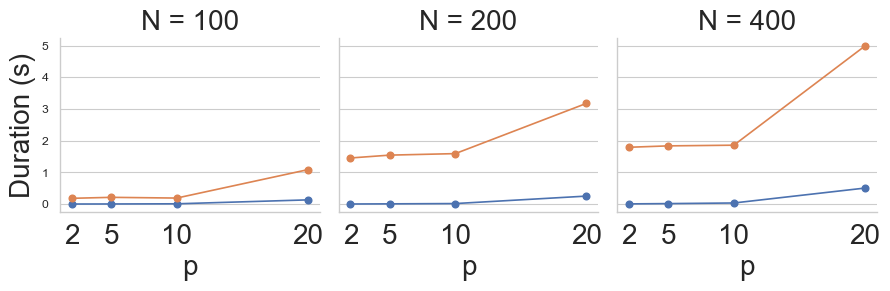

In [603]:
from plot_bench import *

forest_df = make_forest_df(df[df.method != 'medoid_2means'])
plot_forest_df(forest_df)
plt.savefig("./plots/runtime_sphere.pdf")

## MSE CART vs Medoid

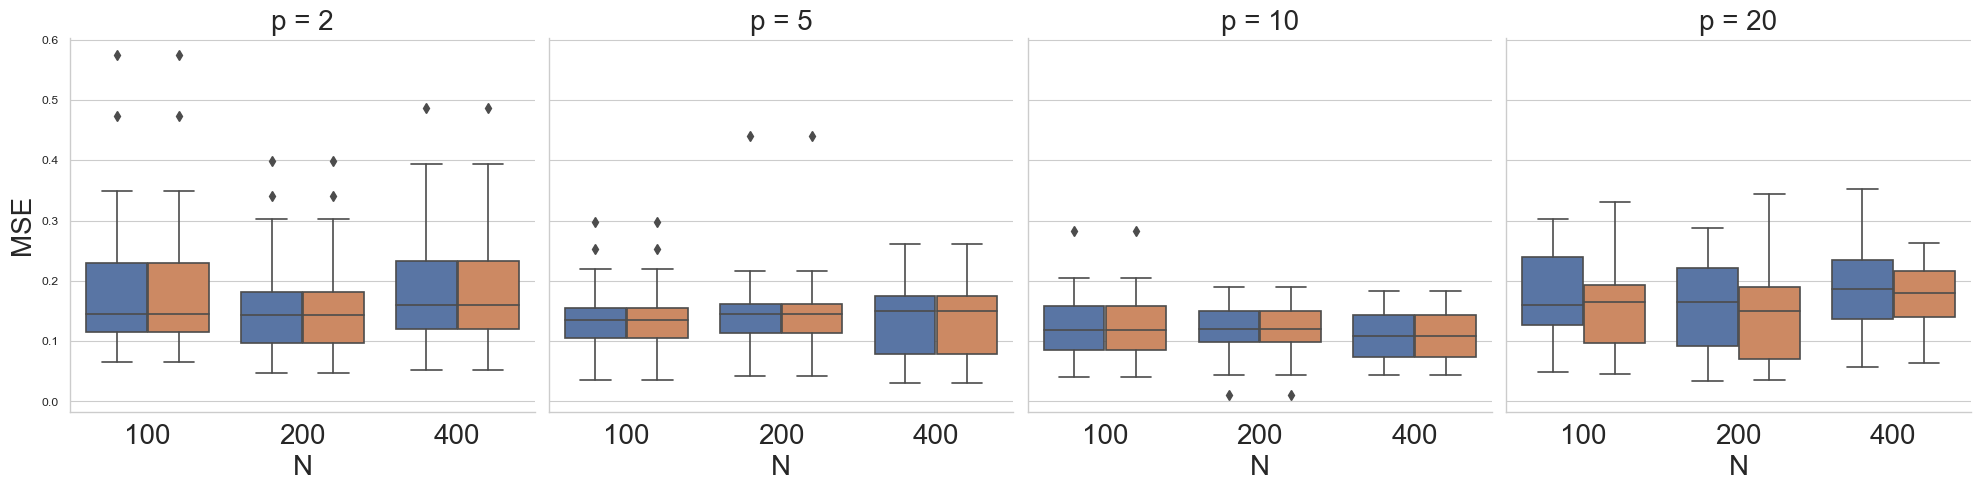

In [604]:
from plot_bench import *
plot_errors(df[(df.N > 50) & (df.method != 'medoid_2means')])
plt.savefig("./plots/error_sphere.pdf")

## Runtime CART vs Medoid

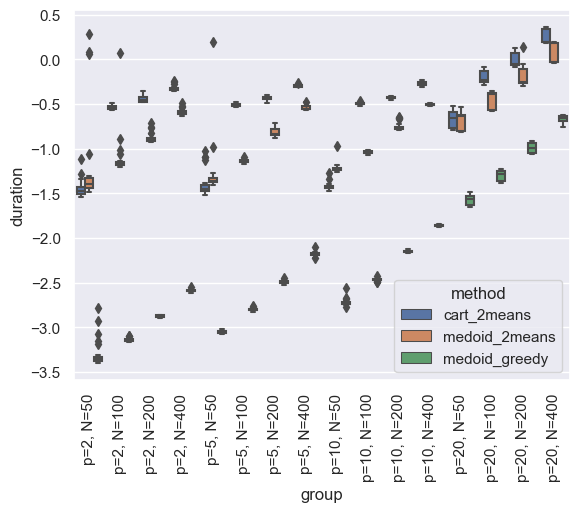

In [289]:
sns.boxplot(df, y=np.log10(df['duration']), x='group', hue='method')
plt.xticks(rotation=90);